<a href="https://colab.research.google.com/github/HeberthDCM/CUDA/blob/main/TratamientoImagenes4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install nvcc4jupyter

In [44]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


array([[[  9,   6,  51],
        [ 14,  11,  56],
        [ 20,  18,  64],
        ...,
        [ 20,  22,  76],
        [ 20,  21,  72],
        [ 15,  16,  67]],

       [[  9,   7,  49],
        [  1,   0,  43],
        [  7,   6,  50],
        ...,
        [ 12,  14,  68],
        [ 13,  14,  65],
        [ 13,  14,  65]],

       [[  8,   7,  47],
        [  0,   0,  38],
        [  5,   4,  46],
        ...,
        [  0,   4,  57],
        [  0,   2,  53],
        [  6,   9,  60]],

       ...,

       [[  0,  54, 139],
        [  0,  54, 139],
        [  0,  54, 139],
        ...,
        [  9,  96, 170],
        [ 11,  98, 172],
        [ 14, 101, 175]],

       [[  0,  51, 134],
        [  0,  51, 134],
        [  0,  52, 135],
        ...,
        [  5,  89, 165],
        [  8,  92, 168],
        [ 11,  95, 171]],

       [[  0,  50, 133],
        [  0,  50, 133],
        [  0,  51, 134],
        ...,
        [  4,  88, 164],
        [  6,  88, 165],
        [  8,  90, 167]]], dtype=uint8)
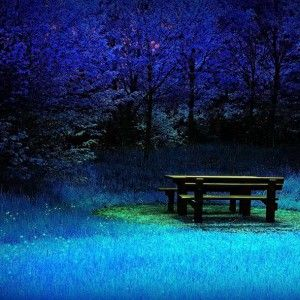

In [45]:
imagen = cv2.imread('300x300.jpg')
imagen

array([[ 20,  25,  32, ...,  38,  36,  31],
       [ 20,  13,  19, ...,  30,  29,  29],
       [ 19,  11,  17, ...,  19,  17,  24],
       ...,
       [ 73,  73,  73, ..., 108, 110, 113],
       [ 70,  70,  71, ..., 102, 105, 108],
       [ 69,  69,  70, ..., 101, 102, 104]], dtype=uint8)
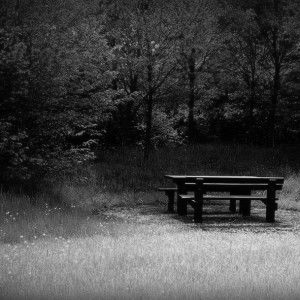

In [46]:
imagen_escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_escala_grises

In [47]:
cv2.imwrite('imagen_escala_grises.jpg', imagen_escala_grises)

True

In [48]:
import cv2
import numpy as np
import plotly.express as px
from PIL import Image

imagen = Image.open("imagen_escala_grises.jpg")
fig = px.imshow(imagen)
fig.show()
pixel = imagen.load()
print(pixel[0,0])


20


In [49]:
#imagen_escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
#imagen_escala_grises

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [61]:
import sys
img = imagen.resize((100,100), Image.LANCZOS)

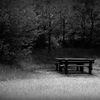

In [62]:
img

In [56]:
#imagen_RGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
#imagen_RGB

In [57]:
#cv2.imwrite('imagen_escala_grises.jpg', imagen_escala_grises)

In [58]:

#print(imagen_escala_grises)

In [63]:
imagen_mat = np.array(list(img.getdata(band=0)), int)
list_1 = imagen_mat.tolist()  #MATRIZ en forma de lista
print(list_1)

imagen_mat.shape = (img.size[0], img.size[1])
#print(imagen_mat)

print(imagen_mat.shape)

[21, 23, 30, 29, 36, 32, 27, 33, 37, 34, 24, 35, 38, 39, 30, 38, 43, 37, 40, 47, 55, 53, 52, 57, 63, 55, 54, 58, 48, 49, 52, 59, 62, 39, 43, 48, 29, 38, 47, 51, 45, 42, 48, 47, 51, 51, 39, 37, 42, 35, 35, 48, 42, 45, 47, 39, 38, 48, 51, 49, 49, 40, 47, 49, 48, 61, 50, 51, 49, 44, 48, 46, 37, 26, 39, 39, 30, 29, 29, 26, 27, 23, 20, 24, 26, 25, 19, 18, 19, 22, 28, 19, 12, 22, 32, 30, 37, 30, 32, 29, 22, 26, 25, 29, 35, 28, 25, 32, 32, 28, 26, 34, 37, 42, 37, 44, 46, 44, 44, 49, 53, 52, 48, 51, 55, 60, 63, 58, 60, 54, 58, 61, 56, 37, 54, 37, 41, 60, 46, 49, 48, 37, 41, 47, 48, 40, 35, 29, 23, 33, 40, 41, 47, 41, 46, 52, 54, 54, 43, 50, 56, 46, 37, 50, 51, 54, 51, 46, 44, 46, 47, 45, 39, 38, 30, 41, 35, 30, 25, 26, 28, 25, 23, 20, 23, 21, 14, 16, 17, 14, 21, 17, 16, 26, 22, 24, 40, 42, 43, 31, 25, 33, 28, 32, 33, 18, 26, 29, 29, 31, 37, 37, 42, 45, 41, 48, 44, 45, 46, 43, 44, 48, 45, 48, 54, 64, 64, 59, 63, 58, 56, 62, 57, 54, 60, 50, 57, 56, 42, 54, 46, 53, 50, 49, 44, 43, 38, 29, 16, 35,

In [64]:
%%cuda
#include <stdio.h>
#include <cuda_runtime.h>
#include <sys/time.h>
#include <iostream>
#include <iostream>

// KERNEL
__global__ void f_Brillo(float *A, float factor, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] + factor;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}

__global__ void f_Contraste(float *A, float factor, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] * factor;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}


int main() {
    const int rows = 600;
    const int cols = 400;
    const int size = rows * cols;


    float brillo = 0;
    float contraste = 1;
    float h_A[rows][cols] = {251, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 251, 251, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 251, 251, 252, 252, 252, 252, 251, 251, 251, 252, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 250, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 248, 248, 248, 247, 247, 246, 246, 246, 246, 245, 243, 243, 242, 243, 242, 242, 242, 243, 243, 242, 242, 242, 241, 242, 242, 241, 241, 241, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 238, 238, 237, 237, 237, 236, 236, 236, 237, 238, 238, 237, 237, 237, 237, 237, 238, 237, 237, 237, 236, 235, 235, 235, 235, 235, 234, 235, 235, 235, 236, 236, 235, 234, 233, 234, 234, 235, 233, 234, 235, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 232, 232, 231, 231, 231, 231, 232, 232, 232, 231, 231, 232, 232, 232, 231, 231, 231, 251, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 251, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 250, 248, 248, 250, 250, 249, 249, 250, 250, 249, 249, 249, 249, 249, 251, 250, 250, 250, 250, 250, 249, 249, 249, 248, 248, 248, 248, 248, 248, 247, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 245, 244, 243, 243, 243, 242, 242, 243, 243, 242, 242, 242, 242, 242, 242, 241, 241, 241, 239, 240, 240, 240, 239, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 237, 237, 237, 236, 236, 237, 237, 238, 238, 237, 237, 237, 236, 236, 237, 237, 237, 237, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 235, 234, 234, 234, 235, 235, 234, 235, 235, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 233, 231, 231, 231, 231, 232, 232, 231, 231, 231, 232, 232, 231, 231, 231, 231, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 252, 253, 253, 252, 252, 252, 252, 253, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 249, 247, 246, 248, 250, 250, 251, 250, 250, 250, 250, 250, 251, 251, 250, 250, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 246, 245, 245, 245, 243, 243, 243, 243, 243, 242, 243, 242, 242, 242, 242, 242, 242, 241, 241, 240, 240, 240, 240, 240, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 238, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 236, 236, 236, 236, 236, 235, 236, 236, 236, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 233, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 231, 231, 230, 230, 231, 231, 230, 230, 230, 230, 231, 252, 252, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 251, 249, 247, 248, 249, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 248, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 245, 242, 243, 243, 243, 242, 242, 243, 243, 242, 241, 240, 241, 241, 241, 240, 240, 240, 240, 240, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 237, 237, 237, 237, 237, 237, 237, 237, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 235, 234, 236, 236, 235, 234, 234, 234, 234, 234, 233, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 232, 232, 233, 233, 233, 232, 232, 231, 231, 231, 231, 231, 231, 230, 230, 230, 231, 231, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 247, 247, 248, 248, 247, 247, 246, 246, 246, 246, 246, 244, 243, 242, 242, 243, 242, 242, 242, 242, 241, 241, 240, 240, 241, 241, 241, 240, 240, 240, 240, 240, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 235, 234, 236, 236, 235, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 232, 233, 232, 232, 232, 231, 231, 231, 231, 230, 231, 230, 230, 230, 230, 230, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 253, 252, 252, 252, 253, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 247, 247, 247, 247, 247, 247, 246, 246, 246, 245, 244, 243, 243, 242, 242, 243, 243, 242, 242, 243, 243, 242, 241, 241, 241, 241, 241, 241, 241, 241, 238, 238, 240, 240, 240, 240, 241, 241, 241, 240, 240, 240, 240, 238, 238, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 232, 232, 233, 233, 232, 232, 232, 232, 232, 232, 232, 232, 231, 231, 231, 231, 230, 231, 231, 230, 229, 230, 230, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 252, 252, 252, 253, 253, 253, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 250, 250, 250, 250, 249, 249, 249, 249, 247, 248, 248, 247, 247, 247, 247, 246, 246, 245, 244, 243, 243, 242, 242, 244, 244, 243, 243, 244, 244, 242, 242, 243, 242, 242, 241, 241, 241, 241, 240, 240, 241, 241, 241, 241, 242, 241, 241, 240, 240, 240, 240, 239, 238, 237, 237, 237, 237, 237, 237, 237, 237, 238, 237, 237, 236, 237, 237, 236, 237, 237, 237, 237, 237, 237, 237, 236, 236, 235, 235, 236, 236, 235, 235, 234, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 232, 232, 232, 232, 233, 232, 232, 231, 232, 232, 232, 231, 231, 231, 231, 232, 232, 231, 232, 231, 231, 231, 231, 230, 230, 230, 230, 230, 230, 230, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 253, 252, 253, 253, 253, 252, 252, 252, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 252, 252, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 251, 252, 251, 251, 250, 249, 249, 251, 251, 250, 249, 249, 249, 249, 248, 248, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 247, 247, 246, 246, 246, 244, 243, 243, 243, 242, 242, 243, 242, 242, 242, 242, 242, 242, 240, 240, 241, 241, 241, 240, 240, 240, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 239, 239, 239, 239, 238, 238, 238, 237, 236, 236, 236, 236, 235, 234, 235, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 233, 234, 234, 235, 235, 233, 232, 234, 233, 232, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 230, 231, 231, 230, 229, 229, 230, 230, 229, 229, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 250, 250, 250, 250, 249, 249, 248, 246, 247, 247, 247, 247, 246, 246, 246, 246, 248, 248, 248, 247, 246, 245, 245, 244, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 241, 241, 240, 240, 240, 240, 240, 240, 239, 239, 238, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 239, 239, 239, 239, 239, 239, 239, 238, 235, 236, 235, 235, 235, 235, 234, 234, 235, 235, 235, 235, 235, 235, 234, 234, 236, 236, 236, 236, 236, 236, 235, 235, 235, 236, 236, 234, 234, 235, 233, 233, 233, 233, 232, 232, 231, 232, 232, 232, 232, 231, 231, 231, 231, 231, 231, 231, 230, 230, 231, 231, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 250, 250, 250, 250, 250, 249, 249, 249, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 248, 247, 246, 246, 246, 246, 245, 245, 245, 243, 243, 243, 243, 243, 243, 242, 242, 241, 241, 241, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 243, 243, 242, 241, 241, 242, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 239, 237, 237, 236, 236, 238, 238, 238, 238, 238, 238, 238, 238, 238, 239, 239, 238, 238, 239, 239, 239, 238, 238, 239, 237, 236, 236, 236, 236, 236, 236, 236, 235, 236, 235, 234, 233, 233, 234, 235, 236, 236, 236, 236, 234, 234, 234, 234, 234, 234, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 251, 251, 252, 252, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 250, 250, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 246, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 244, 245, 246, 246, 246, 247, 246, 247, 246, 246, 247, 246, 247, 247, 246, 245, 245, 245, 245, 245, 242, 242, 242, 243, 242, 242, 242, 240, 240, 240, 240, 240, 240, 240, 240, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 240, 239, 239, 239, 239, 239, 239, 239, 239, 240, 240, 240, 239, 240, 240, 237, 237, 237, 237, 239, 241, 242, 240, 240, 240, 240, 240, 240, 238, 238, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 246, 246, 246, 246, 247, 247, 247, 248, 248, 248, 249, 249, 249, 249, 249, 250, 251, 251, 251, 251, 250, 249, 251, 251, 250, 248, 249, 248, 247, 247, 247, 247, 247, 247, 246, 245, 245, 243, 243, 243, 243, 243, 243, 244, 244, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 246, 246, 246, 246, 243, 242, 242, 242, 240, 240, 240, 241, 241, 242, 243, 243, 243, 245, 245, 242, 241, 241, 243, 244, 245, 246, 246, 245, 245, 245, 245, 245, 242, 242, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 250, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 249, 249, 248, 247, 247, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 249, 249, 249, 249, 249, 250, 250, 251, 251, 251, 251, 250, 251, 251, 252, 252, 252, 251, 251, 251, 250, 250, 249, 248, 248, 247, 248, 248, 248, 248, 248, 248, 247, 247, 246, 246, 246, 246, 246, 246, 247, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 247, 246, 246, 245, 246, 241, 241, 241, 241, 241, 243, 244, 246, 246, 247, 247, 246, 245, 244, 245, 246, 247, 248, 248, 249, 247, 247, 246, 245, 245, 244, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 251, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 249, 248, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 251, 251, 251, 251, 251, 250, 250, 250, 250, 249, 249, 248, 249, 249, 248, 248, 248, 248, 248, 247, 247, 248, 247, 247, 248, 247, 247, 247, 247, 247, 247, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 245, 244, 243, 243, 243, 244, 245, 246, 247, 247, 247, 247, 246, 246, 246, 247, 247, 247, 246, 247, 246, 246, 245, 244, 244, 243, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 252, 253, 254, 253, 253, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 247, 248, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 248, 249, 249, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 249, 249, 250, 249, 249, 248, 248, 248, 247, 247, 248, 248, 247, 247, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 244, 244, 244, 245, 246, 246, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 246, 246, 245, 245, 244, 243, 241, 241, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 252, 253, 253, 254, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 248, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 249, 249, 249, 248, 248, 247, 248, 248, 248, 247, 247, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 248, 248, 248, 248, 247, 247, 247, 247, 248, 248, 247, 246, 246, 245, 243, 241, 240, 240, 240, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 254, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 248, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 248, 248, 247, 247, 247, 247, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 248, 247, 247, 246, 246, 246, 246, 245, 245, 246, 245, 244, 242, 241, 240, 239, 238, 238, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 254, 254, 253, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 248, 248, 248, 248, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 246, 247, 247, 247, 247, 247, 247, 248, 247, 247, 247, 247, 247, 248, 248, 248, 247, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 245, 245, 244, 244, 243, 242, 242, 241, 240, 240, 240, 239, 237, 236, 235, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 244, 244, 244, 242, 242, 242, 242, 241, 241, 239, 240, 240, 239, 238, 238, 237, 236, 236, 234, 234, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 254, 254, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 252, 252, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 246, 247, 247, 246, 246, 246, 246, 247, 247, 247, 247, 246, 246, 246, 246, 246, 245, 245, 245, 245, 246, 246, 245, 245, 246, 245, 245, 245, 245, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 246, 247, 247, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 245, 245, 244, 244, 245, 245, 245, 245, 245, 243, 241, 241, 241, 240, 240, 239, 239, 238, 238, 238, 237, 236, 236, 235, 235, 235, 234, 234, 235, 235, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 249, 249, 248, 248, 248, 247, 247, 247, 248, 248, 248, 248, 248, 249, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 248, 247, 247, 247, 248, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 246, 247, 247, 247, 246, 246, 248, 247, 247, 246, 246, 247, 247, 247, 247, 247, 246, 246, 245, 245, 245, 245, 244, 244, 245, 245, 245, 245, 245, 245, 244, 245, 245, 245, 245, 246, 245, 245, 245, 245, 245, 245, 243, 243, 244, 244, 243, 244, 242, 242, 242, 242, 242, 241, 241, 240, 239, 239, 239, 238, 238, 238, 238, 237, 236, 235, 235, 235, 235, 235, 235, 235, 235, 234, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 251, 249, 250, 249, 249, 250, 250, 250, 250, 250, 250, 249, 249, 249, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 246, 245, 245, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 247, 246, 246, 246, 246, 246, 247, 247, 247, 247, 247, 248, 248, 248, 248, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 246, 246, 246, 246, 245, 246, 246, 247, 247, 247, 247, 247, 247, 246, 246, 246, 245, 245, 245, 245, 245, 245, 244, 244, 244, 244, 243, 243, 242, 242, 242, 244, 244, 243, 244, 243, 242, 243, 243, 243, 243, 244, 243, 243, 242, 241, 241, 241, 242, 242, 242, 241, 241, 240, 240, 240, 239, 239, 238, 238, 238, 237, 237, 235, 235, 238, 238, 237, 237, 236, 235, 236, 236, 235, 235, 235, 235, 235, 235, 235, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 246, 246, 246, 246, 246, 247, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 246, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 247, 246, 246, 246, 245, 245, 244, 244, 244, 244, 244, 244, 244, 244, 243, 243, 243, 243, 243, 242, 242, 242, 243, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 236, 236, 236, 236, 236, 236, 235, 235, 235, 237, 237, 236, 236, 236, 236, 236, 236, 236, 237, 237, 237, 237, 235, 236, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 250, 250, 249, 250, 251, 250, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 244, 244, 245, 245, 245, 244, 244, 244, 245, 244, 244, 245, 245, 245, 246, 246, 246, 246, 246, 246, 245, 244, 244, 243, 243, 243, 244, 244, 244, 244, 244, 244, 245, 245, 245, 245, 245, 245, 245, 245, 245, 246, 247, 245, 245, 245, 244, 243, 244, 244, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 240, 241, 241, 240, 240, 240, 238, 238, 238, 238, 238, 238, 237, 237, 238, 237, 237, 237, 237, 236, 236, 238, 238, 238, 237, 236, 236, 235, 235, 236, 236, 236, 236, 236, 236, 236, 236, 236, 237, 237, 237, 237, 237, 237, 237, 237, 238, 238, 237, 237, 236, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 249, 248, 249, 249, 248, 249, 249, 248, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 243, 243, 244, 243, 243, 243, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 242, 242, 242, 242, 242, 242, 242, 242, 242, 240, 240, 240, 240, 240, 240, 239, 239, 237, 237, 237, 236, 236, 236, 237, 237, 237, 237, 237, 236, 236, 238, 238, 239, 239, 238, 238, 237, 236, 235, 235, 235, 235, 236, 236, 236, 236, 236, 236, 237, 237, 237, 237, 237, 237, 238, 238, 238, 237, 239, 238, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 250, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 243, 243, 242, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 242, 242, 242, 243, 242, 241, 241, 241, 241, 241, 241, 240, 240, 240, 241, 241, 242, 242, 242, 242, 242, 242, 242, 243, 242, 242, 241, 241, 241, 240, 240, 240, 240, 240, 240, 239, 239, 237, 237, 236, 236, 237, 237, 237, 236, 236, 237, 237, 236, 236, 237, 237, 237, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 236, 236, 237, 237, 237, 237, 237, 238, 240, 239, 238, 238, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 249, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 244, 244, 244, 244, 243, 244, 244, 244, 244, 244, 245, 245, 244, 244, 245, 245, 244, 244, 243, 243, 242, 242, 242, 242, 243, 243, 243, 242, 242, 241, 242, 242, 242, 241, 241, 240, 240, 241, 241, 241, 242, 242, 241, 241, 241, 241, 242, 242, 242, 241, 241, 240, 241, 241, 241, 240, 240, 240, 240, 240, 240, 241, 241, 241, 241, 241, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 240, 240, 240, 238, 238, 237, 237, 237, 237, 236, 236, 236, 236, 237, 237, 236, 236, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 236, 236, 236, 236, 237, 237, 236, 236, 238, 238, 238, 238, 237, 237, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 250, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 246, 246, 246, 246, 246, 245, 244, 244, 244, 244, 244, 243, 243, 243, 243, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 244, 243, 243, 242, 243, 243, 243, 243, 243, 242, 243, 243, 242, 242, 242, 243, 243, 243, 240, 240, 240, 240, 241, 241, 241, 242, 242, 240, 240, 241, 241, 241, 241, 241, 241, 240, 240, 240, 241, 241, 241, 240, 240, 240, 241, 241, 241, 241, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 239, 239, 239, 238, 236, 236, 236, 236, 236, 236, 236, 237, 237, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 236, 235, 235, 236, 237, 237, 237, 235, 235, 236, 236, 236, 235, 235, 236, 252, 252, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 249, 248, 248, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 246, 246, 246, 246, 246, 245, 245, 244, 243, 243, 243, 243, 242, 243, 243, 243, 243, 243, 243, 242, 243, 243, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 240, 240, 240, 240, 240, 241, 240, 240, 240, 240, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 239, 239, 240, 240, 240, 241, 240, 240, 239, 238, 239, 238, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 235, 236, 236, 235, 235, 235, 235, 235, 236, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 249, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 246, 246, 246, 246, 246, 245, 245, 246, 246, 246, 246, 246, 246, 246, 245, 245, 244, 243, 243, 243, 242, 241, 243, 243, 243, 243, 243, 243, 243, 242, 242, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 239, 239, 239, 238, 237, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 234, 234, 235, 235, 235, 235, 234, 234, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 246, 246, 246, 246, 245, 245, 246, 246, 246, 245, 245, 246, 246, 245, 245, 244, 243, 243, 243, 242, 242, 243, 243, 243, 243, 243, 243, 243, 242, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 240, 240, 240, 238, 238, 238, 238, 238, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 235, 234, 234, 234, 234, 234, 235, 235, 234, 234, 235, 235, 234, 234, 234, 235, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 247, 246, 246, 246, 246, 246, 245, 245, 245, 245, 246, 246, 247, 247, 246, 245, 245, 244, 244, 244, 244, 243, 243, 243, 243, 243, 243, 242, 242, 241, 241, 240, 240, 241, 239, 239, 240, 240, 240, 240, 240, 240, 239, 239, 239, 238, 238, 238, 238, 238, 237, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 235, 235, 234, 233, 233, 234, 250, 251, 250, 250, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 249, 248, 249, 249, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 247, 248, 248, 247, 247, 247, 246, 246, 246, 246, 243, 243, 242, 242, 242, 242, 241, 242, 241, 240, 240, 239, 239, 238, 238, 240, 240, 239, 239, 239, 238, 238, 238, 238, 237, 237, 237, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 236, 236, 236, 237, 237, 237, 237, 235, 235, 236, 237, 237, 236, 235, 235, 236, 236, 236, 236, 236, 236, 236, 235, 236, 236, 235, 235, 235, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 234, 234, 234, 234, 234, 234, 233, 233, 234, 234, 234, 233, 233, 233, 233, 233, 232, 251, 250, 250, 250, 251, 251, 251, 252, 253, 251, 251, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 249, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 248, 249, 249, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 250, 250, 250, 249, 249, 248, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 248, 247, 247, 247, 248, 247, 247, 246, 245, 245, 245, 243, 243, 243, 242, 242, 243, 242, 241, 240, 239, 239, 238, 238, 238, 238, 239, 239, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 238, 238, 238, 238, 238, 238, 237, 236, 236, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 236, 236, 235, 235, 236, 236, 236, 235, 235, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 233, 233, 234, 234, 233, 233, 233, 233, 233, 233, 232, 232, 233, 233, 233, 233, 233, 232, 232, 232, 232, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 254, 254, 253, 254, 254, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 247, 247, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 248, 247, 247, 247, 247, 246, 246, 246, 245, 245, 245, 243, 243, 243, 242, 241, 242, 242, 241, 241, 240, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 235, 235, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 232, 233, 233, 233, 233, 233, 233, 232, 232, 232, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 251, 251, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 248, 247, 247, 247, 246, 246, 245, 245, 245, 243, 243, 243, 243, 243, 242, 241, 242, 242, 241, 241, 241, 241, 240, 240, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 238, 237, 237, 237, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 234, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 232, 232, 233, 232, 232, 232, 232, 232, 232, 232, 232, 232, 233, 233, 233, 233, 232, 232, 232, 232, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 248, 248, 248, 248, 248, 248, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 245, 244, 244, 243, 243, 243, 243, 243, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 238, 237, 237, 237, 237, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 235, 235, 235, 235, 235, 234, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 235, 235, 235, 234, 234, 234, 233, 233, 233, 233, 233, 232, 232, 232, 232, 232, 231, 231, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 250, 250, 250, 250, 250, 250, 250, 249, 250, 249, 249, 249, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 249, 248, 248, 248, 248, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 248, 246, 246, 246, 246, 246, 245, 245, 244, 243, 242, 243, 243, 242, 243, 243, 243, 243, 242, 243, 242, 241, 242, 240, 240, 241, 241, 241, 240, 240, 241, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 238, 238, 237, 237, 237, 237, 236, 236, 237, 237, 236, 236, 237, 237, 237, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 236, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 232, 231, 232, 230, 230, 231, 231, 231, 231, 231, 232, 232, 232, 232, 231, 231, 231, 232, 231, 231, 232, 232, 231, 231, 249, 250, 250, 250, 250, 249, 250, 250, 249, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 253, 252, 253, 253, 253, 253, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 252, 252, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 249, 250, 250, 250, 250, 249, 249, 249, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 246, 245, 246, 245, 245, 244, 243, 243, 243, 243, 243, 242, 242, 243, 243, 243, 243, 242, 243, 243, 243, 243, 242, 242, 241, 241, 241, 241, 240, 240, 241, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 238, 238, 239, 238, 237, 237, 236, 236, 236, 236, 236, 237, 237, 237, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 235, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 234, 235, 235, 234, 234, 234, 234, 234, 234, 233, 233, 233, 232, 232, 232, 232, 231, 231, 230, 230, 231, 231, 231, 231, 230, 230, 230, 230, 230, 230, 231, 231, 230, 231, 231, 230, 230, 231, 231, 249, 249, 250, 250, 250, 249, 249, 249, 249, 251, 251, 250, 249, 249, 249, 249, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 248, 248, 248, 248, 248, 249, 249, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 246, 246, 243, 243, 244, 244, 243, 243, 243, 243, 243, 243, 242, 243, 243, 245, 245, 245, 245, 245, 246, 244, 242, 243, 242, 241, 241, 241, 241, 240, 238, 238, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 240, 237, 237, 237, 236, 236, 236, 236, 236, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 237, 237, 238, 237, 236, 236, 235, 236, 236, 236, 235, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 233, 232, 232, 232, 232, 232, 231, 231, 231, 230, 230, 231, 231, 231, 231, 229, 229, 229, 229, 229, 229, 229, 229, 228, 229, 229, 229, 229, 229, 229, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 254, 254, 252, 251, 251, 251, 252, 252, 252, 251, 252, 252, 252, 251, 252, 251, 251, 252, 252, 251, 251, 252, 253, 252, 251, 251, 251, 251, 251, 250, 251, 251, 250, 250, 249, 249, 249, 248, 248, 248, 248, 249, 249, 249, 249, 249, 248, 248, 248, 247, 246, 246, 247, 246, 247, 247, 247, 247, 247, 246, 246, 246, 247, 248, 247, 247, 247, 246, 243, 243, 243, 243, 243, 243, 242, 242, 243, 243, 243, 243, 243, 243, 243, 243, 243, 246, 247, 247, 246, 246, 246, 246, 244, 243, 241, 241, 240, 239, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 237, 237, 237, 237, 237, 237, 236, 236, 236, 237, 237, 236, 239, 239, 239, 239, 239, 239, 238, 238, 238, 238, 239, 239, 239, 239, 239, 236, 236, 236, 235, 235, 235, 235, 235, 235, 233, 233, 234, 235, 234, 233, 232, 232, 232, 231, 231, 231, 231, 231, 230, 230, 230, 231, 231, 231, 231, 229, 229, 229, 228, 228, 228, 229, 229, 228, 228, 229, 228, 228, 228, 228, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 251, 251, 251, 250, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 252, 252, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 253, 252, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 249, 249, 248, 248, 247, 247, 247, 247, 246, 246, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 243, 243, 243, 243, 243, 242, 242, 243, 243, 243, 243, 243, 243, 243, 245, 246, 246, 246, 247, 248, 247, 248, 248, 247, 246, 246, 244, 244, 243, 242, 242, 241, 240, 240, 240, 239, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 236, 236, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 238, 238, 238, 238, 238, 236, 236, 236, 235, 235, 235, 235, 235, 235, 233, 233, 234, 234, 234, 233, 233, 233, 232, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 232, 232, 229, 229, 229, 228, 228, 228, 229, 229, 228, 228, 228, 228, 228, 228, 228, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 252, 252, 251, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 252, 252, 251, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 243, 243, 243, 242, 241, 242, 242, 241, 241, 241, 241, 241, 242, 242, 244, 245, 246, 247, 248, 248, 247, 248, 248, 248, 247, 248, 248, 247, 246, 246, 243, 243, 242, 241, 241, 240, 240, 240, 239, 238, 237, 237, 237, 237, 238, 236, 237, 237, 237, 236, 236, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 234, 234, 233, 233, 232, 232, 233, 233, 233, 231, 231, 231, 231, 231, 230, 230, 231, 231, 231, 231, 232, 232, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 250, 250, 250, 250, 251, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 253, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 244, 244, 244, 242, 242, 242, 241, 241, 241, 241, 241, 241, 240, 241, 241, 241, 241, 242, 243, 243, 245, 246, 246, 246, 245, 246, 247, 247, 248, 247, 247, 247, 246, 243, 243, 242, 242, 242, 242, 240, 240, 240, 239, 239, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 234, 233, 232, 232, 231, 231, 231, 231, 231, 231, 231, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 228, 229, 229, 229, 228, 228, 228, 228, 228, 227, 227, 227, 228, 228, 228, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 254, 254, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 251, 252, 252, 252, 252, 251, 252, 252, 252, 251, 252, 252, 251, 251, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 248, 248, 248, 249, 249, 249, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 246, 245, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 243, 242, 243, 245, 245, 245, 245, 245, 246, 246, 245, 245, 243, 243, 242, 242, 242, 241, 240, 240, 240, 240, 240, 238, 238, 238, 238, 237, 237, 236, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 233, 233, 232, 232, 231, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 230, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 227, 227, 227, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 252, 251, 250, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 248, 248, 247, 247, 246, 246, 246, 245, 245, 245, 245, 244, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 243, 243, 242, 243, 243, 243, 243, 243, 245, 245, 245, 244, 241, 241, 241, 240, 240, 240, 240, 239, 239, 240, 240, 239, 238, 238, 238, 237, 237, 237, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 236, 236, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 233, 233, 232, 232, 231, 231, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 228, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 227, 227, 227, 227, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 252, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 251, 250, 251, 251, 251, 250, 250, 251, 251, 250, 249, 251, 251, 251, 251, 251, 252, 251, 251, 251, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 246, 247, 246, 245, 245, 245, 244, 245, 245, 244, 242, 242, 243, 242, 242, 241, 241, 242, 242, 242, 242, 242, 242, 244, 244, 244, 244, 244, 244, 243, 243, 243, 243, 243, 245, 244, 244, 244, 245, 245, 244, 244, 245, 244, 243, 244, 244, 244, 243, 240, 240, 239, 239, 239, 239, 239, 239, 238, 239, 239, 239, 238, 238, 239, 236, 237, 237, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 236, 237, 237, 235, 235, 235, 235, 235, 236, 237, 236, 236, 235, 234, 235, 235, 233, 233, 233, 232, 232, 232, 232, 231, 231, 231, 231, 230, 230, 230, 229, 229, 229, 229, 229, 229, 228, 227, 227, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 226, 226, 226, 226, 226, 226, 227, 226, 227, 227, 250, 250, 250, 250, 250, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 250, 250, 250, 250, 251, 251, 250, 251, 252, 252, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 248, 248, 248, 247, 247, 247, 246, 247, 247, 246, 246, 246, 246, 246, 246, 245, 245, 243, 244, 244, 243, 241, 241, 242, 241, 241, 242, 242, 243, 243, 245, 245, 246, 246, 247, 247, 247, 248, 247, 246, 247, 247, 246, 244, 246, 246, 246, 246, 246, 249, 248, 248, 247, 248, 246, 244, 242, 242, 241, 241, 238, 238, 238, 237, 237, 237, 237, 236, 236, 237, 237, 237, 237, 237, 236, 237, 236, 236, 236, 235, 235, 234, 234, 234, 235, 235, 234, 234, 234, 235, 236, 236, 234, 234, 234, 235, 236, 236, 236, 236, 236, 235, 234, 235, 235, 232, 232, 231, 231, 231, 231, 231, 230, 230, 231, 231, 230, 230, 229, 228, 229, 228, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 227, 228, 226, 226, 225, 225, 225, 225, 225, 225, 225, 225, 224, 226, 226, 249, 250, 250, 251, 251, 250, 250, 249, 250, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 251, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 250, 251, 251, 251, 251, 250, 249, 250, 250, 250, 250, 250, 251, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 243, 243, 243, 243, 242, 242, 243, 243, 243, 245, 245, 245, 245, 247, 247, 247, 247, 248, 248, 248, 248, 248, 248, 248, 248, 247, 246, 247, 247, 246, 246, 246, 247, 248, 247, 247, 245, 245, 244, 242, 242, 242, 241, 238, 238, 238, 238, 238, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 234, 234, 234, 234, 234, 234, 233, 234, 233, 233, 233, 233, 233, 234, 234, 235, 234, 234, 233, 233, 233, 233, 231, 231, 231, 231, 231, 231, 230, 230, 231, 230, 230, 230, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 228, 228, 226, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 226, 226, 249, 249, 250, 250, 250, 250, 249, 250, 250, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 251, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 249, 249, 249, 248, 248, 248, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 243, 243, 243, 243, 243, 243, 243, 243, 242, 243, 243, 245, 247, 248, 248, 247, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 247, 247, 247, 245, 245, 245, 244, 242, 242, 241, 241, 238, 238, 238, 238, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 236, 236, 236, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 232, 232, 233, 233, 232, 233, 233, 234, 233, 232, 231, 231, 231, 231, 231, 231, 231, 231, 231, 230, 230, 231, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 228, 228, 225, 225, 225, 225, 225, 224, 224, 225, 225, 225, 224, 226, 226, 251, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 246, 245, 245, 243, 243, 243, 243, 243, 243, 241, 241, 242, 243, 245, 246, 246, 248, 248, 247, 247, 247, 247, 247, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 243, 242, 242, 242, 241, 241, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 237, 236, 236, 235, 235, 235, 234, 234, 235, 235, 235, 234, 233, 233, 234, 232, 232, 232, 233, 232, 232, 231, 232, 232, 232, 231, 231, 231, 230, 230, 231, 231, 231, 231, 231, 231, 229, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 225, 225, 225, 225, 225, 225, 224, 225, 225, 225, 225, 226, 226, 251, 251, 251, 250, 250, 250, 251, 251, 250, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 248, 248, 248, 248, 247, 247, 247, 248, 248, 248, 248, 248, 248, 247, 247, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 246, 246, 246, 242, 242, 243, 242, 242, 242, 242, 242, 242, 242, 242, 243, 242, 243, 243, 243, 242, 242, 242, 242, 242, 241, 242, 242, 242, 242, 244, 246, 247, 247, 246, 246, 246, 245, 244, 244, 245, 244, 244, 244, 245, 245, 245, 244, 244, 245, 245, 245, 244, 244, 243, 243, 243, 242, 242, 241, 241, 241, 240, 240, 238, 238, 237, 237, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 235, 235, 235, 234, 233, 233, 234, 233, 233, 232, 233, 232, 232, 231, 231, 231, 231, 231, 231, 231, 230, 230, 231, 231, 231, 231, 231, 231, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 225, 225, 225, 225, 225, 225, 224, 225, 225, 225, 225, 226, 226, 251, 251, 251, 252, 252, 252, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 252, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 247, 247, 247, 246, 246, 246, 246, 246, 247, 247, 246, 247, 247, 248, 248, 248, 247, 248, 248, 248, 248, 247, 247, 248, 247, 247, 247, 246, 245, 245, 242, 242, 241, 241, 241, 241, 242, 241, 241, 241, 241, 241, 242, 242, 241, 242, 242, 242, 243, 242, 242, 241, 241, 241, 242, 243, 244, 244, 246, 246, 246, 246, 245, 243, 242, 242, 242, 241, 241, 242, 242, 242, 242, 242, 241, 242, 244, 242, 242, 241, 241, 242, 242, 242, 240, 240, 240, 240, 240, 240, 238, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 236, 235, 235, 235, 235, 234, 234, 234, 234, 235, 235, 234, 234, 234, 232, 232, 232, 232, 231, 231, 232, 232, 232, 232, 231, 231, 231, 230, 230, 231, 231, 231, 231, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 226, 225, 225, 225, 224, 224, 225, 224, 224, 224, 224, 227, 227, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 249, 249, 249, 250, 251, 250, 251, 251, 250, 250, 250, 253, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 244, 245, 245, 244, 244, 241, 241, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 242, 242, 242, 241, 241, 242, 241, 241, 242, 242, 241, 242, 243, 242, 242, 241, 242, 242, 243, 242, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 242, 242, 240, 240, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 239, 237, 237, 236, 236, 236, 236, 235, 235, 236, 236, 236, 236, 236, 235, 235, 236, 235, 234, 234, 234, 234, 234, 235, 235, 235, 234, 234, 234, 233, 233, 233, 233, 233, 233, 232, 232, 232, 231, 233, 233, 233, 232, 232, 231, 232, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 228, 228, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 227, 227, 227, 226, 226, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 225, 225, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 250, 250, 251, 251, 251, 251, 251, 251, 250, 250, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 250, 251, 251, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 251, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 244, 244, 243, 243, 243, 243, 243, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 242, 241, 241, 241, 241, 241, 242, 241, 241, 241, 241, 239, 239, 239, 239, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 235, 235, 234, 234, 234, 234, 235, 235, 235, 234, 234, 234, 234, 234, 235, 234, 233, 232, 232, 232, 232, 232, 234, 234, 234, 233, 232, 231, 232, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 227, 227, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 225, 225, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 252, 251, 251, 251, 251, 252, 252, 251, 251, 252, 251, 251, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 250, 250, 251, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 249, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 243, 243, 243, 243, 243, 243, 242, 241, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 242, 242, 241, 241, 241, 241, 241, 241, 241, 240, 238, 238, 238, 239, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 237, 237, 237, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 236, 236, 235, 234, 234, 234, 234, 234, 235, 234, 234, 234, 234, 234, 234, 234, 234, 232, 232, 231, 232, 232, 234, 234, 234, 234, 233, 232, 231, 231, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 227, 227, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 224, 225, 225, 225, 225, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 252, 251, 251, 251, 252, 252, 251, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 244, 245, 245, 244, 243, 244, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 242, 241, 241, 241, 241, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 242, 241, 241, 241, 241, 241, 241, 240, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 237, 236, 236, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 236, 235, 234, 234, 234, 234, 234, 235, 235, 234, 233, 233, 233, 234, 234, 233, 233, 232, 232, 232, 232, 232, 233, 234, 234, 234, 233, 232, 231, 231, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 227, 227, 227, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 224, 225, 225, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 248, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 245, 244, 243, 243, 243, 243, 243, 243, 243, 242, 243, 241, 241, 243, 243, 242, 242, 242, 242, 242, 241, 242, 241, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 241, 240, 240, 240, 240, 239, 238, 237, 238, 238, 238, 238, 238, 237, 237, 238, 237, 237, 237, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 236, 236, 235, 236, 236, 236, 235, 235, 235, 235, 236, 235, 235, 234, 234, 233, 234, 234, 235, 235, 234, 234, 233, 234, 234, 234, 234, 233, 233, 232, 232, 231, 231, 232, 232, 232, 232, 232, 232, 231, 231, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 229, 229, 229, 228, 228, 228, 227, 227, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 224, 224, 224, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 251, 250, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 247, 248, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 244, 244, 243, 243, 243, 242, 242, 242, 242, 242, 242, 241, 242, 242, 242, 241, 241, 242, 242, 241, 241, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 239, 239, 239, 238, 238, 238, 240, 240, 240, 240, 239, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 238, 237, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 237, 237, 236, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 236, 236, 236, 236, 235, 236, 236, 235, 235, 234, 235, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 231, 232, 232, 233, 233, 232, 232, 231, 231, 231, 231, 230, 230, 230, 230, 230, 230, 230, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 225, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 224, 224, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 251, 251, 252, 253, 252, 251, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 251, 250, 250, 250, 250, 251, 251, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 244, 244, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 242, 242, 242, 242, 243, 241, 241, 241, 240, 240, 240, 241, 240, 239, 239, 239, 238, 238, 238, 238, 240, 239, 237, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 238, 238, 238, 238, 237, 237, 237, 237, 238, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 236, 236, 235, 236, 236, 235, 235, 234, 235, 236, 235, 235, 235, 235, 236, 236, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 233, 232, 231, 232, 233, 232, 232, 231, 231, 231, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 229, 229, 228, 228, 227, 228, 228, 228, 228, 228, 228, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 224, 251, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 250, 250, 249, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 246, 246, 246, 246, 246, 246, 246, 245, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 241, 240, 239, 240, 240, 239, 239, 239, 239, 241, 242, 240, 241, 239, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 240, 240, 239, 239, 239, 238, 237, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 234, 234, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 234, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 235, 234, 234, 234, 234, 234, 234, 233, 234, 234, 234, 232, 232, 232, 232, 231, 231, 231, 230, 230, 232, 232, 232, 232, 231, 231, 231, 230, 229, 229, 229, 228, 228, 229, 229, 229, 228, 228, 228, 228, 229, 228, 229, 229, 228, 227, 227, 227, 227, 228, 228, 227, 227, 227, 225, 225, 225, 225, 224, 224, 224, 224, 225, 225, 224, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 245, 244, 245, 245, 244, 244, 244, 244, 243, 243, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 239, 239, 239, 238, 238, 239, 239, 238, 238, 239, 240, 240, 240, 240, 240, 239, 238, 238, 238, 238, 238, 237, 237, 237, 237, 236, 235, 235, 236, 236, 236, 235, 235, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 233, 234, 235, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 234, 234, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 233, 233, 232, 231, 231, 231, 231, 231, 231, 232, 232, 232, 232, 231, 231, 231, 230, 229, 229, 229, 228, 228, 228, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 228, 227, 227, 227, 225, 225, 225, 224, 223, 224, 223, 223, 224, 224, 223, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 248, 248, 248, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 246, 246, 247, 247, 247, 247, 247, 247, 246, 246, 244, 244, 245, 244, 242, 243, 241, 241, 242, 241, 241, 241, 241, 241, 241, 241, 240, 241, 241, 241, 241, 240, 240, 239, 239, 238, 238, 239, 241, 241, 240, 240, 237, 238, 237, 237, 238, 238, 238, 238, 237, 237, 237, 236, 236, 235, 235, 235, 235, 236, 236, 236, 235, 235, 235, 235, 236, 236, 235, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 235, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 234, 234, 234, 234, 235, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 235, 235, 235, 235, 235, 234, 234, 233, 234, 233, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 230, 230, 230, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 226, 226, 226, 226, 224, 224, 224, 225, 224, 224, 224, 224, 224, 225, 224, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 248, 249, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 248, 248, 247, 248, 248, 248, 248, 248, 248, 249, 248, 248, 248, 246, 246, 245, 244, 243, 243, 243, 243, 242, 243, 243, 242, 242, 241, 241, 242, 242, 242, 241, 241, 241, 240, 240, 239, 239, 240, 241, 241, 241, 241, 240, 239, 239, 238, 237, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 234, 235, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 234, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 234, 234, 234, 235, 234, 233, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 229, 229, 230, 230, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 225, 225, 224, 224, 224, 224, 224, 224, 223, 224, 224, 224, 223, 224, 224, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 253, 252, 252, 252, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 247, 246, 245, 245, 246, 245, 246, 246, 246, 245, 242, 243, 243, 243, 243, 243, 242, 242, 242, 242, 243, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 240, 240, 239, 240, 240, 240, 240, 241, 241, 238, 238, 238, 238, 238, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 234, 234, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 233, 234, 234, 234, 233, 233, 234, 234, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 233, 234, 234, 234, 233, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 227, 224, 224, 224, 224, 223, 223, 223, 222, 221, 222, 222, 222, 221, 222, 223, 250, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 252, 252, 251, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 248, 248, 248, 247, 249, 249, 248, 248, 247, 247, 247, 246, 245, 246, 246, 246, 246, 246, 245, 245, 246, 246, 246, 246, 245, 245, 246, 244, 243, 244, 243, 242, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 241, 240, 240, 241, 241, 241, 239, 239, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 235, 235, 235, 234, 234, 233, 233, 233, 233, 233, 234, 235, 236, 237, 237, 236, 236, 235, 235, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 234, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 233, 232, 232, 231, 231, 232, 231, 231, 231, 231, 231, 231, 230, 229, 229, 229, 229, 229, 229, 228, 228, 229, 229, 229, 229, 228, 228, 228, 227, 227, 228, 227, 228, 228, 227, 227, 227, 227, 227, 227, 224, 224, 224, 224, 223, 223, 222, 222, 221, 221, 221, 221, 221, 221, 222, 250, 250, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 251, 251, 253, 253, 252, 251, 251, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 251, 251, 251, 252, 251, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 248, 247, 247, 248, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 247, 246, 246, 246, 246, 246, 246, 246, 247, 246, 246, 246, 245, 245, 245, 243, 243, 243, 243, 243, 243, 243, 244, 244, 242, 242, 241, 241, 241, 241, 241, 241, 239, 239, 240, 239, 238, 239, 238, 238, 238, 238, 238, 238, 238, 240, 240, 240, 240, 238, 238, 238, 236, 236, 235, 235, 234, 234, 234, 234, 236, 236, 236, 237, 237, 237, 236, 236, 235, 235, 235, 235, 235, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 234, 234, 234, 234, 234, 233, 233, 233, 232, 232, 232, 233, 232, 231, 231, 232, 231, 231, 231, 230, 230, 230, 229, 229, 228, 228, 228, 229, 229, 228, 228, 228, 229, 229, 229, 228, 228, 227, 227, 227, 227, 227, 227, 227, 226, 225, 225, 226, 226, 226, 224, 224, 223, 224, 223, 223, 221, 221, 220, 220, 221, 220, 220, 220, 221, 251, 250, 250, 250, 251, 250, 251, 250, 250, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 249, 249, 250, 251, 250, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 253, 253, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 249, 249, 248, 248, 249, 249, 249, 248, 248, 249, 249, 249, 248, 249, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 246, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 246, 246, 244, 244, 243, 244, 244, 243, 243, 243, 243, 243, 243, 243, 242, 242, 241, 242, 242, 242, 241, 241, 240, 240, 240, 241, 241, 239, 240, 241, 240, 240, 240, 241, 240, 241, 241, 241, 241, 240, 240, 240, 240, 239, 238, 237, 237, 237, 236, 236, 236, 237, 237, 237, 237, 237, 236, 237, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 234, 234, 234, 234, 235, 235, 235, 235, 234, 234, 234, 234, 235, 235, 234, 234, 232, 232, 232, 231, 231, 232, 231, 231, 231, 231, 230, 230, 229, 228, 228, 229, 229, 229, 229, 228, 228, 229, 229, 228, 228, 229, 228, 228, 228, 228, 228, 227, 227, 226, 224, 224, 224, 224, 224, 225, 224, 223, 223, 222, 223, 222, 221, 220, 220, 220, 221, 221, 223, 222, 222, 222, 249, 250, 250, 251, 251, 251, 250, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 250, 250, 249, 252, 252, 251, 251, 251, 251, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 248, 248, 248, 249, 249, 248, 248, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 246, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 243, 243, 243, 244, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 241, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 240, 241, 241, 241, 240, 240, 241, 241, 241, 241, 240, 240, 240, 239, 239, 238, 237, 237, 237, 237, 237, 237, 237, 238, 237, 237, 237, 238, 238, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 234, 235, 235, 234, 234, 233, 233, 232, 231, 231, 232, 231, 231, 231, 231, 230, 229, 228, 229, 229, 229, 229, 230, 230, 229, 229, 229, 229, 228, 228, 228, 228, 228, 228, 228, 227, 227, 227, 226, 225, 224, 224, 224, 224, 223, 223, 222, 221, 221, 221, 220, 220, 219, 219, 219, 219, 219, 220, 220, 220, 220, 250, 250, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 252, 252, 251, 251, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 248, 247, 247, 247, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 246, 246, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 241, 241, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 241, 240, 240, 240, 240, 241, 241, 240, 240, 240, 240, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 238, 237, 237, 237, 237, 237, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 233, 232, 231, 231, 231, 231, 232, 232, 231, 231, 231, 231, 230, 230, 230, 229, 229, 229, 229, 229, 229, 228, 228, 229, 229, 228, 228, 228, 228, 228, 228, 227, 227, 227, 227, 227, 227, 226, 226, 224, 224, 224, 224, 223, 221, 220, 220, 220, 219, 219, 219, 219, 219, 219, 219, 219, 220, 220, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 250, 250, 251, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 249, 249, 247, 247, 247, 247, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 241, 242, 242, 241, 241, 241, 241, 241, 241, 239, 239, 239, 238, 238, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 236, 236, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 232, 232, 231, 231, 231, 232, 232, 232, 232, 231, 231, 231, 231, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 231, 230, 230, 229, 230, 228, 228, 228, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 223, 223, 223, 223, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 251, 251, 251, 250, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 251, 251, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 248, 248, 248, 249, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 247, 246, 246, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 241, 241, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 239, 239, 239, 239, 238, 238, 238, 239, 239, 237, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 231, 231, 232, 232, 232, 232, 232, 233, 231, 232, 233, 233, 232, 231, 231, 231, 231, 231, 230, 229, 229, 230, 230, 229, 229, 229, 229, 229, 229, 229, 227, 227, 227, 226, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 248, 248, 248, 249, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 241, 241, 241, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 238, 239, 239, 239, 239, 238, 238, 238, 238, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 238, 237, 237, 237, 237, 238, 238, 237, 237, 236, 237, 237, 236, 237, 237, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 234, 235, 234, 235, 235, 235, 234, 233, 234, 233, 233, 234, 233, 233, 234, 235, 235, 235, 234, 234, 234, 233, 232, 232, 234, 234, 233, 233, 232, 232, 232, 232, 231, 230, 230, 231, 231, 231, 231, 231, 231, 231, 230, 229, 228, 229, 229, 228, 228, 228, 229, 229, 229, 229, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 248, 248, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 247, 246, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 245, 244, 245, 245, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 241, 241, 242, 241, 240, 240, 240, 240, 240, 240, 240, 239, 239, 239, 239, 239, 238, 238, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 239, 239, 238, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 234, 234, 234, 234, 234, 234, 234, 235, 235, 235, 235, 233, 233, 233, 233, 233, 233, 233, 233, 233, 232, 232, 232, 232, 232, 232, 232, 233, 232, 231, 231, 230, 230, 230, 229, 229, 230, 230, 230, 230, 229, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 252, 253, 253, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 247, 246, 246, 246, 246, 246, 246, 246, 245, 243, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 241, 241, 241, 241, 241, 240, 239, 239, 239, 239, 238, 239, 239, 239, 239, 239, 239, 239, 238, 239, 239, 239, 239, 239, 239, 238, 240, 240, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 240, 240, 238, 238, 238, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 237, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 235, 235, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 235, 235, 234, 234, 235, 234, 234, 234, 234, 236, 236, 236, 236, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 232, 233, 233, 233, 232, 233, 233, 232, 232, 232, 232, 232, 232, 230, 230, 230, 231, 231, 229, 228, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 252, 252, 251, 251, 251, 252, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 243, 243, 244, 244, 244, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 239, 238, 239, 239, 239, 239, 239, 239, 239, 238, 238, 239, 239, 239, 239, 239, 238, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 236, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 236, 235, 235, 235, 235, 235, 235, 235, 235, 234, 235, 235, 235, 234, 234, 234, 235, 235, 235, 235, 236, 236, 236, 236, 234, 234, 234, 234, 234, 234, 234, 234, 233, 233, 233, 233, 233, 233, 233, 235, 235, 235, 233, 232, 232, 232, 232, 232, 231, 231, 231, 231, 230, 229, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 247, 246, 246, 245, 245, 246, 246, 244, 244, 243, 243, 246, 246, 245, 245, 245, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 241, 241, 242, 242, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 239, 239, 240, 240, 240, 240, 240, 240, 240, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 235, 235, 235, 235, 237, 237, 237, 237, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 234, 234, 234, 234, 234, 235, 235, 235, 235, 235, 233, 232, 232, 232, 231, 232, 232, 232, 232, 232, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 252, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 251, 252, 251, 251, 250, 251, 251, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 249, 249, 250, 250, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 247, 247, 247, 247, 247, 247, 247, 248, 247, 247, 247, 247, 247, 247, 248, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 244, 244, 244, 244, 246, 246, 246, 246, 246, 246, 244, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 241, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 237, 237, 237, 237, 237, 237, 237, 237, 238, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 236, 235, 235, 235, 235, 235, 235, 234, 234, 235, 235, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 233, 233, 232, 233, 232, 232, 232, 234, 234, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 251, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 250, 250, 251, 250, 250, 250, 249, 249, 249, 249, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 247, 245, 244, 244, 244, 246, 246, 246, 246, 246, 246, 246, 245, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 243, 243, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 239, 239, 238, 238, 238, 239, 240, 239, 239, 239, 238, 237, 237, 237, 238, 239, 239, 239, 239, 239, 239, 239, 239, 240, 239, 239, 239, 239, 238, 238, 237, 237, 237, 238, 238, 237, 237, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 234, 234, 235, 235, 235, 235, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 234, 234, 233, 232, 232, 233, 233, 233, 232, 232, 233, 232, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 253, 253, 252, 252, 252, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 250, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 248, 248, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 247, 247, 245, 244, 244, 244, 246, 246, 246, 246, 246, 246, 246, 245, 245, 244, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 239, 238, 238, 238, 238, 239, 241, 241, 241, 239, 238, 237, 238, 238, 238, 240, 240, 240, 240, 240, 240, 240, 240, 239, 240, 240, 240, 240, 240, 240, 237, 237, 238, 238, 238, 237, 237, 238, 238, 237, 236, 236, 237, 237, 237, 236, 236, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 235, 236, 236, 236, 235, 235, 235, 236, 236, 235, 235, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 233, 233, 232, 232, 232, 233, 233, 232, 232, 232, 233, 250, 250, 250, 250, 250, 250, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 250, 250, 251, 251, 251, 252, 251, 251, 251, 251, 251, 250, 252, 252, 251, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 246, 246, 246, 246, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 243, 243, 243, 243, 243, 243, 242, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 243, 243, 242, 242, 243, 243, 241, 241, 239, 239, 239, 239, 239, 239, 239, 238, 237, 238, 238, 240, 240, 240, 239, 238, 238, 237, 237, 239, 239, 240, 240, 240, 240, 240, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 237, 237, 239, 239, 239, 239, 238, 239, 238, 239, 239, 238, 238, 238, 238, 238, 239, 239, 238, 238, 238, 236, 236, 236, 236, 235, 235, 235, 235, 235, 237, 237, 238, 238, 238, 238, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 233, 233, 233, 233, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 250, 251, 251, 251, 250, 250, 250, 251, 250, 250, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 244, 245, 244, 245, 245, 245, 245, 244, 244, 244, 244, 243, 243, 242, 242, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 242, 242, 243, 242, 242, 242, 242, 242, 242, 242, 242, 241, 240, 240, 240, 240, 240, 240, 239, 238, 238, 238, 238, 238, 238, 237, 238, 237, 237, 237, 237, 237, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 238, 238, 239, 239, 239, 239, 238, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 236, 236, 235, 235, 236, 235, 235, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 233, 233, 233, 233, 250, 250, 250, 250, 250, 250, 250, 250, 251, 250, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 250, 249, 250, 250, 250, 250, 250, 250, 251, 252, 252, 251, 251, 251, 251, 250, 250, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 250, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 250, 251, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 252, 252, 252, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 250, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 248, 248, 248, 247, 246, 246, 246, 246, 247, 247, 246, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 247, 247, 246, 245, 246, 246, 246, 246, 244, 243, 243, 243, 243, 243, 242, 242, 243, 243, 243, 243, 243, 243, 243, 242, 242, 243, 242, 243, 244, 244, 244, 245, 244, 244, 244, 243, 243, 243, 242, 242, 241, 241, 240, 240, 240, 239, 239, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 237, 237, 238, 238, 239, 238, 238, 238, 238, 239, 239, 238, 239, 239, 239, 238, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 236, 236, 235, 236, 236, 237, 236, 236, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 233, 233, 233, 233, 249, 249, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 251, 251, 250, 250, 250, 251, 251, 251, 250, 251, 250, 250, 250, 250, 250, 251, 251, 250, 249, 250, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 253, 252, 252, 251, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 251, 252, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 249, 248, 248, 248, 247, 248, 248, 248, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 245, 245, 246, 246, 246, 245, 245, 245, 245, 245, 245, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 245, 245, 246, 246, 245, 245, 245, 245, 244, 244, 244, 243, 243, 243, 242, 242, 242, 242, 241, 240, 240, 239, 239, 239, 238, 238, 237, 237, 238, 238, 238, 238, 237, 237, 237, 237, 238, 238, 238, 238, 238, 237, 237, 239, 239, 238, 239, 239, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 238, 239, 239, 239, 239, 239, 239, 238, 238, 238, 238, 236, 236, 235, 236, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 234, 233, 233, 233, 233, 233, 234, 234, 234, 234, 234, 233, 233, 233, 234, 234, 234, 234, 234, 234, 234, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 249, 249, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 251, 251, 250, 251, 251, 250, 250, 251, 251, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 250, 251, 251, 251, 250, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 247, 246, 246, 246, 246, 246, 247, 248, 247, 247, 247, 245, 246, 245, 245, 245, 245, 245, 244, 244, 242, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 240, 240, 240, 240, 239, 240, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 238, 238, 238, 238, 236, 236, 235, 236, 237, 237, 237, 238, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 233, 233, 233, 233, 232, 232, 232, 232, 232, 232, 232, 234, 234, 234, 234, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 250, 251, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 250, 250, 251, 251, 250, 251, 251, 250, 250, 251, 250, 251, 251, 250, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 252, 253, 252, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 250, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 249, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 246, 247, 247, 247, 248, 248, 248, 248, 248, 247, 247, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 244, 244, 245, 244, 244, 244, 244, 244, 244, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 241, 240, 240, 239, 239, 240, 240, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 235, 236, 237, 237, 237, 237, 237, 238, 238, 237, 237, 237, 237, 236, 236, 236, 236, 235, 236, 236, 235, 235, 235, 235, 235, 235, 233, 233, 233, 233, 232, 232, 232, 232, 232, 232, 232, 234, 234, 234, 234, 248, 248, 248, 248, 250, 248, 248, 249, 248, 249, 248, 250, 249, 248, 248, 249, 249, 248, 248, 248, 250, 249, 248, 249, 249, 249, 250, 250, 250, 249, 249, 250, 249, 249, 248, 249, 247, 248, 250, 251, 250, 250, 251, 249, 250, 249, 249, 250, 250, 249, 250, 250, 249, 250, 250, 249, 250, 251, 251, 250, 249, 249, 250, 251, 249, 251, 251, 251, 250, 251, 251, 251, 250, 251, 250, 252, 249, 251, 252, 251, 250, 251, 250, 250, 250, 250, 250, 251, 250, 252, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 252, 251, 250, 251, 250, 250, 251, 252, 249, 249, 246, 246, 249, 250, 251, 250, 251, 252, 249, 253, 254, 249, 251, 251, 252, 251, 251, 251, 251, 251, 253, 250, 249, 251, 248, 243, 245, 251, 255, 253, 250, 252, 254, 252, 252, 251, 250, 250, 253, 252, 252, 253, 252, 252, 251, 251, 252, 250, 252, 252, 251, 252, 252, 251, 252, 252, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 252, 252, 251, 252, 252, 251, 252, 252, 252, 251, 251, 251, 252, 251, 251, 251, 251, 252, 252, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 248, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 249, 248, 248, 248, 247, 247, 247, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 248, 248, 248, 247, 247, 247, 247, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 245, 245, 245, 245, 244, 244, 244, 243, 242, 242, 241, 241, 241, 241, 241, 242, 242, 243, 243, 240, 240, 241, 241, 240, 240, 241, 240, 239, 239, 239, 238, 238, 237, 237, 238, 239, 239, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 238, 237, 237, 237, 236, 236, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 235, 236, 236, 235, 235, 235, 235, 235, 235, 233, 233, 233, 232, 232, 232, 232, 232, 232, 232, 232, 233, 233, 232, 232, 247, 248, 247, 247, 248, 246, 248, 247, 246, 249, 246, 248, 250, 249, 249, 247, 249, 247, 247, 249, 249, 248, 248, 249, 248, 248, 249, 249, 251, 248, 248, 249, 248, 251, 248, 247, 247, 246, 249, 248, 251, 251, 252, 249, 251, 245, 248, 250, 249, 249, 249, 250, 251, 251, 249, 247, 251, 253, 248, 251, 248, 248, 249, 250, 251, 250, 252, 250, 251, 251, 251, 251, 251, 252, 251, 251, 251, 250, 250, 250, 250, 251, 251, 250, 252, 251, 250, 251, 249, 252, 252, 250, 251, 252, 250, 251, 252, 250, 251, 250, 251, 250, 253, 251, 251, 253, 249, 251, 242, 234, 207, 186, 242, 250, 246, 250, 252, 250, 250, 240, 218, 250, 249, 248, 253, 252, 250, 252, 250, 250, 224, 215, 249, 238, 226, 199, 206, 254, 230, 235, 254, 244, 238, 248, 250, 252, 241, 236, 252, 253, 252, 252, 253, 251, 252, 252, 252, 252, 253, 253, 252, 253, 251, 252, 252, 252, 253, 252, 254, 253, 254, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 250, 250, 249, 249, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 250, 250, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 244, 245, 245, 244, 244, 244, 244, 244, 244, 244, 243, 242, 242, 242, 242, 241, 241, 241, 243, 243, 241, 241, 240, 240, 239, 239, 240, 239, 239, 239, 238, 236, 236, 236, 236, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 237, 237, 237, 237, 237, 236, 236, 236, 237, 236, 236, 236, 236, 236, 235, 236, 236, 236, 236, 236, 236, 234, 234, 236, 236, 236, 236, 235, 234, 234, 232, 232, 233, 233, 232, 232, 231, 232, 232, 232, 232, 231, 231, 231, 231, 245, 246, 248, 249, 246, 246, 245, 247, 243, 243, 242, 244, 245, 248, 247, 248, 247, 248, 249, 249, 249, 250, 247, 247, 249, 247, 249, 250, 245, 251, 249, 248, 248, 247, 248, 247, 249, 251, 247, 247, 250, 250, 250, 250, 250, 248, 250, 249, 250, 250, 248, 252, 251, 250, 248, 250, 249, 252, 249, 250, 250, 249, 250, 250, 249, 250, 251, 250, 250, 251, 250, 250, 251, 251, 252, 251, 250, 251, 249, 251, 253, 248, 248, 252, 251, 250, 252, 250, 251, 250, 251, 251, 249, 250, 251, 252, 249, 252, 252, 253, 251, 251, 253, 252, 253, 252, 249, 252, 231, 164, 133, 139, 243, 225, 206, 244, 251, 246, 250, 165, 122, 212, 247, 219, 235, 255, 250, 249, 248, 254, 205, 168, 221, 198, 131, 117, 140, 232, 170, 176, 243, 231, 204, 230, 254, 250, 224, 172, 228, 253, 255, 252, 251, 252, 253, 251, 252, 254, 252, 254, 253, 253, 254, 252, 253, 253, 252, 252, 253, 252, 253, 253, 252, 252, 253, 253, 253, 253, 254, 254, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 251, 251, 251, 251, 252, 252, 251, 251, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 251, 252, 252, 250, 251, 251, 251, 251, 251, 252, 252, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 250, 249, 250, 250, 250, 250, 249, 249, 249, 250, 250, 250, 249, 249, 249, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 247, 247, 248, 248, 247, 247, 248, 248, 248, 248, 248, 248, 247, 248, 248, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 245, 245, 245, 245, 245, 244, 244, 245, 244, 244, 244, 244, 244, 244, 244, 243, 242, 242, 242, 241, 241, 241, 241, 241, 242, 242, 241, 241, 241, 240, 239, 240, 240, 240, 239, 239, 239, 237, 237, 237, 237, 238, 239, 239, 239, 239, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 233, 233, 232, 232, 232, 232, 232, 233, 233, 232, 232, 232, 232, 232, 232, 232, 232, 232, 231, 231, 248, 246, 245, 245, 243, 248, 235, 221, 240, 239, 212, 236, 248, 245, 246, 248, 245, 247, 246, 250, 247, 248, 249, 246, 247, 248, 248, 250, 249, 250, 249, 250, 246, 251, 248, 249, 250, 248, 249, 250, 247, 249, 250, 249, 249, 248, 249, 249, 248, 248, 249, 249, 248, 250, 251, 249, 247, 250, 250, 250, 249, 250, 251, 249, 250, 251, 248, 250, 249, 250, 250, 250, 250, 251, 251, 251, 248, 249, 249, 252, 250, 250, 250, 251, 251, 249, 252, 250, 249, 251, 250, 251, 251, 251, 249, 250, 250, 250, 250, 251, 251, 254, 252, 251, 248, 249, 247, 252, 203, 97, 104, 113, 176, 165, 168, 232, 249, 246, 219, 130, 86, 123, 186, 164, 229, 251, 247, 250, 248, 255, 210, 112, 123, 154, 99, 87, 93, 168, 129, 117, 174, 194, 178, 198, 225, 233, 198, 120, 216, 246, 216, 247, 252, 251, 252, 252, 253, 252, 253, 254, 253, 254, 255, 251, 254, 252, 253, 253, 250, 254, 251, 252, 254, 252, 253, 253, 253, 253, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 252, 252, 252, 251, 251, 251, 252, 252, 251, 252, 252, 252, 252, 252, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 251, 251, 251, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 250, 249, 249, 249, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 248, 248, 248, 247, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 239, 239, 239, 237, 237, 237, 237, 238, 239, 239, 239, 239, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 234, 233, 233, 233, 233, 233, 232, 233, 233, 232, 232, 232, 233, 232, 232, 232, 232, 232, 232, 232, 232, 249, 246, 243, 246, 245, 247, 209, 170, 222, 230, 194, 209, 233, 229, 229, 230, 248, 251, 250, 249, 248, 245, 246, 245, 244, 248, 251, 245, 247, 250, 249, 249, 248, 247, 248, 251, 251, 250, 248, 244, 244, 247, 237, 246, 250, 249, 248, 250, 248, 247, 249, 248, 250, 249, 250, 248, 248, 240, 244, 226, 249, 251, 248, 246, 250, 247, 246, 249, 250, 251, 251, 250, 251, 250, 249, 249, 252, 250, 252, 250, 250, 254, 254, 250, 252, 252, 250, 251, 252, 251, 254, 252, 253, 249, 250, 251, 249, 252, 253, 248, 250, 243, 243, 221, 205, 248, 248, 235, 146, 82, 111, 109, 130, 138, 119, 189, 219, 225, 174, 137, 85, 87, 103, 110, 185, 255, 221, 215, 239, 188, 128, 102, 86, 98, 98, 87, 85, 95, 101, 106, 121, 127, 125, 124, 125, 160, 156, 113, 177, 212, 120, 162, 211, 253, 247, 250, 252, 253, 252, 252, 253, 252, 249, 252, 252, 254, 254, 254, 255, 255, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 251, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 250, 249, 249, 249, 249, 250, 249, 249, 249, 250, 250, 249, 249, 249, 249, 250, 250, 250, 249, 249, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 244, 244, 244, 244, 243, 243, 243, 244, 244, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 241, 241, 240, 240, 239, 240, 240, 239, 239, 237, 237, 237, 237, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 233, 233, 233, 233, 235, 235, 233, 232, 232, 232, 233, 232, 232, 232, 232, 232, 232, 234, 234, 221, 203, 236, 222, 232, 211, 148, 149, 163, 181, 164, 164, 173, 136, 139, 162, 211, 199, 210, 197, 201, 240, 239, 189, 183, 233, 233, 247, 250, 244, 244, 248, 232, 247, 248, 248, 248, 247, 249, 230, 219, 207, 158, 230, 250, 245, 243, 210, 236, 250, 244, 249, 247, 248, 248, 247, 248, 190, 188, 171, 229, 249, 242, 252, 242, 207, 225, 255, 249, 250, 251, 251, 252, 250, 250, 252, 250, 251, 248, 246, 227, 209, 219, 220, 228, 238, 249, 250, 251, 250, 252, 249, 247, 252, 217, 215, 248, 213, 234, 249, 250, 207, 199, 152, 163, 246, 255, 227, 113, 89, 96, 98, 94, 97, 116, 132, 119, 148, 116, 98, 83, 92, 95, 83, 108, 210, 157, 122, 144, 87, 89, 97, 80, 82, 85, 84, 87, 88, 88, 99, 117, 104, 91, 99, 89, 113, 118, 106, 155, 165, 101, 91, 134, 222, 217, 247, 240, 212, 234, 255, 250, 252, 252, 251, 250, 251, 251, 250, 240, 249, 253, 252, 252, 253, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 250, 250, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 250, 249, 249, 249, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 249, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 247, 247, 247, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 244, 244, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 241, 243, 243, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 239, 237, 237, 237, 236, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 237, 237, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 234, 232, 232, 233, 232, 232, 232, 232, 234, 234, 234, 234, 121, 123, 182, 134, 143, 138, 106, 109, 97, 99, 98, 99, 93, 84, 84, 90, 113, 93, 104, 104, 116, 163, 166, 112, 106, 147, 153, 193, 219, 234, 198, 220, 167, 209, 226, 251, 247, 249, 242, 189, 185, 174, 128, 192, 242, 240, 206, 142, 198, 241, 244, 245, 250, 242, 244, 249, 219, 140, 143, 151, 171, 246, 240, 212, 201, 175, 206, 245, 247, 250, 251, 252, 252, 251, 251, 251, 250, 248, 251, 239, 165, 130, 137, 137, 147, 152, 207, 250, 250, 249, 231, 248, 248, 210, 135, 145, 188, 118, 173, 250, 255, 167, 128, 91, 123, 233, 215, 145, 112, 89, 77, 82, 85, 99, 111, 81, 79, 90, 95, 89, 82, 93, 86, 85, 81, 95, 110, 94, 81, 80, 85, 85, 81, 79, 82, 83, 81, 77, 81, 88, 103, 82, 80, 91, 88, 80, 73, 107, 102, 93, 88, 90, 98, 118, 160, 236, 189, 130, 191, 252, 245, 250, 249, 254, 252, 215, 214, 222, 174, 235, 255, 250, 251, 254, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 251, 251, 251, 251, 252, 250, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 251, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 248, 248, 248, 250, 251, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 246, 246, 246, 246, 246, 246, 247, 246, 246, 246, 246, 245, 245, 245, 245, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 241, 242, 241, 241, 241, 240, 241, 241, 241, 243, 243, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 241, 241, 240, 240, 240, 240, 239, 239, 239, 240, 240, 239, 239, 237, 237, 237, 236, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 237, 237, 237, 237, 236, 236, 238, 237, 237, 237, 237, 237, 237, 237, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 233, 232, 232, 232, 232, 232, 232, 232, 234, 234, 234, 233, 81, 83, 99, 97, 94, 102, 99, 96, 93, 89, 84, 80, 81, 80, 79, 73, 74, 77, 74, 79, 81, 79, 80, 95, 91, 87, 88, 104, 132, 160, 126, 138, 115, 122, 169, 234, 233, 218, 169, 137, 158, 153, 115, 176, 199, 162, 127, 125, 147, 182, 203, 190, 233, 188, 208, 251, 200, 128, 122, 137, 125, 195, 198, 147, 154, 166, 188, 220, 245, 248, 251, 251, 251, 251, 252, 252, 250, 243, 244, 218, 138, 119, 103, 89, 110, 124, 141, 218, 252, 245, 186, 212, 194, 119, 98, 99, 107, 80, 136, 229, 191, 118, 92, 82, 86, 141, 115, 86, 92, 82, 80, 83, 89, 81, 78, 80, 79, 79, 88, 88, 86, 86, 83, 78, 74, 80, 94, 92, 77, 80, 81, 81, 80, 79, 80, 81, 75, 69, 73, 80, 81, 80, 77, 77, 84, 85, 76, 88, 90, 89, 81, 84, 85, 81, 112, 148, 107, 83, 146, 241, 250, 250, 243, 204, 212, 180, 166, 139, 111, 214, 231, 249, 254, 251, 250, 253, 251, 252, 251, 252, 251, 252, 252, 251, 251, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 253, 251, 251, 253, 253, 253, 253, 251, 250, 253, 252, 253, 252, 253, 252, 252, 251, 252, 253, 253, 252, 250, 254, 251, 251, 252, 253, 252, 252, 252, 255, 253, 253, 252, 252, 252, 253, 253, 251, 252, 252, 253, 250, 253, 251, 251, 247, 249, 249, 250, 252, 253, 254, 254, 253, 252, 251, 253, 253, 254, 250, 251, 252, 251, 252, 253, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 252, 253, 252, 251, 251, 252, 252, 252, 252, 252, 251, 252, 253, 252, 251, 252, 253, 254, 253, 252, 254, 251, 254, 252, 251, 251, 253, 252, 253, 251, 252, 251, 252, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 252, 251, 253, 250, 251, 252, 251, 250, 251, 252, 252, 251, 250, 251, 250, 252, 252, 250, 250, 252, 252, 249, 250, 251, 250, 251, 251, 249, 253, 251, 251, 252, 251, 251, 251, 250, 251, 251, 251, 251, 251, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 250, 249, 249, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 251, 251, 251, 250, 248, 248, 250, 250, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 239, 238, 239, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 241, 240, 240, 240, 240, 240, 239, 239, 239, 239, 238, 238, 238, 238, 239, 238, 238, 238, 238, 237, 237, 237, 236, 236, 238, 237, 237, 237, 238, 238, 236, 238, 236, 239, 237, 236, 238, 237, 237, 238, 238, 238, 237, 237, 236, 237, 237, 237, 237, 236, 236, 236, 236, 237, 235, 235, 235, 235, 235, 235, 235, 235, 234, 233, 233, 232, 232, 232, 232, 232, 232, 233, 233, 234, 234, 84, 80, 83, 93, 92, 93, 93, 91, 88, 85, 81, 76, 78, 80, 82, 73, 75, 73, 71, 67, 69, 68, 73, 85, 82, 76, 74, 75, 88, 94, 92, 89, 97, 101, 116, 139, 167, 139, 106, 111, 102, 100, 92, 124, 128, 99, 98, 106, 112, 129, 138, 104, 149, 127, 131, 171, 158, 112, 90, 102, 103, 146, 159, 130, 140, 166, 177, 207, 234, 247, 250, 249, 251, 250, 250, 251, 248, 248, 203, 143, 118, 104, 92, 92, 88, 135, 137, 149, 231, 215, 156, 140, 127, 92, 92, 89, 91, 80, 106, 156, 118, 100, 88, 76, 80, 92, 82, 85, 85, 79, 86, 86, 83, 82, 80, 76, 74, 74, 80, 84, 82, 79, 77, 75, 77, 88, 86, 77, 69, 75, 79, 77, 76, 77, 76, 78, 74, 72, 73, 77, 74, 72, 70, 76, 78, 74, 77, 70, 78, 84, 77, 78, 84, 89, 88, 82, 87, 84, 95, 191, 253, 247, 197, 111, 131, 129, 96, 87, 96, 128, 140, 220, 253, 251, 251, 251, 250, 251, 251, 254, 251, 252, 252, 252, 252, 252, 251, 251, 252, 251, 251, 251, 251, 252, 252, 252, 252, 250, 252, 251, 253, 253, 251, 251, 252, 252, 252, 255, 251, 251, 251, 254, 251, 253, 252, 251, 253, 252, 252, 252, 252, 250, 251, 253, 252, 253, 250, 255, 253, 251, 252, 252, 253, 254, 250, 252, 252, 253, 252, 251, 251, 235, 203, 205, 224, 255, 251, 253, 252, 250, 251, 249, 253, 253, 252, 249, 253, 251, 252, 252, 251, 251, 253, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 253, 252, 253, 253, 252, 253, 254, 251, 253, 252, 255, 251, 251, 251, 251, 252, 254, 252, 254, 252, 252, 255, 250, 251, 252, 251, 253, 253, 252, 253, 253, 252, 251, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 251, 250, 250, 253, 253, 252, 252, 249, 252, 252, 250, 248, 250, 251, 251, 249, 250, 252, 253, 249, 251, 248, 250, 250, 249, 251, 251, 250, 250, 250, 252, 251, 250, 252, 249, 251, 251, 251, 251, 251, 251, 250, 250, 250, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 250, 249, 249, 250, 250, 249, 249, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 250, 251, 250, 248, 249, 249, 249, 249, 249, 249, 248, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 239, 239, 240, 240, 240, 240, 239, 240, 239, 240, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 240, 240, 240, 240, 239, 239, 239, 239, 239, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 236, 236, 236, 236, 236, 237, 237, 237, 237, 237, 237, 237, 238, 236, 237, 236, 237, 238, 237, 237, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 233, 233, 232, 232, 232, 232, 232, 232, 232, 232, 232, 234, 234, 80, 84, 91, 92, 90, 87, 85, 80, 77, 78, 78, 81, 85, 85, 86, 80, 83, 82, 77, 66, 66, 67, 73, 78, 77, 69, 61, 61, 74, 77, 78, 79, 70, 81, 89, 90, 99, 100, 97, 92, 88, 90, 94, 89, 95, 95, 95, 95, 94, 100, 97, 94, 108, 106, 97, 99, 106, 94, 83, 85, 89, 131, 123, 100, 122, 159, 176, 195, 230, 243, 252, 249, 249, 251, 249, 246, 249, 235, 170, 131, 108, 110, 115, 103, 95, 134, 138, 101, 139, 164, 135, 94, 96, 90, 85, 83, 84, 82, 83, 90, 109, 90, 77, 76, 76, 90, 82, 77, 83, 78, 80, 77, 73, 76, 76, 73, 73, 78, 77, 75, 79, 75, 69, 69, 76, 83, 84, 75, 71, 71, 74, 74, 71, 74, 76, 73, 74, 80, 73, 74, 82, 76, 66, 73, 71, 74, 81, 73, 72, 72, 68, 74, 90, 92, 81, 81, 87, 87, 75, 110, 213, 215, 165, 98, 77, 89, 82, 78, 83, 86, 89, 130, 175, 221, 243, 227, 247, 253, 250, 252, 251, 252, 252, 253, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 254, 252, 250, 251, 250, 252, 253, 251, 250, 252, 250, 251, 242, 240, 237, 244, 248, 249, 251, 252, 251, 251, 254, 252, 249, 251, 250, 252, 251, 251, 254, 253, 252, 252, 251, 251, 251, 253, 253, 252, 251, 251, 250, 242, 223, 211, 175, 173, 171, 200, 224, 249, 250, 252, 252, 249, 248, 252, 253, 253, 252, 250, 251, 252, 251, 253, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 251, 253, 253, 251, 254, 252, 252, 253, 252, 253, 252, 253, 251, 254, 252, 253, 253, 252, 252, 250, 247, 241, 241, 234, 246, 249, 251, 253, 250, 251, 252, 251, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 250, 251, 252, 252, 251, 252, 252, 252, 252, 251, 251, 251, 251, 250, 251, 250, 249, 252, 252, 249, 251, 249, 250, 251, 250, 249, 253, 253, 251, 254, 252, 250, 249, 250, 249, 250, 249, 249, 251, 251, 249, 250, 249, 250, 249, 251, 250, 251, 250, 249, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 250, 249, 249, 250, 250, 249, 250, 250, 249, 250, 250, 250, 250, 249, 249, 250, 249, 249, 250, 250, 249, 248, 249, 249, 249, 249, 248, 248, 249, 250, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 240, 240, 240, 240, 240, 239, 240, 240, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 238, 239, 238, 238, 239, 239, 238, 238, 238, 238, 238, 238, 236, 236, 236, 237, 238, 238, 237, 237, 237, 237, 237, 237, 237, 238, 236, 237, 238, 238, 238, 238, 238, 238, 238, 237, 236, 236, 237, 237, 237, 237, 237, 237, 237, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 233, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 233, 233, 80, 87, 92, 90, 88, 82, 78, 72, 71, 71, 73, 78, 84, 84, 86, 85, 86, 86, 87, 86, 81, 68, 66, 76, 82, 74, 60, 56, 64, 68, 70, 73, 71, 74, 88, 92, 94, 100, 95, 87, 84, 87, 86, 88, 89, 95, 99, 99, 102, 102, 101, 94, 92, 91, 91, 87, 92, 89, 84, 79, 81, 108, 99, 95, 110, 154, 157, 171, 214, 238, 247, 249, 250, 249, 248, 249, 246, 190, 122, 111, 116, 110, 107, 89, 90, 102, 98, 96, 82, 123, 110, 92, 90, 84, 82, 84, 83, 80, 74, 84, 85, 78, 76, 77, 73, 79, 79, 77, 86, 82, 75, 73, 74, 72, 68, 69, 69, 77, 77, 71, 76, 76, 72, 77, 80, 80, 76, 72, 75, 70, 70, 70, 66, 70, 73, 73, 75, 83, 82, 79, 76, 75, 72, 66, 66, 71, 71, 73, 70, 71, 71, 71, 84, 86, 75, 73, 75, 77, 75, 76, 130, 130, 107, 93, 75, 79, 81, 75, 81, 88, 83, 89, 88, 143, 204, 192, 223, 249, 251, 253, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 254, 253, 252, 251, 250, 252, 252, 250, 250, 251, 248, 226, 211, 225, 223, 238, 252, 248, 248, 251, 253, 249, 250, 253, 253, 251, 252, 250, 252, 252, 251, 252, 250, 238, 251, 253, 251, 254, 252, 251, 250, 250, 223, 195, 170, 125, 140, 163, 187, 206, 227, 240, 250, 234, 237, 254, 254, 249, 252, 253, 254, 253, 252, 253, 252, 252, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 254, 252, 252, 249, 253, 251, 252, 252, 252, 252, 251, 249, 254, 234, 225, 219, 220, 214, 232, 250, 251, 252, 253, 254, 253, 252, 252, 250, 251, 254, 253, 252, 252, 252, 252, 251, 251, 251, 252, 251, 251, 251, 251, 250, 251, 251, 251, 251, 251, 251, 251, 250, 251, 251, 250, 251, 250, 251, 249, 238, 246, 254, 251, 251, 254, 248, 221, 227, 251, 226, 213, 235, 245, 249, 251, 249, 250, 250, 249, 249, 251, 248, 250, 251, 250, 250, 249, 249, 250, 250, 249, 251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 247, 249, 249, 249, 250, 249, 248, 247, 247, 247, 248, 248, 249, 249, 248, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 246, 247, 247, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 242, 242, 243, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 239, 240, 240, 239, 239, 239, 239, 239, 238, 237, 237, 237, 238, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 238, 239, 239, 238, 238, 239, 239, 238, 238, 236, 236, 236, 236, 238, 238, 238, 239, 239, 237, 237, 237, 237, 237, 237, 237, 236, 236, 236, 238, 237, 237, 238, 237, 237, 238, 237, 236, 236, 236, 237, 237, 237, 237, 237, 237, 237, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 233, 232, 232, 232, 232, 232, 232, 232, 232, 231, 231, 233, 233, 85, 86, 87, 88, 85, 76, 72, 68, 66, 70, 71, 76, 80, 79, 80, 88, 83, 84, 86, 86, 84, 81, 77, 78, 83, 76, 66, 63, 70, 68, 69, 78, 80, 82, 82, 88, 88, 91, 89, 84, 82, 83, 84, 86, 88, 97, 98, 99, 97, 97, 98, 101, 100, 96, 90, 89, 95, 91, 91, 91, 85, 98, 92, 94, 103, 137, 119, 112, 197, 238, 245, 250, 248, 247, 250, 249, 194, 134, 91, 99, 117, 101, 83, 78, 81, 85, 82, 90, 87, 85, 90, 89, 84, 83, 79, 79, 73, 75, 83, 86, 82, 79, 75, 69, 72, 76, 81, 76, 76, 78, 74, 74, 74, 74, 72, 66, 68, 75, 76, 73, 75, 77, 76, 83, 82, 76, 74, 73, 65, 72, 78, 67, 64, 66, 67, 69, 75, 83, 79, 76, 72, 75, 71, 64, 67, 68, 65, 69, 65, 69, 69, 72, 73, 72, 75, 75, 76, 71, 68, 79, 110, 94, 83, 76, 82, 80, 75, 75, 77, 77, 75, 81, 80, 90, 112, 136, 210, 246, 253, 251, 252, 253, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 252, 253, 252, 251, 251, 251, 247, 249, 253, 250, 247, 250, 229, 209, 221, 207, 213, 233, 251, 249, 250, 253, 252, 253, 253, 250, 252, 251, 251, 251, 250, 252, 255, 234, 169, 206, 251, 253, 251, 251, 251, 251, 236, 207, 169, 153, 123, 124, 140, 168, 168, 167, 208, 201, 180, 202, 237, 245, 251, 255, 246, 245, 253, 253, 253, 252, 253, 253, 252, 252, 252, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 251, 253, 253, 250, 251, 249, 255, 255, 249, 255, 255, 250, 253, 253, 252, 250, 242, 222, 214, 202, 202, 210, 233, 248, 251, 249, 252, 254, 251, 250, 251, 248, 245, 250, 251, 252, 252, 251, 251, 251, 251, 251, 251, 250, 250, 251, 250, 250, 251, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 249, 244, 239, 204, 171, 197, 224, 234, 243, 249, 233, 183, 146, 175, 150, 125, 136, 214, 248, 244, 247, 244, 248, 249, 250, 248, 250, 249, 250, 250, 249, 249, 249, 250, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 249, 250, 250, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 248, 247, 247, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 247, 247, 247, 248, 247, 248, 248, 247, 248, 247, 247, 246, 247, 247, 247, 247, 248, 248, 248, 246, 247, 247, 247, 247, 247, 247, 247, 246, 245, 246, 246, 246, 245, 245, 246, 245, 245, 245, 245, 246, 245, 245, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 243, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 240, 240, 241, 241, 241, 240, 241, 241, 239, 239, 239, 239, 238, 238, 237, 236, 237, 238, 238, 239, 239, 239, 239, 239, 239, 238, 239, 239, 239, 238, 238, 238, 239, 239, 238, 238, 238, 238, 236, 236, 236, 236, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 236, 236, 237, 236, 238, 237, 236, 238, 238, 237, 237, 236, 236, 236, 236, 236, 237, 237, 237, 237, 237, 237, 236, 236, 236, 235, 235, 235, 235, 235, 235, 235, 235, 233, 232, 232, 232, 232, 232, 232, 231, 231, 231, 231, 233, 233, 89, 86, 86, 87, 80, 69, 65, 68, 69, 64, 64, 72, 81, 77, 77, 80, 78, 85, 86, 80, 75, 79, 82, 80, 82, 78, 74, 72, 78, 74, 70, 75, 75, 73, 77, 80, 80, 83, 84, 85, 81, 81, 84, 80, 85, 85, 87, 88, 89, 88, 91, 96, 93, 91, 88, 80, 79, 77, 81, 91, 97, 100, 97, 98, 95, 130, 133, 86, 164, 234, 225, 242, 203, 228, 243, 194, 106, 95, 89, 92, 82, 85, 84, 77, 74, 76, 79, 80, 84, 85, 87, 83, 84, 84, 76, 68, 69, 75, 84, 84, 77, 79, 75, 72, 71, 75, 74, 75, 73, 75, 74, 73, 69, 68, 71, 65, 74, 80, 77, 74, 72, 77, 79, 81, 81, 74, 78, 81, 67, 76, 83, 65, 60, 60, 65, 68, 66, 79, 74, 70, 73, 69, 63, 64, 63, 67, 70, 73, 67, 64, 68, 72, 72, 68, 73, 76, 78, 74, 68, 75, 80, 76, 76, 75, 75, 81, 84, 76, 76, 75, 73, 83, 79, 82, 84, 96, 145, 194, 249, 253, 250, 252, 253, 252, 251, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 253, 251, 251, 251, 240, 226, 204, 216, 255, 248, 245, 206, 220, 209, 189, 194, 213, 230, 252, 250, 253, 251, 252, 252, 251, 252, 252, 248, 255, 251, 243, 244, 232, 189, 120, 152, 244, 252, 251, 252, 253, 249, 247, 201, 172, 145, 125, 119, 120, 117, 110, 115, 159, 149, 124, 135, 145, 150, 189, 201, 193, 202, 202, 236, 254, 250, 251, 253, 253, 253, 253, 252, 252, 251, 251, 252, 252, 252, 252, 253, 253, 252, 253, 251, 250, 251, 217, 231, 254, 228, 211, 212, 178, 194, 235, 255, 252, 251, 251, 248, 245, 240, 200, 186, 196, 208, 240, 240, 252, 252, 249, 253, 251, 250, 251, 243, 240, 248, 251, 252, 250, 251, 251, 251, 251, 251, 251, 252, 253, 253, 253, 253, 252, 251, 250, 251, 251, 252, 252, 251, 251, 250, 249, 248, 239, 214, 156, 156, 156, 152, 164, 219, 250, 220, 166, 108, 110, 116, 110, 90, 139, 173, 224, 241, 226, 249, 247, 246, 248, 248, 250, 242, 237, 248, 248, 248, 250, 249, 251, 249, 248, 248, 248, 248, 248, 248, 248, 249, 249, 249, 248, 248, 248, 247, 247, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 248, 247, 247, 249, 248, 248, 249, 249, 248, 247, 248, 248, 247, 247, 247, 247, 245, 246, 247, 247, 246, 247, 247, 247, 248, 247, 243, 244, 244, 244, 246, 247, 247, 246, 246, 246, 246, 246, 246, 246, 246, 245, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 246, 246, 245, 245, 245, 245, 245, 244, 244, 244, 244, 244, 245, 245, 244, 245, 244, 244, 243, 243, 242, 242, 242, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 241, 241, 241, 241, 241, 240, 241, 241, 239, 239, 239, 239, 237, 237, 237, 237, 236, 237, 237, 239, 239, 238, 238, 240, 239, 238, 239, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 236, 236, 236, 236, 238, 238, 238, 238, 237, 237, 237, 237, 237, 237, 237, 236, 238, 239, 238, 238, 238, 236, 236, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 235, 234, 234, 234, 232, 232, 232, 232, 232, 232, 231, 231, 231, 231, 231, 233, 233, 92, 90, 85, 82, 75, 72, 68, 66, 66, 61, 60, 68, 76, 73, 74, 74, 77, 82, 82, 74, 69, 67, 71, 75, 75, 76, 76, 78, 82, 78, 75, 74, 74, 74, 71, 75, 81, 81, 79, 80, 81, 78, 74, 75, 77, 77, 77, 82, 78, 76, 73, 79, 84, 83, 76, 71, 73, 76, 79, 84, 90, 95, 99, 104, 99, 101, 124, 123, 140, 179, 156, 149, 114, 131, 168, 112, 80, 77, 84, 83, 86, 83, 81, 80, 74, 78, 71, 75, 87, 87, 83, 83, 81, 79, 76, 71, 73, 81, 77, 77, 81, 76, 69, 66, 75, 80, 78, 87, 82, 74, 75, 76, 68, 60, 64, 70, 76, 79, 77, 75, 74, 76, 77, 74, 81, 74, 79, 81, 74, 76, 76, 67, 53, 53, 65, 72, 72, 73, 70, 75, 68, 65, 69, 62, 56, 62, 60, 67, 69, 65, 68, 66, 67, 71, 75, 71, 75, 74, 69, 69, 71, 77, 81, 75, 73, 74, 75, 76, 86, 79, 74, 73, 76, 80, 83, 93, 97, 152, 237, 254, 246, 250, 252, 251, 250, 252, 252, 251, 251, 251, 251, 251, 251, 252, 251, 252, 253, 250, 250, 225, 198, 174, 176, 247, 238, 211, 120, 164, 180, 147, 163, 196, 217, 243, 247, 249, 252, 251, 251, 251, 252, 251, 251, 248, 217, 213, 193, 172, 161, 116, 137, 216, 255, 251, 255, 229, 221, 242, 175, 154, 148, 126, 110, 104, 108, 109, 102, 103, 106, 98, 97, 93, 92, 108, 115, 150, 149, 128, 147, 213, 254, 249, 253, 253, 252, 252, 251, 251, 250, 251, 251, 252, 252, 252, 253, 253, 253, 252, 251, 251, 253, 191, 193, 191, 132, 114, 115, 114, 110, 142, 214, 247, 251, 253, 251, 252, 212, 154, 140, 168, 202, 223, 242, 249, 252, 253, 251, 250, 250, 250, 238, 235, 248, 250, 250, 251, 250, 251, 251, 251, 251, 253, 247, 239, 239, 245, 254, 253, 250, 252, 253, 253, 253, 253, 252, 252, 251, 251, 237, 203, 176, 142, 137, 128, 108, 125, 195, 238, 217, 138, 99, 106, 106, 103, 100, 94, 103, 167, 189, 197, 230, 245, 253, 246, 217, 243, 235, 218, 247, 248, 249, 250, 250, 251, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 247, 248, 248, 247, 247, 247, 248, 248, 248, 249, 248, 248, 249, 249, 247, 247, 248, 248, 247, 246, 247, 246, 246, 247, 248, 247, 248, 246, 238, 232, 224, 231, 242, 244, 245, 245, 246, 247, 247, 246, 246, 246, 246, 246, 246, 245, 244, 245, 246, 246, 246, 245, 245, 245, 246, 246, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 246, 246, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 245, 244, 245, 245, 245, 244, 243, 243, 244, 243, 242, 241, 241, 241, 241, 240, 240, 240, 240, 240, 240, 240, 241, 241, 241, 241, 241, 240, 241, 241, 239, 239, 239, 239, 237, 237, 237, 237, 236, 237, 237, 239, 239, 238, 238, 240, 240, 241, 241, 241, 241, 238, 237, 237, 237, 237, 238, 238, 238, 237, 236, 236, 236, 237, 238, 237, 237, 237, 237, 238, 237, 237, 237, 237, 238, 238, 238, 237, 228, 232, 238, 236, 237, 237, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 235, 235, 235, 235, 234, 234, 234, 234, 232, 232, 232, 231, 231, 231, 231, 231, 231, 231, 231, 233, 233, 100, 101, 96, 91, 89, 96, 83, 72, 74, 73, 80, 85, 93, 88, 87, 90, 87, 76, 79, 79, 75, 68, 73, 76, 76, 76, 73, 75, 78, 75, 69, 70, 68, 71, 72, 78, 83, 83, 82, 78, 78, 78, 75, 73, 73, 73, 72, 74, 73, 74, 72, 70, 72, 72, 77, 72, 70, 71, 79, 73, 74, 81, 85, 96, 103, 95, 119, 126, 101, 113, 120, 95, 86, 80, 131, 93, 74, 71, 82, 84, 81, 87, 87, 79, 74, 73, 73, 82, 80, 86, 85, 82, 77, 73, 78, 75, 79, 87, 77, 70, 75, 71, 68, 62, 75, 74, 72, 77, 75, 65, 66, 71, 69, 66, 67, 72, 81, 75, 70, 72, 77, 73, 74, 72, 74, 73, 75, 74, 71, 76, 73, 60, 54, 55, 62, 73, 76, 73, 70, 68, 66, 66, 67, 62, 55, 61, 59, 60, 64, 65, 64, 65, 65, 67, 67, 67, 71, 75, 77, 76, 77, 84, 86, 82, 85, 72, 70, 78, 83, 78, 69, 70, 72, 74, 77, 79, 77, 94, 175, 237, 189, 236, 250, 249, 252, 251, 252, 252, 250, 249, 249, 250, 252, 254, 254, 253, 251, 250, 253, 208, 157, 139, 120, 204, 174, 130, 113, 124, 136, 136, 133, 168, 167, 185, 218, 247, 253, 252, 252, 254, 251, 250, 252, 228, 198, 181, 156, 132, 126, 118, 131, 193, 247, 248, 232, 176, 178, 221, 172, 143, 129, 118, 102, 96, 100, 95, 91, 88, 84, 85, 88, 89, 86, 93, 120, 127, 98, 108, 105, 141, 235, 252, 250, 252, 252, 250, 251, 252, 252, 253, 251, 250, 252, 252, 252, 252, 251, 249, 250, 223, 181, 158, 145, 114, 98, 96, 95, 106, 106, 117, 147, 191, 246, 252, 234, 201, 142, 119, 122, 136, 168, 236, 254, 250, 252, 254, 254, 246, 231, 231, 225, 236, 248, 253, 240, 242, 251, 250, 252, 250, 247, 230, 212, 213, 200, 216, 224, 243, 250, 251, 251, 254, 253, 253, 253, 250, 240, 241, 226, 155, 143, 155, 122, 95, 104, 120, 164, 182, 144, 107, 102, 98, 100, 99, 99, 97, 101, 112, 114, 140, 181, 213, 204, 197, 150, 212, 200, 195, 235, 250, 250, 251, 251, 248, 249, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 250, 248, 247, 248, 247, 248, 247, 247, 247, 247, 247, 247, 247, 247, 248, 248, 247, 248, 249, 249, 250, 249, 246, 244, 223, 210, 219, 222, 229, 243, 245, 248, 232, 173, 157, 159, 180, 216, 236, 236, 243, 247, 246, 247, 247, 247, 246, 244, 245, 246, 248, 250, 246, 245, 246, 247, 245, 244, 244, 245, 247, 244, 243, 245, 245, 246, 245, 244, 244, 245, 246, 244, 244, 242, 244, 247, 243, 244, 244, 242, 243, 245, 245, 244, 246, 243, 244, 245, 244, 245, 244, 243, 241, 240, 242, 240, 240, 241, 243, 245, 242, 242, 241, 241, 240, 244, 241, 241, 242, 241, 241, 242, 241, 241, 241, 243, 243, 243, 243, 240, 239, 238, 238, 239, 239, 238, 239, 237, 236, 240, 240, 239, 241, 240, 222, 197, 230, 228, 230, 222, 232, 242, 244, 242, 238, 237, 235, 237, 238, 238, 238, 238, 238, 239, 238, 240, 240, 231, 234, 241, 238, 239, 241, 241, 242, 238, 228, 188, 198, 234, 232, 231, 235, 237, 236, 237, 236, 235, 235, 234, 234, 238, 235, 237, 236, 234, 234, 233, 233, 233, 232, 231, 236, 233, 234, 233, 233, 234, 232, 231, 230, 230, 233, 231, 230, 230, 231, 231, 230, 115, 116, 118, 120, 117, 121, 114, 115, 111, 103, 109, 103, 111, 107, 108, 110, 105, 102, 107, 101, 103, 102, 105, 99, 103, 105, 97, 102, 99, 106, 92, 94, 90, 86, 97, 91, 101, 106, 100, 98, 92, 90, 92, 97, 79, 83, 87, 86, 86, 81, 82, 81, 92, 91, 78, 73, 72, 73, 78, 74, 72, 76, 85, 102, 92, 92, 100, 103, 92, 89, 101, 92, 79, 81, 97, 90, 77, 76, 80, 87, 86, 88, 80, 77, 76, 73, 76, 82, 78, 83, 87, 85, 81, 76, 76, 83, 85, 81, 75, 72, 74, 76, 70, 69, 73, 68, 66, 66, 62, 64, 65, 68, 66, 65, 69, 71, 80, 75, 68, 71, 73, 71, 71, 67, 69, 69, 67, 70, 69, 66, 72, 60, 54, 55, 55, 64, 71, 71, 68, 63, 64, 62, 60, 63, 66, 67, 67, 65, 60, 63, 63, 61, 64, 74, 69, 66, 72, 79, 86, 80, 78, 82, 86, 82, 79, 76, 82, 83, 75, 73, 76, 80, 77, 71, 72, 74, 78, 79, 136, 190, 115, 162, 226, 252, 249, 252, 253, 248, 252, 252, 250, 252, 253, 250, 254, 250, 249, 254, 243, 143, 117, 146, 95, 132, 125, 109, 115, 109, 107, 118, 129, 130, 130, 144, 186, 242, 249, 251, 250, 247, 255, 254, 251, 227, 186, 153, 129, 131, 113, 116, 147, 180, 229, 225, 159, 144, 156, 201, 158, 143, 120, 105, 91, 93, 92, 87, 86, 85, 84, 85, 78, 84, 87, 84, 115, 100, 85, 102, 100, 103, 190, 254, 249, 251, 252, 251, 253, 252, 249, 252, 249, 249, 252, 252, 251, 250, 252, 246, 231, 178, 114, 114, 118, 118, 101, 93, 91, 90, 97, 100, 100, 166, 233, 189, 137, 116, 104, 104, 106, 105, 128, 230, 253, 255, 252, 231, 219, 222, 195, 185, 214, 223, 243, 237, 188, 190, 254, 252, 251, 253, 238, 205, 202, 217, 223, 219, 199, 232, 251, 252, 252, 251, 251, 252, 251, 254, 237, 202, 201, 170, 164, 146, 103, 94, 96, 128, 131, 123, 103, 107, 100, 98, 95, 97, 93, 88, 92, 90, 92, 103, 142, 140, 114, 118, 120, 160, 169, 182, 225, 253, 250, 251, 252, 252, 251, 250, 250, 250, 250, 250, 250, 249, 250, 250, 249, 249, 249, 249, 249, 249, 251, 247, 249, 249, 248, 246, 245, 246, 247, 247, 247, 247, 247, 247, 247, 248, 248, 247, 248, 249, 250, 249, 248, 245, 227, 194, 143, 151, 159, 191, 225, 243, 244, 234, 194, 158, 143, 164, 185, 180, 208, 235, 244, 244, 246, 247, 245, 245, 245, 235, 236, 230, 229, 242, 249, 244, 244, 245, 243, 247, 245, 245, 245, 246, 247, 247, 247, 250, 238, 240, 246, 245, 247, 244, 242, 245, 243, 243, 242, 244, 243, 242, 244, 244, 244, 243, 245, 245, 243, 244, 243, 245, 240, 243, 241, 240, 243, 240, 243, 243, 244, 244, 243, 241, 240, 242, 241, 239, 243, 240, 242, 242, 240, 241, 241, 241, 240, 240, 240, 240, 240, 238, 239, 240, 237, 240, 238, 238, 235, 235, 229, 219, 232, 225, 178, 169, 130, 138, 129, 130, 130, 172, 215, 214, 193, 216, 242, 240, 236, 236, 237, 240, 234, 236, 237, 237, 238, 229, 216, 224, 236, 238, 237, 239, 228, 208, 236, 212, 177, 162, 204, 232, 234, 235, 237, 237, 236, 236, 236, 236, 236, 234, 236, 235, 235, 234, 235, 234, 233, 231, 233, 233, 232, 233, 232, 231, 233, 231, 231, 233, 229, 231, 231, 230, 231, 230, 227, 229, 229, 228, 109, 106, 115, 110, 116, 121, 122, 122, 119, 112, 115, 107, 109, 107, 109, 109, 114, 124, 119, 106, 117, 117, 117, 111, 113, 118, 121, 122, 129, 130, 121, 119, 110, 113, 116, 111, 119, 120, 114, 116, 117, 112, 111, 120, 105, 114, 118, 118, 118, 116, 108, 109, 109, 127, 113, 99, 106, 106, 105, 103, 98, 95, 106, 112, 102, 100, 106, 106, 99, 102, 105, 99, 92, 94, 91, 90, 93, 97, 96, 96, 93, 83, 75, 72, 77, 78, 78, 73, 70, 77, 74, 82, 77, 69, 70, 76, 78, 74, 72, 73, 69, 73, 75, 72, 67, 65, 74, 64, 61, 65, 65, 70, 67, 59, 67, 76, 73, 67, 67, 72, 71, 73, 68, 67, 72, 72, 70, 74, 72, 69, 70, 62, 59, 54, 58, 63, 65, 66, 62, 62, 70, 56, 57, 63, 61, 59, 60, 62, 65, 68, 60, 62, 65, 71, 60, 61, 72, 79, 82, 77, 74, 79, 84, 74, 73, 81, 85, 77, 65, 71, 82, 88, 82, 74, 72, 77, 76, 70, 78, 131, 118, 108, 159, 247, 251, 249, 252, 254, 251, 249, 251, 254, 250, 253, 252, 250, 250, 243, 183, 113, 116, 107, 94, 98, 106, 111, 108, 108, 105, 106, 103, 103, 109, 110, 126, 174, 178, 182, 223, 214, 223, 229, 235, 191, 148, 161, 127, 116, 102, 105, 140, 177, 198, 159, 151, 154, 130, 178, 155, 116, 97, 95, 89, 90, 97, 104, 107, 86, 79, 74, 71, 77, 74, 85, 96, 86, 91, 113, 99, 89, 159, 255, 251, 252, 252, 252, 250, 250, 252, 249, 251, 250, 249, 249, 253, 251, 249, 236, 192, 145, 120, 112, 106, 106, 101, 87, 87, 81, 81, 82, 86, 169, 220, 136, 112, 116, 99, 96, 92, 94, 132, 236, 248, 233, 205, 164, 160, 164, 157, 162, 190, 205, 229, 198, 152, 154, 213, 255, 249, 253, 236, 201, 206, 225, 218, 198, 212, 203, 219, 250, 251, 251, 252, 252, 250, 252, 245, 217, 207, 180, 151, 122, 109, 113, 109, 128, 117, 84, 103, 98, 99, 101, 94, 89, 88, 85, 88, 96, 96, 92, 96, 97, 105, 105, 110, 134, 153, 158, 227, 255, 248, 251, 252, 251, 252, 251, 251, 250, 250, 250, 250, 250, 250, 250, 250, 249, 249, 249, 249, 249, 250, 248, 248, 239, 232, 236, 238, 248, 247, 249, 249, 248, 248, 248, 248, 248, 248, 247, 247, 248, 248, 248, 246, 244, 213, 170, 135, 124, 128, 165, 231, 246, 244, 244, 220, 166, 122, 132, 158, 170, 201, 204, 239, 245, 244, 243, 243, 244, 232, 181, 176, 177, 142, 176, 224, 245, 243, 244, 240, 245, 247, 246, 243, 243, 243, 245, 245, 246, 211, 213, 245, 244, 240, 237, 245, 243, 242, 241, 243, 242, 243, 244, 243, 246, 245, 244, 246, 244, 245, 245, 243, 242, 243, 244, 242, 240, 243, 245, 244, 243, 244, 243, 245, 241, 244, 240, 239, 242, 242, 240, 239, 241, 241, 241, 241, 241, 240, 240, 239, 239, 241, 238, 238, 240, 243, 228, 211, 230, 236, 224, 194, 171, 206, 177, 107, 104, 94, 80, 77, 79, 85, 97, 124, 151, 113, 163, 223, 230, 239, 242, 242, 243, 241, 237, 237, 239, 232, 216, 200, 208, 207, 227, 236, 236, 181, 145, 199, 176, 170, 153, 183, 228, 235, 235, 237, 239, 237, 235, 236, 236, 233, 236, 233, 235, 235, 234, 234, 235, 235, 232, 230, 231, 230, 228, 231, 229, 230, 229, 229, 229, 230, 231, 230, 230, 229, 227, 230, 229, 230, 229, 110, 112, 110, 97, 102, 113, 116, 110, 110, 104, 110, 114, 120, 103, 106, 108, 119, 119, 109, 104, 105, 118, 109, 110, 112, 108, 119, 119, 134, 123, 109, 117, 121, 116, 115, 126, 120, 116, 117, 117, 117, 113, 110, 119, 115, 121, 123, 122, 115, 120, 119, 118, 111, 120, 117, 116, 123, 126, 124, 111, 114, 114, 117, 120, 114, 119, 123, 116, 123, 129, 121, 122, 117, 122, 123, 107, 115, 113, 116, 111, 111, 111, 100, 94, 95, 88, 93, 102, 96, 93, 86, 104, 96, 79, 85, 91, 88, 82, 90, 77, 69, 70, 73, 73, 65, 68, 65, 60, 63, 64, 65, 66, 61, 67, 78, 77, 69, 65, 67, 69, 68, 68, 69, 65, 71, 69, 66, 63, 65, 75, 69, 62, 60, 54, 56, 59, 63, 65, 58, 67, 73, 64, 67, 64, 62, 62, 54, 54, 63, 66, 60, 61, 66, 60, 57, 57, 59, 68, 70, 74, 74, 74, 74, 69, 74, 77, 77, 69, 61, 72, 78, 75, 80, 79, 67, 68, 72, 68, 69, 93, 135, 99, 101, 206, 245, 236, 250, 252, 224, 235, 255, 247, 249, 250, 252, 243, 228, 174, 133, 120, 109, 89, 95, 100, 102, 107, 105, 105, 98, 95, 93, 97, 97, 102, 106, 109, 115, 121, 137, 133, 129, 141, 157, 131, 114, 135, 116, 104, 97, 97, 103, 130, 119, 97, 123, 138, 127, 207, 149, 122, 98, 91, 87, 82, 86, 96, 99, 85, 74, 72, 76, 70, 71, 79, 95, 104, 96, 101, 101, 108, 137, 215, 253, 248, 250, 251, 251, 249, 253, 251, 251, 251, 253, 250, 251, 251, 239, 201, 165, 130, 112, 100, 86, 113, 112, 91, 84, 80, 78, 81, 77, 131, 212, 187, 130, 109, 105, 98, 91, 87, 152, 212, 170, 155, 151, 123, 148, 177, 155, 131, 177, 190, 183, 203, 164, 172, 185, 239, 253, 251, 221, 172, 180, 200, 194, 194, 201, 190, 201, 232, 253, 250, 251, 253, 254, 251, 248, 252, 234, 205, 140, 99, 114, 114, 106, 93, 102, 98, 102, 96, 100, 97, 92, 87, 86, 89, 88, 101, 100, 88, 92, 93, 96, 97, 100, 105, 122, 163, 210, 240, 248, 249, 250, 249, 250, 250, 250, 249, 249, 250, 250, 249, 250, 250, 249, 249, 249, 249, 249, 249, 248, 247, 246, 232, 212, 222, 234, 247, 246, 248, 249, 249, 249, 248, 248, 248, 248, 247, 247, 247, 247, 248, 246, 245, 208, 160, 131, 116, 113, 123, 219, 253, 246, 226, 205, 159, 153, 156, 135, 164, 179, 204, 240, 244, 247, 244, 244, 225, 179, 128, 122, 134, 114, 111, 131, 196, 231, 239, 248, 242, 235, 242, 242, 243, 244, 242, 246, 235, 185, 170, 222, 245, 233, 226, 240, 244, 239, 245, 243, 244, 246, 245, 246, 246, 247, 245, 244, 244, 245, 244, 245, 246, 242, 243, 240, 241, 244, 245, 244, 244, 245, 243, 243, 243, 244, 242, 243, 245, 242, 241, 244, 241, 243, 242, 242, 242, 241, 241, 240, 240, 240, 240, 239, 237, 222, 182, 152, 164, 209, 184, 153, 158, 161, 133, 101, 86, 81, 76, 73, 78, 84, 87, 85, 102, 106, 113, 128, 139, 159, 199, 197, 204, 215, 231, 238, 237, 236, 214, 180, 188, 178, 206, 238, 215, 160, 149, 153, 146, 130, 146, 156, 213, 240, 237, 221, 214, 221, 232, 228, 227, 227, 231, 232, 231, 232, 232, 231, 233, 232, 233, 229, 230, 231, 219, 212, 221, 223, 229, 227, 227, 229, 229, 229, 229, 230, 228, 230, 229, 228, 227, 114, 114, 98, 105, 104, 109, 121, 113, 107, 99, 101, 113, 115, 100, 111, 116, 109, 103, 104, 107, 97, 109, 110, 114, 111, 106, 117, 124, 125, 115, 102, 108, 122, 123, 123, 115, 112, 106, 115, 116, 113, 114, 117, 117, 112, 127, 118, 109, 106, 118, 117, 119, 109, 109, 115, 115, 121, 132, 122, 116, 122, 116, 120, 113, 110, 119, 115, 117, 125, 118, 117, 118, 106, 113, 116, 118, 118, 117, 110, 110, 112, 116, 119, 116, 114, 119, 114, 121, 119, 127, 121, 124, 123, 125, 122, 124, 120, 115, 111, 105, 107, 109, 107, 106, 108, 104, 107, 101, 86, 89, 87, 89, 96, 97, 97, 100, 99, 82, 83, 81, 78, 80, 74, 72, 75, 69, 66, 68, 68, 82, 71, 69, 68, 55, 56, 60, 65, 65, 53, 65, 61, 60, 61, 58, 61, 64, 57, 54, 55, 61, 59, 60, 59, 55, 56, 55, 57, 63, 65, 64, 68, 69, 67, 69, 66, 71, 75, 69, 66, 75, 76, 70, 79, 80, 70, 69, 71, 69, 71, 78, 88, 78, 81, 169, 217, 176, 241, 254, 177, 182, 238, 250, 252, 252, 225, 180, 162, 120, 120, 114, 113, 104, 102, 93, 96, 106, 105, 103, 97, 93, 85, 82, 92, 97, 100, 102, 103, 108, 107, 109, 101, 97, 115, 118, 111, 111, 102, 93, 97, 94, 96, 97, 96, 100, 102, 98, 96, 178, 123, 96, 105, 107, 79, 83, 77, 72, 97, 104, 74, 80, 74, 87, 116, 115, 107, 113, 122, 98, 120, 141, 132, 150, 195, 237, 249, 249, 253, 253, 251, 255, 253, 251, 251, 254, 249, 254, 227, 183, 179, 122, 86, 86, 91, 95, 94, 89, 88, 88, 86, 79, 87, 136, 164, 146, 126, 105, 99, 100, 99, 96, 162, 198, 154, 148, 138, 112, 109, 178, 172, 122, 138, 135, 145, 165, 153, 157, 194, 247, 250, 251, 206, 139, 173, 173, 160, 189, 195, 201, 187, 224, 253, 250, 254, 252, 251, 253, 249, 245, 222, 206, 191, 124, 118, 115, 113, 132, 192, 121, 102, 100, 99, 99, 96, 89, 84, 86, 89, 98, 95, 89, 81, 83, 85, 88, 99, 101, 104, 169, 224, 238, 249, 249, 247, 247, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 248, 247, 241, 221, 202, 197, 220, 243, 247, 248, 249, 249, 249, 248, 248, 247, 247, 247, 247, 247, 247, 246, 243, 242, 206, 163, 122, 105, 101, 119, 225, 236, 244, 229, 193, 179, 146, 150, 153, 169, 193, 230, 245, 240, 245, 242, 237, 189, 154, 118, 105, 106, 111, 109, 107, 129, 136, 161, 177, 173, 183, 170, 190, 192, 205, 247, 241, 193, 139, 122, 147, 223, 247, 204, 222, 243, 218, 234, 244, 240, 243, 246, 247, 245, 245, 246, 245, 243, 238, 235, 238, 233, 243, 247, 239, 242, 245, 243, 240, 243, 239, 240, 246, 244, 238, 238, 240, 245, 243, 242, 244, 245, 242, 242, 242, 242, 240, 240, 240, 240, 241, 240, 243, 221, 165, 140, 121, 110, 141, 136, 110, 120, 109, 102, 100, 93, 89, 86, 85, 81, 85, 89, 89, 92, 101, 96, 93, 93, 94, 108, 111, 112, 117, 150, 212, 235, 226, 220, 187, 163, 142, 176, 231, 188, 149, 110, 105, 117, 100, 108, 111, 144, 160, 174, 144, 145, 144, 159, 191, 179, 210, 232, 230, 229, 228, 232, 228, 222, 230, 226, 231, 216, 195, 155, 136, 157, 188, 218, 226, 228, 227, 228, 229, 227, 225, 229, 226, 229, 228, 230, 109, 121, 104, 108, 106, 108, 118, 111, 109, 105, 106, 114, 106, 109, 114, 116, 111, 108, 111, 114, 113, 111, 109, 105, 109, 116, 119, 119, 121, 117, 114, 107, 100, 112, 117, 103, 114, 119, 118, 108, 119, 120, 110, 111, 116, 113, 108, 107, 104, 113, 114, 119, 115, 110, 116, 122, 114, 112, 118, 121, 124, 118, 112, 112, 109, 112, 114, 111, 116, 113, 105, 109, 98, 107, 116, 110, 112, 115, 104, 105, 110, 109, 109, 112, 114, 115, 119, 124, 122, 133, 126, 122, 118, 124, 119, 119, 112, 119, 118, 119, 114, 109, 112, 110, 115, 116, 131, 126, 105, 120, 106, 121, 133, 117, 113, 117, 118, 118, 119, 119, 110, 112, 106, 104, 108, 116, 112, 112, 115, 103, 98, 116, 113, 96, 89, 92, 95, 102, 89, 78, 76, 76, 71, 69, 70, 68, 66, 56, 59, 64, 59, 63, 63, 56, 59, 63, 66, 69, 65, 64, 69, 61, 57, 64, 62, 66, 73, 62, 65, 69, 69, 74, 82, 81, 77, 68, 71, 77, 69, 73, 69, 74, 78, 119, 144, 113, 209, 228, 144, 151, 166, 208, 207, 201, 138, 120, 132, 117, 114, 106, 111, 108, 102, 97, 101, 101, 103, 91, 91, 83, 85, 83, 88, 95, 102, 102, 102, 106, 110, 112, 111, 104, 114, 117, 110, 99, 90, 89, 82, 84, 91, 97, 103, 96, 92, 96, 87, 106, 105, 84, 89, 92, 82, 89, 82, 70, 102, 113, 83, 75, 69, 76, 94, 122, 101, 96, 115, 102, 112, 121, 149, 191, 202, 238, 251, 250, 251, 251, 252, 251, 251, 252, 254, 255, 251, 254, 239, 167, 130, 112, 87, 82, 90, 85, 97, 93, 98, 101, 92, 78, 81, 120, 130, 116, 117, 103, 101, 93, 88, 145, 207, 155, 173, 167, 115, 121, 136, 160, 147, 156, 153, 124, 124, 145, 179, 215, 229, 253, 250, 248, 228, 186, 200, 181, 166, 167, 182, 204, 212, 243, 254, 252, 251, 251, 248, 253, 237, 197, 165, 168, 168, 117, 100, 113, 90, 122, 192, 116, 101, 99, 101, 96, 99, 95, 86, 80, 84, 95, 91, 89, 86, 86, 85, 88, 89, 99, 110, 157, 228, 247, 245, 246, 249, 250, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 233, 199, 179, 169, 229, 241, 246, 248, 249, 249, 249, 247, 247, 247, 247, 247, 247, 247, 247, 245, 243, 248, 205, 132, 110, 106, 95, 145, 225, 225, 241, 234, 192, 158, 136, 124, 121, 151, 190, 226, 224, 228, 245, 245, 239, 195, 136, 111, 98, 99, 100, 105, 108, 101, 96, 101, 100, 110, 115, 109, 110, 105, 119, 179, 159, 94, 89, 90, 84, 133, 212, 166, 174, 228, 201, 224, 241, 212, 237, 250, 248, 246, 244, 245, 238, 221, 171, 165, 162, 163, 215, 208, 220, 242, 238, 234, 190, 181, 170, 153, 204, 236, 215, 194, 214, 206, 225, 243, 240, 242, 242, 242, 241, 240, 240, 240, 239, 239, 240, 229, 219, 183, 119, 108, 103, 107, 106, 108, 104, 97, 96, 94, 96, 97, 91, 88, 91, 85, 85, 88, 87, 92, 92, 87, 88, 92, 86, 84, 89, 93, 91, 96, 123, 158, 187, 194, 162, 143, 119, 147, 212, 181, 123, 99, 88, 93, 93, 100, 96, 93, 87, 92, 100, 100, 97, 95, 119, 137, 170, 229, 215, 214, 220, 192, 176, 172, 207, 228, 215, 165, 126, 106, 94, 92, 102, 126, 179, 212, 231, 203, 190, 225, 227, 228, 227, 229, 225, 228, 120, 117, 106, 113, 117, 107, 112, 112, 109, 113, 111, 111, 103, 109, 109, 115, 116, 125, 130, 116, 116, 118, 116, 107, 101, 108, 114, 108, 117, 111, 99, 110, 110, 119, 116, 108, 113, 120, 115, 105, 119, 119, 105, 119, 125, 111, 110, 109, 107, 109, 114, 102, 111, 110, 96, 117, 115, 110, 117, 120, 119, 115, 113, 114, 115, 117, 115, 105, 111, 114, 104, 105, 114, 110, 110, 107, 119, 120, 119, 108, 111, 112, 113, 113, 111, 108, 115, 116, 115, 118, 119, 117, 113, 114, 116, 117, 115, 122, 116, 118, 122, 122, 110, 111, 110, 114, 123, 118, 115, 120, 117, 121, 126, 118, 123, 113, 116, 124, 113, 118, 107, 109, 122, 106, 105, 124, 117, 119, 121, 119, 122, 124, 134, 114, 125, 121, 119, 121, 119, 117, 118, 118, 115, 117, 112, 107, 109, 99, 110, 107, 107, 92, 99, 89, 92, 95, 89, 96, 81, 81, 85, 75, 68, 62, 65, 67, 75, 69, 74, 72, 62, 72, 74, 68, 64, 63, 64, 68, 64, 66, 66, 68, 72, 83, 101, 90, 137, 170, 114, 109, 123, 135, 134, 131, 113, 117, 119, 115, 110, 106, 107, 103, 98, 104, 108, 102, 104, 97, 91, 87, 79, 84, 87, 92, 98, 107, 103, 101, 112, 117, 115, 111, 108, 105, 105, 93, 91, 84, 80, 81, 90, 100, 103, 95, 95, 96, 91, 86, 92, 81, 77, 77, 81, 78, 76, 60, 97, 164, 126, 79, 70, 68, 68, 69, 85, 107, 146, 126, 121, 120, 179, 251, 255, 252, 252, 253, 253, 251, 251, 248, 251, 252, 239, 225, 237, 244, 239, 203, 180, 139, 88, 84, 95, 103, 97, 99, 99, 104, 89, 73, 94, 125, 149, 130, 104, 102, 94, 94, 87, 131, 199, 134, 149, 139, 126, 103, 121, 113, 129, 178, 167, 121, 114, 135, 177, 242, 250, 249, 249, 252, 249, 226, 191, 144, 159, 186, 198, 213, 245, 253, 249, 252, 250, 251, 249, 250, 233, 207, 221, 185, 119, 92, 91, 108, 94, 85, 90, 96, 95, 96, 100, 98, 99, 96, 92, 84, 87, 96, 96, 88, 85, 84, 83, 87, 93, 99, 97, 167, 249, 250, 245, 250, 249, 247, 247, 248, 250, 248, 250, 249, 249, 250, 249, 249, 249, 249, 249, 249, 248, 250, 248, 247, 234, 168, 154, 176, 202, 231, 245, 246, 247, 248, 248, 246, 246, 247, 247, 247, 247, 247, 247, 246, 244, 227, 189, 141, 116, 100, 92, 149, 222, 240, 231, 226, 205, 174, 132, 134, 138, 176, 196, 206, 216, 232, 240, 240, 213, 182, 139, 100, 94, 99, 96, 95, 93, 91, 97, 96, 97, 95, 96, 92, 91, 92, 86, 84, 83, 80, 77, 76, 81, 81, 105, 102, 117, 174, 170, 231, 205, 160, 200, 201, 209, 227, 244, 242, 206, 143, 123, 106, 128, 155, 111, 117, 175, 216, 227, 204, 178, 138, 102, 94, 109, 189, 202, 172, 171, 179, 229, 240, 239, 239, 239, 239, 239, 237, 238, 238, 238, 239, 243, 210, 146, 126, 101, 97, 99, 103, 97, 102, 104, 99, 101, 96, 92, 91, 86, 85, 86, 87, 90, 88, 90, 95, 95, 92, 95, 87, 82, 77, 79, 79, 82, 84, 88, 88, 137, 162, 117, 108, 94, 137, 153, 121, 105, 103, 92, 85, 89, 88, 84, 85, 83, 85, 86, 87, 88, 94, 97, 98, 110, 141, 141, 140, 145, 127, 121, 107, 136, 189, 182, 131, 95, 86, 86, 83, 86, 92, 96, 136, 207, 172, 143, 206, 231, 225, 226, 227, 227, 230, 111, 110, 116, 116, 113, 119, 116, 113, 108, 110, 105, 103, 115, 115, 117, 118, 115, 111, 113, 107, 114, 113, 120, 111, 100, 116, 109, 108, 108, 114, 97, 107, 110, 117, 110, 103, 111, 120, 103, 100, 105, 116, 115, 118, 112, 107, 118, 122, 103, 111, 109, 97, 107, 101, 95, 114, 111, 114, 109, 115, 106, 109, 111, 113, 110, 112, 114, 111, 100, 113, 112, 104, 118, 118, 110, 110, 108, 121, 108, 109, 106, 105, 112, 108, 111, 112, 100, 106, 106, 105, 120, 116, 113, 106, 107, 112, 120, 117, 105, 109, 123, 118, 121, 117, 108, 111, 120, 120, 112, 109, 111, 117, 122, 116, 123, 127, 119, 106, 114, 105, 99, 109, 115, 106, 111, 115, 108, 106, 117, 121, 116, 124, 129, 113, 115, 117, 102, 112, 116, 116, 113, 114, 116, 119, 122, 121, 115, 117, 118, 124, 129, 125, 119, 125, 124, 121, 122, 125, 115, 112, 114, 115, 108, 97, 111, 106, 103, 112, 109, 109, 101, 89, 91, 90, 88, 84, 83, 81, 75, 75, 75, 79, 78, 90, 96, 89, 94, 115, 113, 106, 110, 110, 120, 114, 107, 109, 110, 103, 100, 98, 101, 99, 99, 103, 100, 102, 107, 109, 116, 95, 86, 83, 86, 86, 95, 98, 96, 96, 109, 112, 113, 104, 102, 99, 96, 83, 82, 84, 82, 86, 95, 105, 103, 98, 96, 91, 86, 84, 95, 81, 71, 71, 75, 70, 73, 61, 111, 194, 125, 71, 78, 75, 71, 70, 81, 95, 133, 118, 164, 188, 225, 252, 250, 252, 253, 254, 252, 254, 251, 251, 251, 248, 214, 193, 178, 183, 218, 229, 242, 176, 101, 95, 93, 96, 98, 97, 96, 108, 104, 97, 113, 132, 140, 128, 99, 92, 91, 101, 94, 85, 176, 176, 140, 104, 123, 100, 116, 118, 121, 129, 114, 103, 113, 119, 164, 222, 242, 244, 243, 251, 245, 230, 194, 147, 191, 229, 219, 232, 249, 250, 249, 249, 250, 251, 250, 250, 250, 249, 254, 202, 140, 102, 85, 85, 98, 105, 95, 94, 89, 95, 101, 104, 103, 90, 92, 90, 94, 99, 94, 85, 78, 81, 82, 78, 90, 102, 97, 158, 247, 248, 248, 250, 249, 240, 229, 249, 248, 248, 248, 250, 249, 249, 249, 248, 248, 246, 249, 247, 245, 249, 247, 246, 243, 217, 182, 162, 204, 235, 239, 244, 245, 245, 247, 245, 246, 247, 246, 247, 247, 248, 246, 247, 241, 217, 180, 124, 101, 100, 97, 128, 206, 235, 229, 214, 207, 165, 159, 149, 157, 193, 190, 216, 228, 233, 231, 210, 188, 153, 120, 85, 98, 98, 93, 95, 91, 86, 92, 97, 93, 93, 94, 94, 91, 91, 86, 81, 80, 80, 71, 75, 74, 74, 77, 86, 91, 101, 119, 188, 139, 118, 134, 115, 128, 143, 177, 173, 132, 98, 94, 92, 126, 179, 95, 99, 107, 172, 210, 192, 160, 151, 114, 86, 87, 131, 179, 147, 139, 159, 218, 244, 238, 239, 239, 234, 235, 235, 235, 234, 239, 238, 241, 198, 112, 100, 88, 91, 97, 95, 91, 94, 94, 94, 94, 91, 96, 90, 86, 83, 87, 85, 86, 90, 90, 89, 94, 95, 95, 89, 91, 84, 78, 78, 69, 72, 81, 84, 92, 95, 95, 91, 85, 100, 99, 93, 91, 86, 81, 77, 85, 81, 74, 71, 72, 82, 84, 86, 83, 83, 89, 87, 91, 87, 91, 92, 93, 104, 103, 94, 101, 134, 132, 104, 95, 85, 89, 84, 85, 88, 87, 92, 136, 161, 143, 181, 229, 230, 192, 209, 226, 212, 104, 110, 119, 102, 113, 113, 104, 97, 94, 106, 108, 106, 120, 118, 109, 111, 108, 111, 103, 103, 105, 107, 107, 117, 116, 117, 110, 118, 127, 132, 112, 111, 110, 101, 96, 101, 109, 117, 109, 108, 111, 110, 110, 101, 91, 109, 114, 110, 89, 114, 109, 102, 109, 109, 96, 108, 110, 110, 101, 98, 99, 113, 116, 108, 105, 108, 109, 110, 99, 102, 108, 110, 107, 104, 121, 106, 99, 111, 103, 100, 99, 114, 110, 106, 113, 113, 106, 104, 103, 104, 108, 118, 120, 106, 100, 104, 104, 112, 106, 103, 108, 110, 115, 114, 105, 106, 115, 102, 95, 90, 103, 108, 115, 117, 112, 121, 113, 110, 112, 101, 111, 104, 111, 120, 118, 116, 106, 106, 123, 112, 106, 110, 108, 113, 109, 115, 104, 109, 106, 103, 108, 107, 114, 110, 114, 122, 105, 112, 105, 114, 105, 115, 113, 120, 121, 109, 114, 117, 118, 118, 111, 119, 111, 116, 132, 119, 121, 117, 109, 118, 120, 116, 116, 122, 126, 120, 111, 115, 108, 122, 115, 111, 114, 128, 117, 109, 110, 110, 116, 116, 110, 109, 106, 105, 99, 108, 106, 98, 92, 94, 101, 103, 97, 95, 99, 107, 102, 97, 106, 93, 80, 76, 78, 85, 90, 86, 87, 96, 99, 99, 100, 96, 93, 87, 93, 88, 85, 81, 84, 94, 98, 103, 104, 93, 95, 102, 101, 87, 94, 84, 74, 76, 71, 71, 75, 75, 119, 155, 97, 70, 78, 73, 76, 74, 86, 96, 81, 81, 129, 178, 208, 251, 250, 251, 252, 253, 252, 250, 250, 251, 247, 235, 205, 189, 163, 148, 191, 230, 245, 187, 102, 89, 89, 86, 85, 88, 89, 102, 105, 102, 92, 128, 125, 90, 88, 85, 89, 92, 92, 86, 180, 245, 226, 142, 83, 71, 78, 99, 130, 122, 97, 112, 116, 112, 150, 234, 243, 216, 213, 252, 251, 234, 193, 203, 241, 241, 234, 243, 253, 252, 255, 255, 248, 248, 247, 247, 251, 241, 200, 144, 120, 98, 85, 82, 98, 94, 92, 94, 94, 97, 99, 108, 111, 96, 89, 89, 92, 91, 87, 79, 74, 75, 77, 79, 86, 94, 94, 172, 252, 245, 248, 247, 251, 239, 215, 241, 243, 250, 247, 250, 250, 247, 249, 249, 247, 247, 247, 248, 247, 247, 249, 245, 244, 234, 171, 144, 217, 239, 246, 245, 247, 246, 249, 247, 246, 246, 245, 245, 246, 247, 247, 245, 241, 218, 179, 120, 97, 94, 91, 117, 189, 236, 230, 189, 194, 190, 158, 121, 126, 136, 159, 208, 230, 242, 243, 219, 211, 146, 90, 97, 93, 87, 93, 96, 91, 89, 94, 95, 93, 99, 102, 104, 102, 99, 90, 83, 81, 79, 78, 84, 77, 67, 67, 75, 76, 79, 96, 116, 103, 107, 104, 103, 106, 103, 102, 104, 97, 85, 81, 83, 100, 134, 107, 98, 93, 117, 135, 168, 159, 150, 115, 78, 80, 102, 115, 119, 128, 129, 198, 242, 235, 238, 238, 236, 238, 235, 233, 237, 236, 236, 227, 171, 120, 88, 82, 89, 93, 88, 84, 82, 79, 83, 89, 87, 89, 91, 87, 88, 87, 84, 83, 77, 80, 80, 82, 84, 84, 91, 90, 88, 83, 73, 69, 79, 85, 85, 87, 86, 85, 81, 75, 72, 79, 82, 85, 90, 80, 78, 83, 78, 72, 72, 84, 90, 88, 92, 90, 88, 89, 86, 83, 89, 87, 87, 91, 87, 86, 86, 89, 97, 103, 94, 90, 87, 86, 79, 73, 77, 78, 84, 119, 143, 121, 145, 221, 221, 142, 192, 194, 132, 101, 104, 109, 105, 107, 93, 91, 92, 103, 106, 114, 116, 116, 114, 112, 109, 99, 107, 111, 103, 98, 100, 100, 115, 108, 111, 108, 115, 115, 120, 115, 108, 96, 97, 104, 97, 93, 105, 109, 106, 117, 113, 102, 99, 96, 98, 104, 102, 99, 116, 107, 95, 111, 113, 84, 97, 105, 106, 92, 98, 116, 112, 106, 100, 106, 109, 102, 116, 114, 103, 104, 115, 106, 97, 115, 115, 104, 96, 104, 103, 115, 120, 104, 99, 104, 97, 108, 104, 106, 102, 103, 113, 114, 99, 104, 112, 109, 115, 110, 105, 116, 115, 115, 104, 110, 118, 116, 109, 104, 102, 116, 116, 112, 129, 118, 107, 103, 110, 109, 107, 110, 111, 118, 118, 111, 111, 101, 113, 120, 106, 105, 111, 113, 112, 101, 104, 116, 113, 117, 115, 104, 106, 110, 111, 109, 107, 112, 121, 110, 109, 110, 108, 120, 109, 113, 103, 103, 112, 111, 112, 112, 111, 111, 114, 120, 114, 114, 107, 105, 107, 102, 112, 116, 115, 116, 114, 111, 114, 116, 113, 112, 115, 120, 121, 128, 122, 120, 121, 116, 120, 116, 126, 115, 119, 119, 123, 120, 118, 112, 109, 114, 113, 106, 113, 114, 112, 111, 109, 105, 107, 89, 81, 79, 81, 88, 83, 81, 86, 88, 84, 83, 85, 90, 80, 86, 91, 94, 84, 85, 104, 100, 99, 102, 93, 96, 108, 109, 99, 94, 84, 76, 72, 72, 71, 74, 82, 102, 115, 96, 76, 70, 67, 72, 77, 78, 84, 88, 83, 98, 148, 194, 239, 251, 248, 250, 252, 253, 252, 251, 251, 250, 244, 192, 144, 148, 172, 153, 137, 154, 134, 102, 90, 89, 83, 81, 86, 87, 90, 96, 93, 113, 141, 116, 85, 83, 83, 86, 86, 91, 77, 137, 242, 230, 172, 150, 143, 113, 99, 128, 106, 90, 96, 107, 141, 178, 223, 247, 195, 159, 190, 215, 173, 159, 171, 221, 235, 232, 225, 234, 253, 214, 194, 242, 253, 254, 253, 254, 245, 168, 94, 96, 85, 77, 84, 93, 120, 128, 84, 91, 91, 97, 118, 116, 101, 91, 84, 87, 90, 87, 74, 70, 72, 77, 76, 85, 94, 86, 166, 253, 248, 251, 244, 238, 202, 183, 205, 245, 247, 247, 247, 247, 250, 248, 246, 248, 249, 247, 249, 247, 248, 248, 248, 243, 218, 151, 110, 169, 237, 246, 244, 247, 246, 249, 248, 246, 244, 244, 244, 246, 246, 247, 246, 245, 230, 176, 117, 93, 89, 98, 139, 214, 249, 242, 196, 139, 155, 165, 136, 127, 156, 187, 232, 242, 243, 246, 235, 229, 157, 86, 90, 78, 81, 87, 91, 90, 93, 96, 92, 91, 95, 97, 98, 96, 94, 93, 87, 80, 79, 85, 88, 81, 75, 68, 74, 82, 73, 77, 96, 98, 97, 94, 90, 94, 96, 89, 91, 94, 90, 84, 91, 101, 104, 102, 102, 98, 98, 93, 100, 147, 150, 98, 79, 80, 82, 97, 122, 138, 146, 191, 243, 240, 240, 239, 238, 236, 237, 238, 235, 234, 235, 230, 203, 125, 83, 85, 92, 89, 83, 79, 75, 75, 83, 86, 79, 79, 81, 77, 78, 84, 83, 78, 74, 78, 85, 81, 78, 78, 82, 86, 82, 85, 81, 86, 87, 86, 86, 84, 85, 83, 80, 76, 73, 74, 81, 84, 83, 77, 77, 81, 83, 85, 93, 102, 97, 91, 96, 96, 93, 90, 86, 87, 89, 86, 89, 91, 91, 92, 89, 89, 90, 96, 92, 80, 76, 69, 71, 76, 78, 73, 78, 87, 100, 109, 112, 193, 169, 119, 161, 141, 100, 98, 98, 93, 102, 93, 90, 93, 97, 104, 103, 112, 115, 104, 100, 112, 107, 106, 97, 108, 92, 88, 95, 94, 105, 100, 98, 94, 109, 100, 103, 103, 93, 94, 97, 99, 84, 87, 106, 102, 103, 112, 110, 110, 95, 103, 101, 96, 95, 91, 100, 109, 103, 109, 111, 98, 103, 100, 99, 94, 90, 104, 103, 102, 114, 111, 113, 107, 114, 106, 110, 104, 112, 110, 106, 113, 110, 93, 95, 102, 111, 114, 108, 114, 96, 93, 102, 102, 103, 112, 107, 111, 118, 120, 108, 111, 109, 111, 107, 115, 105, 105, 108, 114, 115, 108, 111, 109, 112, 109, 111, 104, 112, 118, 118, 102, 105, 112, 112, 115, 109, 111, 121, 112, 118, 111, 109, 105, 105, 111, 114, 101, 111, 125, 109, 109, 127, 121, 116, 113, 121, 116, 118, 118, 120, 118, 104, 125, 112, 104, 113, 122, 110, 119, 114, 117, 104, 111, 118, 116, 107, 109, 108, 116, 118, 121, 117, 112, 113, 115, 119, 107, 107, 113, 123, 123, 108, 122, 120, 108, 110, 107, 108, 111, 113, 119, 110, 113, 120, 112, 119, 123, 121, 110, 117, 118, 121, 121, 113, 104, 117, 115, 109, 118, 113, 117, 123, 127, 123, 119, 119, 111, 114, 110, 105, 116, 109, 98, 109, 105, 95, 99, 103, 105, 95, 101, 103, 101, 93, 95, 109, 103, 98, 100, 90, 91, 106, 102, 97, 90, 78, 72, 73, 75, 75, 77, 74, 67, 71, 82, 72, 66, 70, 70, 75, 73, 77, 84, 81, 109, 174, 194, 235, 250, 248, 252, 251, 250, 251, 251, 250, 252, 252, 233, 181, 158, 154, 125, 103, 97, 91, 91, 84, 88, 88, 80, 85, 87, 86, 92, 83, 102, 145, 115, 85, 87, 79, 80, 80, 77, 73, 106, 211, 235, 193, 189, 179, 127, 102, 98, 85, 89, 91, 98, 118, 189, 235, 230, 189, 128, 102, 116, 113, 115, 113, 141, 150, 130, 123, 160, 186, 127, 125, 173, 213, 196, 188, 206, 226, 228, 175, 125, 84, 71, 77, 95, 117, 105, 81, 83, 90, 100, 123, 118, 103, 94, 91, 96, 91, 86, 79, 69, 70, 82, 75, 82, 90, 97, 152, 224, 241, 222, 241, 213, 159, 184, 214, 243, 240, 244, 251, 247, 248, 248, 247, 250, 244, 246, 247, 247, 248, 245, 241, 242, 213, 147, 99, 131, 215, 251, 233, 224, 225, 217, 238, 243, 241, 243, 244, 246, 246, 247, 245, 244, 237, 164, 90, 91, 92, 97, 146, 231, 247, 240, 211, 184, 174, 184, 167, 157, 189, 205, 231, 242, 245, 244, 245, 240, 152, 77, 74, 75, 82, 85, 90, 89, 91, 96, 95, 92, 89, 91, 91, 88, 84, 89, 89, 83, 81, 84, 87, 88, 83, 73, 82, 88, 73, 74, 78, 87, 87, 88, 90, 88, 86, 86, 84, 94, 101, 101, 101, 100, 99, 93, 96, 99, 95, 87, 86, 112, 117, 91, 78, 82, 87, 94, 120, 144, 146, 185, 195, 191, 213, 233, 242, 239, 238, 237, 237, 235, 238, 221, 165, 89, 82, 82, 88, 86, 81, 74, 72, 77, 88, 87, 82, 85, 76, 71, 68, 73, 78, 79, 82, 82, 86, 85, 78, 76, 79, 85, 82, 77, 82, 80, 83, 86, 87, 86, 88, 94, 87, 79, 76, 77, 77, 82, 73, 76, 73, 74, 84, 97, 96, 94, 95, 91, 90, 84, 81, 84, 86, 84, 86, 83, 87, 91, 93, 93, 91, 91, 90, 88, 84, 78, 81, 75, 77, 77, 82, 68, 70, 80, 84, 88, 111, 145, 112, 102, 104, 101, 99, 100, 105, 106, 93, 106, 113, 93, 87, 91, 106, 108, 103, 106, 98, 100, 109, 102, 96, 104, 91, 86, 86, 99, 100, 103, 113, 106, 108, 95, 104, 100, 104, 105, 102, 89, 99, 105, 108, 102, 106, 105, 103, 109, 97, 116, 117, 108, 111, 112, 100, 101, 113, 106, 110, 108, 95, 101, 102, 101, 103, 97, 105, 115, 114, 113, 113, 115, 99, 104, 121, 107, 112, 117, 110, 107, 107, 106, 100, 126, 108, 103, 108, 109, 96, 107, 119, 112, 103, 107, 105, 116, 121, 121, 115, 113, 100, 92, 103, 113, 100, 96, 99, 110, 107, 95, 95, 103, 110, 111, 120, 108, 103, 111, 97, 92, 96, 114, 119, 112, 109, 108, 116, 105, 110, 111, 109, 109, 110, 110, 110, 107, 116, 114, 99, 109, 126, 115, 114, 100, 103, 117, 114, 119, 120, 111, 111, 130, 108, 104, 108, 115, 119, 103, 112, 114, 109, 114, 114, 115, 108, 106, 106, 113, 117, 119, 114, 108, 123, 116, 112, 112, 107, 108, 114, 115, 104, 110, 111, 103, 110, 110, 101, 109, 113, 110, 101, 100, 108, 108, 119, 122, 115, 106, 113, 109, 106, 106, 101, 103, 108, 116, 112, 116, 117, 118, 111, 120, 113, 124, 112, 105, 120, 125, 124, 119, 118, 117, 126, 118, 117, 128, 119, 118, 120, 119, 122, 122, 118, 116, 119, 108, 109, 113, 106, 109, 107, 104, 101, 92, 82, 81, 79, 79, 75, 73, 69, 59, 55, 63, 63, 59, 65, 74, 78, 76, 81, 81, 92, 112, 138, 173, 239, 242, 244, 245, 248, 252, 251, 250, 252, 250, 249, 247, 240, 233, 191, 151, 133, 96, 91, 77, 80, 85, 85, 80, 79, 81, 73, 79, 111, 108, 99, 86, 85, 80, 76, 75, 80, 74, 66, 95, 213, 237, 175, 90, 88, 79, 89, 85, 71, 83, 88, 113, 119, 175, 224, 186, 133, 109, 94, 96, 103, 97, 93, 94, 112, 119, 112, 112, 120, 123, 119, 117, 122, 115, 123, 119, 135, 229, 215, 141, 107, 129, 97, 83, 104, 97, 87, 83, 90, 104, 123, 119, 112, 101, 97, 95, 89, 87, 82, 77, 83, 84, 75, 87, 104, 102, 125, 153, 158, 133, 181, 159, 129, 137, 163, 182, 166, 174, 228, 248, 247, 248, 250, 245, 249, 252, 247, 248, 247, 249, 254, 234, 170, 117, 106, 159, 219, 228, 221, 179, 163, 156, 165, 201, 239, 243, 244, 246, 245, 246, 245, 246, 227, 171, 116, 109, 100, 106, 116, 203, 248, 239, 231, 233, 201, 183, 205, 201, 222, 234, 232, 237, 231, 240, 243, 196, 115, 87, 90, 86, 85, 81, 81, 84, 91, 93, 93, 90, 86, 81, 82, 83, 80, 85, 89, 90, 89, 88, 93, 100, 93, 88, 102, 101, 92, 79, 77, 81, 87, 91, 91, 85, 79, 79, 86, 95, 98, 102, 105, 100, 97, 87, 85, 87, 88, 82, 79, 113, 146, 97, 79, 82, 85, 93, 95, 113, 119, 115, 122, 138, 139, 161, 192, 213, 233, 236, 234, 232, 234, 185, 115, 80, 75, 75, 80, 80, 79, 72, 75, 84, 93, 91, 91, 90, 83, 72, 61, 63, 71, 74, 78, 78, 79, 84, 77, 76, 84, 82, 84, 77, 79, 79, 76, 81, 82, 85, 87, 85, 87, 92, 85, 78, 82, 83, 73, 73, 70, 74, 85, 91, 85, 79, 79, 75, 70, 65, 70, 73, 74, 81, 85, 76, 75, 81, 81, 83, 84, 84, 91, 92, 90, 84, 86, 89, 85, 79, 84, 81, 73, 83, 84, 87, 97, 95, 92, 90, 91, 93, 91, 83, 101, 107, 92, 106, 106, 94, 93, 96, 107, 93, 90, 99, 102, 104, 110, 109, 98, 105, 105, 101, 92, 95, 100, 105, 108, 107, 111, 100, 113, 110, 101, 93, 102, 102, 107, 107, 103, 101, 113, 115, 104, 99, 102, 100, 97, 101, 109, 105, 98, 98, 107, 110, 110, 99, 92, 109, 110, 107, 114, 108, 104, 107, 108, 112, 102, 113, 106, 115, 114, 106, 111, 113, 105, 93, 108, 96, 95, 116, 112, 109, 111, 111, 113, 109, 113, 115, 109, 122, 108, 109, 118, 113, 104, 105, 105, 108, 117, 113, 103, 110, 107, 99, 104, 96, 110, 102, 97, 111, 113, 111, 111, 95, 110, 103, 112, 117, 111, 104, 113, 111, 109, 102, 112, 112, 103, 102, 103, 99, 93, 102, 109, 102, 95, 100, 97, 109, 111, 101, 111, 106, 108, 105, 106, 105, 94, 106, 102, 100, 99, 109, 117, 90, 105, 104, 104, 110, 108, 103, 106, 107, 100, 105, 101, 105, 106, 106, 110, 115, 111, 109, 112, 115, 105, 98, 103, 102, 102, 107, 103, 107, 109, 106, 107, 114, 112, 102, 107, 115, 109, 113, 120, 106, 102, 107, 106, 108, 109, 110, 105, 112, 114, 113, 121, 119, 105, 107, 111, 118, 112, 105, 108, 110, 106, 107, 108, 116, 112, 107, 113, 109, 112, 111, 113, 110, 114, 119, 121, 109, 110, 105, 109, 117, 120, 110, 111, 118, 124, 122, 118, 106, 106, 97, 98, 88, 87, 84, 80, 84, 75, 75, 75, 80, 86, 85, 81, 77, 87, 93, 95, 132, 166, 164, 185, 228, 254, 255, 251, 246, 241, 252, 255, 237, 208, 218, 233, 178, 92, 101, 91, 77, 82, 79, 76, 72, 70, 71, 64, 84, 120, 98, 91, 81, 77, 70, 70, 75, 77, 77, 71, 123, 217, 199, 134, 83, 74, 69, 75, 88, 77, 76, 78, 91, 91, 122, 176, 165, 115, 116, 110, 99, 96, 101, 96, 104, 114, 116, 120, 121, 129, 125, 121, 120, 118, 117, 123, 123, 115, 152, 154, 122, 124, 190, 167, 108, 106, 98, 90, 85, 86, 135, 155, 122, 114, 98, 95, 86, 92, 93, 84, 84, 86, 78, 80, 104, 120, 116, 125, 117, 119, 125, 130, 118, 117, 119, 117, 120, 125, 122, 148, 184, 224, 239, 226, 200, 227, 227, 231, 245, 249, 228, 210, 194, 189, 143, 120, 131, 173, 196, 186, 159, 134, 164, 169, 197, 242, 245, 247, 246, 246, 247, 246, 247, 228, 158, 120, 94, 88, 102, 111, 169, 238, 242, 233, 210, 182, 182, 206, 227, 242, 245, 237, 217, 184, 231, 225, 186, 143, 99, 89, 86, 83, 79, 77, 81, 88, 87, 85, 88, 86, 81, 81, 83, 83, 84, 83, 86, 89, 89, 91, 91, 94, 92, 96, 100, 96, 81, 81, 86, 85, 91, 89, 82, 70, 71, 84, 91, 99, 97, 100, 96, 94, 93, 89, 82, 84, 90, 107, 148, 176, 114, 80, 94, 122, 126, 109, 109, 120, 98, 112, 111, 104, 105, 129, 170, 223, 241, 236, 245, 213, 148, 133, 88, 73, 66, 74, 73, 69, 69, 79, 91, 91, 82, 86, 89, 90, 87, 79, 65, 68, 66, 65, 64, 67, 72, 71, 76, 84, 85, 84, 81, 77, 75, 72, 75, 80, 83, 84, 81, 86, 91, 89, 82, 86, 83, 77, 72, 79, 80, 85, 79, 77, 69, 62, 59, 61, 66, 65, 65, 74, 82, 83, 76, 70, 70, 77, 75, 71, 78, 84, 82, 85, 87, 84, 83, 85, 82, 82, 80, 81, 83, 80, 87, 86, 81, 84, 89, 89, 92, 92, 90, 99, 92, 98, 103, 105, 111, 88, 103, 102, 103, 96, 106, 108, 113, 108, 114, 105, 107, 101, 105, 107, 94, 111, 97, 86, 110, 120, 108, 112, 105, 97, 111, 100, 91, 82, 83, 104, 109, 113, 123, 107, 101, 94, 102, 98, 102, 109, 97, 95, 107, 105, 106, 96, 94, 106, 116, 109, 102, 104, 103, 100, 106, 106, 106, 104, 111, 107, 110, 98, 104, 108, 118, 104, 109, 111, 88, 97, 103, 117, 112, 115, 115, 113, 102, 103, 110, 108, 123, 99, 106, 108, 105, 104, 100, 97, 113, 116, 107, 107, 110, 109, 99, 109, 108, 110, 92, 90, 84, 98, 115, 99, 79, 76, 87, 103, 97, 104, 100, 107, 110, 99, 99, 103, 108, 102, 94, 98, 103, 104, 105, 101, 102, 112, 111, 98, 100, 101, 111, 112, 107, 106, 99, 104, 110, 106, 98, 104, 107, 110, 115, 117, 101, 113, 106, 98, 107, 97, 93, 106, 101, 106, 102, 97, 99, 114, 103, 97, 105, 105, 109, 118, 112, 100, 104, 113, 101, 107, 108, 108, 110, 111, 105, 111, 120, 113, 109, 116, 114, 111, 119, 118, 103, 104, 102, 108, 107, 111, 108, 113, 97, 111, 113, 110, 111, 109, 97, 101, 107, 111, 106, 107, 105, 99, 108, 112, 109, 114, 109, 104, 113, 121, 109, 98, 103, 107, 116, 116, 106, 107, 110, 104, 107, 109, 98, 107, 116, 115, 114, 122, 113, 111, 114, 120, 113, 117, 116, 117, 116, 109, 108, 110, 103, 100, 98, 99, 92, 93, 101, 101, 108, 109, 106, 124, 182, 197, 186, 178, 174, 179, 230, 244, 216, 152, 182, 196, 137, 74, 86, 78, 78, 77, 71, 72, 67, 69, 68, 66, 73, 74, 72, 85, 84, 77, 69, 68, 73, 78, 77, 80, 95, 124, 134, 102, 76, 71, 63, 69, 89, 83, 75, 75, 75, 85, 103, 122, 124, 116, 112, 106, 93, 87, 90, 95, 99, 109, 114, 119, 128, 121, 122, 125, 117, 109, 95, 98, 121, 126, 119, 118, 119, 128, 142, 151, 149, 135, 137, 123, 119, 114, 148, 178, 147, 125, 107, 106, 94, 101, 107, 95, 107, 105, 91, 105, 115, 119, 118, 116, 119, 126, 121, 122, 119, 111, 117, 117, 122, 124, 125, 116, 117, 142, 158, 159, 146, 155, 143, 141, 165, 179, 145, 127, 141, 172, 150, 124, 133, 164, 163, 139, 159, 189, 198, 214, 241, 247, 243, 246, 246, 246, 246, 242, 244, 248, 180, 85, 79, 106, 111, 138, 213, 240, 237, 220, 202, 179, 166, 208, 236, 242, 240, 242, 227, 153, 181, 195, 181, 150, 120, 82, 80, 84, 83, 80, 79, 85, 84, 85, 86, 89, 83, 83, 82, 81, 79, 80, 83, 87, 87, 89, 91, 88, 85, 86, 94, 95, 89, 88, 85, 82, 85, 82, 76, 66, 71, 85, 89, 89, 91, 90, 96, 90, 87, 87, 77, 69, 83, 145, 162, 111, 95, 87, 89, 138, 116, 109, 127, 127, 114, 108, 104, 106, 113, 149, 192, 214, 221, 192, 172, 148, 160, 157, 89, 69, 60, 64, 68, 65, 68, 83, 87, 87, 87, 87, 88, 86, 94, 91, 72, 65, 64, 60, 57, 61, 62, 61, 70, 77, 81, 76, 71, 65, 63, 70, 77, 81, 83, 81, 85, 91, 91, 88, 85, 85, 82, 84, 83, 76, 78, 83, 78, 82, 73, 57, 53, 61, 65, 69, 69, 81, 80, 82, 81, 76, 71, 77, 72, 66, 66, 73, 76, 76, 77, 79, 78, 78, 78, 78, 78, 81, 80, 80, 79, 78, 81, 84, 83, 84, 83, 81, 101, 105, 91, 90, 114, 112, 109, 101, 101, 105, 115, 101, 117, 102, 102, 101, 100, 113, 98, 86, 104, 102, 99, 111, 106, 99, 95, 118, 104, 109, 87, 102, 104, 93, 91, 95, 96, 105, 115, 117, 97, 93, 103, 99, 106, 112, 110, 104, 105, 101, 88, 96, 104, 100, 94, 112, 118, 113, 100, 108, 112, 104, 116, 113, 106, 107, 103, 101, 102, 104, 105, 108, 115, 102, 111, 105, 100, 110, 106, 108, 107, 111, 101, 102, 100, 99, 106, 106, 111, 111, 110, 114, 102, 116, 103, 102, 104, 104, 89, 103, 106, 103, 98, 92, 100, 91, 88, 87, 95, 102, 113, 96, 89, 83, 87, 104, 110, 107, 105, 110, 107, 94, 108, 105, 110, 94, 96, 104, 111, 111, 116, 108, 118, 113, 109, 106, 104, 104, 106, 102, 101, 107, 105, 95, 109, 115, 100, 105, 111, 101, 115, 104, 95, 109, 107, 112, 107, 113, 120, 110, 111, 107, 106, 107, 109, 116, 113, 104, 97, 105, 108, 113, 112, 107, 109, 107, 112, 104, 101, 107, 112, 107, 110, 105, 118, 110, 109, 109, 105, 107, 113, 112, 106, 117, 111, 114, 105, 103, 108, 114, 99, 111, 108, 105, 107, 112, 104, 108, 104, 114, 115, 114, 103, 106, 108, 107, 115, 113, 111, 105, 108, 113, 117, 109, 113, 114, 120, 117, 115, 118, 116, 111, 105, 111, 113, 115, 113, 119, 117, 115, 117, 112, 119, 115, 108, 114, 119, 118, 122, 124, 121, 120, 123, 117, 121, 128, 120, 121, 116, 117, 120, 121, 110, 113, 124, 116, 117, 124, 118, 122, 140, 151, 147, 119, 141, 130, 101, 80, 77, 78, 79, 76, 74, 73, 70, 71, 69, 64, 69, 72, 69, 73, 76, 76, 70, 65, 71, 80, 82, 74, 80, 101, 111, 98, 84, 73, 63, 84, 102, 80, 78, 70, 70, 85, 103, 115, 118, 115, 102, 91, 85, 95, 98, 87, 90, 102, 112, 115, 117, 117, 122, 122, 115, 105, 83, 90, 102, 114, 115, 121, 120, 122, 120, 110, 120, 126, 136, 135, 164, 150, 141, 153, 147, 146, 129, 125, 115, 110, 123, 123, 127, 126, 119, 127, 123, 117, 118, 117, 116, 121, 116, 117, 116, 113, 118, 119, 126, 128, 124, 121, 123, 122, 121, 121, 130, 131, 119, 112, 118, 120, 120, 117, 118, 118, 121, 123, 130, 142, 143, 124, 138, 145, 172, 231, 247, 246, 248, 245, 238, 231, 248, 235, 228, 222, 145, 89, 82, 117, 141, 182, 245, 250, 214, 204, 217, 197, 195, 232, 241, 244, 242, 248, 206, 142, 164, 189, 170, 113, 90, 82, 82, 75, 76, 82, 78, 88, 94, 85, 82, 81, 81, 80, 86, 79, 74, 76, 81, 87, 86, 88, 95, 84, 82, 84, 81, 80, 87, 85, 78, 85, 87, 81, 80, 76, 84, 93, 95, 94, 90, 90, 100, 97, 86, 85, 81, 74, 133, 206, 169, 87, 81, 81, 75, 96, 101, 111, 141, 108, 111, 104, 112, 105, 125, 156, 183, 223, 187, 122, 93, 94, 109, 105, 89, 67, 58, 59, 71, 69, 69, 81, 83, 82, 86, 84, 84, 85, 87, 82, 72, 60, 58, 56, 56, 59, 55, 60, 68, 75, 73, 70, 68, 63, 61, 64, 72, 75, 78, 79, 83, 83, 82, 83, 83, 86, 84, 84, 86, 70, 70, 79, 84, 83, 76, 68, 62, 64, 74, 84, 85, 80, 79, 80, 78, 74, 71, 79, 78, 71, 65, 75, 78, 75, 76, 78, 76, 79, 80, 76, 78, 73, 74, 83, 85, 77, 75, 78, 77, 81, 76, 78, 98, 101, 102, 101, 119, 98, 94, 108, 97, 94, 98, 100, 108, 107, 95, 92, 95, 108, 103, 97, 98, 94, 90, 96, 102, 98, 90, 107, 101, 107, 104, 95, 99, 95, 95, 104, 116, 106, 104, 110, 98, 99, 112, 102, 104, 111, 101, 107, 116, 109, 92, 106, 113, 105, 101, 100, 101, 108, 99, 104, 104, 103, 101, 102, 98, 99, 100, 94, 95, 108, 112, 103, 108, 103, 109, 110, 100, 108, 110, 101, 103, 99, 106, 104, 103, 101, 105, 95, 108, 110, 100, 107, 112, 112, 103, 107, 106, 111, 102, 100, 102, 107, 93, 80, 92, 103, 107, 97, 110, 99, 109, 98, 102, 106, 98, 107, 113, 100, 111, 101, 96, 95, 108, 92, 84, 85, 92, 97, 100, 98, 102, 97, 106, 85, 95, 117, 105, 115, 114, 101, 101, 109, 108, 109, 104, 106, 103, 99, 98, 98, 110, 101, 105, 105, 108, 119, 112, 112, 109, 114, 122, 113, 110, 104, 105, 107, 109, 116, 104, 107, 113, 114, 108, 103, 97, 105, 107, 107, 106, 110, 114, 111, 116, 117, 119, 116, 115, 111, 110, 109, 103, 101, 107, 99, 107, 114, 105, 108, 111, 107, 108, 119, 107, 111, 114, 104, 112, 109, 108, 110, 112, 116, 109, 124, 123, 113, 114, 112, 113, 108, 97, 119, 119, 111, 109, 108, 109, 113, 116, 111, 119, 117, 116, 117, 118, 116, 114, 120, 115, 114, 119, 122, 111, 113, 115, 109, 107, 112, 111, 110, 116, 116, 124, 114, 113, 121, 126, 122, 114, 121, 122, 115, 118, 118, 124, 125, 119, 124, 122, 120, 121, 120, 123, 120, 119, 118, 117, 108, 111, 100, 97, 99, 97, 96, 84, 83, 78, 74, 74, 83, 78, 77, 85, 85, 73, 68, 67, 67, 72, 67, 80, 99, 110, 102, 89, 71, 66, 88, 102, 81, 79, 70, 65, 72, 97, 105, 106, 99, 87, 85, 84, 97, 104, 81, 84, 95, 105, 111, 105, 111, 108, 114, 119, 113, 87, 80, 95, 112, 106, 113, 121, 121, 116, 118, 115, 115, 116, 120, 142, 135, 121, 123, 131, 135, 122, 115, 119, 123, 111, 116, 120, 121, 126, 117, 112, 111, 110, 108, 102, 110, 114, 113, 114, 113, 118, 118, 123, 123, 120, 118, 117, 118, 122, 120, 119, 111, 114, 119, 111, 115, 113, 106, 111, 113, 112, 115, 111, 108, 122, 126, 126, 123, 129, 207, 249, 240, 207, 221, 191, 185, 231, 204, 155, 154, 122, 89, 79, 100, 117, 159, 197, 215, 215, 206, 218, 199, 202, 247, 243, 243, 243, 248, 162, 130, 148, 136, 121, 102, 75, 76, 80, 71, 77, 83, 76, 86, 104, 89, 86, 76, 70, 77, 85, 77, 74, 78, 76, 83, 88, 84, 84, 81, 85, 81, 72, 69, 75, 78, 76, 81, 87, 82, 80, 89, 94, 96, 95, 95, 85, 87, 97, 97, 92, 85, 86, 97, 197, 218, 137, 87, 84, 88, 86, 87, 96, 121, 141, 93, 80, 103, 123, 93, 115, 142, 173, 208, 165, 104, 84, 85, 90, 97, 87, 76, 66, 71, 73, 70, 72, 82, 86, 81, 83, 80, 78, 75, 76, 76, 72, 58, 55, 56, 55, 57, 53, 60, 67, 74, 74, 70, 68, 59, 57, 61, 69, 72, 79, 79, 78, 79, 78, 80, 82, 83, 82, 85, 87, 79, 82, 85, 87, 83, 79, 80, 78, 81, 87, 85, 88, 81, 75, 75, 76, 79, 82, 89, 89, 79, 70, 76, 78, 75, 80, 82, 79, 82, 81, 80, 82, 76, 75, 78, 82, 79, 74, 74, 74, 77, 76, 76, 101, 105, 101, 105, 112, 108, 86, 82, 77, 84, 93, 105, 107, 114, 109, 99, 101, 96, 92, 93, 91, 102, 97, 96, 104, 100, 99, 104, 118, 105, 96, 107, 111, 89, 103, 104, 117, 103, 100, 105, 109, 111, 99, 101, 107, 107, 98, 94, 118, 115, 108, 115, 107, 106, 111, 96, 101, 109, 100, 90, 90, 94, 110, 94, 81, 104, 105, 101, 103, 109, 118, 104, 100, 105, 98, 101, 100, 106, 113, 109, 102, 105, 115, 85, 98, 103, 103, 104, 107, 100, 88, 100, 105, 102, 113, 106, 108, 103, 101, 97, 110, 104, 84, 96, 98, 102, 111, 106, 102, 112, 84, 71, 83, 95, 84, 90, 103, 105, 102, 94, 91, 93, 102, 90, 83, 83, 95, 105, 108, 102, 100, 110, 100, 95, 108, 107, 110, 105, 108, 111, 104, 107, 112, 109, 101, 110, 108, 106, 106, 102, 99, 117, 111, 105, 109, 118, 104, 100, 101, 105, 111, 113, 108, 98, 98, 105, 115, 103, 96, 112, 118, 101, 98, 110, 91, 91, 102, 106, 108, 104, 116, 110, 114, 114, 109, 114, 114, 113, 111, 105, 102, 105, 107, 100, 115, 106, 103, 118, 113, 100, 111, 116, 107, 113, 109, 104, 109, 105, 101, 109, 113, 122, 115, 112, 114, 107, 105, 104, 115, 116, 113, 124, 108, 115, 117, 101, 104, 110, 115, 103, 114, 113, 104, 111, 112, 115, 107, 115, 115, 110, 108, 108, 98, 115, 123, 114, 106, 112, 111, 111, 111, 107, 116, 119, 119, 119, 116, 115, 118, 120, 114, 101, 114, 121, 128, 122, 115, 115, 116, 114, 113, 109, 117, 125, 123, 120, 118, 109, 122, 125, 124, 115, 120, 122, 119, 120, 113, 112, 109, 113, 112, 109, 106, 108, 98, 103, 96, 84, 94, 102, 93, 104, 112, 96, 80, 77, 73, 87, 94, 85, 83, 66, 60, 68, 75, 86, 87, 83, 79, 76, 70, 100, 101, 66, 74, 91, 102, 103, 95, 96, 97, 107, 105, 93, 75, 74, 82, 103, 116, 115, 118, 118, 114, 122, 122, 120, 117, 119, 130, 122, 120, 123, 123, 113, 114, 115, 112, 109, 107, 101, 107, 118, 121, 110, 108, 108, 102, 102, 101, 100, 104, 106, 112, 111, 120, 120, 120, 114, 113, 111, 110, 115, 122, 120, 113, 111, 109, 108, 111, 114, 103, 102, 105, 104, 104, 108, 102, 101, 113, 114, 113, 123, 121, 132, 184, 178, 147, 157, 111, 124, 165, 139, 100, 127, 113, 77, 70, 79, 85, 100, 108, 121, 152, 193, 204, 158, 171, 242, 249, 238, 240, 200, 144, 133, 138, 138, 106, 104, 90, 72, 76, 76, 82, 92, 82, 83, 97, 92, 92, 79, 70, 81, 83, 83, 79, 79, 74, 77, 86, 83, 80, 80, 81, 68, 64, 59, 63, 72, 77, 78, 83, 86, 82, 84, 87, 88, 91, 91, 81, 83, 91, 91, 89, 89, 76, 108, 207, 168, 94, 78, 82, 89, 87, 105, 109, 112, 124, 96, 98, 108, 113, 81, 103, 113, 125, 140, 126, 107, 98, 92, 91, 102, 84, 72, 69, 69, 73, 74, 76, 83, 83, 80, 82, 78, 77, 74, 73, 79, 76, 67, 62, 54, 53, 55, 52, 56, 62, 70, 73, 69, 59, 56, 55, 57, 67, 74, 77, 76, 77, 79, 78, 79, 80, 81, 85, 89, 89, 88, 85, 84, 80, 80, 76, 78, 78, 82, 86, 83, 88, 84, 76, 72, 76, 82, 89, 88, 88, 83, 83, 85, 84, 76, 79, 83, 85, 87, 85, 83, 85, 87, 85, 81, 78, 79, 73, 74, 76, 73, 80, 80, 107, 103, 95, 118, 125, 104, 85, 60, 66, 90, 95, 114, 143, 118, 102, 103, 108, 109, 94, 95, 101, 111, 102, 99, 109, 96, 101, 112, 112, 95, 93, 110, 106, 102, 111, 101, 111, 104, 100, 107, 104, 97, 95, 103, 98, 96, 88, 92, 107, 108, 105, 106, 108, 104, 102, 99, 113, 102, 101, 82, 102, 106, 115, 101, 97, 113, 119, 118, 109, 107, 117, 113, 98, 101, 93, 95, 97, 97, 102, 107, 107, 106, 100, 100, 114, 117, 109, 106, 109, 111, 108, 97, 109, 102, 111, 110, 116, 106, 111, 114, 116, 106, 110, 111, 101, 103, 119, 116, 107, 122, 100, 87, 98, 101, 107, 90, 95, 104, 103, 79, 79, 92, 107, 103, 101, 97, 98, 102, 112, 112, 110, 103, 101, 96, 115, 113, 104, 108, 112, 96, 100, 104, 107, 105, 97, 102, 112, 117, 109, 119, 98, 116, 104, 103, 102, 111, 106, 109, 112, 105, 110, 115, 111, 106, 110, 109, 97, 105, 115, 115, 107, 112, 109, 113, 99, 105, 109, 102, 90, 100, 108, 110, 102, 101, 84, 104, 105, 113, 111, 106, 106, 107, 112, 108, 116, 110, 120, 118, 116, 113, 111, 107, 100, 101, 111, 112, 111, 107, 92, 96, 116, 110, 108, 109, 114, 101, 105, 103, 109, 114, 113, 116, 108, 110, 118, 99, 107, 112, 115, 108, 106, 109, 107, 111, 109, 114, 116, 117, 114, 110, 111, 104, 110, 117, 111, 117, 119, 121, 126, 116, 111, 109, 110, 113, 124, 119, 108, 111, 119, 111, 107, 100, 108, 119, 121, 115, 114, 121, 119, 110, 111, 112, 116, 118, 113, 109, 117, 113, 112, 109, 115, 117, 110, 114, 122, 124, 118, 118, 123, 119, 119, 122, 116, 112, 110, 117, 119, 125, 120, 122, 114, 120, 125, 116, 112, 109, 106, 111, 109, 112, 107, 98, 93, 96, 92, 96, 99, 92, 94, 95, 89, 105, 101, 82, 84, 89, 95, 95, 94, 88, 97, 102, 97, 80, 64, 64, 74, 96, 109, 112, 110, 114, 113, 117, 115, 113, 110, 112, 112, 111, 113, 113, 103, 102, 109, 111, 106, 105, 105, 98, 104, 119, 118, 118, 112, 107, 106, 97, 93, 97, 97, 98, 109, 110, 116, 114, 113, 110, 107, 111, 112, 117, 118, 112, 109, 112, 115, 107, 108, 109, 108, 107, 98, 97, 101, 101, 99, 108, 109, 101, 104, 105, 103, 104, 108, 125, 121, 112, 103, 102, 107, 114, 118, 132, 103, 76, 75, 96, 89, 97, 109, 108, 104, 130, 143, 120, 136, 165, 168, 169, 173, 120, 98, 110, 123, 133, 111, 102, 93, 90, 94, 97, 99, 104, 97, 90, 94, 88, 90, 85, 77, 92, 86, 72, 77, 84, 81, 82, 89, 83, 80, 75, 74, 65, 64, 57, 63, 66, 71, 76, 78, 81, 82, 78, 79, 80, 87, 92, 87, 80, 89, 82, 79, 78, 75, 92, 128, 114, 80, 73, 79, 83, 88, 106, 110, 106, 94, 93, 97, 100, 88, 80, 88, 89, 89, 87, 83, 97, 103, 102, 99, 107, 87, 64, 66, 62, 73, 76, 80, 83, 82, 80, 80, 75, 77, 78, 75, 84, 82, 76, 66, 53, 56, 55, 53, 54, 59, 66, 68, 74, 57, 56, 57, 59, 73, 79, 76, 79, 84, 80, 75, 77, 78, 79, 85, 82, 78, 78, 78, 75, 73, 77, 78, 76, 79, 81, 81, 77, 78, 80, 74, 70, 77, 80, 85, 83, 86, 83, 83, 86, 88, 82, 83, 86, 90, 87, 87, 87, 88, 94, 95, 88, 84, 82, 76, 72, 73, 78, 83, 88, 110, 109, 82, 94, 101, 97, 78, 58, 72, 83, 99, 117, 122, 92, 87, 93, 99, 105, 105, 109, 122, 94, 84, 103, 95, 90, 99, 112, 112, 103, 93, 89, 103, 109, 107, 104, 101, 96, 90, 102, 96, 94, 91, 106, 90, 83, 81, 93, 97, 97, 110, 112, 111, 105, 117, 111, 105, 101, 97, 75, 106, 119, 112, 103, 112, 116, 112, 113, 107, 111, 109, 103, 101, 105, 102, 109, 99, 100, 121, 108, 113, 99, 111, 119, 112, 107, 98, 97, 94, 102, 107, 103, 102, 108, 106, 111, 112, 111, 113, 115, 112, 105, 126, 105, 89, 115, 98, 104, 117, 119, 119, 118, 116, 113, 119, 104, 98, 96, 102, 93, 103, 113, 118, 108, 94, 110, 106, 100, 110, 106, 111, 101, 97, 92, 95, 98, 108, 114, 113, 99, 102, 107, 107, 99, 94, 108, 105, 105, 103, 115, 109, 113, 108, 102, 99, 99, 112, 117, 106, 112, 120, 114, 109, 107, 115, 112, 109, 122, 110, 114, 111, 112, 105, 105, 112, 108, 113, 105, 101, 113, 99, 109, 108, 99, 89, 109, 105, 103, 109, 110, 105, 113, 111, 108, 110, 100, 112, 117, 110, 117, 107, 109, 108, 105, 111, 114, 115, 114, 105, 104, 111, 107, 114, 106, 106, 110, 106, 104, 101, 106, 106, 111, 110, 106, 119, 112, 114, 107, 98, 106, 106, 102, 112, 119, 107, 103, 110, 115, 111, 108, 112, 108, 115, 111, 106, 108, 112, 110, 119, 117, 109, 116, 116, 105, 109, 110, 119, 117, 119, 122, 117, 108, 112, 124, 124, 119, 121, 120, 117, 116, 112, 112, 122, 112, 113, 124, 131, 121, 113, 113, 112, 116, 116, 116, 121, 121, 119, 121, 118, 117, 123, 117, 109, 113, 114, 112, 113, 117, 121, 118, 117, 118, 113, 116, 123, 121, 120, 126, 121, 123, 121, 118, 115, 121, 113, 122, 129, 116, 112, 117, 120, 116, 112, 114, 118, 111, 112, 118, 114, 105, 108, 108, 115, 111, 104, 94, 91, 106, 109, 108, 105, 106, 101, 96, 103, 106, 97, 104, 109, 112, 107, 106, 97, 89, 98, 103, 107, 110, 106, 106, 109, 115, 109, 113, 113, 111, 110, 95, 91, 95, 91, 90, 97, 106, 111, 111, 112, 110, 109, 112, 113, 111, 110, 105, 101, 108, 104, 103, 107, 113, 108, 99, 95, 91, 92, 103, 107, 108, 102, 104, 103, 101, 100, 94, 99, 116, 111, 107, 112, 109, 108, 106, 101, 127, 105, 75, 81, 116, 101, 101, 105, 104, 105, 104, 101, 109, 108, 95, 91, 98, 103, 98, 99, 100, 107, 102, 100, 93, 92, 91, 95, 96, 94, 98, 104, 102, 99, 92, 96, 98, 80, 97, 92, 82, 89, 92, 91, 97, 96, 84, 81, 72, 69, 63, 57, 58, 63, 60, 63, 72, 72, 71, 71, 71, 74, 79, 88, 94, 94, 86, 90, 86, 75, 70, 70, 72, 86, 96, 85, 80, 77, 75, 82, 102, 104, 99, 100, 92, 88, 85, 77, 77, 82, 83, 87, 84, 82, 84, 87, 91, 100, 112, 88, 70, 63, 62, 73, 72, 77, 79, 78, 74, 70, 69, 72, 71, 76, 87, 85, 77, 64, 55, 57, 54, 54, 54, 56, 65, 72, 85, 77, 62, 61, 71, 83, 80, 76, 79, 80, 74, 69, 74, 76, 73, 79, 72, 72, 70, 67, 73, 83, 88, 88, 79, 80, 86, 86, 78, 71, 75, 76, 73, 80, 85, 85, 86, 87, 84, 82, 83, 84, 86, 86, 84, 81, 82, 83, 82, 81, 88, 92, 91, 87, 81, 77, 72, 72, 87, 89, 97, 105, 103, 74, 77, 100, 115, 97, 92, 84, 71, 93, 103, 98, 89, 84, 108, 125, 106, 113, 114, 88, 69, 94, 110, 90, 81, 96, 109, 112, 106, 88, 97, 105, 101, 110, 120, 105, 105, 97, 86, 92, 107, 114, 94, 83, 92, 101, 100, 106, 101, 106, 107, 117, 116, 136, 138, 117, 114, 84, 91, 108, 106, 101, 101, 103, 103, 87, 94, 103, 104, 104, 99, 104, 105, 100, 94, 94, 102, 113, 110, 96, 98, 115, 108, 109, 100, 91, 107, 97, 104, 95, 109, 104, 101, 101, 103, 114, 110, 96, 100, 105, 116, 124, 107, 103, 108, 101, 104, 111, 111, 105, 96, 113, 104, 108, 120, 84, 91, 108, 107, 113, 120, 111, 115, 101, 110, 103, 102, 103, 108, 107, 101, 106, 105, 91, 88, 109, 122, 108, 120, 112, 108, 116, 108, 88, 103, 97, 90, 102, 107, 116, 115, 103, 107, 108, 96, 114, 122, 111, 107, 117, 109, 111, 98, 116, 113, 112, 121, 115, 110, 114, 114, 104, 105, 107, 99, 94, 100, 111, 111, 109, 115, 113, 117, 108, 118, 117, 107, 106, 112, 111, 116, 111, 113, 116, 105, 105, 126, 118, 118, 113, 106, 115, 111, 106, 108, 107, 118, 107, 108, 113, 106, 114, 118, 112, 113, 102, 101, 103, 103, 113, 107, 104, 108, 110, 116, 114, 98, 98, 101, 97, 102, 102, 108, 106, 103, 109, 108, 106, 117, 117, 114, 115, 115, 117, 112, 110, 107, 104, 113, 111, 122, 124, 112, 102, 116, 122, 110, 111, 122, 123, 113, 114, 124, 115, 118, 117, 112, 128, 117, 122, 109, 122, 114, 118, 114, 111, 120, 115, 118, 117, 117, 121, 117, 120, 117, 115, 108, 110, 111, 114, 106, 106, 109, 117, 119, 111, 110, 111, 119, 112, 112, 104, 107, 111, 116, 122, 114, 113, 117, 118, 116, 116, 118, 112, 118, 127, 120, 118, 111, 111, 108, 115, 118, 118, 110, 114, 120, 107, 113, 117, 113, 115, 123, 126, 117, 105, 110, 116, 117, 117, 114, 110, 102, 113, 116, 117, 114, 119, 125, 116, 115, 109, 109, 104, 109, 117, 113, 109, 114, 111, 111, 112, 109, 105, 107, 112, 109, 100, 87, 80, 87, 91, 104, 109, 107, 104, 105, 109, 113, 110, 105, 101, 104, 103, 105, 104, 96, 98, 103, 104, 100, 97, 95, 97, 105, 100, 101, 100, 101, 101, 92, 94, 109, 109, 113, 108, 107, 106, 104, 105, 104, 95, 121, 116, 87, 87, 109, 84, 90, 97, 102, 99, 98, 97, 100, 105, 91, 85, 89, 94, 90, 88, 90, 98, 96, 88, 83, 86, 86, 88, 87, 86, 92, 97, 101, 105, 108, 104, 95, 79, 97, 87, 95, 96, 95, 94, 102, 98, 89, 79, 67, 64, 56, 57, 56, 57, 61, 63, 63, 69, 69, 66, 68, 75, 86, 90, 89, 91, 94, 92, 91, 85, 70, 57, 66, 79, 89, 84, 81, 78, 67, 79, 96, 97, 101, 99, 91, 81, 76, 80, 81, 82, 87, 84, 80, 80, 77, 82, 83, 92, 107, 86, 68, 64, 67, 77, 84, 78, 70, 67, 64, 63, 69, 66, 65, 76, 85, 83, 78, 65, 50, 55, 56, 50, 55, 57, 64, 75, 99, 79, 67, 67, 72, 79, 77, 77, 80, 78, 73, 68, 70, 70, 70, 78, 71, 67, 66, 67, 79, 85, 85, 87, 83, 83, 84, 87, 77, 74, 74, 79, 76, 78, 84, 85, 91, 85, 80, 83, 85, 80, 80, 81, 82, 78, 79, 79, 79, 78, 83, 89, 88, 87, 86, 84, 79, 79, 90, 91, 94, 78, 81, 66, 75, 87, 109, 110, 118, 94, 63, 83, 90, 79, 97, 90, 100, 138, 117, 91, 55, 62, 90, 81, 78, 85, 103, 116, 121, 111, 96, 79, 94, 113, 112, 111, 113, 109, 106, 101, 73, 87, 116, 116, 102, 120, 125, 96, 88, 83, 95, 98, 106, 121, 123, 120, 129, 127, 99, 74, 100, 114, 87, 115, 110, 97, 101, 82, 102, 116, 105, 106, 113, 106, 104, 105, 92, 101, 102, 98, 90, 92, 87, 104, 110, 107, 108, 98, 99, 99, 110, 94, 102, 112, 100, 96, 97, 119, 115, 91, 96, 102, 122, 121, 103, 114, 100, 113, 103, 106, 104, 109, 127, 131, 105, 103, 100, 68, 89, 100, 98, 105, 103, 106, 119, 119, 114, 113, 112, 99, 106, 111, 113, 105, 98, 101, 95, 105, 103, 97, 118, 101, 108, 113, 101, 100, 101, 114, 95, 97, 100, 118, 118, 104, 120, 117, 110, 113, 122, 108, 98, 107, 111, 113, 103, 96, 101, 95, 107, 113, 104, 108, 116, 108, 102, 98, 92, 86, 101, 114, 106, 112, 105, 101, 110, 108, 113, 110, 102, 106, 106, 113, 126, 113, 109, 111, 121, 101, 112, 107, 114, 117, 111, 103, 112, 111, 97, 108, 123, 118, 116, 108, 103, 97, 118, 122, 111, 105, 101, 117, 119, 103, 100, 99, 104, 97, 94, 89, 91, 96, 109, 115, 104, 102, 108, 105, 105, 102, 112, 114, 112, 118, 110, 123, 117, 119, 111, 119, 120, 114, 122, 113, 119, 120, 119, 106, 109, 114, 112, 114, 130, 126, 117, 119, 124, 120, 117, 115, 104, 107, 120, 123, 120, 120, 109, 118, 103, 100, 114, 107, 106, 113, 108, 107, 117, 118, 119, 112, 112, 119, 116, 110, 114, 117, 108, 115, 123, 111, 106, 106, 113, 98, 102, 107, 105, 102, 109, 122, 106, 116, 121, 112, 115, 112, 114, 115, 116, 114, 112, 110, 117, 116, 118, 122, 115, 116, 111, 116, 118, 113, 116, 110, 112, 109, 121, 116, 105, 112, 118, 114, 109, 110, 110, 111, 110, 120, 122, 122, 119, 121, 122, 113, 116, 121, 117, 120, 122, 121, 125, 121, 114, 108, 113, 114, 110, 110, 113, 117, 117, 111, 99, 91, 103, 105, 110, 112, 114, 113, 112, 104, 108, 106, 107, 106, 102, 104, 112, 107, 98, 98, 96, 95, 101, 95, 101, 108, 105, 99, 100, 107, 100, 103, 100, 81, 111, 116, 103, 106, 99, 97, 101, 105, 106, 98, 117, 107, 83, 88, 99, 70, 79, 94, 98, 93, 93, 91, 102, 110, 87, 78, 86, 89, 87, 84, 85, 92, 89, 85, 85, 85, 81, 86, 86, 82, 89, 92, 93, 101, 105, 107, 97, 85, 95, 87, 90, 89, 92, 101, 105, 97, 82, 68, 67, 65, 56, 60, 61, 57, 60, 62, 65, 71, 68, 68, 77, 84, 84, 85, 83, 83, 84, 84, 84, 83, 69, 59, 71, 77, 83, 89, 88, 77, 70, 84, 86, 88, 91, 89, 88, 77, 74, 81, 86, 87, 96, 89, 82, 78, 80, 91, 83, 87, 101, 85, 66, 67, 74, 84, 87, 82, 71, 63, 61, 63, 66, 64, 63, 72, 84, 83, 83, 70, 50, 56, 61, 55, 54, 59, 57, 69, 95, 76, 70, 70, 69, 72, 75, 78, 77, 76, 69, 65, 63, 64, 70, 78, 67, 58, 64, 71, 81, 81, 84, 84, 86, 83, 76, 83, 83, 80, 89, 95, 91, 88, 89, 90, 89, 86, 84, 84, 84, 80, 76, 81, 81, 79, 77, 78, 83, 84, 82, 83, 84, 85, 83, 82, 84, 85, 85, 84, 83, 94, 82, 81, 97, 100, 105, 99, 101, 92, 67, 95, 81, 75, 104, 90, 79, 122, 103, 70, 78, 87, 82, 80, 80, 109, 130, 110, 107, 100, 58, 77, 85, 117, 114, 111, 93, 93, 94, 95, 63, 91, 113, 120, 128, 129, 108, 97, 103, 96, 96, 101, 108, 127, 116, 106, 130, 114, 73, 77, 98, 115, 97, 133, 106, 98, 114, 92, 112, 140, 115, 115, 114, 117, 120, 116, 111, 110, 125, 104, 89, 96, 79, 97, 100, 107, 126, 108, 103, 102, 114, 119, 90, 108, 93, 107, 95, 119, 112, 86, 92, 123, 145, 120, 104, 101, 96, 105, 100, 106, 102, 131, 121, 114, 109, 104, 91, 75, 98, 108, 103, 115, 108, 113, 110, 107, 111, 114, 103, 104, 109, 110, 124, 110, 94, 97, 95, 105, 108, 108, 111, 101, 105, 99, 89, 100, 113, 107, 94, 96, 100, 102, 94, 98, 109, 102, 101, 98, 115, 111, 101, 108, 117, 109, 96, 103, 106, 103, 104, 99, 111, 104, 110, 113, 114, 105, 96, 100, 118, 117, 107, 97, 101, 105, 92, 92, 96, 98, 111, 115, 109, 111, 114, 107, 101, 113, 110, 107, 107, 93, 105, 105, 107, 105, 115, 110, 111, 114, 117, 106, 113, 117, 111, 107, 116, 117, 122, 117, 113, 123, 104, 92, 104, 88, 94, 101, 97, 98, 110, 106, 110, 116, 112, 112, 121, 117, 118, 109, 110, 116, 107, 97, 102, 108, 106, 105, 112, 120, 116, 117, 117, 108, 107, 112, 115, 106, 103, 114, 124, 120, 113, 115, 110, 104, 108, 106, 114, 120, 107, 111, 120, 123, 115, 96, 104, 111, 111, 113, 110, 99, 111, 123, 108, 110, 112, 110, 121, 118, 119, 111, 108, 104, 105, 115, 122, 112, 115, 113, 104, 98, 109, 119, 117, 114, 114, 116, 111, 109, 115, 117, 114, 113, 112, 111, 116, 114, 111, 104, 104, 112, 119, 111, 115, 112, 110, 108, 114, 115, 119, 122, 110, 112, 116, 116, 116, 119, 125, 121, 124, 120, 114, 112, 115, 119, 115, 121, 119, 111, 112, 117, 114, 119, 124, 118, 116, 121, 118, 118, 127, 124, 114, 116, 120, 121, 118, 114, 120, 118, 113, 117, 123, 111, 117, 119, 114, 114, 117, 114, 118, 113, 107, 114, 113, 120, 117, 116, 122, 116, 108, 106, 97, 93, 96, 101, 99, 105, 102, 93, 95, 100, 103, 100, 101, 95, 107, 106, 106, 103, 99, 95, 99, 104, 99, 89, 115, 104, 78, 85, 104, 72, 78, 90, 91, 87, 92, 92, 98, 106, 84, 73, 76, 81, 80, 79, 86, 86, 82, 78, 77, 77, 79, 76, 76, 75, 77, 85, 85, 88, 94, 98, 99, 96, 92, 85, 88, 89, 90, 100, 101, 94, 90, 71, 71, 67, 58, 61, 61, 59, 60, 62, 69, 67, 66, 72, 84, 84, 80, 79, 78, 79, 78, 79, 78, 77, 66, 75, 87, 85, 89, 86, 83, 80, 85, 86, 81, 80, 80, 78, 73, 68, 67, 69, 75, 84, 90, 91, 93, 92, 98, 95, 96, 93, 103, 94, 76, 74, 72, 84, 85, 82, 72, 62, 60, 62, 62, 65, 61, 68, 82, 84, 77, 70, 57, 56, 60, 55, 59, 55, 59, 70, 90, 66, 61, 65, 68, 72, 72, 71, 73, 73, 67, 65, 64, 66, 73, 73, 63, 56, 58, 70, 77, 84, 87, 84, 86, 78, 77, 80, 88, 96, 98, 95, 94, 97, 94, 92, 87, 86, 87, 85, 83, 78, 79, 83, 79, 81, 77, 78, 83, 84, 80, 79, 83, 84, 76, 77, 83, 84, 83, 85, 81, 83, 107, 116, 90, 114, 127, 99, 113, 105, 80, 87, 69, 73, 84, 99, 104, 110, 79, 80, 116, 96, 67, 88, 108, 104, 101, 91, 61, 72, 60, 82, 81, 94, 114, 104, 89, 76, 86, 93, 72, 86, 99, 117, 119, 93, 87, 130, 118, 107, 106, 105, 103, 112, 104, 106, 117, 89, 75, 93, 102, 100, 110, 132, 103, 90, 103, 98, 108, 130, 120, 105, 91, 80, 102, 114, 116, 99, 111, 121, 100, 101, 90, 102, 117, 99, 122, 108, 125, 113, 127, 126, 97, 109, 114, 121, 110, 115, 118, 106, 105, 127, 142, 125, 100, 100, 100, 103, 110, 100, 124, 129, 94, 112, 121, 123, 94, 75, 111, 117, 108, 104, 126, 130, 107, 108, 125, 124, 100, 111, 124, 116, 125, 125, 105, 102, 100, 99, 112, 100, 110, 98, 97, 100, 87, 95, 107, 103, 107, 102, 90, 103, 99, 104, 102, 98, 106, 110, 111, 115, 121, 130, 114, 98, 109, 114, 115, 121, 110, 101, 100, 100, 107, 107, 113, 108, 103, 110, 111, 112, 98, 109, 112, 109, 108, 110, 100, 107, 125, 115, 94, 98, 102, 106, 96, 121, 110, 106, 116, 100, 107, 113, 118, 123, 118, 117, 118, 109, 120, 111, 112, 114, 110, 123, 121, 111, 118, 121, 122, 117, 108, 114, 118, 101, 110, 128, 126, 114, 113, 115, 112, 109, 113, 101, 112, 115, 112, 113, 101, 119, 108, 89, 103, 111, 118, 114, 102, 103, 108, 112, 110, 112, 97, 96, 105, 107, 103, 113, 113, 110, 105, 106, 96, 83, 94, 106, 114, 118, 115, 105, 107, 112, 104, 98, 111, 110, 119, 123, 116, 112, 113, 114, 101, 105, 110, 107, 105, 107, 107, 103, 106, 106, 112, 113, 111, 115, 114, 109, 120, 112, 111, 128, 112, 123, 123, 114, 115, 117, 124, 121, 114, 112, 122, 123, 116, 113, 115, 117, 111, 120, 119, 118, 112, 114, 116, 118, 117, 124, 112, 117, 115, 127, 123, 123, 113, 113, 118, 121, 119, 120, 120, 116, 117, 115, 107, 117, 120, 114, 115, 112, 111, 120, 127, 115, 108, 123, 124, 112, 117, 115, 109, 116, 116, 119, 115, 109, 108, 117, 109, 113, 119, 112, 117, 112, 109, 111, 108, 109, 111, 115, 109, 114, 113, 115, 118, 117, 112, 115, 108, 105, 109, 110, 111, 112, 109, 109, 104, 112, 108, 102, 104, 107, 103, 107, 107, 107, 110, 108, 115, 104, 94, 101, 95, 85, 111, 107, 76, 88, 111, 84, 86, 91, 89, 84, 82, 82, 87, 98, 80, 70, 71, 65, 69, 76, 76, 81, 81, 75, 78, 77, 78, 76, 75, 74, 79, 82, 86, 87, 88, 97, 100, 91, 88, 86, 81, 79, 91, 93, 90, 87, 88, 83, 77, 67, 65, 60, 54, 63, 64, 65, 68, 66, 63, 71, 80, 78, 76, 73, 72, 74, 75, 76, 77, 74, 73, 77, 84, 90, 93, 83, 77, 74, 81, 79, 78, 78, 77, 80, 74, 72, 72, 74, 79, 84, 88, 85, 86, 92, 96, 91, 96, 99, 106, 92, 76, 71, 73, 79, 85, 78, 64, 63, 56, 59, 63, 62, 62, 72, 78, 81, 77, 70, 55, 55, 55, 52, 55, 55, 57, 68, 83, 59, 58, 62, 68, 69, 70, 71, 75, 75, 65, 60, 59, 64, 75, 69, 56, 58, 59, 67, 75, 85, 88, 91, 92, 80, 79, 80, 88, 96, 95, 94, 97, 97, 100, 97, 90, 87, 82, 83, 82, 76, 79, 84, 79, 80, 83, 84, 85, 85, 80, 79, 83, 78, 78, 83, 84, 84, 83, 80, 81, 79, 115, 103, 84, 116, 116, 91, 98, 91, 93, 77, 64, 60, 65, 82, 103, 105, 65, 85, 126, 93, 52, 98, 91, 76, 88, 67, 42, 64, 88, 84, 84, 98, 117, 82, 74, 70, 79, 88, 93, 87, 78, 97, 96, 82, 93, 107, 114, 111, 123, 116, 111, 117, 97, 89, 101, 89, 85, 97, 88, 85, 128, 124, 108, 81, 108, 102, 111, 147, 122, 87, 63, 81, 95, 103, 119, 114, 104, 117, 93, 82, 86, 105, 124, 92, 102, 104, 107, 116, 120, 95, 99, 102, 121, 107, 126, 112, 131, 113, 96, 118, 124, 122, 119, 109, 103, 101, 101, 102, 130, 113, 103, 113, 107, 116, 78, 77, 106, 111, 94, 117, 122, 93, 79, 106, 113, 129, 108, 95, 136, 122, 127, 134, 115, 107, 122, 108, 115, 110, 114, 114, 103, 99, 90, 96, 90, 93, 122, 92, 104, 140, 126, 111, 115, 105, 112, 98, 99, 121, 130, 120, 120, 111, 117, 117, 117, 128, 116, 107, 69, 89, 103, 96, 89, 95, 103, 103, 101, 114, 101, 115, 106, 106, 102, 104, 107, 114, 115, 105, 96, 106, 105, 103, 113, 125, 116, 113, 103, 93, 102, 112, 123, 115, 101, 105, 109, 110, 116, 118, 115, 103, 104, 109, 101, 112, 120, 118, 118, 118, 113, 118, 120, 109, 107, 112, 110, 113, 117, 119, 117, 117, 115, 108, 106, 109, 113, 116, 118, 123, 121, 117, 124, 112, 127, 115, 116, 115, 119, 126, 118, 115, 96, 100, 107, 110, 110, 115, 110, 116, 106, 106, 92, 83, 105, 109, 112, 121, 112, 110, 109, 103, 105, 118, 118, 107, 111, 117, 115, 111, 105, 108, 98, 110, 112, 106, 105, 116, 109, 111, 108, 108, 114, 112, 116, 120, 110, 112, 120, 110, 117, 122, 120, 125, 115, 113, 113, 128, 132, 119, 120, 120, 116, 110, 110, 122, 113, 115, 115, 120, 118, 119, 118, 117, 118, 114, 109, 116, 111, 129, 119, 120, 119, 121, 126, 111, 113, 120, 116, 113, 117, 117, 119, 118, 113, 118, 115, 115, 121, 117, 122, 116, 115, 112, 114, 123, 118, 110, 119, 110, 107, 116, 116, 114, 119, 117, 112, 109, 111, 116, 114, 114, 115, 111, 123, 115, 118, 119, 122, 119, 120, 117, 109, 121, 121, 118, 118, 114, 108, 113, 119, 118, 114, 117, 125, 120, 118, 129, 127, 114, 111, 109, 119, 120, 112, 114, 112, 112, 112, 107, 110, 112, 104, 108, 113, 112, 102, 108, 115, 105, 102, 101, 99, 94, 94, 92, 97, 99, 95, 93, 82, 81, 80, 81, 82, 87, 86, 81, 77, 77, 73, 75, 73, 71, 72, 74, 80, 82, 86, 88, 90, 87, 88, 82, 84, 73, 87, 89, 79, 81, 80, 89, 94, 87, 81, 75, 59, 62, 60, 62, 64, 70, 67, 71, 76, 74, 73, 70, 70, 73, 76, 75, 70, 74, 72, 71, 77, 75, 81, 80, 76, 75, 75, 74, 72, 76, 76, 79, 76, 78, 74, 75, 81, 83, 79, 80, 78, 85, 88, 80, 88, 99, 110, 95, 80, 69, 72, 80, 81, 81, 71, 71, 65, 64, 60, 59, 63, 75, 74, 72, 70, 63, 51, 56, 57, 49, 49, 52, 55, 63, 78, 63, 52, 50, 65, 71, 74, 73, 76, 80, 67, 60, 58, 67, 77, 71, 57, 58, 57, 68, 74, 83, 88, 95, 95, 83, 80, 82, 93, 95, 93, 97, 97, 100, 99, 98, 91, 86, 82, 78, 84, 85, 81, 79, 76, 75, 82, 84, 79, 79, 77, 80, 85, 81, 81, 85, 87, 81, 81, 83, 83, 78, 91, 108, 114, 128, 112, 101, 85, 83, 95, 83, 59, 46, 65, 84, 80, 74, 86, 90, 100, 76, 51, 84, 66, 57, 74, 78, 110, 89, 85, 86, 83, 101, 102, 63, 58, 62, 84, 110, 108, 80, 71, 87, 80, 100, 124, 89, 99, 119, 131, 126, 115, 107, 84, 76, 76, 96, 85, 89, 74, 77, 128, 118, 107, 81, 106, 105, 116, 129, 102, 74, 88, 91, 99, 89, 102, 113, 112, 103, 79, 64, 75, 107, 111, 87, 98, 97, 101, 116, 115, 101, 90, 101, 104, 101, 129, 127, 126, 90, 73, 80, 111, 116, 118, 108, 111, 123, 105, 116, 123, 118, 127, 109, 97, 111, 66, 85, 98, 112, 117, 138, 115, 60, 65, 93, 93, 99, 83, 99, 127, 129, 130, 110, 115, 117, 99, 104, 114, 134, 121, 119, 109, 87, 84, 105, 94, 94, 108, 83, 94, 124, 133, 129, 90, 99, 104, 79, 104, 122, 116, 101, 91, 109, 135, 122, 110, 118, 113, 75, 66, 107, 109, 94, 95, 85, 90, 97, 101, 123, 106, 102, 117, 109, 106, 109, 99, 102, 95, 93, 109, 109, 101, 112, 116, 112, 113, 96, 103, 106, 115, 97, 102, 97, 108, 116, 112, 103, 116, 122, 105, 107, 106, 100, 100, 109, 115, 108, 114, 119, 102, 108, 123, 122, 105, 94, 96, 114, 108, 110, 110, 110, 121, 118, 109, 115, 117, 124, 120, 115, 113, 106, 105, 117, 112, 105, 111, 116, 118, 121, 118, 110, 104, 117, 114, 115, 122, 114, 115, 116, 112, 121, 113, 115, 115, 109, 111, 109, 116, 106, 110, 107, 110, 119, 114, 110, 117, 126, 118, 113, 113, 116, 106, 106, 114, 119, 116, 126, 120, 119, 112, 116, 116, 120, 116, 108, 108, 110, 109, 104, 99, 112, 108, 113, 117, 125, 118, 116, 117, 120, 123, 121, 107, 108, 112, 115, 116, 116, 100, 106, 122, 118, 120, 116, 106, 105, 111, 108, 114, 127, 114, 106, 115, 120, 130, 118, 120, 119, 114, 118, 119, 119, 121, 119, 115, 121, 116, 116, 116, 116, 116, 114, 122, 120, 114, 115, 119, 117, 115, 114, 118, 108, 111, 113, 120, 122, 114, 111, 109, 107, 105, 112, 110, 114, 114, 115, 115, 115, 123, 117, 121, 118, 120, 121, 120, 119, 114, 118, 119, 117, 116, 111, 106, 112, 119, 114, 114, 114, 118, 116, 119, 114, 110, 115, 106, 111, 119, 110, 108, 107, 110, 114, 105, 105, 109, 114, 114, 117, 113, 113, 117, 112, 118, 111, 113, 108, 116, 111, 112, 111, 105, 106, 112, 113, 109, 105, 106, 111, 101, 102, 99, 95, 90, 86, 81, 90, 91, 87, 83, 83, 84, 92, 88, 81, 84, 82, 90, 90, 84, 76, 70, 76, 83, 85, 81, 80, 68, 59, 59, 60, 61, 62, 64, 69, 71, 65, 64, 65, 67, 66, 68, 74, 67, 74, 70, 63, 68, 71, 79, 81, 78, 84, 83, 80, 72, 73, 68, 68, 71, 73, 69, 70, 77, 76, 75, 77, 74, 80, 79, 80, 91, 106, 106, 84, 78, 70, 73, 77, 79, 81, 75, 73, 69, 68, 63, 60, 64, 71, 74, 72, 69, 68, 66, 64, 60, 52, 52, 55, 54, 64, 77, 55, 55, 60, 68, 68, 78, 74, 73, 79, 67, 59, 57, 68, 74, 66, 63, 63, 60, 84, 92, 86, 88, 95, 89, 84, 97, 98, 95, 91, 93, 94, 93, 97, 96, 98, 92, 83, 80, 78, 88, 96, 87, 75, 71, 72, 80, 81, 77, 76, 77, 81, 84, 83, 84, 92, 99, 93, 83, 84, 87, 56, 80, 103, 117, 116, 109, 96, 78, 80, 81, 75, 57, 47, 68, 121, 78, 81, 118, 107, 92, 82, 64, 92, 76, 56, 63, 69, 88, 61, 68, 74, 77, 117, 95, 56, 60, 79, 103, 112, 92, 72, 86, 90, 86, 116, 114, 82, 108, 121, 130, 106, 91, 81, 71, 76, 70, 96, 101, 89, 80, 73, 120, 118, 109, 89, 103, 106, 129, 113, 101, 93, 123, 132, 111, 72, 91, 131, 121, 106, 87, 74, 80, 109, 104, 79, 84, 114, 131, 100, 106, 101, 80, 107, 101, 85, 106, 121, 112, 95, 65, 82, 114, 104, 91, 89, 99, 97, 106, 115, 103, 118, 126, 101, 107, 102, 79, 121, 107, 119, 133, 133, 117, 58, 93, 139, 101, 86, 75, 86, 94, 115, 111, 104, 103, 92, 99, 119, 103, 106, 136, 126, 117, 94, 75, 98, 103, 109, 100, 110, 99, 105, 122, 125, 81, 86, 94, 122, 106, 111, 104, 84, 66, 98, 111, 114, 116, 97, 93, 74, 106, 116, 104, 91, 98, 113, 120, 119, 105, 132, 124, 110, 123, 109, 116, 112, 110, 114, 90, 97, 104, 103, 102, 119, 107, 108, 111, 103, 108, 106, 113, 95, 101, 110, 117, 117, 99, 112, 129, 126, 98, 112, 111, 105, 105, 100, 101, 117, 118, 107, 105, 119, 130, 111, 99, 102, 111, 103, 102, 96, 105, 112, 114, 114, 115, 109, 110, 117, 119, 108, 109, 114, 97, 112, 109, 101, 111, 113, 107, 106, 107, 115, 110, 111, 108, 123, 118, 119, 120, 110, 109, 114, 108, 118, 112, 104, 110, 115, 118, 106, 111, 111, 107, 107, 113, 107, 108, 113, 112, 106, 103, 106, 86, 89, 116, 110, 110, 109, 114, 117, 112, 111, 117, 129, 110, 105, 111, 108, 104, 127, 143, 160, 151, 159, 165, 166, 164, 164, 163, 166, 166, 164, 166, 168, 167, 163, 167, 169, 164, 166, 170, 169, 168, 167, 165, 169, 169, 166, 171, 172, 170, 167, 169, 171, 169, 169, 170, 172, 168, 168, 170, 172, 166, 165, 168, 168, 164, 170, 167, 170, 164, 165, 172, 167, 166, 165, 162, 167, 168, 165, 166, 165, 161, 161, 167, 169, 162, 158, 157, 164, 164, 162, 160, 170, 161, 164, 163, 165, 164, 166, 164, 166, 169, 165, 162, 159, 163, 163, 158, 160, 167, 153, 157, 161, 160, 159, 158, 149, 143, 135, 123, 118, 117, 119, 112, 113, 111, 121, 121, 115, 111, 114, 115, 118, 109, 103, 112, 119, 111, 112, 116, 113, 114, 106, 111, 111, 116, 115, 116, 114, 117, 111, 116, 118, 113, 118, 104, 107, 105, 114, 120, 116, 110, 110, 112, 117, 115, 108, 107, 108, 104, 106, 108, 104, 100, 104, 108, 107, 104, 91, 84, 83, 84, 86, 86, 88, 84, 81, 81, 72, 69, 67, 67, 71, 66, 66, 68, 71, 70, 63, 61, 67, 68, 66, 63, 59, 66, 71, 81, 90, 74, 73, 73, 69, 65, 68, 68, 70, 65, 64, 66, 70, 82, 77, 71, 70, 72, 74, 71, 75, 88, 101, 109, 93, 91, 79, 81, 81, 85, 82, 70, 63, 56, 56, 61, 59, 65, 79, 76, 76, 77, 75, 72, 64, 58, 53, 68, 68, 55, 66, 77, 47, 59, 74, 72, 64, 79, 75, 71, 72, 60, 56, 57, 68, 77, 66, 63, 61, 73, 95, 97, 94, 90, 95, 100, 98, 100, 98, 96, 97, 97, 93, 96, 99, 92, 87, 87, 85, 87, 89, 94, 99, 94, 87, 79, 77, 80, 76, 77, 77, 79, 79, 76, 83, 91, 97, 97, 96, 91, 85, 85, 77, 89, 96, 83, 81, 101, 84, 75, 73, 54, 58, 58, 47, 68, 106, 102, 115, 120, 110, 95, 86, 69, 86, 109, 86, 47, 46, 69, 69, 65, 68, 98, 121, 81, 54, 64, 95, 96, 99, 101, 87, 105, 85, 89, 95, 83, 83, 122, 134, 111, 86, 78, 71, 68, 59, 72, 100, 107, 80, 74, 77, 117, 115, 118, 113, 127, 128, 136, 102, 85, 93, 106, 136, 97, 64, 113, 137, 118, 92, 95, 100, 84, 101, 116, 86, 84, 134, 115, 75, 97, 96, 84, 112, 92, 83, 114, 111, 76, 87, 102, 109, 116, 99, 88, 76, 92, 96, 118, 90, 103, 115, 95, 89, 111, 94, 122, 117, 94, 124, 121, 111, 106, 72, 109, 129, 88, 94, 83, 71, 64, 71, 90, 110, 100, 76, 118, 139, 106, 101, 122, 121, 115, 113, 87, 107, 118, 121, 115, 134, 100, 109, 109, 104, 98, 75, 85, 123, 99, 111, 111, 80, 82, 101, 93, 109, 121, 111, 92, 97, 127, 118, 114, 103, 104, 118, 125, 108, 97, 106, 131, 117, 114, 110, 124, 119, 127, 126, 107, 113, 104, 108, 112, 114, 121, 112, 103, 116, 105, 112, 102, 103, 135, 105, 111, 104, 100, 124, 112, 120, 126, 117, 118, 110, 101, 100, 102, 130, 131, 99, 111, 121, 110, 102, 116, 120, 120, 98, 112, 114, 116, 116, 113, 113, 124, 109, 108, 111, 112, 106, 109, 134, 119, 106, 108, 108, 97, 115, 118, 101, 114, 124, 119, 116, 119, 114, 108, 111, 112, 111, 114, 112, 118, 116, 107, 103, 100, 117, 110, 115, 121, 123, 111, 119, 117, 111, 106, 108, 109, 106, 112, 103, 95, 108, 111, 111, 115, 105, 104, 104, 108, 98, 108, 123, 119, 109, 107, 123, 178, 224, 243, 248, 252, 253, 254, 255, 255, 255, 255, 255, 253, 232, 231, 246, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 254, 255, 235, 232, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 249, 229, 240, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 233, 234, 254, 253, 254, 253, 253, 255, 255, 253, 254, 254, 252, 254, 254, 254, 253, 253, 246, 231, 240, 251, 252, 252, 252, 252, 251, 254, 255, 254, 254, 253, 250, 246, 237, 220, 195, 162, 138, 122, 123, 116, 125, 120, 124, 115, 113, 112, 117, 111, 110, 107, 114, 120, 117, 119, 111, 113, 103, 100, 106, 111, 108, 114, 111, 107, 105, 112, 116, 110, 106, 112, 112, 110, 111, 113, 115, 117, 117, 112, 107, 112, 115, 111, 117, 111, 106, 105, 114, 106, 107, 102, 106, 116, 120, 116, 109, 112, 111, 108, 103, 108, 113, 115, 117, 111, 111, 107, 102, 103, 103, 101, 99, 100, 97, 86, 85, 87, 84, 83, 78, 70, 60, 72, 83, 83, 75, 75, 75, 67, 71, 75, 74, 77, 68, 69, 73, 68, 77, 79, 71, 68, 70, 71, 70, 65, 78, 91, 110, 102, 92, 85, 88, 94, 90, 87, 83, 72, 69, 72, 66, 62, 89, 102, 88, 71, 70, 69, 68, 64, 62, 58, 86, 85, 59, 66, 85, 58, 57, 70, 68, 65, 82, 77, 76, 77, 61, 61, 60, 70, 78, 65, 68, 71, 89, 93, 98, 99, 98, 100, 99, 94, 87, 93, 95, 97, 94, 94, 98, 94, 85, 89, 92, 92, 93, 95, 97, 95, 95, 96, 88, 84, 89, 81, 75, 79, 82, 78, 78, 89, 97, 91, 92, 89, 92, 93, 80, 103, 101, 99, 77, 64, 80, 87, 74, 95, 68, 49, 59, 48, 73, 104, 113, 111, 105, 79, 68, 84, 78, 86, 121, 84, 44, 60, 80, 77, 62, 65, 120, 110, 72, 68, 66, 73, 67, 76, 112, 87, 58, 73, 83, 67, 46, 71, 115, 130, 93, 68, 82, 91, 64, 52, 75, 101, 95, 76, 79, 79, 111, 138, 123, 123, 128, 141, 137, 104, 85, 84, 107, 115, 112, 66, 76, 119, 109, 91, 89, 83, 75, 80, 98, 104, 120, 109, 83, 93, 112, 90, 82, 122, 109, 112, 127, 110, 81, 72, 121, 117, 75, 83, 106, 129, 105, 128, 120, 88, 85, 72, 72, 94, 121, 99, 115, 105, 87, 106, 107, 87, 102, 107, 100, 85, 74, 87, 93, 61, 56, 63, 79, 105, 97, 93, 96, 133, 103, 93, 116, 129, 110, 111, 122, 135, 120, 111, 111, 118, 89, 118, 113, 89, 84, 68, 98, 107, 101, 121, 129, 112, 109, 86, 87, 108, 124, 90, 49, 88, 114, 112, 118, 130, 131, 106, 99, 94, 102, 91, 129, 128, 114, 106, 105, 129, 134, 132, 125, 102, 91, 106, 117, 112, 124, 102, 108, 103, 101, 122, 95, 85, 119, 99, 122, 110, 97, 122, 113, 116, 109, 116, 123, 108, 93, 94, 107, 129, 121, 110, 121, 91, 94, 100, 122, 113, 116, 119, 110, 101, 111, 111, 101, 115, 124, 110, 108, 89, 110, 107, 108, 124, 140, 112, 104, 105, 95, 106, 127, 103, 108, 135, 117, 119, 123, 110, 108, 106, 100, 113, 125, 107, 112, 115, 102, 111, 113, 110, 99, 116, 105, 98, 105, 114, 115, 110, 122, 114, 111, 111, 116, 102, 115, 125, 114, 124, 108, 114, 109, 105, 112, 104, 112, 116, 119, 103, 125, 198, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 232, 216, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 244, 224, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 227, 225, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 234, 220, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 225, 229, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 246, 193, 132, 126, 113, 120, 121, 111, 112, 120, 114, 116, 116, 107, 113, 112, 118, 122, 116, 115, 112, 107, 108, 106, 108, 114, 119, 111, 104, 109, 109, 105, 105, 104, 110, 109, 118, 115, 107, 109, 110, 109, 103, 103, 111, 113, 115, 112, 115, 114, 112, 104, 105, 111, 108, 98, 110, 117, 107, 106, 119, 111, 113, 105, 106, 108, 109, 107, 111, 109, 102, 104, 106, 111, 112, 106, 112, 106, 109, 101, 105, 110, 112, 110, 106, 98, 103, 101, 93, 96, 99, 102, 99, 93, 99, 102, 98, 95, 90, 92, 84, 93, 96, 93, 88, 93, 103, 96, 75, 77, 90, 111, 111, 103, 93, 102, 106, 105, 102, 100, 97, 102, 110, 102, 95, 110, 106, 105, 98, 86, 89, 100, 93, 67, 71, 95, 96, 68, 87, 104, 76, 66, 77, 73, 68, 93, 94, 93, 99, 68, 69, 66, 81, 74, 66, 71, 74, 92, 96, 97, 95, 96, 92, 84, 81, 86, 95, 98, 93, 89, 99, 102, 90, 85, 86, 86, 96, 98, 95, 94, 93, 95, 91, 87, 95, 94, 91, 87, 86, 83, 84, 92, 98, 97, 86, 85, 83, 87, 97, 91, 112, 108, 98, 77, 65, 62, 83, 75, 104, 103, 75, 53, 60, 99, 104, 97, 118, 103, 63, 71, 80, 75, 86, 83, 89, 65, 60, 98, 81, 67, 66, 120, 96, 70, 75, 87, 77, 71, 88, 120, 102, 70, 74, 79, 83, 70, 74, 95, 86, 100, 74, 113, 117, 85, 62, 98, 120, 95, 87, 86, 88, 98, 140, 124, 117, 121, 132, 134, 117, 92, 81, 101, 98, 112, 81, 53, 112, 124, 83, 67, 72, 74, 66, 63, 87, 121, 101, 101, 107, 101, 81, 77, 94, 113, 88, 108, 115, 91, 89, 125, 86, 71, 105, 104, 115, 99, 116, 99, 115, 104, 73, 84, 111, 109, 120, 96, 80, 91, 90, 85, 87, 91, 83, 67, 69, 95, 108, 73, 54, 70, 96, 107, 111, 90, 94, 105, 134, 102, 124, 132, 109, 90, 92, 121, 116, 87, 93, 108, 91, 113, 148, 141, 110, 84, 115, 125, 108, 110, 105, 102, 109, 110, 88, 94, 116, 101, 73, 64, 94, 125, 118, 108, 109, 93, 106, 120, 109, 91, 93, 138, 127, 108, 101, 104, 129, 132, 119, 113, 99, 107, 115, 111, 113, 111, 108, 125, 99, 104, 113, 91, 86, 96, 101, 106, 119, 122, 107, 96, 100, 75, 107, 121, 95, 88, 99, 102, 121, 105, 118, 100, 89, 92, 87, 112, 90, 111, 140, 111, 113, 124, 126, 102, 102, 130, 131, 102, 94, 121, 111, 116, 116, 124, 121, 119, 105, 113, 122, 118, 115, 125, 118, 122, 116, 110, 108, 107, 104, 95, 116, 114, 109, 123, 112, 99, 104, 109, 113, 102, 109, 109, 105, 101, 109, 116, 110, 117, 107, 102, 106, 107, 108, 103, 116, 110, 112, 110, 117, 107, 109, 114, 117, 117, 108, 112, 105, 188, 253, 247, 186, 156, 152, 154, 153, 151, 154, 152, 149, 148, 149, 148, 146, 142, 141, 145, 150, 148, 151, 149, 151, 151, 150, 150, 151, 148, 151, 148, 148, 150, 142, 145, 151, 151, 153, 156, 158, 156, 156, 158, 160, 158, 158, 159, 162, 163, 160, 158, 153, 160, 164, 165, 166, 169, 169, 171, 171, 171, 172, 173, 176, 176, 177, 180, 181, 184, 174, 179, 186, 187, 186, 188, 190, 190, 193, 192, 190, 191, 193, 197, 194, 198, 199, 200, 198, 192, 199, 203, 204, 207, 206, 209, 210, 212, 207, 208, 213, 216, 226, 250, 255, 252, 252, 242, 179, 118, 107, 116, 119, 114, 106, 115, 114, 108, 115, 111, 117, 126, 115, 112, 109, 107, 105, 110, 110, 109, 108, 122, 119, 116, 116, 113, 114, 110, 110, 109, 112, 117, 119, 106, 108, 107, 104, 101, 111, 111, 106, 103, 109, 115, 116, 114, 118, 114, 108, 109, 113, 108, 107, 117, 108, 108, 110, 113, 118, 112, 104, 108, 108, 108, 105, 103, 106, 114, 107, 106, 112, 110, 110, 101, 113, 99, 103, 113, 107, 111, 111, 109, 108, 95, 96, 106, 111, 103, 102, 103, 108, 109, 108, 113, 108, 109, 108, 111, 110, 113, 109, 110, 116, 111, 109, 111, 109, 113, 109, 118, 117, 114, 110, 105, 109, 104, 111, 110, 105, 107, 114, 115, 115, 116, 105, 108, 111, 109, 108, 93, 96, 109, 100, 94, 99, 98, 87, 80, 82, 68, 82, 102, 105, 103, 104, 83, 71, 74, 87, 81, 74, 80, 80, 87, 91, 86, 89, 86, 82, 84, 79, 84, 99, 97, 92, 94, 101, 95, 89, 83, 81, 85, 88, 96, 96, 90, 86, 93, 95, 94, 89, 92, 97, 96, 95, 97, 102, 100, 99, 98, 90, 91, 93, 95, 96, 99, 116, 104, 62, 72, 62, 50, 68, 78, 87, 108, 82, 51, 89, 95, 98, 119, 117, 86, 62, 70, 67, 69, 82, 60, 92, 100, 101, 124, 85, 69, 68, 117, 77, 59, 99, 95, 76, 78, 91, 123, 130, 112, 88, 104, 93, 79, 66, 65, 79, 115, 103, 95, 98, 135, 97, 81, 100, 106, 112, 116, 108, 94, 90, 96, 121, 112, 112, 108, 97, 103, 84, 92, 102, 90, 91, 78, 105, 125, 65, 64, 55, 70, 65, 61, 87, 117, 114, 95, 87, 83, 89, 87, 83, 106, 92, 110, 107, 86, 80, 84, 96, 113, 86, 85, 89, 94, 78, 66, 107, 114, 70, 82, 104, 68, 97, 89, 105, 90, 57, 80, 80, 81, 84, 69, 74, 113, 99, 73, 58, 80, 103, 101, 100, 88, 90, 119, 118, 120, 133, 96, 92, 88, 91, 112, 101, 105, 117, 112, 91, 149, 139, 108, 131, 102, 131, 104, 93, 114, 107, 89, 97, 109, 102, 92, 107, 114, 105, 72, 109, 131, 109, 88, 90, 80, 83, 89, 89, 79, 92, 116, 111, 96, 96, 78, 99, 116, 114, 118, 108, 123, 110, 106, 106, 95, 100, 85, 82, 94, 105, 111, 101, 106, 110, 124, 132, 108, 98, 107, 88, 83, 96, 95, 90, 96, 103, 106, 92, 107, 109, 85, 83, 84, 94, 101, 100, 133, 130, 112, 103, 116, 130, 123, 106, 125, 126, 110, 106, 111, 108, 99, 118, 130, 125, 115, 109, 130, 138, 126, 123, 127, 101, 114, 126, 104, 103, 101, 93, 106, 102, 105, 116, 133, 114, 96, 112, 117, 107, 105, 103, 100, 111, 109, 108, 110, 107, 115, 111, 103, 104, 99, 108, 117, 113, 104, 109, 112, 113, 105, 109, 110, 96, 98, 122, 103, 138, 236, 248, 112, 53, 95, 138, 144, 137, 145, 138, 135, 140, 136, 135, 137, 136, 131, 129, 131, 135, 139, 135, 137, 135, 133, 138, 138, 134, 133, 133, 129, 128, 122, 120, 114, 117, 123, 125, 126, 129, 125, 125, 129, 127, 130, 125, 126, 129, 125, 122, 118, 113, 115, 124, 119, 119, 122, 120, 121, 122, 119, 122, 123, 124, 126, 128, 126, 121, 119, 119, 113, 113, 124, 123, 123, 126, 122, 123, 123, 121, 124, 121, 121, 124, 124, 130, 127, 122, 119, 124, 134, 130, 131, 127, 133, 136, 139, 136, 138, 142, 140, 135, 155, 224, 255, 253, 242, 218, 139, 106, 107, 119, 120, 107, 107, 105, 102, 116, 117, 104, 110, 109, 108, 104, 103, 114, 108, 108, 113, 106, 110, 111, 111, 116, 113, 110, 113, 116, 116, 119, 111, 106, 108, 108, 103, 109, 111, 117, 118, 104, 109, 113, 115, 117, 116, 116, 110, 109, 114, 119, 118, 119, 117, 105, 110, 103, 113, 110, 118, 109, 102, 108, 107, 104, 109, 115, 111, 106, 110, 107, 108, 102, 102, 109, 99, 108, 102, 99, 111, 108, 101, 107, 101, 107, 114, 103, 97, 101, 101, 101, 101, 103, 109, 110, 109, 112, 104, 102, 112, 115, 110, 112, 111, 117, 111, 104, 102, 105, 114, 117, 113, 109, 105, 110, 106, 111, 107, 112, 109, 105, 108, 113, 113, 101, 115, 114, 106, 106, 106, 109, 106, 108, 115, 113, 108, 110, 106, 104, 91, 101, 103, 104, 101, 98, 102, 84, 75, 90, 92, 86, 102, 102, 99, 95, 90, 93, 89, 79, 81, 82, 85, 95, 98, 103, 103, 99, 97, 99, 88, 80, 79, 83, 90, 93, 89, 86, 93, 101, 108, 97, 101, 101, 91, 99, 104, 103, 98, 94, 99, 101, 100, 94, 94, 92, 94, 98, 89, 74, 65, 61, 50, 64, 76, 64, 106, 78, 62, 105, 72, 111, 118, 101, 69, 54, 73, 60, 70, 80, 51, 78, 126, 121, 89, 69, 84, 76, 90, 62, 70, 97, 67, 64, 69, 88, 109, 110, 105, 97, 101, 73, 71, 69, 79, 91, 115, 91, 81, 84, 116, 97, 68, 92, 118, 122, 113, 107, 76, 88, 119, 90, 106, 112, 90, 100, 113, 83, 95, 115, 100, 86, 101, 110, 96, 82, 74, 49, 63, 83, 77, 107, 135, 131, 135, 98, 79, 89, 75, 71, 109, 117, 120, 100, 68, 73, 110, 98, 98, 66, 82, 95, 82, 67, 74, 93, 85, 75, 78, 85, 67, 71, 99, 102, 72, 62, 88, 88, 88, 87, 78, 94, 103, 80, 83, 81, 80, 73, 73, 102, 76, 90, 113, 100, 128, 105, 87, 78, 94, 94, 109, 103, 93, 118, 114, 121, 147, 122, 109, 151, 133, 103, 90, 95, 102, 103, 95, 93, 118, 106, 91, 103, 129, 123, 85, 102, 108, 112, 71, 98, 91, 82, 100, 68, 100, 106, 76, 93, 120, 93, 80, 86, 103, 123, 102, 103, 132, 92, 96, 112, 125, 121, 91, 94, 91, 99, 120, 119, 109, 119, 120, 83, 71, 89, 119, 98, 89, 86, 77, 102, 109, 96, 105, 85, 93, 84, 88, 82, 91, 98, 93, 118, 129, 116, 99, 103, 129, 119, 119, 108, 125, 115, 97, 93, 88, 93, 93, 122, 129, 118, 115, 124, 117, 106, 113, 116, 116, 97, 111, 122, 110, 94, 103, 105, 103, 109, 91, 120, 128, 102, 91, 117, 118, 103, 101, 91, 115, 123, 122, 107, 118, 135, 120, 114, 110, 104, 94, 100, 129, 115, 110, 125, 119, 122, 122, 105, 108, 108, 112, 133, 120, 179, 255, 176, 37, 101, 180, 182, 171, 166, 181, 175, 161, 172, 169, 169, 171, 180, 186, 176, 181, 178, 173, 172, 176, 167, 167, 174, 175, 180, 176, 165, 178, 177, 174, 176, 168, 168, 183, 180, 172, 175, 175, 175, 177, 175, 178, 181, 181, 178, 173, 181, 177, 171, 178, 176, 174, 173, 175, 176, 175, 176, 176, 179, 177, 175, 182, 178, 173, 179, 179, 172, 172, 171, 178, 172, 172, 180, 175, 176, 180, 183, 172, 168, 172, 178, 178, 180, 178, 176, 176, 180, 182, 174, 177, 177, 176, 170, 171, 173, 169, 175, 176, 176, 165, 186, 244, 255, 239, 214, 150, 111, 111, 123, 114, 105, 114, 110, 99, 110, 113, 108, 103, 111, 116, 114, 108, 111, 109, 101, 99, 113, 115, 109, 112, 110, 99, 101, 112, 115, 119, 115, 107, 104, 118, 110, 100, 107, 113, 114, 111, 114, 114, 122, 115, 112, 113, 105, 111, 108, 112, 118, 117, 113, 110, 105, 102, 99, 109, 110, 115, 106, 93, 105, 108, 104, 106, 107, 106, 106, 110, 110, 104, 104, 102, 114, 113, 113, 100, 104, 104, 108, 110, 102, 109, 114, 114, 110, 107, 106, 106, 98, 108, 103, 117, 112, 109, 110, 108, 106, 111, 116, 107, 108, 118, 117, 107, 96, 108, 110, 105, 108, 111, 110, 111, 104, 103, 104, 106, 113, 108, 109, 112, 111, 111, 111, 106, 109, 111, 114, 111, 108, 106, 110, 114, 116, 115, 109, 112, 114, 111, 112, 120, 116, 110, 113, 112, 103, 100, 107, 106, 102, 102, 104, 103, 102, 96, 96, 94, 90, 94, 97, 101, 102, 107, 105, 105, 102, 102, 102, 97, 92, 87, 87, 89, 87, 88, 95, 96, 96, 103, 108, 100, 94, 99, 104, 102, 100, 94, 94, 92, 102, 100, 89, 99, 90, 92, 44, 65, 97, 84, 66, 52, 61, 72, 68, 103, 86, 94, 83, 54, 101, 83, 77, 100, 67, 68, 59, 57, 66, 60, 106, 128, 82, 70, 82, 95, 77, 73, 85, 100, 71, 71, 83, 72, 95, 101, 95, 103, 99, 68, 65, 66, 87, 108, 110, 102, 73, 81, 86, 101, 98, 100, 109, 115, 107, 106, 97, 99, 108, 131, 92, 100, 112, 104, 92, 71, 98, 126, 115, 90, 75, 104, 122, 123, 91, 62, 68, 89, 103, 115, 112, 126, 98, 106, 102, 75, 74, 68, 81, 106, 120, 124, 101, 67, 86, 90, 60, 73, 74, 93, 112, 87, 66, 64, 97, 79, 71, 75, 72, 62, 77, 108, 109, 94, 105, 114, 99, 87, 101, 90, 117, 115, 68, 85, 109, 71, 54, 67, 101, 82, 109, 134, 133, 124, 115, 98, 69, 116, 110, 99, 99, 77, 105, 96, 118, 135, 120, 141, 148, 103, 81, 95, 103, 95, 83, 92, 98, 115, 91, 93, 85, 79, 73, 93, 94, 72, 87, 82, 106, 113, 124, 114, 65, 86, 87, 66, 110, 119, 102, 88, 85, 99, 107, 104, 104, 116, 103, 113, 127, 135, 102, 98, 119, 106, 98, 122, 125, 102, 106, 104, 81, 91, 85, 104, 126, 96, 108, 115, 105, 98, 83, 81, 87, 79, 89, 108, 93, 99, 105, 107, 116, 109, 104, 108, 105, 112, 130, 115, 129, 137, 85, 84, 94, 74, 91, 113, 124, 97, 102, 122, 113, 97, 95, 106, 112, 97, 100, 111, 96, 108, 112, 115, 132, 123, 106, 86, 120, 115, 81, 90, 113, 123, 110, 110, 121, 129, 124, 129, 106, 138, 139, 106, 117, 121, 121, 111, 89, 100, 107, 128, 112, 116, 134, 120, 108, 112, 114, 124, 128, 146, 194, 237, 124, 51, 150, 183, 170, 162, 163, 167, 164, 168, 169, 172, 166, 165, 170, 178, 170, 172, 176, 165, 164, 167, 171, 179, 171, 168, 177, 169, 165, 170, 171, 170, 165, 164, 164, 171, 169, 165, 166, 163, 172, 173, 165, 167, 171, 170, 170, 169, 176, 173, 173, 171, 169, 172, 169, 170, 171, 174, 173, 169, 173, 172, 170, 168, 167, 171, 167, 170, 165, 165, 166, 172, 167, 167, 175, 172, 169, 172, 178, 170, 167, 172, 171, 179, 174, 176, 180, 176, 174, 174, 175, 174, 168, 169, 168, 165, 169, 164, 166, 173, 172, 171, 188, 230, 254, 231, 187, 134, 111, 114, 115, 115, 112, 114, 106, 100, 106, 107, 104, 105, 114, 117, 124, 112, 108, 119, 99, 91, 115, 113, 119, 114, 119, 107, 113, 117, 104, 120, 113, 112, 105, 110, 101, 105, 100, 102, 102, 114, 116, 102, 106, 114, 117, 117, 113, 109, 111, 121, 112, 110, 117, 115, 111, 109, 106, 113, 108, 110, 103, 109, 97, 109, 115, 102, 100, 110, 117, 115, 108, 105, 112, 117, 112, 113, 105, 106, 113, 100, 108, 113, 113, 114, 111, 117, 120, 107, 108, 109, 99, 109, 105, 115, 114, 117, 106, 99, 106, 108, 107, 94, 103, 117, 108, 106, 100, 122, 110, 99, 98, 103, 104, 102, 96, 93, 92, 107, 102, 101, 100, 109, 102, 100, 99, 95, 108, 109, 105, 111, 116, 116, 111, 108, 109, 109, 109, 110, 106, 108, 110, 117, 112, 111, 119, 114, 107, 116, 112, 114, 111, 108, 108, 105, 103, 99, 103, 98, 101, 104, 102, 100, 102, 103, 96, 101, 104, 98, 91, 102, 107, 102, 93, 91, 88, 88, 97, 100, 104, 104, 105, 104, 100, 98, 100, 99, 97, 96, 91, 86, 92, 92, 96, 103, 98, 94, 41, 49, 102, 101, 61, 65, 69, 81, 96, 101, 103, 89, 56, 60, 76, 77, 57, 114, 103, 62, 55, 55, 69, 89, 115, 97, 61, 60, 83, 74, 70, 98, 98, 83, 102, 138, 136, 100, 104, 107, 95, 106, 78, 56, 67, 76, 90, 100, 107, 83, 72, 76, 76, 77, 93, 81, 87, 129, 107, 93, 115, 114, 99, 125, 93, 93, 98, 94, 107, 107, 120, 113, 89, 75, 96, 130, 113, 84, 71, 88, 121, 107, 109, 152, 107, 77, 57, 84, 92, 70, 73, 85, 96, 108, 120, 117, 77, 61, 84, 94, 69, 70, 90, 86, 86, 61, 55, 77, 90, 78, 74, 84, 94, 91, 112, 118, 126, 133, 110, 109, 96, 76, 87, 76, 79, 115, 67, 83, 89, 40, 45, 64, 82, 71, 124, 144, 133, 132, 116, 112, 101, 117, 104, 86, 92, 84, 71, 84, 108, 103, 118, 133, 97, 72, 81, 96, 104, 105, 111, 116, 110, 101, 95, 90, 67, 58, 61, 124, 113, 67, 67, 70, 74, 71, 101, 115, 80, 89, 87, 94, 107, 109, 86, 76, 85, 92, 123, 137, 116, 95, 104, 119, 103, 107, 91, 85, 115, 90, 98, 106, 95, 82, 87, 99, 92, 98, 114, 114, 99, 103, 121, 101, 101, 92, 67, 74, 87, 100, 114, 105, 95, 78, 107, 115, 111, 110, 138, 112, 104, 119, 123, 119, 152, 125, 73, 88, 101, 82, 108, 126, 112, 96, 118, 122, 104, 91, 94, 97, 85, 79, 86, 97, 90, 104, 109, 116, 118, 111, 107, 97, 113, 84, 75, 110, 127, 109, 102, 127, 121, 102, 122, 118, 123, 135, 113, 95, 96, 119, 141, 116, 92, 98, 113, 107, 115, 126, 111, 108, 117, 118, 106, 120, 122, 127, 193, 224, 93, 64, 162, 176, 178, 160, 166, 165, 171, 168, 172, 169, 172, 163, 162, 169, 168, 163, 168, 168, 171, 173, 176, 178, 172, 170, 177, 169, 166, 168, 168, 164, 164, 176, 161, 169, 170, 169, 169, 162, 168, 173, 166, 164, 163, 161, 165, 172, 181, 170, 171, 174, 179, 169, 167, 176, 177, 174, 171, 171, 177, 181, 174, 175, 168, 169, 165, 172, 170, 164, 174, 179, 171, 170, 175, 171, 166, 173, 175, 174, 173, 173, 167, 173, 175, 176, 169, 173, 173, 168, 172, 169, 167, 174, 171, 168, 172, 170, 172, 170, 167, 175, 192, 198, 231, 207, 148, 122, 121, 118, 110, 108, 112, 115, 114, 111, 112, 101, 112, 111, 115, 115, 118, 111, 107, 116, 102, 104, 112, 104, 106, 112, 120, 103, 92, 104, 121, 114, 115, 108, 111, 113, 111, 116, 106, 101, 104, 108, 105, 99, 103, 113, 114, 106, 116, 97, 105, 120, 115, 116, 121, 115, 108, 107, 110, 115, 118, 111, 111, 106, 99, 110, 114, 110, 99, 114, 114, 102, 106, 113, 112, 112, 102, 100, 101, 102, 111, 110, 115, 106, 104, 108, 108, 117, 109, 99, 111, 95, 103, 102, 100, 107, 115, 115, 114, 102, 104, 111, 105, 101, 104, 105, 109, 105, 109, 113, 103, 102, 94, 101, 102, 101, 103, 105, 101, 113, 112, 108, 100, 101, 104, 101, 100, 102, 101, 106, 115, 110, 109, 113, 114, 110, 112, 106, 104, 102, 103, 104, 113, 118, 122, 118, 113, 112, 110, 110, 111, 117, 116, 113, 108, 108, 106, 109, 112, 110, 114, 111, 107, 106, 105, 101, 102, 113, 107, 101, 99, 106, 107, 103, 101, 99, 100, 104, 94, 86, 96, 100, 96, 96, 95, 94, 90, 88, 91, 88, 85, 88, 87, 83, 96, 101, 99, 92, 117, 78, 87, 108, 125, 142, 94, 105, 102, 94, 104, 51, 53, 79, 95, 89, 55, 106, 121, 90, 60, 70, 75, 92, 85, 59, 61, 60, 70, 67, 71, 112, 82, 79, 141, 140, 145, 124, 106, 100, 95, 93, 62, 55, 63, 72, 83, 61, 75, 92, 77, 71, 75, 62, 63, 56, 76, 121, 108, 88, 118, 98, 79, 133, 91, 70, 72, 77, 116, 137, 94, 75, 87, 100, 114, 95, 80, 78, 90, 97, 75, 73, 90, 132, 113, 79, 51, 87, 102, 64, 69, 93, 102, 104, 113, 107, 82, 68, 70, 100, 99, 70, 94, 77, 53, 46, 76, 74, 75, 74, 73, 98, 131, 118, 98, 108, 115, 98, 102, 102, 61, 52, 67, 79, 81, 110, 81, 88, 97, 54, 52, 62, 49, 70, 152, 127, 121, 115, 108, 128, 114, 78, 97, 108, 105, 88, 74, 74, 94, 97, 126, 108, 86, 92, 87, 94, 94, 111, 111, 122, 127, 99, 91, 81, 66, 58, 76, 131, 98, 117, 114, 75, 62, 70, 97, 107, 88, 86, 71, 82, 89, 98, 91, 80, 113, 115, 101, 79, 84, 96, 113, 105, 84, 109, 111, 104, 82, 81, 108, 94, 84, 102, 88, 82, 95, 84, 114, 103, 97, 101, 112, 106, 105, 69, 75, 117, 99, 115, 110, 91, 86, 100, 107, 108, 105, 110, 125, 117, 139, 129, 118, 134, 136, 113, 78, 71, 91, 100, 109, 101, 102, 102, 105, 109, 117, 76, 89, 95, 75, 78, 88, 87, 100, 98, 90, 107, 96, 108, 110, 109, 97, 69, 81, 119, 121, 112, 117, 122, 99, 102, 93, 89, 124, 98, 98, 95, 80, 106, 129, 99, 88, 132, 95, 104, 143, 123, 85, 106, 114, 106, 87, 95, 96, 141, 242, 241, 79, 80, 161, 163, 160, 156, 165, 159, 167, 170, 173, 169, 167, 160, 161, 163, 160, 164, 166, 168, 174, 172, 166, 165, 167, 165, 169, 171, 172, 169, 162, 165, 173, 173, 164, 167, 178, 171, 166, 164, 162, 172, 173, 169, 169, 171, 163, 177, 179, 173, 175, 180, 176, 168, 168, 171, 172, 171, 171, 172, 178, 179, 180, 179, 167, 171, 166, 169, 171, 167, 176, 171, 167, 166, 169, 169, 171, 172, 185, 175, 176, 177, 170, 170, 171, 172, 168, 174, 175, 166, 171, 173, 169, 172, 173, 172, 172, 178, 175, 176, 174, 175, 195, 227, 244, 180, 132, 118, 110, 117, 111, 106, 113, 110, 98, 106, 116, 110, 122, 113, 101, 106, 109, 100, 107, 107, 103, 110, 108, 104, 106, 107, 107, 104, 102, 106, 115, 107, 110, 112, 104, 106, 114, 123, 114, 117, 107, 96, 107, 113, 116, 106, 106, 105, 114, 114, 100, 108, 118, 120, 119, 112, 104, 100, 107, 116, 114, 101, 98, 108, 112, 111, 105, 103, 109, 110, 113, 109, 102, 115, 119, 107, 106, 109, 112, 106, 108, 105, 113, 105, 98, 110, 111, 106, 107, 106, 112, 98, 108, 108, 103, 109, 105, 109, 119, 115, 104, 112, 110, 111, 102, 95, 105, 110, 106, 104, 99, 107, 100, 105, 112, 115, 111, 111, 111, 107, 117, 109, 99, 97, 105, 108, 99, 101, 99, 106, 107, 100, 108, 114, 110, 114, 116, 106, 101, 102, 104, 110, 110, 119, 124, 117, 113, 115, 116, 113, 116, 114, 113, 112, 111, 113, 110, 114, 112, 117, 126, 131, 140, 149, 159, 168, 175, 181, 168, 171, 171, 159, 156, 158, 155, 153, 152, 150, 141, 139, 144, 140, 137, 134, 130, 130, 125, 117, 112, 108, 107, 105, 102, 102, 113, 113, 105, 97, 122, 110, 102, 146, 171, 168, 109, 137, 134, 125, 122, 109, 115, 128, 146, 93, 70, 101, 119, 101, 78, 87, 89, 94, 69, 63, 88, 70, 51, 52, 52, 122, 117, 138, 126, 100, 134, 117, 96, 88, 71, 81, 63, 58, 80, 79, 101, 76, 84, 91, 70, 90, 98, 64, 75, 109, 119, 99, 118, 115, 118, 122, 96, 122, 97, 82, 87, 86, 121, 104, 67, 75, 106, 118, 95, 73, 70, 86, 84, 76, 79, 108, 101, 119, 119, 74, 56, 99, 98, 68, 63, 74, 79, 98, 98, 102, 88, 66, 57, 62, 85, 61, 76, 122, 71, 72, 126, 64, 64, 80, 67, 53, 92, 107, 87, 120, 120, 98, 93, 99, 69, 79, 95, 89, 93, 86, 99, 103, 93, 70, 61, 54, 73, 145, 133, 106, 122, 107, 82, 99, 104, 66, 81, 83, 87, 86, 73, 69, 90, 100, 141, 139, 125, 115, 90, 98, 115, 122, 125, 126, 101, 78, 63, 93, 87, 81, 114, 105, 98, 95, 103, 108, 79, 59, 104, 98, 80, 88, 76, 99, 108, 94, 107, 70, 86, 115, 77, 58, 72, 75, 110, 113, 96, 107, 133, 134, 92, 89, 109, 114, 108, 127, 86, 65, 92, 99, 117, 101, 100, 120, 114, 126, 87, 67, 107, 120, 106, 96, 95, 95, 77, 126, 109, 105, 113, 104, 110, 113, 103, 94, 115, 120, 112, 99, 99, 69, 74, 87, 87, 103, 124, 83, 81, 92, 109, 73, 85, 96, 78, 71, 82, 94, 86, 81, 89, 102, 115, 137, 113, 102, 71, 68, 96, 119, 117, 126, 101, 105, 109, 98, 95, 121, 96, 80, 104, 96, 94, 110, 97, 78, 82, 119, 116, 130, 141, 107, 93, 84, 89, 108, 110, 97, 103, 183, 253, 213, 64, 105, 168, 156, 155, 153, 154, 161, 163, 166, 167, 175, 170, 170, 163, 163, 165, 177, 171, 170, 168, 169, 160, 160, 171, 172, 177, 177, 176, 171, 162, 169, 171, 166, 163, 169, 174, 177, 173, 162, 165, 177, 171, 171, 179, 176, 176, 169, 171, 176, 174, 172, 168, 173, 168, 165, 171, 168, 166, 169, 171, 173, 177, 172, 176, 178, 177, 172, 167, 166, 172, 165, 168, 173, 169, 170, 174, 172, 174, 177, 179, 180, 170, 169, 175, 172, 170, 178, 177, 175, 173, 178, 170, 165, 167, 176, 176, 174, 170, 183, 183, 173, 208, 251, 255, 169, 127, 112, 98, 110, 107, 114, 121, 118, 109, 100, 107, 117, 115, 104, 96, 98, 105, 104, 115, 117, 107, 105, 106, 107, 120, 108, 107, 108, 109, 105, 101, 115, 99, 120, 114, 106, 118, 109, 124, 123, 103, 95, 108, 122, 117, 95, 99, 104, 113, 118, 109, 101, 109, 117, 116, 108, 104, 106, 109, 118, 112, 91, 102, 111, 113, 107, 102, 105, 101, 100, 124, 105, 106, 119, 120, 113, 114, 114, 109, 104, 110, 115, 121, 99, 97, 114, 101, 107, 103, 113, 108, 107, 107, 109, 110, 116, 103, 104, 109, 105, 111, 113, 106, 107, 99, 93, 110, 116, 103, 105, 109, 101, 101, 102, 103, 104, 102, 101, 98, 106, 103, 96, 94, 95, 94, 104, 104, 98, 105, 102, 98, 97, 113, 110, 112, 109, 112, 110, 114, 112, 110, 113, 108, 106, 106, 105, 101, 102, 102, 105, 99, 98, 96, 99, 100, 103, 99, 101, 126, 153, 174, 187, 195, 201, 207, 211, 213, 211, 205, 209, 207, 204, 206, 204, 199, 198, 195, 193, 191, 193, 193, 190, 191, 186, 185, 184, 185, 182, 178, 178, 179, 176, 173, 177, 174, 169, 169, 163, 100, 120, 142, 140, 111, 159, 138, 142, 142, 138, 130, 143, 156, 142, 125, 94, 49, 83, 134, 122, 129, 113, 105, 85, 62, 87, 116, 110, 110, 124, 124, 139, 126, 139, 124, 137, 136, 119, 96, 88, 65, 69, 67, 65, 80, 80, 112, 107, 95, 68, 73, 112, 103, 102, 106, 93, 88, 75, 126, 102, 109, 138, 107, 117, 118, 111, 97, 122, 117, 63, 62, 93, 92, 81, 85, 75, 72, 75, 93, 121, 115, 109, 87, 84, 93, 59, 65, 78, 72, 74, 57, 62, 73, 96, 94, 71, 61, 95, 85, 62, 66, 55, 73, 120, 124, 121, 126, 81, 83, 75, 59, 73, 79, 92, 91, 73, 71, 79, 89, 113, 113, 101, 80, 94, 68, 97, 129, 97, 83, 75, 58, 65, 131, 126, 90, 102, 120, 115, 89, 65, 99, 70, 50, 69, 84, 87, 77, 80, 96, 110, 116, 117, 129, 106, 92, 104, 109, 128, 138, 99, 72, 106, 105, 102, 91, 114, 117, 91, 94, 100, 73, 94, 119, 70, 93, 95, 70, 85, 73, 91, 90, 106, 90, 86, 101, 91, 70, 76, 72, 75, 98, 110, 119, 129, 140, 132, 102, 105, 127, 111, 90, 111, 72, 54, 81, 86, 102, 121, 133, 120, 108, 108, 79, 85, 98, 95, 101, 96, 93, 82, 77, 116, 91, 84, 100, 119, 118, 87, 73, 79, 107, 114, 124, 92, 87, 93, 84, 77, 86, 106, 108, 96, 104, 110, 99, 87, 93, 91, 80, 63, 92, 106, 92, 89, 107, 122, 128, 117, 92, 85, 86, 108, 122, 106, 93, 120, 83, 89, 86, 91, 126, 131, 115, 100, 81, 89, 108, 102, 82, 65, 76, 99, 112, 122, 123, 127, 108, 88, 80, 103, 140, 111, 114, 202, 255, 187, 56, 127, 178, 166, 157, 154, 157, 157, 162, 163, 169, 169, 164, 163, 159, 165, 164, 174, 164, 169, 165, 163, 167, 170, 163, 163, 172, 172, 169, 164, 166, 166, 164, 162, 173, 175, 179, 172, 171, 168, 176, 178, 163, 170, 178, 173, 178, 169, 173, 178, 171, 165, 172, 174, 167, 171, 178, 173, 168, 169, 168, 169, 170, 170, 180, 176, 177, 166, 167, 169, 174, 167, 170, 173, 167, 171, 176, 184, 172, 170, 176, 168, 168, 173, 172, 171, 169, 174, 177, 179, 172, 173, 168, 167, 171, 178, 175, 171, 174, 173, 177, 172, 215, 253, 246, 159, 141, 115, 95, 104, 99, 107, 112, 117, 128, 117, 108, 113, 113, 104, 97, 105, 111, 113, 107, 129, 96, 109, 114, 108, 118, 106, 110, 117, 97, 107, 98, 101, 93, 125, 116, 125, 118, 109, 114, 107, 104, 106, 110, 112, 104, 89, 92, 114, 103, 91, 112, 103, 104, 111, 100, 110, 103, 99, 101, 119, 104, 95, 115, 116, 98, 101, 112, 107, 94, 118, 106, 97, 123, 92, 101, 108, 112, 121, 102, 105, 111, 118, 107, 96, 106, 101, 94, 114, 104, 110, 104, 107, 98, 104, 113, 111, 107, 94, 88, 97, 118, 117, 110, 104, 104, 107, 104, 98, 108, 112, 110, 100, 101, 97, 87, 92, 98, 98, 91, 97, 95, 91, 103, 105, 109, 105, 111, 112, 112, 105, 106, 104, 102, 100, 100, 92, 96, 104, 105, 106, 102, 91, 91, 89, 84, 90, 93, 91, 92, 92, 93, 95, 86, 88, 98, 105, 117, 152, 187, 204, 205, 208, 211, 211, 210, 210, 206, 206, 199, 202, 197, 198, 197, 194, 189, 187, 188, 186, 185, 184, 183, 187, 185, 189, 188, 186, 187, 185, 187, 186, 185, 185, 185, 187, 183, 182, 188, 189, 108, 129, 135, 116, 106, 117, 128, 153, 139, 128, 135, 171, 183, 109, 129, 151, 115, 123, 134, 142, 153, 119, 103, 70, 54, 72, 100, 117, 139, 149, 136, 93, 108, 130, 123, 162, 120, 124, 110, 83, 92, 62, 53, 63, 68, 78, 99, 105, 92, 66, 95, 128, 129, 125, 99, 71, 74, 88, 123, 77, 93, 136, 122, 107, 92, 63, 45, 99, 85, 54, 89, 96, 67, 75, 66, 64, 69, 77, 75, 89, 89, 55, 54, 65, 94, 61, 59, 83, 122, 73, 48, 59, 72, 84, 91, 94, 78, 56, 62, 83, 99, 94, 82, 115, 104, 108, 125, 95, 90, 53, 58, 97, 76, 70, 81, 67, 98, 80, 78, 113, 99, 47, 75, 84, 81, 88, 69, 76, 103, 115, 92, 122, 128, 86, 79, 87, 118, 109, 38, 40, 97, 85, 55, 77, 90, 91, 80, 88, 122, 102, 104, 110, 110, 87, 83, 70, 98, 140, 130, 119, 111, 136, 145, 139, 96, 72, 70, 93, 98, 102, 101, 86, 105, 117, 103, 74, 55, 78, 62, 64, 101, 102, 91, 113, 146, 108, 51, 69, 107, 111, 99, 102, 126, 117, 122, 138, 117, 93, 110, 89, 74, 99, 84, 72, 68, 75, 95, 106, 112, 78, 95, 106, 91, 104, 89, 83, 82, 94, 96, 81, 83, 99, 81, 74, 97, 107, 85, 66, 73, 93, 87, 88, 126, 102, 77, 99, 102, 93, 99, 95, 92, 110, 118, 91, 91, 94, 91, 104, 93, 98, 132, 99, 110, 123, 120, 114, 110, 93, 92, 129, 127, 114, 100, 81, 99, 96, 85, 84, 63, 85, 104, 102, 136, 140, 99, 99, 111, 96, 67, 64, 116, 106, 86, 112, 111, 126, 90, 85, 105, 123, 109, 92, 120, 208, 255, 164, 55, 147, 182, 161, 160, 166, 166, 158, 169, 170, 167, 163, 165, 166, 161, 161, 162, 174, 171, 164, 167, 164, 173, 170, 166, 168, 164, 163, 170, 165, 173, 173, 161, 168, 176, 172, 176, 167, 166, 167, 174, 175, 163, 165, 170, 170, 169, 171, 172, 174, 172, 167, 180, 170, 171, 177, 173, 175, 169, 168, 168, 165, 167, 172, 181, 170, 167, 174, 173, 171, 172, 175, 175, 172, 166, 169, 177, 174, 173, 172, 177, 160, 166, 174, 172, 167, 167, 174, 177, 173, 171, 172, 173, 173, 172, 176, 174, 174, 175, 165, 174, 179, 223, 255, 235, 152, 136, 119, 121, 106, 102, 102, 103, 128, 121, 107, 106, 96, 91, 103, 108, 105, 127, 114, 89, 113, 103, 118, 120, 112, 102, 103, 118, 119, 95, 108, 97, 88, 110, 116, 114, 113, 101, 111, 99, 94, 113, 109, 91, 93, 114, 84, 92, 100, 98, 97, 111, 107, 111, 109, 89, 103, 100, 105, 100, 104, 105, 107, 117, 104, 97, 102, 106, 101, 111, 118, 92, 99, 110, 99, 99, 112, 103, 95, 116, 103, 101, 104, 104, 95, 106, 102, 108, 107, 106, 102, 110, 108, 103, 98, 114, 113, 107, 104, 96, 94, 101, 98, 101, 107, 111, 100, 94, 92, 97, 108, 98, 95, 94, 89, 88, 83, 89, 94, 97, 97, 109, 116, 110, 109, 111, 109, 109, 110, 107, 112, 109, 91, 89, 94, 85, 81, 87, 85, 88, 89, 85, 85, 91, 93, 93, 97, 107, 111, 118, 118, 127, 138, 152, 172, 186, 191, 202, 215, 211, 209, 211, 211, 209, 209, 207, 207, 200, 197, 200, 200, 195, 193, 188, 187, 186, 187, 187, 182, 179, 180, 181, 184, 182, 185, 184, 182, 182, 180, 180, 180, 180, 181, 178, 174, 179, 180, 178, 175, 118, 129, 133, 108, 90, 110, 149, 145, 145, 145, 150, 150, 176, 151, 139, 165, 172, 160, 163, 169, 160, 136, 112, 105, 83, 81, 119, 128, 147, 163, 126, 105, 145, 122, 118, 177, 138, 121, 121, 105, 144, 69, 48, 54, 57, 82, 102, 102, 104, 99, 109, 106, 96, 96, 96, 105, 124, 111, 117, 80, 71, 128, 125, 92, 97, 69, 58, 72, 64, 85, 97, 69, 72, 90, 53, 56, 67, 91, 97, 120, 118, 98, 96, 67, 86, 87, 101, 113, 123, 80, 41, 57, 67, 89, 128, 120, 69, 61, 64, 80, 128, 94, 64, 106, 95, 102, 100, 101, 103, 88, 74, 97, 84, 53, 136, 137, 66, 41, 51, 101, 87, 50, 96, 66, 97, 94, 102, 99, 113, 147, 138, 139, 85, 72, 75, 83, 96, 92, 32, 49, 93, 92, 75, 76, 86, 88, 112, 133, 121, 112, 94, 101, 77, 79, 75, 83, 123, 137, 124, 115, 111, 117, 127, 143, 88, 67, 43, 103, 100, 94, 104, 93, 113, 142, 94, 55, 62, 101, 125, 102, 108, 80, 125, 136, 104, 104, 66, 66, 108, 93, 100, 107, 110, 118, 121, 132, 104, 89, 106, 111, 75, 94, 114, 118, 124, 120, 112, 122, 78, 63, 77, 124, 111, 104, 124, 129, 108, 100, 118, 126, 100, 78, 80, 94, 95, 92, 83, 70, 82, 79, 82, 109, 114, 74, 97, 103, 99, 116, 99, 84, 100, 118, 90, 84, 79, 58, 73, 115, 107, 108, 81, 91, 111, 107, 100, 91, 96, 91, 124, 123, 97, 85, 64, 90, 78, 60, 115, 121, 65, 95, 68, 65, 107, 123, 106, 113, 107, 87, 81, 113, 119, 107, 104, 96, 86, 96, 82, 97, 131, 135, 128, 78, 112, 217, 255, 139, 62, 155, 165, 158, 169, 174, 163, 160, 169, 166, 174, 174, 171, 173, 159, 156, 160, 174, 178, 173, 163, 165, 175, 154, 165, 172, 164, 169, 168, 168, 174, 173, 167, 165, 164, 162, 168, 169, 173, 164, 170, 179, 178, 168, 168, 163, 165, 170, 169, 170, 177, 171, 174, 167, 173, 174, 166, 167, 166, 169, 164, 163, 174, 177, 176, 180, 173, 172, 180, 169, 169, 169, 172, 177, 170, 174, 181, 169, 169, 176, 179, 180, 176, 170, 172, 172, 167, 173, 177, 170, 168, 167, 174, 165, 168, 174, 165, 166, 172, 177, 173, 177, 230, 255, 216, 149, 118, 111, 123, 101, 96, 96, 88, 112, 105, 114, 97, 86, 97, 106, 120, 100, 99, 102, 100, 119, 122, 114, 104, 107, 111, 117, 116, 103, 106, 117, 111, 103, 117, 120, 112, 113, 95, 100, 103, 111, 104, 103, 100, 96, 99, 91, 120, 106, 103, 112, 113, 111, 105, 99, 96, 101, 105, 111, 98, 103, 120, 102, 95, 92, 109, 104, 88, 94, 104, 104, 114, 112, 113, 103, 106, 115, 99, 106, 114, 105, 106, 94, 104, 93, 95, 111, 127, 111, 109, 102, 100, 105, 105, 109, 95, 90, 93, 104, 96, 101, 96, 107, 103, 93, 91, 90, 86, 91, 94, 97, 93, 94, 108, 92, 80, 76, 90, 106, 107, 106, 103, 110, 105, 102, 101, 95, 101, 96, 93, 97, 89, 84, 94, 88, 78, 78, 81, 85, 94, 99, 106, 118, 121, 124, 129, 142, 157, 165, 167, 178, 192, 196, 203, 210, 208, 208, 212, 210, 210, 210, 206, 205, 203, 201, 200, 200, 195, 192, 189, 186, 186, 186, 184, 183, 183, 185, 183, 179, 180, 178, 181, 180, 180, 183, 183, 182, 182, 180, 178, 181, 181, 179, 178, 177, 181, 182, 178, 168, 137, 149, 160, 134, 131, 140, 150, 141, 154, 170, 152, 131, 160, 173, 161, 162, 157, 165, 178, 180, 184, 159, 143, 162, 154, 126, 154, 159, 140, 180, 173, 173, 179, 145, 148, 165, 158, 132, 142, 158, 167, 89, 76, 71, 66, 96, 112, 97, 106, 87, 69, 68, 73, 89, 72, 83, 150, 124, 118, 92, 62, 137, 106, 109, 127, 108, 95, 65, 66, 90, 96, 67, 72, 74, 51, 56, 90, 125, 121, 124, 132, 147, 128, 86, 93, 98, 114, 97, 75, 88, 81, 57, 66, 124, 132, 114, 95, 77, 48, 37, 72, 58, 59, 77, 84, 104, 99, 113, 114, 89, 82, 87, 113, 119, 131, 130, 53, 29, 27, 90, 66, 68, 97, 101, 97, 161, 211, 188, 174, 184, 154, 164, 125, 81, 66, 68, 77, 109, 111, 84, 106, 102, 78, 81, 82, 72, 92, 130, 103, 115, 151, 154, 100, 104, 126, 134, 118, 100, 102, 82, 81, 103, 93, 125, 80, 80, 89, 96, 93, 92, 90, 99, 132, 118, 91, 89, 101, 129, 125, 115, 96, 94, 141, 119, 88, 102, 84, 71, 100, 97, 108, 124, 119, 94, 103, 109, 90, 97, 110, 101, 103, 99, 100, 125, 143, 128, 122, 99, 84, 81, 97, 144, 109, 99, 145, 108, 116, 97, 98, 135, 89, 98, 78, 92, 97, 77, 93, 79, 76, 76, 91, 97, 107, 96, 110, 112, 93, 95, 88, 85, 126, 94, 74, 94, 91, 88, 115, 111, 91, 94, 94, 87, 78, 69, 77, 82, 71, 93, 112, 84, 79, 79, 91, 141, 86, 52, 95, 122, 81, 105, 86, 88, 93, 120, 110, 103, 110, 91, 107, 117, 124, 94, 82, 80, 91, 88, 81, 107, 138, 131, 132, 82, 122, 228, 255, 112, 73, 169, 168, 166, 170, 168, 151, 159, 161, 165, 171, 169, 168, 176, 169, 165, 164, 172, 180, 176, 165, 168, 174, 164, 171, 182, 185, 178, 174, 175, 169, 171, 167, 165, 160, 175, 167, 166, 167, 176, 178, 171, 188, 169, 163, 164, 165, 168, 169, 166, 170, 172, 170, 173, 169, 173, 170, 166, 177, 180, 172, 170, 176, 171, 174, 185, 167, 168, 176, 167, 166, 176, 179, 178, 177, 176, 172, 173, 169, 179, 175, 175, 172, 173, 173, 176, 171, 168, 170, 170, 172, 167, 173, 163, 168, 176, 156, 156, 168, 178, 164, 180, 238, 255, 203, 138, 120, 112, 117, 95, 107, 84, 79, 94, 97, 99, 113, 92, 97, 109, 127, 106, 88, 112, 121, 115, 98, 119, 121, 95, 99, 102, 87, 104, 119, 117, 113, 123, 123, 102, 90, 111, 109, 92, 107, 105, 94, 104, 98, 88, 99, 108, 107, 106, 102, 82, 111, 117, 94, 93, 97, 106, 101, 90, 93, 105, 118, 114, 110, 109, 109, 101, 104, 106, 92, 101, 110, 112, 120, 104, 92, 96, 102, 111, 98, 96, 101, 106, 108, 115, 109, 100, 111, 110, 102, 87, 97, 96, 97, 104, 106, 90, 85, 90, 84, 95, 102, 89, 77, 82, 95, 94, 91, 88, 103, 104, 109, 108, 110, 108, 104, 103, 108, 112, 95, 95, 90, 84, 88, 93, 90, 83, 77, 83, 84, 85, 83, 85, 95, 101, 97, 102, 103, 115, 124, 126, 135, 138, 152, 166, 176, 196, 203, 204, 203, 208, 210, 197, 198, 202, 202, 202, 201, 202, 201, 202, 198, 197, 195, 191, 191, 191, 192, 193, 189, 187, 189, 187, 186, 187, 181, 181, 184, 184, 184, 182, 183, 178, 180, 182, 183, 183, 180, 177, 176, 178, 177, 177, 181, 184, 180, 176, 176, 167, 194, 161, 175, 161, 153, 163, 153, 144, 165, 168, 149, 143, 165, 165, 153, 149, 149, 164, 159, 175, 187, 178, 165, 155, 170, 178, 178, 138, 136, 177, 188, 182, 151, 173, 179, 148, 161, 147, 135, 166, 152, 114, 129, 160, 96, 103, 139, 108, 86, 57, 50, 59, 60, 61, 66, 118, 159, 141, 116, 112, 82, 118, 93, 102, 114, 127, 107, 52, 67, 72, 68, 75, 64, 64, 58, 74, 90, 113, 77, 90, 115, 118, 108, 101, 122, 99, 104, 107, 69, 96, 115, 94, 106, 130, 122, 135, 100, 68, 61, 68, 83, 77, 102, 116, 84, 120, 124, 121, 119, 68, 89, 118, 146, 121, 107, 137, 122, 92, 67, 74, 65, 88, 107, 98, 81, 119, 166, 160, 150, 161, 140, 123, 125, 98, 67, 62, 64, 100, 109, 111, 110, 81, 91, 138, 111, 107, 130, 112, 72, 114, 129, 129, 130, 94, 93, 87, 99, 93, 97, 87, 99, 103, 87, 106, 102, 117, 117, 93, 78, 91, 100, 117, 135, 116, 103, 91, 76, 112, 115, 95, 115, 127, 131, 88, 86, 103, 94, 100, 108, 129, 139, 120, 95, 96, 83, 77, 70, 90, 119, 108, 121, 132, 112, 88, 112, 133, 108, 92, 89, 100, 133, 117, 79, 111, 101, 101, 140, 105, 100, 107, 87, 133, 123, 86, 77, 82, 86, 75, 78, 94, 96, 110, 121, 117, 117, 87, 92, 92, 92, 104, 108, 70, 86, 111, 96, 70, 103, 102, 85, 125, 130, 103, 91, 66, 64, 59, 57, 96, 82, 72, 75, 63, 89, 100, 91, 97, 85, 114, 111, 94, 126, 123, 97, 124, 114, 105, 108, 113, 99, 86, 126, 97, 118, 113, 121, 112, 101, 128, 114, 121, 131, 87, 168, 252, 239, 89, 86, 177, 169, 166, 171, 168, 163, 157, 156, 162, 161, 172, 166, 170, 171, 166, 164, 165, 175, 168, 175, 184, 182, 185, 185, 197, 201, 191, 186, 180, 170, 167, 158, 162, 167, 175, 165, 168, 171, 191, 189, 172, 183, 179, 167, 175, 175, 166, 174, 168, 164, 170, 173, 179, 172, 174, 176, 175, 179, 171, 175, 165, 166, 176, 177, 168, 165, 169, 166, 162, 168, 173, 166, 169, 196, 187, 177, 171, 172, 188, 178, 172, 177, 180, 173, 182, 177, 173, 178, 176, 177, 172, 173, 173, 175, 167, 156, 166, 169, 171, 167, 192, 244, 255, 197, 141, 116, 121, 105, 107, 113, 93, 76, 83, 92, 74, 108, 107, 99, 124, 118, 97, 112, 112, 77, 102, 109, 110, 118, 113, 114, 113, 94, 106, 105, 83, 107, 119, 95, 87, 99, 108, 101, 89, 100, 104, 88, 109, 88, 93, 97, 91, 83, 99, 104, 89, 108, 105, 92, 104, 111, 96, 101, 104, 104, 100, 95, 103, 100, 109, 83, 92, 92, 89, 94, 86, 88, 106, 115, 108, 92, 105, 106, 94, 95, 86, 88, 96, 102, 97, 81, 88, 94, 95, 103, 102, 94, 90, 95, 80, 92, 81, 77, 77, 74, 78, 83, 74, 86, 95, 103, 104, 109, 108, 106, 106, 103, 98, 102, 102, 108, 107, 112, 108, 93, 90, 87, 84, 75, 85, 84, 83, 81, 82, 93, 96, 101, 108, 114, 120, 130, 139, 142, 153, 164, 172, 177, 191, 200, 201, 205, 207, 206, 207, 205, 205, 208, 199, 199, 202, 200, 197, 197, 196, 194, 193, 194, 193, 188, 183, 185, 186, 188, 187, 183, 181, 184, 185, 183, 183, 180, 180, 179, 183, 180, 176, 177, 174, 180, 179, 180, 178, 172, 169, 170, 171, 171, 177, 177, 176, 172, 165, 156, 151, 219, 173, 161, 163, 146, 161, 169, 158, 154, 155, 150, 159, 160, 157, 142, 133, 153, 157, 151, 178, 184, 164, 161, 165, 180, 181, 171, 160, 173, 167, 167, 159, 144, 165, 163, 159, 164, 165, 161, 153, 164, 133, 150, 158, 111, 127, 135, 116, 73, 46, 50, 56, 49, 58, 89, 136, 137, 122, 111, 130, 118, 121, 110, 89, 94, 116, 87, 55, 60, 71, 65, 69, 53, 48, 89, 79, 93, 103, 111, 125, 130, 111, 110, 107, 124, 110, 108, 122, 130, 119, 100, 122, 107, 93, 89, 113, 113, 129, 105, 97, 121, 124, 124, 91, 76, 115, 109, 119, 98, 79, 111, 121, 119, 118, 119, 105, 111, 122, 83, 67, 73, 86, 94, 73, 87, 124, 139, 132, 116, 142, 154, 108, 80, 86, 80, 75, 91, 112, 123, 135, 100, 82, 148, 154, 139, 166, 166, 107, 89, 116, 117, 115, 131, 106, 52, 64, 83, 79, 83, 81, 101, 89, 70, 105, 116, 107, 81, 65, 69, 85, 102, 107, 120, 109, 87, 80, 68, 106, 135, 119, 104, 123, 131, 105, 80, 103, 106, 115, 108, 90, 72, 62, 105, 136, 87, 61, 73, 83, 88, 109, 140, 157, 123, 88, 128, 127, 90, 94, 91, 105, 127, 87, 80, 113, 102, 128, 102, 90, 116, 102, 120, 99, 67, 68, 102, 96, 91, 105, 95, 78, 89, 98, 86, 93, 86, 63, 95, 137, 132, 116, 75, 62, 87, 91, 83, 76, 96, 105, 85, 101, 100, 78, 61, 62, 62, 57, 103, 131, 118, 123, 123, 139, 122, 130, 138, 162, 160, 152, 177, 152, 152, 144, 133, 157, 145, 172, 132, 155, 167, 142, 146, 153, 127, 120, 167, 159, 153, 142, 139, 165, 148, 148, 217, 255, 218, 75, 103, 179, 165, 161, 166, 172, 168, 165, 155, 155, 169, 176, 167, 176, 172, 173, 169, 157, 172, 170, 172, 191, 202, 180, 188, 193, 189, 187, 175, 166, 170, 163, 159, 169, 168, 167, 165, 171, 173, 193, 190, 184, 183, 178, 169, 181, 173, 163, 164, 167, 170, 175, 178, 190, 190, 182, 175, 173, 170, 166, 172, 179, 173, 177, 168, 159, 163, 161, 158, 169, 181, 169, 169, 180, 198, 188, 174, 166, 175, 180, 189, 174, 177, 180, 180, 183, 181, 177, 188, 187, 178, 175, 171, 171, 184, 171, 170, 168, 162, 169, 167, 205, 254, 253, 232, 229, 141, 106, 110, 109, 88, 97, 95, 82, 96, 98, 114, 111, 106, 114, 120, 101, 120, 87, 70, 117, 121, 106, 116, 125, 116, 115, 101, 93, 91, 94, 109, 108, 104, 111, 114, 99, 79, 83, 93, 77, 85, 110, 90, 96, 96, 110, 102, 92, 90, 93, 90, 88, 83, 98, 107, 103, 100, 99, 106, 99, 90, 95, 87, 79, 80, 87, 77, 71, 85, 88, 90, 88, 100, 118, 95, 95, 112, 101, 88, 93, 92, 89, 105, 89, 82, 82, 78, 89, 88, 100, 102, 94, 101, 74, 77, 86, 85, 76, 88, 91, 85, 99, 118, 110, 104, 112, 124, 135, 105, 95, 80, 80, 91, 94, 94, 99, 100, 96, 100, 94, 87, 89, 80, 92, 100, 112, 118, 127, 130, 133, 141, 148, 154, 167, 186, 197, 201, 207, 213, 211, 211, 211, 210, 209, 210, 213, 208, 207, 206, 200, 198, 194, 196, 197, 193, 191, 190, 190, 189, 189, 188, 184, 184, 179, 181, 181, 183, 180, 179, 177, 183, 183, 183, 181, 178, 176, 174, 179, 175, 176, 176, 175, 175, 176, 176, 172, 174, 169, 173, 175, 170, 167, 170, 168, 164, 161, 164, 171, 197, 165, 135, 147, 140, 158, 180, 160, 139, 150, 143, 165, 144, 141, 154, 133, 166, 137, 134, 172, 186, 157, 160, 171, 186, 164, 154, 167, 190, 155, 157, 163, 156, 175, 154, 157, 157, 169, 164, 151, 157, 155, 166, 148, 126, 137, 142, 108, 75, 48, 60, 57, 49, 74, 122, 139, 106, 153, 134, 122, 150, 130, 146, 120, 105, 123, 98, 81, 78, 79, 93, 92, 99, 69, 101, 122, 145, 122, 82, 108, 169, 143, 131, 109, 121, 142, 136, 141, 121, 91, 127, 111, 63, 66, 67, 91, 99, 106, 60, 58, 105, 100, 62, 47, 72, 90, 89, 116, 73, 114, 132, 111, 80, 74, 74, 70, 92, 132, 107, 59, 72, 73, 69, 65, 98, 128, 135, 118, 116, 114, 114, 102, 101, 89, 98, 98, 81, 99, 92, 98, 91, 100, 146, 133, 105, 104, 102, 95, 121, 111, 147, 136, 112, 75, 71, 82, 77, 75, 76, 82, 87, 76, 81, 96, 86, 65, 65, 69, 70, 76, 77, 102, 113, 103, 107, 109, 133, 104, 96, 155, 109, 118, 154, 150, 119, 161, 138, 129, 123, 93, 103, 106, 143, 163, 96, 96, 80, 139, 139, 120, 149, 132, 158, 140, 115, 135, 128, 127, 121, 127, 132, 90, 107, 125, 134, 114, 95, 118, 139, 120, 130, 103, 87, 112, 146, 137, 139, 125, 105, 94, 122, 102, 96, 87, 69, 95, 127, 165, 152, 147, 121, 66, 88, 108, 109, 114, 113, 126, 131, 136, 120, 118, 112, 115, 121, 148, 181, 191, 188, 195, 205, 199, 181, 200, 189, 183, 207, 191, 199, 198, 181, 190, 199, 197, 196, 195, 189, 196, 200, 205, 198, 194, 182, 174, 203, 189, 200, 181, 183, 190, 180, 209, 239, 255, 197, 72, 144, 202, 203, 197, 181, 191, 183, 180, 175, 178, 187, 183, 182, 187, 191, 185, 186, 179, 186, 180, 172, 178, 181, 173, 183, 187, 187, 188, 181, 180, 169, 168, 170, 178, 171, 166, 184, 183, 181, 187, 182, 187, 188, 188, 188, 186, 173, 178, 175, 183, 178, 173, 180, 185, 186, 173, 174, 180, 175, 184, 182, 184, 175, 164, 165, 164, 158, 174, 173, 173, 185, 179, 183, 202, 195, 183, 175, 180, 179, 174, 176, 179, 181, 180, 178, 181, 188, 190, 184, 182, 171, 173, 175, 172, 177, 187, 186, 163, 160, 168, 167, 214, 255, 248, 252, 243, 146, 88, 102, 74, 74, 94, 88, 104, 113, 109, 114, 98, 95, 113, 112, 103, 119, 107, 88, 87, 113, 113, 108, 109, 121, 106, 106, 95, 104, 117, 111, 99, 106, 129, 121, 117, 94, 82, 68, 67, 88, 107, 91, 78, 93, 94, 87, 96, 98, 92, 116, 119, 109, 87, 75, 107, 103, 102, 107, 111, 132, 121, 83, 103, 110, 114, 97, 83, 81, 88, 69, 63, 95, 100, 95, 106, 108, 95, 106, 127, 120, 103, 120, 109, 101, 104, 112, 98, 83, 111, 111, 110, 109, 109, 103, 101, 97, 98, 117, 122, 110, 124, 104, 103, 114, 103, 110, 147, 119, 96, 76, 78, 80, 88, 91, 93, 96, 98, 106, 105, 116, 122, 131, 149, 168, 180, 186, 191, 201, 202, 201, 205, 211, 215, 214, 213, 211, 206, 209, 205, 207, 204, 206, 203, 202, 203, 202, 199, 199, 196, 194, 193, 193, 194, 189, 190, 189, 185, 185, 186, 185, 184, 182, 180, 180, 183, 183, 181, 182, 182, 181, 181, 186, 182, 179, 177, 181, 181, 179, 179, 181, 174, 172, 173, 177, 178, 178, 178, 175, 173, 171, 165, 161, 171, 173, 178, 179, 180, 181, 150, 125, 153, 143, 154, 166, 156, 131, 146, 151, 171, 138, 114, 142, 141, 177, 131, 133, 177, 163, 134, 149, 160, 172, 152, 152, 143, 179, 176, 150, 149, 168, 161, 135, 139, 140, 174, 154, 150, 160, 134, 152, 148, 154, 128, 133, 110, 72, 68, 99, 100, 82, 102, 131, 154, 105, 169, 150, 127, 161, 153, 153, 153, 156, 143, 137, 129, 115, 93, 113, 124, 143, 124, 99, 109, 173, 131, 94, 138, 166, 145, 139, 134, 134, 143, 140, 158, 106, 102, 164, 121, 104, 92, 85, 114, 94, 86, 78, 80, 118, 79, 48, 64, 74, 100, 97, 115, 98, 146, 156, 123, 71, 51, 95, 104, 109, 148, 129, 82, 76, 91, 69, 63, 88, 114, 117, 116, 125, 116, 114, 119, 139, 95, 131, 107, 58, 72, 91, 121, 120, 123, 91, 88, 93, 91, 119, 111, 125, 105, 95, 91, 74, 56, 68, 74, 65, 79, 68, 86, 100, 98, 91, 95, 71, 80, 99, 125, 130, 119, 110, 115, 127, 142, 148, 162, 181, 155, 155, 196, 164, 166, 187, 183, 187, 185, 172, 168, 157, 162, 189, 181, 195, 186, 163, 165, 140, 202, 196, 170, 180, 180, 200, 180, 153, 189, 167, 160, 161, 174, 152, 161, 183, 162, 175, 178, 173, 163, 164, 170, 173, 185, 169, 155, 155, 162, 184, 150, 158, 175, 189, 167, 161, 135, 132, 156, 176, 197, 169, 180, 190, 137, 142, 185, 164, 150, 173, 186, 185, 197, 195, 186, 191, 203, 200, 207, 205, 204, 187, 183, 193, 204, 199, 199, 192, 195, 204, 195, 192, 189, 191, 197, 206, 202, 185, 181, 186, 194, 203, 198, 191, 186, 197, 202, 204, 190, 195, 197, 201, 211, 190, 203, 244, 255, 173, 60, 177, 227, 198, 208, 211, 208, 207, 204, 204, 210, 205, 205, 206, 208, 207, 204, 207, 212, 209, 202, 203, 205, 208, 205, 204, 210, 209, 208, 210, 204, 200, 208, 205, 196, 200, 198, 215, 212, 205, 202, 197, 201, 200, 208, 211, 205, 205, 203, 206, 206, 200, 195, 207, 190, 184, 182, 184, 201, 196, 200, 192, 187, 176, 171, 178, 192, 180, 195, 187, 184, 191, 190, 186, 198, 196, 194, 185, 189, 192, 172, 168, 178, 187, 193, 195, 183, 182, 193, 183, 177, 170, 177, 195, 185, 183, 190, 191, 180, 172, 171, 173, 219, 255, 245, 248, 226, 135, 109, 114, 87, 81, 85, 90, 128, 120, 110, 111, 92, 108, 124, 109, 124, 113, 99, 90, 99, 88, 111, 125, 114, 111, 104, 118, 127, 110, 109, 117, 92, 111, 122, 119, 120, 96, 96, 76, 95, 104, 88, 95, 84, 76, 110, 96, 90, 108, 100, 116, 122, 114, 105, 75, 102, 100, 88, 111, 136, 137, 121, 92, 110, 105, 121, 118, 109, 104, 103, 92, 100, 93, 98, 102, 110, 100, 106, 124, 112, 155, 123, 123, 128, 123, 117, 115, 103, 98, 104, 98, 114, 102, 109, 108, 111, 109, 103, 117, 129, 96, 99, 106, 106, 93, 94, 97, 143, 131, 121, 108, 116, 130, 141, 147, 151, 154, 156, 166, 162, 176, 183, 196, 207, 212, 209, 209, 207, 210, 205, 199, 200, 202, 202, 201, 205, 200, 198, 200, 200, 197, 195, 194, 191, 191, 189, 187, 187, 188, 183, 186, 189, 180, 186, 186, 187, 183, 181, 185, 184, 182, 183, 187, 188, 186, 186, 181, 178, 180, 180, 179, 185, 185, 182, 178, 180, 175, 177, 176, 180, 179, 174, 178, 182, 181, 180, 170, 167, 168, 172, 173, 170, 177, 184, 182, 181, 187, 185, 145, 147, 146, 165, 148, 142, 152, 151, 121, 131, 153, 168, 130, 98, 121, 152, 173, 145, 130, 162, 134, 128, 140, 144, 165, 138, 144, 137, 161, 168, 138, 128, 156, 142, 121, 144, 146, 158, 141, 148, 157, 143, 139, 150, 151, 138, 134, 129, 97, 121, 134, 146, 137, 123, 141, 153, 129, 159, 167, 157, 163, 173, 158, 161, 174, 132, 133, 140, 136, 128, 141, 142, 139, 163, 102, 103, 170, 127, 118, 185, 178, 159, 149, 168, 158, 157, 172, 173, 123, 126, 167, 129, 165, 112, 109, 128, 124, 115, 119, 133, 130, 72, 76, 137, 116, 140, 121, 146, 161, 168, 142, 124, 87, 107, 145, 148, 150, 149, 111, 130, 113, 120, 67, 58, 103, 128, 104, 119, 151, 149, 143, 170, 162, 121, 108, 103, 78, 113, 133, 143, 106, 75, 90, 100, 106, 80, 76, 116, 136, 125, 102, 93, 97, 68, 65, 107, 120, 104, 97, 132, 150, 87, 113, 112, 91, 132, 106, 183, 174, 176, 166, 169, 174, 182, 182, 185, 189, 181, 189, 214, 194, 179, 175, 181, 175, 187, 206, 191, 188, 179, 193, 176, 188, 184, 186, 190, 194, 197, 206, 204, 197, 204, 191, 199, 208, 209, 194, 201, 186, 192, 176, 211, 200, 194, 206, 207, 199, 186, 180, 184, 178, 192, 188, 176, 190, 184, 194, 199, 199, 198, 207, 201, 188, 182, 195, 192, 199, 202, 193, 195, 192, 192, 191, 210, 174, 186, 199, 195, 186, 197, 206, 196, 208, 197, 191, 184, 202, 192, 176, 180, 169, 186, 191, 190, 198, 199, 198, 203, 196, 168, 179, 195, 206, 212, 170, 185, 208, 202, 203, 186, 181, 184, 182, 194, 198, 179, 182, 181, 197, 215, 189, 205, 251, 255, 145, 60, 176, 225, 192, 169, 203, 205, 202, 207, 207, 202, 201, 210, 212, 211, 204, 209, 209, 212, 203, 207, 208, 218, 213, 212, 205, 211, 210, 206, 212, 212, 219, 212, 204, 208, 213, 214, 212, 213, 211, 215, 208, 207, 212, 206, 208, 206, 208, 215, 212, 208, 216, 217, 210, 206, 207, 207, 206, 210, 210, 205, 205, 208, 206, 198, 204, 205, 210, 208, 203, 211, 208, 204, 202, 204, 206, 203, 203, 206, 202, 193, 193, 195, 203, 200, 200, 192, 191, 199, 198, 185, 177, 192, 202, 189, 194, 197, 200, 202, 196, 187, 183, 231, 255, 240, 250, 189, 147, 157, 142, 131, 121, 129, 148, 160, 150, 154, 117, 108, 140, 144, 139, 141, 133, 129, 137, 144, 135, 132, 135, 151, 139, 151, 148, 152, 139, 146, 138, 122, 138, 125, 120, 121, 119, 128, 103, 110, 126, 105, 114, 111, 94, 126, 120, 108, 113, 108, 125, 106, 120, 122, 107, 115, 126, 109, 117, 125, 129, 105, 119, 136, 120, 129, 112, 101, 131, 144, 128, 110, 114, 103, 103, 104, 99, 107, 104, 118, 143, 102, 120, 127, 117, 109, 118, 130, 116, 96, 112, 127, 126, 122, 111, 125, 127, 122, 130, 148, 127, 105, 129, 137, 114, 135, 152, 176, 172, 178, 188, 192, 206, 203, 202, 206, 199, 198, 204, 203, 207, 205, 206, 197, 196, 192, 196, 197, 196, 192, 193, 189, 190, 191, 189, 189, 182, 187, 189, 188, 191, 184, 182, 182, 179, 182, 180, 179, 180, 176, 184, 183, 178, 180, 174, 172, 173, 174, 179, 178, 176, 177, 181, 181, 180, 178, 176, 176, 179, 179, 178, 177, 172, 176, 174, 174, 168, 172, 175, 176, 179, 180, 180, 174, 168, 166, 165, 166, 178, 184, 180, 177, 183, 185, 183, 183, 184, 181, 135, 156, 156, 140, 133, 135, 164, 138, 114, 119, 160, 145, 120, 109, 105, 149, 164, 158, 136, 141, 137, 149, 134, 136, 163, 137, 123, 130, 146, 150, 127, 116, 141, 134, 117, 154, 145, 143, 127, 145, 135, 147, 140, 132, 131, 143, 137, 144, 145, 158, 154, 159, 159, 138, 152, 150, 148, 164, 138, 145, 150, 161, 172, 166, 162, 143, 164, 150, 142, 144, 148, 157, 163, 160, 143, 141, 176, 176, 164, 186, 205, 174, 173, 183, 160, 170, 188, 178, 170, 168, 172, 145, 174, 160, 144, 113, 139, 141, 128, 162, 147, 97, 137, 176, 167, 153, 144, 162, 181, 184, 144, 139, 107, 171, 176, 173, 169, 177, 143, 168, 157, 137, 110, 91, 132, 150, 122, 141, 176, 174, 169, 170, 165, 139, 137, 151, 149, 178, 168, 147, 129, 116, 118, 129, 121, 83, 106, 160, 154, 148, 155, 129, 150, 143, 109, 193, 176, 142, 168, 181, 181, 134, 153, 161, 132, 178, 125, 196, 173, 173, 172, 179, 171, 181, 178, 189, 190, 173, 156, 187, 175, 186, 178, 171, 183, 181, 181, 184, 180, 171, 195, 171, 175, 186, 182, 195, 199, 199, 190, 194, 196, 181, 184, 203, 199, 193, 187, 200, 192, 189, 198, 214, 195, 186, 189, 185, 192, 193, 189, 173, 173, 178, 189, 195, 197, 190, 191, 211, 197, 203, 205, 196, 194, 190, 188, 204, 194, 199, 194, 191, 183, 184, 183, 207, 188, 191, 198, 195, 177, 193, 196, 193, 194, 185, 177, 190, 191, 188, 188, 188, 187, 185, 192, 186, 190, 195, 194, 193, 202, 187, 189, 193, 189, 202, 181, 195, 210, 206, 192, 184, 188, 176, 170, 208, 215, 162, 179, 180, 199, 196, 178, 212, 255, 254, 119, 76, 195, 212, 212, 180, 171, 195, 196, 208, 205, 200, 199, 205, 209, 202, 204, 213, 211, 206, 205, 207, 207, 217, 204, 213, 211, 196, 200, 202, 204, 208, 206, 198, 197, 206, 209, 209, 206, 211, 206, 208, 212, 211, 208, 209, 211, 209, 210, 208, 209, 211, 216, 213, 214, 210, 206, 212, 219, 212, 210, 207, 215, 213, 210, 212, 212, 209, 208, 207, 211, 219, 210, 209, 212, 211, 213, 208, 210, 216, 208, 209, 217, 212, 214, 209, 211, 217, 215, 205, 208, 210, 212, 215, 209, 212, 210, 209, 210, 210, 213, 207, 207, 240, 255, 242, 253, 175, 162, 190, 188, 178, 197, 199, 187, 184, 192, 191, 180, 176, 193, 186, 178, 185, 182, 183, 196, 189, 196, 190, 189, 201, 205, 200, 198, 190, 182, 188, 179, 186, 161, 173, 171, 176, 178, 178, 175, 173, 180, 177, 170, 166, 168, 182, 174, 178, 162, 154, 170, 156, 168, 172, 160, 168, 168, 153, 154, 150, 152, 159, 156, 170, 180, 171, 150, 150, 171, 181, 166, 160, 168, 150, 158, 147, 145, 140, 149, 164, 161, 157, 160, 161, 168, 166, 166, 181, 178, 174, 168, 173, 190, 188, 185, 185, 189, 189, 185, 181, 188, 185, 182, 185, 190, 197, 194, 191, 195, 183, 200, 198, 203, 201, 196, 192, 189, 193, 198, 197, 193, 196, 193, 183, 187, 184, 185, 184, 188, 188, 186, 181, 187, 182, 186, 187, 177, 184, 189, 187, 186, 185, 183, 180, 184, 180, 180, 179, 178, 179, 184, 173, 179, 174, 173, 170, 170, 171, 171, 169, 174, 176, 175, 175, 174, 176, 174, 174, 178, 172, 173, 169, 163, 165, 172, 170, 174, 174, 181, 173, 165, 172, 168, 167, 171, 169, 175, 178, 181, 181, 182, 182, 180, 183, 181, 181, 174, 169, 145, 157, 146, 139, 126, 138, 174, 147, 108, 116, 170, 134, 121, 108, 116, 150, 129, 162, 148, 140, 138, 133, 147, 150, 152, 132, 114, 165, 136, 127, 123, 126, 132, 138, 142, 161, 136, 137, 132, 145, 129, 152, 142, 128, 129, 132, 147, 140, 144, 157, 159, 138, 159, 155, 147, 146, 158, 155, 124, 123, 138, 147, 171, 162, 155, 153, 177, 174, 154, 156, 162, 172, 178, 172, 170, 170, 183, 183, 161, 175, 194, 185, 183, 177, 174, 171, 189, 173, 180, 171, 177, 167, 167, 180, 166, 160, 178, 169, 153, 181, 184, 187, 179, 166, 172, 168, 178, 181, 187, 201, 187, 181, 177, 188, 168, 178, 191, 204, 192, 201, 181, 182, 179, 164, 165, 179, 167, 179, 184, 188, 180, 174, 181, 174, 177, 165, 176, 180, 167, 169, 179, 169, 154, 172, 171, 137, 160, 178, 160, 164, 176, 169, 162, 170, 170, 184, 175, 152, 163, 186, 191, 179, 191, 168, 156, 191, 162, 188, 171, 166, 173, 181, 175, 177, 169, 181, 186, 164, 160, 167, 164, 190, 189, 172, 196, 170, 159, 186, 176, 174, 198, 162, 180, 198, 181, 195, 197, 193, 182, 181, 185, 185, 206, 203, 199, 189, 191, 187, 190, 199, 195, 202, 189, 187, 195, 190, 180, 187, 189, 168, 180, 187, 194, 181, 191, 187, 204, 204, 196, 206, 199, 198, 195, 189, 184, 192, 192, 189, 189, 199, 193, 183, 179, 199, 190, 186, 184, 192, 189, 193, 172, 193, 202, 179, 180, 181, 196, 196, 192, 192, 195, 189, 181, 185, 193, 183, 187, 187, 193, 199, 193, 199, 194, 198, 178, 183, 193, 192, 184, 187, 201, 174, 223, 240, 233, 184, 184, 190, 183, 167, 181, 227, 255, 240, 96, 90, 196, 202, 199, 215, 180, 174, 195, 203, 199, 203, 206, 211, 211, 202, 202, 211, 206, 204, 209, 207, 206, 213, 202, 203, 203, 194, 206, 210, 203, 210, 205, 206, 206, 210, 208, 205, 209, 215, 212, 209, 214, 215, 209, 213, 216, 215, 211, 209, 212, 207, 215, 201, 164, 207, 207, 209, 211, 206, 208, 203, 215, 219, 211, 207, 209, 212, 205, 208, 215, 207, 210, 209, 211, 216, 215, 212, 214, 214, 207, 204, 213, 211, 211, 212, 212, 214, 212, 210, 209, 212, 214, 213, 207, 211, 216, 213, 212, 213, 214, 211, 219, 245, 255, 241, 248, 188, 162, 186, 181, 179, 195, 191, 188, 177, 183, 189, 189, 184, 180, 183, 183, 192, 195, 197, 184, 185, 200, 198, 192, 201, 204, 190, 193, 189, 190, 187, 173, 199, 185, 193, 189, 201, 194, 185, 196, 189, 194, 196, 185, 185, 194, 187, 188, 185, 185, 191, 189, 192, 191, 189, 190, 187, 189, 186, 190, 190, 184, 188, 185, 194, 200, 198, 201, 193, 193, 197, 194, 195, 191, 193, 187, 191, 190, 186, 192, 192, 193, 195, 190, 175, 193, 189, 176, 178, 194, 192, 180, 178, 190, 194, 196, 185, 189, 191, 195, 187, 184, 191, 179, 183, 190, 179, 179, 161, 179, 186, 190, 184, 189, 189, 188, 181, 186, 192, 186, 186, 179, 176, 174, 179, 179, 181, 181, 178, 181, 183, 181, 183, 186, 182, 180, 177, 185, 182, 184, 184, 178, 184, 180, 176, 186, 182, 181, 179, 173, 176, 178, 171, 176, 175, 178, 180, 177, 176, 175, 176, 176, 176, 182, 179, 176, 179, 178, 175, 173, 175, 176, 172, 170, 174, 174, 171, 175, 169, 169, 168, 166, 175, 178, 180, 181, 183, 181, 181, 180, 183, 185, 180, 181, 178, 172, 174, 174, 165, 129, 147, 131, 129, 122, 139, 159, 152, 108, 115, 163, 133, 143, 100, 122, 115, 106, 144, 147, 136, 128, 126, 147, 137, 121, 122, 134, 161, 127, 104, 106, 136, 142, 129, 156, 153, 135, 136, 133, 149, 135, 138, 134, 140, 131, 134, 145, 131, 140, 149, 146, 134, 156, 145, 144, 145, 153, 152, 135, 129, 135, 152, 148, 143, 156, 161, 160, 170, 174, 173, 170, 167, 167, 168, 164, 172, 177, 150, 157, 164, 172, 173, 194, 176, 164, 165, 163, 159, 168, 162, 175, 169, 162, 165, 175, 190, 177, 188, 190, 187, 195, 190, 178, 160, 174, 180, 188, 195, 190, 188, 191, 202, 200, 186, 173, 178, 206, 200, 194, 187, 182, 198, 185, 195, 187, 186, 191, 188, 189, 186, 184, 173, 185, 191, 189, 174, 193, 176, 176, 181, 184, 173, 187, 184, 191, 166, 164, 176, 183, 167, 173, 176, 176, 185, 174, 171, 168, 149, 161, 177, 186, 178, 177, 167, 167, 186, 181, 180, 165, 176, 175, 179, 173, 171, 184, 181, 173, 183, 166, 170, 178, 182, 190, 186, 184, 179, 172, 195, 182, 173, 190, 177, 193, 195, 178, 196, 208, 194, 189, 184, 182, 189, 199, 198, 198, 183, 211, 190, 187, 211, 200, 187, 193, 201, 196, 207, 191, 186, 202, 181, 182, 194, 210, 187, 201, 199, 208, 204, 208, 204, 187, 193, 193, 185, 193, 201, 191, 184, 193, 191, 189, 178, 195, 181, 177, 197, 167, 177, 202, 192, 175, 195, 197, 196, 169, 174, 195, 176, 187, 191, 197, 182, 162, 177, 185, 177, 183, 195, 174, 176, 196, 193, 183, 183, 171, 193, 198, 180, 191, 207, 194, 221, 252, 254, 249, 220, 187, 194, 170, 166, 206, 237, 255, 216, 74, 113, 196, 200, 210, 210, 217, 184, 170, 192, 217, 205, 209, 212, 206, 209, 205, 209, 202, 206, 206, 203, 205, 205, 200, 208, 201, 206, 208, 209, 204, 209, 209, 208, 209, 213, 209, 208, 212, 209, 211, 213, 203, 209, 211, 204, 206, 207, 200, 205, 204, 207, 202, 209, 195, 165, 196, 209, 193, 208, 208, 202, 200, 211, 209, 206, 200, 206, 206, 209, 210, 208, 210, 211, 214, 207, 211, 213, 212, 210, 206, 208, 210, 208, 214, 213, 213, 214, 216, 213, 211, 214, 217, 221, 207, 211, 210, 214, 211, 213, 220, 216, 218, 252, 251, 239, 243, 180, 171, 182, 166, 174, 199, 182, 177, 184, 183, 185, 185, 182, 186, 182, 186, 192, 198, 184, 180, 197, 199, 198, 197, 200, 184, 173, 185, 185, 183, 192, 176, 190, 193, 191, 181, 193, 190, 178, 177, 182, 194, 188, 185, 177, 189, 190, 172, 168, 177, 186, 198, 184, 184, 190, 183, 178, 179, 188, 187, 186, 179, 180, 179, 181, 194, 186, 182, 188, 182, 189, 184, 176, 184, 189, 183, 176, 184, 182, 187, 191, 187, 189, 184, 170, 187, 179, 169, 174, 181, 181, 173, 175, 178, 180, 180, 177, 178, 178, 184, 179, 176, 183, 178, 179, 181, 161, 171, 149, 170, 183, 191, 180, 182, 187, 187, 175, 181, 193, 186, 180, 181, 181, 178, 185, 184, 185, 181, 183, 183, 187, 182, 185, 184, 179, 181, 179, 186, 183, 184, 179, 188, 187, 179, 176, 179, 183, 181, 185, 178, 181, 181, 179, 178, 179, 181, 182, 183, 182, 174, 176, 178, 178, 190, 186, 184, 181, 189, 182, 171, 174, 173, 171, 170, 173, 172, 171, 175, 178, 177, 179, 183, 181, 185, 178, 178, 189, 183, 182, 182, 183, 182, 178, 181, 175, 167, 178, 183, 174, 131, 124, 107, 109, 117, 126, 127, 153, 107, 104, 139, 123, 140, 108, 102, 137, 138, 111, 155, 129, 112, 113, 124, 124, 118, 133, 122, 144, 125, 102, 97, 125, 140, 119, 149, 142, 147, 122, 140, 163, 116, 111, 132, 135, 116, 121, 133, 104, 117, 136, 129, 123, 135, 135, 154, 142, 151, 147, 150, 127, 144, 130, 138, 149, 153, 149, 144, 151, 181, 172, 162, 159, 151, 159, 163, 176, 164, 140, 139, 157, 162, 156, 171, 173, 161, 173, 163, 158, 156, 166, 171, 178, 169, 160, 173, 176, 160, 168, 188, 176, 177, 185, 181, 163, 179, 179, 184, 189, 182, 187, 192, 206, 192, 177, 189, 185, 200, 185, 179, 179, 185, 179, 181, 182, 177, 182, 185, 195, 192, 181, 176, 183, 181, 192, 196, 187, 188, 189, 184, 178, 180, 174, 187, 192, 189, 188, 181, 198, 190, 172, 177, 174, 191, 202, 177, 174, 170, 164, 172, 178, 187, 182, 165, 161, 160, 172, 171, 179, 182, 170, 175, 176, 172, 185, 190, 166, 173, 193, 168, 159, 189, 182, 182, 186, 188, 185, 171, 183, 194, 188, 180, 194, 191, 189, 182, 192, 205, 193, 199, 198, 195, 204, 200, 204, 195, 200, 208, 192, 187, 209, 201, 185, 191, 194, 197, 199, 210, 204, 196, 206, 210, 195, 201, 205, 199, 203, 212, 217, 201, 203, 180, 195, 203, 198, 194, 199, 195, 193, 184, 191, 194, 180, 189, 187, 193, 193, 187, 202, 186, 197, 209, 186, 176, 194, 170, 182, 201, 181, 194, 180, 190, 183, 167, 180, 174, 175, 191, 190, 167, 167, 193, 174, 163, 176, 178, 185, 175, 180, 193, 189, 209, 251, 255, 255, 252, 234, 178, 180, 179, 164, 204, 249, 255, 196, 64, 143, 212, 200, 208, 208, 208, 218, 169, 165, 219, 214, 201, 200, 201, 211, 204, 200, 207, 204, 208, 205, 208, 204, 204, 206, 205, 214, 210, 208, 207, 208, 211, 201, 206, 216, 204, 205, 208, 203, 207, 210, 203, 203, 207, 205, 201, 195, 194, 204, 206, 202, 197, 207, 210, 206, 162, 181, 202, 198, 201, 202, 196, 203, 202, 200, 199, 205, 209, 213, 205, 215, 214, 212, 210, 198, 205, 205, 202, 202, 206, 212, 212, 203, 208, 207, 208, 217, 212, 208, 207, 213, 215, 214, 206, 211, 214, 209, 210, 213, 224, 213, 225, 255, 247, 242, 242, 183, 184, 173, 184, 181, 194, 195, 189, 185, 177, 187, 194, 183, 203, 193, 179, 185, 190, 193, 196, 208, 216, 218, 220, 216, 209, 195, 184, 185, 187, 188, 196, 199, 194, 189, 193, 197, 187, 173, 169, 198, 200, 187, 184, 171, 185, 182, 155, 163, 192, 180, 192, 185, 203, 190, 176, 186, 178, 190, 193, 189, 198, 189, 182, 186, 190, 178, 168, 186, 188, 188, 183, 186, 186, 194, 193, 178, 184, 181, 185, 193, 185, 182, 182, 179, 184, 183, 181, 182, 177, 180, 188, 189, 180, 180, 181, 185, 179, 188, 176, 167, 185, 191, 186, 184, 182, 165, 163, 150, 180, 185, 192, 181, 192, 183, 184, 191, 187, 193, 188, 179, 179, 191, 191, 180, 184, 179, 177, 186, 183, 187, 193, 184, 183, 186, 178, 190, 193, 176, 177, 168, 182, 185, 185, 185, 191, 191, 178, 178, 187, 187, 183, 180, 184, 180, 170, 180, 184, 167, 176, 182, 178, 175, 187, 189, 188, 181, 184, 183, 176, 178, 171, 164, 182, 174, 183, 179, 185, 181, 179, 182, 189, 192, 183, 168, 174, 188, 181, 180, 177, 179, 184, 182, 182, 185, 178, 181, 176, 176, 140, 122, 105, 106, 111, 114, 123, 151, 112, 99, 127, 115, 137, 123, 112, 171, 171, 126, 158, 148, 90, 111, 111, 123, 118, 131, 119, 130, 117, 117, 115, 110, 122, 129, 142, 131, 133, 110, 125, 147, 122, 107, 123, 122, 112, 115, 123, 101, 98, 111, 123, 123, 119, 131, 139, 137, 142, 139, 152, 131, 138, 114, 135, 149, 143, 145, 136, 149, 171, 171, 155, 139, 149, 161, 155, 162, 155, 135, 117, 156, 156, 140, 158, 162, 152, 155, 170, 154, 143, 154, 160, 171, 158, 182, 169, 155, 153, 153, 179, 183, 179, 191, 174, 155, 167, 174, 180, 179, 177, 182, 190, 198, 189, 171, 172, 181, 191, 185, 179, 199, 191, 178, 188, 186, 189, 188, 185, 189, 189, 180, 171, 187, 184, 188, 190, 191, 189, 193, 179, 178, 183, 184, 189, 178, 187, 197, 176, 197, 189, 179, 184, 188, 187, 190, 188, 178, 180, 177, 175, 185, 200, 201, 169, 162, 149, 180, 183, 183, 190, 170, 183, 181, 178, 189, 183, 170, 190, 190, 173, 169, 196, 189, 179, 181, 178, 179, 184, 182, 208, 201, 187, 190, 190, 198, 198, 189, 189, 190, 205, 186, 187, 195, 199, 195, 179, 206, 190, 189, 192, 200, 195, 182, 184, 211, 200, 187, 195, 188, 193, 210, 196, 176, 194, 197, 191, 208, 216, 201, 189, 198, 203, 193, 198, 207, 201, 194, 193, 207, 184, 208, 197, 199, 200, 201, 198, 195, 213, 210, 186, 203, 212, 184, 174, 177, 192, 191, 213, 203, 191, 203, 189, 190, 190, 192, 199, 192, 185, 185, 190, 194, 184, 172, 181, 195, 187, 187, 173, 184, 196, 179, 174, 240, 255, 254, 252, 231, 178, 163, 178, 175, 213, 251, 255, 173, 59, 162, 215, 201, 199, 209, 204, 211, 226, 185, 196, 203, 204, 203, 210, 206, 195, 198, 202, 208, 209, 206, 210, 199, 203, 201, 207, 211, 207, 205, 209, 205, 208, 200, 204, 208, 202, 207, 208, 197, 206, 209, 210, 206, 201, 200, 204, 188, 196, 207, 205, 189, 196, 200, 198, 210, 201, 180, 175, 199, 187, 186, 204, 203, 196, 190, 197, 202, 202, 205, 204, 214, 214, 202, 200, 205, 200, 200, 196, 201, 211, 213, 210, 204, 202, 197, 197, 210, 204, 205, 210, 202, 201, 208, 208, 210, 217, 210, 210, 216, 216, 207, 230, 255, 245, 246, 239, 186, 180, 182, 198, 195, 191, 187, 204, 189, 182, 195, 191, 184, 191, 193, 185, 187, 196, 212, 231, 243, 248, 248, 246, 243, 239, 228, 206, 193, 176, 186, 193, 194, 192, 192, 195, 196, 179, 164, 173, 199, 180, 173, 184, 167, 169, 163, 165, 183, 193, 172, 183, 192, 201, 184, 191, 188, 178, 199, 179, 188, 194, 169, 174, 203, 185, 178, 180, 190, 188, 177, 183, 184, 190, 192, 185, 185, 179, 188, 172, 188, 186, 176, 187, 184, 182, 180, 201, 203, 182, 182, 192, 185, 190, 191, 187, 192, 188, 185, 179, 188, 183, 185, 175, 175, 182, 175, 163, 139, 179, 175, 194, 190, 187, 178, 181, 196, 181, 179, 172, 174, 174, 190, 188, 179, 166, 166, 188, 189, 187, 183, 191, 181, 170, 185, 178, 179, 191, 167, 170, 179, 176, 176, 173, 172, 186, 191, 172, 167, 189, 187, 174, 168, 181, 182, 162, 176, 183, 168, 185, 185, 181, 189, 185, 189, 185, 186, 167, 173, 187, 190, 176, 178, 187, 184, 184, 182, 182, 169, 175, 191, 201, 204, 174, 169, 172, 181, 181, 184, 182, 183, 189, 183, 186, 184, 181, 169, 171, 176, 126, 121, 107, 111, 103, 107, 127, 154, 116, 98, 113, 109, 128, 127, 132, 151, 160, 127, 152, 161, 117, 105, 87, 105, 97, 111, 112, 132, 126, 124, 106, 107, 112, 127, 122, 123, 115, 102, 108, 113, 126, 129, 136, 112, 90, 104, 116, 94, 99, 88, 124, 148, 136, 138, 114, 139, 143, 142, 156, 118, 130, 126, 142, 140, 139, 143, 129, 147, 159, 169, 134, 127, 133, 155, 154, 146, 158, 141, 130, 146, 152, 141, 152, 156, 141, 147, 147, 137, 141, 129, 146, 159, 155, 162, 185, 146, 147, 152, 163, 182, 167, 180, 164, 154, 158, 164, 174, 176, 170, 167, 177, 200, 182, 158, 169, 171, 181, 187, 185, 189, 184, 188, 180, 195, 194, 176, 183, 181, 171, 182, 183, 180, 180, 177, 184, 187, 186, 178, 177, 190, 194, 184, 185, 175, 180, 203, 186, 193, 187, 184, 193, 195, 184, 173, 183, 181, 177, 183, 184, 181, 197, 206, 176, 172, 163, 188, 190, 183, 183, 176, 184, 189, 185, 181, 182, 178, 193, 193, 182, 184, 195, 190, 183, 174, 178, 187, 184, 181, 206, 190, 193, 187, 194, 198, 214, 201, 181, 187, 190, 181, 191, 190, 183, 188, 184, 179, 194, 199, 176, 196, 189, 179, 175, 214, 202, 186, 194, 196, 186, 194, 189, 172, 182, 172, 208, 217, 185, 195, 198, 194, 205, 193, 187, 196, 207, 180, 189, 213, 196, 202, 191, 205, 218, 197, 191, 201, 204, 203, 203, 195, 184, 194, 181, 187, 209, 190, 197, 199, 194, 215, 207, 197, 211, 209, 188, 181, 186, 187, 205, 181, 197, 186, 200, 211, 194, 196, 187, 194, 186, 178, 126, 208, 255, 255, 255, 222, 196, 186, 181, 184, 228, 253, 255, 147, 60, 181, 211, 200, 201, 200, 205, 201, 220, 222, 194, 179, 181, 202, 206, 202, 208, 197, 199, 204, 204, 206, 206, 196, 197, 199, 206, 207, 208, 206, 208, 206, 211, 205, 205, 203, 205, 204, 210, 205, 203, 206, 209, 199, 198, 201, 198, 193, 199, 202, 200, 186, 186, 201, 193, 195, 195, 211, 182, 166, 210, 195, 181, 209, 193, 186, 190, 204, 198, 203, 203, 205, 203, 191, 200, 206, 203, 196, 196, 218, 202, 206, 203, 203, 196, 200, 198, 209, 207, 211, 211, 208, 206, 209, 207, 211, 215, 210, 212, 208, 212, 213, 233, 255, 247, 250, 242, 191, 176, 198, 185, 183, 181, 179, 190, 183, 198, 189, 172, 183, 185, 176, 187, 195, 221, 248, 255, 255, 254, 255, 255, 254, 251, 241, 230, 210, 180, 181, 171, 172, 193, 193, 178, 187, 178, 152, 142, 172, 171, 154, 155, 162, 165, 161, 163, 173, 192, 178, 173, 193, 198, 194, 196, 188, 185, 185, 176, 189, 170, 164, 176, 196, 180, 185, 181, 193, 182, 180, 189, 185, 183, 180, 180, 171, 178, 187, 177, 185, 187, 181, 178, 185, 187, 181, 202, 190, 180, 180, 181, 189, 175, 189, 184, 189, 191, 176, 192, 192, 174, 171, 181, 183, 176, 169, 160, 143, 168, 170, 182, 178, 170, 174, 181, 185, 174, 161, 164, 173, 171, 174, 173, 175, 173, 159, 174, 177, 183, 169, 172, 180, 174, 180, 167, 170, 168, 161, 160, 179, 175, 169, 157, 160, 174, 179, 163, 175, 180, 177, 177, 168, 175, 190, 168, 176, 169, 167, 175, 182, 175, 190, 178, 173, 188, 188, 163, 165, 182, 194, 200, 181, 171, 192, 176, 169, 168, 161, 183, 192, 190, 207, 183, 177, 178, 182, 177, 176, 176, 177, 179, 168, 179, 186, 179, 165, 170, 183, 140, 126, 129, 126, 112, 113, 127, 139, 92, 84, 108, 99, 104, 119, 132, 133, 146, 104, 140, 157, 141, 88, 85, 104, 90, 104, 102, 147, 127, 127, 108, 95, 94, 127, 110, 111, 114, 107, 126, 96, 104, 128, 143, 130, 75, 99, 127, 108, 100, 110, 135, 140, 157, 164, 127, 158, 159, 147, 155, 111, 123, 122, 144, 151, 132, 133, 132, 131, 162, 163, 124, 129, 125, 138, 150, 136, 155, 136, 103, 150, 151, 133, 143, 155, 147, 159, 139, 113, 125, 124, 149, 139, 147, 146, 166, 127, 145, 156, 156, 180, 167, 158, 157, 155, 148, 156, 164, 162, 168, 168, 173, 190, 167, 154, 186, 176, 166, 180, 188, 179, 183, 190, 176, 196, 187, 178, 185, 170, 155, 184, 193, 183, 176, 175, 183, 183, 172, 174, 186, 191, 199, 185, 187, 184, 182, 197, 184, 182, 182, 179, 191, 210, 193, 152, 169, 169, 175, 184, 176, 184, 189, 206, 186, 183, 182, 182, 179, 183, 185, 179, 188, 172, 184, 178, 173, 172, 184, 190, 185, 190, 183, 166, 173, 159, 174, 180, 180, 187, 199, 192, 185, 198, 191, 184, 220, 202, 175, 194, 191, 182, 200, 180, 167, 183, 191, 170, 186, 193, 178, 186, 183, 187, 183, 199, 182, 183, 189, 203, 182, 178, 183, 177, 162, 169, 205, 199, 188, 201, 189, 175, 190, 187, 184, 192, 195, 177, 186, 196, 187, 183, 191, 194, 208, 186, 182, 196, 196, 199, 210, 192, 178, 199, 197, 197, 202, 194, 204, 203, 187, 192, 209, 197, 209, 203, 190, 197, 194, 183, 197, 181, 203, 197, 194, 212, 197, 194, 187, 190, 197, 218, 162, 174, 208, 195, 177, 178, 189, 201, 185, 182, 236, 254, 251, 116, 68, 196, 206, 202, 201, 195, 198, 193, 196, 212, 215, 178, 178, 188, 194, 201, 210, 199, 206, 205, 209, 207, 206, 197, 200, 202, 205, 206, 205, 203, 212, 211, 206, 208, 203, 195, 199, 207, 209, 211, 198, 204, 204, 201, 194, 192, 192, 205, 208, 196, 199, 186, 179, 193, 192, 197, 190, 195, 195, 184, 209, 239, 182, 161, 173, 192, 202, 203, 200, 201, 196, 195, 191, 198, 204, 205, 208, 193, 201, 212, 199, 191, 197, 196, 190, 194, 203, 197, 211, 213, 204, 216, 209, 209, 214, 211, 211, 211, 214, 203, 212, 213, 238, 255, 249, 250, 244, 193, 187, 191, 177, 167, 159, 172, 178, 178, 192, 176, 163, 178, 175, 181, 194, 215, 251, 255, 253, 255, 253, 251, 254, 253, 253, 254, 235, 216, 205, 177, 165, 172, 192, 169, 167, 182, 177, 149, 149, 160, 150, 150, 140, 160, 168, 163, 183, 180, 181, 171, 161, 183, 202, 195, 191, 185, 176, 162, 175, 176, 166, 169, 162, 181, 174, 178, 178, 173, 161, 175, 186, 185, 173, 174, 188, 163, 176, 176, 183, 180, 187, 199, 190, 177, 186, 189, 187, 180, 168, 175, 178, 185, 174, 178, 178, 167, 184, 169, 176, 172, 155, 150, 181, 192, 161, 160, 147, 125, 167, 154, 161, 165, 153, 174, 176, 156, 163, 150, 163, 175, 173, 165, 166, 160, 172, 163, 153, 163, 172, 156, 160, 165, 165, 166, 161, 174, 157, 157, 163, 178, 173, 165, 157, 161, 175, 171, 158, 172, 161, 158, 172, 168, 161, 200, 170, 169, 166, 165, 160, 170, 178, 187, 175, 172, 176, 175, 164, 178, 171, 188, 191, 168, 167, 185, 172, 166, 167, 168, 175, 169, 178, 184, 185, 171, 181, 190, 190, 172, 165, 173, 164, 167, 177, 171, 170, 163, 159, 175, 142, 132, 118, 122, 118, 123, 122, 131, 91, 90, 100, 95, 86, 94, 122, 106, 129, 96, 122, 127, 119, 117, 74, 82, 91, 99, 106, 146, 108, 116, 114, 91, 102, 121, 97, 121, 132, 111, 134, 106, 95, 116, 120, 133, 84, 87, 129, 117, 95, 122, 147, 118, 139, 168, 148, 167, 152, 144, 158, 116, 117, 111, 140, 150, 134, 134, 137, 139, 150, 140, 119, 140, 133, 131, 151, 141, 149, 131, 104, 143, 133, 117, 128, 141, 140, 159, 135, 119, 123, 137, 143, 133, 153, 168, 131, 126, 132, 147, 158, 157, 168, 151, 169, 151, 147, 165, 173, 153, 164, 168, 174, 192, 168, 161, 185, 169, 171, 181, 190, 186, 179, 177, 169, 191, 188, 181, 175, 178, 159, 177, 183, 180, 183, 168, 181, 172, 175, 185, 200, 174, 186, 188, 189, 174, 183, 191, 179, 176, 182, 184, 187, 209, 185, 156, 173, 159, 173, 182, 162, 179, 171, 177, 170, 183, 174, 161, 174, 188, 182, 171, 169, 165, 173, 169, 164, 164, 176, 185, 190, 180, 180, 165, 164, 152, 159, 181, 199, 188, 192, 202, 189, 189, 191, 185, 208, 181, 187, 198, 199, 185, 184, 167, 152, 165, 174, 173, 178, 181, 191, 195, 203, 191, 183, 195, 185, 168, 173, 196, 199, 181, 179, 179, 170, 187, 187, 188, 210, 190, 175, 168, 178, 183, 181, 190, 178, 177, 181, 181, 172, 176, 181, 190, 198, 184, 167, 175, 197, 196, 190, 193, 186, 199, 189, 202, 188, 187, 200, 196, 182, 182, 202, 194, 185, 206, 199, 189, 193, 193, 190, 177, 202, 194, 184, 199, 178, 183, 208, 219, 213, 194, 109, 112, 157, 144, 137, 147, 179, 183, 190, 206, 249, 254, 236, 96, 87, 197, 210, 194, 201, 198, 202, 196, 196, 202, 223, 221, 180, 189, 196, 179, 203, 210, 207, 207, 200, 205, 206, 197, 202, 204, 200, 206, 204, 207, 206, 206, 206, 204, 203, 195, 201, 210, 202, 197, 196, 199, 203, 200, 192, 193, 199, 205, 204, 199, 198, 192, 197, 200, 194, 195, 194, 190, 186, 190, 190, 208, 224, 180, 159, 161, 187, 218, 195, 185, 188, 190, 191, 193, 191, 203, 201, 193, 203, 194, 190, 184, 191, 193, 191, 192, 199, 197, 208, 204, 207, 215, 212, 205, 210, 203, 210, 213, 210, 204, 205, 213, 243, 255, 248, 252, 243, 184, 179, 181, 173, 186, 176, 173, 178, 186, 186, 171, 160, 163, 174, 183, 187, 242, 253, 251, 255, 252, 255, 255, 254, 254, 254, 254, 253, 220, 212, 167, 170, 165, 182, 172, 168, 160, 172, 168, 158, 156, 138, 159, 181, 164, 173, 159, 177, 182, 178, 170, 178, 178, 184, 174, 180, 177, 161, 153, 167, 175, 174, 180, 160, 165, 160, 172, 177, 168, 167, 160, 174, 176, 167, 156, 173, 172, 171, 168, 189, 177, 181, 183, 183, 177, 179, 195, 182, 168, 160, 182, 173, 169, 168, 179, 181, 155, 157, 165, 161, 164, 167, 148, 163, 201, 164, 165, 148, 121, 168, 149, 152, 150, 156, 170, 154, 149, 158, 155, 165, 161, 165, 168, 166, 174, 180, 149, 145, 150, 149, 150, 171, 156, 139, 145, 173, 176, 155, 157, 160, 173, 155, 160, 163, 163, 169, 157, 149, 153, 162, 153, 156, 162, 157, 173, 170, 156, 176, 168, 140, 161, 174, 179, 174, 162, 168, 171, 156, 164, 155, 173, 180, 165, 159, 168, 161, 164, 184, 185, 160, 170, 172, 158, 176, 174, 175, 172, 177, 171, 167, 175, 167, 158, 158, 165, 169, 150, 160, 170, 120, 129, 100, 109, 98, 107, 106, 134, 106, 105, 101, 98, 84, 88, 120, 102, 114, 102, 115, 115, 107, 129, 85, 77, 108, 96, 120, 131, 115, 121, 99, 102, 97, 121, 93, 135, 129, 94, 128, 120, 84, 113, 132, 146, 116, 94, 124, 107, 95, 135, 145, 122, 145, 164, 138, 176, 138, 140, 161, 101, 111, 110, 126, 141, 147, 133, 134, 159, 154, 127, 113, 141, 109, 128, 155, 140, 145, 121, 113, 121, 121, 123, 121, 121, 136, 155, 137, 121, 125, 143, 141, 120, 154, 159, 119, 128, 133, 148, 141, 148, 156, 149, 174, 153, 164, 159, 179, 159, 159, 166, 169, 186, 176, 167, 169, 163, 177, 173, 193, 202, 183, 172, 156, 184, 187, 178, 173, 174, 162, 185, 168, 146, 178, 174, 184, 159, 168, 195, 182, 158, 174, 169, 162, 159, 177, 170, 181, 179, 184, 180, 181, 178, 177, 178, 174, 166, 167, 165, 157, 162, 149, 144, 151, 181, 165, 145, 165, 182, 169, 157, 154, 163, 170, 162, 152, 162, 172, 181, 193, 163, 172, 191, 169, 159, 173, 173, 196, 178, 187, 197, 188, 180, 179, 182, 187, 187, 200, 186, 183, 191, 182, 165, 161, 162, 161, 178, 171, 169, 197, 200, 192, 196, 177, 201, 191, 166, 186, 181, 197, 182, 173, 194, 172, 166, 177, 193, 203, 180, 181, 181, 172, 178, 174, 188, 181, 171, 177, 181, 171, 181, 179, 185, 182, 181, 176, 174, 186, 186, 176, 204, 187, 184, 202, 206, 180, 183, 205, 179, 169, 187, 190, 203, 188, 190, 191, 186, 182, 181, 191, 195, 187, 175, 173, 177, 152, 167, 241, 221, 156, 165, 116, 92, 116, 143, 149, 131, 194, 195, 194, 219, 250, 255, 218, 71, 108, 205, 203, 191, 203, 208, 202, 203, 208, 202, 208, 236, 220, 187, 179, 181, 184, 190, 199, 201, 193, 197, 193, 192, 198, 199, 197, 203, 203, 199, 201, 205, 206, 205, 204, 202, 203, 205, 197, 196, 198, 196, 200, 207, 196, 193, 201, 202, 206, 210, 209, 213, 214, 209, 212, 210, 210, 201, 201, 206, 190, 182, 209, 224, 199, 158, 145, 201, 199, 193, 179, 184, 184, 177, 189, 196, 191, 198, 196, 184, 188, 194, 186, 182, 190, 204, 213, 217, 218, 217, 220, 215, 218, 216, 219, 206, 211, 204, 210, 205, 205, 216, 248, 254, 245, 250, 238, 176, 164, 157, 145, 154, 158, 163, 176, 177, 188, 201, 157, 152, 169, 154, 192, 244, 250, 252, 211, 161, 166, 211, 251, 254, 252, 251, 253, 238, 206, 174, 152, 152, 163, 162, 156, 146, 163, 165, 158, 155, 141, 170, 202, 185, 190, 170, 151, 163, 179, 163, 173, 162, 167, 178, 176, 172, 155, 161, 178, 158, 176, 183, 174, 175, 148, 148, 180, 172, 177, 155, 165, 177, 165, 165, 172, 181, 166, 174, 189, 166, 179, 178, 177, 174, 163, 186, 185, 177, 168, 178, 176, 166, 152, 165, 169, 155, 145, 169, 168, 167, 176, 167, 169, 187, 187, 186, 165, 158, 165, 160, 165, 155, 168, 167, 163, 177, 169, 156, 166, 166, 158, 180, 174, 166, 170, 141, 139, 138, 138, 150, 164, 142, 145, 148, 164, 176, 155, 157, 152, 157, 145, 138, 149, 167, 157, 144, 128, 141, 161, 144, 146, 155, 151, 144, 172, 157, 178, 166, 141, 151, 156, 170, 161, 148, 173, 183, 159, 145, 144, 165, 168, 186, 151, 163, 159, 174, 187, 185, 171, 166, 170, 141, 164, 182, 171, 167, 162, 169, 158, 177, 171, 138, 152, 181, 175, 155, 159, 164, 110, 128, 87, 110, 113, 102, 95, 128, 106, 103, 113, 111, 99, 85, 120, 98, 114, 113, 120, 130, 124, 111, 96, 70, 93, 104, 114, 113, 110, 120, 92, 103, 93, 114, 87, 136, 127, 102, 133, 112, 99, 121, 141, 137, 144, 97, 126, 91, 87, 136, 136, 121, 154, 149, 131, 165, 143, 146, 149, 95, 121, 118, 120, 135, 138, 120, 133, 157, 168, 128, 115, 147, 113, 133, 134, 123, 135, 110, 94, 110, 119, 120, 127, 112, 135, 159, 128, 124, 136, 141, 123, 106, 143, 145, 131, 126, 138, 151, 126, 142, 143, 148, 157, 162, 171, 152, 168, 152, 159, 163, 159, 176, 186, 168, 159, 155, 174, 159, 188, 211, 175, 159, 174, 185, 175, 169, 169, 176, 181, 177, 165, 153, 173, 183, 195, 157, 162, 177, 174, 177, 165, 163, 158, 147, 172, 174, 168, 169, 174, 166, 168, 151, 166, 180, 186, 171, 167, 155, 164, 173, 137, 151, 174, 171, 163, 160, 168, 170, 164, 158, 149, 169, 173, 162, 155, 185, 179, 168, 192, 157, 175, 172, 197, 187, 162, 166, 180, 175, 181, 177, 181, 180, 174, 163, 163, 176, 187, 168, 169, 183, 164, 153, 171, 158, 156, 161, 161, 159, 190, 195, 151, 171, 182, 209, 191, 166, 180, 172, 183, 189, 180, 180, 161, 160, 184, 182, 160, 177, 185, 187, 185, 184, 162, 171, 186, 167, 184, 175, 164, 190, 176, 203, 185, 176, 198, 180, 178, 182, 165, 187, 190, 171, 192, 189, 165, 185, 209, 164, 165, 176, 176, 182, 180, 166, 172, 188, 187, 173, 189, 200, 178, 160, 178, 182, 151, 162, 205, 232, 198, 191, 147, 87, 84, 84, 126, 207, 229, 222, 218, 224, 248, 255, 196, 65, 132, 202, 194, 194, 195, 207, 199, 201, 201, 197, 204, 197, 203, 211, 210, 212, 211, 209, 217, 223, 223, 217, 213, 211, 213, 211, 212, 205, 197, 198, 188, 193, 205, 196, 199, 192, 196, 202, 198, 204, 196, 196, 194, 203, 198, 179, 172, 168, 175, 176, 179, 193, 190, 177, 178, 187, 179, 173, 168, 198, 201, 183, 190, 206, 223, 200, 180, 156, 149, 184, 181, 187, 179, 179, 190, 191, 189, 191, 187, 187, 190, 188, 180, 200, 210, 219, 217, 217, 218, 220, 217, 217, 216, 219, 223, 223, 227, 223, 218, 210, 209, 221, 254, 253, 241, 247, 231, 137, 93, 89, 84, 75, 76, 80, 92, 94, 114, 134, 144, 156, 157, 150, 183, 214, 235, 197, 171, 159, 136, 155, 207, 255, 255, 250, 244, 237, 178, 159, 136, 125, 134, 140, 136, 154, 186, 178, 169, 164, 159, 173, 190, 188, 176, 185, 162, 161, 189, 170, 178, 177, 187, 171, 172, 172, 159, 184, 189, 152, 170, 159, 186, 190, 153, 142, 161, 158, 155, 152, 141, 154, 154, 151, 156, 153, 145, 147, 153, 156, 158, 170, 185, 177, 153, 173, 145, 120, 115, 106, 105, 98, 87, 88, 89, 96, 99, 107, 110, 105, 108, 117, 116, 118, 134, 127, 111, 121, 117, 127, 149, 145, 178, 174, 169, 192, 181, 151, 165, 147, 149, 190, 175, 160, 164, 149, 144, 133, 127, 143, 150, 138, 168, 167, 153, 174, 166, 151, 159, 146, 132, 150, 137, 159, 156, 145, 154, 157, 157, 139, 136, 146, 145, 148, 160, 150, 153, 161, 158, 137, 146, 173, 151, 135, 153, 170, 162, 138, 145, 157, 157, 180, 159, 170, 164, 178, 171, 169, 169, 159, 164, 168, 168, 175, 165, 171, 156, 165, 160, 174, 181, 151, 164, 187, 179, 172, 175, 165, 96, 122, 84, 108, 111, 103, 103, 123, 105, 104, 105, 107, 100, 98, 101, 91, 99, 103, 106, 124, 124, 96, 84, 65, 76, 93, 93, 105, 104, 99, 108, 135, 93, 106, 83, 135, 111, 114, 139, 130, 139, 135, 128, 143, 155, 127, 119, 125, 106, 131, 123, 115, 152, 137, 124, 160, 143, 144, 136, 131, 110, 99, 114, 129, 123, 119, 129, 142, 160, 132, 132, 140, 125, 133, 115, 107, 149, 114, 76, 112, 120, 112, 120, 103, 130, 158, 116, 129, 99, 137, 138, 108, 132, 112, 146, 149, 127, 142, 142, 153, 151, 147, 142, 166, 167, 161, 148, 151, 162, 169, 160, 168, 173, 169, 163, 160, 164, 166, 180, 194, 183, 161, 170, 171, 178, 163, 162, 176, 175, 165, 176, 160, 160, 168, 189, 158, 165, 184, 177, 180, 174, 174, 159, 145, 160, 176, 157, 164, 144, 160, 148, 133, 154, 173, 175, 170, 164, 140, 152, 165, 146, 168, 167, 170, 144, 169, 169, 161, 158, 149, 154, 163, 164, 170, 166, 191, 171, 181, 183, 152, 159, 174, 184, 188, 156, 171, 171, 174, 175, 174, 179, 163, 165, 150, 158, 149, 194, 164, 172, 190, 168, 181, 161, 153, 182, 152, 152, 158, 177, 191, 138, 155, 178, 192, 188, 176, 162, 161, 182, 176, 162, 160, 175, 170, 164, 161, 155, 165, 186, 194, 196, 180, 168, 169, 172, 163, 193, 176, 160, 193, 174, 201, 187, 174, 198, 181, 175, 180, 171, 174, 174, 171, 210, 181, 157, 182, 209, 172, 170, 183, 172, 172, 175, 165, 167, 188, 190, 170, 186, 174, 178, 161, 179, 179, 164, 161, 157, 215, 240, 175, 169, 119, 81, 125, 235, 241, 195, 194, 178, 190, 230, 251, 180, 63, 150, 202, 190, 196, 195, 202, 198, 186, 199, 191, 203, 189, 155, 194, 236, 193, 180, 202, 196, 181, 209, 214, 209, 218, 223, 229, 235, 234, 231, 233, 216, 215, 218, 214, 209, 206, 205, 208, 203, 205, 200, 198, 192, 194, 198, 171, 161, 163, 161, 161, 163, 166, 165, 163, 161, 162, 164, 168, 167, 180, 208, 200, 206, 203, 221, 227, 205, 172, 141, 154, 181, 196, 194, 192, 191, 187, 177, 174, 181, 183, 196, 205, 209, 215, 210, 203, 205, 207, 205, 209, 209, 210, 213, 215, 220, 219, 221, 221, 224, 226, 217, 225, 255, 250, 243, 252, 227, 122, 70, 74, 80, 79, 77, 72, 71, 75, 71, 68, 80, 93, 116, 147, 180, 174, 158, 153, 217, 231, 216, 175, 170, 205, 197, 175, 157, 144, 130, 123, 108, 103, 101, 104, 110, 116, 135, 134, 136, 114, 105, 120, 136, 127, 116, 135, 128, 128, 128, 121, 128, 124, 126, 115, 115, 116, 109, 112, 112, 100, 99, 94, 105, 99, 91, 90, 87, 81, 81, 82, 76, 78, 75, 73, 73, 71, 71, 73, 74, 78, 80, 87, 105, 109, 103, 99, 76, 71, 70, 66, 66, 66, 69, 69, 67, 65, 65, 65, 63, 64, 59, 54, 49, 42, 37, 31, 28, 31, 30, 27, 36, 41, 68, 115, 163, 190, 178, 152, 157, 158, 159, 178, 152, 176, 162, 148, 156, 127, 136, 140, 153, 151, 166, 169, 167, 175, 177, 150, 163, 135, 127, 152, 155, 166, 150, 148, 160, 166, 159, 142, 116, 136, 145, 153, 153, 148, 139, 156, 171, 168, 167, 180, 164, 129, 153, 161, 161, 156, 151, 155, 146, 167, 174, 171, 148, 173, 161, 150, 159, 170, 158, 165, 166, 163, 168, 163, 166, 172, 168, 175, 169, 174, 178, 169, 180, 194, 191, 170, 95, 128, 105, 99, 97, 103, 112, 128, 98, 114, 88, 107, 98, 103, 101, 91, 105, 106, 84, 113, 102, 87, 98, 76, 78, 90, 71, 105, 114, 99, 126, 117, 95, 134, 102, 130, 107, 111, 141, 139, 136, 128, 120, 148, 139, 139, 171, 137, 81, 139, 121, 107, 145, 139, 128, 154, 137, 132, 139, 126, 86, 82, 112, 116, 110, 149, 141, 122, 154, 139, 121, 125, 138, 130, 107, 114, 142, 114, 91, 108, 117, 105, 115, 99, 116, 142, 116, 122, 85, 134, 160, 122, 134, 116, 148, 141, 135, 131, 151, 169, 168, 133, 136, 171, 141, 158, 131, 172, 159, 164, 148, 162, 163, 163, 160, 158, 153, 152, 185, 159, 188, 160, 136, 150, 170, 172, 160, 170, 164, 170, 181, 158, 150, 147, 165, 157, 171, 187, 174, 177, 180, 179, 164, 155, 163, 169, 161, 170, 125, 147, 138, 123, 149, 169, 167, 157, 153, 122, 129, 143, 168, 157, 142, 177, 139, 146, 179, 153, 166, 162, 156, 165, 148, 176, 167, 166, 172, 183, 158, 153, 154, 164, 144, 176, 172, 162, 162, 172, 168, 174, 180, 156, 161, 163, 169, 163, 188, 168, 179, 182, 179, 193, 130, 161, 196, 147, 192, 178, 144, 175, 155, 142, 156, 162, 184, 189, 154, 142, 170, 157, 136, 151, 183, 170, 150, 158, 165, 171, 169, 191, 183, 176, 169, 171, 179, 175, 194, 170, 180, 190, 167, 195, 186, 155, 187, 180, 161, 182, 198, 180, 154, 195, 228, 181, 178, 170, 203, 194, 160, 179, 185, 192, 196, 169, 176, 189, 192, 173, 181, 157, 182, 168, 182, 167, 169, 165, 177, 192, 234, 210, 177, 153, 106, 218, 252, 189, 180, 197, 183, 184, 209, 214, 138, 65, 155, 193, 186, 187, 184, 200, 194, 179, 187, 176, 186, 188, 184, 204, 243, 235, 193, 170, 190, 169, 169, 179, 177, 180, 185, 191, 194, 185, 191, 205, 216, 213, 211, 217, 218, 221, 219, 221, 220, 221, 223, 223, 221, 220, 217, 213, 209, 205, 189, 199, 211, 217, 218, 214, 211, 219, 218, 215, 210, 207, 208, 203, 210, 216, 185, 172, 200, 179, 171, 180, 164, 158, 193, 194, 197, 182, 178, 178, 176, 186, 211, 216, 204, 201, 199, 197, 193, 191, 191, 190, 193, 192, 196, 203, 206, 213, 211, 216, 220, 220, 222, 235, 255, 254, 249, 255, 210, 108, 71, 77, 77, 84, 83, 80, 77, 74, 71, 68, 66, 81, 83, 123, 174, 213, 223, 217, 198, 155, 121, 137, 170, 119, 79, 87, 81, 86, 130, 104, 74, 78, 76, 74, 70, 71, 68, 72, 73, 69, 69, 70, 68, 68, 73, 71, 70, 71, 68, 70, 66, 68, 64, 67, 68, 67, 62, 62, 63, 62, 64, 61, 64, 63, 62, 60, 52, 50, 57, 60, 63, 57, 55, 56, 53, 55, 56, 53, 56, 53, 62, 65, 64, 69, 70, 68, 68, 70, 67, 70, 72, 71, 76, 70, 68, 61, 55, 49, 39, 32, 26, 23, 22, 19, 18, 18, 18, 19, 20, 20, 17, 17, 18, 15, 89, 170, 157, 145, 158, 174, 159, 163, 159, 175, 157, 148, 160, 152, 164, 150, 150, 168, 175, 161, 170, 171, 168, 158, 162, 137, 133, 132, 159, 157, 143, 145, 147, 165, 175, 152, 106, 141, 146, 146, 158, 142, 153, 150, 158, 171, 175, 169, 174, 162, 150, 150, 174, 159, 130, 155, 146, 171, 175, 176, 132, 167, 167, 149, 171, 155, 165, 156, 149, 166, 161, 153, 177, 179, 167, 170, 158, 164, 171, 157, 160, 191, 180, 162, 91, 140, 124, 108, 87, 91, 116, 139, 100, 114, 92, 121, 99, 137, 101, 86, 100, 95, 71, 112, 109, 100, 98, 73, 81, 94, 90, 109, 110, 106, 116, 83, 87, 111, 92, 126, 129, 127, 136, 145, 118, 99, 114, 147, 119, 149, 161, 77, 72, 150, 130, 103, 148, 141, 144, 160, 129, 126, 147, 102, 82, 88, 116, 104, 92, 118, 127, 108, 142, 141, 131, 147, 145, 118, 124, 126, 135, 119, 113, 107, 131, 117, 109, 112, 112, 126, 125, 105, 102, 135, 138, 142, 151, 158, 138, 120, 137, 126, 147, 158, 170, 119, 134, 164, 122, 153, 145, 162, 154, 157, 133, 166, 150, 157, 174, 140, 154, 142, 168, 156, 176, 150, 127, 162, 150, 166, 160, 160, 142, 177, 174, 150, 147, 150, 147, 157, 166, 179, 172, 170, 167, 186, 173, 169, 157, 171, 175, 168, 144, 147, 119, 141, 143, 152, 168, 155, 146, 121, 144, 145, 167, 142, 143, 165, 149, 137, 157, 170, 168, 168, 165, 154, 142, 172, 148, 155, 169, 177, 157, 165, 157, 153, 149, 160, 163, 158, 152, 167, 173, 169, 173, 166, 157, 186, 162, 164, 181, 172, 184, 168, 175, 175, 119, 157, 184, 167, 200, 158, 124, 155, 167, 152, 161, 157, 175, 174, 158, 151, 168, 133, 136, 152, 153, 168, 157, 169, 167, 180, 171, 184, 165, 180, 165, 178, 192, 172, 180, 174, 182, 175, 159, 192, 187, 159, 174, 165, 161, 181, 195, 183, 174, 192, 208, 174, 175, 163, 195, 195, 172, 186, 194, 198, 185, 161, 178, 188, 194, 169, 153, 158, 187, 166, 181, 166, 168, 196, 209, 182, 170, 235, 207, 149, 179, 251, 210, 182, 215, 210, 207, 201, 216, 190, 154, 167, 190, 193, 197, 190, 192, 202, 200, 196, 188, 186, 185, 182, 188, 189, 203, 223, 224, 197, 189, 180, 158, 146, 166, 172, 168, 166, 177, 163, 158, 169, 174, 164, 158, 162, 159, 160, 171, 173, 176, 176, 173, 181, 194, 194, 189, 201, 204, 178, 160, 167, 207, 212, 199, 173, 160, 185, 185, 176, 167, 167, 176, 175, 181, 187, 185, 182, 214, 252, 194, 173, 160, 141, 166, 167, 196, 179, 189, 193, 204, 210, 202, 193, 194, 188, 183, 178, 182, 184, 184, 188, 187, 187, 187, 183, 185, 193, 204, 213, 215, 215, 214, 246, 245, 211, 196, 201, 170, 115, 81, 79, 78, 73, 73, 72, 67, 65, 68, 68, 71, 75, 98, 177, 229, 214, 168, 130, 122, 117, 104, 117, 117, 83, 71, 75, 77, 84, 138, 96, 65, 67, 67, 65, 68, 63, 67, 69, 67, 65, 64, 67, 65, 69, 67, 65, 67, 67, 66, 64, 64, 66, 65, 62, 62, 60, 61, 58, 58, 59, 58, 58, 58, 57, 54, 48, 43, 44, 49, 58, 61, 57, 60, 55, 52, 52, 49, 53, 60, 70, 71, 63, 66, 70, 68, 67, 66, 67, 69, 68, 72, 69, 59, 44, 36, 26, 20, 18, 16, 14, 15, 16, 16, 15, 15, 16, 18, 17, 19, 18, 17, 22, 26, 19, 22, 88, 144, 147, 155, 160, 158, 169, 173, 176, 148, 150, 146, 161, 169, 154, 146, 179, 164, 165, 150, 155, 151, 162, 159, 137, 138, 123, 144, 158, 159, 147, 175, 160, 174, 173, 137, 160, 159, 151, 160, 134, 156, 166, 162, 159, 163, 170, 161, 181, 169, 141, 170, 145, 149, 172, 161, 186, 179, 187, 164, 161, 168, 166, 172, 139, 155, 170, 154, 164, 148, 167, 173, 171, 161, 155, 151, 152, 163, 139, 162, 182, 158, 155, 83, 136, 104, 111, 98, 96, 117, 137, 122, 133, 102, 114, 115, 144, 96, 93, 80, 90, 74, 108, 114, 114, 94, 84, 73, 92, 118, 103, 101, 126, 108, 86, 84, 93, 81, 115, 117, 126, 128, 139, 106, 117, 132, 143, 141, 134, 98, 120, 108, 150, 127, 101, 137, 131, 150, 152, 113, 120, 151, 109, 84, 77, 130, 115, 89, 108, 138, 133, 142, 133, 159, 153, 127, 124, 122, 110, 130, 122, 113, 103, 138, 118, 111, 115, 103, 121, 127, 116, 123, 136, 132, 143, 151, 147, 140, 125, 123, 117, 134, 134, 140, 118, 138, 156, 122, 153, 154, 133, 149, 143, 146, 170, 158, 162, 159, 133, 147, 148, 162, 138, 155, 147, 121, 158, 147, 161, 194, 168, 132, 180, 155, 138, 140, 163, 165, 154, 140, 177, 166, 154, 148, 179, 170, 169, 143, 177, 171, 153, 160, 132, 126, 142, 144, 145, 167, 134, 126, 127, 152, 146, 168, 153, 139, 147, 161, 157, 142, 160, 166, 161, 157, 148, 150, 161, 144, 163, 163, 172, 156, 165, 146, 136, 138, 144, 157, 163, 139, 152, 171, 155, 167, 172, 146, 179, 163, 166, 176, 148, 163, 172, 182, 157, 128, 167, 194, 203, 180, 149, 114, 164, 168, 163, 138, 149, 167, 182, 181, 160, 164, 141, 146, 166, 143, 168, 176, 176, 185, 194, 174, 159, 153, 174, 160, 181, 179, 172, 174, 179, 180, 151, 164, 194, 193, 176, 188, 146, 144, 184, 191, 191, 191, 157, 180, 167, 171, 170, 185, 182, 179, 179, 195, 195, 181, 154, 159, 177, 177, 182, 159, 161, 205, 172, 174, 172, 184, 205, 184, 171, 155, 190, 241, 190, 225, 251, 199, 214, 229, 207, 215, 217, 225, 208, 198, 250, 255, 251, 250, 248, 249, 247, 246, 248, 243, 241, 236, 235, 234, 230, 230, 227, 238, 241, 212, 173, 166, 180, 187, 204, 210, 206, 206, 204, 204, 204, 200, 198, 196, 194, 190, 190, 192, 191, 189, 184, 179, 179, 184, 181, 174, 174, 165, 145, 146, 163, 195, 159, 146, 126, 124, 131, 139, 144, 148, 146, 154, 159, 159, 163, 162, 159, 175, 231, 242, 206, 148, 134, 172, 158, 158, 179, 201, 210, 213, 200, 187, 182, 181, 181, 189, 197, 200, 197, 195, 215, 206, 205, 213, 200, 205, 203, 200, 197, 196, 203, 231, 247, 218, 216, 141, 83, 147, 130, 82, 76, 78, 68, 58, 48, 44, 47, 58, 56, 66, 132, 196, 196, 165, 128, 122, 136, 155, 183, 160, 134, 114, 74, 69, 71, 63, 105, 143, 81, 64, 66, 60, 61, 62, 60, 61, 62, 60, 61, 62, 60, 60, 63, 60, 61, 60, 60, 59, 60, 60, 56, 56, 57, 57, 55, 55, 54, 53, 54, 54, 54, 54, 47, 48, 42, 43, 44, 47, 54, 59, 58, 56, 55, 55, 53, 55, 66, 70, 62, 53, 57, 65, 64, 62, 64, 62, 65, 68, 70, 64, 47, 22, 16, 15, 13, 15, 16, 15, 15, 16, 16, 16, 17, 16, 15, 16, 15, 17, 18, 18, 18, 19, 25, 22, 30, 116, 161, 142, 145, 142, 172, 178, 175, 151, 147, 165, 169, 163, 147, 160, 194, 161, 161, 143, 139, 152, 161, 149, 144, 138, 126, 146, 153, 161, 163, 173, 146, 153, 167, 169, 185, 170, 166, 150, 154, 163, 163, 157, 160, 161, 158, 151, 169, 170, 160, 155, 158, 174, 175, 160, 177, 184, 164, 175, 181, 164, 165, 170, 151, 154, 165, 173, 167, 141, 170, 173, 163, 162, 162, 149, 142, 154, 145, 153, 162, 152, 155, 113, 137, 88, 106, 123, 102, 118, 131, 125, 140, 97, 101, 106, 107, 96, 103, 88, 89, 86, 102, 90, 94, 100, 87, 62, 83, 69, 84, 98, 110, 131, 93, 89, 101, 86, 106, 116, 127, 132, 130, 119, 124, 132, 127, 158, 118, 107, 149, 137, 136, 144, 94, 130, 146, 147, 139, 111, 113, 166, 139, 107, 85, 125, 140, 99, 101, 136, 152, 141, 122, 143, 140, 139, 111, 99, 101, 118, 114, 106, 105, 123, 103, 115, 102, 99, 119, 127, 120, 111, 129, 124, 119, 138, 137, 135, 117, 122, 113, 146, 126, 121, 115, 136, 144, 130, 150, 153, 156, 138, 135, 160, 175, 170, 168, 128, 124, 132, 142, 169, 132, 133, 140, 133, 139, 148, 136, 162, 167, 139, 164, 128, 121, 132, 155, 147, 149, 162, 157, 143, 141, 156, 174, 156, 149, 156, 168, 154, 161, 159, 122, 138, 136, 138, 144, 157, 116, 128, 120, 147, 154, 149, 144, 140, 153, 167, 156, 143, 167, 163, 140, 154, 151, 148, 159, 144, 170, 155, 160, 158, 158, 150, 148, 133, 130, 158, 167, 132, 145, 149, 155, 164, 162, 166, 158, 162, 158, 168, 144, 149, 173, 177, 159, 172, 182, 179, 195, 182, 153, 143, 173, 154, 171, 149, 166, 166, 180, 188, 168, 168, 164, 143, 181, 147, 162, 187, 171, 181, 182, 167, 141, 146, 175, 167, 179, 173, 164, 173, 190, 176, 169, 176, 182, 205, 159, 176, 144, 139, 171, 166, 183, 191, 150, 183, 162, 192, 148, 184, 179, 162, 162, 173, 171, 165, 173, 181, 154, 166, 213, 172, 167, 198, 167, 166, 171, 184, 179, 165, 149, 179, 163, 201, 242, 213, 232, 232, 217, 208, 224, 198, 168, 215, 214, 187, 225, 252, 247, 247, 250, 248, 254, 252, 253, 254, 253, 255, 255, 255, 255, 255, 253, 232, 186, 177, 155, 172, 216, 186, 216, 254, 249, 252, 249, 252, 252, 253, 252, 251, 247, 249, 247, 245, 245, 245, 241, 243, 241, 240, 238, 239, 238, 235, 235, 233, 229, 224, 219, 216, 216, 214, 207, 206, 204, 202, 203, 202, 203, 197, 196, 197, 191, 192, 204, 220, 242, 236, 205, 187, 160, 144, 167, 184, 194, 189, 185, 180, 178, 174, 183, 195, 201, 194, 183, 187, 195, 193, 194, 199, 197, 202, 202, 187, 175, 175, 208, 254, 220, 213, 207, 153, 111, 124, 102, 71, 74, 70, 58, 48, 61, 44, 50, 38, 73, 177, 202, 163, 107, 161, 162, 141, 159, 146, 174, 168, 171, 160, 116, 79, 65, 57, 152, 121, 56, 53, 54, 59, 58, 57, 58, 56, 58, 56, 55, 58, 56, 59, 59, 57, 56, 55, 55, 55, 54, 54, 53, 54, 54, 51, 52, 52, 54, 51, 52, 50, 49, 50, 46, 46, 43, 44, 41, 41, 49, 56, 57, 57, 59, 58, 58, 62, 64, 59, 53, 49, 65, 64, 61, 61, 64, 65, 65, 65, 60, 35, 21, 13, 14, 14, 14, 14, 13, 12, 14, 15, 15, 16, 16, 16, 16, 15, 16, 16, 17, 16, 16, 18, 22, 25, 20, 72, 153, 151, 144, 147, 160, 157, 154, 171, 148, 169, 160, 141, 145, 162, 186, 151, 142, 148, 144, 150, 139, 136, 157, 148, 144, 150, 152, 149, 164, 153, 145, 156, 144, 164, 172, 167, 170, 159, 148, 159, 162, 158, 149, 153, 158, 168, 162, 168, 159, 158, 156, 163, 164, 156, 172, 169, 143, 173, 176, 162, 143, 161, 158, 155, 160, 165, 163, 156, 165, 170, 164, 160, 156, 158, 143, 143, 149, 151, 158, 155, 157, 123, 135, 82, 94, 127, 86, 113, 139, 121, 119, 103, 109, 104, 92, 91, 92, 107, 102, 83, 95, 93, 72, 100, 85, 52, 72, 72, 90, 80, 82, 120, 102, 94, 96, 104, 121, 112, 128, 138, 132, 128, 102, 115, 120, 145, 119, 111, 130, 134, 107, 154, 88, 126, 176, 159, 134, 90, 128, 164, 111, 123, 88, 98, 136, 91, 88, 125, 143, 141, 111, 127, 124, 149, 129, 93, 108, 112, 126, 117, 88, 112, 110, 121, 89, 102, 113, 125, 82, 79, 126, 127, 111, 130, 147, 108, 127, 136, 118, 156, 125, 130, 135, 137, 131, 135, 149, 177, 144, 127, 143, 168, 181, 163, 158, 118, 117, 118, 132, 161, 154, 128, 130, 148, 135, 152, 134, 148, 153, 121, 146, 119, 119, 130, 151, 152, 122, 163, 144, 137, 156, 153, 150, 137, 133, 169, 165, 147, 136, 156, 131, 163, 136, 118, 141, 152, 112, 122, 112, 132, 153, 141, 134, 137, 152, 159, 145, 128, 168, 149, 129, 152, 135, 140, 151, 146, 173, 153, 156, 153, 144, 154, 140, 125, 131, 158, 158, 114, 124, 147, 152, 160, 145, 175, 158, 162, 143, 166, 165, 157, 169, 173, 173, 178, 179, 171, 191, 174, 152, 159, 160, 151, 165, 150, 163, 166, 182, 184, 177, 176, 169, 142, 160, 160, 189, 195, 176, 163, 150, 145, 133, 144, 174, 162, 180, 169, 149, 172, 193, 180, 157, 166, 185, 191, 156, 163, 135, 129, 164, 152, 156, 192, 181, 177, 173, 188, 169, 197, 154, 160, 158, 162, 166, 151, 172, 196, 196, 175, 205, 170, 175, 180, 182, 157, 171, 170, 170, 172, 142, 158, 185, 158, 218, 227, 177, 219, 221, 169, 184, 189, 145, 210, 216, 207, 232, 246, 246, 246, 243, 247, 246, 246, 245, 248, 249, 249, 250, 247, 245, 243, 245, 243, 229, 232, 186, 152, 181, 169, 188, 228, 246, 253, 250, 251, 253, 252, 254, 254, 254, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 254, 252, 250, 241, 231, 231, 196, 192, 204, 217, 221, 213, 233, 243, 243, 242, 241, 241, 241, 240, 234, 234, 234, 235, 235, 235, 234, 230, 228, 227, 226, 225, 223, 219, 244, 218, 167, 184, 143, 139, 145, 142, 162, 103, 69, 66, 54, 45, 54, 50, 59, 132, 200, 178, 129, 102, 79, 93, 131, 153, 162, 142, 157, 164, 176, 197, 167, 112, 81, 144, 154, 71, 52, 53, 57, 57, 54, 57, 53, 53, 52, 53, 53, 52, 54, 57, 54, 56, 54, 51, 51, 50, 51, 50, 50, 49, 50, 51, 48, 48, 48, 44, 47, 47, 47, 48, 46, 45, 45, 44, 41, 37, 39, 49, 57, 61, 59, 58, 57, 55, 54, 48, 58, 62, 62, 60, 64, 63, 64, 63, 60, 58, 40, 14, 10, 14, 15, 13, 12, 13, 14, 13, 15, 15, 15, 16, 13, 14, 15, 15, 15, 16, 18, 15, 17, 17, 20, 27, 20, 54, 126, 157, 130, 146, 152, 138, 149, 169, 140, 161, 139, 136, 135, 155, 164, 128, 137, 147, 149, 155, 147, 119, 153, 146, 150, 135, 132, 124, 155, 143, 133, 156, 152, 156, 148, 168, 169, 170, 142, 154, 153, 156, 133, 141, 166, 161, 143, 159, 147, 171, 155, 158, 160, 148, 163, 152, 137, 160, 164, 155, 147, 154, 150, 150, 160, 155, 151, 137, 159, 158, 163, 153, 144, 152, 160, 144, 161, 152, 162, 157, 170, 139, 135, 89, 96, 115, 86, 104, 149, 130, 116, 111, 105, 105, 88, 102, 73, 86, 97, 73, 100, 93, 81, 109, 84, 62, 95, 112, 89, 68, 74, 85, 86, 72, 98, 109, 125, 100, 118, 131, 141, 119, 108, 123, 121, 124, 109, 97, 131, 121, 103, 137, 97, 139, 168, 162, 133, 90, 127, 142, 99, 126, 96, 85, 133, 74, 86, 126, 144, 149, 112, 113, 107, 112, 145, 103, 120, 119, 143, 124, 82, 102, 123, 121, 104, 116, 112, 110, 78, 83, 121, 130, 118, 131, 145, 111, 141, 135, 137, 161, 141, 127, 118, 123, 134, 145, 135, 157, 125, 152, 156, 168, 170, 151, 159, 122, 118, 119, 144, 147, 186, 113, 114, 128, 139, 135, 127, 138, 137, 114, 148, 144, 124, 127, 128, 148, 109, 142, 158, 143, 141, 128, 135, 114, 138, 162, 159, 124, 121, 128, 133, 167, 153, 111, 131, 151, 127, 115, 121, 129, 141, 144, 154, 145, 146, 142, 153, 127, 175, 148, 148, 135, 128, 140, 149, 159, 160, 161, 149, 137, 135, 146, 139, 124, 134, 170, 151, 106, 124, 158, 151, 151, 135, 173, 148, 149, 144, 172, 174, 169, 152, 173, 171, 164, 183, 175, 177, 171, 163, 154, 144, 144, 173, 143, 166, 169, 177, 194, 168, 152, 163, 155, 136, 160, 194, 182, 165, 158, 155, 141, 135, 164, 172, 150, 169, 171, 153, 166, 192, 165, 139, 127, 168, 184, 163, 153, 147, 136, 168, 165, 161, 188, 185, 156, 168, 167, 186, 187, 148, 148, 149, 182, 185, 155, 180, 180, 181, 189, 194, 159, 158, 160, 180, 172, 151, 159, 179, 177, 144, 159, 187, 164, 154, 242, 197, 154, 177, 186, 155, 193, 202, 223, 224, 234, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 252, 253, 252, 250, 251, 252, 253, 248, 232, 235, 227, 218, 230, 248, 245, 244, 245, 245, 247, 248, 248, 247, 249, 246, 249, 249, 250, 249, 249, 249, 250, 250, 251, 252, 251, 250, 249, 249, 250, 251, 252, 252, 251, 250, 251, 252, 252, 252, 252, 252, 253, 255, 254, 254, 253, 255, 255, 248, 208, 177, 173, 195, 219, 226, 208, 211, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 195, 176, 170, 148, 151, 140, 146, 186, 195, 110, 65, 61, 45, 44, 94, 180, 207, 151, 105, 89, 72, 59, 50, 71, 123, 150, 133, 156, 165, 154, 180, 188, 170, 188, 175, 78, 49, 51, 50, 53, 54, 51, 50, 49, 50, 53, 53, 53, 53, 51, 50, 50, 49, 50, 49, 48, 47, 48, 48, 48, 47, 48, 50, 50, 48, 48, 48, 47, 47, 48, 50, 50, 51, 49, 46, 42, 39, 34, 36, 45, 49, 51, 52, 53, 53, 54, 56, 58, 57, 59, 60, 63, 62, 59, 56, 53, 51, 29, 14, 15, 12, 14, 14, 13, 14, 13, 15, 14, 13, 14, 13, 14, 15, 14, 15, 14, 16, 14, 17, 18, 16, 20, 31, 26, 51, 109, 144, 146, 143, 139, 134, 159, 137, 133, 160, 150, 141, 137, 147, 158, 146, 146, 150, 154, 159, 165, 122, 152, 147, 136, 111, 106, 123, 158, 130, 126, 157, 156, 155, 151, 151, 170, 153, 170, 159, 145, 158, 140, 126, 156, 133, 123, 159, 144, 174, 169, 157, 146, 137, 160, 143, 132, 142, 160, 161, 141, 147, 167, 165, 167, 163, 150, 134, 158, 143, 151, 159, 144, 143, 158, 140, 156, 160, 164, 162, 184, 131, 124, 114, 93, 103, 90, 103, 126, 116, 116, 100, 115, 93, 89, 99, 62, 70, 89, 76, 90, 93, 75, 92, 100, 100, 108, 78, 69, 75, 73, 58, 78, 76, 84, 85, 109, 112, 112, 110, 129, 125, 114, 133, 123, 127, 122, 103, 118, 126, 126, 132, 105, 142, 138, 154, 138, 102, 116, 117, 120, 115, 96, 79, 118, 63, 84, 111, 129, 146, 120, 124, 89, 111, 126, 100, 114, 106, 135, 114, 115, 102, 125, 108, 122, 132, 120, 123, 116, 128, 127, 119, 113, 116, 153, 131, 122, 132, 133, 153, 130, 106, 136, 136, 134, 146, 122, 138, 136, 169, 161, 163, 147, 157, 166, 122, 106, 125, 153, 157, 164, 104, 130, 129, 132, 122, 132, 108, 127, 135, 149, 144, 127, 143, 115, 142, 124, 148, 149, 123, 138, 147, 145, 110, 130, 133, 150, 138, 123, 120, 116, 148, 145, 95, 116, 134, 129, 121, 124, 124, 143, 141, 145, 138, 133, 164, 159, 131, 164, 152, 147, 123, 141, 136, 142, 163, 149, 163, 139, 135, 133, 152, 141, 143, 144, 173, 156, 121, 134, 157, 151, 146, 146, 178, 141, 146, 137, 169, 173, 157, 154, 166, 164, 144, 159, 160, 155, 158, 168, 163, 152, 147, 166, 133, 160, 165, 177, 175, 184, 172, 157, 165, 153, 167, 177, 178, 145, 157, 159, 170, 132, 162, 175, 161, 158, 160, 151, 160, 199, 152, 137, 120, 145, 173, 170, 159, 145, 135, 169, 180, 160, 160, 170, 147, 155, 154, 188, 197, 167, 158, 159, 176, 196, 161, 178, 189, 141, 179, 189, 157, 134, 158, 170, 176, 147, 149, 154, 183, 179, 168, 176, 172, 145, 192, 215, 152, 136, 174, 229, 226, 220, 229, 194, 183, 200, 208, 213, 216, 220, 222, 227, 231, 235, 239, 243, 245, 249, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 254, 252, 251, 252, 252, 250, 250, 249, 249, 250, 248, 247, 249, 252, 251, 250, 250, 251, 252, 250, 251, 251, 252, 253, 252, 251, 250, 252, 251, 252, 251, 250, 253, 254, 252, 242, 216, 204, 219, 205, 198, 234, 253, 252, 253, 253, 254, 253, 253, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 253, 252, 230, 179, 192, 163, 168, 175, 150, 148, 171, 196, 194, 116, 53, 55, 135, 210, 185, 116, 91, 73, 58, 55, 52, 46, 44, 52, 92, 126, 154, 153, 152, 174, 191, 198, 150, 68, 51, 58, 51, 48, 47, 50, 47, 47, 48, 48, 49, 49, 50, 49, 48, 47, 46, 47, 47, 47, 46, 44, 46, 47, 47, 45, 46, 48, 48, 47, 47, 47, 46, 46, 47, 48, 49, 50, 49, 48, 45, 41, 36, 32, 32, 38, 47, 50, 50, 53, 56, 56, 59, 59, 61, 57, 57, 57, 52, 49, 46, 45, 25, 15, 14, 13, 13, 12, 12, 13, 13, 14, 13, 11, 14, 15, 12, 17, 19, 18, 17, 15, 16, 16, 16, 20, 27, 31, 29, 90, 146, 140, 169, 134, 140, 140, 168, 146, 141, 150, 142, 130, 125, 122, 143, 146, 161, 119, 160, 160, 162, 137, 155, 148, 137, 108, 93, 118, 139, 122, 139, 164, 139, 147, 159, 142, 167, 154, 165, 152, 147, 172, 161, 126, 150, 138, 149, 176, 140, 154, 169, 155, 145, 150, 150, 133, 146, 132, 152, 157, 129, 134, 187, 180, 183, 170, 163, 159, 139, 143, 164, 157, 145, 150, 140, 140, 155, 161, 145, 146, 165, 104, 120, 125, 76, 113, 88, 98, 120, 113, 114, 91, 111, 94, 77, 92, 59, 59, 94, 90, 96, 99, 62, 88, 95, 64, 62, 52, 71, 62, 66, 52, 66, 96, 90, 79, 91, 99, 130, 123, 135, 132, 123, 118, 121, 140, 145, 144, 119, 137, 156, 127, 96, 127, 137, 148, 137, 98, 117, 116, 122, 114, 91, 71, 120, 77, 85, 105, 112, 142, 111, 127, 102, 113, 127, 110, 125, 113, 109, 119, 120, 121, 115, 114, 125, 126, 127, 121, 110, 123, 131, 153, 108, 109, 148, 117, 111, 123, 112, 142, 121, 117, 117, 118, 125, 137, 126, 145, 134, 175, 159, 152, 137, 153, 160, 126, 100, 121, 130, 156, 136, 116, 137, 138, 129, 114, 133, 104, 111, 118, 144, 120, 120, 146, 110, 145, 120, 149, 137, 123, 146, 151, 140, 114, 126, 119, 127, 122, 98, 139, 128, 143, 116, 81, 103, 129, 126, 117, 123, 144, 159, 119, 123, 129, 128, 180, 151, 124, 143, 137, 150, 132, 129, 131, 128, 155, 153, 152, 140, 122, 124, 153, 129, 139, 137, 156, 141, 112, 136, 146, 128, 149, 159, 158, 136, 143, 140, 169, 170, 147, 155, 166, 167, 145, 159, 149, 142, 150, 162, 163, 154, 149, 168, 119, 131, 154, 166, 170, 184, 187, 154, 164, 167, 155, 163, 165, 138, 159, 146, 153, 125, 156, 178, 166, 159, 151, 138, 157, 189, 150, 136, 132, 145, 180, 164, 146, 132, 109, 153, 185, 143, 153, 175, 144, 150, 167, 185, 166, 157, 179, 162, 171, 194, 154, 158, 177, 147, 163, 182, 163, 156, 187, 156, 153, 149, 156, 161, 180, 181, 142, 158, 169, 129, 168, 206, 130, 153, 157, 238, 255, 249, 238, 109, 62, 119, 113, 108, 113, 113, 118, 122, 127, 132, 138, 140, 146, 142, 148, 156, 160, 164, 166, 173, 178, 181, 185, 192, 195, 200, 204, 207, 211, 214, 218, 224, 227, 233, 239, 243, 245, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 251, 250, 251, 251, 253, 253, 252, 253, 251, 255, 255, 252, 250, 243, 237, 246, 253, 251, 251, 253, 252, 250, 251, 252, 252, 253, 254, 254, 253, 254, 254, 254, 253, 255, 254, 242, 184, 168, 168, 161, 151, 134, 150, 148, 150, 181, 202, 182, 131, 184, 210, 138, 94, 80, 51, 51, 56, 49, 46, 45, 38, 33, 30, 49, 78, 102, 112, 123, 112, 73, 43, 44, 47, 46, 43, 41, 44, 45, 46, 46, 45, 45, 45, 46, 46, 45, 45, 44, 43, 43, 43, 43, 42, 42, 43, 45, 44, 44, 45, 46, 47, 48, 48, 48, 46, 47, 45, 46, 48, 48, 48, 49, 46, 44, 42, 37, 31, 34, 44, 46, 45, 49, 52, 55, 56, 56, 57, 56, 53, 49, 47, 44, 41, 40, 29, 16, 14, 16, 13, 13, 13, 14, 14, 15, 14, 14, 14, 15, 15, 22, 22, 15, 17, 16, 17, 17, 19, 26, 31, 36, 74, 109, 145, 157, 148, 144, 137, 132, 158, 155, 172, 138, 132, 134, 109, 115, 151, 139, 157, 128, 152, 154, 146, 149, 139, 155, 149, 121, 118, 115, 122, 114, 128, 158, 141, 148, 149, 142, 164, 163, 154, 154, 144, 153, 162, 147, 143, 145, 154, 158, 134, 157, 174, 156, 160, 172, 145, 121, 144, 137, 146, 138, 129, 150, 153, 180, 179, 166, 154, 166, 144, 146, 165, 139, 152, 152, 133, 151, 149, 145, 132, 122, 157, 116, 116, 102, 72, 118, 95, 114, 134, 127, 120, 87, 91, 101, 87, 88, 73, 72, 97, 102, 95, 88, 62, 83, 88, 53, 61, 62, 81, 55, 65, 60, 61, 82, 104, 81, 79, 91, 155, 139, 128, 119, 109, 115, 134, 125, 124, 127, 115, 145, 141, 110, 105, 127, 123, 135, 143, 110, 134, 122, 113, 120, 96, 85, 125, 97, 99, 105, 110, 140, 100, 117, 97, 112, 130, 117, 133, 120, 100, 118, 111, 141, 117, 137, 121, 122, 132, 113, 123, 110, 151, 132, 115, 132, 141, 90, 111, 113, 112, 140, 123, 119, 113, 127, 101, 132, 155, 146, 140, 164, 167, 153, 135, 141, 138, 135, 111, 132, 149, 153, 126, 114, 119, 141, 153, 130, 141, 116, 88, 107, 133, 129, 138, 130, 98, 144, 120, 139, 143, 117, 144, 150, 140, 100, 114, 136, 111, 105, 106, 136, 129, 163, 113, 82, 101, 150, 152, 134, 130, 145, 138, 113, 113, 116, 120, 177, 167, 139, 143, 126, 132, 115, 107, 156, 142, 148, 149, 129, 146, 131, 130, 161, 149, 117, 129, 147, 131, 104, 142, 141, 138, 165, 166, 141, 148, 150, 162, 164, 164, 162, 151, 172, 155, 155, 172, 154, 146, 153, 158, 156, 158, 150, 167, 143, 132, 141, 161, 162, 159, 177, 148, 157, 157, 146, 151, 150, 141, 151, 154, 137, 135, 163, 179, 149, 150, 150, 150, 154, 171, 154, 135, 119, 151, 184, 145, 143, 125, 93, 145, 174, 153, 172, 165, 148, 162, 163, 171, 153, 155, 175, 166, 178, 185, 151, 147, 166, 152, 167, 164, 171, 175, 174, 148, 130, 145, 153, 169, 168, 144, 133, 161, 172, 149, 162, 189, 139, 161, 159, 229, 248, 255, 228, 85, 90, 197, 178, 180, 181, 177, 177, 173, 166, 162, 169, 169, 166, 153, 163, 171, 159, 156, 147, 145, 136, 135, 137, 135, 130, 127, 129, 126, 129, 134, 139, 140, 135, 133, 136, 137, 133, 135, 134, 137, 143, 147, 148, 154, 162, 169, 175, 179, 181, 182, 185, 190, 195, 197, 201, 209, 215, 220, 226, 232, 239, 240, 244, 248, 251, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 254, 253, 198, 152, 170, 161, 135, 108, 152, 143, 131, 158, 164, 223, 224, 172, 110, 76, 52, 36, 32, 39, 49, 51, 46, 51, 40, 30, 31, 30, 36, 44, 48, 44, 39, 38, 43, 41, 38, 36, 40, 44, 46, 44, 43, 43, 44, 44, 44, 43, 43, 44, 44, 42, 42, 43, 43, 41, 40, 41, 42, 43, 43, 43, 43, 42, 44, 46, 46, 46, 45, 46, 46, 47, 47, 47, 48, 48, 47, 46, 46, 42, 37, 36, 41, 40, 42, 49, 50, 52, 53, 52, 55, 54, 48, 42, 39, 35, 34, 34, 36, 25, 17, 15, 14, 14, 14, 13, 13, 13, 14, 15, 16, 19, 25, 30, 27, 15, 15, 17, 16, 16, 24, 30, 58, 95, 114, 110, 122, 153, 144, 165, 142, 122, 153, 123, 154, 163, 126, 108, 116, 151, 158, 125, 124, 162, 144, 141, 146, 145, 135, 170, 141, 123, 142, 133, 118, 112, 124, 140, 140, 144, 143, 153, 150, 160, 145, 131, 142, 138, 137, 152, 153, 146, 146, 155, 137, 158, 155, 165, 158, 173, 151, 123, 137, 144, 149, 139, 132, 150, 134, 164, 163, 160, 142, 147, 158, 146, 152, 138, 136, 144, 141, 155, 150, 158, 133, 132, 147, 130, 121, 106, 69, 123, 111, 120, 125, 112, 127, 97, 99, 112, 92, 74, 66, 99, 108, 111, 111, 86, 59, 83, 92, 60, 57, 54, 76, 69, 61, 64, 79, 65, 79, 80, 81, 76, 141, 131, 117, 122, 110, 116, 137, 123, 107, 90, 95, 132, 139, 102, 121, 123, 120, 142, 143, 152, 147, 131, 127, 112, 103, 105, 108, 76, 110, 121, 104, 133, 108, 109, 104, 131, 140, 129, 128, 130, 100, 114, 108, 125, 127, 130, 110, 124, 124, 118, 122, 116, 149, 111, 117, 129, 135, 96, 133, 117, 96, 114, 111, 117, 121, 129, 95, 131, 150, 156, 116, 140, 157, 140, 137, 140, 136, 126, 129, 135, 160, 151, 110, 104, 121, 143, 178, 137, 142, 122, 81, 129, 145, 108, 138, 121, 89, 139, 129, 111, 136, 111, 164, 142, 134, 103, 109, 116, 96, 107, 118, 137, 122, 150, 107, 80, 121, 141, 141, 156, 141, 142, 129, 124, 115, 124, 157, 158, 145, 144, 136, 117, 113, 108, 131, 140, 134, 152, 134, 129, 145, 155, 133, 155, 144, 123, 140, 154, 125, 99, 140, 136, 149, 169, 156, 156, 152, 155, 146, 157, 151, 170, 148, 156, 133, 151, 160, 164, 161, 162, 175, 159, 154, 150, 154, 160, 140, 143, 154, 149, 147, 164, 139, 131, 154, 135, 138, 151, 140, 148, 155, 134, 132, 152, 162, 142, 140, 148, 136, 166, 165, 175, 168, 155, 164, 180, 147, 153, 127, 111, 164, 171, 157, 186, 162, 164, 161, 147, 176, 167, 153, 161, 165, 171, 169, 147, 141, 153, 140, 176, 168, 163, 174, 161, 148, 135, 149, 138, 172, 154, 128, 127, 155, 169, 155, 152, 184, 151, 150, 156, 225, 244, 255, 210, 68, 124, 199, 182, 198, 198, 201, 190, 203, 195, 194, 201, 202, 197, 203, 212, 206, 200, 198, 188, 188, 193, 199, 199, 189, 184, 170, 168, 161, 166, 171, 174, 173, 164, 153, 145, 144, 138, 133, 131, 125, 123, 126, 129, 127, 122, 117, 114, 111, 116, 120, 120, 121, 127, 127, 126, 126, 129, 132, 132, 130, 130, 133, 136, 137, 137, 140, 141, 142, 142, 149, 153, 159, 164, 168, 167, 170, 174, 176, 179, 185, 189, 194, 198, 201, 207, 212, 216, 219, 220, 224, 228, 232, 235, 239, 241, 242, 246, 249, 249, 250, 250, 250, 212, 171, 151, 147, 138, 150, 108, 108, 136, 196, 204, 176, 150, 72, 56, 43, 38, 32, 30, 37, 46, 46, 46, 43, 26, 29, 40, 49, 49, 47, 46, 48, 48, 42, 35, 37, 42, 42, 41, 35, 35, 37, 39, 40, 40, 40, 39, 39, 40, 40, 39, 40, 41, 42, 40, 39, 40, 40, 40, 41, 41, 41, 40, 40, 42, 42, 43, 43, 44, 44, 45, 44, 45, 47, 48, 49, 48, 47, 45, 40, 37, 40, 38, 43, 47, 45, 45, 45, 42, 42, 37, 35, 35, 32, 31, 28, 26, 26, 29, 24, 19, 14, 14, 13, 13, 13, 15, 16, 20, 26, 30, 29, 30, 29, 20, 19, 18, 24, 26, 37, 67, 126, 149, 128, 137, 134, 143, 157, 151, 150, 127, 143, 113, 127, 165, 122, 101, 118, 135, 141, 137, 120, 156, 146, 132, 157, 127, 126, 167, 135, 128, 133, 133, 118, 110, 106, 138, 129, 138, 161, 142, 132, 142, 138, 114, 129, 131, 138, 157, 147, 139, 141, 150, 162, 134, 154, 160, 146, 160, 137, 126, 117, 153, 159, 157, 151, 146, 126, 150, 159, 153, 146, 130, 140, 152, 159, 145, 139, 130, 125, 147, 175, 165, 137, 134, 132, 147, 132, 120, 69, 128, 100, 100, 134, 121, 122, 101, 101, 108, 110, 77, 62, 104, 118, 95, 91, 99, 67, 75, 83, 59, 54, 56, 70, 68, 73, 81, 75, 60, 65, 85, 72, 78, 137, 128, 123, 104, 93, 110, 134, 134, 111, 102, 103, 119, 131, 113, 127, 105, 122, 143, 137, 172, 141, 133, 118, 90, 94, 92, 113, 56, 96, 130, 111, 129, 115, 117, 113, 133, 139, 136, 125, 159, 127, 110, 112, 128, 134, 130, 108, 136, 106, 115, 119, 133, 134, 114, 134, 136, 139, 135, 164, 127, 119, 126, 116, 114, 110, 112, 99, 118, 120, 148, 118, 138, 133, 124, 127, 139, 140, 124, 148, 136, 154, 154, 110, 109, 135, 119, 161, 137, 145, 121, 103, 118, 139, 87, 124, 96, 97, 117, 126, 113, 122, 105, 150, 137, 114, 142, 128, 88, 83, 103, 109, 136, 128, 121, 113, 118, 148, 134, 108, 143, 149, 155, 148, 122, 134, 163, 158, 128, 121, 116, 142, 110, 97, 96, 132, 117, 122, 144, 114, 134, 140, 148, 120, 131, 139, 144, 134, 146, 142, 96, 127, 132, 133, 152, 153, 158, 146, 146, 135, 156, 140, 166, 147, 161, 140, 135, 154, 154, 164, 171, 172, 143, 149, 147, 156, 148, 145, 148, 146, 150, 160, 166, 144, 131, 137, 116, 140, 156, 144, 148, 145, 123, 122, 153, 160, 135, 138, 146, 142, 156, 169, 188, 149, 160, 167, 184, 157, 152, 135, 136, 162, 165, 153, 162, 177, 172, 142, 144, 161, 160, 169, 158, 176, 158, 148, 145, 136, 151, 140, 146, 167, 145, 159, 157, 158, 152, 145, 125, 176, 155, 124, 131, 147, 161, 138, 173, 216, 200, 174, 192, 253, 248, 254, 180, 53, 139, 193, 176, 179, 183, 183, 180, 193, 183, 187, 192, 193, 186, 199, 201, 187, 188, 186, 180, 187, 196, 196, 196, 185, 189, 180, 183, 178, 178, 181, 176, 174, 170, 157, 139, 124, 116, 112, 109, 108, 104, 102, 103, 104, 101, 100, 100, 100, 101, 100, 100, 104, 111, 114, 123, 135, 148, 161, 173, 177, 178, 192, 202, 196, 189, 185, 185, 175, 172, 169, 172, 171, 167, 174, 172, 149, 135, 135, 134, 139, 143, 141, 143, 144, 129, 117, 119, 115, 111, 113, 115, 115, 113, 115, 117, 116, 118, 121, 124, 124, 119, 181, 255, 238, 170, 145, 153, 154, 84, 71, 160, 188, 134, 174, 194, 125, 57, 56, 45, 41, 32, 34, 42, 45, 43, 43, 38, 34, 44, 47, 47, 44, 41, 38, 39, 38, 39, 38, 32, 33, 30, 33, 34, 35, 36, 35, 35, 35, 36, 35, 36, 37, 36, 36, 39, 39, 39, 38, 36, 37, 38, 38, 39, 39, 39, 38, 38, 40, 40, 37, 37, 38, 39, 40, 41, 43, 44, 46, 47, 46, 46, 42, 39, 41, 41, 43, 42, 38, 36, 33, 26, 22, 17, 18, 23, 23, 24, 24, 23, 20, 26, 27, 31, 28, 27, 25, 23, 24, 26, 30, 30, 32, 32, 29, 28, 25, 24, 20, 23, 32, 49, 97, 128, 116, 143, 137, 128, 125, 130, 124, 127, 110, 125, 137, 128, 114, 148, 134, 134, 113, 114, 126, 127, 103, 139, 147, 144, 136, 119, 119, 143, 134, 130, 140, 135, 122, 97, 95, 135, 128, 149, 146, 127, 122, 134, 126, 119, 120, 116, 136, 146, 146, 132, 137, 136, 160, 128, 141, 127, 129, 154, 118, 111, 123, 157, 156, 140, 146, 141, 124, 143, 161, 143, 140, 125, 134, 141, 158, 138, 157, 152, 119, 118, 176, 159, 139, 134, 131, 139, 141, 139, 93, 127, 92, 103, 139, 140, 115, 108, 111, 104, 114, 86, 73, 110, 119, 78, 82, 100, 62, 64, 90, 72, 54, 62, 72, 61, 78, 63, 55, 61, 65, 84, 94, 89, 120, 107, 117, 106, 102, 115, 132, 138, 138, 124, 120, 125, 112, 97, 134, 111, 129, 147, 136, 147, 121, 114, 102, 90, 91, 75, 112, 84, 101, 133, 127, 131, 114, 133, 112, 122, 139, 140, 119, 148, 133, 131, 102, 132, 127, 126, 109, 137, 121, 116, 127, 127, 135, 117, 154, 140, 172, 202, 221, 228, 232, 233, 222, 208, 187, 167, 144, 139, 120, 136, 128, 134, 143, 138, 125, 141, 146, 140, 154, 133, 152, 126, 107, 112, 137, 111, 146, 139, 137, 123, 122, 109, 137, 102, 125, 101, 123, 105, 145, 130, 115, 95, 124, 139, 125, 129, 122, 126, 104, 96, 103, 132, 127, 115, 133, 112, 133, 151, 131, 140, 137, 152, 158, 123, 146, 126, 105, 117, 125, 110, 138, 94, 107, 105, 118, 122, 126, 137, 133, 116, 139, 147, 113, 109, 135, 138, 117, 133, 144, 101, 119, 140, 129, 135, 158, 137, 146, 135, 121, 146, 126, 158, 156, 173, 155, 133, 145, 150, 164, 163, 160, 131, 137, 163, 163, 136, 131, 147, 135, 153, 157, 167, 150, 131, 127, 110, 150, 154, 142, 157, 151, 112, 131, 164, 163, 140, 148, 152, 141, 148, 159, 178, 130, 131, 145, 182, 154, 147, 119, 105, 159, 161, 140, 146, 162, 149, 140, 156, 167, 138, 176, 179, 172, 169, 150, 147, 144, 167, 147, 142, 160, 131, 153, 147, 143, 139, 125, 128, 171, 139, 129, 126, 136, 163, 144, 174, 207, 188, 189, 241, 255, 255, 255, 168, 89, 162, 193, 189, 186, 189, 195, 193, 201, 195, 201, 203, 208, 208, 209, 210, 202, 204, 205, 202, 209, 211, 204, 202, 198, 205, 198, 204, 196, 190, 182, 175, 167, 160, 157, 157, 157, 159, 164, 167, 169, 170, 172, 177, 179, 178, 170, 164, 160, 154, 146, 142, 139, 126, 114, 102, 95, 91, 90, 99, 110, 122, 145, 167, 183, 202, 214, 214, 195, 193, 190, 196, 205, 202, 201, 201, 183, 170, 173, 173, 188, 198, 200, 196, 184, 166, 157, 167, 172, 169, 172, 166, 158, 153, 149, 150, 146, 142, 144, 141, 135, 140, 192, 255, 255, 218, 154, 156, 150, 72, 32, 157, 135, 122, 141, 183, 175, 91, 50, 52, 46, 41, 37, 42, 46, 41, 40, 41, 40, 42, 41, 39, 38, 39, 34, 32, 35, 33, 34, 38, 35, 34, 35, 32, 34, 32, 31, 31, 31, 32, 31, 32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 34, 34, 33, 33, 35, 34, 35, 35, 35, 33, 34, 34, 34, 37, 39, 37, 41, 43, 45, 47, 46, 40, 38, 42, 41, 40, 33, 27, 24, 22, 16, 16, 16, 18, 21, 21, 20, 22, 21, 19, 20, 18, 20, 19, 21, 23, 23, 26, 30, 34, 36, 40, 37, 33, 29, 25, 23, 24, 28, 36, 101, 116, 127, 98, 131, 127, 111, 112, 124, 120, 128, 107, 122, 145, 132, 101, 113, 141, 153, 127, 110, 125, 134, 120, 138, 135, 131, 132, 120, 116, 138, 132, 124, 145, 120, 110, 93, 93, 147, 151, 133, 120, 118, 116, 124, 114, 106, 127, 117, 117, 132, 125, 116, 133, 131, 130, 113, 123, 126, 132, 153, 114, 116, 130, 128, 138, 130, 151, 134, 111, 136, 149, 139, 124, 126, 139, 136, 146, 124, 162, 176, 117, 109, 150, 165, 131, 117, 134, 129, 139, 143, 102, 128, 87, 118, 149, 145, 118, 103, 130, 101, 92, 99, 88, 96, 110, 75, 84, 104, 60, 67, 97, 78, 64, 68, 69, 61, 66, 53, 62, 76, 71, 92, 100, 72, 116, 107, 118, 125, 121, 112, 132, 130, 152, 119, 108, 115, 104, 78, 118, 123, 131, 147, 126, 130, 125, 105, 104, 112, 108, 90, 110, 105, 96, 123, 123, 120, 106, 128, 127, 126, 134, 127, 117, 144, 126, 139, 117, 138, 127, 133, 109, 123, 109, 109, 129, 121, 140, 151, 140, 195, 226, 229, 223, 225, 229, 237, 255, 255, 251, 247, 241, 226, 206, 184, 155, 134, 134, 134, 142, 144, 147, 141, 140, 119, 137, 101, 109, 119, 129, 105, 131, 116, 138, 112, 106, 121, 133, 103, 127, 120, 126, 103, 117, 123, 116, 101, 128, 129, 113, 120, 130, 131, 97, 97, 115, 123, 129, 118, 134, 101, 113, 132, 127, 126, 135, 149, 144, 123, 123, 101, 105, 115, 125, 114, 127, 99, 113, 117, 129, 118, 123, 145, 127, 102, 147, 152, 106, 112, 125, 125, 121, 132, 137, 122, 123, 139, 140, 143, 158, 133, 142, 124, 122, 140, 139, 155, 147, 176, 146, 129, 146, 147, 161, 163, 164, 138, 144, 178, 162, 148, 132, 137, 137, 149, 145, 169, 143, 123, 122, 107, 162, 147, 133, 146, 143, 114, 147, 165, 150, 142, 149, 157, 146, 145, 155, 171, 139, 128, 153, 169, 142, 141, 133, 116, 150, 148, 133, 150, 165, 145, 146, 149, 164, 146, 156, 181, 172, 179, 170, 160, 169, 196, 176, 174, 177, 188, 191, 179, 177, 175, 169, 178, 196, 180, 178, 179, 183, 204, 204, 184, 181, 189, 196, 228, 241, 232, 237, 210, 188, 211, 224, 215, 214, 217, 214, 216, 232, 212, 216, 227, 217, 223, 234, 212, 218, 221, 215, 229, 240, 221, 227, 237, 242, 243, 244, 243, 246, 246, 245, 247, 251, 253, 255, 255, 255, 255, 255, 255, 253, 255, 252, 249, 249, 246, 243, 242, 242, 238, 229, 223, 216, 213, 204, 198, 184, 167, 148, 127, 109, 101, 98, 99, 107, 133, 164, 189, 211, 223, 219, 207, 198, 198, 196, 188, 171, 167, 164, 165, 180, 183, 171, 169, 151, 147, 152, 159, 170, 176, 172, 161, 161, 159, 160, 158, 158, 160, 173, 169, 172, 175, 214, 255, 254, 233, 180, 170, 140, 57, 36, 159, 123, 116, 132, 161, 181, 149, 48, 42, 47, 45, 43, 40, 39, 36, 34, 37, 36, 27, 24, 21, 24, 24, 22, 20, 22, 22, 21, 21, 21, 22, 25, 25, 23, 21, 23, 21, 20, 21, 21, 21, 24, 22, 24, 25, 22, 19, 22, 25, 23, 25, 28, 28, 28, 28, 27, 29, 29, 29, 28, 29, 29, 32, 29, 31, 30, 34, 34, 36, 42, 41, 36, 35, 42, 37, 37, 24, 17, 17, 15, 15, 14, 18, 23, 21, 23, 23, 20, 17, 16, 19, 16, 21, 26, 33, 41, 48, 53, 55, 54, 50, 42, 34, 23, 18, 17, 17, 34, 38, 78, 125, 127, 123, 94, 126, 133, 121, 113, 121, 111, 124, 107, 126, 130, 125, 101, 98, 128, 131, 114, 111, 113, 118, 125, 132, 119, 103, 137, 118, 99, 132, 131, 107, 127, 108, 95, 102, 105, 122, 117, 128, 108, 115, 120, 120, 112, 89, 129, 123, 103, 115, 120, 116, 127, 128, 123, 109, 130, 117, 141, 140, 121, 128, 130, 128, 130, 127, 149, 118, 101, 131, 137, 121, 117, 123, 133, 143, 136, 129, 144, 164, 106, 108, 151, 145, 112, 115, 127, 135, 138, 138, 100, 131, 78, 111, 148, 138, 129, 109, 119, 101, 83, 112, 97, 100, 139, 91, 100, 120, 71, 74, 101, 76, 53, 64, 58, 58, 63, 51, 62, 80, 80, 88, 82, 63, 126, 105, 108, 119, 117, 88, 106, 121, 144, 106, 108, 120, 102, 90, 103, 114, 121, 133, 110, 117, 141, 106, 100, 126, 114, 113, 135, 129, 106, 112, 124, 135, 104, 114, 127, 110, 131, 123, 121, 137, 121, 130, 114, 130, 120, 129, 99, 115, 98, 107, 142, 125, 129, 156, 191, 230, 215, 208, 213, 208, 209, 209, 218, 244, 248, 243, 245, 248, 248, 242, 231, 207, 161, 134, 136, 136, 158, 130, 121, 115, 138, 120, 108, 130, 115, 107, 122, 105, 151, 114, 97, 117, 114, 112, 148, 92, 109, 110, 91, 102, 121, 110, 133, 130, 121, 107, 135, 106, 72, 95, 124, 111, 127, 128, 119, 106, 88, 113, 113, 124, 136, 136, 115, 106, 116, 118, 110, 103, 120, 111, 119, 120, 103, 111, 135, 109, 117, 137, 119, 110, 135, 140, 101, 114, 115, 118, 111, 134, 144, 132, 130, 134, 137, 161, 157, 137, 157, 128, 115, 155, 156, 160, 145, 170, 143, 132, 140, 142, 155, 156, 149, 178, 176, 167, 144, 140, 146, 136, 148, 157, 146, 151, 131, 118, 116, 118, 151, 137, 125, 126, 126, 123, 153, 157, 137, 140, 147, 161, 159, 170, 173, 187, 169, 152, 184, 188, 181, 173, 183, 186, 191, 182, 181, 199, 196, 190, 198, 194, 198, 198, 197, 199, 206, 204, 208, 212, 202, 205, 204, 200, 207, 223, 204, 207, 214, 212, 206, 227, 224, 207, 219, 216, 202, 229, 240, 218, 226, 227, 225, 229, 237, 216, 229, 241, 229, 233, 239, 238, 237, 238, 241, 243, 241, 238, 239, 246, 242, 242, 241, 236, 243, 245, 244, 245, 249, 244, 251, 255, 255, 255, 255, 255, 255, 254, 253, 253, 252, 253, 253, 253, 253, 252, 253, 252, 253, 252, 254, 251, 253, 254, 255, 255, 255, 253, 250, 249, 244, 240, 233, 226, 227, 231, 231, 224, 207, 187, 163, 140, 123, 108, 99, 111, 132, 160, 187, 219, 236, 236, 230, 205, 171, 168, 162, 168, 192, 186, 157, 164, 160, 153, 151, 157, 160, 157, 156, 157, 156, 152, 153, 153, 154, 166, 180, 183, 175, 164, 220, 255, 247, 243, 231, 175, 108, 46, 41, 173, 118, 103, 135, 149, 161, 170, 100, 26, 28, 24, 27, 26, 24, 21, 21, 29, 38, 50, 64, 67, 64, 75, 82, 89, 95, 98, 102, 106, 110, 112, 113, 113, 109, 109, 106, 104, 104, 106, 105, 101, 97, 92, 90, 87, 85, 89, 81, 69, 60, 53, 46, 39, 33, 30, 26, 26, 20, 16, 13, 13, 11, 15, 18, 21, 19, 17, 22, 23, 29, 28, 27, 30, 32, 31, 31, 20, 16, 18, 15, 16, 15, 12, 18, 28, 34, 33, 32, 39, 47, 52, 58, 61, 65, 63, 57, 51, 46, 38, 29, 22, 18, 13, 11, 13, 14, 28, 32, 64, 134, 120, 117, 119, 90, 140, 134, 120, 127, 110, 99, 128, 123, 121, 117, 115, 107, 96, 129, 124, 121, 105, 98, 97, 126, 136, 104, 107, 122, 97, 93, 128, 127, 102, 110, 119, 97, 117, 106, 94, 100, 120, 107, 124, 121, 124, 118, 80, 119, 107, 88, 99, 110, 105, 122, 128, 120, 116, 131, 116, 130, 120, 111, 125, 105, 107, 124, 132, 140, 111, 121, 124, 138, 124, 130, 117, 129, 143, 137, 134, 142, 144, 112, 110, 144, 130, 120, 101, 139, 130, 139, 132, 115, 134, 89, 114, 146, 139, 126, 114, 108, 103, 90, 117, 107, 133, 131, 102, 113, 116, 71, 92, 105, 71, 69, 72, 61, 57, 64, 53, 60, 73, 92, 84, 85, 86, 123, 110, 116, 126, 117, 109, 111, 122, 126, 109, 118, 124, 111, 104, 113, 125, 120, 112, 125, 131, 143, 111, 99, 115, 112, 142, 150, 130, 123, 114, 123, 136, 104, 109, 119, 111, 142, 125, 133, 125, 119, 131, 106, 131, 125, 116, 103, 118, 103, 104, 144, 130, 127, 197, 234, 218, 211, 215, 218, 210, 214, 209, 202, 211, 246, 254, 248, 246, 246, 242, 240, 243, 235, 208, 158, 132, 165, 145, 116, 115, 144, 112, 105, 123, 116, 121, 115, 105, 152, 127, 103, 114, 119, 125, 128, 95, 110, 112, 89, 101, 110, 102, 135, 144, 120, 87, 105, 89, 75, 84, 116, 109, 113, 140, 133, 99, 98, 115, 123, 130, 152, 160, 169, 172, 171, 161, 147, 135, 138, 124, 124, 118, 99, 109, 115, 114, 120, 134, 122, 109, 123, 130, 115, 109, 115, 102, 105, 122, 137, 126, 133, 133, 143, 172, 164, 143, 152, 148, 130, 162, 154, 160, 169, 174, 145, 143, 135, 140, 153, 157, 156, 175, 175, 162, 148, 155, 172, 161, 169, 180, 178, 174, 175, 174, 167, 173, 187, 191, 191, 193, 187, 198, 207, 206, 207, 211, 206, 208, 217, 210, 203, 201, 208, 202, 204, 224, 216, 208, 216, 217, 203, 219, 229, 203, 200, 210, 210, 207, 241, 222, 206, 217, 220, 213, 231, 244, 219, 227, 234, 227, 235, 240, 227, 237, 246, 244, 245, 243, 237, 241, 245, 243, 241, 248, 242, 243, 249, 249, 250, 252, 251, 253, 253, 255, 228, 197, 242, 255, 251, 254, 255, 255, 252, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 252, 249, 252, 251, 247, 250, 254, 254, 253, 253, 253, 254, 254, 252, 250, 253, 254, 255, 255, 254, 255, 254, 254, 253, 249, 251, 252, 253, 255, 255, 255, 254, 252, 247, 242, 231, 227, 233, 243, 237, 235, 238, 209, 183, 166, 138, 112, 101, 103, 117, 144, 185, 226, 249, 223, 201, 179, 196, 215, 186, 162, 152, 160, 151, 152, 150, 152, 153, 151, 153, 152, 160, 176, 173, 186, 195, 184, 169, 161, 163, 231, 255, 251, 252, 248, 185, 91, 43, 70, 175, 96, 82, 125, 135, 148, 167, 146, 54, 36, 44, 50, 62, 74, 91, 107, 119, 132, 139, 142, 125, 113, 128, 134, 139, 143, 145, 142, 140, 138, 140, 139, 141, 141, 139, 137, 142, 145, 147, 147, 146, 140, 132, 126, 133, 124, 128, 130, 128, 126, 130, 133, 133, 131, 128, 124, 123, 115, 107, 97, 83, 69, 57, 44, 39, 30, 27, 23, 20, 19, 19, 19, 26, 27, 27, 23, 20, 20, 18, 16, 12, 15, 16, 37, 72, 71, 70, 71, 66, 63, 54, 47, 37, 30, 24, 18, 14, 14, 14, 12, 12, 12, 14, 13, 14, 29, 32, 41, 102, 106, 113, 96, 114, 102, 136, 103, 116, 132, 92, 96, 124, 142, 116, 114, 105, 105, 100, 130, 134, 124, 100, 99, 89, 105, 131, 99, 115, 118, 90, 87, 115, 108, 86, 115, 124, 86, 111, 98, 78, 118, 115, 107, 123, 119, 136, 110, 77, 114, 97, 91, 86, 98, 103, 110, 116, 116, 129, 135, 118, 126, 117, 101, 109, 78, 85, 113, 129, 126, 109, 121, 118, 138, 126, 124, 118, 133, 137, 142, 133, 132, 124, 121, 115, 125, 137, 145, 103, 150, 139, 142, 143, 129, 122, 113, 131, 142, 141, 126, 120, 116, 102, 89, 123, 116, 141, 142, 106, 125, 106, 63, 94, 94, 79, 77, 80, 88, 81, 53, 65, 64, 79, 114, 93, 92, 109, 129, 118, 126, 124, 124, 124, 107, 122, 120, 110, 99, 117, 126, 114, 113, 124, 116, 116, 133, 134, 131, 128, 118, 132, 130, 145, 135, 104, 108, 107, 121, 124, 94, 107, 110, 130, 143, 123, 133, 114, 118, 143, 116, 124, 119, 134, 127, 116, 114, 118, 139, 126, 176, 240, 231, 225, 220, 223, 218, 213, 210, 207, 196, 197, 212, 248, 246, 251, 252, 252, 245, 241, 239, 237, 226, 185, 152, 148, 111, 113, 143, 127, 108, 108, 130, 132, 117, 114, 144, 128, 106, 126, 129, 102, 107, 109, 101, 101, 109, 106, 106, 99, 133, 128, 92, 84, 102, 98, 81, 87, 126, 131, 114, 113, 141, 97, 92, 103, 133, 174, 225, 237, 243, 246, 248, 254, 250, 242, 232, 221, 211, 186, 147, 125, 124, 114, 121, 139, 123, 109, 127, 143, 145, 133, 130, 135, 128, 151, 174, 157, 160, 163, 163, 181, 176, 167, 171, 177, 182, 190, 190, 191, 201, 212, 207, 199, 199, 199, 201, 204, 209, 213, 203, 205, 214, 221, 215, 215, 228, 213, 209, 221, 219, 208, 219, 228, 212, 201, 214, 216, 205, 219, 225, 199, 217, 227, 217, 211, 237, 228, 215, 219, 229, 227, 227, 245, 229, 233, 240, 244, 239, 243, 241, 243, 250, 252, 250, 253, 248, 243, 251, 252, 250, 253, 252, 246, 251, 254, 254, 255, 255, 250, 255, 255, 255, 252, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 254, 255, 253, 252, 255, 255, 254, 255, 225, 192, 245, 255, 252, 254, 254, 253, 255, 251, 253, 251, 254, 253, 255, 255, 255, 254, 254, 254, 251, 251, 253, 252, 253, 255, 254, 254, 255, 255, 255, 255, 255, 254, 253, 255, 255, 255, 252, 249, 253, 255, 254, 254, 255, 253, 254, 254, 255, 254, 251, 251, 254, 255, 255, 254, 255, 254, 249, 229, 225, 219, 234, 250, 255, 251, 231, 218, 196, 170, 148, 116, 103, 101, 108, 143, 179, 197, 218, 217, 237, 241, 195, 160, 149, 146, 147, 150, 153, 155, 155, 160, 181, 195, 188, 188, 182, 165, 162, 162, 160, 170, 239, 254, 254, 255, 247, 222, 174, 185, 188, 197, 156, 90, 117, 132, 134, 159, 164, 143, 111, 121, 126, 129, 130, 133, 134, 136, 138, 142, 140, 126, 82, 101, 134, 131, 136, 145, 144, 142, 140, 140, 141, 147, 146, 143, 138, 141, 141, 140, 138, 140, 135, 142, 116, 101, 124, 125, 127, 129, 130, 129, 129, 133, 136, 137, 139, 142, 144, 147, 150, 152, 152, 150, 146, 141, 134, 124, 113, 99, 84, 63, 41, 29, 22, 21, 20, 20, 18, 14, 18, 29, 42, 56, 61, 55, 43, 39, 36, 31, 27, 26, 23, 23, 21, 14, 10, 13, 16, 19, 20, 20, 17, 14, 18, 32, 44, 25, 82, 131, 97, 111, 94, 109, 123, 132, 92, 95, 127, 90, 99, 113, 125, 102, 107, 119, 108, 95, 107, 99, 100, 101, 97, 95, 103, 126, 102, 109, 98, 90, 83, 112, 103, 84, 116, 130, 88, 98, 88, 75, 93, 114, 92, 120, 126, 121, 117, 89, 119, 104, 89, 84, 103, 101, 98, 106, 123, 106, 117, 109, 129, 132, 111, 104, 84, 100, 113, 110, 114, 114, 108, 115, 125, 119, 114, 121, 141, 117, 136, 120, 102, 119, 109, 114, 124, 125, 107, 120, 129, 130, 135, 133, 119, 117, 123, 141, 131, 133, 127, 127, 115, 107, 98, 134, 129, 136, 146, 120, 118, 95, 65, 76, 99, 116, 89, 87, 94, 89, 67, 88, 58, 84, 110, 111, 109, 126, 127, 117, 132, 124, 117, 120, 105, 113, 125, 101, 108, 123, 131, 131, 110, 120, 127, 125, 129, 127, 119, 121, 125, 134, 122, 114, 115, 102, 114, 112, 118, 112, 97, 104, 106, 129, 127, 123, 112, 114, 110, 107, 115, 111, 112, 131, 128, 124, 149, 163, 161, 158, 230, 235, 228, 229, 228, 225, 220, 212, 213, 206, 197, 198, 195, 221, 250, 253, 255, 255, 254, 249, 240, 230, 224, 230, 206, 145, 102, 116, 132, 119, 94, 108, 132, 133, 125, 127, 140, 124, 117, 135, 117, 109, 112, 108, 95, 101, 120, 110, 140, 118, 129, 131, 93, 87, 106, 110, 94, 93, 116, 134, 120, 119, 134, 108, 79, 136, 216, 228, 221, 216, 216, 218, 218, 229, 248, 255, 247, 244, 251, 252, 245, 225, 198, 186, 193, 190, 188, 189, 195, 200, 202, 203, 197, 200, 205, 209, 208, 224, 225, 210, 215, 221, 216, 212, 219, 231, 212, 215, 218, 224, 215, 220, 235, 217, 215, 222, 224, 214, 232, 231, 209, 214, 225, 229, 221, 226, 246, 222, 223, 240, 242, 234, 243, 243, 239, 242, 247, 246, 253, 253, 246, 250, 255, 255, 255, 255, 247, 247, 255, 255, 255, 255, 255, 253, 251, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 254, 255, 253, 255, 255, 255, 255, 254, 255, 255, 254, 254, 255, 255, 253, 254, 255, 254, 251, 253, 254, 254, 253, 254, 255, 255, 255, 255, 253, 255, 255, 255, 254, 254, 253, 253, 254, 215, 205, 252, 255, 253, 254, 254, 252, 254, 255, 255, 255, 254, 255, 255, 255, 255, 254, 253, 255, 255, 255, 255, 255, 255, 255, 254, 255, 254, 254, 253, 252, 253, 255, 255, 255, 255, 254, 255, 254, 254, 254, 251, 251, 254, 254, 253, 254, 254, 254, 255, 255, 254, 251, 253, 254, 252, 252, 255, 255, 254, 240, 216, 211, 234, 246, 255, 255, 252, 242, 223, 201, 177, 150, 130, 108, 103, 115, 144, 171, 206, 249, 255, 242, 209, 193, 176, 166, 159, 163, 180, 199, 193, 174, 168, 160, 160, 164, 161, 161, 162, 179, 250, 251, 250, 255, 243, 197, 196, 226, 205, 219, 188, 119, 98, 122, 126, 141, 159, 157, 119, 111, 118, 124, 129, 130, 133, 137, 139, 144, 139, 130, 128, 130, 132, 140, 144, 148, 147, 144, 144, 144, 144, 148, 147, 147, 143, 143, 143, 141, 140, 142, 137, 144, 145, 128, 135, 135, 133, 136, 137, 137, 135, 136, 137, 136, 136, 137, 133, 132, 133, 135, 134, 134, 134, 131, 136, 137, 134, 123, 132, 145, 138, 107, 72, 48, 31, 14, 18, 64, 75, 70, 54, 47, 45, 45, 84, 64, 33, 31, 34, 34, 33, 35, 33, 26, 21, 17, 16, 18, 26, 29, 24, 25, 39, 44, 39, 27, 101, 120, 95, 107, 121, 119, 97, 105, 87, 77, 125, 101, 83, 104, 112, 101, 111, 123, 120, 87, 96, 100, 97, 109, 114, 111, 117, 127, 115, 114, 89, 83, 88, 110, 106, 82, 109, 120, 90, 95, 100, 118, 101, 105, 109, 101, 119, 94, 119, 110, 120, 122, 91, 96, 105, 104, 105, 95, 121, 101, 113, 106, 125, 131, 101, 100, 86, 82, 101, 113, 115, 113, 101, 119, 115, 126, 122, 109, 148, 112, 122, 111, 108, 111, 97, 98, 110, 95, 74, 123, 135, 118, 127, 126, 117, 119, 127, 135, 124, 128, 122, 120, 122, 119, 114, 127, 123, 125, 141, 118, 121, 111, 85, 82, 99, 126, 115, 108, 102, 89, 87, 103, 49, 90, 99, 117, 123, 128, 124, 117, 129, 132, 125, 116, 119, 123, 123, 114, 113, 121, 123, 129, 101, 107, 128, 126, 132, 132, 122, 124, 121, 132, 122, 99, 104, 105, 110, 114, 108, 103, 107, 101, 99, 107, 113, 121, 115, 125, 113, 98, 110, 117, 109, 119, 135, 171, 198, 204, 237, 228, 234, 229, 232, 222, 225, 222, 220, 212, 213, 203, 198, 197, 196, 200, 243, 255, 253, 254, 253, 248, 241, 236, 229, 215, 223, 213, 127, 111, 142, 108, 105, 120, 136, 122, 130, 139, 128, 116, 120, 130, 133, 138, 120, 110, 95, 104, 104, 117, 145, 117, 116, 144, 116, 96, 113, 115, 94, 97, 120, 123, 120, 120, 130, 126, 146, 224, 230, 213, 211, 218, 221, 218, 219, 213, 213, 237, 255, 249, 248, 247, 248, 247, 246, 248, 244, 221, 211, 223, 224, 214, 241, 223, 215, 227, 234, 227, 223, 237, 227, 219, 229, 236, 237, 232, 234, 240, 228, 233, 239, 244, 243, 244, 247, 240, 250, 254, 255, 255, 255, 243, 254, 255, 255, 255, 255, 255, 251, 253, 255, 255, 255, 255, 255, 251, 255, 254, 255, 255, 252, 253, 255, 255, 253, 252, 252, 253, 255, 255, 253, 254, 255, 254, 254, 255, 253, 253, 254, 252, 253, 253, 254, 254, 255, 255, 255, 253, 254, 253, 254, 252, 254, 254, 254, 255, 254, 255, 253, 254, 254, 252, 253, 255, 255, 255, 255, 254, 253, 255, 255, 255, 255, 253, 254, 255, 253, 255, 254, 254, 253, 253, 255, 254, 227, 218, 245, 253, 255, 255, 255, 254, 252, 255, 255, 255, 255, 254, 253, 254, 254, 255, 255, 255, 254, 254, 253, 255, 255, 255, 254, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 252, 253, 252, 254, 255, 255, 254, 254, 254, 251, 250, 251, 253, 255, 255, 255, 252, 252, 252, 249, 252, 252, 252, 254, 255, 255, 244, 226, 214, 228, 243, 255, 255, 255, 254, 242, 231, 208, 180, 152, 125, 103, 100, 114, 152, 198, 237, 255, 255, 243, 224, 204, 204, 201, 183, 170, 169, 175, 178, 167, 157, 162, 163, 160, 189, 255, 253, 251, 255, 229, 136, 107, 116, 143, 170, 126, 131, 123, 106, 122, 124, 141, 150, 144, 131, 133, 134, 138, 139, 140, 135, 130, 130, 128, 120, 126, 129, 126, 135, 139, 140, 142, 142, 143, 142, 141, 143, 146, 145, 145, 143, 140, 136, 138, 141, 139, 142, 143, 136, 135, 134, 138, 141, 143, 138, 138, 140, 139, 139, 141, 142, 137, 134, 136, 138, 136, 134, 134, 133, 129, 126, 123, 99, 88, 120, 143, 156, 155, 142, 127, 99, 83, 91, 64, 47, 44, 43, 30, 45, 114, 94, 57, 59, 53, 51, 48, 47, 44, 37, 30, 24, 18, 18, 26, 33, 39, 48, 49, 44, 38, 57, 103, 108, 100, 107, 118, 124, 99, 86, 92, 86, 119, 101, 85, 102, 101, 102, 107, 101, 115, 109, 103, 110, 93, 121, 125, 120, 127, 125, 108, 112, 103, 78, 94, 117, 105, 65, 106, 114, 68, 83, 121, 117, 91, 104, 136, 106, 104, 96, 111, 107, 121, 111, 98, 97, 97, 98, 110, 104, 112, 103, 116, 121, 118, 116, 91, 101, 83, 70, 103, 125, 117, 89, 91, 130, 117, 132, 119, 114, 134, 125, 116, 105, 96, 102, 93, 76, 98, 96, 70, 87, 119, 133, 134, 130, 120, 123, 134, 143, 133, 130, 142, 129, 123, 130, 127, 123, 114, 130, 141, 115, 125, 123, 107, 96, 98, 128, 135, 124, 118, 100, 100, 107, 88, 101, 102, 122, 132, 131, 121, 117, 121, 124, 121, 110, 124, 126, 129, 124, 115, 116, 117, 123, 118, 129, 130, 134, 128, 124, 123, 116, 115, 134, 124, 106, 105, 102, 95, 99, 103, 105, 107, 102, 96, 103, 108, 107, 120, 131, 109, 103, 94, 101, 100, 133, 180, 227, 241, 210, 231, 231, 228, 226, 225, 218, 218, 217, 213, 211, 206, 193, 193, 200, 204, 196, 222, 254, 253, 252, 250, 249, 240, 238, 230, 214, 197, 223, 205, 125, 127, 119, 120, 134, 129, 120, 133, 129, 122, 114, 119, 124, 123, 130, 119, 110, 111, 113, 110, 124, 129, 126, 121, 141, 124, 108, 126, 113, 97, 106, 122, 166, 196, 207, 218, 216, 235, 235, 222, 221, 219, 228, 224, 218, 217, 218, 208, 213, 232, 255, 252, 250, 250, 252, 245, 239, 237, 234, 235, 242, 247, 246, 246, 240, 250, 255, 255, 255, 255, 250, 248, 255, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 254, 255, 254, 255, 255, 253, 253, 254, 254, 254, 255, 255, 254, 253, 253, 253, 254, 255, 253, 252, 254, 255, 254, 255, 255, 255, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 253, 254, 254, 254, 254, 255, 255, 255, 254, 253, 254, 255, 255, 255, 255, 254, 254, 255, 255, 255, 254, 254, 254, 255, 255, 254, 255, 254, 254, 254, 253, 253, 254, 253, 254, 255, 255, 255, 255, 255, 255, 254, 246, 249, 250, 248, 250, 253, 253, 250, 248, 252, 252, 255, 255, 254, 255, 255, 254, 254, 255, 253, 254, 254, 253, 252, 253, 253, 254, 253, 255, 255, 255, 253, 254, 255, 255, 255, 253, 254, 255, 255, 255, 254, 255, 255, 255, 255, 252, 246, 251, 254, 252, 255, 255, 255, 254, 253, 254, 255, 251, 249, 250, 251, 255, 255, 244, 226, 218, 224, 241, 255, 255, 255, 251, 251, 247, 225, 195, 173, 150, 123, 102, 103, 123, 166, 214, 250, 255, 255, 246, 232, 217, 205, 189, 183, 187, 196, 184, 157, 165, 172, 201, 255, 251, 248, 255, 221, 142, 127, 130, 164, 195, 139, 147, 154, 111, 114, 124, 126, 144, 149, 140, 136, 135, 135, 132, 131, 130, 126, 122, 120, 117, 117, 119, 126, 136, 137, 137, 138, 138, 140, 142, 141, 144, 142, 140, 141, 145, 144, 139, 139, 141, 139, 141, 140, 141, 140, 139, 140, 143, 144, 141, 139, 141, 142, 140, 139, 138, 138, 137, 137, 135, 137, 135, 132, 131, 129, 126, 128, 122, 111, 123, 127, 128, 133, 137, 145, 151, 142, 51, 51, 64, 53, 43, 38, 52, 49, 47, 47, 43, 38, 34, 38, 33, 30, 24, 21, 18, 14, 13, 21, 37, 52, 51, 47, 37, 70, 77, 110, 134, 103, 101, 113, 126, 115, 87, 84, 85, 110, 104, 98, 115, 107, 99, 101, 103, 102, 98, 115, 117, 104, 112, 93, 126, 143, 116, 92, 116, 118, 84, 98, 115, 111, 66, 100, 125, 91, 111, 120, 80, 84, 114, 98, 116, 97, 106, 100, 83, 99, 97, 94, 88, 98, 95, 108, 121, 106, 118, 112, 121, 103, 104, 102, 122, 119, 100, 102, 130, 121, 101, 84, 115, 121, 136, 121, 121, 120, 120, 114, 102, 88, 113, 101, 86, 99, 83, 102, 102, 100, 153, 137, 131, 122, 117, 125, 149, 147, 137, 150, 140, 125, 126, 121, 126, 127, 134, 130, 131, 126, 125, 119, 119, 128, 125, 125, 138, 136, 117, 112, 115, 119, 105, 112, 130, 132, 127, 121, 122, 123, 118, 116, 115, 133, 139, 134, 127, 126, 116, 125, 123, 113, 125, 121, 126, 119, 121, 107, 114, 113, 123, 121, 116, 105, 98, 90, 91, 103, 111, 111, 109, 110, 130, 120, 97, 112, 111, 103, 98, 91, 87, 87, 130, 190, 223, 255, 235, 201, 224, 220, 220, 214, 211, 210, 208, 200, 202, 194, 178, 183, 194, 202, 202, 213, 252, 250, 244, 246, 248, 238, 235, 225, 204, 184, 190, 234, 192, 114, 109, 134, 129, 126, 121, 129, 126, 120, 113, 111, 127, 120, 111, 119, 114, 115, 128, 121, 128, 142, 144, 133, 136, 126, 118, 134, 143, 123, 152, 193, 233, 240, 227, 214, 233, 240, 233, 235, 225, 229, 230, 225, 220, 217, 214, 204, 205, 214, 236, 255, 253, 251, 252, 252, 249, 241, 237, 236, 244, 250, 252, 253, 253, 255, 254, 253, 253, 254, 255, 255, 252, 253, 253, 253, 253, 254, 255, 255, 254, 254, 254, 254, 254, 255, 255, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 254, 254, 254, 254, 253, 253, 253, 253, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 252, 252, 255, 255, 254, 253, 253, 254, 251, 253, 252, 253, 246, 243, 247, 251, 247, 251, 254, 254, 255, 255, 255, 255, 254, 253, 254, 255, 255, 255, 255, 255, 255, 254, 255, 254, 254, 254, 255, 255, 253, 253, 254, 255, 253, 252, 251, 254, 255, 253, 254, 255, 254, 252, 250, 252, 255, 255, 255, 255, 255, 253, 251, 253, 254, 255, 255, 255, 250, 232, 214, 226, 243, 255, 255, 254, 255, 255, 237, 226, 222, 196, 167, 141, 117, 107, 112, 141, 192, 238, 255, 255, 255, 247, 234, 217, 196, 190, 200, 196, 187, 184, 214, 255, 251, 249, 255, 216, 138, 137, 130, 156, 213, 139, 128, 134, 125, 102, 122, 120, 132, 142, 138, 131, 131, 129, 130, 128, 126, 122, 117, 115, 117, 120, 123, 129, 134, 136, 135, 137, 136, 136, 137, 138, 141, 143, 142, 141, 144, 145, 143, 140, 141, 142, 142, 141, 144, 145, 142, 142, 143, 142, 143, 141, 141, 142, 142, 141, 138, 140, 138, 140, 137, 136, 134, 134, 131, 128, 126, 126, 127, 120, 125, 131, 133, 134, 125, 118, 118, 114, 59, 83, 127, 122, 114, 95, 65, 55, 62, 54, 40, 32, 29, 33, 38, 34, 30, 29, 22, 13, 12, 34, 53, 52, 49, 49, 36, 102, 78, 103, 140, 85, 126, 123, 119, 103, 93, 85, 98, 103, 109, 117, 114, 126, 126, 117, 109, 99, 88, 120, 112, 106, 106, 93, 126, 139, 119, 112, 121, 124, 112, 103, 121, 116, 77, 85, 120, 103, 121, 115, 74, 80, 110, 92, 106, 94, 92, 99, 85, 96, 69, 93, 97, 91, 97, 100, 120, 105, 110, 102, 115, 105, 108, 94, 99, 103, 106, 108, 138, 135, 116, 88, 105, 112, 137, 117, 123, 143, 112, 106, 105, 78, 111, 116, 114, 101, 82, 93, 104, 101, 156, 143, 129, 127, 119, 119, 146, 157, 141, 145, 150, 149, 124, 116, 142, 147, 136, 137, 132, 130, 142, 129, 133, 131, 128, 137, 142, 150, 140, 126, 122, 124, 122, 124, 116, 119, 122, 122, 125, 128, 116, 114, 115, 131, 137, 124, 130, 126, 123, 122, 121, 112, 116, 111, 102, 100, 114, 115, 121, 106, 116, 123, 116, 104, 93, 102, 101, 97, 101, 108, 111, 124, 130, 127, 113, 116, 109, 116, 105, 95, 87, 94, 139, 191, 209, 211, 187, 193, 222, 212, 208, 205, 206, 206, 202, 196, 193, 185, 176, 174, 178, 195, 213, 214, 247, 247, 232, 235, 238, 227, 216, 203, 190, 181, 191, 226, 234, 159, 106, 123, 133, 129, 117, 120, 126, 115, 102, 108, 122, 118, 110, 118, 116, 118, 122, 118, 123, 140, 150, 142, 139, 141, 146, 176, 219, 231, 229, 235, 218, 213, 231, 238, 233, 230, 229, 234, 238, 237, 234, 230, 221, 217, 209, 199, 195, 207, 213, 246, 255, 252, 251, 253, 252, 252, 238, 227, 220, 232, 248, 246, 253, 254, 255, 255, 255, 255, 253, 253, 254, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 254, 253, 255, 255, 255, 255, 255, 255, 255, 255, 253, 249, 252, 254, 253, 247, 242, 241, 244, 245, 250, 250, 253, 255, 255, 255, 253, 253, 255, 253, 253, 254, 253, 253, 254, 253, 254, 255, 255, 255, 254, 252, 254, 255, 255, 255, 255, 253, 253, 254, 254, 253, 254, 254, 254, 250, 250, 253, 253, 255, 255, 255, 254, 254, 253, 245, 250, 254, 255, 253, 235, 220, 231, 248, 255, 255, 254, 243, 236, 248, 246, 238, 220, 189, 153, 131, 117, 113, 126, 172, 225, 250, 255, 255, 253, 250, 238, 220, 207, 190, 184, 226, 255, 252, 250, 255, 217, 139, 121, 111, 161, 209, 135, 125, 131, 131, 101, 110, 114, 121, 134, 137, 131, 128, 126, 126, 124, 122, 120, 114, 113, 117, 124, 128, 130, 134, 134, 133, 136, 136, 137, 138, 138, 141, 142, 142, 140, 139, 139, 142, 143, 142, 146, 144, 142, 145, 145, 142, 142, 142, 140, 140, 141, 142, 140, 139, 139, 138, 138, 137, 138, 136, 137, 136, 134, 129, 127, 127, 123, 123, 123, 134, 140, 136, 136, 131, 124, 119, 107, 59, 89, 118, 116, 117, 109, 109, 159, 168, 120, 88, 97, 114, 106, 79, 64, 52, 42, 31, 28, 40, 53, 55, 54, 52, 43, 40, 99, 84, 97, 116, 82, 116, 117, 128, 88, 97, 95, 110, 113, 98, 127, 113, 110, 86, 108, 103, 94, 99, 130, 103, 96, 115, 110, 118, 131, 123, 123, 111, 132, 100, 92, 116, 114, 89, 78, 100, 95, 99, 100, 94, 86, 107, 104, 104, 97, 93, 107, 102, 92, 71, 103, 104, 100, 92, 99, 106, 102, 102, 105, 117, 108, 103, 92, 84, 72, 84, 100, 117, 130, 109, 89, 109, 104, 122, 105, 121, 121, 113, 101, 113, 90, 94, 105, 120, 106, 91, 87, 99, 104, 145, 144, 144, 145, 139, 130, 136, 149, 143, 135, 153, 141, 127, 125, 139, 138, 132, 145, 141, 131, 144, 133, 120, 123, 136, 125, 126, 145, 141, 131, 135, 134, 129, 129, 125, 121, 115, 124, 123, 122, 116, 108, 111, 125, 123, 128, 125, 119, 127, 120, 113, 116, 117, 112, 96, 94, 104, 121, 120, 117, 132, 120, 112, 112, 111, 111, 111, 104, 103, 112, 120, 120, 117, 135, 128, 126, 114, 122, 101, 91, 83, 97, 152, 210, 220, 207, 176, 185, 214, 209, 203, 197, 199, 198, 195, 191, 185, 176, 173, 174, 178, 191, 206, 195, 231, 251, 220, 214, 219, 214, 190, 178, 179, 200, 213, 212, 215, 204, 117, 113, 132, 137, 131, 128, 118, 115, 113, 119, 123, 122, 113, 108, 112, 125, 118, 128, 125, 135, 134, 136, 159, 191, 229, 250, 254, 251, 251, 251, 249, 247, 241, 231, 232, 224, 223, 223, 225, 230, 235, 231, 223, 222, 212, 206, 204, 200, 207, 223, 254, 253, 254, 253, 253, 254, 244, 233, 219, 209, 227, 244, 247, 251, 255, 255, 254, 254, 253, 254, 255, 255, 255, 255, 255, 254, 253, 254, 254, 254, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 252, 247, 242, 239, 241, 241, 242, 254, 255, 254, 252, 253, 251, 253, 255, 255, 255, 255, 253, 254, 254, 254, 254, 252, 253, 254, 254, 254, 255, 254, 255, 255, 255, 255, 254, 255, 255, 253, 253, 251, 251, 251, 252, 255, 252, 251, 254, 255, 250, 249, 251, 254, 255, 255, 227, 220, 231, 247, 255, 255, 246, 241, 248, 244, 242, 255, 229, 196, 161, 138, 118, 109, 112, 154, 206, 244, 255, 254, 250, 254, 254, 237, 217, 238, 255, 250, 251, 255, 218, 137, 120, 118, 170, 210, 140, 127, 127, 128, 109, 100, 108, 111, 124, 135, 133, 128, 124, 122, 119, 117, 117, 115, 115, 118, 124, 129, 131, 134, 136, 136, 135, 135, 136, 139, 137, 139, 139, 142, 140, 137, 137, 141, 142, 141, 148, 145, 143, 143, 142, 141, 142, 142, 140, 139, 140, 142, 141, 139, 139, 138, 136, 136, 135, 135, 133, 132, 131, 129, 130, 129, 124, 124, 131, 138, 138, 138, 137, 132, 122, 123, 113, 64, 97, 114, 116, 119, 102, 122, 192, 148, 104, 132, 137, 107, 80, 78, 74, 66, 55, 48, 53, 57, 54, 54, 53, 48, 46, 39, 93, 95, 111, 104, 98, 90, 99, 120, 123, 109, 99, 117, 121, 100, 126, 126, 110, 96, 108, 97, 92, 86, 123, 114, 100, 123, 130, 129, 147, 124, 114, 125, 135, 77, 97, 110, 123, 113, 94, 98, 97, 113, 102, 105, 116, 125, 134, 118, 103, 108, 117, 110, 96, 89, 96, 97, 81, 91, 124, 94, 104, 118, 99, 101, 103, 114, 95, 92, 87, 89, 100, 92, 112, 106, 95, 105, 97, 105, 117, 118, 103, 115, 99, 106, 86, 98, 98, 86, 87, 101, 106, 90, 99, 128, 127, 134, 134, 130, 117, 118, 140, 147, 144, 155, 141, 138, 139, 129, 120, 133, 147, 139, 139, 148, 141, 123, 131, 138, 126, 117, 123, 134, 140, 135, 126, 123, 129, 140, 132, 125, 121, 107, 111, 111, 105, 103, 110, 114, 126, 130, 126, 120, 108, 126, 137, 109, 114, 107, 110, 119, 119, 111, 117, 108, 103, 109, 108, 106, 107, 114, 114, 126, 120, 128, 127, 153, 169, 125, 130, 120, 110, 92, 90, 88, 89, 138, 205, 236, 209, 170, 183, 205, 212, 209, 203, 202, 200, 196, 200, 203, 197, 194, 188, 185, 185, 186, 178, 216, 251, 209, 198, 202, 200, 172, 175, 181, 200, 210, 207, 199, 208, 153, 121, 133, 146, 145, 138, 119, 127, 135, 128, 129, 125, 127, 127, 121, 132, 129, 127, 135, 143, 171, 200, 230, 252, 253, 248, 245, 246, 247, 248, 246, 245, 235, 232, 230, 220, 215, 213, 217, 218, 225, 223, 220, 223, 211, 212, 212, 202, 205, 203, 242, 255, 253, 253, 252, 246, 241, 239, 221, 203, 195, 231, 247, 245, 252, 255, 255, 255, 253, 254, 255, 254, 255, 255, 255, 255, 253, 253, 253, 253, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 254, 254, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 253, 254, 254, 255, 254, 254, 254, 254, 253, 255, 253, 251, 255, 255, 255, 255, 254, 254, 255, 254, 255, 255, 255, 251, 238, 235, 231, 237, 254, 255, 255, 254, 252, 254, 254, 253, 253, 255, 255, 255, 255, 255, 254, 255, 254, 253, 254, 255, 255, 255, 248, 237, 246, 252, 252, 253, 255, 255, 250, 253, 251, 251, 254, 250, 247, 250, 252, 252, 250, 243, 255, 253, 253, 255, 249, 229, 229, 236, 253, 255, 243, 239, 247, 238, 241, 249, 255, 235, 206, 173, 146, 124, 112, 111, 145, 201, 244, 255, 252, 252, 255, 242, 247, 254, 249, 250, 255, 218, 135, 126, 119, 171, 227, 137, 117, 126, 136, 122, 97, 104, 106, 117, 127, 133, 126, 124, 120, 115, 113, 114, 114, 116, 119, 125, 130, 131, 134, 135, 135, 136, 136, 137, 141, 140, 142, 142, 144, 141, 139, 139, 142, 143, 142, 145, 143, 142, 144, 144, 143, 142, 140, 140, 139, 138, 141, 142, 140, 135, 134, 134, 135, 134, 134, 131, 129, 129, 129, 129, 127, 126, 128, 133, 136, 137, 141, 136, 131, 125, 123, 104, 71, 91, 113, 118, 119, 104, 127, 162, 100, 83, 95, 69, 58, 61, 59, 58, 64, 63, 55, 58, 56, 53, 53, 52, 44, 47, 48, 66, 119, 115, 127, 109, 92, 107, 104, 109, 101, 95, 115, 114, 100, 118, 118, 114, 115, 101, 102, 104, 91, 109, 116, 110, 103, 117, 114, 140, 129, 122, 132, 147, 114, 116, 128, 126, 111, 108, 105, 98, 98, 86, 82, 108, 130, 136, 115, 117, 99, 111, 126, 112, 85, 77, 103, 85, 89, 128, 100, 97, 114, 105, 101, 107, 122, 108, 110, 117, 99, 103, 110, 121, 105, 100, 107, 97, 106, 101, 107, 114, 103, 90, 114, 87, 101, 116, 91, 90, 101, 116, 106, 103, 115, 127, 117, 106, 111, 128, 122, 133, 156, 156, 147, 141, 153, 140, 127, 122, 132, 138, 124, 126, 131, 141, 141, 143, 134, 129, 132, 123, 104, 108, 124, 166, 139, 128, 136, 132, 123, 130, 124, 116, 116, 118, 109, 110, 121, 125, 122, 122, 129, 121, 128, 137, 118, 129, 112, 109, 122, 118, 109, 115, 104, 97, 90, 92, 89, 103, 112, 109, 120, 111, 131, 131, 186, 202, 153, 109, 115, 103, 102, 113, 99, 104, 113, 139, 183, 150, 126, 174, 184, 190, 198, 203, 208, 209, 210, 222, 228, 236, 242, 216, 195, 192, 197, 195, 212, 244, 195, 184, 185, 188, 161, 162, 183, 217, 214, 205, 203, 204, 163, 140, 139, 142, 143, 140, 126, 130, 142, 149, 150, 137, 134, 139, 131, 141, 130, 136, 178, 218, 238, 248, 251, 245, 247, 246, 248, 251, 248, 248, 244, 244, 227, 231, 223, 218, 215, 209, 211, 212, 215, 209, 207, 206, 197, 200, 206, 209, 209, 204, 223, 255, 250, 247, 249, 247, 240, 235, 220, 195, 181, 211, 246, 243, 245, 252, 255, 255, 254, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 253, 253, 253, 253, 254, 255, 255, 255, 255, 254, 255, 255, 255, 255, 254, 253, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 244, 232, 230, 241, 253, 255, 255, 255, 254, 253, 253, 255, 255, 255, 255, 255, 254, 255, 255, 253, 251, 252, 254, 255, 236, 225, 239, 240, 238, 242, 246, 241, 240, 250, 254, 249, 254, 255, 253, 252, 253, 253, 249, 241, 251, 252, 249, 254, 254, 255, 250, 234, 227, 236, 254, 252, 242, 247, 247, 243, 243, 255, 255, 244, 218, 180, 150, 133, 119, 116, 144, 200, 253, 255, 249, 237, 249, 253, 249, 251, 255, 221, 142, 118, 102, 162, 207, 141, 129, 132, 141, 130, 95, 99, 104, 110, 119, 125, 121, 117, 115, 113, 108, 111, 115, 118, 121, 128, 133, 133, 133, 133, 134, 138, 139, 139, 140, 139, 143, 143, 143, 140, 140, 139, 141, 142, 143, 144, 144, 144, 143, 144, 143, 141, 139, 139, 139, 139, 141, 140, 137, 136, 137, 137, 137, 136, 136, 132, 129, 128, 128, 128, 128, 130, 133, 138, 135, 138, 142, 138, 135, 129, 118, 81, 52, 86, 114, 117, 116, 102, 110, 102, 69, 71, 69, 75, 72, 68, 57, 52, 50, 50, 51, 54, 50, 49, 50, 49, 50, 56, 54, 50, 105, 108, 114, 108, 104, 108, 105, 111, 106, 95, 114, 113, 97, 116, 120, 121, 127, 109, 109, 107, 90, 127, 123, 117, 108, 110, 128, 130, 126, 118, 126, 138, 130, 127, 122, 122, 106, 104, 110, 101, 101, 91, 77, 93, 135, 128, 118, 120, 98, 105, 133, 121, 78, 72, 88, 98, 90, 102, 104, 102, 103, 108, 105, 109, 131, 125, 111, 107, 96, 108, 116, 117, 92, 96, 112, 94, 106, 107, 100, 104, 94, 98, 126, 82, 101, 119, 104, 102, 110, 107, 107, 95, 152, 146, 130, 121, 137, 153, 141, 139, 148, 141, 145, 139, 147, 136, 130, 124, 131, 133, 130, 125, 135, 139, 141, 147, 138, 128, 147, 121, 81, 73, 86, 128, 131, 120, 120, 118, 118, 137, 130, 135, 141, 121, 120, 126, 140, 130, 115, 120, 135, 119, 119, 125, 158, 181, 120, 101, 110, 103, 112, 121, 109, 122, 102, 85, 98, 107, 102, 109, 115, 110, 143, 140, 161, 167, 147, 110, 94, 94, 115, 123, 129, 145, 153, 162, 181, 181, 158, 170, 170, 169, 169, 175, 184, 198, 201, 216, 230, 242, 247, 223, 203, 203, 206, 212, 214, 241, 181, 176, 185, 201, 183, 174, 180, 205, 211, 213, 217, 147, 123, 139, 135, 135, 138, 140, 125, 130, 142, 158, 158, 140, 129, 136, 138, 149, 177, 220, 244, 247, 245, 246, 248, 248, 250, 251, 253, 254, 253, 252, 250, 245, 219, 224, 217, 214, 209, 210, 209, 213, 209, 200, 199, 190, 181, 182, 189, 199, 214, 222, 220, 250, 247, 237, 239, 243, 230, 215, 201, 188, 183, 205, 237, 244, 246, 248, 253, 255, 254, 254, 255, 253, 253, 255, 255, 255, 253, 255, 255, 255, 255, 255, 254, 255, 255, 254, 253, 254, 254, 255, 255, 255, 254, 254, 255, 255, 255, 254, 254, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 252, 252, 253, 253, 253, 254, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 253, 252, 253, 253, 255, 255, 254, 254, 255, 253, 249, 249, 245, 247, 251, 251, 253, 255, 254, 254, 255, 255, 255, 254, 254, 255, 255, 255, 253, 254, 255, 255, 251, 253, 253, 252, 252, 252, 252, 247, 241, 242, 254, 248, 239, 240, 243, 252, 255, 254, 255, 248, 248, 255, 253, 250, 253, 252, 255, 255, 240, 222, 226, 247, 252, 255, 249, 248, 246, 246, 249, 255, 255, 248, 222, 175, 146, 130, 116, 112, 145, 214, 252, 241, 254, 254, 250, 251, 255, 215, 187, 198, 159, 137, 138, 134, 139, 136, 137, 135, 103, 93, 99, 104, 109, 115, 112, 109, 111, 112, 114, 117, 114, 119, 124, 128, 133, 134, 133, 134, 136, 138, 139, 141, 141, 136, 139, 137, 137, 136, 141, 143, 142, 141, 141, 141, 146, 147, 142, 141, 144, 143, 143, 141, 140, 141, 140, 139, 139, 139, 139, 137, 137, 134, 135, 132, 130, 128, 130, 132, 133, 134, 136, 140, 142, 145, 142, 138, 136, 130, 125, 97, 66, 93, 120, 127, 120, 110, 97, 99, 90, 81, 85, 83, 79, 70, 48, 40, 40, 46, 47, 46, 44, 42, 39, 43, 56, 59, 59, 48, 77, 109, 105, 98, 100, 112, 105, 119, 123, 110, 113, 115, 102, 108, 127, 127, 133, 118, 107, 107, 86, 131, 120, 120, 119, 112, 128, 135, 131, 116, 124, 130, 109, 122, 110, 121, 109, 92, 113, 112, 112, 109, 100, 102, 137, 140, 131, 137, 122, 126, 136, 128, 105, 77, 86, 98, 88, 112, 109, 114, 101, 110, 100, 107, 132, 134, 113, 101, 108, 117, 113, 112, 89, 96, 110, 111, 115, 117, 98, 97, 105, 107, 109, 83, 93, 104, 103, 99, 110, 100, 92, 98, 136, 147, 148, 132, 153, 153, 148, 136, 140, 140, 130, 129, 135, 146, 125, 127, 135, 130, 122, 121, 134, 149, 145, 147, 139, 131, 142, 136, 107, 83, 67, 71, 88, 103, 111, 111, 124, 131, 122, 138, 135, 121, 132, 129, 124, 114, 119, 112, 117, 105, 119, 123, 133, 137, 121, 116, 107, 100, 97, 117, 120, 127, 108, 91, 99, 103, 110, 125, 127, 123, 130, 138, 142, 140, 153, 164, 158, 186, 213, 224, 237, 245, 254, 253, 251, 230, 207, 207, 187, 176, 169, 173, 178, 192, 187, 197, 209, 214, 222, 203, 180, 187, 198, 193, 180, 232, 230, 249, 238, 235, 248, 237, 225, 215, 214, 199, 204, 156, 118, 116, 127, 129, 129, 134, 116, 129, 139, 152, 153, 142, 133, 137, 159, 209, 247, 251, 247, 243, 243, 246, 248, 250, 251, 253, 255, 253, 255, 253, 253, 240, 222, 223, 207, 206, 198, 200, 204, 206, 202, 195, 182, 181, 179, 178, 177, 192, 215, 220, 197, 237, 252, 230, 222, 230, 216, 191, 178, 180, 217, 225, 212, 235, 246, 239, 252, 253, 250, 254, 255, 255, 255, 255, 255, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 254, 252, 253, 255, 249, 247, 254, 250, 250, 250, 252, 253, 255, 254, 255, 255, 254, 254, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 253, 254, 255, 255, 255, 254, 254, 254, 254, 255, 254, 255, 255, 255, 255, 255, 255, 254, 255, 255, 254, 254, 254, 253, 252, 251, 254, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 250, 248, 254, 255, 254, 249, 250, 254, 254, 255, 255, 254, 252, 251, 252, 254, 255, 255, 243, 227, 235, 248, 252, 255, 253, 249, 250, 247, 246, 252, 255, 250, 219, 176, 149, 128, 112, 113, 165, 218, 255, 252, 253, 252, 255, 212, 193, 237, 249, 217, 173, 151, 143, 134, 131, 136, 112, 85, 96, 97, 105, 116, 114, 109, 109, 113, 115, 121, 121, 125, 126, 130, 135, 136, 133, 133, 137, 140, 138, 143, 141, 137, 137, 138, 139, 136, 138, 141, 141, 142, 140, 144, 145, 147, 142, 139, 140, 140, 140, 142, 141, 141, 141, 137, 138, 139, 136, 135, 135, 132, 134, 133, 130, 131, 134, 131, 132, 133, 138, 140, 141, 139, 138, 140, 142, 138, 123, 123, 153, 176, 195, 198, 188, 178, 147, 127, 108, 80, 84, 79, 67, 44, 31, 32, 35, 39, 40, 37, 38, 36, 38, 39, 45, 52, 58, 52, 62, 110, 99, 92, 95, 111, 111, 110, 128, 128, 113, 118, 111, 108, 128, 136, 130, 127, 104, 121, 120, 119, 122, 134, 130, 124, 120, 127, 134, 121, 120, 119, 112, 119, 124, 113, 118, 107, 112, 122, 121, 114, 113, 109, 127, 121, 130, 141, 130, 135, 140, 129, 111, 86, 95, 117, 91, 106, 128, 117, 110, 117, 97, 106, 124, 128, 118, 116, 112, 113, 107, 102, 92, 87, 108, 123, 122, 120, 109, 106, 107, 104, 109, 94, 82, 93, 97, 108, 102, 103, 105, 115, 135, 144, 134, 131, 143, 137, 131, 124, 141, 139, 122, 133, 128, 136, 129, 118, 123, 128, 120, 115, 132, 168, 138, 134, 138, 130, 139, 131, 120, 103, 80, 73, 72, 80, 98, 115, 122, 118, 123, 130, 119, 130, 140, 143, 121, 97, 130, 119, 110, 104, 109, 124, 108, 96, 108, 106, 101, 100, 92, 106, 122, 111, 108, 99, 86, 96, 117, 123, 128, 137, 157, 181, 209, 228, 243, 254, 255, 255, 255, 255, 255, 254, 255, 247, 247, 238, 230, 240, 230, 225, 229, 237, 244, 247, 247, 229, 202, 207, 204, 205, 204, 200, 220, 149, 132, 169, 198, 226, 218, 203, 229, 236, 246, 237, 237, 191, 163, 152, 122, 124, 129, 123, 134, 131, 136, 131, 135, 153, 156, 149, 127, 168, 238, 255, 247, 244, 235, 230, 231, 230, 242, 253, 254, 255, 255, 255, 255, 254, 255, 241, 221, 215, 209, 206, 198, 201, 201, 203, 195, 188, 185, 178, 177, 176, 182, 193, 194, 191, 171, 213, 253, 219, 201, 212, 202, 181, 174, 186, 204, 201, 208, 223, 232, 233, 244, 255, 253, 255, 254, 253, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 255, 255, 254, 254, 254, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 254, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 245, 209, 206, 206, 224, 255, 246, 239, 245, 249, 251, 250, 246, 248, 255, 255, 255, 254, 254, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 255, 254, 254, 255, 255, 255, 254, 254, 254, 255, 254, 254, 255, 254, 254, 253, 253, 253, 254, 254, 253, 255, 254, 254, 254, 255, 254, 253, 253, 253, 253, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 254, 252, 253, 253, 252, 253, 253, 254, 253, 252, 254, 253, 252, 255, 255, 255, 253, 253, 253, 255, 253, 252, 255, 255, 254, 254, 255, 255, 255, 239, 233, 238, 244, 248, 255, 255, 252, 250, 250, 250, 248, 255, 245, 207, 170, 137, 113, 100, 178, 255, 245, 251, 252, 255, 242, 200, 200, 230, 239, 233, 214, 186, 153, 131, 125, 115, 87, 87, 94, 105, 119, 115, 108, 112, 116, 118, 122, 123, 128, 130, 132, 134, 134, 134, 136, 139, 143, 143, 140, 140, 144, 142, 145, 145, 141, 141, 141, 140, 141, 143, 149, 149, 150, 145, 140, 140, 141, 143, 145, 145, 142, 141, 141, 142, 142, 141, 136, 135, 136, 140, 139, 136, 135, 131, 129, 132, 136, 140, 140, 141, 138, 139, 144, 140, 140, 136, 168, 238, 254, 254, 249, 246, 232, 196, 155, 103, 78, 79, 67, 45, 30, 32, 33, 34, 32, 31, 32, 34, 38, 41, 39, 38, 43, 48, 53, 57, 105, 102, 108, 105, 119, 124, 113, 127, 127, 132, 139, 133, 131, 130, 135, 137, 131, 116, 115, 135, 127, 114, 123, 133, 125, 122, 122, 129, 129, 121, 112, 118, 124, 125, 131, 130, 121, 108, 115, 116, 107, 114, 120, 130, 127, 130, 143, 132, 130, 132, 132, 114, 100, 98, 114, 106, 103, 117, 114, 103, 116, 102, 95, 119, 127, 116, 120, 114, 110, 108, 98, 92, 100, 109, 117, 111, 104, 106, 110, 102, 96, 108, 98, 89, 97, 108, 118, 114, 107, 107, 96, 138, 137, 123, 128, 124, 123, 111, 110, 124, 125, 123, 136, 128, 126, 128, 111, 95, 109, 117, 131, 161, 177, 125, 119, 137, 134, 138, 131, 134, 130, 106, 79, 76, 80, 88, 112, 129, 130, 120, 114, 125, 136, 138, 147, 128, 112, 108, 111, 120, 102, 95, 113, 108, 94, 159, 148, 100, 106, 101, 99, 133, 108, 99, 89, 99, 124, 156, 182, 208, 227, 245, 255, 255, 255, 255, 255, 252, 250, 254, 254, 254, 255, 254, 255, 249, 241, 243, 243, 237, 232, 239, 245, 251, 252, 254, 235, 209, 209, 195, 218, 234, 231, 232, 146, 136, 118, 96, 98, 107, 106, 99, 118, 138, 150, 202, 148, 120, 146, 126, 136, 137, 131, 129, 125, 142, 133, 129, 148, 149, 139, 169, 243, 246, 222, 217, 210, 202, 203, 221, 238, 242, 245, 251, 254, 251, 249, 247, 249, 254, 230, 213, 200, 201, 210, 208, 207, 207, 207, 206, 214, 221, 224, 216, 200, 193, 183, 187, 189, 173, 198, 253, 214, 192, 202, 190, 169, 165, 175, 181, 190, 207, 207, 224, 229, 237, 255, 251, 251, 253, 254, 255, 255, 255, 254, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 254, 255, 255, 255, 253, 253, 253, 255, 255, 254, 252, 241, 222, 212, 237, 220, 208, 238, 255, 249, 247, 247, 248, 246, 250, 250, 243, 252, 255, 254, 254, 254, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 254, 254, 254, 255, 255, 255, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 253, 254, 253, 253, 253, 254, 254, 253, 253, 253, 250, 250, 248, 250, 252, 255, 252, 248, 255, 255, 255, 254, 254, 255, 254, 254, 254, 254, 255, 248, 241, 238, 237, 242, 251, 255, 255, 255, 255, 252, 254, 255, 234, 184, 152, 120, 198, 255, 247, 251, 250, 255, 239, 207, 225, 248, 254, 255, 255, 250, 224, 186, 149, 112, 87, 86, 89, 99, 116, 116, 114, 118, 119, 118, 118, 122, 129, 130, 131, 132, 136, 141, 143, 144, 143, 139, 141, 143, 146, 146, 146, 143, 141, 144, 144, 141, 142, 146, 150, 150, 147, 143, 142, 142, 139, 143, 140, 140, 141, 140, 140, 139, 140, 138, 137, 136, 134, 136, 136, 135, 133, 132, 134, 138, 140, 141, 145, 145, 145, 144, 141, 139, 142, 162, 217, 250, 250, 253, 252, 255, 237, 185, 134, 95, 95, 68, 50, 33, 26, 24, 28, 33, 32, 34, 39, 40, 39, 39, 37, 40, 40, 43, 49, 53, 137, 122, 131, 127, 127, 131, 138, 134, 139, 136, 137, 145, 149, 146, 136, 139, 134, 133, 115, 123, 118, 123, 124, 130, 129, 129, 128, 133, 130, 137, 133, 133, 127, 133, 136, 131, 121, 116, 119, 114, 105, 115, 125, 130, 140, 136, 135, 141, 137, 129, 131, 138, 118, 107, 118, 117, 116, 112, 122, 119, 111, 101, 98, 108, 117, 112, 111, 114, 109, 101, 97, 96, 95, 105, 112, 110, 99, 102, 109, 100, 102, 108, 102, 104, 109, 113, 123, 127, 111, 101, 97, 131, 125, 123, 123, 115, 109, 97, 94, 112, 122, 119, 118, 121, 110, 117, 114, 109, 108, 107, 119, 130, 151, 145, 118, 118, 136, 186, 143, 130, 133, 125, 97, 73, 78, 89, 111, 124, 116, 107, 114, 125, 137, 112, 111, 129, 110, 93, 101, 115, 99, 97, 104, 99, 80, 115, 116, 85, 96, 103, 110, 134, 125, 146, 168, 207, 232, 247, 255, 255, 255, 255, 254, 253, 253, 251, 253, 254, 253, 255, 255, 255, 255, 254, 254, 253, 244, 239, 252, 240, 236, 240, 246, 249, 250, 252, 249, 226, 210, 221, 230, 233, 247, 250, 202, 168, 97, 101, 93, 89, 92, 81, 71, 61, 81, 137, 121, 136, 139, 151, 162, 139, 125, 118, 131, 129, 128, 127, 139, 143, 135, 195, 220, 202, 199, 185, 165, 158, 172, 186, 193, 222, 236, 248, 254, 252, 253, 253, 253, 255, 227, 203, 188, 186, 189, 195, 201, 205, 213, 219, 232, 240, 252, 247, 221, 206, 204, 198, 223, 212, 208, 241, 201, 177, 180, 177, 158, 148, 147, 150, 157, 198, 226, 234, 225, 237, 253, 251, 253, 255, 255, 255, 255, 255, 255, 253, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 251, 252, 254, 252, 253, 248, 221, 225, 215, 240, 255, 242, 210, 247, 237, 229, 227, 224, 224, 220, 222, 241, 236, 238, 255, 255, 254, 255, 255, 255, 255, 255, 255, 254, 255, 255, 254, 254, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 254, 255, 255, 255, 255, 254, 254, 254, 254, 253, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 253, 254, 252, 250, 251, 247, 241, 245, 246, 255, 255, 255, 254, 253, 254, 255, 251, 252, 252, 251, 255, 255, 254, 247, 244, 238, 238, 250, 255, 254, 255, 255, 253, 255, 250, 202, 143, 194, 255, 250, 255, 254, 255, 237, 203, 220, 246, 252, 252, 253, 254, 255, 245, 235, 166, 74, 87, 86, 93, 110, 115, 114, 117, 117, 120, 119, 122, 127, 131, 134, 135, 137, 140, 142, 145, 144, 140, 146, 146, 145, 148, 144, 144, 141, 140, 142, 144, 145, 142, 144, 146, 144, 144, 144, 143, 140, 141, 141, 138, 139, 139, 137, 134, 137, 133, 131, 133, 134, 135, 135, 132, 137, 138, 138, 140, 143, 145, 144, 141, 144, 145, 143, 137, 148, 178, 239, 250, 255, 253, 254, 247, 205, 158, 124, 95, 73, 56, 36, 24, 24, 26, 26, 28, 34, 37, 35, 33, 33, 34, 39, 39, 39, 42, 49, 56, 196, 189, 147, 147, 146, 133, 141, 146, 157, 155, 145, 148, 138, 133, 136, 142, 138, 142, 133, 129, 119, 138, 153, 159, 173, 182, 188, 191, 190, 202, 196, 188, 188, 191, 175, 165, 156, 139, 132, 129, 116, 123, 132, 132, 141, 148, 145, 149, 150, 151, 143, 138, 134, 126, 129, 125, 128, 130, 128, 124, 119, 120, 113, 100, 110, 115, 118, 116, 107, 99, 104, 105, 104, 100, 106, 109, 101, 105, 100, 112, 114, 120, 117, 124, 124, 122, 134, 130, 118, 115, 114, 109, 117, 126, 115, 115, 103, 96, 119, 116, 115, 121, 111, 107, 112, 105, 100, 123, 116, 116, 119, 133, 139, 121, 119, 117, 115, 151, 127, 130, 154, 139, 110, 80, 69, 95, 108, 111, 111, 114, 118, 110, 123, 113, 104, 100, 98, 95, 92, 103, 103, 106, 109, 90, 87, 93, 104, 104, 97, 126, 170, 197, 224, 247, 255, 255, 255, 255, 252, 251, 252, 254, 255, 253, 255, 253, 254, 255, 254, 254, 255, 255, 255, 255, 255, 252, 251, 239, 253, 253, 249, 251, 253, 253, 254, 255, 254, 252, 249, 251, 250, 252, 254, 255, 247, 200, 91, 121, 107, 89, 93, 90, 85, 73, 106, 132, 135, 154, 157, 232, 247, 223, 193, 162, 148, 130, 124, 120, 123, 135, 176, 196, 204, 214, 217, 206, 193, 168, 147, 143, 141, 156, 175, 185, 192, 199, 206, 205, 196, 201, 202, 192, 184, 178, 171, 169, 171, 182, 191, 197, 217, 233, 236, 246, 216, 193, 193, 198, 206, 203, 196, 234, 183, 133, 143, 152, 119, 104, 109, 106, 104, 167, 210, 220, 213, 242, 250, 251, 250, 253, 252, 252, 253, 253, 252, 251, 252, 252, 253, 253, 253, 253, 253, 254, 254, 254, 254, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 246, 217, 209, 214, 233, 242, 239, 184, 205, 194, 182, 171, 173, 177, 179, 198, 233, 248, 234, 233, 250, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 253, 254, 254, 255, 254, 255, 255, 255, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 254, 253, 255, 254, 255, 255, 253, 254, 253, 253, 254, 255, 255, 255, 255, 254, 251, 253, 251, 240, 255, 250, 254, 255, 253, 253, 254, 254, 255, 254, 254, 252, 254, 251, 254, 250, 238, 240, 252, 255, 254, 255, 252, 249, 249, 252, 230, 180, 235, 253, 253, 252, 255, 240, 197, 208, 241, 251, 254, 251, 251, 253, 251, 251, 199, 90, 89, 80, 92, 115, 115, 111, 115, 117, 123, 125, 128, 129, 132, 135, 139, 139, 140, 145, 145, 141, 142, 145, 144, 147, 146, 142, 143, 143, 145, 147, 144, 141, 141, 143, 145, 144, 145, 140, 142, 147, 148, 156, 161, 164, 167, 164, 159, 160, 160, 158, 154, 148, 144, 142, 140, 135, 133, 135, 138, 138, 142, 143, 144, 146, 146, 147, 143, 153, 200, 249, 250, 255, 254, 247, 223, 184, 144, 97, 84, 66, 53, 35, 22, 20, 22, 25, 26, 30, 30, 30, 33, 33, 32, 35, 36, 38, 45, 53, 113, 226, 238, 207, 168, 167, 151, 150, 156, 171, 175, 158, 155, 146, 140, 147, 159, 163, 174, 197, 207, 218, 228, 237, 244, 247, 251, 252, 251, 253, 254, 253, 252, 250, 249, 248, 244, 239, 231, 217, 202, 175, 149, 141, 145, 139, 161, 161, 165, 159, 162, 157, 146, 146, 140, 143, 140, 142, 147, 143, 140, 132, 130, 125, 123, 129, 125, 131, 139, 119, 112, 118, 120, 120, 116, 116, 118, 112, 110, 107, 120, 128, 127, 127, 129, 130, 125, 139, 135, 135, 134, 131, 84, 99, 115, 115, 119, 106, 107, 136, 121, 109, 104, 97, 98, 109, 108, 113, 130, 114, 123, 137, 139, 120, 110, 124, 117, 120, 111, 116, 137, 143, 122, 113, 81, 74, 103, 104, 97, 105, 124, 123, 112, 108, 110, 100, 90, 91, 87, 88, 103, 102, 111, 119, 111, 118, 113, 145, 160, 181, 230, 251, 255, 255, 255, 255, 254, 254, 254, 255, 254, 252, 252, 254, 254, 253, 255, 254, 254, 253, 254, 253, 255, 255, 255, 254, 254, 252, 240, 252, 255, 252, 254, 253, 254, 254, 254, 253, 254, 253, 255, 255, 253, 254, 243, 247, 171, 96, 120, 100, 90, 94, 87, 79, 98, 120, 122, 143, 164, 214, 255, 255, 255, 255, 253, 236, 202, 161, 138, 131, 149, 183, 158, 157, 177, 180, 182, 181, 182, 170, 149, 144, 139, 142, 146, 147, 143, 142, 140, 137, 139, 190, 201, 198, 193, 192, 194, 196, 203, 210, 210, 207, 213, 215, 228, 201, 179, 176, 190, 186, 153, 157, 205, 178, 122, 131, 132, 100, 89, 96, 100, 113, 175, 207, 190, 207, 234, 243, 244, 245, 247, 244, 243, 242, 244, 246, 247, 248, 248, 249, 248, 249, 249, 250, 250, 250, 250, 250, 251, 251, 251, 251, 254, 254, 253, 254, 255, 254, 253, 253, 252, 253, 254, 254, 255, 255, 255, 253, 254, 254, 254, 254, 255, 255, 250, 240, 225, 202, 204, 212, 208, 203, 170, 156, 136, 133, 126, 125, 125, 131, 143, 155, 194, 249, 230, 235, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 254, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 254, 255, 255, 254, 255, 255, 255, 254, 239, 240, 255, 255, 254, 253, 254, 254, 254, 252, 252, 251, 250, 249, 248, 244, 245, 250, 252, 253, 255, 255, 251, 250, 255, 255, 255, 255, 216, 190, 255, 254, 253, 255, 242, 202, 207, 238, 241, 246, 246, 245, 249, 249, 242, 225, 149, 95, 82, 95, 118, 117, 115, 114, 117, 120, 127, 130, 132, 132, 135, 138, 140, 142, 144, 143, 141, 142, 145, 146, 146, 143, 145, 145, 144, 141, 142, 146, 148, 157, 168, 178, 187, 199, 204, 212, 220, 225, 224, 227, 232, 233, 233, 232, 230, 229, 230, 229, 226, 223, 218, 209, 201, 189, 181, 174, 159, 148, 142, 144, 147, 145, 146, 153, 161, 230, 253, 254, 255, 244, 216, 209, 187, 143, 87, 69, 61, 46, 31, 24, 22, 19, 15, 19, 27, 35, 48, 55, 61, 79, 82, 87, 101, 121, 143, 203, 233, 236, 240, 214, 180, 167, 170, 171, 159, 174, 178, 178, 180, 199, 215, 232, 245, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 252, 253, 253, 249, 245, 242, 239, 237, 230, 216, 202, 176, 167, 165, 168, 160, 164, 167, 156, 145, 153, 157, 150, 150, 153, 155, 151, 150, 148, 143, 148, 141, 135, 141, 156, 144, 125, 128, 140, 139, 137, 135, 138, 125, 128, 125, 122, 127, 132, 138, 133, 148, 152, 152, 149, 153, 155, 152, 82, 90, 100, 99, 113, 105, 116, 125, 106, 107, 98, 102, 109, 111, 114, 116, 117, 129, 137, 120, 121, 125, 118, 114, 124, 123, 115, 118, 115, 95, 98, 111, 97, 99, 104, 125, 122, 103, 117, 130, 139, 117, 115, 123, 103, 102, 94, 113, 119, 101, 101, 116, 118, 146, 172, 216, 250, 255, 255, 255, 255, 255, 254, 252, 254, 255, 255, 255, 254, 252, 254, 252, 254, 255, 255, 255, 254, 251, 254, 255, 255, 255, 254, 254, 254, 250, 246, 251, 255, 255, 254, 253, 253, 254, 254, 253, 253, 254, 252, 254, 255, 251, 241, 240, 125, 102, 114, 99, 92, 96, 82, 89, 113, 118, 142, 160, 183, 247, 255, 254, 254, 255, 255, 255, 255, 255, 245, 219, 183, 155, 127, 114, 117, 119, 112, 111, 123, 150, 155, 140, 136, 128, 129, 132, 128, 123, 114, 116, 115, 189, 226, 236, 239, 239, 243, 250, 253, 255, 251, 218, 206, 211, 213, 216, 218, 218, 225, 194, 129, 136, 149, 163, 180, 184, 187, 179, 147, 123, 116, 132, 164, 164, 179, 198, 223, 229, 233, 237, 237, 236, 236, 237, 238, 241, 241, 240, 239, 240, 241, 242, 242, 242, 243, 243, 244, 245, 246, 246, 247, 247, 247, 247, 248, 247, 247, 248, 247, 249, 252, 251, 251, 249, 250, 249, 250, 249, 252, 253, 253, 251, 252, 252, 252, 234, 242, 211, 220, 226, 219, 219, 185, 185, 189, 194, 189, 179, 168, 161, 144, 127, 124, 169, 225, 220, 241, 251, 254, 255, 254, 254, 254, 253, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 253, 254, 254, 254, 254, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 254, 255, 254, 254, 254, 253, 254, 249, 231, 253, 254, 254, 253, 253, 253, 253, 255, 255, 255, 254, 254, 255, 255, 252, 251, 254, 255, 255, 254, 238, 235, 250, 252, 251, 251, 228, 185, 252, 254, 253, 255, 242, 209, 203, 218, 220, 247, 240, 219, 234, 239, 232, 231, 203, 125, 86, 100, 120, 117, 116, 117, 119, 124, 129, 129, 131, 134, 139, 140, 140, 141, 141, 142, 144, 141, 143, 144, 146, 150, 140, 136, 140, 155, 181, 207, 218, 228, 233, 235, 229, 231, 231, 232, 231, 230, 219, 230, 233, 233, 231, 230, 226, 228, 230, 231, 228, 228, 226, 226, 231, 234, 235, 228, 219, 206, 176, 148, 141, 144, 150, 155, 188, 246, 254, 255, 253, 224, 208, 208, 191, 155, 108, 76, 58, 47, 43, 42, 48, 58, 73, 84, 96, 108, 116, 120, 132, 159, 165, 179, 198, 212, 226, 224, 223, 228, 228, 232, 221, 175, 159, 163, 167, 190, 218, 233, 251, 255, 255, 255, 255, 255, 253, 255, 255, 254, 255, 255, 255, 252, 251, 254, 254, 253, 250, 248, 246, 242, 236, 232, 226, 221, 223, 225, 227, 228, 227, 232, 237, 225, 194, 173, 171, 170, 167, 163, 152, 154, 161, 153, 157, 163, 160, 149, 147, 152, 150, 142, 150, 156, 163, 164, 159, 151, 158, 158, 156, 158, 164, 167, 142, 137, 143, 134, 125, 126, 130, 146, 156, 152, 156, 159, 156, 158, 156, 87, 88, 90, 104, 100, 95, 113, 113, 102, 108, 106, 109, 118, 115, 106, 113, 111, 129, 131, 106, 111, 121, 105, 82, 107, 109, 113, 111, 133, 124, 117, 111, 114, 106, 113, 128, 129, 99, 100, 131, 118, 106, 144, 173, 118, 115, 102, 133, 119, 112, 98, 125, 180, 227, 255, 255, 254, 254, 252, 254, 255, 255, 255, 255, 254, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 249, 242, 254, 255, 255, 255, 254, 254, 253, 254, 255, 252, 250, 253, 254, 254, 255, 237, 120, 113, 104, 100, 96, 86, 88, 103, 114, 150, 172, 165, 226, 255, 253, 253, 254, 254, 254, 254, 253, 254, 255, 255, 255, 204, 151, 141, 125, 90, 67, 65, 74, 85, 112, 140, 127, 110, 108, 106, 101, 101, 110, 122, 129, 196, 227, 233, 233, 238, 243, 247, 250, 253, 244, 216, 205, 205, 208, 222, 234, 245, 242, 173, 123, 138, 145, 192, 222, 226, 229, 223, 206, 170, 125, 137, 172, 172, 175, 191, 215, 221, 222, 223, 225, 226, 228, 228, 229, 228, 229, 229, 231, 233, 235, 235, 235, 235, 236, 235, 237, 238, 239, 239, 239, 240, 235, 237, 240, 240, 240, 241, 238, 239, 242, 243, 243, 245, 247, 245, 247, 244, 245, 247, 245, 246, 245, 242, 248, 231, 230, 231, 224, 234, 222, 203, 202, 190, 205, 208, 206, 207, 207, 207, 204, 194, 180, 158, 189, 230, 246, 252, 255, 254, 252, 251, 252, 252, 253, 254, 254, 253, 252, 253, 253, 253, 252, 251, 251, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 252, 252, 253, 252, 252, 251, 252, 252, 252, 252, 252, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 254, 254, 254, 254, 255, 254, 254, 254, 254, 254, 254, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 254, 253, 253, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 254, 254, 255, 255, 253, 236, 242, 253, 247, 252, 252, 253, 252, 249, 247, 245, 242, 249, 250, 244, 237, 237, 238, 243, 250, 253, 249, 249, 250, 248, 245, 255, 243, 189, 226, 255, 252, 255, 237, 214, 202, 201, 200, 217, 218, 220, 230, 232, 234, 230, 228, 168, 92, 110, 125, 117, 119, 126, 129, 132, 131, 132, 132, 135, 139, 139, 139, 140, 139, 139, 139, 141, 141, 143, 146, 140, 147, 176, 199, 221, 237, 239, 234, 232, 232, 221, 218, 229, 228, 229, 229, 217, 218, 234, 227, 227, 229, 225, 225, 230, 228, 229, 227, 221, 217, 229, 226, 231, 224, 220, 228, 234, 223, 168, 140, 139, 148, 166, 227, 251, 255, 255, 248, 213, 209, 202, 193, 177, 147, 119, 95, 88, 102, 117, 131, 153, 166, 176, 180, 175, 168, 170, 173, 174, 179, 189, 202, 213, 221, 226, 227, 228, 230, 230, 231, 212, 191, 211, 235, 249, 255, 255, 255, 253, 253, 253, 251, 255, 254, 255, 253, 253, 255, 254, 254, 255, 255, 253, 247, 237, 230, 222, 222, 222, 220, 213, 208, 207, 204, 204, 208, 209, 212, 213, 215, 232, 232, 215, 193, 166, 159, 161, 166, 163, 167, 150, 151, 162, 152, 143, 142, 149, 136, 143, 146, 157, 159, 155, 154, 156, 165, 163, 159, 160, 166, 163, 148, 145, 148, 143, 138, 126, 129, 138, 148, 152, 156, 150, 144, 142, 147, 79, 87, 97, 104, 66, 91, 102, 101, 97, 100, 103, 113, 126, 103, 110, 128, 126, 121, 119, 110, 121, 113, 99, 100, 109, 123, 123, 119, 127, 133, 116, 111, 112, 95, 120, 111, 101, 84, 93, 94, 79, 101, 127, 127, 126, 124, 103, 108, 111, 130, 143, 214, 252, 255, 254, 252, 254, 255, 253, 254, 255, 254, 254, 255, 255, 255, 254, 252, 252, 251, 252, 254, 255, 255, 255, 254, 254, 255, 254, 254, 253, 251, 252, 255, 255, 255, 254, 240, 251, 255, 255, 254, 255, 255, 254, 253, 253, 253, 255, 254, 255, 253, 255, 196, 113, 106, 102, 104, 104, 92, 95, 93, 134, 167, 158, 206, 254, 255, 253, 253, 254, 255, 255, 255, 254, 253, 254, 251, 254, 216, 181, 153, 130, 74, 67, 66, 63, 66, 65, 101, 118, 112, 103, 96, 100, 120, 146, 164, 155, 198, 238, 235, 238, 243, 245, 249, 252, 253, 251, 239, 217, 204, 218, 233, 242, 252, 252, 192, 150, 166, 152, 197, 210, 219, 217, 213, 210, 207, 180, 181, 180, 185, 183, 196, 209, 212, 218, 219, 222, 221, 220, 221, 223, 223, 224, 225, 226, 226, 227, 228, 228, 229, 229, 229, 230, 231, 231, 230, 230, 232, 234, 235, 231, 231, 234, 236, 236, 235, 234, 234, 233, 237, 237, 238, 240, 233, 235, 238, 239, 242, 242, 239, 238, 235, 220, 230, 232, 210, 177, 169, 154, 155, 161, 163, 162, 168, 177, 185, 189, 191, 199, 207, 211, 238, 249, 245, 244, 245, 244, 245, 248, 248, 251, 250, 246, 245, 246, 248, 248, 248, 250, 249, 249, 250, 251, 251, 251, 251, 250, 250, 250, 250, 251, 251, 251, 250, 251, 250, 250, 250, 250, 250, 251, 251, 249, 250, 249, 248, 246, 246, 251, 250, 250, 251, 251, 251, 250, 252, 252, 251, 251, 250, 250, 251, 252, 252, 253, 251, 251, 251, 251, 251, 251, 252, 250, 251, 251, 251, 251, 251, 253, 252, 252, 252, 253, 254, 254, 254, 253, 253, 253, 253, 253, 254, 255, 252, 253, 253, 253, 252, 252, 252, 253, 253, 253, 254, 254, 254, 255, 255, 255, 254, 255, 255, 240, 234, 253, 241, 245, 247, 247, 245, 244, 242, 243, 242, 246, 246, 242, 240, 240, 235, 235, 241, 242, 245, 247, 248, 252, 251, 248, 244, 197, 219, 255, 253, 255, 231, 214, 207, 195, 211, 218, 225, 228, 228, 229, 229, 226, 225, 194, 122, 117, 132, 122, 125, 129, 130, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 143, 141, 144, 143, 137, 145, 187, 221, 237, 229, 228, 230, 227, 225, 226, 229, 206, 218, 231, 227, 226, 225, 205, 227, 226, 228, 225, 228, 223, 224, 229, 227, 228, 227, 215, 223, 228, 227, 226, 213, 222, 227, 233, 230, 180, 144, 145, 149, 194, 247, 254, 255, 254, 230, 209, 208, 204, 201, 191, 174, 168, 165, 163, 173, 184, 193, 197, 197, 197, 200, 195, 193, 189, 184, 183, 188, 197, 206, 211, 218, 222, 225, 228, 222, 230, 247, 250, 253, 255, 248, 242, 238, 237, 236, 237, 238, 234, 251, 255, 255, 255, 254, 254, 254, 253, 254, 253, 246, 236, 226, 217, 213, 207, 206, 206, 206, 204, 202, 200, 200, 198, 201, 201, 198, 199, 198, 197, 207, 217, 220, 192, 159, 152, 156, 167, 157, 147, 149, 155, 159, 141, 148, 150, 136, 136, 138, 139, 137, 139, 139, 135, 145, 141, 137, 143, 148, 149, 137, 137, 135, 126, 121, 123, 134, 131, 130, 138, 145, 134, 133, 138, 134, 89, 95, 112, 96, 79, 98, 105, 92, 83, 91, 109, 115, 108, 86, 101, 116, 110, 102, 112, 116, 120, 109, 110, 119, 127, 125, 122, 129, 125, 128, 114, 117, 101, 97, 134, 110, 105, 100, 112, 103, 105, 114, 105, 98, 124, 110, 101, 96, 113, 178, 240, 255, 254, 252, 255, 255, 255, 253, 255, 255, 255, 255, 254, 255, 254, 254, 255, 254, 254, 254, 254, 255, 255, 255, 255, 254, 255, 255, 255, 255, 253, 250, 254, 255, 255, 255, 255, 244, 235, 255, 255, 251, 252, 254, 253, 252, 253, 255, 254, 254, 255, 251, 246, 141, 114, 100, 104, 117, 109, 103, 96, 91, 135, 154, 202, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 254, 252, 213, 192, 155, 126, 63, 85, 84, 73, 72, 69, 64, 92, 119, 121, 123, 150, 172, 172, 165, 133, 158, 243, 248, 250, 254, 253, 253, 255, 255, 254, 255, 251, 246, 251, 250, 253, 251, 253, 246, 228, 204, 146, 183, 208, 209, 212, 212, 213, 197, 193, 192, 175, 182, 185, 199, 207, 208, 209, 211, 213, 215, 216, 217, 221, 221, 222, 219, 219, 220, 220, 220, 222, 224, 225, 225, 225, 225, 226, 228, 229, 229, 232, 232, 231, 228, 229, 228, 228, 230, 234, 232, 229, 228, 230, 232, 234, 235, 235, 233, 234, 237, 236, 235, 236, 240, 233, 223, 228, 221, 192, 136, 167, 183, 150, 136, 145, 148, 156, 154, 156, 159, 177, 207, 231, 237, 237, 239, 238, 241, 244, 245, 247, 246, 245, 243, 242, 244, 244, 244, 244, 244, 242, 242, 242, 242, 243, 243, 243, 244, 244, 244, 244, 244, 245, 245, 245, 245, 245, 246, 247, 246, 247, 247, 248, 247, 247, 247, 247, 247, 245, 244, 246, 246, 247, 247, 247, 248, 249, 248, 247, 247, 247, 247, 247, 248, 248, 250, 250, 250, 250, 250, 251, 250, 249, 248, 248, 248, 248, 248, 248, 248, 249, 250, 249, 249, 250, 250, 249, 249, 249, 248, 248, 248, 248, 249, 250, 250, 250, 250, 249, 249, 249, 250, 251, 251, 250, 251, 251, 251, 252, 253, 251, 250, 251, 253, 241, 231, 251, 241, 243, 244, 244, 243, 245, 245, 245, 247, 245, 247, 247, 247, 246, 245, 246, 245, 244, 246, 245, 244, 242, 242, 242, 241, 191, 228, 255, 249, 249, 218, 195, 216, 187, 201, 229, 227, 226, 222, 224, 227, 226, 218, 204, 158, 126, 133, 121, 124, 124, 125, 129, 131, 134, 135, 134, 135, 135, 138, 140, 141, 143, 144, 145, 145, 166, 215, 238, 234, 227, 216, 226, 226, 225, 227, 230, 215, 204, 225, 227, 226, 227, 218, 207, 230, 226, 225, 225, 225, 220, 227, 227, 225, 227, 219, 212, 227, 228, 225, 215, 215, 225, 226, 232, 220, 170, 141, 151, 155, 225, 255, 255, 255, 242, 221, 217, 218, 212, 208, 201, 192, 189, 191, 192, 198, 201, 203, 205, 206, 205, 205, 205, 200, 198, 199, 197, 193, 197, 201, 208, 212, 218, 220, 218, 241, 250, 252, 238, 225, 225, 222, 224, 230, 230, 233, 235, 239, 249, 255, 255, 254, 254, 255, 255, 254, 250, 243, 238, 228, 216, 208, 205, 204, 203, 206, 203, 197, 189, 187, 182, 183, 184, 185, 190, 195, 199, 197, 196, 191, 191, 201, 212, 183, 153, 154, 152, 147, 142, 144, 151, 163, 142, 142, 136, 140, 135, 132, 137, 135, 127, 132, 138, 137, 134, 125, 127, 133, 143, 130, 123, 120, 114, 121, 120, 123, 122, 120, 131, 130, 124, 121, 129, 130, 107, 112, 112, 114, 114, 111, 101, 97, 91, 101, 117, 118, 86, 85, 81, 95, 101, 117, 110, 115, 121, 112, 111, 119, 136, 135, 123, 129, 131, 131, 132, 135, 116, 117, 136, 131, 120, 105, 120, 131, 117, 114, 114, 114, 115, 114, 125, 128, 157, 240, 255, 250, 253, 253, 255, 255, 253, 254, 255, 253, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 248, 231, 251, 255, 249, 248, 251, 248, 252, 254, 251, 251, 254, 254, 250, 184, 129, 122, 109, 120, 130, 114, 128, 127, 112, 144, 210, 255, 255, 255, 254, 255, 255, 253, 253, 254, 254, 254, 254, 255, 255, 253, 211, 181, 156, 131, 75, 101, 101, 85, 83, 85, 78, 85, 104, 136, 156, 171, 174, 161, 137, 114, 132, 233, 252, 253, 255, 253, 254, 255, 255, 255, 254, 254, 254, 255, 254, 254, 252, 249, 238, 246, 203, 119, 174, 202, 199, 199, 203, 199, 181, 169, 168, 167, 176, 191, 206, 209, 211, 209, 206, 203, 205, 207, 210, 212, 212, 213, 214, 215, 216, 217, 217, 218, 219, 219, 219, 221, 220, 221, 222, 223, 223, 222, 223, 223, 223, 223, 225, 225, 227, 229, 229, 229, 230, 228, 227, 227, 226, 224, 226, 230, 233, 234, 236, 241, 246, 248, 250, 246, 246, 235, 196, 222, 234, 220, 214, 222, 218, 218, 218, 219, 220, 221, 231, 249, 254, 239, 239, 234, 233, 235, 236, 236, 234, 232, 236, 238, 239, 237, 236, 235, 233, 236, 237, 237, 238, 237, 237, 237, 238, 238, 238, 238, 238, 239, 239, 239, 238, 238, 239, 239, 239, 239, 239, 239, 240, 240, 240, 241, 241, 241, 241, 239, 240, 240, 241, 241, 241, 242, 243, 243, 244, 244, 245, 246, 246, 247, 246, 246, 246, 247, 246, 246, 246, 246, 247, 247, 247, 248, 248, 247, 247, 249, 250, 250, 250, 250, 250, 250, 249, 247, 247, 247, 246, 246, 247, 248, 247, 247, 247, 247, 247, 247, 248, 248, 248, 246, 247, 247, 246, 247, 248, 247, 249, 247, 249, 239, 229, 240, 237, 236, 238, 239, 236, 237, 239, 240, 237, 237, 238, 240, 239, 237, 237, 239, 240, 242, 242, 239, 239, 238, 239, 244, 226, 190, 253, 252, 252, 245, 207, 184, 207, 197, 186, 212, 223, 226, 224, 222, 222, 219, 214, 207, 182, 147, 128, 122, 126, 129, 131, 130, 131, 133, 137, 137, 134, 133, 135, 139, 142, 146, 142, 139, 181, 234, 237, 226, 224, 219, 220, 226, 226, 223, 222, 228, 199, 209, 229, 223, 225, 228, 204, 217, 226, 224, 222, 225, 216, 217, 227, 225, 224, 225, 211, 217, 225, 225, 223, 212, 221, 222, 224, 231, 207, 148, 136, 150, 193, 241, 253, 255, 252, 229, 222, 220, 219, 217, 213, 208, 203, 200, 200, 202, 205, 204, 205, 208, 212, 212, 212, 209, 206, 203, 203, 207, 205, 198, 196, 203, 208, 216, 223, 236, 242, 229, 216, 221, 229, 229, 234, 235, 237, 237, 236, 251, 255, 255, 255, 253, 255, 254, 254, 253, 248, 240, 230, 217, 208, 204, 204, 203, 196, 183, 164, 140, 116, 94, 80, 70, 67, 70, 81, 96, 119, 143, 162, 177, 181, 181, 185, 192, 198, 185, 138, 118, 129, 130, 133, 138, 128, 119, 120, 126, 135, 124, 123, 125, 124, 116, 123, 130, 129, 132, 126, 121, 125, 121, 113, 111, 120, 117, 122, 122, 112, 115, 122, 121, 122, 114, 119, 119, 124, 120, 108, 115, 108, 103, 118, 95, 97, 111, 113, 110, 99, 82, 78, 71, 101, 120, 119, 110, 114, 124, 110, 109, 116, 123, 140, 131, 122, 128, 135, 135, 128, 122, 124, 131, 138, 120, 122, 121, 124, 110, 110, 111, 118, 109, 114, 134, 160, 227, 255, 250, 254, 254, 255, 255, 254, 253, 254, 254, 254, 254, 254, 254, 255, 254, 254, 253, 254, 254, 255, 255, 254, 253, 253, 253, 254, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 247, 235, 249, 253, 251, 252, 254, 249, 242, 243, 251, 251, 248, 216, 138, 160, 146, 147, 167, 135, 133, 130, 115, 159, 215, 253, 254, 254, 254, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 247, 219, 192, 161, 133, 90, 113, 110, 91, 92, 94, 91, 83, 90, 113, 136, 152, 170, 147, 118, 110, 103, 209, 254, 255, 255, 252, 254, 255, 254, 254, 254, 254, 254, 253, 255, 255, 253, 248, 237, 242, 165, 102, 179, 197, 188, 190, 180, 167, 166, 166, 161, 167, 179, 198, 207, 207, 208, 207, 206, 206, 208, 212, 213, 215, 215, 216, 216, 217, 218, 218, 218, 219, 219, 219, 218, 220, 220, 220, 220, 219, 219, 220, 220, 219, 220, 222, 223, 225, 226, 223, 221, 222, 222, 222, 227, 233, 236, 241, 248, 253, 255, 255, 255, 255, 255, 255, 244, 248, 250, 249, 255, 245, 240, 245, 252, 255, 255, 252, 252, 252, 252, 253, 255, 255, 255, 255, 255, 255, 255, 251, 243, 239, 235, 230, 228, 227, 228, 231, 233, 235, 237, 235, 233, 233, 233, 234, 233, 233, 234, 234, 234, 235, 235, 235, 236, 236, 234, 235, 235, 235, 235, 235, 235, 234, 234, 236, 236, 236, 236, 236, 236, 239, 239, 240, 240, 240, 239, 239, 240, 239, 240, 240, 240, 241, 241, 241, 241, 241, 241, 242, 242, 243, 242, 242, 243, 242, 243, 243, 244, 244, 244, 245, 245, 246, 247, 247, 247, 247, 248, 247, 246, 246, 245, 246, 246, 247, 245, 245, 245, 246, 246, 247, 248, 248, 248, 246, 246, 246, 245, 245, 246, 245, 246, 247, 246, 240, 231, 232, 232, 231, 233, 234, 234, 234, 236, 236, 236, 237, 234, 233, 234, 237, 237, 236, 239, 239, 237, 238, 239, 238, 234, 228, 204, 210, 252, 252, 255, 227, 185, 176, 172, 202, 210, 197, 203, 219, 221, 221, 218, 219, 215, 201, 196, 171, 133, 126, 127, 131, 137, 132, 132, 133, 135, 135, 134, 135, 135, 136, 139, 137, 133, 187, 234, 231, 223, 224, 221, 213, 224, 223, 220, 225, 226, 215, 193, 215, 226, 223, 225, 223, 199, 223, 225, 222, 224, 222, 211, 222, 224, 224, 223, 219, 210, 223, 221, 220, 217, 218, 220, 220, 232, 228, 177, 136, 147, 170, 234, 251, 252, 254, 239, 220, 219, 214, 212, 215, 212, 209, 205, 204, 204, 204, 203, 206, 209, 209, 209, 210, 210, 208, 206, 206, 201, 187, 176, 178, 189, 201, 209, 216, 226, 222, 217, 227, 235, 236, 232, 234, 235, 236, 238, 247, 255, 255, 255, 254, 255, 255, 255, 254, 251, 245, 233, 221, 213, 206, 204, 205, 190, 158, 121, 81, 51, 29, 20, 15, 13, 14, 16, 14, 14, 14, 18, 30, 54, 86, 126, 159, 175, 179, 189, 194, 144, 114, 116, 128, 123, 119, 110, 106, 116, 110, 106, 103, 106, 110, 115, 119, 118, 111, 122, 126, 119, 117, 122, 113, 113, 109, 109, 114, 119, 119, 114, 115, 121, 122, 117, 123, 129, 124, 125, 106, 101, 103, 109, 89, 100, 101, 100, 97, 91, 97, 95, 88, 101, 93, 105, 118, 114, 103, 117, 125, 116, 112, 111, 112, 119, 125, 112, 115, 120, 109, 107, 120, 128, 130, 114, 116, 136, 117, 110, 110, 105, 117, 115, 101, 113, 140, 184, 255, 251, 253, 253, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 254, 252, 250, 250, 251, 250, 250, 250, 252, 255, 237, 221, 251, 251, 248, 241, 236, 247, 254, 250, 241, 224, 155, 166, 204, 169, 159, 142, 113, 117, 142, 178, 237, 255, 254, 254, 255, 255, 253, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 239, 217, 196, 165, 133, 88, 114, 108, 103, 87, 86, 91, 86, 91, 85, 91, 114, 147, 136, 115, 99, 81, 164, 246, 254, 255, 253, 253, 254, 254, 255, 253, 253, 254, 254, 254, 255, 254, 254, 255, 238, 135, 125, 177, 175, 174, 162, 156, 153, 159, 155, 162, 163, 165, 167, 170, 179, 182, 181, 182, 182, 184, 185, 187, 187, 188, 188, 190, 193, 194, 194, 195, 196, 198, 200, 201, 204, 205, 206, 209, 210, 209, 210, 215, 216, 216, 218, 218, 215, 212, 215, 223, 235, 238, 243, 251, 255, 255, 255, 255, 254, 255, 254, 254, 255, 254, 255, 244, 246, 249, 255, 255, 248, 253, 253, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 253, 255, 254, 255, 254, 254, 255, 255, 255, 255, 250, 242, 238, 234, 228, 222, 223, 224, 229, 231, 231, 231, 229, 229, 229, 229, 229, 230, 230, 231, 231, 231, 231, 231, 229, 231, 232, 232, 232, 231, 232, 233, 233, 234, 234, 234, 233, 233, 235, 235, 235, 235, 234, 235, 235, 234, 234, 235, 236, 236, 236, 236, 235, 236, 237, 237, 236, 236, 236, 237, 236, 236, 236, 237, 237, 237, 237, 238, 238, 240, 240, 241, 241, 240, 241, 241, 240, 241, 241, 240, 240, 241, 241, 242, 242, 243, 243, 244, 245, 244, 244, 245, 245, 245, 246, 245, 245, 242, 241, 245, 244, 242, 234, 230, 235, 234, 236, 236, 235, 235, 237, 237, 237, 237, 236, 236, 237, 236, 237, 236, 235, 233, 228, 226, 222, 224, 221, 213, 231, 250, 255, 255, 222, 174, 158, 151, 149, 164, 203, 212, 211, 214, 218, 223, 221, 222, 221, 216, 203, 160, 131, 128, 127, 131, 135, 132, 134, 132, 133, 132, 133, 136, 135, 134, 137, 128, 177, 235, 230, 225, 222, 222, 217, 210, 224, 223, 222, 222, 227, 200, 195, 224, 225, 224, 228, 208, 209, 224, 224, 225, 225, 218, 212, 225, 222, 224, 225, 213, 213, 223, 222, 218, 210, 217, 223, 228, 231, 201, 150, 147, 154, 201, 251, 255, 255, 247, 222, 216, 214, 213, 215, 215, 210, 207, 207, 205, 208, 212, 210, 209, 210, 209, 208, 207, 209, 207, 198, 179, 161, 153, 163, 188, 203, 204, 207, 214, 222, 225, 232, 231, 232, 233, 235, 233, 236, 245, 254, 255, 255, 254, 254, 254, 251, 254, 255, 255, 247, 227, 210, 203, 201, 203, 191, 153, 106, 59, 30, 17, 15, 16, 17, 19, 20, 20, 21, 17, 17, 20, 16, 14, 12, 20, 35, 72, 118, 150, 174, 178, 153, 134, 106, 106, 107, 105, 109, 110, 112, 95, 99, 94, 100, 109, 116, 114, 112, 125, 124, 130, 114, 114, 111, 114, 105, 100, 105, 114, 118, 119, 120, 111, 114, 122, 122, 123, 131, 130, 123, 102, 100, 101, 104, 98, 106, 111, 107, 98, 98, 106, 97, 90, 100, 112, 99, 99, 115, 95, 110, 114, 118, 113, 106, 102, 100, 119, 128, 117, 127, 109, 114, 111, 116, 136, 137, 123, 124, 110, 106, 104, 109, 112, 114, 105, 118, 144, 210, 254, 248, 254, 251, 252, 254, 255, 255, 254, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 251, 247, 253, 255, 255, 250, 247, 247, 245, 244, 242, 239, 239, 239, 242, 247, 248, 241, 237, 215, 225, 251, 248, 248, 253, 241, 233, 208, 136, 108, 131, 152, 145, 140, 108, 113, 151, 219, 251, 254, 254, 253, 255, 254, 253, 252, 254, 254, 254, 255, 254, 255, 254, 254, 255, 255, 241, 219, 197, 170, 132, 94, 126, 109, 99, 98, 107, 106, 110, 106, 97, 99, 100, 107, 103, 87, 83, 91, 124, 228, 252, 254, 253, 253, 254, 254, 255, 255, 255, 252, 252, 251, 252, 253, 251, 255, 225, 120, 145, 158, 163, 152, 119, 121, 142, 150, 156, 164, 180, 189, 185, 183, 191, 196, 193, 191, 192, 190, 188, 189, 188, 189, 189, 191, 191, 187, 188, 193, 194, 193, 194, 196, 195, 193, 192, 190, 188, 189, 192, 179, 176, 192, 191, 191, 210, 233, 243, 249, 255, 255, 255, 255, 254, 254, 254, 254, 255, 255, 254, 253, 253, 254, 255, 255, 251, 247, 250, 251, 249, 253, 255, 255, 255, 255, 254, 255, 255, 255, 254, 255, 255, 254, 254, 255, 255, 255, 254, 253, 253, 252, 251, 251, 255, 255, 254, 247, 241, 235, 231, 224, 215, 220, 225, 227, 228, 230, 230, 230, 231, 228, 228, 228, 228, 229, 231, 233, 231, 224, 228, 230, 230, 233, 230, 229, 230, 231, 232, 232, 229, 229, 230, 230, 230, 231, 233, 232, 230, 232, 232, 230, 229, 230, 231, 231, 231, 232, 232, 232, 232, 232, 234, 235, 232, 232, 231, 231, 231, 232, 232, 234, 235, 236, 235, 236, 236, 237, 237, 237, 237, 237, 237, 237, 238, 236, 237, 237, 238, 238, 239, 239, 239, 240, 241, 241, 241, 240, 241, 241, 240, 239, 239, 238, 238, 232, 227, 231, 231, 235, 235, 235, 232, 230, 230, 231, 229, 229, 228, 227, 228, 228, 229, 234, 234, 234, 233, 236, 235, 242, 245, 250, 241, 224, 193, 152, 137, 135, 129, 133, 136, 146, 172, 191, 200, 207, 214, 218, 225, 225, 217, 214, 180, 121, 124, 131, 129, 133, 131, 134, 131, 136, 133, 134, 135, 131, 131, 127, 165, 230, 234, 226, 220, 220, 217, 210, 218, 221, 220, 225, 222, 219, 190, 203, 227, 224, 224, 227, 197, 217, 224, 224, 226, 225, 214, 214, 224, 221, 223, 222, 208, 218, 225, 221, 216, 213, 219, 219, 229, 218, 163, 145, 160, 173, 234, 255, 254, 255, 233, 216, 215, 213, 212, 212, 212, 210, 209, 211, 211, 210, 209, 205, 204, 208, 211, 209, 209, 203, 188, 163, 145, 153, 188, 212, 216, 214, 208, 213, 223, 229, 232, 232, 236, 235, 231, 231, 243, 251, 255, 255, 252, 254, 255, 252, 253, 253, 255, 252, 243, 224, 210, 203, 204, 195, 159, 109, 60, 30, 18, 15, 17, 19, 19, 17, 17, 18, 18, 18, 19, 19, 17, 16, 17, 18, 18, 15, 17, 27, 67, 122, 148, 154, 139, 96, 87, 98, 96, 78, 84, 96, 92, 95, 97, 92, 97, 108, 115, 114, 126, 110, 118, 124, 117, 97, 104, 94, 96, 102, 103, 106, 113, 106, 103, 114, 118, 119, 124, 130, 128, 116, 110, 108, 108, 111, 109, 109, 118, 116, 115, 110, 115, 108, 127, 107, 109, 116, 105, 104, 98, 104, 104, 113, 112, 95, 92, 97, 126, 147, 125, 123, 118, 117, 99, 130, 142, 146, 127, 108, 107, 112, 108, 119, 112, 116, 117, 123, 159, 234, 254, 253, 255, 254, 254, 254, 255, 254, 254, 254, 254, 253, 254, 253, 253, 252, 253, 254, 254, 254, 254, 255, 255, 252, 253, 255, 255, 252, 246, 244, 244, 241, 237, 238, 237, 236, 238, 235, 239, 237, 232, 241, 255, 231, 198, 200, 223, 220, 205, 195, 158, 115, 94, 104, 117, 117, 124, 118, 104, 144, 233, 250, 251, 247, 250, 253, 251, 250, 252, 255, 254, 254, 255, 255, 252, 252, 252, 253, 253, 255, 236, 220, 202, 172, 136, 109, 125, 112, 108, 113, 122, 118, 122, 122, 114, 108, 98, 94, 106, 103, 99, 106, 110, 197, 249, 253, 250, 254, 252, 255, 255, 254, 254, 254, 248, 252, 252, 254, 252, 248, 163, 112, 139, 145, 154, 142, 124, 123, 138, 143, 155, 172, 194, 204, 205, 205, 207, 204, 206, 208, 207, 207, 208, 210, 211, 212, 212, 214, 214, 215, 213, 213, 214, 216, 217, 215, 217, 217, 214, 214, 217, 217, 218, 209, 210, 226, 235, 244, 248, 255, 255, 255, 254, 253, 252, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 253, 253, 255, 255, 255, 254, 254, 255, 255, 255, 253, 252, 253, 253, 252, 253, 253, 255, 254, 255, 255, 255, 252, 253, 255, 255, 255, 255, 254, 254, 253, 253, 254, 251, 252, 255, 255, 254, 250, 245, 234, 219, 208, 202, 202, 207, 209, 210, 213, 213, 211, 212, 211, 213, 213, 215, 216, 216, 215, 217, 218, 218, 219, 220, 220, 221, 221, 223, 223, 223, 224, 225, 225, 226, 227, 228, 228, 228, 229, 228, 229, 229, 228, 227, 228, 229, 230, 230, 231, 233, 233, 232, 233, 234, 234, 235, 235, 232, 233, 234, 234, 234, 235, 236, 236, 235, 235, 236, 237, 236, 235, 235, 233, 233, 234, 234, 235, 238, 238, 237, 238, 237, 238, 238, 237, 237, 236, 237, 237, 234, 238, 238, 230, 214, 219, 237, 238, 239, 239, 239, 240, 244, 237, 238, 241, 242, 240, 242, 244, 243, 237, 233, 230, 221, 195, 199, 204, 186, 166, 149, 135, 122, 115, 114, 112, 114, 117, 121, 123, 123, 127, 136, 138, 139, 146, 150, 143, 137, 161, 165, 140, 133, 136, 135, 136, 131, 133, 134, 134, 136, 137, 133, 135, 127, 142, 217, 237, 224, 223, 221, 216, 214, 208, 219, 220, 221, 222, 223, 208, 188, 216, 225, 224, 229, 220, 199, 221, 223, 223, 223, 222, 209, 219, 222, 220, 223, 214, 210, 222, 225, 221, 216, 216, 219, 224, 228, 198, 149, 157, 175, 213, 253, 253, 255, 240, 215, 212, 212, 212, 213, 210, 209, 210, 212, 212, 210, 211, 211, 208, 208, 207, 209, 208, 198, 182, 159, 146, 170, 200, 214, 218, 214, 213, 219, 227, 227, 232, 235, 234, 233, 233, 232, 245, 254, 255, 255, 255, 254, 254, 254, 254, 255, 255, 249, 237, 220, 205, 204, 198, 173, 129, 69, 31, 19, 17, 21, 21, 17, 16, 16, 16, 18, 19, 19, 18, 19, 20, 17, 15, 16, 16, 17, 18, 19, 16, 21, 38, 76, 133, 147, 107, 86, 112, 86, 63, 84, 85, 89, 83, 94, 107, 106, 113, 113, 106, 101, 98, 108, 125, 115, 97, 99, 104, 93, 97, 103, 99, 102, 98, 96, 106, 113, 109, 119, 124, 128, 123, 114, 117, 114, 112, 119, 110, 107, 119, 115, 106, 119, 123, 134, 120, 115, 115, 110, 103, 104, 109, 114, 119, 109, 99, 96, 103, 133, 141, 132, 128, 120, 114, 105, 126, 135, 139, 123, 108, 118, 121, 117, 114, 109, 113, 124, 132, 170, 249, 249, 248, 252, 253, 253, 253, 251, 250, 252, 251, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 247, 243, 249, 249, 244, 236, 227, 223, 223, 213, 201, 208, 201, 189, 190, 197, 208, 228, 233, 231, 244, 255, 255, 243, 213, 205, 172, 122, 107, 106, 136, 159, 132, 80, 80, 113, 111, 118, 197, 247, 245, 252, 250, 252, 253, 249, 250, 253, 253, 249, 249, 251, 253, 251, 251, 252, 252, 251, 252, 231, 222, 204, 172, 134, 109, 130, 120, 117, 113, 110, 106, 109, 108, 104, 105, 101, 99, 134, 111, 102, 109, 116, 141, 226, 254, 247, 246, 250, 252, 253, 254, 253, 254, 252, 254, 254, 253, 255, 206, 106, 132, 135, 142, 147, 145, 138, 126, 135, 140, 131, 145, 181, 190, 190, 193, 194, 194, 196, 198, 198, 200, 203, 203, 205, 206, 206, 204, 202, 209, 209, 207, 207, 207, 210, 213, 215, 214, 213, 213, 214, 217, 222, 240, 252, 255, 255, 255, 255, 254, 254, 254, 254, 255, 254, 254, 255, 254, 255, 254, 254, 255, 255, 255, 254, 255, 253, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 252, 253, 253, 255, 255, 255, 255, 255, 255, 254, 254, 253, 251, 253, 253, 254, 254, 255, 255, 254, 240, 219, 206, 202, 199, 199, 201, 206, 210, 207, 198, 193, 188, 187, 190, 189, 187, 189, 191, 191, 192, 189, 191, 194, 198, 195, 196, 195, 194, 193, 193, 194, 192, 193, 193, 193, 194, 195, 194, 195, 196, 197, 199, 199, 201, 201, 204, 207, 207, 209, 210, 212, 213, 214, 215, 215, 216, 217, 218, 219, 219, 221, 221, 223, 223, 225, 226, 226, 227, 228, 229, 232, 233, 233, 234, 236, 236, 235, 235, 234, 234, 234, 234, 235, 235, 235, 239, 240, 237, 236, 221, 170, 174, 243, 235, 214, 207, 200, 213, 203, 202, 201, 197, 193, 187, 180, 177, 172, 164, 158, 151, 152, 131, 145, 137, 129, 128, 125, 127, 130, 134, 137, 139, 140, 142, 143, 144, 141, 140, 139, 135, 135, 139, 140, 142, 153, 155, 156, 152, 141, 138, 132, 129, 135, 134, 135, 137, 139, 139, 139, 131, 134, 198, 239, 226, 221, 220, 217, 212, 210, 209, 221, 220, 220, 219, 222, 198, 194, 225, 221, 224, 230, 208, 207, 224, 222, 223, 223, 217, 207, 224, 220, 220, 223, 206, 214, 224, 221, 219, 213, 216, 218, 228, 224, 180, 155, 173, 193, 248, 254, 254, 251, 219, 210, 210, 210, 210, 211, 210, 209, 209, 209, 209, 209, 211, 212, 211, 210, 210, 206, 194, 175, 149, 158, 194, 212, 221, 223, 221, 219, 221, 228, 231, 233, 235, 237, 235, 233, 234, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 239, 222, 207, 198, 189, 154, 92, 45, 29, 22, 19, 19, 17, 15, 15, 15, 14, 15, 18, 19, 18, 17, 19, 20, 17, 17, 17, 16, 17, 17, 17, 19, 19, 13, 21, 58, 118, 127, 93, 119, 102, 85, 95, 89, 98, 97, 102, 117, 115, 117, 108, 108, 116, 109, 113, 122, 117, 98, 101, 96, 95, 112, 123, 107, 109, 105, 105, 104, 103, 101, 107, 108, 114, 112, 119, 116, 111, 115, 118, 115, 116, 126, 109, 104, 115, 118, 130, 119, 121, 118, 108, 104, 110, 111, 118, 116, 116, 126, 114, 122, 126, 127, 128, 128, 114, 104, 115, 126, 120, 132, 114, 106, 127, 124, 122, 110, 118, 117, 128, 141, 173, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 248, 243, 241, 238, 234, 225, 219, 211, 206, 202, 190, 186, 171, 164, 159, 153, 146, 143, 148, 132, 139, 151, 135, 123, 132, 136, 131, 144, 174, 202, 234, 252, 253, 251, 251, 255, 232, 191, 189, 200, 203, 225, 158, 75, 85, 115, 142, 199, 232, 219, 238, 242, 244, 247, 248, 246, 246, 247, 248, 249, 250, 250, 250, 249, 252, 253, 255, 254, 252, 231, 224, 204, 170, 134, 110, 131, 116, 109, 110, 112, 115, 114, 112, 110, 112, 121, 134, 136, 110, 108, 110, 116, 114, 173, 236, 253, 248, 250, 255, 250, 242, 239, 249, 255, 254, 254, 250, 232, 124, 109, 143, 149, 149, 148, 149, 123, 100, 124, 159, 96, 118, 173, 191, 190, 189, 193, 196, 196, 195, 197, 198, 199, 199, 199, 199, 201, 205, 206, 209, 208, 208, 209, 208, 208, 209, 213, 209, 212, 222, 230, 247, 255, 255, 255, 254, 252, 255, 254, 254, 255, 254, 253, 253, 255, 255, 255, 254, 254, 252, 254, 254, 254, 254, 253, 254, 253, 253, 255, 254, 254, 254, 255, 255, 254, 254, 254, 254, 255, 255, 255, 255, 255, 254, 253, 254, 255, 255, 255, 255, 254, 255, 254, 255, 253, 254, 254, 253, 252, 254, 253, 252, 255, 253, 255, 254, 255, 255, 255, 255, 255, 249, 234, 224, 219, 217, 221, 225, 227, 224, 220, 222, 220, 220, 223, 224, 224, 224, 221, 221, 221, 222, 219, 219, 218, 217, 215, 213, 211, 208, 206, 204, 203, 204, 205, 205, 204, 203, 204, 204, 202, 201, 199, 198, 196, 194, 192, 190, 189, 188, 186, 188, 192, 190, 188, 188, 190, 187, 184, 184, 185, 185, 185, 185, 185, 188, 190, 188, 189, 190, 192, 193, 196, 195, 196, 198, 199, 198, 198, 198, 197, 197, 199, 202, 198, 194, 195, 192, 157, 159, 201, 163, 142, 145, 134, 156, 148, 148, 147, 144, 142, 141, 141, 141, 141, 142, 142, 141, 145, 144, 143, 145, 146, 146, 147, 146, 146, 147, 145, 144, 141, 140, 139, 138, 136, 135, 134, 133, 135, 134, 140, 145, 147, 170, 202, 179, 152, 136, 132, 128, 123, 129, 132, 135, 134, 135, 138, 131, 174, 235, 227, 222, 220, 216, 210, 213, 203, 211, 221, 221, 220, 222, 216, 188, 205, 225, 219, 225, 226, 198, 213, 223, 220, 222, 221, 209, 211, 224, 219, 222, 216, 202, 218, 224, 220, 215, 214, 214, 221, 228, 211, 165, 165, 188, 224, 255, 253, 254, 229, 212, 211, 213, 212, 210, 211, 212, 214, 210, 206, 209, 211, 209, 207, 208, 207, 207, 192, 166, 159, 178, 202, 217, 226, 229, 226, 221, 224, 230, 229, 232, 235, 237, 237, 237, 239, 254, 255, 253, 254, 255, 255, 254, 254, 254, 255, 254, 248, 232, 215, 201, 201, 186, 134, 70, 35, 24, 23, 23, 22, 18, 12, 13, 13, 14, 14, 15, 17, 18, 17, 17, 18, 19, 19, 20, 19, 18, 19, 20, 17, 18, 21, 26, 23, 14, 47, 109, 112, 103, 100, 108, 107, 105, 102, 124, 117, 115, 118, 115, 113, 113, 120, 114, 110, 114, 111, 94, 105, 99, 109, 118, 116, 103, 117, 120, 117, 109, 99, 99, 107, 102, 107, 119, 116, 119, 119, 116, 117, 128, 128, 112, 103, 109, 109, 112, 109, 118, 112, 128, 109, 105, 110, 112, 121, 117, 119, 129, 126, 128, 111, 128, 127, 123, 109, 116, 122, 124, 111, 124, 121, 117, 123, 114, 119, 121, 118, 123, 130, 121, 137, 180, 198, 202, 207, 209, 205, 200, 202, 198, 193, 189, 176, 156, 143, 141, 136, 126, 117, 121, 112, 98, 106, 123, 111, 85, 117, 123, 109, 102, 115, 124, 130, 133, 114, 115, 125, 129, 132, 126, 109, 130, 142, 171, 225, 253, 255, 252, 253, 253, 249, 246, 241, 232, 201, 182, 210, 224, 220, 183, 162, 196, 218, 239, 243, 240, 243, 242, 243, 245, 244, 246, 244, 243, 244, 245, 244, 246, 250, 250, 250, 252, 230, 225, 205, 173, 130, 110, 127, 123, 114, 120, 126, 129, 129, 129, 127, 121, 123, 133, 137, 116, 111, 115, 119, 117, 123, 183, 246, 248, 253, 245, 241, 235, 242, 253, 255, 255, 246, 234, 152, 120, 142, 149, 146, 127, 113, 102, 108, 139, 166, 168, 88, 120, 176, 190, 190, 193, 194, 196, 196, 196, 197, 198, 199, 201, 201, 202, 202, 202, 203, 206, 206, 208, 209, 206, 207, 203, 209, 228, 234, 250, 255, 255, 252, 251, 255, 255, 254, 255, 255, 255, 255, 253, 253, 253, 254, 255, 255, 255, 255, 254, 255, 254, 255, 255, 255, 255, 255, 255, 254, 253, 253, 253, 254, 254, 251, 252, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 252, 250, 249, 250, 247, 247, 243, 241, 242, 243, 244, 244, 247, 247, 249, 250, 251, 251, 251, 251, 254, 255, 255, 253, 240, 225, 213, 202, 206, 214, 221, 218, 218, 217, 215, 216, 215, 215, 217, 218, 217, 218, 220, 220, 220, 220, 219, 219, 218, 221, 221, 221, 220, 221, 222, 225, 221, 222, 220, 223, 225, 224, 223, 224, 223, 222, 222, 222, 222, 223, 221, 222, 220, 220, 217, 216, 216, 213, 209, 207, 206, 205, 202, 197, 197, 197, 197, 193, 193, 195, 195, 195, 196, 197, 194, 192, 193, 194, 193, 191, 187, 185, 188, 192, 179, 177, 180, 191, 176, 162, 157, 141, 142, 142, 148, 149, 154, 153, 152, 150, 149, 149, 149, 148, 146, 145, 146, 143, 143, 146, 145, 147, 147, 147, 149, 148, 147, 150, 150, 151, 152, 154, 157, 153, 153, 154, 155, 155, 161, 164, 167, 166, 165, 184, 200, 199, 191, 180, 163, 155, 152, 151, 149, 147, 141, 140, 130, 150, 224, 234, 221, 221, 218, 212, 208, 203, 200, 216, 219, 220, 218, 222, 203, 184, 217, 221, 220, 226, 214, 198, 218, 222, 218, 220, 218, 202, 217, 219, 217, 221, 209, 205, 218, 221, 218, 212, 217, 217, 223, 223, 196, 153, 174, 212, 246, 250, 255, 238, 215, 212, 211, 212, 211, 211, 211, 213, 214, 213, 211, 213, 212, 210, 210, 213, 206, 185, 167, 162, 181, 213, 221, 222, 229, 231, 225, 225, 229, 231, 232, 232, 232, 245, 248, 252, 255, 253, 255, 254, 251, 253, 255, 255, 253, 253, 255, 249, 233, 213, 204, 198, 175, 124, 64, 27, 19, 17, 17, 15, 13, 14, 17, 17, 13, 14, 14, 15, 17, 18, 16, 16, 17, 17, 18, 20, 19, 19, 22, 17, 20, 26, 23, 22, 25, 26, 13, 69, 117, 108, 108, 119, 109, 102, 111, 119, 116, 110, 122, 121, 116, 114, 107, 110, 114, 106, 106, 109, 113, 113, 121, 116, 111, 102, 112, 119, 115, 110, 107, 110, 117, 108, 109, 127, 106, 116, 111, 107, 113, 114, 102, 102, 97, 101, 109, 101, 104, 118, 107, 125, 110, 112, 107, 106, 121, 115, 105, 114, 125, 114, 108, 110, 109, 129, 116, 117, 113, 113, 104, 117, 122, 121, 114, 111, 112, 121, 116, 125, 117, 102, 108, 107, 107, 115, 116, 118, 116, 107, 110, 134, 123, 118, 125, 127, 113, 106, 120, 99, 98, 112, 97, 93, 97, 104, 91, 104, 134, 115, 110, 112, 104, 120, 124, 110, 107, 117, 114, 111, 110, 133, 119, 116, 119, 119, 172, 221, 246, 254, 252, 251, 248, 243, 234, 216, 199, 181, 206, 214, 206, 167, 169, 214, 221, 238, 247, 242, 223, 216, 229, 232, 237, 243, 241, 242, 242, 243, 242, 243, 245, 246, 244, 246, 226, 227, 210, 185, 129, 110, 136, 132, 121, 119, 120, 118, 118, 118, 115, 117, 120, 130, 131, 113, 114, 113, 113, 113, 117, 123, 199, 247, 252, 240, 241, 252, 255, 255, 247, 240, 240, 170, 107, 123, 120, 118, 99, 76, 86, 120, 174, 199, 190, 165, 91, 136, 175, 189, 189, 191, 192, 195, 195, 196, 198, 199, 199, 201, 202, 203, 203, 206, 204, 202, 205, 205, 203, 204, 213, 234, 245, 255, 255, 253, 253, 255, 253, 255, 254, 251, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 253, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 254, 255, 255, 254, 254, 252, 252, 252, 250, 248, 245, 241, 240, 237, 235, 234, 231, 230, 229, 228, 229, 230, 230, 228, 229, 230, 231, 234, 233, 234, 236, 239, 243, 246, 251, 252, 249, 252, 255, 255, 250, 240, 227, 209, 202, 209, 218, 216, 215, 214, 214, 213, 213, 212, 211, 211, 212, 213, 212, 212, 212, 213, 213, 214, 214, 215, 213, 214, 215, 216, 215, 215, 214, 213, 214, 213, 212, 211, 212, 212, 213, 214, 214, 212, 213, 214, 214, 216, 216, 217, 215, 214, 215, 215, 214, 215, 214, 214, 215, 216, 215, 216, 218, 218, 217, 217, 218, 219, 218, 217, 217, 217, 216, 216, 217, 216, 212, 217, 222, 223, 223, 221, 212, 189, 172, 171, 173, 171, 172, 176, 174, 177, 177, 178, 178, 178, 179, 179, 182, 184, 183, 184, 184, 182, 185, 183, 183, 183, 184, 184, 182, 184, 185, 184, 185, 185, 184, 179, 180, 186, 185, 187, 186, 187, 179, 176, 189, 200, 206, 208, 205, 206, 188, 163, 153, 153, 160, 165, 170, 164, 165, 206, 233, 226, 221, 218, 212, 206, 205, 206, 199, 219, 218, 217, 215, 217, 191, 189, 222, 219, 219, 224, 199, 204, 219, 219, 218, 219, 213, 203, 220, 218, 219, 218, 204, 209, 220, 219, 215, 213, 217, 218, 224, 218, 185, 149, 191, 246, 251, 253, 246, 221, 210, 213, 213, 211, 208, 210, 211, 213, 211, 212, 213, 214, 215, 214, 211, 206, 192, 170, 169, 193, 215, 221, 223, 228, 230, 230, 227, 229, 231, 233, 236, 225, 240, 255, 255, 252, 253, 254, 253, 253, 254, 253, 254, 255, 255, 255, 251, 233, 215, 206, 199, 173, 114, 55, 30, 16, 16, 15, 14, 18, 17, 17, 18, 14, 14, 14, 14, 16, 18, 19, 18, 17, 17, 17, 18, 19, 20, 21, 24, 22, 22, 22, 18, 17, 20, 29, 15, 55, 120, 129, 117, 123, 121, 118, 132, 122, 118, 107, 120, 126, 111, 113, 107, 118, 119, 117, 117, 117, 120, 134, 125, 115, 114, 113, 114, 115, 118, 115, 108, 121, 120, 113, 120, 124, 106, 118, 107, 107, 113, 104, 102, 105, 93, 95, 108, 103, 112, 116, 112, 112, 105, 107, 113, 107, 116, 97, 97, 103, 104, 113, 115, 100, 98, 102, 114, 121, 117, 109, 111, 109, 112, 115, 110, 102, 100, 102, 111, 110, 106, 103, 105, 92, 98, 115, 93, 94, 99, 88, 94, 132, 123, 113, 126, 130, 129, 121, 125, 106, 101, 118, 101, 97, 95, 100, 110, 132, 123, 119, 116, 106, 113, 121, 120, 117, 118, 121, 120, 121, 114, 138, 116, 104, 118, 128, 145, 183, 233, 251, 252, 251, 241, 235, 211, 172, 163, 156, 150, 133, 124, 132, 148, 163, 164, 196, 208, 201, 155, 134, 161, 179, 210, 235, 239, 241, 240, 241, 241, 243, 243, 244, 239, 239, 221, 226, 213, 180, 128, 118, 130, 121, 118, 119, 121, 123, 120, 117, 114, 120, 132, 149, 142, 120, 116, 113, 114, 114, 118, 120, 128, 167, 232, 251, 254, 253, 244, 230, 227, 207, 149, 123, 133, 127, 126, 109, 84, 77, 129, 190, 203, 195, 186, 166, 98, 139, 177, 189, 189, 192, 194, 194, 195, 197, 197, 197, 198, 198, 199, 199, 200, 200, 203, 206, 205, 205, 212, 231, 248, 255, 255, 254, 254, 253, 255, 255, 255, 253, 253, 252, 255, 255, 255, 255, 254, 254, 255, 254, 254, 253, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 254, 254, 253, 252, 254, 253, 255, 255, 254, 255, 255, 252, 251, 249, 243, 239, 239, 237, 233, 228, 226, 224, 224, 222, 222, 221, 219, 218, 216, 216, 216, 214, 214, 214, 213, 216, 219, 219, 219, 222, 225, 230, 233, 235, 240, 245, 244, 244, 248, 251, 255, 255, 249, 239, 217, 201, 208, 213, 213, 212, 212, 213, 214, 215, 214, 213, 213, 213, 213, 213, 213, 214, 213, 213, 213, 212, 212, 212, 210, 211, 213, 214, 213, 213, 213, 213, 212, 214, 213, 214, 214, 213, 212, 212, 213, 213, 212, 211, 211, 212, 211, 211, 211, 212, 212, 211, 212, 213, 212, 210, 210, 211, 211, 210, 210, 211, 212, 212, 212, 211, 211, 211, 211, 211, 212, 211, 211, 210, 211, 209, 208, 213, 209, 205, 205, 204, 205, 206, 202, 205, 204, 204, 205, 204, 204, 204, 204, 205, 205, 203, 203, 202, 199, 202, 200, 200, 200, 200, 200, 198, 198, 199, 197, 194, 193, 192, 190, 191, 189, 179, 171, 172, 170, 179, 199, 200, 199, 202, 206, 208, 203, 198, 191, 175, 159, 153, 152, 147, 144, 187, 239, 226, 223, 219, 214, 207, 204, 204, 197, 204, 218, 216, 213, 216, 211, 185, 200, 223, 218, 220, 218, 193, 210, 217, 215, 219, 218, 207, 206, 217, 217, 220, 213, 201, 212, 220, 218, 212, 213, 217, 221, 221, 210, 172, 163, 220, 255, 254, 255, 229, 213, 211, 210, 211, 214, 212, 212, 212, 212, 212, 212, 210, 210, 210, 212, 207, 185, 172, 180, 199, 220, 227, 227, 229, 230, 230, 230, 232, 232, 235, 235, 235, 224, 250, 255, 255, 254, 255, 254, 255, 255, 255, 255, 255, 254, 253, 250, 235, 212, 203, 197, 162, 100, 49, 27, 18, 15, 16, 15, 14, 14, 17, 17, 12, 13, 14, 14, 14, 17, 20, 21, 19, 17, 16, 18, 20, 22, 21, 21, 24, 24, 28, 23, 19, 18, 22, 30, 14, 56, 138, 138, 117, 111, 138, 130, 138, 131, 127, 121, 124, 122, 118, 116, 113, 129, 131, 130, 129, 120, 121, 129, 126, 130, 122, 116, 113, 116, 121, 113, 103, 120, 121, 110, 119, 118, 105, 119, 121, 126, 106, 105, 114, 105, 89, 102, 104, 92, 112, 115, 111, 111, 106, 108, 100, 104, 106, 90, 88, 102, 110, 120, 117, 108, 109, 103, 112, 115, 121, 115, 109, 101, 100, 111, 107, 88, 91, 85, 103, 102, 114, 118, 93, 98, 106, 111, 105, 114, 112, 93, 101, 114, 111, 109, 118, 119, 126, 124, 111, 107, 108, 112, 95, 92, 87, 96, 115, 119, 105, 125, 109, 116, 129, 123, 120, 104, 114, 123, 122, 125, 127, 147, 125, 117, 124, 121, 128, 175, 222, 247, 251, 250, 242, 237, 225, 205, 190, 172, 136, 134, 104, 99, 150, 171, 179, 146, 94, 74, 57, 51, 57, 73, 89, 134, 179, 208, 225, 239, 240, 241, 239, 239, 238, 237, 214, 223, 200, 177, 136, 122, 130, 131, 125, 128, 132, 132, 133, 129, 129, 137, 139, 140, 141, 119, 115, 118, 115, 115, 114, 116, 117, 114, 137, 185, 222, 216, 205, 190, 165, 137, 127, 131, 133, 110, 119, 121, 87, 102, 179, 206, 190, 189, 189, 161, 98, 145, 178, 190, 188, 189, 191, 194, 196, 198, 197, 195, 196, 198, 198, 204, 206, 202, 203, 201, 211, 232, 250, 255, 255, 254, 254, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 254, 254, 253, 253, 254, 255, 255, 255, 254, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 253, 254, 255, 254, 253, 252, 251, 249, 248, 246, 238, 233, 230, 227, 225, 221, 217, 216, 215, 218, 218, 221, 221, 218, 216, 215, 213, 213, 214, 215, 214, 212, 212, 213, 213, 212, 213, 215, 216, 217, 219, 223, 226, 230, 233, 235, 236, 241, 246, 249, 250, 255, 254, 250, 228, 206, 203, 206, 214, 217, 214, 210, 209, 212, 212, 212, 212, 210, 211, 212, 211, 212, 214, 216, 213, 214, 212, 213, 212, 213, 212, 213, 214, 213, 211, 214, 215, 214, 215, 215, 212, 213, 211, 211, 211, 213, 211, 212, 213, 211, 210, 211, 210, 209, 208, 211, 211, 208, 210, 213, 210, 211, 212, 213, 213, 213, 213, 211, 211, 212, 212, 213, 213, 214, 213, 213, 212, 209, 210, 219, 217, 214, 214, 212, 210, 210, 209, 210, 210, 210, 210, 210, 210, 208, 208, 207, 204, 208, 208, 206, 206, 205, 206, 204, 203, 202, 202, 203, 201, 200, 199, 197, 200, 199, 196, 194, 176, 172, 170, 171, 186, 200, 202, 201, 201, 199, 200, 207, 210, 206, 207, 207, 202, 183, 171, 160, 172, 222, 226, 226, 223, 217, 210, 206, 203, 201, 185, 206, 215, 216, 214, 219, 204, 181, 208, 215, 218, 221, 209, 192, 211, 213, 216, 219, 216, 201, 212, 214, 214, 219, 208, 203, 214, 218, 217, 212, 212, 215, 224, 217, 198, 169, 196, 248, 252, 255, 239, 212, 212, 213, 211, 212, 215, 215, 215, 212, 215, 216, 212, 211, 214, 211, 206, 197, 172, 166, 205, 220, 222, 226, 229, 229, 231, 234, 236, 236, 233, 233, 235, 229, 235, 254, 255, 253, 253, 255, 255, 255, 255, 254, 255, 253, 254, 253, 237, 217, 205, 193, 164, 99, 43, 22, 19, 17, 15, 14, 13, 12, 15, 15, 15, 12, 14, 14, 14, 13, 16, 19, 21, 21, 18, 16, 17, 19, 23, 23, 21, 20, 20, 26, 27, 20, 16, 24, 22, 36, 111, 144, 133, 125, 118, 134, 146, 146, 143, 133, 133, 122, 114, 114, 125, 131, 128, 132, 125, 121, 118, 115, 114, 120, 130, 119, 120, 112, 112, 120, 110, 104, 116, 123, 112, 109, 121, 114, 118, 132, 121, 97, 102, 110, 98, 89, 108, 106, 91, 97, 118, 94, 97, 101, 99, 91, 90, 87, 87, 87, 108, 107, 105, 100, 98, 92, 112, 115, 113, 100, 103, 110, 102, 98, 101, 75, 83, 100, 77, 89, 114, 121, 121, 96, 93, 100, 100, 116, 115, 107, 116, 117, 130, 116, 114, 112, 120, 126, 125, 112, 112, 121, 106, 96, 95, 84, 99, 108, 95, 102, 122, 118, 120, 129, 129, 111, 113, 115, 130, 149, 143, 180, 194, 165, 144, 121, 121, 121, 150, 209, 240, 243, 248, 246, 242, 239, 237, 227, 199, 198, 255, 182, 134, 213, 234, 239, 222, 190, 153, 88, 62, 59, 37, 39, 70, 95, 112, 146, 184, 215, 232, 232, 235, 237, 235, 216, 226, 198, 173, 143, 136, 139, 134, 131, 126, 132, 134, 133, 134, 135, 135, 134, 134, 127, 116, 118, 118, 119, 115, 112, 113, 109, 112, 117, 113, 124, 126, 132, 128, 115, 137, 122, 101, 39, 67, 94, 109, 103, 115, 173, 187, 182, 190, 191, 157, 97, 141, 179, 193, 193, 193, 194, 195, 196, 196, 198, 202, 202, 200, 201, 200, 204, 200, 198, 216, 244, 255, 254, 254, 253, 254, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 252, 254, 254, 255, 254, 253, 252, 251, 254, 255, 255, 255, 255, 253, 252, 249, 247, 243, 243, 240, 239, 236, 234, 230, 222, 218, 220, 220, 220, 222, 217, 211, 206, 198, 187, 176, 165, 155, 148, 144, 140, 140, 143, 148, 155, 162, 170, 183, 194, 202, 208, 209, 209, 209, 210, 212, 215, 218, 219, 221, 226, 228, 228, 232, 238, 244, 245, 250, 255, 255, 235, 218, 210, 210, 217, 215, 215, 208, 213, 215, 217, 213, 210, 213, 215, 212, 209, 206, 210, 212, 211, 212, 212, 214, 209, 207, 208, 210, 211, 208, 213, 211, 211, 209, 210, 211, 213, 208, 213, 215, 212, 211, 214, 211, 211, 211, 210, 209, 212, 210, 212, 211, 211, 213, 211, 214, 212, 214, 214, 213, 213, 212, 211, 211, 212, 212, 213, 213, 213, 213, 212, 209, 211, 221, 218, 217, 215, 214, 212, 212, 212, 212, 210, 210, 212, 212, 210, 209, 209, 207, 205, 208, 209, 207, 206, 204, 205, 206, 204, 202, 200, 201, 201, 204, 203, 202, 201, 205, 203, 188, 199, 206, 204, 205, 202, 201, 199, 201, 205, 204, 202, 203, 208, 209, 205, 207, 204, 204, 206, 191, 212, 230, 224, 220, 213, 210, 204, 200, 198, 201, 191, 212, 217, 212, 215, 215, 192, 182, 215, 214, 215, 219, 200, 197, 214, 214, 215, 218, 214, 200, 215, 214, 215, 217, 204, 204, 215, 215, 209, 211, 210, 222, 225, 215, 186, 172, 233, 252, 253, 251, 225, 209, 212, 211, 212, 213, 211, 212, 212, 212, 214, 214, 213, 213, 214, 208, 187, 175, 180, 202, 219, 229, 231, 233, 234, 233, 234, 231, 231, 232, 231, 236, 238, 231, 252, 255, 254, 254, 254, 255, 255, 254, 254, 254, 253, 252, 253, 240, 217, 204, 198, 169, 95, 50, 26, 17, 15, 15, 13, 15, 16, 14, 17, 17, 18, 20, 20, 17, 15, 14, 16, 19, 20, 19, 17, 18, 20, 20, 21, 21, 20, 22, 21, 26, 28, 24, 17, 18, 11, 76, 141, 128, 128, 125, 124, 119, 144, 141, 133, 128, 136, 115, 113, 115, 128, 132, 120, 125, 123, 120, 114, 117, 116, 115, 121, 117, 118, 120, 116, 116, 111, 106, 113, 115, 117, 112, 123, 118, 124, 124, 106, 102, 97, 103, 96, 89, 102, 104, 100, 102, 106, 88, 107, 100, 86, 92, 79, 83, 82, 73, 89, 103, 96, 93, 102, 95, 110, 126, 110, 109, 105, 112, 120, 126, 115, 103, 112, 100, 87, 102, 130, 128, 127, 101, 82, 94, 94, 100, 91, 86, 103, 125, 133, 134, 130, 114, 108, 119, 132, 122, 113, 125, 102, 97, 90, 92, 109, 101, 94, 94, 120, 130, 114, 107, 121, 117, 123, 127, 162, 175, 186, 216, 229, 235, 225, 157, 117, 127, 146, 195, 236, 244, 252, 247, 231, 238, 237, 230, 214, 187, 169, 118, 157, 217, 226, 234, 232, 235, 216, 129, 115, 128, 72, 50, 40, 39, 44, 52, 73, 102, 144, 182, 217, 231, 227, 208, 223, 197, 167, 128, 126, 115, 107, 117, 119, 121, 123, 121, 120, 124, 131, 134, 148, 141, 117, 121, 119, 116, 115, 112, 109, 112, 109, 112, 110, 110, 101, 106, 115, 110, 115, 120, 139, 73, 89, 123, 159, 185, 167, 170, 184, 177, 178, 176, 149, 102, 147, 177, 188, 189, 192, 195, 195, 194, 196, 199, 201, 203, 199, 197, 200, 201, 204, 221, 247, 255, 253, 253, 253, 253, 253, 254, 254, 254, 254, 255, 255, 254, 254, 253, 254, 254, 254, 254, 255, 255, 255, 255, 255, 254, 253, 254, 253, 254, 254, 255, 255, 254, 254, 254, 253, 253, 251, 249, 248, 244, 240, 240, 237, 237, 234, 231, 227, 226, 226, 222, 216, 208, 189, 165, 136, 112, 86, 69, 57, 46, 35, 30, 25, 23, 20, 18, 19, 22, 27, 34, 43, 57, 75, 94, 116, 142, 166, 188, 200, 204, 208, 209, 213, 216, 219, 223, 221, 225, 227, 231, 231, 237, 241, 245, 252, 255, 244, 228, 233, 228, 200, 218, 240, 236, 208, 213, 237, 234, 216, 216, 232, 234, 215, 209, 222, 234, 222, 215, 221, 230, 220, 211, 218, 228, 219, 212, 220, 229, 220, 212, 216, 224, 221, 211, 212, 221, 216, 209, 212, 220, 213, 211, 211, 216, 213, 214, 209, 213, 211, 213, 213, 212, 214, 213, 214, 212, 212, 212, 213, 213, 213, 213, 215, 213, 213, 209, 210, 222, 218, 218, 216, 215, 216, 216, 214, 213, 214, 212, 212, 211, 208, 206, 205, 206, 207, 209, 208, 208, 205, 204, 204, 203, 204, 205, 205, 202, 200, 198, 199, 200, 203, 205, 203, 204, 209, 198, 199, 201, 201, 200, 203, 205, 204, 205, 206, 204, 203, 202, 203, 205, 205, 206, 208, 211, 250, 234, 223, 221, 216, 208, 204, 198, 194, 194, 191, 211, 216, 212, 215, 209, 184, 190, 217, 212, 214, 216, 194, 204, 215, 213, 214, 217, 208, 204, 217, 214, 216, 215, 202, 210, 217, 214, 207, 212, 212, 225, 219, 208, 179, 199, 255, 254, 255, 240, 213, 210, 213, 213, 214, 212, 211, 213, 213, 210, 210, 213, 215, 212, 206, 191, 178, 177, 205, 227, 229, 234, 235, 234, 232, 231, 232, 235, 236, 236, 236, 234, 233, 246, 255, 255, 254, 255, 255, 255, 255, 255, 253, 253, 254, 255, 244, 222, 210, 197, 171, 110, 45, 21, 20, 18, 16, 16, 14, 15, 16, 13, 13, 14, 17, 21, 21, 16, 14, 13, 16, 19, 20, 20, 18, 18, 20, 19, 20, 23, 23, 24, 22, 25, 29, 27, 17, 21, 11, 64, 125, 127, 125, 122, 120, 123, 131, 136, 129, 108, 119, 117, 117, 120, 119, 118, 113, 126, 126, 116, 108, 109, 115, 108, 120, 115, 113, 121, 119, 111, 110, 114, 116, 121, 125, 108, 112, 125, 123, 110, 116, 115, 118, 112, 98, 96, 103, 112, 106, 104, 113, 115, 110, 109, 97, 106, 82, 81, 91, 94, 95, 103, 108, 106, 98, 110, 107, 115, 120, 132, 129, 125, 108, 127, 134, 138, 140, 130, 113, 95, 124, 132, 126, 108, 75, 104, 109, 96, 115, 119, 97, 112, 124, 134, 128, 119, 121, 126, 112, 116, 115, 126, 100, 100, 77, 110, 106, 83, 91, 88, 130, 113, 93, 105, 107, 125, 144, 176, 224, 236, 235, 232, 239, 237, 228, 215, 121, 102, 126, 177, 230, 242, 253, 242, 223, 232, 232, 227, 225, 171, 91, 65, 172, 227, 229, 233, 230, 227, 217, 178, 158, 175, 177, 110, 62, 47, 42, 40, 40, 40, 51, 72, 103, 146, 185, 187, 208, 188, 165, 129, 131, 117, 120, 127, 135, 137, 131, 125, 130, 135, 138, 145, 155, 128, 118, 118, 117, 115, 120, 122, 113, 114, 109, 110, 107, 109, 118, 109, 106, 107, 103, 107, 172, 218, 221, 217, 207, 166, 160, 185, 181, 155, 180, 198, 136, 95, 149, 180, 190, 188, 191, 194, 195, 195, 195, 196, 197, 197, 198, 201, 202, 201, 225, 241, 251, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 252, 253, 254, 255, 255, 255, 253, 252, 253, 254, 254, 255, 255, 254, 254, 253, 254, 255, 255, 255, 254, 251, 250, 249, 247, 246, 242, 235, 231, 226, 224, 227, 227, 218, 203, 177, 144, 111, 84, 59, 38, 24, 15, 11, 10, 11, 14, 15, 15, 14, 15, 17, 16, 16, 14, 11, 9, 11, 10, 13, 12, 17, 27, 43, 63, 90, 122, 153, 180, 202, 212, 212, 212, 217, 220, 221, 220, 224, 226, 227, 233, 237, 238, 243, 252, 255, 248, 210, 223, 250, 250, 205, 224, 255, 252, 213, 217, 255, 255, 219, 213, 249, 255, 224, 202, 244, 255, 235, 200, 237, 255, 228, 201, 239, 255, 235, 201, 234, 253, 241, 202, 226, 250, 235, 206, 229, 249, 233, 202, 227, 246, 230, 202, 228, 245, 234, 207, 214, 213, 213, 215, 214, 214, 214, 214, 214, 215, 215, 213, 215, 213, 213, 207, 212, 224, 216, 217, 217, 217, 217, 216, 213, 212, 211, 210, 209, 209, 207, 207, 208, 208, 207, 208, 209, 207, 205, 206, 205, 202, 203, 201, 205, 208, 207, 202, 202, 204, 204, 206, 187, 197, 208, 205, 201, 202, 205, 206, 206, 204, 202, 202, 202, 204, 205, 204, 204, 205, 206, 210, 206, 206, 219, 238, 238, 222, 209, 202, 198, 197, 202, 188, 195, 215, 213, 215, 213, 201, 180, 204, 213, 209, 216, 211, 194, 209, 214, 213, 215, 217, 200, 211, 217, 215, 217, 209, 202, 213, 215, 212, 207, 211, 219, 224, 213, 192, 184, 238, 249, 255, 250, 225, 213, 215, 214, 214, 215, 213, 215, 215, 215, 211, 212, 214, 215, 210, 190, 175, 180, 202, 219, 227, 231, 234, 235, 231, 232, 232, 232, 234, 235, 237, 231, 231, 246, 255, 253, 255, 255, 253, 254, 255, 255, 253, 254, 255, 255, 251, 229, 210, 205, 183, 116, 59, 33, 20, 19, 18, 14, 15, 17, 17, 16, 14, 11, 10, 12, 16, 15, 17, 15, 14, 14, 16, 17, 18, 17, 18, 19, 19, 20, 24, 24, 21, 24, 24, 28, 28, 18, 25, 12, 48, 120, 121, 130, 131, 101, 109, 125, 119, 122, 104, 117, 116, 117, 119, 114, 111, 123, 128, 116, 114, 110, 104, 125, 121, 127, 120, 112, 117, 116, 108, 110, 120, 123, 125, 129, 122, 117, 131, 124, 108, 118, 128, 121, 118, 115, 119, 117, 120, 95, 90, 113, 103, 88, 108, 98, 101, 100, 110, 109, 98, 101, 96, 103, 104, 93, 131, 110, 97, 124, 127, 129, 115, 101, 117, 137, 139, 137, 136, 129, 125, 130, 134, 141, 118, 109, 104, 96, 114, 142, 118, 100, 110, 118, 113, 116, 100, 128, 120, 113, 117, 111, 115, 119, 116, 99, 127, 139, 132, 136, 134, 140, 116, 115, 120, 96, 129, 190, 222, 241, 255, 242, 219, 232, 237, 198, 220, 141, 78, 90, 133, 219, 241, 247, 236, 218, 230, 235, 225, 222, 172, 107, 78, 176, 228, 228, 226, 226, 228, 228, 232, 223, 217, 187, 133, 95, 68, 45, 41, 45, 46, 41, 40, 41, 46, 67, 105, 181, 179, 163, 131, 137, 140, 134, 130, 134, 138, 136, 137, 144, 145, 138, 140, 145, 123, 116, 114, 118, 116, 115, 114, 115, 109, 109, 104, 103, 109, 109, 109, 113, 104, 106, 159, 174, 188, 190, 196, 197, 183, 183, 173, 161, 130, 149, 202, 155, 112, 158, 183, 192, 192, 192, 193, 193, 194, 194, 196, 197, 199, 199, 204, 200, 222, 239, 240, 253, 253, 252, 255, 254, 254, 255, 255, 255, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 254, 254, 255, 252, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 252, 246, 245, 246, 244, 242, 235, 233, 232, 232, 228, 218, 200, 174, 140, 103, 72, 44, 25, 17, 13, 12, 13, 14, 12, 16, 18, 18, 19, 18, 16, 14, 15, 15, 18, 19, 20, 19, 16, 17, 17, 19, 18, 16, 14, 11, 10, 13, 22, 37, 61, 94, 132, 166, 189, 198, 207, 213, 215, 220, 218, 217, 223, 229, 233, 232, 235, 236, 246, 253, 250, 247, 220, 199, 239, 252, 232, 206, 227, 254, 241, 209, 224, 252, 241, 214, 216, 251, 245, 216, 210, 247, 249, 222, 210, 245, 255, 228, 206, 247, 252, 232, 204, 244, 253, 231, 210, 243, 255, 232, 208, 242, 255, 237, 204, 247, 255, 240, 206, 211, 214, 215, 214, 214, 212, 212, 213, 213, 214, 214, 213, 213, 213, 212, 207, 215, 226, 216, 217, 218, 218, 217, 215, 212, 211, 211, 209, 208, 208, 209, 209, 210, 209, 209, 208, 207, 209, 207, 208, 207, 205, 206, 203, 206, 209, 209, 208, 206, 204, 203, 180, 222, 205, 178, 196, 201, 205, 206, 207, 206, 202, 202, 205, 203, 204, 206, 205, 204, 207, 209, 205, 207, 203, 202, 207, 218, 225, 218, 203, 196, 193, 197, 184, 204, 213, 213, 214, 213, 193, 176, 213, 213, 210, 217, 201, 195, 212, 213, 213, 216, 214, 197, 213, 213, 214, 216, 203, 202, 213, 213, 210, 206, 209, 223, 220, 206, 177, 218, 253, 248, 255, 238, 212, 215, 216, 213, 213, 214, 215, 216, 213, 213, 217, 218, 215, 209, 199, 183, 170, 197, 221, 222, 229, 233, 235, 232, 233, 237, 237, 235, 231, 243, 251, 248, 252, 255, 253, 255, 255, 255, 253, 255, 255, 254, 253, 255, 255, 253, 237, 215, 202, 188, 137, 66, 35, 28, 20, 14, 15, 12, 14, 18, 18, 15, 15, 15, 14, 15, 18, 16, 18, 16, 14, 14, 14, 14, 16, 15, 16, 19, 19, 20, 22, 22, 22, 21, 27, 28, 27, 23, 24, 11, 36, 114, 134, 121, 130, 119, 121, 122, 120, 118, 123, 127, 115, 124, 121, 107, 110, 118, 131, 120, 114, 110, 103, 121, 120, 123, 116, 118, 118, 111, 106, 103, 127, 136, 120, 128, 147, 120, 102, 109, 96, 96, 134, 114, 111, 125, 122, 111, 115, 105, 103, 83, 93, 88, 90, 98, 110, 123, 120, 117, 117, 111, 105, 106, 97, 98, 123, 115, 107, 110, 113, 112, 104, 105, 119, 142, 147, 139, 133, 133, 132, 121, 119, 124, 124, 126, 125, 120, 145, 131, 100, 97, 109, 121, 107, 95, 80, 121, 125, 121, 123, 122, 128, 148, 142, 142, 141, 150, 133, 114, 139, 123, 125, 116, 107, 104, 134, 219, 238, 231, 245, 240, 223, 215, 221, 181, 205, 148, 86, 120, 148, 182, 241, 247, 239, 216, 230, 239, 224, 216, 167, 96, 74, 178, 223, 228, 233, 232, 230, 226, 225, 225, 197, 143, 103, 85, 88, 64, 56, 53, 50, 39, 38, 34, 31, 27, 58, 174, 185, 161, 130, 124, 125, 123, 116, 115, 131, 128, 127, 130, 135, 135, 138, 143, 124, 117, 120, 122, 115, 114, 117, 113, 113, 114, 109, 104, 109, 107, 108, 108, 79, 96, 128, 125, 125, 119, 125, 140, 152, 150, 133, 126, 110, 94, 103, 103, 99, 119, 137, 158, 178, 189, 192, 192, 192, 195, 197, 196, 198, 198, 198, 210, 235, 234, 249, 255, 255, 255, 255, 255, 254, 253, 254, 255, 253, 252, 254, 255, 254, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 254, 255, 255, 255, 254, 254, 255, 255, 255, 252, 246, 241, 236, 236, 239, 236, 228, 212, 187, 149, 111, 71, 41, 21, 14, 13, 12, 13, 13, 14, 15, 18, 19, 16, 17, 17, 16, 16, 15, 15, 16, 16, 15, 16, 15, 15, 16, 16, 15, 12, 11, 13, 14, 16, 17, 15, 16, 14, 12, 11, 15, 27, 44, 75, 119, 154, 180, 200, 208, 209, 208, 213, 216, 218, 224, 226, 228, 232, 237, 239, 251, 246, 230, 237, 238, 210, 198, 240, 252, 221, 196, 232, 253, 227, 199, 227, 250, 230, 203, 221, 251, 236, 205, 219, 246, 240, 208, 210, 245, 240, 211, 210, 249, 241, 211, 213, 247, 242, 209, 215, 249, 243, 215, 213, 246, 238, 218, 203, 210, 216, 217, 215, 215, 214, 213, 213, 214, 215, 215, 214, 214, 212, 212, 206, 216, 225, 216, 216, 217, 217, 215, 213, 211, 210, 210, 209, 208, 208, 209, 209, 209, 210, 211, 209, 207, 210, 208, 209, 208, 208, 208, 211, 209, 205, 204, 204, 206, 204, 195, 169, 245, 200, 156, 191, 201, 204, 203, 203, 203, 203, 203, 205, 207, 206, 205, 203, 205, 204, 205, 204, 207, 207, 210, 203, 202, 207, 213, 216, 210, 203, 195, 183, 207, 211, 213, 214, 209, 184, 183, 215, 211, 211, 214, 192, 198, 214, 211, 211, 216, 207, 203, 211, 209, 213, 212, 201, 203, 212, 212, 208, 205, 217, 224, 221, 194, 186, 245, 251, 255, 249, 219, 209, 211, 212, 213, 213, 212, 214, 214, 210, 211, 215, 217, 211, 197, 181, 180, 193, 217, 228, 229, 230, 234, 233, 233, 236, 237, 236, 235, 232, 250, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 253, 253, 254, 255, 253, 238, 217, 204, 191, 149, 83, 44, 24, 20, 18, 16, 15, 14, 15, 17, 15, 13, 13, 15, 14, 15, 17, 20, 17, 15, 14, 14, 14, 14, 16, 16, 18, 18, 19, 21, 22, 22, 23, 21, 27, 32, 32, 28, 23, 16, 22, 97, 128, 118, 127, 127, 118, 125, 124, 120, 132, 119, 118, 124, 120, 115, 117, 113, 117, 127, 114, 112, 118, 113, 121, 113, 109, 111, 112, 109, 108, 109, 123, 119, 120, 123, 130, 145, 106, 111, 93, 99, 126, 125, 128, 126, 115, 106, 109, 117, 100, 88, 95, 100, 96, 95, 86, 108, 99, 108, 112, 104, 119, 96, 89, 109, 109, 108, 106, 102, 106, 130, 106, 101, 118, 140, 140, 129, 131, 131, 115, 120, 105, 111, 106, 104, 115, 122, 130, 109, 89, 103, 114, 117, 129, 89, 84, 121, 125, 114, 107, 117, 133, 131, 124, 132, 125, 100, 87, 98, 117, 99, 85, 84, 90, 90, 138, 198, 206, 219, 224, 215, 199, 196, 215, 180, 197, 142, 67, 85, 122, 167, 236, 254, 235, 209, 225, 235, 220, 215, 164, 108, 77, 179, 224, 221, 225, 228, 225, 222, 224, 220, 155, 118, 140, 85, 66, 55, 60, 95, 79, 42, 40, 40, 38, 27, 60, 172, 182, 160, 121, 133, 125, 131, 139, 138, 134, 124, 122, 125, 132, 139, 149, 150, 127, 117, 114, 116, 114, 104, 115, 113, 114, 110, 104, 106, 111, 111, 109, 106, 96, 89, 90, 94, 83, 76, 81, 67, 59, 59, 56, 46, 46, 48, 42, 38, 36, 48, 97, 126, 153, 175, 188, 193, 194, 195, 195, 195, 196, 197, 197, 226, 226, 244, 255, 255, 255, 255, 255, 255, 254, 253, 254, 255, 255, 255, 255, 254, 253, 253, 254, 253, 254, 255, 255, 255, 255, 255, 251, 251, 254, 255, 255, 253, 254, 253, 251, 248, 246, 243, 243, 237, 223, 202, 164, 124, 83, 49, 25, 13, 12, 13, 16, 18, 17, 19, 18, 17, 16, 15, 14, 16, 16, 15, 15, 14, 15, 15, 15, 14, 16, 16, 14, 13, 13, 13, 15, 15, 16, 18, 15, 15, 17, 17, 16, 15, 15, 13, 15, 16, 15, 12, 14, 22, 41, 74, 116, 157, 187, 206, 210, 209, 211, 212, 215, 223, 225, 228, 232, 235, 240, 252, 255, 250, 218, 200, 234, 245, 216, 197, 243, 250, 216, 197, 239, 254, 220, 202, 233, 252, 227, 202, 228, 254, 232, 198, 221, 251, 234, 204, 220, 250, 234, 202, 218, 250, 235, 201, 220, 249, 235, 205, 222, 251, 236, 208, 206, 214, 214, 216, 216, 215, 214, 213, 213, 212, 214, 214, 214, 214, 214, 213, 206, 218, 222, 214, 216, 215, 214, 214, 212, 211, 210, 207, 208, 208, 209, 210, 210, 209, 210, 212, 210, 208, 210, 209, 209, 208, 206, 208, 210, 208, 203, 203, 206, 208, 206, 188, 183, 250, 180, 168, 202, 204, 206, 206, 205, 205, 205, 204, 204, 205, 206, 207, 207, 206, 203, 202, 202, 204, 209, 208, 205, 204, 205, 203, 208, 210, 215, 205, 202, 218, 211, 211, 213, 202, 176, 195, 212, 210, 211, 207, 188, 202, 214, 209, 210, 216, 199, 207, 211, 211, 216, 210, 201, 208, 213, 210, 204, 206, 224, 222, 215, 179, 218, 247, 254, 254, 239, 213, 212, 210, 210, 214, 214, 211, 215, 212, 214, 212, 209, 209, 205, 185, 170, 189, 219, 230, 234, 234, 232, 232, 233, 235, 235, 231, 234, 235, 242, 255, 254, 255, 254, 254, 255, 253, 255, 254, 255, 255, 253, 254, 254, 255, 245, 219, 202, 194, 174, 106, 56, 33, 23, 16, 16, 19, 21, 13, 13, 14, 15, 23, 30, 29, 15, 11, 14, 17, 18, 16, 14, 16, 16, 13, 15, 20, 21, 20, 19, 20, 21, 22, 22, 25, 21, 30, 36, 30, 23, 23, 13, 84, 123, 114, 130, 126, 116, 111, 121, 115, 113, 110, 118, 113, 108, 124, 113, 107, 104, 118, 122, 111, 113, 112, 121, 111, 107, 118, 116, 106, 121, 107, 117, 123, 137, 124, 124, 133, 115, 111, 91, 114, 132, 128, 126, 117, 122, 112, 90, 108, 97, 99, 100, 103, 98, 111, 107, 111, 98, 98, 100, 103, 109, 92, 98, 105, 103, 99, 98, 101, 118, 132, 100, 120, 117, 125, 120, 116, 123, 130, 117, 119, 106, 121, 101, 93, 102, 103, 112, 106, 93, 104, 104, 101, 148, 100, 97, 108, 101, 103, 106, 113, 117, 114, 109, 116, 116, 103, 94, 98, 88, 88, 68, 56, 62, 70, 129, 189, 176, 182, 187, 189, 186, 200, 204, 187, 192, 129, 51, 53, 102, 171, 229, 255, 230, 200, 220, 236, 222, 218, 163, 94, 77, 177, 223, 219, 221, 222, 223, 222, 220, 203, 120, 79, 163, 94, 40, 66, 86, 72, 37, 27, 27, 35, 49, 34, 70, 177, 174, 159, 130, 142, 139, 129, 126, 125, 132, 139, 141, 142, 141, 146, 148, 148, 122, 112, 111, 109, 113, 112, 110, 111, 109, 109, 107, 105, 107, 105, 105, 107, 107, 109, 111, 109, 94, 125, 159, 119, 68, 136, 124, 69, 57, 76, 64, 38, 37, 50, 83, 108, 117, 135, 155, 172, 182, 189, 193, 196, 197, 192, 211, 224, 243, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 253, 251, 254, 255, 255, 255, 255, 255, 253, 254, 255, 255, 254, 250, 251, 251, 254, 255, 254, 249, 250, 251, 252, 250, 244, 230, 205, 172, 134, 94, 58, 32, 17, 10, 11, 14, 16, 16, 16, 16, 15, 15, 15, 13, 14, 15, 15, 14, 14, 15, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 14, 15, 15, 16, 16, 16, 14, 14, 14, 14, 15, 15, 15, 16, 17, 16, 16, 17, 17, 16, 15, 13, 14, 23, 42, 78, 122, 163, 194, 205, 207, 207, 211, 217, 222, 221, 225, 228, 228, 237, 245, 251, 246, 243, 233, 197, 194, 249, 244, 211, 199, 245, 249, 212, 197, 240, 251, 217, 203, 236, 248, 222, 199, 229, 249, 226, 198, 225, 246, 227, 199, 221, 250, 229, 199, 229, 248, 228, 200, 229, 248, 231, 206, 209, 211, 215, 214, 214, 215, 214, 215, 214, 213, 213, 213, 213, 213, 215, 210, 205, 222, 220, 214, 216, 214, 213, 212, 213, 210, 210, 208, 209, 210, 210, 210, 210, 211, 211, 211, 211, 208, 208, 208, 208, 207, 204, 205, 208, 208, 208, 207, 208, 207, 205, 175, 202, 255, 161, 167, 204, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 205, 204, 204, 204, 204, 204, 204, 205, 204, 203, 202, 205, 204, 205, 208, 205, 215, 226, 228, 219, 213, 195, 172, 204, 211, 211, 215, 201, 184, 202, 208, 212, 213, 211, 193, 207, 211, 213, 213, 206, 199, 209, 208, 204, 201, 209, 226, 222, 186, 194, 248, 247, 255, 250, 221, 216, 213, 212, 212, 213, 214, 214, 214, 213, 215, 217, 211, 204, 186, 180, 181, 208, 230, 231, 234, 232, 233, 234, 235, 234, 237, 236, 234, 236, 252, 254, 255, 254, 253, 255, 255, 255, 254, 255, 254, 254, 250, 255, 255, 251, 230, 210, 193, 177, 133, 78, 52, 34, 28, 27, 29, 28, 26, 40, 60, 75, 87, 96, 119, 79, 15, 11, 15, 20, 14, 17, 18, 18, 16, 15, 20, 24, 22, 24, 20, 18, 21, 20, 21, 20, 24, 28, 31, 29, 27, 26, 9, 76, 128, 117, 124, 121, 114, 122, 125, 112, 105, 112, 121, 108, 99, 122, 107, 99, 91, 85, 108, 117, 103, 118, 110, 100, 102, 120, 118, 109, 131, 119, 138, 151, 134, 112, 115, 114, 107, 116, 101, 107, 121, 109, 115, 106, 115, 116, 95, 88, 103, 99, 107, 111, 113, 121, 108, 104, 99, 106, 108, 108, 107, 105, 113, 107, 124, 117, 126, 122, 120, 129, 127, 141, 138, 134, 116, 123, 141, 135, 120, 105, 104, 109, 117, 108, 106, 109, 105, 106, 103, 90, 100, 77, 104, 75, 79, 89, 98, 99, 119, 111, 113, 123, 103, 98, 96, 92, 86, 73, 70, 58, 47, 53, 61, 61, 94, 175, 193, 174, 183, 186, 193, 213, 200, 182, 180, 108, 38, 44, 108, 175, 228, 255, 227, 203, 219, 234, 221, 217, 172, 85, 72, 162, 218, 219, 223, 222, 223, 218, 218, 204, 130, 74, 60, 46, 74, 85, 56, 26, 40, 77, 137, 127, 114, 109, 125, 189, 168, 153, 116, 125, 123, 120, 123, 125, 131, 130, 135, 137, 135, 131, 136, 136, 116, 109, 117, 115, 114, 114, 113, 112, 105, 108, 112, 106, 105, 107, 108, 105, 107, 106, 107, 105, 113, 129, 148, 108, 89, 153, 165, 96, 82, 107, 109, 70, 43, 35, 37, 52, 69, 85, 105, 120, 138, 157, 173, 185, 196, 196, 201, 238, 255, 255, 255, 254, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 254, 252, 252, 254, 254, 254, 251, 251, 253, 251, 255, 255, 253, 255, 248, 242, 227, 201, 169, 133, 96, 63, 39, 23, 13, 10, 15, 17, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 15, 15, 14, 14, 15, 15, 15, 14, 14, 14, 14, 15, 14, 14, 14, 15, 15, 15, 15, 15, 15, 14, 14, 15, 14, 15, 14, 14, 15, 16, 15, 15, 16, 16, 16, 17, 17, 15, 13, 12, 15, 27, 54, 93, 142, 183, 201, 208, 207, 208, 211, 213, 220, 223, 223, 223, 230, 238, 246, 252, 233, 222, 244, 230, 203, 209, 252, 238, 202, 202, 250, 245, 205, 203, 246, 244, 211, 198, 239, 244, 216, 200, 232, 244, 221, 201, 231, 249, 221, 200, 233, 246, 221, 197, 237, 247, 226, 205, 211, 213, 214, 214, 214, 216, 215, 215, 214, 214, 214, 215, 214, 214, 217, 209, 206, 226, 218, 212, 212, 212, 212, 212, 213, 211, 211, 211, 211, 212, 212, 212, 212, 212, 211, 212, 211, 209, 209, 209, 210, 209, 208, 208, 208, 208, 211, 211, 209, 209, 206, 167, 217, 255, 153, 169, 202, 205, 207, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 207, 206, 203, 204, 202, 200, 205, 204, 202, 202, 202, 208, 220, 223, 224, 205, 185, 210, 204, 205, 212, 195, 196, 212, 211, 209, 213, 202, 199, 214, 213, 213, 211, 198, 203, 208, 205, 202, 200, 215, 225, 214, 173, 231, 253, 251, 255, 238, 211, 213, 212, 211, 212, 213, 212, 215, 213, 214, 214, 215, 216, 197, 171, 182, 205, 221, 229, 230, 230, 232, 234, 235, 238, 236, 236, 237, 232, 244, 255, 255, 254, 254, 254, 255, 254, 254, 255, 255, 255, 255, 254, 255, 253, 236, 215, 205, 192, 143, 90, 58, 42, 39, 37, 37, 40, 48, 47, 58, 73, 78, 86, 93, 126, 96, 18, 10, 15, 16, 14, 14, 14, 14, 14, 13, 18, 20, 21, 21, 19, 19, 26, 21, 21, 21, 25, 29, 33, 32, 30, 29, 14, 57, 130, 123, 127, 131, 123, 123, 121, 116, 107, 103, 112, 109, 102, 117, 101, 93, 93, 75, 94, 121, 109, 113, 110, 97, 105, 104, 107, 108, 115, 124, 143, 145, 118, 113, 112, 116, 93, 106, 92, 98, 117, 96, 98, 93, 105, 114, 104, 89, 116, 107, 106, 105, 115, 110, 103, 98, 105, 123, 127, 131, 135, 131, 126, 121, 133, 138, 143, 143, 134, 141, 132, 130, 135, 138, 126, 128, 106, 116, 146, 112, 116, 98, 110, 119, 116, 110, 83, 82, 95, 96, 97, 65, 99, 66, 75, 91, 88, 99, 131, 104, 113, 110, 94, 89, 86, 86, 71, 52, 55, 55, 60, 62, 55, 47, 53, 95, 153, 162, 169, 186, 195, 195, 190, 187, 168, 83, 31, 43, 120, 186, 233, 254, 222, 201, 220, 236, 224, 217, 183, 91, 66, 126, 207, 209, 220, 222, 222, 217, 215, 211, 199, 150, 101, 102, 89, 50, 29, 34, 51, 73, 154, 185, 172, 183, 185, 209, 165, 157, 120, 133, 129, 128, 127, 130, 127, 127, 135, 133, 134, 134, 141, 142, 116, 109, 114, 117, 110, 114, 119, 112, 107, 109, 112, 110, 109, 110, 112, 109, 114, 113, 109, 109, 108, 68, 63, 52, 100, 147, 164, 118, 100, 88, 118, 94, 78, 67, 45, 37, 44, 55, 67, 80, 95, 110, 128, 146, 164, 180, 194, 221, 211, 221, 237, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 244, 226, 200, 173, 145, 106, 77, 49, 29, 14, 11, 12, 14, 16, 18, 16, 15, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 15, 14, 15, 15, 15, 14, 14, 15, 15, 15, 14, 14, 14, 15, 15, 14, 15, 15, 15, 15, 15, 14, 15, 14, 14, 15, 14, 14, 15, 14, 15, 15, 15, 15, 15, 15, 15, 13, 15, 15, 17, 20, 19, 17, 14, 19, 37, 70, 122, 166, 190, 202, 205, 205, 209, 211, 216, 223, 223, 226, 232, 238, 248, 251, 253, 233, 196, 213, 253, 231, 199, 212, 255, 236, 200, 211, 252, 239, 206, 207, 248, 238, 208, 204, 239, 240, 214, 204, 238, 244, 212, 206, 238, 241, 214, 201, 242, 243, 218, 205, 211, 213, 213, 214, 214, 216, 215, 215, 214, 214, 215, 215, 214, 214, 216, 208, 207, 230, 214, 212, 213, 212, 213, 213, 214, 212, 212, 211, 212, 212, 212, 212, 212, 212, 211, 210, 211, 209, 209, 210, 210, 210, 211, 210, 209, 209, 212, 210, 208, 209, 209, 165, 224, 253, 153, 173, 206, 204, 205, 204, 204, 206, 206, 206, 207, 207, 206, 206, 206, 206, 206, 206, 203, 205, 207, 207, 205, 203, 202, 201, 202, 200, 200, 201, 203, 206, 205, 207, 215, 211, 214, 224, 216, 213, 210, 188, 196, 211, 212, 213, 213, 196, 201, 211, 210, 211, 205, 195, 207, 210, 205, 200, 207, 222, 228, 190, 217, 253, 255, 255, 247, 220, 215, 211, 212, 212, 214, 213, 212, 215, 213, 214, 211, 210, 206, 189, 174, 190, 224, 227, 229, 230, 233, 233, 234, 234, 235, 234, 238, 234, 240, 254, 254, 255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 243, 221, 206, 195, 172, 102, 52, 41, 34, 37, 37, 43, 55, 54, 63, 60, 60, 61, 55, 54, 60, 63, 52, 36, 26, 18, 16, 15, 14, 14, 14, 14, 15, 16, 15, 19, 25, 20, 27, 26, 20, 23, 22, 24, 31, 35, 31, 28, 16, 46, 123, 124, 117, 118, 132, 109, 112, 122, 104, 91, 94, 102, 109, 105, 96, 93, 103, 87, 89, 107, 103, 100, 113, 106, 122, 108, 89, 80, 108, 126, 133, 133, 105, 119, 121, 125, 79, 86, 84, 96, 112, 94, 87, 82, 100, 103, 101, 83, 103, 99, 123, 114, 110, 109, 104, 108, 108, 100, 110, 118, 119, 139, 138, 125, 129, 148, 137, 116, 123, 129, 128, 125, 123, 135, 142, 123, 106, 136, 147, 143, 135, 102, 108, 110, 99, 110, 98, 82, 90, 107, 70, 81, 87, 79, 92, 93, 91, 104, 128, 103, 94, 98, 90, 80, 74, 66, 46, 50, 55, 53, 64, 59, 43, 35, 33, 35, 59, 116, 150, 151, 171, 177, 171, 180, 125, 53, 31, 52, 134, 199, 244, 250, 217, 200, 223, 239, 225, 218, 202, 107, 73, 94, 181, 208, 211, 210, 212, 214, 212, 211, 203, 166, 133, 95, 47, 49, 88, 82, 70, 62, 68, 123, 182, 172, 189, 211, 160, 158, 112, 123, 134, 129, 128, 137, 149, 160, 165, 158, 150, 151, 161, 152, 121, 115, 116, 110, 114, 115, 112, 109, 112, 109, 105, 109, 109, 106, 111, 110, 111, 110, 113, 112, 102, 69, 42, 50, 105, 152, 166, 134, 117, 97, 116, 108, 136, 142, 117, 90, 56, 47, 49, 58, 68, 73, 75, 92, 115, 157, 191, 138, 70, 55, 68, 100, 137, 169, 192, 211, 221, 226, 232, 239, 241, 241, 241, 241, 242, 239, 236, 230, 220, 211, 203, 189, 153, 118, 86, 61, 42, 25, 16, 13, 12, 14, 16, 15, 17, 18, 17, 17, 17, 15, 14, 16, 15, 16, 15, 15, 15, 14, 14, 14, 14, 15, 15, 13, 14, 15, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 14, 14, 14, 14, 14, 14, 15, 14, 15, 15, 14, 16, 16, 15, 15, 15, 15, 15, 20, 18, 16, 16, 14, 15, 17, 18, 18, 16, 15, 23, 49, 95, 139, 176, 198, 202, 206, 206, 209, 216, 220, 225, 230, 229, 234, 243, 252, 252, 239, 239, 218, 191, 220, 255, 229, 198, 224, 255, 232, 200, 216, 251, 231, 204, 211, 241, 234, 209, 211, 242, 239, 207, 213, 237, 237, 208, 209, 244, 239, 212, 205, 212, 213, 213, 213, 214, 216, 215, 215, 214, 214, 215, 214, 214, 215, 215, 208, 209, 232, 211, 212, 213, 212, 213, 213, 214, 212, 212, 212, 212, 212, 211, 211, 211, 212, 212, 211, 210, 209, 209, 209, 210, 211, 211, 212, 206, 206, 209, 209, 207, 210, 209, 158, 229, 255, 153, 175, 206, 205, 205, 204, 204, 206, 206, 206, 207, 207, 206, 206, 206, 206, 206, 206, 203, 204, 202, 203, 205, 206, 206, 207, 202, 201, 204, 204, 205, 208, 208, 203, 205, 207, 209, 215, 224, 230, 222, 204, 211, 215, 209, 211, 207, 189, 204, 207, 211, 213, 201, 197, 207, 205, 205, 196, 209, 228, 205, 205, 248, 253, 255, 252, 225, 212, 216, 212, 214, 215, 216, 215, 214, 215, 213, 214, 214, 204, 181, 184, 189, 211, 225, 227, 229, 231, 233, 236, 236, 234, 234, 234, 235, 233, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 252, 229, 210, 201, 178, 126, 68, 37, 38, 39, 40, 42, 42, 49, 52, 55, 55, 56, 53, 52, 53, 51, 50, 55, 60, 56, 47, 30, 21, 14, 13, 14, 14, 15, 18, 18, 17, 28, 31, 23, 24, 20, 21, 21, 22, 27, 31, 29, 26, 15, 30, 103, 106, 99, 100, 107, 98, 100, 111, 95, 80, 85, 92, 96, 89, 93, 95, 94, 97, 94, 91, 98, 102, 108, 108, 112, 111, 87, 103, 129, 147, 147, 136, 120, 128, 142, 138, 91, 82, 95, 105, 106, 86, 79, 81, 98, 83, 87, 86, 106, 113, 125, 124, 110, 113, 105, 118, 111, 105, 102, 98, 111, 127, 139, 126, 114, 139, 123, 106, 117, 134, 140, 129, 119, 132, 148, 131, 142, 143, 137, 133, 148, 125, 115, 114, 97, 109, 109, 93, 107, 110, 84, 100, 82, 104, 113, 95, 102, 108, 113, 98, 93, 96, 91, 74, 54, 50, 50, 57, 51, 44, 60, 48, 38, 37, 33, 27, 32, 58, 111, 146, 163, 165, 160, 134, 60, 30, 31, 62, 150, 217, 254, 244, 215, 201, 223, 240, 226, 219, 214, 151, 83, 71, 114, 205, 216, 209, 212, 211, 209, 207, 168, 126, 74, 44, 73, 121, 152, 151, 141, 137, 138, 161, 187, 168, 187, 207, 163, 153, 108, 120, 134, 120, 129, 140, 162, 177, 183, 168, 147, 142, 143, 137, 119, 117, 113, 116, 112, 115, 110, 113, 108, 103, 106, 106, 106, 106, 107, 107, 107, 108, 110, 109, 92, 65, 51, 52, 105, 153, 171, 136, 121, 93, 107, 90, 172, 172, 155, 159, 163, 165, 158, 176, 179, 145, 108, 85, 114, 186, 146, 58, 23, 15, 13, 14, 18, 23, 29, 38, 45, 54, 65, 74, 77, 77, 76, 77, 78, 75, 69, 62, 52, 41, 30, 20, 12, 10, 11, 11, 14, 17, 15, 17, 14, 14, 16, 15, 16, 18, 18, 16, 15, 14, 14, 16, 14, 14, 14, 14, 14, 14, 13, 13, 13, 14, 14, 14, 14, 15, 15, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 15, 15, 14, 15, 15, 14, 15, 15, 15, 14, 14, 15, 15, 16, 16, 17, 14, 15, 17, 19, 19, 18, 15, 15, 15, 16, 19, 36, 70, 117, 159, 189, 200, 200, 201, 206, 209, 218, 222, 224, 228, 232, 237, 246, 251, 244, 215, 230, 246, 216, 195, 230, 253, 222, 189, 223, 254, 230, 199, 221, 242, 227, 204, 220, 245, 232, 205, 219, 239, 231, 204, 219, 245, 232, 209, 208, 213, 214, 213, 214, 214, 216, 215, 215, 214, 214, 215, 214, 214, 215, 214, 207, 214, 230, 209, 213, 213, 212, 213, 213, 214, 212, 212, 213, 212, 212, 211, 211, 211, 211, 212, 212, 211, 209, 209, 209, 208, 210, 211, 211, 207, 206, 207, 209, 209, 210, 205, 163, 208, 226, 160, 183, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 205, 205, 206, 206, 205, 206, 204, 204, 203, 202, 202, 202, 201, 204, 202, 203, 201, 203, 206, 203, 201, 203, 204, 203, 202, 205, 213, 219, 223, 226, 224, 219, 206, 196, 209, 207, 210, 207, 197, 201, 207, 206, 202, 196, 225, 223, 196, 233, 253, 254, 255, 232, 211, 212, 214, 217, 217, 216, 216, 215, 214, 215, 212, 212, 211, 193, 172, 181, 212, 225, 226, 231, 233, 232, 232, 233, 234, 236, 237, 236, 229, 240, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 253, 253, 253, 255, 255, 243, 216, 200, 191, 143, 77, 54, 43, 38, 50, 47, 49, 47, 44, 47, 52, 53, 53, 53, 56, 55, 54, 57, 59, 58, 57, 58, 56, 46, 30, 17, 13, 16, 15, 17, 24, 15, 22, 38, 26, 25, 23, 24, 20, 21, 29, 29, 27, 24, 19, 25, 86, 105, 109, 101, 98, 94, 99, 113, 98, 83, 84, 88, 90, 87, 91, 94, 90, 92, 86, 96, 96, 104, 110, 108, 109, 115, 110, 119, 126, 139, 138, 141, 130, 132, 141, 136, 98, 86, 104, 99, 90, 73, 70, 85, 102, 82, 78, 85, 102, 126, 128, 104, 106, 99, 81, 113, 135, 105, 92, 106, 117, 108, 109, 125, 115, 125, 113, 122, 133, 126, 134, 134, 123, 127, 137, 122, 128, 122, 125, 135, 139, 111, 117, 109, 121, 103, 100, 130, 134, 120, 120, 106, 114, 143, 129, 114, 111, 100, 100, 99, 84, 81, 77, 55, 60, 65, 59, 53, 53, 48, 45, 36, 38, 35, 37, 29, 27, 33, 53, 82, 96, 105, 93, 56, 27, 23, 28, 70, 169, 239, 255, 242, 211, 204, 224, 238, 226, 223, 216, 199, 120, 60, 62, 125, 188, 209, 209, 197, 178, 150, 101, 55, 50, 84, 140, 169, 166, 167, 163, 168, 170, 177, 185, 166, 188, 208, 165, 157, 115, 132, 138, 134, 132, 138, 148, 152, 155, 146, 138, 143, 148, 131, 116, 118, 116, 116, 128, 118, 110, 111, 103, 101, 105, 105, 107, 108, 105, 110, 107, 109, 107, 107, 109, 60, 53, 47, 95, 167, 165, 138, 120, 101, 109, 102, 143, 148, 145, 206, 224, 215, 226, 244, 252, 235, 187, 140, 152, 125, 58, 22, 12, 13, 19, 17, 20, 20, 20, 19, 14, 12, 10, 7, 5, 8, 9, 11, 12, 12, 10, 11, 12, 14, 15, 18, 19, 19, 18, 17, 16, 16, 15, 17, 16, 13, 15, 13, 14, 14, 14, 13, 13, 15, 14, 15, 16, 15, 15, 15, 14, 15, 14, 13, 13, 13, 13, 15, 15, 14, 15, 15, 15, 15, 15, 16, 16, 16, 15, 14, 14, 15, 15, 15, 15, 14, 14, 14, 15, 14, 15, 15, 14, 14, 15, 14, 14, 15, 14, 14, 15, 16, 16, 11, 12, 14, 14, 15, 17, 17, 16, 14, 15, 18, 21, 19, 16, 17, 13, 22, 49, 93, 145, 180, 197, 200, 201, 203, 207, 215, 222, 225, 228, 227, 235, 247, 255, 253, 245, 221, 195, 236, 255, 220, 194, 235, 250, 220, 195, 231, 241, 222, 202, 231, 246, 224, 206, 226, 241, 227, 204, 228, 247, 225, 206, 209, 214, 215, 214, 212, 215, 216, 215, 215, 214, 214, 215, 215, 214, 214, 215, 206, 219, 228, 210, 213, 213, 212, 213, 212, 214, 212, 211, 212, 211, 212, 212, 212, 211, 212, 211, 210, 209, 209, 209, 208, 208, 209, 209, 209, 209, 210, 210, 210, 206, 208, 207, 196, 176, 183, 190, 198, 205, 207, 207, 206, 206, 206, 206, 207, 206, 206, 206, 205, 204, 204, 204, 204, 204, 205, 205, 204, 204, 202, 201, 202, 202, 203, 202, 203, 201, 202, 200, 201, 202, 201, 202, 201, 202, 201, 202, 205, 208, 213, 217, 222, 218, 224, 229, 225, 219, 209, 197, 206, 204, 202, 192, 199, 224, 207, 208, 239, 244, 253, 242, 216, 213, 210, 212, 213, 214, 215, 213, 213, 215, 213, 216, 211, 203, 186, 176, 188, 221, 227, 228, 230, 231, 234, 236, 233, 234, 235, 236, 234, 237, 252, 255, 254, 255, 255, 255, 255, 254, 255, 255, 255, 254, 253, 254, 255, 250, 227, 207, 197, 174, 112, 55, 40, 41, 48, 51, 47, 46, 45, 50, 52, 54, 56, 55, 58, 62, 59, 59, 61, 62, 61, 58, 55, 56, 58, 55, 36, 20, 17, 15, 17, 21, 22, 20, 29, 38, 32, 27, 27, 20, 28, 35, 27, 26, 26, 26, 26, 83, 108, 108, 103, 108, 102, 98, 117, 143, 120, 83, 79, 91, 91, 84, 85, 88, 92, 87, 83, 86, 104, 112, 104, 113, 114, 107, 108, 111, 127, 131, 122, 115, 127, 135, 143, 87, 87, 91, 74, 86, 69, 69, 86, 99, 88, 77, 87, 98, 113, 129, 109, 111, 112, 100, 100, 135, 119, 103, 116, 121, 103, 108, 117, 116, 118, 115, 123, 134, 124, 129, 127, 121, 120, 116, 121, 119, 109, 109, 127, 127, 107, 85, 100, 122, 117, 112, 167, 163, 120, 111, 110, 116, 124, 120, 117, 110, 98, 96, 96, 81, 63, 67, 68, 67, 61, 51, 39, 45, 46, 37, 32, 32, 31, 31, 30, 28, 26, 22, 19, 22, 28, 23, 19, 21, 24, 34, 81, 192, 253, 255, 238, 206, 209, 234, 241, 228, 222, 216, 215, 187, 101, 58, 55, 85, 120, 129, 120, 88, 56, 42, 58, 110, 155, 172, 171, 170, 165, 166, 170, 178, 182, 185, 159, 186, 206, 170, 163, 117, 131, 136, 133, 134, 146, 144, 145, 146, 150, 150, 150, 151, 134, 119, 118, 117, 115, 127, 119, 115, 108, 92, 101, 105, 107, 106, 107, 110, 110, 106, 104, 106, 107, 105, 75, 44, 57, 113, 155, 162, 129, 115, 122, 134, 131, 155, 162, 191, 240, 216, 209, 233, 228, 228, 237, 218, 156, 107, 36, 10, 12, 13, 14, 16, 17, 19, 22, 20, 18, 17, 17, 17, 17, 16, 18, 18, 19, 21, 20, 19, 17, 17, 17, 17, 17, 16, 15, 15, 15, 14, 14, 15, 15, 14, 17, 13, 14, 15, 13, 15, 16, 14, 14, 13, 15, 16, 15, 15, 14, 15, 14, 13, 15, 14, 14, 14, 14, 14, 15, 16, 16, 15, 16, 16, 17, 17, 15, 14, 15, 15, 16, 16, 14, 14, 14, 14, 13, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 15, 14, 17, 15, 15, 16, 15, 15, 14, 16, 16, 16, 16, 17, 16, 17, 18, 17, 16, 13, 18, 35, 72, 119, 161, 188, 198, 203, 204, 204, 211, 215, 221, 227, 232, 235, 242, 248, 247, 239, 246, 238, 205, 197, 245, 242, 213, 200, 239, 236, 214, 200, 236, 242, 214, 204, 236, 244, 221, 203, 235, 243, 221, 206, 209, 212, 214, 214, 213, 213, 215, 215, 215, 215, 215, 216, 216, 216, 216, 211, 203, 222, 223, 211, 214, 213, 213, 212, 213, 213, 212, 211, 213, 213, 212, 212, 212, 210, 210, 210, 210, 210, 210, 210, 210, 210, 211, 209, 210, 210, 210, 211, 210, 208, 208, 209, 208, 204, 203, 205, 206, 206, 206, 206, 206, 206, 207, 207, 207, 206, 205, 203, 203, 203, 202, 202, 204, 203, 204, 203, 202, 204, 204, 204, 203, 203, 204, 205, 204, 203, 203, 202, 202, 202, 203, 202, 201, 201, 201, 201, 203, 204, 203, 204, 207, 209, 213, 219, 223, 226, 226, 222, 223, 217, 209, 199, 197, 207, 231, 227, 250, 246, 232, 219, 210, 214, 215, 216, 215, 214, 214, 214, 214, 217, 215, 213, 206, 179, 181, 188, 210, 223, 227, 229, 231, 233, 234, 236, 239, 237, 235, 235, 229, 253, 255, 254, 255, 255, 255, 255, 254, 253, 254, 255, 255, 252, 254, 255, 255, 241, 214, 201, 187, 143, 78, 47, 46, 46, 47, 46, 47, 45, 49, 53, 57, 56, 57, 57, 59, 61, 60, 62, 64, 61, 62, 62, 61, 63, 60, 60, 61, 45, 21, 15, 19, 20, 27, 22, 21, 36, 37, 33, 29, 36, 38, 37, 35, 29, 26, 26, 22, 70, 114, 114, 107, 110, 107, 88, 111, 101, 104, 94, 79, 85, 89, 88, 91, 84, 98, 96, 86, 94, 98, 111, 110, 110, 111, 105, 108, 117, 126, 118, 105, 111, 130, 132, 143, 97, 92, 84, 83, 75, 71, 88, 88, 93, 93, 103, 97, 104, 115, 116, 113, 119, 115, 112, 96, 122, 124, 121, 119, 120, 110, 115, 108, 109, 112, 117, 115, 118, 126, 121, 108, 119, 117, 142, 145, 119, 111, 114, 108, 114, 115, 85, 113, 114, 130, 113, 113, 116, 114, 109, 105, 121, 126, 113, 106, 112, 93, 81, 87, 60, 64, 78, 71, 68, 57, 46, 43, 41, 39, 39, 35, 34, 32, 30, 30, 28, 26, 24, 23, 22, 20, 19, 20, 20, 26, 40, 89, 207, 255, 253, 231, 207, 213, 219, 208, 209, 227, 224, 220, 216, 186, 116, 71, 48, 42, 43, 45, 46, 61, 100, 139, 165, 175, 174, 173, 173, 170, 168, 171, 177, 180, 183, 152, 184, 207, 171, 157, 123, 140, 141, 131, 125, 132, 130, 132, 146, 152, 151, 148, 141, 130, 120, 120, 120, 119, 113, 116, 112, 110, 97, 90, 108, 109, 110, 109, 110, 110, 109, 108, 109, 108, 100, 55, 48, 48, 109, 173, 149, 129, 119, 133, 148, 133, 153, 192, 235, 251, 253, 247, 227, 245, 249, 227, 197, 170, 102, 44, 21, 21, 20, 22, 22, 24, 25, 19, 14, 13, 14, 15, 15, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 15, 13, 13, 15, 15, 15, 15, 14, 14, 14, 13, 15, 14, 14, 15, 14, 14, 16, 15, 16, 16, 15, 15, 14, 12, 15, 12, 11, 13, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 14, 14, 15, 16, 15, 14, 13, 14, 14, 13, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 15, 15, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 16, 15, 17, 16, 17, 13, 11, 26, 60, 102, 148, 179, 191, 196, 200, 205, 207, 212, 216, 220, 227, 233, 237, 243, 251, 250, 226, 214, 248, 242, 206, 206, 241, 237, 209, 206, 247, 243, 210, 208, 239, 240, 213, 210, 243, 240, 217, 204, 210, 211, 213, 215, 214, 213, 214, 214, 214, 215, 215, 215, 216, 217, 216, 209, 202, 226, 216, 212, 213, 213, 213, 212, 213, 213, 213, 213, 212, 213, 213, 212, 212, 210, 210, 211, 211, 210, 210, 210, 211, 211, 211, 211, 211, 211, 211, 211, 210, 208, 208, 208, 206, 206, 206, 204, 206, 206, 206, 205, 205, 206, 206, 206, 206, 206, 205, 204, 205, 205, 203, 203, 204, 204, 203, 203, 203, 202, 204, 204, 203, 203, 204, 203, 203, 202, 201, 200, 201, 202, 202, 202, 201, 202, 203, 202, 201, 203, 203, 203, 203, 203, 203, 203, 206, 208, 212, 218, 219, 220, 223, 224, 225, 230, 237, 241, 237, 227, 218, 214, 212, 214, 215, 215, 216, 214, 213, 214, 215, 216, 214, 214, 199, 173, 179, 205, 220, 230, 231, 229, 232, 231, 237, 235, 233, 233, 236, 232, 243, 255, 255, 255, 255, 254, 255, 255, 255, 254, 255, 255, 253, 252, 255, 255, 249, 223, 202, 196, 162, 106, 70, 48, 47, 52, 52, 50, 49, 54, 52, 57, 58, 58, 61, 60, 63, 65, 61, 63, 63, 59, 59, 65, 63, 65, 67, 62, 64, 60, 45, 26, 19, 23, 22, 24, 18, 22, 31, 34, 33, 44, 46, 48, 45, 49, 31, 26, 21, 52, 112, 123, 111, 103, 106, 93, 110, 86, 94, 98, 93, 91, 88, 98, 100, 91, 113, 108, 104, 104, 97, 97, 104, 108, 110, 110, 108, 107, 114, 99, 89, 107, 114, 132, 133, 111, 87, 82, 90, 85, 76, 97, 104, 81, 96, 105, 99, 114, 115, 111, 107, 111, 101, 111, 105, 113, 123, 117, 112, 128, 113, 109, 110, 104, 114, 114, 121, 120, 113, 117, 96, 105, 106, 143, 134, 112, 120, 130, 114, 107, 132, 126, 125, 124, 112, 111, 95, 102, 110, 105, 110, 116, 115, 116, 112, 105, 104, 85, 66, 82, 89, 75, 62, 64, 59, 51, 46, 45, 40, 37, 36, 34, 32, 31, 30, 28, 25, 24, 22, 21, 22, 20, 20, 21, 28, 45, 101, 225, 255, 250, 223, 213, 212, 205, 201, 210, 234, 232, 219, 204, 200, 192, 168, 133, 101, 92, 101, 127, 151, 165, 176, 175, 173, 172, 170, 173, 171, 171, 172, 177, 178, 180, 148, 186, 210, 178, 159, 127, 143, 144, 131, 133, 138, 140, 134, 141, 140, 133, 136, 149, 132, 117, 121, 117, 113, 116, 117, 108, 108, 102, 89, 104, 106, 106, 109, 109, 108, 111, 107, 108, 105, 114, 62, 48, 40, 88, 172, 151, 122, 129, 141, 144, 123, 183, 249, 250, 255, 255, 251, 221, 204, 214, 214, 184, 181, 130, 54, 25, 22, 22, 21, 23, 28, 28, 22, 14, 13, 15, 15, 14, 14, 14, 14, 14, 14, 16, 15, 15, 15, 15, 16, 15, 14, 14, 15, 16, 16, 16, 16, 16, 14, 15, 14, 15, 15, 14, 15, 14, 14, 15, 17, 19, 14, 15, 14, 12, 14, 12, 14, 13, 11, 14, 14, 14, 16, 16, 15, 15, 15, 16, 15, 15, 15, 16, 16, 16, 15, 16, 16, 16, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 14, 14, 15, 13, 13, 14, 14, 15, 15, 14, 14, 15, 15, 15, 15, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 15, 19, 21, 18, 18, 16, 19, 36, 73, 122, 163, 187, 200, 201, 201, 205, 211, 215, 221, 229, 233, 236, 242, 251, 248, 243, 233, 205, 213, 240, 238, 207, 211, 247, 239, 208, 217, 246, 239, 203, 216, 245, 235, 212, 204, 210, 212, 214, 215, 215, 214, 214, 214, 214, 214, 214, 215, 215, 215, 213, 207, 203, 230, 211, 212, 213, 212, 212, 212, 214, 214, 213, 213, 212, 213, 213, 212, 213, 211, 210, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 212, 212, 211, 210, 208, 208, 207, 209, 209, 208, 207, 206, 206, 205, 205, 205, 205, 205, 206, 205, 205, 205, 205, 205, 205, 206, 204, 204, 204, 203, 203, 203, 202, 202, 202, 202, 203, 205, 205, 202, 202, 200, 200, 202, 202, 202, 202, 202, 202, 202, 202, 201, 202, 202, 202, 202, 203, 204, 205, 205, 202, 202, 203, 206, 210, 214, 214, 215, 219, 216, 215, 214, 214, 212, 215, 216, 215, 210, 211, 212, 213, 214, 215, 213, 214, 212, 207, 187, 179, 188, 216, 224, 231, 229, 228, 230, 232, 237, 234, 231, 233, 234, 238, 255, 255, 255, 255, 255, 253, 253, 254, 255, 255, 255, 255, 253, 252, 255, 255, 241, 210, 195, 185, 130, 69, 63, 54, 42, 43, 51, 56, 57, 55, 55, 62, 63, 62, 63, 62, 62, 65, 64, 61, 62, 59, 55, 57, 55, 63, 65, 64, 63, 65, 64, 48, 28, 24, 21, 17, 19, 22, 22, 21, 22, 26, 37, 48, 46, 46, 29, 24, 11, 46, 115, 116, 99, 98, 101, 98, 100, 101, 102, 101, 102, 95, 83, 88, 99, 100, 117, 118, 109, 104, 91, 90, 93, 102, 101, 116, 111, 98, 108, 89, 86, 103, 97, 106, 117, 92, 80, 70, 94, 99, 89, 110, 118, 75, 104, 118, 113, 114, 97, 104, 106, 99, 95, 103, 115, 117, 131, 114, 118, 142, 114, 109, 114, 106, 114, 119, 128, 118, 116, 115, 108, 97, 110, 142, 117, 110, 121, 117, 121, 125, 127, 125, 122, 115, 116, 126, 115, 106, 104, 124, 115, 102, 122, 115, 106, 101, 95, 64, 77, 90, 83, 80, 68, 60, 56, 53, 47, 49, 47, 38, 36, 35, 32, 31, 29, 27, 24, 23, 22, 21, 22, 21, 20, 21, 29, 52, 127, 245, 255, 247, 218, 212, 211, 207, 204, 206, 209, 205, 200, 198, 196, 201, 198, 198, 192, 184, 187, 187, 180, 176, 176, 177, 179, 178, 178, 174, 175, 172, 174, 176, 177, 179, 145, 188, 217, 186, 157, 129, 143, 137, 124, 138, 142, 148, 151, 145, 147, 145, 148, 154, 133, 123, 115, 120, 117, 116, 115, 114, 112, 109, 108, 104, 105, 108, 107, 106, 107, 107, 105, 106, 106, 113, 92, 43, 40, 74, 165, 141, 115, 132, 148, 141, 129, 226, 238, 254, 248, 252, 246, 218, 168, 187, 215, 188, 187, 152, 61, 19, 19, 18, 16, 15, 18, 21, 22, 18, 15, 15, 15, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 15, 14, 13, 13, 14, 17, 18, 15, 15, 17, 15, 16, 17, 15, 21, 16, 13, 14, 16, 18, 16, 16, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 16, 16, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 14, 15, 15, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 14, 14, 14, 15, 15, 14, 14, 14, 14, 13, 14, 15, 13, 13, 15, 14, 14, 15, 16, 13, 15, 26, 52, 98, 142, 178, 194, 199, 199, 202, 204, 207, 216, 223, 224, 228, 232, 246, 255, 244, 235, 236, 225, 202, 221, 247, 228, 200, 218, 245, 231, 199, 223, 247, 230, 207, 204, 210, 212, 214, 214, 215, 214, 214, 214, 213, 214, 214, 214, 214, 215, 213, 204, 206, 231, 209, 213, 213, 212, 212, 213, 214, 214, 213, 213, 212, 213, 213, 212, 213, 211, 213, 211, 210, 211, 210, 210, 210, 210, 210, 210, 211, 212, 212, 211, 210, 209, 209, 208, 209, 209, 207, 206, 206, 206, 205, 204, 204, 205, 205, 205, 204, 204, 206, 206, 205, 205, 206, 207, 206, 206, 204, 203, 203, 203, 201, 201, 202, 203, 204, 203, 201, 201, 201, 201, 203, 202, 202, 202, 201, 202, 201, 200, 200, 201, 202, 202, 201, 201, 202, 201, 203, 202, 206, 208, 209, 213, 214, 214, 215, 216, 215, 212, 215, 212, 209, 213, 215, 214, 213, 213, 212, 212, 214, 214, 215, 215, 212, 189, 179, 185, 203, 221, 229, 229, 228, 230, 230, 234, 233, 233, 237, 234, 232, 249, 255, 254, 254, 255, 254, 254, 252, 253, 255, 255, 255, 254, 254, 254, 255, 251, 226, 202, 191, 163, 103, 51, 37, 43, 50, 53, 52, 53, 55, 58, 63, 65, 64, 66, 63, 62, 62, 68, 69, 61, 62, 63, 55, 55, 61, 65, 65, 64, 61, 63, 66, 64, 45, 26, 25, 18, 16, 20, 17, 17, 14, 22, 28, 32, 36, 42, 36, 26, 11, 31, 118, 128, 103, 104, 109, 102, 92, 102, 103, 111, 105, 85, 88, 97, 102, 108, 104, 100, 98, 94, 87, 93, 97, 101, 104, 99, 101, 105, 104, 105, 99, 111, 116, 104, 115, 98, 96, 86, 100, 106, 115, 118, 120, 123, 115, 111, 121, 113, 94, 109, 104, 100, 112, 111, 118, 116, 114, 119, 124, 119, 110, 117, 113, 115, 123, 125, 125, 122, 122, 115, 114, 102, 129, 142, 108, 108, 124, 115, 124, 134, 123, 118, 110, 112, 125, 132, 113, 117, 123, 119, 112, 111, 111, 104, 110, 93, 75, 88, 80, 70, 72, 69, 59, 55, 53, 48, 45, 45, 42, 39, 35, 33, 31, 29, 29, 26, 24, 25, 24, 21, 21, 20, 20, 20, 29, 52, 149, 255, 255, 246, 213, 215, 213, 208, 205, 202, 199, 200, 196, 197, 196, 194, 193, 192, 188, 186, 179, 176, 176, 173, 175, 178, 177, 175, 176, 176, 178, 175, 177, 177, 178, 179, 146, 194, 218, 193, 161, 133, 146, 144, 136, 137, 142, 138, 138, 143, 150, 145, 153, 156, 129, 112, 115, 119, 122, 120, 117, 113, 110, 112, 113, 104, 101, 108, 106, 107, 112, 107, 110, 108, 107, 112, 107, 55, 36, 76, 167, 130, 115, 134, 146, 135, 150, 207, 211, 219, 207, 227, 205, 184, 155, 180, 214, 178, 174, 164, 80, 24, 17, 17, 18, 16, 15, 15, 19, 20, 18, 14, 13, 13, 14, 15, 15, 14, 14, 13, 13, 14, 14, 14, 14, 13, 15, 15, 15, 15, 16, 16, 14, 13, 13, 13, 15, 13, 12, 14, 16, 20, 21, 17, 20, 21, 21, 19, 18, 20, 29, 26, 17, 17, 20, 24, 24, 22, 22, 21, 21, 21, 21, 20, 19, 19, 18, 16, 14, 14, 15, 15, 14, 15, 15, 15, 14, 15, 15, 13, 14, 14, 14, 14, 13, 14, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 15, 15, 14, 14, 15, 15, 15, 15, 15, 14, 12, 14, 17, 19, 19, 18, 14, 13, 14, 13, 12, 13, 14, 19, 40, 77, 123, 168, 193, 199, 197, 196, 201, 207, 215, 220, 222, 225, 236, 244, 251, 251, 239, 217, 225, 242, 226, 204, 227, 245, 226, 202, 238, 248, 226, 206, 208, 211, 213, 214, 215, 214, 214, 215, 214, 214, 213, 214, 215, 215, 215, 214, 204, 208, 229, 207, 215, 213, 213, 213, 213, 213, 213, 212, 212, 213, 213, 213, 212, 213, 213, 213, 213, 212, 211, 212, 211, 211, 211, 211, 210, 211, 211, 211, 210, 211, 211, 210, 209, 209, 207, 206, 205, 207, 207, 206, 205, 204, 204, 205, 205, 204, 204, 206, 206, 205, 205, 207, 206, 206, 207, 206, 203, 204, 203, 203, 203, 203, 202, 202, 201, 201, 203, 202, 201, 203, 201, 201, 201, 201, 201, 201, 200, 200, 201, 201, 201, 201, 201, 201, 202, 202, 202, 206, 210, 211, 213, 215, 213, 212, 213, 211, 216, 215, 215, 208, 209, 212, 214, 215, 217, 217, 215, 213, 214, 214, 215, 208, 176, 179, 201, 219, 225, 229, 227, 231, 232, 234, 235, 234, 237, 237, 231, 241, 255, 253, 253, 255, 255, 254, 255, 254, 254, 255, 254, 254, 253, 255, 255, 255, 241, 214, 204, 180, 128, 79, 51, 42, 45, 48, 54, 54, 54, 57, 61, 65, 65, 63, 60, 60, 61, 63, 73, 77, 64, 57, 53, 48, 50, 55, 61, 64, 64, 64, 69, 69, 64, 62, 43, 22, 18, 16, 17, 19, 17, 19, 23, 27, 27, 30, 38, 35, 25, 21, 11, 99, 138, 116, 139, 114, 95, 101, 110, 101, 102, 95, 87, 94, 105, 107, 98, 96, 100, 98, 104, 94, 92, 102, 99, 108, 83, 86, 105, 102, 104, 98, 109, 124, 113, 120, 116, 115, 116, 111, 122, 123, 119, 111, 128, 114, 98, 116, 118, 103, 103, 100, 105, 122, 120, 115, 102, 100, 114, 117, 115, 113, 107, 110, 118, 129, 138, 120, 124, 112, 109, 116, 97, 128, 136, 110, 114, 121, 124, 127, 121, 122, 114, 109, 111, 119, 112, 117, 132, 123, 113, 122, 118, 94, 111, 95, 70, 95, 100, 81, 73, 63, 53, 51, 50, 52, 48, 45, 45, 40, 38, 33, 31, 29, 27, 27, 25, 25, 25, 23, 19, 19, 18, 18, 19, 31, 60, 173, 253, 255, 243, 210, 218, 216, 211, 210, 205, 204, 199, 195, 193, 190, 192, 189, 185, 182, 179, 176, 175, 175, 174, 177, 180, 180, 177, 178, 177, 178, 178, 179, 180, 179, 178, 144, 197, 222, 197, 158, 134, 146, 139, 134, 139, 144, 141, 142, 142, 141, 136, 141, 142, 125, 117, 120, 115, 119, 117, 119, 111, 114, 112, 111, 106, 104, 104, 108, 107, 109, 109, 109, 113, 108, 114, 111, 75, 31, 59, 141, 143, 122, 138, 150, 136, 153, 211, 199, 181, 176, 182, 177, 174, 186, 210, 201, 174, 157, 160, 78, 22, 19, 21, 16, 16, 16, 15, 16, 16, 15, 13, 13, 15, 15, 14, 15, 14, 13, 12, 12, 13, 13, 13, 13, 14, 14, 13, 15, 16, 15, 15, 14, 13, 14, 15, 15, 18, 18, 18, 21, 25, 24, 18, 17, 18, 20, 24, 27, 56, 39, 30, 22, 18, 20, 23, 22, 21, 20, 20, 23, 25, 25, 24, 24, 22, 20, 19, 19, 17, 15, 14, 14, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 14, 13, 13, 12, 14, 13, 12, 14, 13, 14, 14, 14, 14, 17, 18, 18, 19, 18, 18, 17, 16, 18, 16, 14, 14, 15, 17, 20, 14, 28, 57, 102, 148, 181, 200, 201, 199, 201, 201, 210, 219, 222, 225, 228, 240, 251, 252, 248, 243, 221, 207, 233, 244, 221, 203, 242, 245, 222, 205, 210, 211, 212, 213, 214, 214, 215, 215, 214, 214, 215, 215, 215, 215, 213, 213, 203, 212, 225, 207, 215, 214, 214, 213, 213, 214, 214, 213, 213, 212, 213, 213, 212, 213, 213, 212, 213, 213, 213, 212, 211, 211, 211, 211, 209, 210, 210, 210, 211, 211, 210, 210, 209, 208, 207, 207, 206, 206, 206, 206, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 206, 206, 206, 207, 207, 205, 204, 203, 203, 203, 204, 203, 203, 203, 203, 204, 202, 201, 201, 202, 202, 202, 202, 202, 202, 201, 200, 201, 201, 201, 201, 201, 201, 201, 203, 203, 208, 210, 209, 210, 210, 209, 210, 208, 208, 209, 212, 211, 209, 212, 214, 213, 214, 214, 214, 215, 217, 216, 214, 210, 196, 176, 185, 215, 228, 229, 228, 229, 230, 229, 234, 234, 235, 235, 230, 235, 253, 255, 254, 255, 255, 254, 253, 254, 254, 255, 255, 254, 253, 252, 254, 255, 251, 224, 204, 198, 154, 85, 52, 44, 49, 54, 52, 54, 54, 58, 61, 63, 62, 67, 64, 55, 59, 64, 60, 61, 60, 51, 43, 44, 46, 45, 43, 48, 51, 58, 68, 73, 68, 63, 66, 59, 36, 19, 19, 21, 19, 19, 23, 29, 34, 36, 38, 34, 29, 26, 25, 10, 82, 122, 122, 131, 121, 100, 92, 102, 103, 91, 100, 102, 94, 102, 119, 118, 92, 98, 106, 115, 108, 98, 101, 109, 105, 96, 93, 94, 99, 98, 94, 109, 112, 105, 105, 117, 108, 114, 117, 124, 117, 113, 116, 113, 105, 93, 110, 111, 98, 101, 109, 106, 118, 118, 115, 101, 100, 108, 117, 133, 125, 113, 111, 113, 118, 151, 133, 128, 114, 116, 111, 103, 136, 132, 108, 116, 119, 126, 114, 109, 112, 117, 117, 116, 128, 127, 116, 115, 117, 114, 119, 111, 123, 94, 78, 107, 90, 77, 70, 64, 56, 51, 53, 52, 47, 50, 48, 43, 40, 35, 32, 30, 27, 26, 26, 25, 25, 23, 18, 16, 17, 18, 18, 18, 33, 78, 201, 252, 255, 236, 209, 214, 210, 211, 210, 210, 207, 201, 198, 198, 194, 192, 192, 185, 181, 181, 180, 177, 178, 184, 186, 181, 179, 180, 182, 176, 179, 177, 181, 180, 180, 178, 143, 200, 220, 194, 149, 128, 137, 130, 130, 134, 142, 148, 146, 146, 148, 145, 147, 151, 128, 122, 118, 117, 121, 122, 119, 116, 116, 109, 110, 111, 107, 105, 112, 109, 108, 107, 109, 109, 109, 109, 114, 93, 37, 45, 89, 138, 139, 139, 153, 147, 139, 206, 225, 194, 175, 177, 185, 174, 181, 194, 189, 176, 165, 147, 65, 17, 12, 10, 15, 14, 14, 14, 14, 13, 14, 13, 14, 15, 12, 12, 13, 14, 13, 13, 13, 14, 14, 14, 14, 15, 15, 14, 16, 15, 13, 13, 15, 17, 18, 20, 19, 25, 25, 25, 28, 27, 26, 22, 17, 17, 19, 23, 24, 28, 19, 23, 20, 19, 20, 19, 24, 26, 25, 25, 28, 31, 33, 34, 30, 27, 24, 27, 32, 28, 23, 20, 18, 16, 15, 14, 12, 12, 14, 15, 14, 14, 14, 15, 16, 15, 15, 14, 14, 15, 16, 16, 16, 16, 14, 14, 13, 13, 13, 13, 13, 13, 15, 15, 15, 14, 14, 14, 13, 14, 13, 13, 14, 13, 15, 17, 17, 18, 16, 15, 16, 16, 19, 21, 19, 16, 15, 22, 39, 78, 129, 170, 192, 195, 196, 198, 201, 209, 217, 225, 228, 230, 240, 243, 249, 246, 232, 235, 236, 208, 205, 240, 241, 218, 204, 209, 211, 212, 213, 214, 214, 215, 215, 215, 215, 215, 215, 215, 215, 214, 212, 201, 220, 220, 208, 213, 214, 214, 213, 213, 214, 214, 213, 214, 212, 213, 212, 212, 213, 213, 212, 213, 213, 212, 212, 212, 211, 211, 211, 209, 209, 210, 211, 211, 211, 209, 209, 209, 209, 208, 208, 207, 206, 206, 206, 205, 205, 205, 205, 206, 205, 205, 205, 205, 205, 205, 205, 205, 206, 206, 207, 206, 205, 204, 205, 205, 205, 204, 204, 204, 203, 204, 201, 201, 201, 204, 205, 204, 202, 202, 202, 202, 201, 201, 201, 201, 201, 201, 202, 204, 205, 205, 208, 209, 208, 210, 212, 210, 211, 211, 214, 213, 213, 215, 212, 216, 214, 212, 213, 214, 213, 214, 218, 215, 209, 201, 186, 187, 198, 218, 227, 228, 228, 231, 231, 231, 233, 235, 233, 230, 223, 245, 255, 255, 255, 255, 255, 254, 252, 253, 254, 255, 255, 253, 253, 253, 255, 255, 241, 213, 195, 184, 134, 68, 49, 44, 44, 50, 50, 53, 57, 64, 64, 61, 63, 59, 60, 59, 64, 59, 46, 43, 42, 44, 43, 43, 42, 43, 43, 45, 42, 47, 56, 63, 66, 64, 67, 65, 54, 27, 17, 21, 21, 25, 24, 26, 33, 38, 34, 34, 31, 29, 30, 9, 70, 118, 113, 117, 125, 109, 104, 108, 102, 98, 109, 112, 101, 101, 104, 119, 97, 87, 88, 95, 106, 104, 105, 114, 103, 93, 92, 88, 91, 105, 109, 102, 107, 93, 71, 108, 103, 108, 110, 93, 99, 108, 113, 108, 102, 95, 106, 110, 100, 83, 103, 108, 106, 110, 108, 101, 94, 109, 125, 128, 120, 109, 114, 123, 114, 129, 133, 121, 115, 108, 113, 114, 129, 127, 116, 109, 105, 106, 105, 109, 108, 129, 108, 98, 133, 140, 107, 113, 124, 109, 101, 117, 115, 65, 106, 113, 94, 82, 73, 58, 53, 52, 52, 50, 48, 47, 46, 43, 38, 35, 29, 27, 26, 26, 27, 23, 18, 15, 14, 16, 16, 16, 16, 18, 37, 89, 224, 252, 255, 234, 209, 215, 210, 211, 209, 217, 217, 206, 201, 199, 193, 191, 191, 189, 184, 182, 180, 179, 180, 184, 184, 184, 184, 181, 180, 180, 179, 177, 178, 178, 177, 177, 141, 198, 211, 181, 148, 134, 147, 145, 142, 141, 138, 141, 142, 149, 155, 154, 156, 157, 133, 119, 117, 115, 115, 118, 117, 116, 115, 112, 110, 106, 108, 110, 109, 109, 108, 108, 112, 108, 104, 106, 112, 91, 61, 41, 55, 104, 143, 141, 150, 145, 140, 160, 213, 205, 174, 167, 165, 177, 182, 183, 170, 124, 114, 98, 42, 15, 14, 13, 14, 14, 14, 13, 13, 13, 13, 12, 12, 13, 14, 14, 13, 13, 13, 12, 10, 13, 14, 12, 13, 13, 16, 15, 13, 16, 15, 18, 18, 21, 24, 21, 18, 18, 23, 26, 28, 29, 27, 23, 20, 22, 27, 22, 18, 14, 14, 18, 26, 30, 29, 31, 32, 34, 37, 38, 39, 40, 42, 44, 43, 41, 43, 39, 39, 42, 38, 37, 31, 22, 25, 24, 20, 14, 15, 13, 15, 13, 14, 16, 15, 14, 15, 15, 15, 16, 15, 15, 15, 16, 16, 15, 14, 14, 14, 14, 14, 14, 16, 16, 17, 16, 15, 15, 15, 14, 15, 15, 15, 14, 15, 17, 17, 15, 14, 14, 17, 18, 17, 16, 16, 16, 18, 18, 16, 18, 29, 60, 107, 151, 184, 196, 199, 196, 198, 203, 209, 217, 226, 230, 235, 242, 246, 246, 241, 221, 221, 241, 236, 213, 210, 214, 213, 213, 211, 212, 213, 214, 215, 216, 215, 215, 214, 214, 214, 215, 210, 201, 228, 218, 212, 215, 213, 214, 212, 212, 213, 213, 214, 214, 213, 213, 213, 213, 212, 211, 213, 214, 213, 212, 212, 212, 212, 211, 211, 211, 210, 211, 212, 212, 211, 210, 210, 209, 208, 208, 207, 207, 206, 205, 206, 206, 206, 206, 205, 205, 207, 207, 205, 205, 206, 205, 205, 205, 205, 205, 205, 204, 205, 205, 205, 205, 204, 204, 204, 203, 202, 202, 202, 201, 202, 202, 202, 202, 202, 202, 202, 202, 202, 201, 201, 201, 200, 201, 201, 202, 203, 208, 209, 207, 206, 209, 210, 210, 212, 213, 214, 214, 213, 213, 207, 214, 213, 215, 213, 215, 216, 214, 213, 214, 212, 191, 183, 196, 217, 224, 227, 227, 230, 231, 232, 231, 232, 231, 233, 231, 234, 252, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 253, 253, 253, 255, 255, 229, 203, 189, 162, 99, 54, 46, 54, 54, 52, 53, 60, 61, 61, 62, 61, 65, 67, 70, 59, 51, 47, 43, 44, 39, 38, 39, 36, 36, 36, 35, 34, 36, 39, 37, 41, 53, 62, 67, 69, 65, 44, 20, 20, 22, 23, 24, 29, 30, 28, 34, 34, 28, 29, 31, 12, 53, 125, 111, 115, 122, 119, 105, 100, 93, 116, 138, 120, 115, 113, 93, 114, 112, 89, 82, 89, 96, 107, 116, 110, 112, 100, 95, 104, 105, 100, 114, 112, 112, 110, 81, 105, 95, 103, 95, 88, 98, 103, 112, 115, 102, 89, 99, 121, 98, 89, 99, 102, 108, 92, 116, 107, 108, 95, 111, 117, 111, 98, 106, 119, 115, 118, 121, 114, 115, 105, 106, 112, 111, 111, 123, 112, 100, 97, 90, 95, 108, 112, 107, 113, 137, 134, 110, 116, 110, 109, 95, 93, 75, 78, 86, 81, 76, 64, 74, 65, 56, 56, 52, 50, 48, 45, 44, 41, 35, 34, 30, 32, 31, 27, 25, 23, 16, 14, 17, 17, 16, 15, 16, 21, 43, 105, 233, 249, 254, 231, 213, 214, 214, 212, 218, 227, 218, 205, 199, 196, 194, 194, 194, 193, 191, 189, 184, 182, 185, 187, 187, 185, 185, 182, 182, 180, 179, 179, 179, 178, 177, 175, 141, 203, 218, 188, 147, 140, 152, 146, 140, 142, 136, 139, 142, 141, 148, 146, 149, 143, 123, 121, 121, 116, 112, 114, 114, 113, 111, 110, 109, 106, 106, 108, 114, 109, 106, 107, 107, 108, 106, 109, 109, 114, 97, 42, 44, 59, 92, 113, 122, 109, 109, 111, 119, 165, 169, 149, 163, 187, 189, 186, 149, 111, 83, 52, 22, 13, 10, 14, 12, 13, 13, 13, 13, 13, 13, 12, 12, 13, 14, 13, 13, 13, 13, 11, 14, 12, 15, 13, 15, 14, 12, 16, 16, 23, 30, 26, 26, 23, 26, 25, 24, 21, 22, 24, 27, 26, 31, 22, 17, 41, 49, 43, 31, 23, 25, 29, 36, 44, 46, 48, 49, 45, 44, 47, 53, 72, 62, 54, 53, 48, 49, 52, 49, 49, 49, 44, 38, 35, 36, 39, 40, 34, 29, 18, 12, 14, 12, 13, 15, 16, 16, 17, 15, 17, 16, 14, 14, 17, 15, 15, 14, 14, 14, 14, 14, 15, 16, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 15, 16, 16, 15, 15, 17, 20, 21, 17, 15, 16, 16, 21, 42, 81, 134, 174, 189, 197, 197, 199, 202, 207, 212, 219, 227, 232, 237, 241, 244, 244, 241, 232, 208, 203, 206, 208, 213, 213, 213, 216, 218, 218, 218, 216, 216, 217, 217, 214, 215, 210, 201, 230, 215, 213, 213, 213, 214, 212, 212, 212, 213, 214, 213, 212, 212, 212, 213, 212, 212, 212, 213, 213, 212, 212, 212, 212, 212, 211, 211, 210, 211, 212, 212, 211, 210, 210, 209, 208, 208, 207, 207, 206, 206, 206, 206, 207, 207, 206, 206, 207, 206, 205, 205, 206, 206, 205, 204, 204, 204, 204, 204, 205, 205, 205, 205, 204, 204, 204, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 201, 201, 201, 201, 201, 201, 202, 204, 208, 209, 209, 207, 207, 209, 210, 211, 211, 212, 213, 213, 213, 208, 214, 213, 215, 213, 215, 215, 214, 214, 216, 207, 186, 182, 206, 220, 224, 227, 228, 230, 231, 232, 232, 232, 231, 235, 230, 246, 255, 255, 255, 253, 252, 251, 253, 252, 253, 255, 255, 254, 254, 254, 255, 255, 248, 217, 198, 178, 134, 75, 46, 44, 53, 52, 55, 59, 63, 66, 61, 63, 63, 67, 69, 59, 46, 41, 41, 39, 37, 36, 38, 36, 37, 38, 30, 32, 30, 33, 31, 34, 36, 38, 49, 66, 71, 66, 59, 33, 20, 21, 22, 24, 30, 34, 30, 32, 31, 26, 26, 28, 17, 43, 126, 117, 113, 112, 114, 116, 116, 114, 130, 119, 124, 139, 130, 128, 150, 139, 111, 98, 99, 102, 114, 118, 117, 119, 108, 98, 107, 106, 106, 114, 122, 114, 115, 107, 87, 89, 88, 94, 104, 98, 81, 88, 102, 115, 104, 93, 120, 110, 103, 84, 92, 112, 87, 118, 128, 112, 95, 94, 114, 116, 99, 108, 108, 114, 115, 109, 110, 109, 113, 104, 108, 110, 113, 114, 101, 109, 103, 81, 100, 107, 101, 117, 121, 118, 109, 116, 110, 104, 107, 108, 70, 95, 102, 80, 74, 64, 67, 68, 61, 59, 55, 55, 53, 50, 46, 42, 37, 33, 31, 34, 31, 28, 24, 20, 18, 17, 18, 18, 16, 15, 17, 22, 29, 50, 129, 248, 251, 252, 223, 214, 231, 238, 219, 216, 216, 206, 199, 197, 198, 199, 200, 198, 196, 195, 193, 188, 186, 190, 191, 189, 187, 187, 185, 185, 181, 180, 179, 179, 178, 177, 173, 142, 207, 220, 191, 146, 135, 142, 138, 135, 134, 139, 145, 148, 153, 152, 139, 142, 144, 127, 123, 123, 125, 121, 119, 118, 117, 114, 113, 111, 111, 108, 117, 120, 109, 106, 106, 108, 106, 104, 111, 115, 122, 110, 76, 47, 37, 48, 60, 70, 61, 59, 58, 74, 163, 187, 160, 154, 177, 180, 152, 139, 122, 78, 34, 16, 17, 14, 12, 13, 13, 13, 13, 13, 12, 13, 13, 12, 14, 13, 14, 14, 14, 14, 16, 14, 12, 12, 14, 13, 13, 17, 20, 22, 25, 30, 31, 27, 21, 24, 29, 29, 24, 27, 29, 24, 19, 27, 36, 39, 57, 40, 33, 33, 34, 42, 48, 51, 51, 51, 55, 54, 55, 54, 54, 56, 77, 70, 58, 56, 55, 55, 58, 55, 56, 57, 54, 48, 48, 47, 44, 48, 52, 46, 36, 22, 16, 12, 15, 15, 16, 17, 16, 16, 17, 17, 15, 15, 18, 15, 14, 14, 15, 15, 15, 14, 15, 16, 15, 16, 16, 16, 15, 15, 14, 15, 16, 17, 17, 16, 16, 16, 15, 16, 15, 14, 14, 15, 15, 15, 15, 12, 14, 16, 17, 18, 14, 12, 10, 12, 29, 59, 104, 150, 180, 194, 194, 195, 197, 204, 213, 219, 226, 229, 234, 242, 249, 247, 240, 226, 213, 205, 208, 212, 215, 217, 217, 215, 213, 215, 215, 215, 215, 218, 215, 209, 203, 231, 211, 215, 212, 212, 213, 212, 212, 212, 212, 213, 213, 212, 212, 212, 212, 213, 213, 213, 213, 213, 213, 212, 212, 212, 212, 213, 212, 211, 212, 212, 212, 211, 209, 209, 209, 208, 207, 206, 206, 206, 206, 206, 207, 207, 208, 207, 206, 206, 204, 204, 205, 206, 206, 205, 204, 204, 204, 205, 205, 206, 205, 205, 204, 205, 205, 205, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 201, 201, 202, 202, 202, 202, 202, 202, 202, 202, 205, 206, 207, 207, 208, 208, 208, 208, 209, 209, 209, 210, 211, 212, 211, 209, 214, 213, 214, 215, 215, 215, 215, 212, 213, 198, 184, 186, 214, 224, 227, 228, 227, 229, 230, 231, 233, 232, 233, 229, 234, 253, 255, 254, 255, 254, 253, 255, 254, 253, 254, 254, 255, 255, 251, 253, 254, 254, 229, 205, 195, 169, 103, 64, 50, 46, 49, 53, 54, 58, 61, 66, 68, 65, 67, 65, 54, 45, 45, 39, 37, 38, 39, 36, 34, 34, 30, 31, 30, 31, 32, 31, 31, 34, 36, 35, 39, 53, 72, 72, 63, 47, 27, 21, 21, 22, 25, 30, 27, 30, 32, 26, 24, 25, 20, 28, 98, 120, 109, 103, 120, 124, 127, 127, 131, 113, 128, 129, 118, 132, 134, 123, 129, 118, 117, 110, 121, 114, 124, 113, 102, 99, 99, 107, 109, 103, 115, 111, 117, 112, 86, 84, 76, 101, 103, 92, 80, 86, 79, 86, 97, 108, 112, 98, 90, 86, 104, 110, 89, 108, 126, 111, 98, 104, 115, 120, 108, 109, 114, 105, 110, 114, 105, 108, 104, 99, 101, 112, 112, 105, 98, 102, 91, 92, 126, 109, 103, 109, 114, 109, 108, 122, 111, 104, 112, 86, 89, 114, 100, 86, 80, 74, 74, 66, 64, 57, 59, 58, 54, 51, 45, 38, 33, 31, 30, 32, 28, 22, 18, 18, 19, 16, 15, 17, 19, 25, 27, 25, 29, 53, 154, 254, 252, 249, 219, 220, 227, 220, 207, 209, 207, 207, 208, 208, 203, 203, 204, 201, 198, 196, 195, 192, 190, 193, 193, 191, 189, 187, 185, 185, 184, 183, 180, 180, 178, 177, 172, 142, 209, 226, 201, 144, 141, 154, 148, 140, 138, 139, 141, 141, 151, 158, 152, 155, 149, 121, 118, 123, 123, 122, 121, 116, 116, 116, 115, 111, 113, 113, 118, 115, 110, 113, 107, 108, 110, 109, 111, 114, 113, 115, 158, 132, 52, 51, 45, 42, 47, 63, 96, 178, 231, 150, 134, 135, 143, 144, 122, 113, 77, 34, 19, 16, 15, 16, 11, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 13, 14, 14, 13, 13, 15, 12, 12, 13, 21, 31, 27, 25, 24, 24, 25, 21, 21, 22, 25, 31, 30, 32, 33, 35, 37, 27, 39, 37, 32, 34, 34, 42, 49, 49, 51, 55, 58, 57, 59, 59, 62, 60, 58, 57, 60, 63, 58, 57, 57, 57, 57, 58, 61, 58, 59, 57, 55, 55, 48, 46, 52, 48, 46, 46, 39, 23, 15, 13, 14, 16, 16, 17, 16, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 15, 16, 16, 15, 14, 14, 14, 14, 15, 16, 16, 16, 16, 15, 14, 15, 14, 14, 14, 15, 15, 12, 13, 12, 13, 15, 18, 17, 15, 16, 17, 16, 14, 12, 20, 41, 80, 124, 167, 189, 193, 195, 200, 203, 208, 215, 218, 224, 234, 242, 250, 252, 249, 238, 220, 216, 213, 215, 215, 213, 214, 213, 214, 213, 214, 214, 215, 208, 207, 229, 210, 214, 212, 212, 213, 212, 212, 212, 212, 213, 214, 213, 213, 213, 213, 212, 212, 212, 212, 212, 212, 212, 211, 211, 212, 213, 211, 211, 212, 212, 212, 211, 209, 209, 209, 208, 207, 207, 206, 207, 208, 208, 208, 207, 206, 206, 205, 204, 204, 204, 204, 204, 204, 204, 205, 205, 205, 205, 206, 206, 206, 204, 203, 205, 205, 205, 204, 203, 203, 202, 201, 202, 202, 202, 201, 201, 201, 202, 202, 202, 201, 201, 201, 202, 202, 204, 205, 207, 207, 206, 205, 207, 209, 208, 209, 210, 210, 211, 211, 210, 210, 208, 213, 212, 213, 215, 216, 216, 214, 213, 204, 188, 184, 199, 219, 226, 228, 228, 228, 229, 230, 231, 232, 233, 232, 224, 245, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 253, 244, 245, 254, 255, 250, 222, 202, 195, 146, 73, 59, 56, 54, 53, 56, 56, 57, 59, 64, 69, 70, 64, 47, 46, 46, 47, 46, 43, 40, 40, 50, 60, 59, 57, 55, 46, 38, 32, 31, 32, 30, 31, 36, 40, 40, 57, 72, 65, 57, 36, 22, 21, 21, 23, 29, 25, 26, 31, 30, 31, 26, 24, 18, 93, 108, 106, 109, 119, 120, 108, 120, 117, 120, 134, 131, 135, 118, 111, 117, 107, 111, 123, 109, 111, 106, 118, 109, 114, 110, 109, 117, 116, 123, 128, 119, 117, 107, 94, 90, 85, 97, 94, 91, 91, 84, 61, 74, 83, 99, 111, 98, 108, 103, 116, 93, 96, 100, 104, 113, 95, 105, 122, 127, 129, 121, 134, 98, 93, 111, 104, 102, 88, 95, 112, 105, 101, 122, 116, 110, 103, 112, 116, 102, 100, 112, 120, 104, 106, 117, 101, 100, 94, 75, 83, 83, 79, 81, 70, 68, 65, 65, 62, 56, 60, 59, 55, 48, 40, 35, 32, 32, 32, 27, 24, 16, 15, 17, 17, 13, 18, 28, 30, 27, 23, 24, 33, 59, 177, 254, 251, 249, 223, 220, 215, 213, 212, 211, 212, 221, 225, 220, 206, 205, 207, 204, 203, 200, 198, 194, 194, 196, 193, 192, 191, 189, 186, 186, 183, 182, 181, 180, 178, 178, 171, 144, 213, 228, 194, 146, 141, 149, 141, 140, 134, 138, 136, 137, 144, 151, 148, 153, 138, 116, 120, 122, 119, 120, 123, 119, 118, 116, 114, 110, 111, 113, 117, 115, 113, 111, 111, 108, 111, 108, 110, 111, 113, 117, 167, 169, 112, 118, 105, 112, 125, 140, 202, 248, 136, 46, 34, 36, 45, 51, 47, 34, 20, 13, 14, 17, 15, 9, 9, 11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 14, 14, 13, 13, 14, 14, 15, 12, 13, 19, 25, 32, 32, 36, 32, 27, 26, 27, 32, 27, 27, 34, 39, 29, 25, 31, 43, 45, 32, 29, 31, 37, 52, 57, 49, 52, 51, 54, 57, 59, 58, 62, 63, 61, 57, 55, 55, 57, 59, 60, 58, 58, 61, 61, 59, 57, 60, 59, 56, 55, 56, 56, 52, 53, 52, 50, 53, 57, 45, 23, 18, 15, 13, 15, 17, 16, 15, 16, 16, 15, 16, 15, 15, 15, 16, 16, 16, 16, 17, 16, 16, 15, 14, 14, 15, 15, 14, 14, 15, 15, 16, 16, 15, 15, 14, 14, 14, 15, 16, 15, 16, 17, 18, 14, 13, 14, 14, 14, 15, 16, 15, 16, 17, 15, 11, 14, 29, 58, 101, 150, 177, 189, 196, 198, 198, 203, 208, 217, 225, 231, 233, 241, 253, 251, 240, 226, 216, 212, 213, 215, 216, 217, 216, 215, 215, 215, 205, 213, 224, 211, 214, 212, 212, 213, 213, 213, 213, 212, 214, 214, 213, 213, 213, 213, 213, 213, 213, 212, 212, 212, 212, 212, 212, 212, 212, 210, 211, 212, 212, 211, 211, 209, 209, 208, 208, 207, 207, 207, 208, 208, 209, 208, 207, 206, 206, 206, 204, 204, 205, 204, 204, 204, 205, 205, 205, 205, 206, 206, 206, 206, 206, 206, 205, 204, 204, 204, 203, 203, 203, 202, 201, 201, 201, 201, 201, 201, 202, 201, 201, 201, 201, 201, 201, 202, 204, 205, 207, 207, 205, 206, 207, 208, 209, 209, 210, 210, 211, 210, 210, 209, 206, 212, 212, 213, 213, 215, 215, 213, 211, 193, 180, 192, 214, 223, 229, 227, 228, 228, 227, 229, 230, 231, 233, 229, 226, 250, 255, 253, 254, 254, 253, 251, 249, 248, 245, 248, 247, 246, 245, 253, 253, 254, 240, 213, 197, 177, 127, 63, 49, 55, 54, 55, 57, 59, 61, 59, 60, 68, 66, 51, 45, 45, 48, 50, 47, 56, 83, 106, 105, 91, 80, 78, 77, 69, 65, 58, 45, 32, 30, 33, 31, 36, 39, 44, 59, 67, 65, 48, 27, 19, 20, 25, 29, 26, 24, 31, 38, 34, 26, 26, 13, 92, 117, 106, 106, 120, 127, 118, 109, 112, 119, 131, 133, 132, 114, 109, 114, 104, 104, 111, 105, 104, 123, 116, 119, 121, 104, 120, 124, 114, 143, 134, 123, 116, 114, 89, 98, 91, 85, 100, 116, 99, 80, 72, 84, 95, 98, 104, 108, 102, 114, 110, 90, 97, 95, 90, 105, 99, 103, 119, 111, 114, 119, 131, 119, 106, 113, 104, 88, 100, 117, 105, 89, 107, 101, 99, 110, 113, 102, 90, 96, 95, 116, 113, 106, 113, 104, 108, 102, 70, 83, 85, 87, 72, 62, 64, 62, 65, 63, 59, 59, 58, 59, 53, 45, 38, 34, 34, 32, 30, 25, 20, 17, 17, 16, 15, 24, 35, 35, 27, 22, 23, 32, 44, 69, 203, 255, 251, 240, 231, 236, 229, 221, 214, 212, 216, 223, 223, 221, 209, 206, 207, 205, 205, 202, 197, 194, 195, 198, 196, 195, 193, 193, 187, 187, 184, 183, 181, 180, 176, 178, 168, 145, 215, 229, 188, 141, 144, 146, 116, 130, 128, 137, 132, 147, 153, 153, 145, 142, 138, 118, 117, 124, 121, 119, 122, 120, 119, 118, 115, 112, 107, 118, 116, 109, 114, 115, 111, 106, 109, 106, 112, 120, 114, 122, 170, 165, 130, 146, 144, 153, 158, 202, 247, 148, 41, 18, 13, 9, 10, 9, 11, 12, 11, 12, 18, 19, 18, 13, 11, 13, 12, 11, 11, 12, 13, 12, 12, 13, 13, 14, 13, 13, 14, 14, 14, 12, 15, 27, 38, 40, 37, 32, 39, 37, 34, 33, 31, 37, 34, 31, 36, 38, 31, 31, 35, 31, 36, 47, 50, 55, 59, 55, 68, 61, 55, 56, 61, 60, 58, 56, 57, 59, 57, 55, 57, 59, 55, 54, 58, 54, 53, 61, 62, 56, 55, 60, 60, 59, 56, 52, 54, 56, 57, 55, 53, 56, 58, 52, 38, 37, 31, 18, 15, 15, 15, 16, 15, 16, 17, 17, 17, 16, 16, 16, 17, 17, 18, 18, 17, 16, 16, 15, 15, 16, 16, 15, 15, 15, 15, 16, 14, 16, 16, 15, 15, 15, 16, 16, 16, 16, 16, 14, 13, 15, 16, 16, 15, 13, 14, 16, 16, 17, 17, 17, 15, 14, 13, 18, 36, 75, 123, 159, 181, 190, 194, 191, 196, 206, 211, 222, 226, 234, 241, 246, 252, 246, 233, 224, 216, 210, 212, 215, 215, 217, 214, 204, 216, 218, 211, 213, 212, 212, 213, 213, 213, 213, 212, 214, 214, 212, 213, 213, 213, 213, 214, 214, 213, 212, 212, 212, 212, 212, 212, 212, 210, 211, 213, 212, 211, 211, 211, 210, 208, 208, 207, 208, 208, 208, 208, 209, 207, 206, 206, 206, 207, 207, 205, 205, 205, 204, 205, 206, 206, 205, 205, 205, 206, 206, 206, 206, 205, 203, 202, 203, 203, 203, 203, 203, 202, 202, 202, 202, 201, 201, 201, 202, 202, 201, 202, 203, 203, 203, 204, 204, 206, 206, 208, 207, 207, 207, 208, 209, 209, 209, 210, 210, 210, 211, 211, 206, 212, 212, 213, 212, 214, 214, 213, 207, 184, 179, 204, 224, 225, 227, 228, 229, 227, 227, 228, 230, 232, 232, 230, 233, 247, 249, 241, 242, 239, 242, 244, 244, 247, 248, 248, 249, 252, 255, 253, 247, 254, 228, 201, 186, 154, 103, 69, 55, 52, 51, 53, 56, 59, 61, 62, 67, 70, 57, 50, 47, 48, 44, 48, 84, 125, 119, 91, 76, 75, 77, 73, 75, 74, 72, 67, 61, 51, 37, 28, 32, 33, 35, 39, 42, 57, 65, 58, 31, 19, 20, 26, 24, 24, 23, 31, 37, 35, 30, 30, 12, 73, 121, 105, 96, 123, 155, 119, 106, 109, 116, 128, 116, 113, 113, 108, 115, 127, 110, 114, 98, 96, 117, 113, 119, 112, 105, 109, 123, 127, 129, 123, 122, 109, 108, 115, 105, 89, 80, 91, 125, 109, 97, 93, 90, 105, 107, 95, 96, 97, 117, 114, 107, 96, 94, 98, 130, 109, 103, 102, 108, 114, 110, 139, 109, 91, 115, 105, 92, 108, 118, 90, 102, 102, 71, 84, 99, 114, 116, 108, 97, 107, 108, 108, 114, 102, 102, 111, 85, 82, 91, 77, 76, 80, 71, 66, 63, 58, 54, 60, 60, 58, 54, 50, 41, 37, 36, 35, 32, 24, 21, 21, 19, 14, 17, 32, 40, 32, 22, 24, 26, 27, 32, 41, 84, 230, 255, 252, 234, 238, 253, 242, 217, 213, 213, 218, 215, 220, 223, 218, 209, 207, 206, 205, 202, 197, 195, 198, 200, 198, 196, 196, 193, 190, 189, 188, 188, 188, 188, 188, 188, 179, 161, 216, 217, 178, 145, 149, 149, 136, 141, 139, 137, 132, 145, 146, 155, 156, 163, 139, 120, 125, 121, 116, 122, 117, 116, 116, 113, 112, 114, 106, 116, 121, 110, 111, 113, 112, 112, 107, 109, 114, 123, 116, 125, 179, 157, 132, 147, 145, 148, 188, 243, 148, 46, 23, 13, 13, 13, 14, 12, 12, 11, 14, 14, 15, 17, 15, 11, 14, 15, 13, 12, 11, 12, 13, 12, 12, 12, 13, 14, 13, 14, 15, 13, 11, 22, 38, 43, 45, 44, 42, 39, 36, 32, 36, 30, 30, 36, 40, 44, 42, 35, 34, 42, 41, 38, 46, 52, 54, 54, 63, 63, 63, 63, 59, 62, 63, 60, 59, 57, 58, 58, 58, 56, 56, 57, 56, 54, 53, 54, 52, 56, 59, 57, 58, 57, 56, 56, 56, 54, 53, 56, 60, 57, 60, 60, 57, 56, 48, 43, 47, 37, 25, 16, 15, 17, 15, 15, 18, 18, 17, 18, 16, 17, 18, 19, 17, 15, 15, 15, 16, 15, 14, 14, 16, 16, 15, 15, 15, 15, 14, 15, 16, 16, 14, 14, 15, 15, 15, 16, 15, 15, 16, 16, 15, 15, 16, 17, 14, 14, 13, 13, 14, 17, 17, 18, 16, 15, 16, 16, 24, 54, 99, 143, 175, 191, 196, 194, 198, 202, 210, 215, 222, 230, 234, 245, 252, 253, 246, 230, 217, 212, 212, 217, 213, 203, 223, 216, 213, 213, 211, 213, 213, 212, 212, 213, 212, 214, 215, 213, 212, 212, 212, 215, 215, 213, 213, 212, 212, 212, 213, 213, 212, 211, 209, 211, 212, 212, 211, 211, 211, 210, 208, 207, 207, 208, 209, 209, 208, 208, 208, 206, 206, 206, 207, 207, 206, 205, 206, 206, 206, 206, 206, 205, 205, 205, 205, 205, 206, 204, 205, 204, 204, 203, 203, 203, 203, 203, 203, 203, 202, 202, 202, 202, 202, 202, 202, 201, 202, 203, 203, 203, 203, 205, 207, 207, 206, 207, 207, 207, 208, 208, 208, 209, 208, 209, 209, 208, 204, 212, 210, 212, 214, 208, 213, 212, 213, 201, 180, 183, 213, 227, 227, 225, 226, 228, 227, 226, 228, 229, 232, 233, 231, 236, 242, 246, 251, 255, 255, 255, 252, 250, 246, 242, 240, 234, 241, 255, 250, 250, 244, 215, 203, 181, 128, 80, 63, 55, 52, 53, 53, 57, 61, 61, 62, 69, 58, 51, 49, 49, 45, 63, 128, 135, 90, 75, 75, 82, 89, 82, 75, 76, 72, 78, 81, 73, 68, 55, 45, 38, 32, 29, 34, 37, 49, 71, 68, 39, 23, 23, 30, 26, 26, 26, 30, 36, 31, 30, 31, 13, 48, 116, 121, 99, 121, 153, 110, 106, 102, 121, 125, 108, 112, 117, 107, 120, 119, 115, 106, 100, 105, 115, 100, 105, 108, 97, 104, 109, 115, 112, 108, 110, 108, 100, 150, 113, 91, 85, 76, 109, 125, 120, 101, 102, 113, 101, 86, 93, 99, 111, 129, 115, 107, 114, 136, 176, 135, 109, 116, 98, 110, 108, 120, 94, 94, 122, 122, 128, 124, 125, 115, 105, 94, 111, 110, 127, 105, 113, 105, 105, 130, 112, 108, 104, 104, 104, 93, 60, 84, 97, 92, 81, 69, 63, 61, 58, 55, 57, 54, 54, 51, 47, 44, 37, 37, 38, 32, 23, 22, 20, 19, 15, 24, 48, 46, 31, 20, 27, 36, 43, 47, 48, 94, 146, 238, 255, 249, 236, 251, 252, 234, 213, 216, 217, 217, 217, 221, 223, 224, 216, 208, 208, 206, 201, 201, 201, 202, 203, 200, 199, 198, 199, 220, 224, 219, 216, 214, 215, 216, 217, 212, 190, 220, 212, 180, 142, 145, 151, 151, 143, 141, 144, 145, 140, 148, 155, 145, 150, 142, 130, 132, 127, 124, 121, 124, 117, 121, 115, 115, 115, 110, 107, 114, 114, 112, 114, 114, 113, 116, 110, 115, 117, 117, 127, 172, 159, 133, 149, 156, 186, 241, 173, 46, 16, 15, 14, 13, 12, 12, 12, 12, 10, 13, 19, 19, 16, 12, 13, 14, 15, 11, 10, 11, 12, 12, 13, 12, 12, 13, 13, 15, 13, 14, 18, 33, 49, 46, 45, 42, 44, 44, 41, 43, 37, 34, 33, 38, 47, 48, 53, 59, 41, 35, 44, 51, 51, 54, 59, 60, 62, 61, 61, 64, 60, 64, 63, 60, 64, 66, 62, 59, 59, 56, 54, 52, 52, 52, 53, 53, 54, 55, 51, 54, 54, 55, 52, 52, 53, 57, 57, 57, 57, 58, 60, 59, 61, 60, 58, 52, 48, 50, 50, 46, 30, 18, 18, 18, 17, 18, 17, 16, 18, 15, 15, 18, 19, 20, 16, 14, 14, 16, 16, 14, 15, 14, 15, 16, 16, 15, 15, 16, 16, 15, 16, 15, 15, 14, 15, 16, 16, 14, 14, 14, 15, 15, 15, 15, 17, 17, 15, 18, 17, 13, 14, 13, 14, 15, 17, 18, 17, 15, 10, 15, 37, 70, 116, 158, 184, 196, 196, 197, 199, 206, 213, 221, 227, 233, 242, 249, 250, 247, 237, 225, 214, 208, 205, 230, 209, 212, 214, 213, 213, 213, 214, 212, 214, 215, 214, 213, 212, 213, 213, 213, 213, 213, 212, 212, 213, 213, 213, 212, 212, 212, 212, 212, 212, 211, 211, 211, 212, 211, 210, 208, 207, 208, 209, 208, 207, 207, 207, 207, 207, 207, 207, 208, 206, 206, 207, 205, 205, 204, 204, 204, 205, 204, 204, 204, 204, 205, 205, 204, 203, 203, 205, 204, 204, 204, 205, 205, 202, 202, 201, 203, 204, 203, 204, 202, 201, 200, 200, 203, 203, 205, 207, 207, 209, 207, 207, 208, 208, 208, 208, 210, 209, 206, 208, 207, 201, 180, 245, 202, 193, 212, 210, 212, 209, 204, 190, 180, 196, 214, 223, 226, 226, 228, 227, 227, 226, 227, 230, 231, 231, 223, 232, 254, 255, 250, 243, 239, 237, 237, 235, 234, 244, 255, 245, 242, 254, 252, 248, 235, 209, 197, 175, 107, 65, 54, 48, 50, 55, 57, 58, 59, 63, 68, 58, 47, 49, 52, 43, 73, 150, 129, 79, 78, 79, 58, 104, 105, 88, 78, 84, 91, 68, 68, 80, 115, 89, 87, 66, 37, 31, 32, 37, 40, 69, 73, 51, 25, 26, 33, 34, 29, 26, 28, 34, 30, 31, 31, 13, 50, 103, 123, 103, 109, 140, 109, 110, 117, 117, 124, 118, 113, 121, 110, 115, 111, 108, 102, 107, 104, 99, 105, 110, 97, 97, 97, 112, 116, 105, 103, 107, 105, 104, 136, 104, 96, 103, 101, 117, 128, 100, 90, 108, 105, 91, 95, 105, 104, 106, 127, 110, 117, 131, 161, 158, 124, 111, 113, 114, 126, 130, 118, 115, 122, 120, 127, 144, 146, 136, 139, 117, 116, 139, 136, 114, 99, 107, 122, 122, 115, 101, 104, 100, 100, 81, 72, 89, 96, 75, 65, 66, 62, 64, 57, 54, 54, 53, 50, 46, 41, 41, 36, 36, 36, 32, 27, 20, 17, 18, 16, 30, 64, 48, 26, 23, 45, 75, 68, 75, 35, 87, 154, 176, 240, 254, 250, 243, 249, 247, 225, 212, 217, 219, 215, 219, 220, 225, 224, 221, 211, 206, 206, 202, 201, 203, 203, 202, 202, 201, 202, 205, 222, 246, 236, 229, 223, 220, 219, 219, 208, 188, 224, 218, 181, 155, 154, 151, 146, 137, 131, 140, 146, 142, 143, 146, 136, 139, 129, 124, 127, 127, 121, 116, 115, 120, 115, 113, 113, 106, 112, 111, 111, 112, 111, 116, 117, 109, 113, 112, 114, 118, 110, 130, 195, 153, 142, 155, 185, 243, 177, 61, 25, 14, 14, 13, 13, 13, 12, 12, 11, 11, 15, 20, 17, 14, 12, 12, 13, 14, 11, 11, 12, 13, 13, 13, 11, 14, 15, 11, 14, 13, 15, 44, 63, 47, 47, 50, 42, 46, 64, 45, 34, 33, 33, 49, 40, 38, 42, 45, 53, 49, 43, 51, 54, 61, 64, 64, 65, 64, 64, 64, 64, 61, 61, 60, 59, 59, 62, 60, 59, 57, 51, 49, 50, 49, 45, 45, 47, 51, 50, 47, 50, 51, 52, 50, 48, 48, 51, 51, 53, 56, 59, 57, 55, 59, 58, 57, 57, 55, 53, 49, 50, 46, 32, 19, 14, 20, 18, 16, 16, 15, 16, 15, 15, 18, 20, 19, 15, 14, 14, 17, 19, 17, 14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 16, 16, 16, 16, 15, 14, 14, 14, 14, 14, 14, 16, 15, 15, 15, 15, 16, 15, 14, 15, 15, 17, 16, 15, 14, 14, 17, 18, 17, 10, 8, 21, 49, 93, 136, 172, 194, 197, 196, 198, 204, 211, 218, 227, 232, 235, 242, 249, 249, 247, 231, 215, 220, 207, 213, 214, 217, 215, 216, 214, 212, 212, 212, 213, 213, 212, 213, 214, 214, 213, 213, 213, 213, 212, 212, 211, 211, 211, 211, 211, 211, 211, 212, 212, 211, 211, 211, 210, 208, 207, 206, 208, 208, 207, 207, 207, 207, 207, 207, 207, 208, 207, 207, 207, 206, 205, 204, 205, 204, 204, 206, 205, 204, 205, 206, 206, 204, 204, 205, 204, 204, 204, 204, 204, 204, 202, 202, 202, 202, 204, 204, 204, 203, 202, 201, 201, 203, 204, 206, 208, 208, 210, 208, 210, 211, 210, 210, 209, 210, 211, 209, 210, 206, 200, 174, 243, 200, 188, 214, 209, 211, 209, 193, 181, 187, 207, 220, 225, 227, 227, 228, 228, 226, 227, 228, 228, 228, 229, 225, 230, 241, 236, 232, 231, 238, 242, 251, 249, 250, 252, 241, 234, 239, 251, 253, 244, 227, 204, 193, 165, 97, 68, 57, 46, 48, 56, 57, 54, 54, 68, 71, 53, 43, 48, 43, 78, 160, 119, 69, 63, 75, 53, 64, 105, 77, 69, 73, 143, 93, 87, 86, 67, 100, 105, 89, 74, 41, 35, 32, 34, 38, 52, 66, 61, 32, 22, 27, 30, 31, 21, 25, 30, 26, 32, 26, 43, 84, 103, 117, 105, 106, 126, 124, 117, 104, 115, 134, 122, 112, 117, 115, 114, 116, 107, 119, 109, 98, 86, 124, 122, 94, 96, 103, 119, 110, 115, 106, 107, 104, 103, 106, 99, 108, 118, 111, 129, 117, 95, 103, 108, 109, 102, 113, 115, 106, 118, 114, 100, 105, 118, 143, 144, 119, 111, 100, 119, 112, 134, 140, 144, 128, 95, 118, 139, 116, 125, 145, 125, 121, 109, 112, 122, 115, 131, 123, 100, 102, 112, 91, 93, 86, 78, 75, 101, 101, 96, 76, 64, 66, 63, 54, 52, 53, 50, 51, 41, 39, 36, 33, 37, 34, 28, 22, 21, 21, 13, 32, 70, 42, 18, 42, 26, 63, 99, 88, 80, 20, 118, 145, 176, 239, 253, 251, 250, 250, 240, 216, 216, 219, 218, 216, 217, 219, 224, 224, 224, 215, 208, 210, 207, 204, 203, 203, 202, 201, 202, 205, 207, 211, 246, 240, 235, 233, 230, 222, 218, 200, 188, 230, 215, 184, 154, 156, 155, 143, 139, 137, 138, 145, 144, 143, 151, 150, 149, 132, 120, 119, 116, 111, 101, 112, 119, 113, 114, 107, 101, 110, 111, 111, 113, 117, 120, 116, 107, 113, 117, 118, 118, 114, 133, 178, 151, 152, 181, 235, 201, 73, 22, 19, 15, 14, 14, 13, 13, 13, 11, 11, 12, 18, 20, 15, 13, 12, 11, 13, 12, 10, 11, 13, 13, 12, 11, 12, 14, 13, 13, 13, 16, 43, 63, 56, 49, 56, 50, 30, 36, 52, 39, 36, 32, 49, 48, 36, 42, 42, 50, 55, 61, 65, 58, 58, 62, 68, 66, 65, 70, 64, 64, 63, 60, 58, 59, 59, 55, 55, 55, 54, 50, 47, 48, 47, 47, 46, 44, 43, 44, 44, 42, 44, 44, 45, 45, 46, 48, 49, 50, 51, 55, 57, 56, 53, 56, 56, 55, 57, 59, 56, 53, 49, 49, 48, 39, 22, 14, 17, 15, 17, 14, 17, 17, 17, 20, 19, 17, 16, 15, 14, 20, 22, 15, 15, 15, 15, 15, 15, 15, 14, 16, 17, 16, 17, 18, 18, 18, 18, 17, 17, 16, 16, 16, 15, 14, 15, 15, 14, 14, 14, 15, 15, 14, 17, 17, 14, 12, 10, 11, 13, 17, 20, 17, 16, 14, 9, 12, 30, 63, 104, 149, 177, 194, 199, 196, 199, 207, 218, 227, 232, 236, 239, 244, 250, 251, 244, 227, 217, 215, 215, 214, 214, 214, 213, 211, 210, 214, 215, 213, 214, 214, 214, 213, 212, 213, 212, 212, 212, 211, 212, 212, 212, 212, 211, 211, 211, 211, 211, 211, 211, 210, 207, 206, 207, 207, 207, 208, 209, 208, 208, 207, 207, 207, 208, 208, 208, 207, 207, 207, 207, 206, 205, 205, 205, 206, 206, 206, 205, 204, 205, 205, 204, 204, 204, 204, 204, 204, 203, 202, 202, 202, 202, 204, 203, 202, 203, 203, 201, 201, 203, 205, 207, 209, 210, 210, 208, 209, 210, 211, 212, 213, 213, 211, 208, 210, 207, 194, 167, 225, 187, 190, 213, 209, 212, 210, 187, 174, 194, 218, 228, 230, 226, 225, 225, 225, 226, 228, 227, 227, 226, 228, 227, 230, 230, 231, 239, 245, 247, 245, 241, 238, 242, 244, 235, 227, 231, 251, 250, 237, 217, 197, 183, 142, 82, 59, 53, 51, 51, 56, 54, 51, 58, 70, 60, 48, 50, 44, 75, 175, 121, 77, 74, 58, 61, 69, 123, 107, 65, 70, 136, 138, 87, 101, 82, 106, 64, 71, 80, 84, 60, 38, 32, 33, 39, 41, 55, 67, 61, 62, 54, 56, 46, 37, 30, 30, 33, 38, 48, 77, 113, 113, 115, 114, 103, 126, 124, 110, 109, 110, 112, 108, 94, 99, 120, 107, 95, 100, 123, 106, 105, 96, 116, 116, 117, 99, 112, 119, 106, 110, 104, 104, 110, 108, 133, 125, 109, 108, 117, 137, 113, 103, 117, 111, 112, 110, 130, 118, 116, 128, 117, 104, 113, 137, 137, 132, 112, 131, 128, 116, 122, 120, 145, 144, 113, 115, 118, 129, 111, 132, 112, 114, 115, 98, 124, 153, 140, 126, 129, 105, 106, 94, 96, 87, 86, 71, 93, 96, 90, 90, 74, 68, 63, 59, 53, 57, 53, 49, 45, 39, 37, 34, 36, 37, 30, 22, 22, 23, 18, 38, 98, 52, 20, 42, 95, 63, 82, 125, 94, 49, 53, 129, 143, 197, 241, 254, 252, 252, 251, 230, 215, 220, 221, 217, 215, 215, 220, 222, 224, 221, 218, 210, 210, 208, 205, 204, 200, 201, 202, 205, 208, 209, 226, 248, 239, 236, 238, 238, 235, 230, 205, 192, 229, 214, 187, 143, 148, 153, 142, 135, 139, 136, 135, 137, 140, 144, 148, 148, 126, 112, 118, 111, 103, 99, 103, 109, 110, 113, 112, 112, 112, 111, 112, 113, 120, 120, 113, 112, 115, 112, 119, 117, 104, 132, 189, 145, 171, 233, 203, 88, 30, 15, 14, 14, 14, 13, 13, 13, 12, 11, 11, 14, 19, 19, 13, 13, 12, 11, 12, 12, 11, 11, 12, 11, 11, 12, 11, 12, 13, 12, 23, 63, 75, 56, 53, 60, 49, 34, 33, 38, 42, 30, 45, 50, 33, 39, 46, 50, 53, 52, 57, 60, 67, 70, 68, 66, 67, 66, 66, 66, 68, 73, 68, 60, 60, 56, 54, 55, 51, 47, 48, 49, 47, 45, 43, 43, 43, 42, 40, 40, 40, 39, 38, 40, 42, 42, 45, 46, 46, 49, 50, 50, 50, 52, 49, 52, 55, 55, 54, 56, 57, 57, 55, 55, 57, 56, 43, 17, 14, 16, 19, 17, 16, 17, 19, 24, 19, 14, 16, 16, 14, 20, 21, 13, 15, 15, 15, 15, 15, 15, 14, 15, 16, 15, 15, 16, 17, 17, 17, 21, 19, 16, 15, 15, 15, 16, 16, 14, 13, 14, 14, 15, 16, 16, 16, 15, 13, 13, 14, 14, 15, 14, 14, 14, 14, 16, 16, 14, 13, 12, 18, 35, 75, 125, 164, 191, 199, 198, 201, 206, 210, 217, 222, 228, 231, 238, 246, 252, 242, 231, 221, 213, 213, 213, 215, 216, 214, 212, 213, 213, 214, 213, 213, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 213, 211, 211, 212, 212, 211, 211, 211, 209, 208, 207, 207, 208, 209, 209, 209, 207, 207, 207, 206, 207, 207, 207, 207, 207, 207, 207, 207, 207, 206, 206, 205, 206, 206, 206, 205, 204, 205, 204, 204, 203, 203, 204, 204, 204, 203, 202, 202, 202, 202, 202, 202, 202, 202, 202, 201, 201, 203, 204, 207, 208, 211, 210, 208, 209, 209, 210, 211, 211, 210, 211, 211, 212, 207, 188, 174, 243, 184, 195, 212, 214, 212, 205, 183, 174, 202, 222, 228, 228, 224, 222, 223, 225, 226, 228, 227, 226, 226, 228, 228, 230, 233, 233, 232, 230, 236, 235, 230, 227, 226, 228, 234, 235, 234, 253, 247, 233, 214, 196, 176, 119, 61, 48, 48, 52, 59, 58, 58, 60, 63, 59, 52, 50, 51, 62, 173, 126, 57, 49, 61, 84, 28, 95, 121, 70, 65, 119, 133, 56, 116, 80, 71, 115, 72, 61, 81, 107, 102, 66, 33, 34, 35, 40, 46, 59, 73, 125, 120, 126, 96, 99, 91, 84, 107, 101, 104, 90, 95, 103, 108, 121, 105, 113, 109, 108, 122, 119, 97, 98, 94, 107, 120, 103, 96, 96, 110, 107, 109, 107, 114, 127, 126, 114, 108, 114, 124, 115, 108, 96, 107, 105, 128, 136, 103, 106, 138, 130, 106, 111, 116, 120, 120, 131, 135, 115, 124, 129, 124, 121, 121, 133, 134, 116, 122, 146, 135, 122, 128, 111, 147, 125, 95, 111, 115, 112, 110, 112, 106, 107, 104, 90, 120, 145, 117, 123, 124, 101, 103, 100, 84, 92, 86, 65, 86, 71, 83, 102, 88, 67, 60, 57, 54, 59, 51, 49, 43, 40, 37, 36, 36, 33, 25, 19, 21, 21, 33, 123, 80, 27, 64, 98, 32, 64, 127, 131, 84, 31, 72, 114, 146, 213, 244, 254, 252, 253, 245, 220, 217, 220, 220, 218, 217, 218, 217, 223, 223, 219, 220, 215, 208, 207, 206, 204, 201, 203, 207, 207, 211, 212, 226, 249, 238, 240, 241, 237, 240, 242, 223, 208, 228, 208, 187, 149, 155, 159, 143, 134, 130, 132, 133, 131, 134, 133, 129, 131, 121, 110, 116, 111, 105, 106, 104, 102, 102, 108, 109, 110, 109, 112, 114, 112, 117, 117, 113, 115, 117, 114, 112, 112, 107, 140, 194, 167, 220, 211, 86, 24, 20, 15, 11, 13, 12, 12, 12, 12, 11, 10, 11, 18, 22, 18, 14, 13, 13, 11, 11, 13, 12, 12, 13, 11, 13, 13, 12, 13, 10, 20, 61, 82, 68, 55, 75, 80, 48, 44, 51, 56, 47, 48, 50, 42, 37, 47, 53, 54, 55, 59, 68, 66, 69, 79, 67, 68, 71, 66, 66, 69, 70, 70, 65, 57, 58, 55, 52, 50, 45, 44, 44, 44, 41, 40, 42, 44, 42, 40, 40, 41, 39, 39, 37, 39, 40, 42, 43, 43, 41, 42, 42, 42, 46, 51, 51, 48, 48, 48, 52, 54, 55, 57, 52, 56, 60, 54, 57, 41, 17, 17, 17, 19, 18, 17, 20, 20, 17, 16, 16, 15, 15, 20, 20, 14, 15, 15, 15, 15, 15, 15, 17, 17, 16, 15, 14, 14, 15, 15, 16, 17, 16, 16, 17, 16, 16, 15, 17, 18, 17, 14, 16, 16, 15, 15, 15, 14, 14, 13, 13, 14, 13, 16, 18, 12, 11, 14, 14, 14, 18, 14, 14, 15, 18, 27, 57, 101, 144, 175, 191, 197, 198, 205, 209, 214, 220, 226, 227, 231, 244, 249, 249, 242, 229, 217, 213, 214, 214, 211, 212, 214, 213, 213, 213, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 211, 212, 212, 212, 212, 212, 212, 211, 209, 209, 209, 208, 208, 208, 211, 210, 209, 209, 208, 208, 207, 207, 207, 207, 207, 207, 206, 206, 207, 207, 208, 206, 206, 205, 205, 205, 205, 205, 204, 204, 204, 204, 204, 205, 204, 204, 202, 202, 202, 202, 202, 202, 202, 202, 203, 202, 202, 204, 205, 208, 210, 209, 211, 208, 211, 212, 213, 211, 210, 208, 211, 211, 210, 205, 185, 191, 250, 176, 197, 215, 215, 218, 197, 173, 185, 210, 224, 224, 223, 224, 224, 224, 225, 226, 226, 225, 226, 225, 225, 227, 228, 233, 231, 231, 227, 232, 232, 229, 222, 222, 221, 225, 242, 249, 255, 241, 224, 207, 192, 165, 106, 62, 46, 52, 54, 59, 61, 61, 67, 66, 50, 49, 59, 49, 162, 144, 80, 49, 54, 70, 131, 51, 121, 117, 14, 90, 165, 84, 82, 96, 88, 142, 109, 74, 90, 67, 99, 110, 84, 41, 32, 34, 37, 41, 56, 59, 109, 114, 116, 108, 126, 124, 111, 119, 114, 111, 84, 83, 82, 108, 123, 116, 115, 100, 113, 125, 127, 104, 107, 113, 116, 127, 107, 99, 102, 101, 116, 112, 105, 106, 109, 111, 122, 107, 110, 124, 118, 113, 105, 109, 103, 109, 125, 121, 112, 143, 121, 121, 119, 124, 145, 134, 113, 124, 111, 117, 142, 140, 134, 132, 121, 141, 152, 148, 142, 120, 106, 118, 124, 144, 110, 113, 119, 110, 113, 104, 104, 110, 111, 106, 117, 144, 139, 117, 121, 105, 95, 96, 101, 85, 85, 73, 86, 90, 73, 62, 66, 69, 64, 55, 58, 56, 55, 52, 45, 41, 37, 37, 38, 34, 25, 21, 23, 23, 26, 113, 94, 33, 68, 125, 103, 23, 52, 117, 136, 85, 40, 71, 133, 175, 230, 247, 253, 252, 254, 234, 215, 220, 221, 219, 220, 220, 217, 213, 216, 221, 220, 224, 220, 213, 211, 207, 206, 207, 204, 207, 209, 210, 214, 231, 246, 233, 239, 242, 243, 245, 243, 230, 225, 237, 207, 189, 148, 155, 155, 150, 150, 147, 146, 139, 137, 133, 130, 133, 133, 119, 116, 117, 113, 111, 105, 108, 103, 103, 110, 111, 110, 112, 113, 114, 112, 113, 113, 111, 105, 111, 113, 115, 116, 107, 146, 198, 209, 210, 89, 27, 18, 13, 16, 16, 14, 13, 12, 11, 12, 11, 12, 13, 20, 21, 16, 13, 11, 11, 12, 11, 12, 12, 13, 14, 12, 14, 14, 14, 9, 24, 70, 78, 58, 64, 71, 70, 63, 57, 55, 59, 68, 60, 56, 51, 48, 51, 51, 51, 54, 55, 62, 70, 69, 68, 69, 69, 70, 65, 69, 73, 72, 68, 61, 58, 56, 55, 53, 52, 48, 44, 42, 40, 38, 39, 41, 42, 42, 40, 38, 40, 37, 33, 36, 34, 39, 38, 36, 39, 40, 40, 41, 41, 41, 41, 42, 43, 42, 43, 41, 43, 47, 51, 54, 53, 54, 54, 53, 49, 52, 49, 22, 15, 16, 16, 17, 22, 19, 16, 17, 16, 16, 18, 21, 18, 14, 15, 15, 15, 15, 14, 14, 16, 16, 16, 16, 15, 16, 16, 16, 17, 15, 16, 17, 18, 16, 14, 14, 14, 16, 17, 15, 17, 17, 14, 15, 14, 15, 12, 14, 15, 16, 16, 14, 14, 14, 10, 12, 14, 14, 16, 14, 15, 17, 17, 16, 13, 17, 34, 68, 116, 160, 186, 196, 198, 200, 203, 211, 219, 225, 228, 232, 237, 246, 247, 246, 237, 223, 213, 212, 212, 216, 214, 212, 212, 213, 213, 212, 212, 211, 212, 211, 212, 212, 211, 212, 212, 212, 213, 212, 212, 211, 213, 213, 211, 210, 208, 208, 209, 210, 210, 210, 210, 210, 210, 208, 208, 207, 207, 207, 208, 207, 208, 209, 209, 209, 205, 206, 207, 205, 205, 204, 205, 205, 205, 206, 206, 206, 205, 205, 205, 203, 202, 202, 203, 203, 202, 202, 202, 204, 204, 205, 205, 207, 210, 211, 210, 211, 207, 210, 211, 212, 211, 211, 211, 211, 210, 210, 206, 175, 205, 255, 170, 197, 212, 212, 213, 190, 172, 193, 212, 223, 222, 225, 224, 225, 223, 225, 225, 224, 227, 228, 226, 226, 226, 227, 226, 227, 228, 230, 230, 232, 230, 228, 224, 224, 222, 226, 250, 249, 234, 220, 200, 184, 149, 96, 59, 45, 54, 57, 57, 58, 59, 72, 65, 50, 54, 45, 131, 177, 86, 82, 69, 61, 69, 85, 110, 146, 106, 37, 138, 124, 79, 112, 111, 152, 114, 63, 93, 96, 70, 80, 111, 89, 48, 32, 31, 33, 38, 53, 55, 103, 127, 116, 111, 125, 128, 119, 110, 123, 114, 80, 92, 89, 124, 117, 94, 151, 107, 113, 143, 129, 127, 136, 129, 117, 139, 111, 99, 105, 118, 128, 111, 100, 99, 102, 103, 114, 103, 114, 119, 106, 105, 113, 119, 130, 111, 126, 129, 121, 137, 141, 142, 134, 125, 120, 112, 105, 124, 129, 136, 143, 137, 136, 133, 121, 136, 147, 139, 118, 122, 125, 111, 117, 127, 99, 118, 115, 103, 103, 92, 122, 99, 109, 107, 143, 164, 137, 122, 101, 102, 106, 93, 93, 90, 78, 77, 109, 100, 87, 84, 75, 60, 58, 52, 53, 56, 53, 50, 43, 38, 37, 35, 37, 30, 21, 23, 26, 17, 96, 106, 27, 45, 130, 125, 85, 64, 47, 100, 141, 61, 69, 73, 159, 188, 239, 249, 254, 250, 251, 227, 214, 220, 220, 220, 220, 220, 218, 215, 215, 221, 221, 217, 222, 217, 212, 211, 206, 206, 207, 206, 207, 209, 214, 234, 247, 236, 236, 240, 241, 245, 244, 226, 224, 240, 205, 186, 145, 147, 145, 144, 144, 147, 148, 147, 140, 140, 143, 145, 143, 126, 115, 111, 118, 114, 109, 113, 112, 106, 114, 117, 111, 112, 114, 111, 111, 111, 111, 112, 106, 107, 114, 116, 116, 115, 154, 226, 213, 104, 23, 20, 13, 14, 17, 14, 13, 13, 12, 10, 11, 11, 11, 16, 20, 17, 13, 11, 11, 11, 11, 12, 14, 14, 12, 13, 15, 13, 12, 10, 19, 70, 91, 63, 64, 75, 66, 59, 58, 49, 64, 82, 73, 55, 56, 49, 49, 55, 55, 51, 57, 58, 67, 71, 72, 70, 75, 69, 61, 64, 69, 69, 66, 61, 57, 56, 52, 54, 52, 47, 44, 42, 41, 42, 40, 40, 39, 36, 33, 33, 33, 33, 34, 33, 32, 34, 35, 34, 34, 33, 37, 36, 32, 34, 36, 36, 38, 38, 39, 40, 38, 41, 49, 52, 48, 52, 55, 53, 54, 49, 52, 65, 48, 23, 15, 18, 19, 23, 20, 17, 16, 16, 16, 18, 21, 20, 15, 15, 14, 16, 16, 15, 14, 15, 16, 16, 16, 17, 17, 16, 16, 17, 15, 17, 18, 17, 15, 14, 17, 18, 16, 14, 14, 15, 16, 15, 16, 15, 15, 13, 14, 15, 16, 16, 15, 15, 15, 15, 14, 14, 13, 13, 14, 15, 13, 15, 16, 15, 15, 12, 13, 26, 52, 93, 136, 172, 192, 197, 199, 201, 207, 211, 219, 222, 229, 237, 242, 249, 248, 242, 233, 222, 217, 215, 212, 213, 212, 212, 211, 211, 212, 214, 218, 217, 215, 212, 211, 210, 210, 213, 216, 213, 216, 204, 194, 205, 209, 210, 210, 212, 208, 209, 208, 210, 210, 210, 210, 209, 208, 207, 206, 208, 209, 209, 208, 208, 208, 206, 207, 207, 207, 206, 205, 207, 207, 205, 205, 206, 205, 203, 203, 204, 204, 205, 203, 203, 203, 203, 203, 202, 202, 204, 205, 205, 208, 210, 209, 209, 209, 209, 210, 210, 210, 211, 211, 211, 210, 212, 212, 209, 195, 206, 217, 200, 209, 210, 211, 202, 176, 184, 206, 218, 224, 227, 228, 223, 224, 224, 224, 224, 225, 226, 226, 226, 227, 225, 226, 226, 228, 227, 229, 229, 230, 228, 233, 232, 224, 220, 227, 254, 242, 228, 219, 201, 184, 129, 81, 59, 49, 53, 57, 59, 58, 65, 70, 56, 51, 55, 82, 190, 103, 79, 76, 100, 56, 46, 56, 147, 92, 100, 135, 116, 82, 65, 139, 172, 127, 104, 144, 104, 84, 113, 67, 93, 81, 54, 31, 27, 30, 36, 41, 54, 82, 109, 116, 121, 120, 116, 119, 117, 123, 125, 102, 103, 105, 134, 132, 124, 142, 96, 111, 140, 134, 110, 132, 130, 119, 140, 109, 109, 115, 125, 116, 106, 97, 94, 101, 110, 107, 94, 110, 113, 107, 111, 111, 120, 132, 109, 115, 124, 132, 131, 133, 145, 154, 137, 107, 100, 116, 134, 130, 132, 131, 122, 121, 124, 105, 117, 122, 125, 107, 109, 127, 108, 117, 123, 90, 101, 107, 96, 88, 91, 107, 100, 109, 116, 98, 113, 122, 126, 102, 113, 100, 84, 90, 85, 66, 90, 107, 95, 80, 77, 68, 58, 61, 59, 58, 58, 50, 43, 40, 34, 35, 36, 33, 27, 23, 28, 18, 69, 124, 27, 43, 53, 94, 138, 90, 39, 84, 86, 83, 50, 96, 92, 116, 183, 248, 251, 252, 249, 244, 220, 216, 218, 219, 218, 219, 220, 218, 216, 215, 219, 224, 219, 216, 220, 215, 212, 211, 208, 208, 209, 210, 213, 218, 238, 249, 238, 241, 240, 244, 244, 244, 227, 230, 249, 217, 199, 149, 155, 157, 152, 144, 146, 144, 142, 140, 142, 139, 141, 139, 120, 120, 119, 121, 118, 122, 119, 120, 113, 114, 115, 112, 111, 111, 106, 111, 114, 116, 110, 105, 108, 112, 116, 123, 131, 194, 211, 115, 37, 20, 15, 15, 13, 13, 12, 12, 13, 12, 11, 11, 11, 13, 20, 20, 15, 12, 11, 11, 11, 12, 13, 12, 11, 13, 13, 13, 14, 10, 17, 62, 83, 70, 68, 72, 65, 67, 69, 62, 53, 64, 80, 71, 47, 57, 53, 52, 53, 53, 60, 67, 65, 65, 69, 68, 73, 77, 73, 69, 68, 68, 67, 63, 55, 52, 51, 49, 48, 48, 44, 39, 38, 39, 37, 34, 33, 33, 34, 34, 35, 33, 31, 32, 37, 35, 35, 34, 35, 35, 33, 34, 33, 32, 33, 32, 32, 35, 36, 35, 38, 39, 41, 48, 51, 48, 48, 52, 56, 57, 55, 57, 57, 63, 42, 18, 16, 17, 22, 21, 17, 16, 15, 16, 16, 18, 18, 14, 16, 15, 16, 14, 14, 13, 15, 15, 15, 15, 18, 18, 18, 16, 14, 16, 16, 16, 16, 16, 16, 17, 19, 17, 14, 15, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 16, 17, 15, 14, 14, 14, 15, 15, 17, 17, 17, 17, 15, 14, 15, 15, 12, 9, 11, 17, 31, 63, 103, 150, 180, 195, 201, 199, 201, 207, 218, 225, 225, 224, 229, 242, 248, 249, 240, 228, 216, 211, 211, 213, 211, 211, 213, 213, 215, 216, 215, 214, 211, 211, 212, 214, 216, 215, 184, 198, 229, 181, 188, 211, 213, 211, 208, 209, 210, 210, 210, 210, 210, 210, 210, 209, 208, 210, 210, 209, 208, 207, 208, 208, 208, 208, 207, 206, 205, 207, 207, 206, 205, 206, 205, 203, 203, 203, 203, 203, 203, 203, 203, 202, 202, 203, 203, 204, 206, 208, 209, 208, 208, 209, 208, 209, 209, 210, 211, 211, 212, 212, 210, 211, 211, 210, 212, 210, 201, 210, 210, 210, 210, 194, 167, 189, 214, 220, 224, 226, 227, 223, 224, 222, 223, 224, 225, 226, 225, 226, 226, 226, 226, 226, 227, 227, 227, 226, 227, 227, 229, 231, 229, 225, 238, 255, 239, 222, 212, 199, 179, 113, 70, 56, 51, 52, 55, 60, 63, 66, 60, 50, 57, 50, 167, 145, 90, 54, 60, 84, 95, 27, 60, 153, 32, 127, 153, 51, 48, 107, 176, 109, 86, 107, 162, 70, 106, 129, 68, 70, 74, 72, 42, 28, 30, 35, 39, 52, 66, 105, 111, 111, 118, 120, 113, 113, 114, 126, 108, 105, 115, 134, 139, 119, 135, 106, 113, 135, 121, 97, 122, 117, 117, 135, 111, 111, 128, 119, 106, 107, 101, 88, 93, 105, 95, 90, 105, 109, 115, 107, 99, 107, 120, 102, 98, 112, 124, 112, 119, 145, 143, 120, 107, 111, 130, 144, 128, 116, 113, 107, 114, 121, 103, 99, 115, 112, 115, 112, 117, 106, 111, 114, 91, 92, 100, 91, 88, 98, 103, 95, 93, 110, 107, 127, 131, 122, 98, 116, 86, 92, 85, 80, 60, 84, 79, 78, 76, 67, 60, 54, 55, 53, 54, 57, 48, 41, 37, 35, 33, 34, 30, 23, 23, 27, 34, 140, 40, 33, 75, 70, 51, 104, 104, 23, 119, 128, 47, 46, 111, 125, 75, 187, 255, 253, 254, 252, 235, 214, 220, 220, 219, 219, 221, 221, 218, 217, 216, 215, 217, 221, 212, 214, 215, 213, 214, 212, 213, 212, 212, 213, 224, 246, 251, 242, 242, 240, 243, 241, 240, 220, 230, 252, 220, 213, 167, 154, 159, 155, 153, 147, 144, 145, 142, 138, 138, 141, 135, 126, 125, 126, 124, 127, 126, 125, 124, 118, 114, 113, 109, 110, 111, 109, 114, 118, 117, 111, 109, 110, 108, 119, 135, 178, 225, 122, 26, 20, 13, 12, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11, 16, 21, 19, 14, 12, 11, 11, 11, 11, 12, 13, 10, 10, 12, 13, 9, 16, 57, 84, 69, 75, 80, 62, 63, 81, 62, 64, 64, 62, 63, 66, 68, 63, 58, 60, 59, 58, 63, 64, 67, 62, 69, 75, 72, 73, 71, 65, 62, 61, 58, 57, 53, 50, 48, 45, 43, 40, 38, 37, 33, 31, 32, 32, 33, 34, 34, 36, 37, 36, 33, 33, 32, 31, 33, 33, 32, 35, 36, 35, 36, 36, 34, 33, 35, 34, 35, 36, 40, 42, 42, 42, 45, 47, 47, 50, 55, 55, 56, 56, 51, 59, 57, 49, 31, 17, 23, 18, 17, 16, 15, 17, 16, 15, 16, 15, 15, 16, 17, 14, 15, 14, 15, 14, 14, 15, 16, 18, 19, 17, 15, 16, 15, 14, 15, 18, 18, 17, 17, 16, 15, 15, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 16, 17, 18, 16, 15, 14, 14, 15, 16, 16, 16, 18, 16, 15, 14, 12, 15, 16, 15, 16, 16, 14, 13, 18, 40, 78, 125, 162, 187, 197, 197, 200, 205, 212, 219, 222, 226, 230, 237, 244, 249, 248, 237, 222, 214, 211, 210, 213, 213, 214, 214, 212, 211, 212, 215, 218, 211, 211, 213, 168, 202, 247, 164, 177, 209, 209, 208, 212, 211, 210, 210, 211, 211, 210, 210, 210, 210, 209, 210, 210, 209, 208, 208, 208, 208, 208, 208, 208, 207, 206, 206, 206, 206, 205, 205, 206, 206, 203, 202, 202, 202, 203, 203, 203, 202, 202, 204, 205, 204, 206, 210, 209, 210, 210, 209, 208, 208, 208, 209, 210, 210, 210, 211, 210, 210, 213, 212, 209, 210, 210, 210, 210, 211, 205, 184, 167, 195, 217, 222, 223, 223, 224, 225, 224, 221, 223, 225, 226, 226, 226, 226, 226, 226, 226, 226, 226, 227, 227, 227, 225, 227, 227, 227, 229, 227, 242, 255, 239, 224, 206, 194, 167, 102, 61, 54, 52, 55, 56, 59, 66, 66, 53, 53, 43, 115, 176, 72, 76, 80, 51, 49, 102, 58, 107, 166, 107, 159, 108, 11, 97, 159, 116, 79, 67, 158, 108, 107, 143, 92, 76, 75, 71, 82, 58, 30, 31, 34, 41, 47, 63, 102, 114, 114, 115, 118, 108, 101, 116, 125, 100, 100, 118, 132, 123, 118, 121, 122, 118, 123, 114, 108, 123, 111, 115, 112, 108, 108, 131, 111, 100, 101, 98, 95, 100, 97, 99, 102, 99, 95, 107, 96, 93, 108, 109, 91, 87, 105, 106, 88, 109, 129, 114, 96, 111, 121, 121, 129, 129, 118, 107, 103, 113, 123, 109, 92, 112, 107, 103, 111, 114, 92, 89, 89, 90, 89, 93, 101, 101, 115, 122, 95, 72, 84, 101, 120, 130, 112, 95, 97, 89, 107, 72, 73, 80, 88, 76, 70, 59, 58, 57, 53, 49, 51, 54, 52, 47, 38, 33, 37, 37, 30, 23, 24, 29, 17, 113, 86, 18, 110, 90, 74, 90, 81, 52, 48, 129, 157, 62, 42, 123, 136, 89, 209, 254, 252, 255, 251, 224, 215, 222, 220, 219, 218, 220, 220, 218, 216, 218, 213, 214, 219, 219, 212, 214, 215, 211, 213, 211, 213, 213, 212, 224, 246, 246, 244, 243, 241, 242, 243, 240, 223, 236, 249, 217, 215, 165, 152, 155, 149, 144, 142, 155, 149, 133, 139, 149, 147, 145, 130, 123, 126, 120, 121, 120, 122, 120, 114, 110, 111, 108, 111, 116, 117, 117, 118, 112, 113, 112, 111, 115, 129, 176, 224, 135, 39, 18, 10, 11, 11, 13, 14, 14, 12, 10, 12, 11, 13, 10, 12, 20, 22, 16, 13, 11, 10, 11, 11, 11, 12, 11, 9, 12, 11, 12, 16, 55, 94, 79, 67, 80, 72, 77, 99, 64, 61, 73, 71, 69, 77, 79, 76, 73, 71, 64, 61, 65, 68, 75, 73, 64, 68, 75, 75, 74, 72, 68, 61, 55, 52, 51, 50, 45, 41, 41, 42, 38, 35, 35, 34, 35, 34, 35, 36, 38, 39, 34, 29, 29, 33, 32, 35, 38, 38, 36, 31, 29, 28, 28, 31, 36, 37, 34, 35, 35, 36, 37, 38, 41, 43, 41, 42, 44, 48, 50, 52, 54, 56, 55, 55, 54, 54, 59, 53, 30, 14, 18, 18, 15, 16, 16, 16, 15, 15, 16, 14, 16, 17, 15, 15, 15, 15, 14, 14, 15, 15, 17, 20, 20, 18, 16, 15, 16, 16, 17, 18, 16, 16, 17, 16, 15, 13, 14, 16, 16, 16, 15, 15, 15, 15, 14, 16, 16, 15, 16, 16, 16, 15, 15, 15, 12, 13, 13, 15, 14, 15, 12, 11, 13, 14, 12, 13, 15, 13, 12, 10, 12, 19, 49, 95, 139, 176, 193, 201, 201, 201, 207, 214, 219, 227, 226, 230, 240, 249, 251, 240, 225, 215, 211, 211, 212, 214, 213, 214, 214, 212, 215, 213, 214, 208, 173, 219, 226, 162, 188, 209, 208, 205, 208, 208, 208, 209, 211, 211, 210, 210, 210, 210, 211, 211, 209, 210, 209, 209, 209, 208, 207, 207, 207, 207, 206, 206, 206, 205, 205, 204, 205, 206, 205, 203, 202, 202, 202, 203, 203, 202, 203, 204, 203, 204, 206, 209, 209, 209, 208, 210, 210, 211, 211, 211, 211, 211, 211, 211, 212, 212, 212, 210, 208, 209, 211, 211, 211, 208, 199, 176, 174, 203, 222, 223, 224, 222, 223, 225, 225, 223, 224, 226, 227, 226, 226, 226, 226, 226, 226, 226, 227, 227, 227, 227, 227, 228, 227, 229, 228, 225, 243, 251, 237, 224, 203, 189, 157, 92, 57, 52, 48, 55, 57, 57, 64, 63, 55, 53, 51, 182, 118, 50, 43, 92, 66, 46, 92, 133, 101, 116, 179, 150, 125, 106, 160, 81, 81, 36, 127, 177, 157, 134, 66, 98, 133, 72, 69, 76, 69, 37, 31, 34, 39, 43, 55, 100, 117, 110, 108, 104, 108, 90, 119, 124, 91, 103, 107, 113, 122, 107, 108, 119, 120, 110, 119, 104, 100, 115, 111, 102, 104, 106, 116, 93, 92, 94, 97, 106, 110, 91, 101, 105, 97, 87, 93, 106, 100, 99, 103, 67, 76, 105, 84, 67, 98, 116, 108, 101, 111, 124, 122, 119, 115, 112, 111, 108, 115, 110, 97, 100, 102, 100, 93, 83, 94, 91, 91, 97, 105, 80, 83, 99, 104, 114, 104, 101, 85, 75, 81, 104, 111, 97, 105, 88, 101, 84, 82, 70, 95, 75, 89, 90, 72, 63, 57, 55, 55, 53, 53, 49, 44, 38, 34, 37, 34, 28, 22, 26, 23, 64, 124, 22, 50, 131, 107, 70, 72, 118, 62, 49, 116, 134, 59, 20, 117, 119, 115, 234, 253, 252, 254, 244, 217, 220, 221, 219, 220, 220, 221, 222, 217, 217, 220, 218, 220, 218, 220, 220, 217, 214, 212, 211, 209, 212, 214, 216, 231, 250, 246, 240, 241, 241, 244, 244, 244, 228, 237, 245, 216, 214, 159, 161, 163, 154, 139, 141, 148, 142, 131, 144, 145, 148, 139, 125, 129, 121, 120, 121, 121, 123, 121, 116, 114, 112, 112, 115, 117, 118, 117, 117, 110, 110, 111, 118, 128, 151, 225, 145, 35, 24, 13, 12, 14, 13, 14, 14, 14, 12, 11, 13, 12, 12, 11, 14, 22, 21, 15, 12, 11, 11, 12, 12, 11, 12, 11, 14, 11, 14, 11, 34, 81, 84, 76, 67, 68, 80, 89, 101, 66, 66, 73, 67, 71, 67, 69, 71, 72, 71, 67, 66, 70, 73, 72, 71, 72, 70, 69, 76, 72, 66, 65, 54, 51, 52, 47, 43, 42, 39, 37, 36, 36, 35, 34, 35, 37, 38, 39, 33, 31, 42, 59, 75, 86, 92, 85, 87, 86, 82, 80, 76, 70, 62, 52, 39, 27, 29, 33, 35, 35, 35, 36, 35, 37, 42, 41, 40, 41, 41, 42, 46, 49, 52, 55, 54, 53, 51, 54, 46, 40, 19, 16, 15, 14, 15, 15, 16, 16, 15, 15, 18, 19, 17, 15, 13, 15, 15, 14, 16, 17, 17, 18, 18, 19, 18, 17, 17, 18, 17, 17, 16, 16, 18, 18, 16, 14, 14, 15, 17, 17, 16, 16, 15, 16, 15, 15, 16, 16, 15, 16, 17, 17, 16, 17, 17, 15, 15, 14, 13, 15, 16, 17, 18, 18, 14, 15, 15, 13, 14, 15, 14, 15, 14, 15, 16, 34, 63, 108, 152, 182, 195, 196, 198, 205, 211, 218, 223, 226, 228, 235, 245, 247, 245, 233, 222, 216, 211, 212, 215, 217, 212, 210, 212, 216, 203, 177, 237, 214, 158, 191, 206, 210, 208, 207, 209, 210, 211, 211, 211, 211, 210, 211, 211, 213, 212, 212, 211, 211, 211, 210, 209, 208, 207, 206, 205, 205, 206, 205, 204, 203, 204, 204, 206, 204, 204, 203, 203, 203, 204, 203, 202, 204, 204, 205, 207, 205, 206, 208, 208, 207, 208, 208, 209, 209, 209, 210, 209, 209, 211, 211, 211, 211, 209, 209, 212, 212, 212, 211, 203, 189, 174, 189, 212, 224, 224, 225, 224, 225, 224, 224, 224, 225, 226, 226, 226, 226, 227, 227, 226, 226, 226, 226, 227, 227, 227, 229, 229, 228, 230, 226, 223, 245, 248, 234, 221, 200, 186, 149, 89, 59, 53, 49, 53, 55, 60, 67, 59, 56, 42, 127, 176, 78, 62, 41, 59, 131, 64, 62, 146, 74, 123, 163, 92, 179, 158, 108, 53, 48, 67, 179, 148, 109, 67, 89, 140, 121, 69, 71, 71, 73, 47, 30, 33, 37, 42, 51, 95, 113, 100, 98, 104, 95, 89, 128, 130, 110, 93, 98, 101, 106, 103, 98, 119, 121, 113, 112, 102, 99, 109, 103, 96, 102, 107, 106, 81, 80, 94, 100, 96, 97, 86, 89, 89, 79, 85, 85, 109, 105, 97, 106, 83, 91, 114, 100, 92, 115, 118, 106, 108, 120, 129, 130, 126, 120, 118, 118, 114, 128, 131, 99, 100, 96, 96, 100, 85, 89, 98, 81, 92, 95, 91, 108, 120, 114, 120, 113, 110, 87, 75, 97, 123, 110, 98, 104, 91, 88, 82, 91, 79, 93, 79, 77, 69, 61, 58, 58, 54, 54, 53, 51, 47, 43, 39, 38, 36, 30, 24, 24, 30, 22, 124, 65, 22, 71, 79, 77, 71, 69, 116, 94, 43, 71, 96, 41, 75, 102, 79, 148, 241, 250, 250, 252, 233, 217, 223, 222, 221, 220, 219, 221, 221, 219, 219, 219, 220, 218, 216, 215, 220, 220, 221, 218, 213, 213, 213, 215, 222, 237, 255, 251, 244, 245, 247, 249, 247, 246, 209, 225, 248, 213, 214, 169, 163, 165, 158, 147, 149, 148, 147, 138, 137, 141, 141, 134, 127, 124, 121, 123, 122, 119, 123, 120, 116, 116, 112, 111, 114, 118, 118, 116, 108, 108, 112, 114, 124, 163, 214, 156, 40, 22, 14, 14, 13, 14, 14, 14, 12, 12, 12, 12, 10, 11, 10, 9, 15, 22, 17, 13, 11, 11, 11, 11, 11, 12, 12, 13, 12, 12, 9, 27, 76, 80, 62, 84, 91, 65, 84, 80, 86, 79, 66, 61, 71, 76, 74, 70, 68, 68, 64, 64, 69, 72, 74, 68, 71, 71, 71, 73, 70, 67, 62, 56, 49, 46, 47, 41, 39, 41, 38, 34, 32, 35, 33, 35, 41, 39, 34, 43, 71, 99, 111, 109, 108, 100, 88, 81, 78, 73, 73, 69, 68, 74, 76, 78, 81, 77, 60, 38, 29, 30, 34, 35, 34, 34, 38, 38, 36, 37, 38, 40, 44, 47, 51, 54, 51, 57, 55, 52, 51, 36, 25, 17, 15, 16, 16, 16, 19, 19, 15, 16, 21, 20, 16, 14, 13, 15, 15, 16, 16, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 17, 17, 15, 14, 15, 16, 16, 17, 17, 16, 16, 17, 17, 15, 15, 16, 17, 17, 16, 16, 16, 16, 18, 21, 23, 18, 14, 14, 14, 16, 16, 15, 15, 17, 17, 18, 16, 15, 11, 11, 13, 14, 13, 11, 13, 21, 40, 78, 124, 167, 192, 196, 198, 201, 206, 210, 218, 224, 230, 235, 241, 246, 249, 246, 232, 218, 210, 209, 210, 212, 213, 216, 195, 189, 251, 205, 167, 200, 209, 209, 210, 212, 213, 211, 211, 211, 211, 211, 212, 213, 213, 213, 212, 211, 211, 211, 210, 209, 210, 209, 208, 207, 205, 204, 205, 205, 203, 203, 203, 204, 204, 204, 204, 205, 204, 204, 205, 205, 204, 204, 206, 209, 210, 208, 209, 210, 211, 210, 209, 209, 209, 209, 209, 209, 209, 208, 208, 210, 211, 212, 210, 209, 211, 213, 213, 209, 199, 176, 178, 203, 218, 225, 225, 224, 227, 226, 223, 223, 225, 225, 225, 226, 227, 228, 227, 228, 228, 228, 228, 228, 228, 228, 228, 229, 229, 229, 230, 226, 228, 248, 246, 231, 214, 195, 178, 137, 80, 54, 51, 52, 52, 51, 57, 62, 51, 51, 59, 181, 138, 62, 67, 43, 65, 106, 106, 68, 123, 128, 136, 142, 159, 174, 103, 109, 84, 119, 150, 90, 103, 94, 104, 171, 126, 87, 107, 70, 70, 76, 55, 31, 34, 37, 43, 49, 82, 106, 102, 97, 109, 94, 111, 133, 116, 107, 90, 106, 111, 100, 95, 97, 108, 115, 111, 106, 121, 114, 96, 97, 91, 102, 114, 112, 93, 91, 95, 98, 93, 86, 80, 84, 71, 71, 83, 89, 93, 106, 102, 114, 101, 110, 126, 139, 123, 112, 103, 91, 92, 115, 128, 129, 129, 116, 113, 92, 87, 106, 136, 109, 83, 101, 107, 103, 108, 96, 92, 84, 94, 91, 98, 110, 122, 111, 110, 105, 111, 102, 91, 109, 123, 112, 111, 88, 96, 72, 102, 95, 71, 94, 94, 89, 79, 68, 69, 69, 63, 62, 56, 51, 46, 42, 36, 34, 30, 26, 24, 30, 19, 73, 114, 26, 58, 81, 121, 84, 70, 59, 95, 78, 76, 116, 55, 37, 107, 88, 67, 180, 247, 253, 250, 247, 221, 218, 223, 223, 221, 220, 219, 220, 219, 221, 220, 219, 221, 216, 216, 215, 218, 223, 227, 225, 220, 217, 215, 213, 211, 212, 217, 206, 206, 209, 211, 209, 207, 175, 119, 194, 248, 209, 202, 156, 153, 160, 157, 149, 153, 153, 146, 141, 141, 139, 148, 137, 118, 118, 117, 123, 120, 119, 118, 120, 115, 112, 111, 112, 111, 115, 116, 110, 108, 108, 114, 121, 148, 222, 177, 41, 23, 18, 12, 12, 14, 16, 12, 10, 12, 13, 12, 11, 11, 12, 10, 11, 19, 23, 18, 12, 11, 10, 10, 10, 10, 11, 11, 11, 13, 11, 14, 71, 107, 73, 71, 89, 85, 82, 76, 74, 78, 81, 72, 67, 78, 79, 79, 78, 74, 69, 68, 69, 71, 72, 72, 73, 74, 73, 72, 68, 66, 60, 54, 50, 45, 44, 42, 40, 40, 36, 33, 36, 35, 36, 37, 37, 36, 51, 96, 129, 119, 94, 79, 72, 68, 60, 60, 61, 62, 63, 68, 62, 58, 63, 67, 66, 61, 63, 70, 79, 69, 44, 32, 31, 34, 35, 33, 33, 31, 31, 36, 38, 40, 46, 48, 50, 54, 56, 55, 53, 54, 46, 25, 15, 16, 16, 15, 19, 22, 18, 14, 17, 20, 17, 14, 16, 14, 16, 15, 16, 15, 15, 16, 16, 16, 17, 19, 18, 17, 16, 16, 17, 17, 16, 16, 16, 15, 17, 19, 18, 17, 18, 14, 14, 15, 19, 19, 17, 15, 15, 16, 16, 16, 16, 15, 15, 14, 13, 15, 16, 15, 15, 17, 16, 13, 11, 13, 15, 15, 17, 15, 15, 15, 17, 14, 13, 14, 15, 14, 14, 13, 12, 24, 53, 95, 144, 178, 193, 198, 197, 200, 207, 216, 224, 229, 233, 237, 241, 246, 248, 238, 222, 215, 210, 214, 212, 193, 197, 241, 184, 177, 203, 210, 210, 210, 213, 210, 211, 211, 210, 210, 210, 211, 212, 211, 210, 210, 210, 210, 210, 210, 209, 209, 209, 210, 208, 205, 204, 205, 205, 203, 202, 203, 204, 203, 205, 206, 204, 203, 204, 206, 207, 206, 206, 209, 210, 209, 210, 211, 210, 210, 211, 212, 212, 212, 212, 212, 212, 211, 212, 212, 211, 209, 210, 209, 210, 213, 214, 213, 209, 196, 167, 184, 213, 222, 225, 225, 224, 228, 228, 223, 225, 225, 226, 226, 227, 228, 228, 226, 226, 227, 227, 228, 228, 228, 228, 227, 224, 225, 229, 230, 229, 236, 251, 244, 226, 209, 191, 169, 125, 70, 49, 52, 53, 53, 53, 58, 58, 49, 40, 108, 181, 87, 69, 93, 72, 63, 47, 145, 145, 118, 160, 117, 162, 140, 132, 144, 149, 147, 159, 86, 65, 92, 94, 172, 147, 78, 115, 170, 99, 66, 83, 64, 36, 33, 36, 44, 49, 67, 104, 97, 95, 112, 112, 107, 125, 108, 101, 98, 105, 115, 102, 88, 92, 102, 109, 105, 108, 112, 108, 112, 101, 88, 92, 110, 99, 96, 89, 85, 87, 98, 102, 84, 86, 90, 75, 81, 90, 82, 94, 102, 81, 100, 117, 104, 84, 117, 110, 101, 82, 84, 108, 89, 101, 127, 119, 99, 85, 94, 99, 110, 97, 83, 92, 106, 102, 114, 99, 85, 91, 55, 70, 85, 107, 98, 79, 87, 83, 100, 110, 96, 108, 115, 102, 98, 89, 84, 79, 89, 69, 75, 69, 63, 61, 71, 62, 68, 65, 63, 61, 50, 44, 40, 35, 36, 34, 27, 25, 24, 32, 28, 134, 66, 36, 65, 59, 121, 107, 91, 51, 54, 58, 76, 136, 85, 46, 46, 55, 82, 214, 255, 252, 251, 235, 219, 223, 220, 219, 219, 219, 218, 219, 220, 221, 221, 219, 219, 219, 220, 218, 216, 217, 222, 221, 223, 222, 212, 196, 170, 143, 138, 141, 138, 137, 133, 125, 113, 92, 84, 196, 249, 207, 203, 163, 165, 166, 154, 141, 144, 144, 140, 149, 151, 144, 151, 139, 123, 121, 122, 122, 119, 119, 120, 118, 115, 115, 116, 114, 110, 108, 106, 114, 121, 110, 121, 146, 213, 185, 58, 22, 15, 10, 13, 13, 12, 13, 12, 13, 11, 11, 13, 14, 11, 10, 12, 14, 22, 23, 16, 12, 12, 13, 11, 9, 11, 8, 11, 10, 9, 10, 64, 116, 91, 65, 83, 91, 74, 88, 77, 66, 82, 75, 70, 76, 78, 82, 84, 83, 74, 65, 70, 75, 74, 70, 73, 76, 74, 76, 68, 63, 62, 53, 48, 46, 39, 40, 42, 41, 35, 36, 35, 39, 46, 40, 36, 56, 99, 132, 114, 79, 68, 69, 67, 65, 66, 73, 101, 98, 81, 66, 70, 66, 67, 67, 67, 69, 64, 58, 53, 55, 66, 79, 65, 37, 31, 32, 32, 32, 31, 31, 29, 32, 37, 37, 39, 46, 50, 55, 53, 51, 52, 54, 37, 18, 16, 14, 14, 18, 15, 15, 16, 17, 18, 16, 15, 16, 17, 17, 17, 17, 16, 17, 16, 15, 16, 18, 17, 17, 17, 16, 17, 17, 17, 18, 17, 15, 15, 16, 19, 19, 17, 17, 15, 15, 19, 23, 16, 15, 14, 15, 18, 18, 15, 14, 16, 15, 15, 13, 15, 16, 15, 15, 15, 15, 14, 15, 16, 18, 17, 13, 15, 15, 13, 12, 14, 15, 16, 14, 13, 14, 14, 12, 14, 15, 17, 28, 60, 113, 154, 182, 195, 197, 198, 200, 206, 217, 224, 226, 230, 240, 245, 249, 241, 233, 221, 212, 186, 208, 242, 163, 180, 209, 214, 211, 212, 210, 210, 211, 210, 209, 209, 212, 213, 210, 209, 209, 210, 210, 208, 207, 207, 207, 209, 210, 208, 207, 206, 205, 204, 202, 202, 203, 203, 203, 202, 203, 204, 201, 202, 204, 204, 205, 207, 208, 210, 211, 210, 208, 209, 209, 209, 210, 211, 211, 212, 212, 212, 212, 213, 214, 214, 213, 213, 213, 209, 211, 211, 214, 210, 206, 185, 167, 189, 219, 224, 226, 225, 224, 223, 222, 225, 231, 228, 227, 227, 227, 227, 228, 228, 227, 228, 228, 227, 228, 228, 229, 229, 228, 230, 228, 227, 225, 236, 253, 240, 224, 207, 188, 164, 116, 66, 49, 49, 49, 51, 54, 59, 51, 54, 44, 152, 168, 56, 42, 107, 126, 68, 93, 126, 178, 143, 147, 162, 184, 133, 141, 185, 148, 107, 112, 31, 98, 79, 148, 164, 99, 144, 164, 137, 98, 68, 81, 73, 39, 32, 37, 44, 49, 63, 114, 110, 102, 116, 91, 93, 125, 111, 100, 109, 107, 108, 109, 92, 93, 95, 99, 108, 124, 112, 99, 100, 105, 95, 79, 83, 85, 104, 92, 95, 92, 95, 114, 99, 93, 103, 87, 90, 98, 90, 96, 99, 90, 92, 105, 110, 108, 115, 113, 107, 91, 118, 111, 93, 95, 113, 105, 101, 98, 98, 94, 75, 72, 96, 121, 101, 92, 100, 98, 84, 71, 70, 108, 111, 117, 79, 87, 115, 94, 99, 105, 122, 115, 99, 94, 93, 90, 76, 84, 68, 64, 93, 75, 69, 63, 65, 66, 74, 60, 52, 52, 49, 41, 35, 30, 35, 32, 23, 22, 31, 22, 77, 135, 41, 63, 83, 32, 102, 119, 110, 77, 76, 63, 66, 64, 28, 33, 44, 43, 112, 237, 253, 254, 247, 223, 219, 222, 221, 222, 221, 223, 225, 224, 223, 223, 222, 221, 219, 218, 216, 217, 218, 220, 222, 222, 208, 187, 171, 158, 168, 192, 211, 227, 224, 214, 209, 203, 197, 183, 173, 231, 244, 210, 194, 165, 161, 167, 161, 156, 154, 153, 149, 152, 152, 139, 141, 133, 125, 124, 122, 123, 120, 122, 118, 115, 116, 115, 112, 113, 116, 114, 113, 114, 115, 119, 121, 198, 205, 67, 26, 21, 13, 14, 14, 16, 14, 12, 12, 14, 13, 12, 13, 13, 12, 11, 11, 16, 24, 21, 13, 13, 16, 10, 9, 10, 11, 9, 11, 12, 12, 27, 84, 82, 72, 84, 78, 69, 78, 85, 86, 59, 76, 70, 81, 80, 78, 72, 69, 68, 65, 68, 74, 74, 71, 73, 78, 74, 77, 68, 67, 61, 55, 47, 44, 41, 39, 43, 41, 38, 38, 37, 39, 45, 35, 48, 108, 143, 114, 74, 70, 73, 71, 67, 69, 79, 77, 57, 84, 141, 130, 56, 56, 72, 69, 69, 62, 58, 66, 72, 69, 63, 60, 55, 68, 77, 58, 34, 29, 33, 33, 34, 35, 34, 33, 36, 39, 41, 48, 50, 50, 51, 52, 52, 50, 27, 13, 18, 17, 16, 17, 17, 14, 17, 18, 16, 15, 15, 15, 16, 16, 17, 18, 16, 15, 16, 17, 17, 14, 18, 17, 17, 17, 17, 18, 19, 17, 15, 15, 17, 17, 15, 15, 16, 17, 17, 20, 22, 15, 16, 15, 17, 18, 17, 17, 16, 15, 16, 21, 17, 16, 16, 16, 15, 15, 16, 20, 23, 18, 15, 17, 17, 14, 15, 14, 13, 14, 14, 16, 14, 16, 12, 9, 12, 13, 15, 19, 16, 15, 16, 41, 82, 126, 163, 186, 198, 199, 198, 202, 210, 218, 225, 232, 236, 240, 247, 248, 236, 209, 214, 225, 176, 195, 209, 208, 208, 208, 208, 209, 210, 211, 211, 210, 210, 211, 211, 210, 210, 210, 209, 211, 210, 210, 209, 208, 208, 209, 207, 205, 205, 205, 203, 203, 203, 204, 203, 203, 203, 205, 204, 204, 204, 204, 206, 207, 210, 209, 209, 209, 209, 207, 208, 208, 208, 211, 211, 212, 211, 211, 211, 212, 212, 212, 213, 215, 213, 216, 214, 213, 215, 210, 202, 179, 177, 201, 216, 222, 229, 227, 226, 226, 224, 225, 228, 227, 227, 227, 227, 228, 228, 228, 228, 227, 227, 227, 227, 228, 228, 228, 230, 230, 229, 227, 224, 237, 254, 238, 223, 204, 186, 154, 103, 63, 49, 52, 50, 48, 58, 59, 51, 48, 71, 168, 139, 61, 48, 80, 91, 116, 102, 108, 136, 147, 111, 123, 157, 187, 177, 154, 146, 142, 99, 68, 99, 131, 162, 150, 144, 97, 79, 85, 88, 71, 78, 82, 45, 32, 41, 43, 47, 68, 119, 111, 116, 109, 87, 95, 112, 112, 88, 110, 106, 107, 124, 110, 100, 82, 90, 104, 108, 102, 104, 93, 105, 113, 98, 99, 96, 92, 87, 93, 102, 96, 94, 103, 102, 105, 103, 95, 99, 103, 102, 89, 98, 117, 118, 117, 126, 115, 116, 104, 95, 120, 115, 109, 98, 83, 78, 105, 103, 100, 114, 87, 68, 98, 131, 117, 101, 107, 113, 90, 101, 128, 126, 121, 110, 94, 93, 114, 116, 111, 100, 131, 128, 96, 91, 89, 95, 78, 90, 72, 73, 87, 78, 67, 63, 61, 67, 70, 58, 53, 53, 46, 40, 37, 32, 34, 31, 25, 20, 29, 21, 126, 100, 23, 90, 107, 57, 60, 95, 89, 77, 69, 82, 64, 10, 33, 46, 35, 40, 145, 249, 250, 253, 240, 216, 221, 223, 222, 222, 221, 219, 221, 222, 222, 218, 217, 219, 220, 218, 220, 220, 219, 208, 186, 169, 163, 169, 188, 209, 237, 250, 232, 244, 251, 244, 235, 227, 224, 201, 186, 240, 232, 207, 175, 158, 157, 158, 157, 158, 157, 159, 157, 153, 151, 139, 147, 133, 120, 129, 122, 120, 120, 117, 120, 114, 113, 114, 112, 111, 112, 116, 117, 112, 117, 129, 177, 220, 88, 25, 15, 11, 12, 15, 14, 13, 13, 13, 13, 14, 12, 12, 11, 10, 9, 10, 12, 18, 24, 18, 11, 14, 13, 9, 8, 13, 13, 12, 12, 12, 20, 77, 90, 64, 76, 94, 68, 75, 83, 81, 81, 76, 67, 77, 81, 83, 82, 78, 67, 62, 66, 71, 75, 70, 72, 78, 74, 76, 73, 62, 60, 52, 48, 44, 40, 38, 42, 41, 34, 39, 39, 38, 48, 31, 74, 137, 130, 80, 60, 71, 71, 66, 85, 81, 40, 88, 73, 8, 54, 107, 85, 57, 43, 90, 50, 34, 75, 90, 63, 63, 66, 67, 67, 68, 59, 60, 74, 70, 42, 28, 34, 36, 37, 33, 36, 36, 37, 39, 48, 49, 46, 52, 52, 50, 55, 44, 17, 16, 17, 15, 18, 16, 15, 17, 17, 16, 15, 16, 16, 15, 15, 16, 16, 16, 16, 15, 16, 16, 15, 16, 16, 17, 17, 17, 20, 22, 18, 15, 16, 17, 16, 15, 16, 17, 15, 16, 19, 20, 16, 17, 18, 19, 16, 15, 15, 14, 14, 17, 18, 14, 14, 14, 14, 15, 13, 14, 16, 23, 27, 19, 14, 15, 12, 15, 15, 14, 14, 15, 16, 15, 15, 12, 11, 11, 9, 11, 13, 14, 13, 12, 9, 9, 24, 51, 93, 139, 175, 195, 198, 198, 200, 203, 211, 218, 224, 231, 236, 246, 239, 230, 223, 221, 218, 212, 210, 211, 212, 212, 211, 213, 212, 210, 210, 210, 211, 211, 210, 209, 210, 210, 212, 210, 211, 211, 208, 209, 208, 207, 206, 205, 204, 203, 202, 202, 202, 202, 202, 203, 203, 203, 204, 206, 206, 207, 207, 207, 208, 208, 208, 208, 208, 208, 208, 208, 209, 210, 210, 210, 211, 212, 213, 213, 213, 212, 214, 214, 218, 214, 215, 216, 206, 185, 179, 190, 210, 219, 226, 228, 229, 230, 228, 227, 229, 227, 229, 229, 229, 229, 229, 229, 228, 228, 228, 226, 226, 227, 228, 228, 227, 229, 227, 228, 226, 224, 241, 253, 233, 217, 199, 182, 140, 87, 60, 49, 50, 50, 51, 59, 61, 55, 43, 119, 169, 109, 98, 61, 105, 88, 98, 126, 145, 170, 159, 133, 95, 147, 188, 155, 165, 186, 170, 144, 105, 156, 118, 84, 106, 118, 83, 113, 190, 121, 68, 78, 92, 54, 35, 40, 46, 49, 62, 93, 86, 119, 104, 99, 104, 118, 112, 83, 102, 100, 113, 139, 110, 89, 82, 107, 100, 101, 103, 98, 93, 119, 123, 112, 109, 95, 88, 84, 84, 101, 98, 92, 101, 95, 97, 102, 99, 100, 100, 90, 80, 96, 125, 115, 107, 120, 109, 106, 101, 109, 118, 135, 141, 118, 93, 65, 71, 87, 96, 103, 77, 83, 111, 114, 116, 100, 108, 134, 115, 115, 102, 94, 107, 118, 105, 109, 114, 131, 135, 109, 122, 120, 91, 95, 87, 89, 82, 93, 64, 83, 93, 86, 72, 59, 57, 69, 78, 65, 56, 52, 46, 39, 38, 36, 36, 29, 24, 23, 26, 47, 133, 61, 60, 95, 103, 109, 45, 85, 76, 67, 61, 56, 9, 29, 46, 33, 37, 55, 182, 255, 254, 250, 226, 216, 219, 223, 223, 225, 222, 221, 221, 223, 222, 219, 219, 218, 218, 215, 213, 199, 178, 154, 157, 180, 208, 226, 230, 242, 245, 241, 228, 235, 244, 228, 215, 204, 205, 187, 171, 232, 224, 197, 158, 157, 167, 152, 156, 158, 153, 157, 155, 153, 154, 154, 151, 135, 129, 126, 126, 129, 124, 120, 125, 119, 120, 118, 115, 111, 113, 112, 116, 118, 123, 174, 218, 105, 30, 20, 12, 13, 14, 10, 11, 13, 12, 13, 12, 12, 12, 12, 10, 10, 8, 10, 14, 22, 23, 14, 12, 13, 9, 11, 17, 26, 19, 10, 12, 10, 49, 97, 80, 69, 88, 76, 80, 81, 73, 79, 84, 75, 70, 86, 78, 79, 79, 78, 67, 69, 77, 79, 76, 72, 81, 74, 72, 71, 66, 58, 52, 49, 45, 39, 38, 41, 39, 37, 39, 38, 39, 41, 37, 116, 146, 99, 63, 75, 77, 73, 63, 60, 58, 75, 50, 67, 52, 24, 136, 92, 37, 55, 47, 74, 35, 76, 139, 91, 54, 67, 82, 66, 64, 67, 70, 66, 58, 68, 76, 48, 29, 36, 36, 34, 40, 38, 38, 41, 41, 47, 48, 51, 54, 50, 53, 54, 34, 13, 16, 17, 15, 15, 14, 15, 15, 15, 16, 16, 16, 16, 16, 15, 15, 17, 17, 15, 16, 17, 17, 18, 17, 17, 16, 17, 20, 26, 21, 14, 16, 16, 15, 15, 15, 15, 14, 15, 18, 19, 17, 18, 21, 20, 15, 14, 15, 14, 15, 15, 13, 13, 14, 15, 15, 14, 14, 15, 13, 16, 23, 18, 12, 14, 15, 15, 14, 14, 14, 14, 15, 14, 15, 14, 15, 13, 12, 14, 11, 11, 14, 13, 16, 16, 14, 12, 16, 29, 62, 107, 150, 182, 194, 199, 201, 201, 207, 213, 220, 225, 229, 238, 245, 239, 232, 226, 222, 215, 211, 214, 214, 213, 213, 212, 212, 212, 213, 212, 212, 211, 209, 209, 211, 211, 210, 209, 210, 210, 208, 208, 207, 206, 204, 204, 204, 203, 203, 203, 203, 204, 204, 203, 205, 208, 208, 206, 205, 206, 206, 205, 206, 206, 206, 206, 206, 206, 207, 207, 208, 208, 209, 209, 211, 211, 213, 213, 211, 214, 217, 216, 214, 214, 198, 166, 178, 205, 221, 225, 228, 228, 229, 233, 229, 226, 231, 229, 230, 231, 230, 230, 230, 231, 231, 230, 229, 228, 228, 229, 229, 229, 229, 226, 227, 231, 229, 232, 252, 246, 225, 213, 195, 180, 129, 77, 59, 51, 52, 49, 54, 63, 61, 53, 53, 165, 149, 55, 108, 97, 122, 104, 151, 203, 146, 133, 131, 159, 121, 98, 169, 164, 173, 186, 159, 102, 80, 100, 71, 105, 83, 61, 128, 168, 137, 93, 72, 73, 91, 57, 36, 35, 43, 47, 55, 111, 94, 109, 116, 99, 97, 103, 110, 107, 110, 104, 129, 127, 102, 84, 84, 110, 117, 109, 111, 113, 126, 123, 100, 93, 105, 102, 102, 101, 104, 80, 86, 102, 96, 108, 108, 100, 105, 103, 108, 109, 109, 97, 128, 119, 122, 119, 92, 102, 98, 106, 116, 123, 136, 126, 80, 74, 79, 91, 84, 72, 93, 117, 121, 100, 87, 104, 110, 100, 110, 118, 114, 110, 117, 123, 106, 118, 133, 112, 106, 115, 119, 109, 89, 88, 77, 82, 82, 86, 51, 78, 75, 70, 64, 58, 56, 57, 64, 79, 65, 49, 42, 40, 37, 34, 36, 26, 21, 30, 18, 77, 108, 32, 78, 115, 76, 81, 71, 76, 167, 171, 47, 10, 15, 43, 40, 24, 42, 82, 216, 255, 252, 243, 217, 222, 224, 224, 219, 220, 221, 221, 220, 218, 219, 222, 224, 219, 208, 189, 164, 155, 169, 199, 228, 242, 238, 230, 232, 244, 245, 240, 235, 223, 212, 201, 196, 195, 202, 180, 175, 238, 217, 189, 157, 167, 170, 164, 163, 164, 161, 163, 163, 159, 153, 147, 149, 134, 121, 127, 127, 131, 125, 122, 122, 119, 121, 117, 114, 114, 119, 115, 118, 128, 158, 212, 119, 28, 16, 14, 15, 15, 13, 10, 9, 10, 11, 13, 12, 12, 12, 11, 10, 9, 11, 11, 15, 22, 20, 12, 11, 10, 11, 19, 25, 31, 26, 8, 6, 25, 89, 93, 65, 66, 71, 84, 92, 74, 64, 76, 73, 62, 72, 76, 78, 79, 82, 73, 63, 68, 70, 76, 75, 73, 77, 71, 69, 63, 60, 54, 47, 47, 42, 38, 40, 38, 37, 38, 39, 47, 38, 47, 139, 135, 80, 64, 74, 66, 69, 72, 66, 67, 42, 44, 63, 60, 53, 82, 123, 33, 41, 124, 103, 82, 77, 146, 96, 44, 41, 93, 90, 78, 78, 64, 65, 69, 68, 60, 61, 76, 51, 26, 35, 39, 37, 35, 37, 40, 40, 43, 49, 49, 51, 52, 50, 56, 49, 18, 15, 18, 14, 16, 16, 16, 16, 16, 15, 15, 15, 17, 18, 17, 15, 15, 15, 15, 16, 16, 14, 15, 17, 17, 17, 17, 18, 21, 18, 14, 13, 14, 16, 16, 16, 16, 14, 15, 16, 17, 17, 16, 19, 18, 14, 15, 18, 18, 14, 15, 16, 16, 18, 17, 15, 14, 17, 16, 18, 17, 13, 14, 14, 14, 15, 15, 16, 15, 14, 12, 12, 13, 14, 14, 15, 15, 12, 13, 14, 13, 14, 14, 14, 16, 18, 20, 16, 11, 11, 17, 38, 73, 121, 162, 183, 195, 200, 201, 200, 208, 216, 219, 223, 233, 237, 235, 232, 226, 220, 214, 212, 212, 212, 211, 213, 214, 213, 211, 211, 211, 209, 209, 208, 206, 206, 207, 209, 209, 207, 207, 207, 205, 203, 203, 204, 204, 203, 204, 204, 204, 203, 205, 206, 208, 207, 205, 204, 206, 206, 205, 205, 205, 205, 205, 204, 204, 206, 206, 206, 207, 206, 208, 208, 208, 210, 211, 214, 220, 215, 215, 213, 207, 184, 167, 187, 221, 229, 229, 230, 229, 230, 232, 230, 227, 230, 233, 232, 232, 233, 232, 232, 232, 232, 233, 233, 232, 232, 231, 231, 231, 230, 228, 228, 232, 228, 236, 255, 243, 222, 208, 191, 173, 114, 68, 53, 47, 50, 51, 56, 62, 54, 47, 74, 175, 110, 20, 65, 136, 121, 149, 241, 172, 94, 86, 107, 136, 141, 77, 136, 161, 163, 177, 157, 136, 81, 45, 148, 106, 96, 119, 182, 122, 69, 103, 77, 68, 91, 63, 36, 37, 40, 46, 52, 102, 101, 96, 97, 113, 102, 80, 93, 103, 117, 105, 119, 100, 100, 85, 101, 109, 116, 99, 80, 102, 127, 115, 106, 96, 104, 101, 94, 98, 103, 90, 98, 112, 102, 112, 123, 113, 107, 107, 111, 117, 110, 105, 152, 127, 100, 106, 101, 109, 97, 104, 119, 112, 112, 122, 116, 106, 111, 105, 116, 105, 110, 120, 119, 107, 112, 127, 114, 102, 102, 108, 118, 127, 106, 89, 86, 137, 136, 103, 105, 118, 119, 103, 83, 84, 78, 80, 73, 68, 59, 80, 65, 58, 56, 58, 57, 56, 54, 58, 53, 44, 41, 36, 33, 32, 30, 24, 22, 29, 19, 96, 83, 43, 58, 81, 110, 75, 76, 67, 163, 118, 13, 10, 32, 48, 27, 25, 46, 123, 234, 255, 250, 224, 218, 223, 220, 222, 222, 221, 219, 219, 218, 223, 221, 208, 192, 172, 158, 157, 181, 217, 239, 249, 249, 243, 234, 240, 245, 239, 232, 220, 208, 202, 197, 196, 195, 197, 204, 174, 181, 247, 215, 189, 159, 166, 166, 162, 159, 164, 167, 166, 166, 162, 153, 149, 149, 133, 128, 134, 129, 128, 123, 123, 122, 125, 120, 118, 117, 119, 121, 127, 125, 152, 218, 119, 30, 15, 10, 11, 17, 14, 15, 14, 11, 8, 10, 10, 11, 13, 12, 12, 10, 9, 12, 12, 18, 24, 18, 12, 11, 12, 19, 25, 27, 30, 38, 14, 10, 45, 80, 76, 72, 83, 68, 96, 81, 75, 75, 72, 67, 68, 81, 74, 74, 74, 70, 64, 61, 68, 74, 72, 67, 72, 74, 74, 66, 63, 55, 51, 44, 42, 40, 41, 40, 38, 36, 41, 48, 37, 67, 160, 120, 69, 70, 84, 58, 46, 68, 53, 46, 63, 55, 32, 22, 64, 35, 115, 64, 51, 59, 89, 117, 128, 130, 117, 45, 79, 61, 76, 62, 34, 55, 83, 57, 65, 67, 64, 60, 62, 73, 52, 28, 35, 37, 38, 39, 36, 40, 39, 42, 45, 45, 49, 47, 52, 54, 29, 14, 14, 14, 14, 15, 15, 16, 16, 16, 15, 15, 16, 18, 18, 16, 16, 16, 16, 17, 17, 15, 15, 16, 18, 18, 18, 17, 15, 16, 17, 15, 15, 16, 15, 14, 14, 16, 17, 17, 17, 18, 17, 18, 17, 15, 15, 16, 17, 16, 15, 17, 17, 17, 17, 16, 15, 15, 16, 15, 13, 13, 15, 19, 16, 14, 15, 17, 17, 15, 13, 12, 13, 15, 12, 12, 14, 13, 12, 12, 10, 10, 14, 16, 14, 15, 15, 14, 14, 13, 12, 12, 14, 20, 41, 83, 129, 164, 187, 201, 201, 198, 200, 204, 211, 220, 231, 239, 241, 241, 234, 228, 219, 215, 209, 210, 211, 213, 212, 211, 212, 212, 212, 211, 209, 209, 209, 208, 207, 206, 207, 207, 206, 206, 205, 203, 204, 205, 205, 205, 204, 203, 204, 205, 205, 204, 203, 202, 203, 204, 204, 205, 205, 205, 205, 204, 204, 206, 206, 206, 205, 204, 205, 205, 206, 207, 212, 218, 219, 214, 214, 209, 189, 176, 182, 207, 227, 229, 230, 231, 233, 230, 232, 234, 231, 232, 235, 235, 235, 236, 236, 235, 234, 234, 235, 236, 236, 235, 235, 234, 234, 234, 234, 234, 232, 223, 232, 255, 245, 222, 204, 187, 164, 102, 62, 52, 49, 48, 59, 62, 57, 52, 43, 95, 168, 75, 30, 80, 134, 142, 185, 188, 112, 101, 96, 79, 84, 154, 111, 92, 194, 155, 151, 168, 165, 90, 89, 117, 98, 166, 166, 109, 90, 109, 163, 107, 63, 93, 68, 40, 40, 43, 42, 44, 89, 97, 99, 95, 98, 114, 104, 111, 101, 110, 113, 99, 100, 97, 92, 99, 87, 87, 89, 80, 91, 107, 99, 104, 96, 114, 109, 99, 115, 99, 102, 107, 103, 114, 124, 115, 119, 109, 109, 106, 108, 99, 105, 106, 94, 80, 92, 109, 96, 90, 94, 100, 103, 109, 118, 121, 116, 111, 101, 95, 104, 107, 111, 127, 124, 123, 114, 119, 118, 111, 111, 112, 102, 96, 88, 98, 125, 134, 121, 112, 115, 116, 96, 83, 84, 78, 77, 65, 64, 74, 87, 73, 68, 74, 68, 60, 60, 53, 50, 48, 44, 37, 34, 31, 32, 24, 23, 24, 24, 39, 103, 60, 47, 85, 55, 68, 119, 181, 81, 41, 47, 6, 23, 39, 40, 22, 32, 56, 169, 247, 254, 241, 214, 220, 223, 224, 224, 224, 223, 220, 222, 217, 193, 167, 146, 143, 166, 198, 234, 250, 251, 245, 240, 240, 240, 241, 240, 226, 212, 204, 203, 197, 198, 199, 197, 199, 201, 201, 171, 188, 252, 223, 200, 144, 156, 164, 158, 163, 157, 164, 165, 169, 168, 162, 165, 163, 138, 129, 128, 131, 127, 122, 121, 121, 124, 123, 123, 123, 118, 120, 131, 135, 203, 153, 38, 13, 14, 11, 13, 13, 11, 14, 14, 15, 11, 10, 8, 10, 13, 13, 11, 9, 9, 9, 13, 21, 25, 16, 12, 12, 18, 26, 24, 26, 33, 41, 14, 33, 85, 84, 58, 85, 85, 71, 91, 77, 72, 91, 84, 76, 85, 85, 83, 83, 91, 78, 69, 66, 64, 68, 71, 71, 71, 73, 69, 64, 59, 53, 45, 40, 37, 40, 41, 35, 37, 42, 50, 32, 79, 163, 107, 65, 75, 64, 69, 39, 50, 50, 34, 26, 51, 106, 62, 0, 51, 66, 107, 17, 54, 50, 41, 71, 100, 137, 55, 76, 76, 84, 79, 51, 45, 107, 103, 68, 62, 61, 69, 71, 64, 62, 74, 47, 29, 34, 36, 35, 34, 37, 40, 38, 40, 45, 46, 47, 49, 58, 43, 16, 14, 16, 14, 14, 14, 15, 16, 16, 15, 15, 15, 15, 16, 16, 16, 16, 14, 15, 16, 16, 16, 16, 17, 17, 17, 16, 17, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 16, 15, 16, 17, 17, 14, 15, 18, 17, 16, 16, 16, 16, 17, 15, 14, 14, 13, 16, 16, 13, 16, 15, 14, 15, 14, 17, 16, 14, 14, 14, 14, 13, 12, 11, 11, 12, 13, 11, 12, 12, 12, 10, 11, 10, 10, 11, 15, 16, 15, 13, 10, 9, 12, 25, 54, 96, 140, 171, 188, 197, 197, 199, 201, 209, 213, 221, 230, 232, 235, 237, 234, 222, 216, 212, 209, 208, 211, 212, 212, 212, 211, 211, 210, 211, 208, 207, 207, 207, 209, 207, 207, 206, 205, 205, 204, 205, 206, 206, 204, 204, 202, 203, 204, 205, 204, 202, 203, 205, 203, 201, 201, 199, 199, 198, 199, 199, 199, 199, 198, 198, 199, 204, 210, 217, 216, 210, 212, 214, 202, 173, 178, 204, 224, 229, 234, 233, 231, 232, 230, 232, 235, 234, 230, 234, 234, 235, 235, 235, 237, 236, 236, 235, 235, 234, 237, 240, 240, 241, 238, 237, 236, 237, 231, 235, 255, 244, 220, 200, 183, 154, 90, 56, 49, 51, 55, 64, 70, 63, 57, 44, 112, 170, 75, 74, 119, 100, 202, 212, 138, 147, 141, 82, 79, 60, 102, 166, 98, 157, 137, 120, 184, 156, 110, 101, 116, 125, 126, 100, 101, 109, 140, 174, 115, 66, 97, 73, 41, 39, 43, 36, 44, 90, 103, 99, 98, 89, 94, 105, 108, 110, 102, 96, 94, 114, 107, 108, 93, 84, 97, 97, 92, 94, 88, 97, 98, 94, 112, 112, 92, 130, 116, 106, 109, 105, 120, 121, 108, 119, 113, 106, 111, 106, 95, 92, 88, 102, 81, 83, 83, 71, 76, 87, 95, 100, 95, 103, 110, 104, 99, 100, 92, 92, 95, 105, 110, 128, 128, 108, 105, 130, 134, 121, 112, 101, 91, 102, 96, 98, 135, 119, 94, 101, 104, 92, 94, 88, 69, 65, 76, 71, 74, 83, 70, 66, 61, 59, 57, 58, 51, 49, 45, 42, 37, 36, 35, 32, 28, 24, 28, 20, 57, 104, 40, 55, 104, 118, 78, 158, 255, 114, 80, 17, 25, 33, 37, 27, 20, 37, 79, 207, 254, 250, 223, 215, 222, 222, 224, 222, 219, 212, 197, 170, 143, 134, 151, 186, 222, 243, 250, 248, 244, 244, 244, 242, 239, 233, 221, 210, 203, 203, 203, 201, 199, 199, 200, 198, 197, 201, 200, 175, 203, 255, 239, 205, 154, 166, 176, 172, 171, 169, 173, 175, 176, 170, 162, 160, 156, 138, 131, 130, 128, 126, 123, 122, 122, 121, 124, 125, 124, 119, 124, 139, 196, 146, 45, 25, 15, 11, 13, 14, 13, 13, 13, 13, 13, 11, 12, 13, 11, 10, 11, 11, 12, 16, 13, 16, 26, 23, 14, 11, 11, 19, 19, 23, 22, 33, 31, 11, 70, 102, 77, 69, 93, 75, 68, 85, 73, 74, 97, 82, 79, 88, 84, 82, 82, 82, 65, 65, 70, 72, 68, 73, 74, 69, 67, 65, 57, 50, 45, 39, 40, 35, 41, 39, 35, 38, 50, 32, 87, 169, 104, 67, 72, 65, 63, 49, 30, 89, 76, 31, 51, 36, 82, 95, 15, 29, 131, 52, 11, 44, 53, 35, 77, 115, 65, 45, 60, 62, 103, 77, 59, 184, 196, 73, 57, 62, 76, 59, 74, 76, 64, 63, 67, 41, 30, 36, 34, 34, 34, 37, 39, 39, 42, 45, 43, 45, 54, 55, 26, 11, 15, 15, 12, 13, 15, 16, 14, 13, 14, 15, 13, 15, 14, 13, 14, 14, 14, 15, 16, 16, 14, 13, 18, 16, 15, 16, 15, 13, 13, 15, 15, 14, 13, 14, 16, 14, 14, 16, 16, 15, 16, 16, 15, 15, 15, 15, 15, 16, 16, 14, 15, 16, 15, 13, 12, 12, 13, 13, 13, 13, 12, 13, 12, 11, 13, 15, 16, 16, 15, 14, 14, 14, 13, 12, 12, 13, 14, 14, 13, 12, 12, 14, 13, 12, 12, 13, 13, 12, 13, 14, 14, 14, 14, 12, 9, 13, 28, 60, 102, 146, 181, 195, 198, 198, 197, 202, 208, 213, 225, 233, 238, 238, 235, 231, 222, 215, 208, 207, 210, 211, 212, 211, 211, 209, 209, 207, 207, 210, 210, 208, 208, 207, 206, 204, 205, 206, 204, 202, 201, 198, 196, 197, 197, 198, 199, 197, 196, 194, 194, 194, 194, 195, 195, 195, 191, 192, 197, 201, 202, 202, 205, 207, 211, 213, 213, 215, 210, 198, 184, 170, 186, 220, 230, 233, 233, 232, 230, 232, 232, 234, 234, 236, 233, 236, 235, 236, 235, 236, 237, 237, 236, 235, 232, 239, 249, 252, 253, 255, 252, 249, 247, 249, 247, 251, 255, 243, 212, 193, 180, 141, 79, 52, 48, 57, 66, 64, 68, 64, 55, 52, 129, 166, 85, 115, 156, 156, 225, 207, 185, 177, 136, 91, 74, 95, 95, 143, 141, 99, 113, 181, 228, 187, 136, 118, 89, 77, 72, 89, 90, 71, 47, 82, 81, 70, 96, 74, 39, 39, 39, 42, 54, 99, 95, 92, 104, 99, 85, 89, 89, 100, 107, 97, 92, 115, 111, 92, 64, 80, 90, 98, 85, 81, 81, 96, 104, 104, 105, 103, 96, 97, 110, 111, 113, 111, 104, 106, 107, 111, 103, 120, 111, 108, 99, 90, 123, 110, 92, 109, 82, 71, 69, 83, 89, 103, 107, 86, 88, 108, 119, 130, 99, 92, 109, 95, 84, 119, 120, 106, 111, 107, 97, 139, 119, 107, 98, 114, 101, 92, 111, 115, 117, 123, 103, 81, 87, 73, 58, 53, 86, 63, 78, 87, 80, 71, 69, 61, 56, 56, 52, 49, 44, 41, 38, 35, 31, 29, 27, 23, 31, 18, 82, 108, 43, 77, 74, 97, 138, 121, 115, 94, 59, 16, 61, 37, 41, 30, 29, 37, 108, 231, 252, 238, 217, 222, 222, 218, 212, 197, 169, 140, 120, 131, 165, 203, 235, 245, 250, 248, 238, 240, 241, 241, 236, 225, 216, 211, 207, 207, 206, 204, 202, 201, 198, 197, 201, 200, 201, 206, 203, 181, 214, 255, 217, 185, 151, 153, 155, 158, 167, 172, 181, 184, 181, 175, 164, 154, 167, 146, 135, 142, 136, 126, 125, 125, 119, 120, 122, 120, 124, 127, 136, 180, 165, 52, 15, 17, 12, 14, 13, 13, 13, 14, 14, 13, 13, 13, 13, 13, 11, 10, 11, 11, 15, 20, 18, 21, 26, 18, 14, 9, 12, 18, 20, 23, 26, 32, 15, 38, 99, 88, 52, 81, 85, 67, 73, 72, 67, 82, 75, 69, 77, 85, 82, 86, 86, 71, 61, 65, 65, 70, 70, 75, 72, 70, 64, 59, 54, 46, 44, 42, 38, 41, 39, 38, 39, 51, 33, 86, 171, 103, 71, 84, 63, 30, 55, 44, 12, 88, 143, 34, 67, 33, 34, 106, 24, 53, 114, 18, 13, 49, 44, 53, 154, 78, 57, 59, 45, 71, 77, 69, 151, 209, 90, 35, 38, 65, 96, 69, 56, 71, 73, 64, 68, 67, 36, 34, 36, 32, 34, 37, 40, 40, 41, 42, 42, 45, 46, 59, 44, 12, 11, 11, 13, 11, 13, 13, 12, 11, 13, 13, 13, 13, 11, 12, 14, 14, 14, 15, 14, 13, 14, 12, 14, 13, 14, 12, 11, 12, 12, 13, 13, 12, 12, 14, 13, 13, 13, 14, 14, 14, 14, 14, 14, 13, 13, 14, 14, 14, 14, 14, 15, 15, 14, 13, 12, 13, 12, 12, 13, 12, 12, 12, 12, 12, 13, 16, 17, 16, 13, 12, 13, 13, 12, 13, 13, 13, 12, 12, 11, 13, 13, 12, 11, 11, 12, 13, 12, 11, 12, 12, 12, 12, 13, 13, 15, 12, 8, 9, 14, 36, 71, 114, 158, 184, 197, 198, 200, 203, 208, 215, 220, 224, 229, 235, 240, 235, 229, 220, 211, 210, 212, 214, 214, 213, 215, 212, 208, 206, 202, 198, 196, 196, 195, 192, 194, 193, 191, 188, 193, 192, 195, 196, 197, 197, 198, 199, 199, 198, 200, 203, 203, 206, 207, 210, 209, 210, 207, 207, 209, 209, 208, 206, 207, 211, 210, 201, 185, 163, 161, 192, 215, 225, 232, 235, 233, 232, 232, 230, 234, 239, 236, 237, 232, 232, 235, 234, 238, 241, 239, 237, 241, 237, 235, 251, 255, 255, 254, 250, 254, 252, 255, 255, 251, 255, 255, 237, 205, 188, 170, 120, 67, 48, 47, 58, 64, 67, 64, 63, 52, 66, 154, 119, 47, 110, 106, 160, 194, 175, 213, 172, 123, 110, 139, 164, 129, 116, 126, 118, 184, 250, 214, 175, 157, 132, 88, 76, 90, 147, 118, 83, 143, 164, 91, 75, 96, 74, 46, 42, 40, 46, 57, 102, 89, 109, 115, 102, 108, 99, 79, 101, 125, 98, 96, 108, 89, 75, 60, 97, 111, 101, 88, 97, 90, 99, 118, 110, 100, 104, 97, 103, 106, 108, 112, 119, 114, 109, 109, 108, 107, 134, 112, 105, 109, 96, 147, 128, 112, 115, 103, 108, 86, 75, 73, 96, 121, 91, 81, 118, 128, 112, 95, 99, 95, 79, 101, 121, 119, 109, 101, 101, 100, 137, 125, 102, 116, 119, 95, 99, 113, 123, 123, 113, 106, 81, 76, 59, 62, 62, 93, 59, 66, 61, 59, 52, 54, 53, 52, 50, 50, 54, 49, 40, 35, 31, 33, 30, 25, 23, 28, 23, 104, 103, 38, 83, 90, 91, 91, 74, 38, 93, 31, 54, 125, 42, 32, 26, 35, 39, 152, 250, 241, 232, 224, 211, 191, 164, 125, 106, 109, 142, 192, 227, 246, 251, 247, 244, 241, 240, 246, 242, 233, 222, 214, 209, 207, 204, 204, 204, 204, 202, 202, 204, 205, 204, 208, 208, 209, 211, 208, 184, 202, 224, 194, 182, 161, 151, 147, 136, 145, 162, 180, 181, 180, 168, 167, 176, 165, 133, 137, 135, 142, 138, 133, 129, 123, 125, 128, 128, 127, 143, 186, 163, 61, 23, 17, 11, 12, 14, 14, 13, 13, 13, 13, 13, 13, 13, 11, 10, 11, 11, 11, 11, 11, 15, 15, 24, 27, 21, 14, 22, 37, 40, 31, 29, 31, 28, 11, 64, 97, 69, 70, 71, 73, 66, 82, 77, 66, 74, 76, 85, 85, 86, 74, 70, 71, 67, 70, 72, 70, 68, 77, 79, 70, 68, 60, 54, 51, 43, 41, 38, 41, 41, 33, 37, 49, 33, 74, 173, 111, 73, 48, 90, 116, 5, 43, 40, 7, 54, 118, 43, 60, 33, 2, 109, 47, 110, 58, 11, 18, 47, 61, 132, 104, 17, 94, 43, 22, 80, 86, 157, 140, 94, 48, 57, 69, 113, 81, 96, 75, 54, 75, 80, 69, 71, 56, 33, 31, 36, 36, 37, 41, 42, 42, 45, 45, 46, 48, 52, 58, 25, 11, 12, 16, 14, 14, 14, 12, 12, 13, 13, 12, 12, 11, 11, 11, 11, 11, 11, 12, 11, 14, 12, 12, 11, 10, 11, 11, 9, 10, 10, 9, 9, 9, 11, 11, 12, 13, 11, 11, 11, 11, 11, 12, 12, 11, 12, 12, 11, 10, 11, 12, 12, 11, 10, 10, 11, 11, 12, 12, 12, 11, 11, 11, 11, 9, 11, 13, 12, 11, 13, 13, 11, 11, 13, 13, 13, 12, 12, 12, 13, 13, 12, 11, 11, 11, 12, 10, 10, 11, 11, 11, 11, 11, 11, 14, 13, 12, 15, 15, 13, 14, 20, 39, 76, 119, 162, 189, 196, 200, 193, 196, 204, 213, 219, 226, 234, 240, 243, 238, 227, 217, 204, 194, 195, 190, 188, 188, 189, 190, 191, 194, 197, 200, 203, 206, 207, 208, 207, 209, 206, 207, 208, 206, 205, 204, 206, 207, 208, 207, 208, 205, 204, 203, 204, 207, 209, 208, 209, 212, 209, 203, 202, 195, 184, 171, 149, 144, 157, 188, 213, 226, 229, 229, 229, 232, 234, 233, 234, 235, 234, 233, 232, 235, 235, 230, 235, 237, 235, 237, 235, 238, 239, 235, 240, 246, 253, 254, 253, 255, 255, 255, 254, 255, 255, 250, 225, 200, 188, 155, 99, 60, 45, 45, 50, 53, 55, 63, 59, 50, 86, 176, 98, 34, 114, 99, 152, 180, 189, 235, 158, 124, 118, 149, 149, 138, 114, 109, 158, 246, 221, 188, 149, 115, 102, 105, 100, 93, 88, 139, 159, 175, 165, 94, 77, 86, 69, 50, 44, 46, 47, 61, 101, 101, 111, 104, 86, 102, 100, 84, 101, 119, 102, 99, 110, 81, 81, 112, 138, 109, 97, 105, 102, 106, 109, 106, 102, 106, 113, 114, 116, 107, 106, 114, 118, 116, 112, 111, 110, 118, 119, 120, 105, 101, 106, 116, 85, 95, 113, 98, 116, 110, 86, 87, 94, 102, 82, 71, 67, 88, 86, 84, 82, 80, 83, 127, 140, 126, 130, 101, 102, 120, 115, 99, 98, 125, 101, 101, 88, 113, 112, 111, 95, 101, 80, 65, 63, 59, 62, 76, 57, 81, 74, 65, 54, 54, 57, 55, 49, 42, 51, 52, 41, 32, 33, 31, 27, 24, 24, 27, 29, 107, 91, 53, 96, 57, 82, 88, 60, 88, 135, 12, 75, 109, 30, 38, 71, 81, 97, 212, 243, 225, 206, 168, 131, 103, 99, 123, 167, 210, 238, 248, 250, 248, 246, 247, 244, 241, 234, 226, 217, 216, 211, 209, 208, 209, 206, 205, 205, 204, 204, 204, 205, 210, 212, 216, 217, 219, 222, 224, 206, 204, 214, 196, 191, 199, 187, 187, 180, 162, 151, 158, 169, 179, 172, 157, 162, 151, 132, 141, 136, 135, 145, 135, 128, 127, 125, 127, 133, 129, 172, 189, 69, 16, 14, 13, 14, 16, 14, 13, 11, 13, 13, 13, 12, 12, 12, 11, 12, 12, 10, 10, 10, 10, 12, 14, 26, 29, 26, 56, 98, 97, 102, 66, 27, 36, 17, 27, 62, 62, 54, 87, 76, 55, 73, 78, 66, 67, 73, 78, 84, 84, 85, 80, 71, 65, 66, 72, 72, 69, 71, 78, 75, 72, 66, 57, 53, 48, 42, 38, 40, 39, 36, 36, 46, 40, 62, 166, 121, 72, 75, 70, 20, 78, 54, 42, 40, 11, 16, 81, 95, 43, 25, 1, 65, 134, 127, 32, 12, 14, 40, 147, 134, 0, 34, 93, 39, 21, 106, 178, 131, 72, 74, 59, 83, 179, 123, 45, 57, 87, 75, 64, 78, 76, 67, 70, 45, 31, 38, 37, 37, 41, 43, 43, 46, 47, 48, 50, 46, 62, 38, 14, 17, 17, 16, 15, 16, 16, 16, 17, 14, 14, 15, 14, 14, 14, 13, 12, 13, 13, 14, 14, 11, 14, 14, 12, 14, 14, 12, 11, 11, 11, 11, 11, 11, 14, 15, 15, 13, 12, 13, 13, 11, 11, 13, 12, 12, 12, 12, 11, 11, 11, 12, 12, 11, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 12, 12, 11, 13, 12, 11, 12, 12, 12, 12, 12, 12, 13, 12, 13, 13, 12, 11, 11, 11, 11, 11, 12, 12, 11, 11, 11, 11, 9, 10, 9, 11, 11, 14, 14, 12, 10, 9, 20, 47, 85, 127, 163, 190, 201, 198, 194, 198, 203, 209, 216, 226, 235, 238, 235, 223, 209, 208, 208, 210, 210, 213, 213, 214, 214, 212, 209, 207, 205, 205, 205, 205, 204, 205, 205, 205, 206, 206, 206, 208, 209, 211, 209, 208, 205, 204, 200, 198, 195, 186, 174, 167, 158, 148, 140, 130, 118, 116, 118, 123, 135, 156, 188, 226, 228, 230, 233, 234, 232, 231, 229, 227, 229, 230, 229, 232, 234, 239, 242, 240, 235, 232, 234, 235, 237, 238, 240, 238, 238, 239, 240, 244, 244, 251, 255, 255, 255, 253, 239, 212, 193, 181, 133, 79, 50, 41, 43, 47, 47, 50, 61, 51, 45, 96, 179, 88, 72, 97, 128, 232, 197, 180, 214, 137, 116, 141, 102, 92, 135, 135, 124, 194, 251, 210, 177, 121, 101, 85, 107, 104, 129, 136, 158, 136, 83, 89, 84, 82, 88, 69, 48, 45, 47, 51, 64, 113, 102, 94, 87, 77, 98, 105, 97, 109, 112, 105, 111, 108, 106, 113, 120, 94, 94, 97, 98, 91, 97, 103, 94, 106, 115, 113, 107, 104, 100, 100, 104, 105, 111, 113, 108, 113, 124, 108, 121, 115, 104, 111, 108, 105, 114, 100, 62, 57, 68, 108, 125, 100, 125, 111, 104, 83, 88, 87, 93, 95, 86, 106, 136, 133, 130, 138, 124, 96, 94, 96, 104, 115, 123, 114, 104, 85, 77, 101, 109, 94, 100, 81, 72, 70, 55, 62, 67, 59, 88, 89, 87, 71, 56, 53, 49, 44, 41, 43, 42, 38, 32, 30, 29, 26, 25, 24, 28, 26, 88, 79, 52, 97, 98, 54, 65, 83, 74, 59, 16, 62, 60, 30, 62, 96, 116, 191, 224, 182, 136, 97, 85, 102, 148, 194, 232, 246, 249, 247, 243, 242, 246, 247, 245, 238, 224, 213, 209, 212, 210, 210, 211, 211, 211, 211, 209, 210, 209, 213, 219, 223, 226, 228, 223, 223, 224, 228, 227, 221, 221, 235, 229, 210, 195, 191, 197, 197, 200, 199, 195, 185, 182, 187, 184, 171, 150, 130, 131, 139, 133, 137, 135, 132, 129, 129, 124, 135, 161, 174, 83, 23, 17, 11, 11, 14, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 10, 11, 10, 11, 10, 10, 11, 16, 24, 19, 30, 62, 103, 92, 94, 73, 28, 33, 13, 69, 95, 71, 72, 89, 71, 67, 83, 61, 68, 78, 80, 90, 83, 81, 86, 81, 76, 68, 68, 76, 79, 71, 81, 76, 68, 70, 61, 54, 49, 43, 40, 36, 39, 36, 32, 43, 46, 45, 156, 145, 66, 92, 38, 73, 104, 27, 73, 54, 37, 18, 8, 52, 122, 67, 33, 9, 22, 148, 102, 30, 17, 8, 74, 164, 50, 6, 39, 100, 21, 77, 183, 89, 35, 73, 69, 76, 135, 208, 68, 44, 47, 108, 102, 59, 76, 76, 71, 67, 62, 37, 33, 38, 39, 40, 42, 43, 43, 46, 46, 45, 45, 58, 45, 17, 16, 17, 16, 15, 16, 17, 17, 17, 14, 15, 16, 15, 15, 17, 17, 17, 16, 16, 17, 24, 20, 15, 16, 18, 17, 17, 18, 15, 15, 16, 16, 15, 15, 16, 17, 17, 15, 15, 15, 14, 13, 13, 15, 14, 14, 13, 13, 13, 14, 14, 15, 15, 15, 16, 16, 16, 15, 15, 16, 16, 14, 14, 12, 13, 12, 13, 13, 14, 17, 16, 12, 11, 12, 11, 11, 11, 12, 13, 10, 12, 13, 12, 11, 11, 11, 10, 10, 11, 11, 11, 11, 11, 13, 11, 14, 12, 11, 11, 12, 12, 13, 14, 12, 13, 10, 13, 24, 52, 98, 140, 171, 191, 201, 199, 198, 204, 207, 213, 221, 227, 237, 244, 243, 234, 225, 210, 204, 206, 210, 210, 210, 207, 205, 208, 210, 209, 210, 210, 210, 208, 205, 203, 199, 194, 189, 182, 173, 163, 153, 143, 133, 127, 119, 112, 105, 102, 103, 105, 104, 106, 113, 122, 131, 143, 156, 170, 182, 197, 209, 202, 210, 211, 202, 193, 180, 176, 208, 227, 234, 240, 242, 240, 236, 229, 230, 238, 237, 235, 239, 240, 238, 241, 238, 237, 239, 239, 241, 236, 236, 255, 255, 255, 251, 227, 200, 189, 167, 104, 58, 41, 40, 41, 44, 46, 58, 61, 48, 41, 85, 154, 111, 90, 105, 128, 178, 147, 151, 160, 90, 90, 117, 91, 129, 122, 103, 121, 215, 238, 204, 162, 119, 94, 89, 94, 94, 126, 133, 114, 106, 113, 133, 108, 84, 91, 73, 47, 43, 44, 51, 61, 118, 106, 82, 76, 86, 112, 119, 129, 118, 107, 104, 121, 114, 109, 109, 97, 89, 96, 98, 85, 90, 112, 117, 99, 136, 123, 119, 110, 102, 102, 105, 108, 101, 110, 107, 107, 117, 111, 105, 116, 115, 105, 101, 110, 117, 126, 92, 64, 80, 85, 93, 104, 94, 124, 127, 122, 91, 81, 82, 88, 93, 88, 96, 115, 104, 98, 105, 120, 77, 79, 85, 114, 106, 113, 112, 103, 75, 86, 113, 115, 125, 106, 84, 84, 82, 66, 75, 74, 58, 91, 83, 74, 65, 58, 52, 46, 44, 43, 42, 41, 37, 31, 28, 30, 27, 24, 27, 28, 32, 73, 62, 57, 85, 106, 108, 72, 36, 60, 44, 21, 46, 39, 53, 79, 87, 125, 160, 113, 81, 93, 126, 177, 218, 238, 248, 252, 249, 246, 244, 247, 249, 243, 233, 224, 216, 214, 213, 214, 213, 211, 212, 212, 213, 215, 219, 224, 228, 231, 234, 235, 232, 230, 230, 231, 231, 228, 227, 227, 224, 216, 240, 255, 241, 226, 209, 212, 207, 212, 216, 221, 214, 210, 206, 192, 194, 172, 122, 121, 124, 126, 121, 123, 124, 113, 118, 118, 147, 175, 97, 18, 19, 14, 13, 12, 12, 13, 11, 12, 13, 12, 11, 11, 11, 11, 10, 10, 11, 11, 11, 10, 11, 11, 13, 28, 27, 30, 39, 18, 33, 50, 62, 40, 25, 21, 26, 84, 86, 60, 93, 72, 64, 82, 66, 62, 86, 76, 74, 81, 88, 87, 86, 89, 71, 64, 61, 69, 72, 71, 77, 69, 66, 64, 57, 53, 45, 41, 39, 37, 37, 33, 40, 49, 42, 130, 170, 78, 66, 74, 50, 27, 127, 105, 26, 59, 38, 26, 31, 22, 71, 97, 54, 5, 46, 156, 131, 44, 13, 36, 169, 120, 37, 11, 41, 99, 106, 163, 72, 11, 33, 70, 70, 62, 157, 88, 48, 120, 182, 141, 83, 62, 65, 68, 69, 63, 70, 54, 31, 38, 38, 37, 40, 42, 42, 43, 43, 44, 46, 51, 55, 21, 11, 17, 15, 14, 15, 15, 16, 16, 15, 16, 18, 17, 16, 16, 16, 17, 17, 18, 17, 25, 20, 16, 17, 17, 18, 18, 17, 15, 14, 16, 16, 16, 15, 17, 17, 17, 16, 16, 17, 16, 15, 15, 16, 15, 15, 15, 15, 13, 14, 15, 16, 16, 17, 16, 15, 15, 16, 16, 19, 18, 15, 13, 13, 15, 14, 15, 14, 14, 19, 19, 14, 13, 13, 12, 12, 13, 13, 13, 13, 15, 16, 12, 10, 10, 10, 10, 11, 12, 11, 11, 11, 11, 11, 10, 11, 13, 13, 10, 9, 10, 12, 13, 11, 11, 11, 13, 13, 11, 11, 27, 58, 102, 147, 182, 202, 205, 200, 196, 199, 205, 212, 223, 231, 240, 240, 238, 229, 217, 206, 202, 204, 205, 203, 200, 192, 185, 180, 174, 166, 156, 147, 134, 123, 117, 109, 108, 109, 112, 119, 124, 125, 123, 122, 120, 122, 123, 126, 130, 134, 136, 140, 147, 154, 162, 174, 177, 170, 163, 161, 166, 165, 162, 165, 171, 180, 189, 202, 208, 207, 206, 191, 177, 169, 167, 206, 236, 233, 239, 240, 238, 241, 238, 237, 235, 234, 246, 248, 246, 248, 255, 255, 250, 234, 211, 193, 182, 150, 87, 48, 41, 43, 42, 46, 45, 58, 60, 47, 46, 70, 101, 93, 135, 136, 130, 133, 126, 123, 117, 93, 95, 138, 166, 130, 91, 97, 111, 178, 203, 184, 132, 111, 94, 84, 87, 106, 90, 88, 144, 141, 179, 221, 144, 110, 125, 77, 45, 42, 44, 45, 64, 116, 96, 85, 79, 94, 104, 101, 116, 110, 104, 107, 116, 117, 120, 113, 94, 87, 87, 101, 96, 103, 114, 111, 110, 129, 122, 112, 107, 105, 107, 110, 101, 100, 112, 109, 108, 105, 109, 105, 101, 109, 105, 103, 128, 124, 128, 136, 109, 104, 98, 85, 93, 100, 118, 114, 101, 88, 103, 89, 85, 83, 87, 100, 92, 92, 83, 79, 108, 86, 94, 118, 115, 123, 107, 112, 101, 86, 101, 97, 105, 125, 98, 71, 86, 80, 70, 78, 76, 55, 94, 87, 70, 60, 60, 53, 46, 45, 43, 41, 42, 38, 33, 32, 34, 28, 23, 22, 21, 31, 65, 51, 49, 97, 125, 115, 84, 103, 64, 35, 20, 34, 37, 50, 58, 86, 117, 99, 117, 165, 206, 233, 243, 245, 245, 241, 241, 245, 248, 246, 239, 227, 216, 218, 219, 211, 211, 213, 213, 216, 221, 226, 229, 233, 238, 239, 237, 235, 232, 229, 228, 230, 233, 234, 236, 233, 234, 234, 233, 233, 227, 234, 251, 247, 232, 224, 228, 225, 223, 220, 218, 217, 218, 219, 197, 196, 224, 210, 187, 179, 180, 175, 169, 161, 149, 152, 171, 169, 106, 31, 18, 14, 14, 14, 15, 13, 14, 13, 13, 12, 12, 12, 12, 12, 12, 11, 11, 12, 15, 13, 10, 10, 11, 15, 26, 21, 25, 27, 17, 27, 34, 39, 31, 23, 9, 53, 94, 79, 60, 72, 65, 82, 75, 64, 75, 76, 72, 80, 82, 77, 79, 79, 84, 76, 62, 59, 68, 65, 74, 72, 67, 64, 60, 53, 48, 45, 42, 39, 38, 33, 34, 47, 41, 89, 189, 94, 60, 46, 55, 66, 54, 49, 89, 76, 56, 62, 41, 38, 19, 94, 150, 60, 12, 97, 134, 176, 55, 9, 147, 135, 142, 33, 10, 31, 161, 178, 66, 7, 30, 53, 77, 61, 128, 105, 76, 147, 182, 141, 57, 51, 71, 75, 61, 66, 63, 68, 72, 37, 36, 37, 39, 39, 44, 43, 42, 42, 44, 45, 48, 56, 32, 13, 15, 16, 14, 15, 14, 14, 14, 15, 15, 16, 15, 15, 14, 14, 13, 15, 16, 14, 14, 12, 13, 15, 15, 16, 17, 15, 13, 15, 18, 17, 14, 13, 12, 13, 13, 14, 14, 13, 13, 14, 14, 15, 14, 15, 15, 14, 14, 17, 17, 17, 16, 17, 17, 16, 16, 16, 17, 19, 18, 16, 14, 14, 15, 14, 14, 13, 13, 15, 16, 14, 14, 14, 15, 14, 13, 12, 13, 14, 17, 17, 14, 12, 12, 11, 11, 12, 12, 12, 12, 10, 10, 12, 10, 9, 10, 12, 11, 10, 11, 11, 11, 10, 11, 10, 9, 12, 14, 14, 10, 6, 16, 33, 70, 114, 156, 185, 195, 199, 200, 199, 202, 205, 211, 221, 230, 237, 239, 231, 216, 196, 169, 144, 128, 120, 110, 112, 108, 109, 117, 124, 135, 144, 149, 154, 155, 157, 152, 152, 146, 144, 143, 141, 148, 153, 163, 161, 158, 166, 167, 167, 168, 163, 159, 154, 145, 137, 132, 135, 135, 137, 140, 147, 155, 157, 153, 145, 150, 157, 158, 166, 171, 183, 193, 209, 228, 237, 243, 244, 244, 246, 243, 240, 240, 242, 244, 246, 249, 254, 255, 246, 229, 210, 197, 189, 166, 114, 64, 42, 39, 43, 41, 43, 46, 59, 63, 47, 47, 65, 75, 26, 92, 122, 114, 102, 84, 95, 131, 142, 114, 142, 156, 115, 95, 100, 101, 89, 100, 109, 98, 98, 81, 71, 70, 125, 131, 147, 181, 87, 103, 141, 129, 191, 213, 97, 47, 47, 45, 46, 70, 112, 90, 82, 84, 81, 83, 89, 106, 106, 116, 130, 110, 105, 115, 118, 111, 98, 94, 120, 108, 93, 103, 103, 102, 96, 100, 102, 103, 91, 99, 107, 109, 114, 124, 108, 111, 99, 100, 101, 99, 109, 101, 98, 121, 119, 114, 121, 128, 135, 120, 96, 87, 112, 124, 117, 106, 91, 97, 96, 93, 88, 91, 110, 81, 82, 97, 108, 118, 114, 117, 123, 115, 124, 112, 130, 110, 116, 120, 97, 103, 96, 89, 61, 78, 71, 58, 79, 78, 56, 75, 71, 63, 56, 53, 51, 47, 47, 45, 43, 42, 40, 36, 35, 35, 28, 25, 25, 22, 33, 60, 40, 69, 73, 64, 82, 107, 154, 81, 58, 19, 25, 37, 49, 75, 127, 165, 194, 228, 249, 251, 249, 252, 250, 245, 248, 246, 239, 230, 219, 213, 210, 215, 224, 224, 219, 225, 229, 235, 240, 242, 239, 237, 236, 233, 233, 231, 232, 239, 243, 239, 237, 234, 235, 235, 234, 237, 241, 236, 240, 238, 236, 231, 227, 223, 221, 218, 218, 214, 213, 209, 212, 214, 217, 220, 211, 211, 246, 252, 242, 243, 238, 233, 237, 236, 246, 227, 106, 27, 25, 16, 13, 17, 14, 12, 11, 10, 10, 11, 12, 12, 12, 12, 12, 11, 11, 11, 12, 15, 14, 13, 12, 12, 18, 25, 14, 12, 14, 22, 27, 30, 33, 30, 21, 13, 52, 77, 59, 77, 61, 75, 82, 70, 73, 78, 73, 68, 80, 83, 73, 73, 72, 65, 61, 61, 60, 64, 67, 71, 67, 65, 63, 55, 50, 44, 43, 39, 41, 35, 33, 43, 41, 59, 170, 124, 72, 111, 61, 41, 59, 55, 47, 41, 82, 77, 60, 59, 43, 42, 90, 166, 82, 50, 113, 29, 175, 88, 120, 98, 74, 158, 7, 27, 133, 168, 79, 28, 22, 25, 62, 51, 92, 170, 144, 163, 114, 75, 65, 39, 77, 151, 100, 58, 62, 70, 70, 76, 53, 35, 39, 38, 38, 41, 42, 42, 41, 44, 45, 46, 54, 44, 20, 17, 16, 17, 18, 18, 16, 16, 17, 17, 16, 15, 15, 14, 13, 13, 14, 15, 16, 15, 15, 15, 15, 14, 13, 13, 13, 11, 13, 14, 11, 11, 11, 13, 13, 13, 14, 13, 13, 11, 12, 14, 14, 13, 13, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 19, 17, 17, 18, 16, 14, 14, 13, 14, 13, 12, 12, 12, 13, 13, 14, 14, 15, 14, 13, 12, 13, 14, 15, 15, 14, 13, 13, 14, 11, 10, 10, 12, 13, 12, 11, 11, 11, 11, 10, 11, 12, 11, 10, 11, 10, 10, 10, 10, 10, 10, 11, 12, 12, 11, 9, 11, 9, 9, 18, 42, 74, 119, 160, 184, 196, 199, 201, 202, 203, 203, 210, 221, 232, 240, 233, 195, 153, 173, 181, 169, 175, 192, 196, 205, 198, 171, 152, 139, 135, 140, 147, 152, 161, 172, 183, 186, 192, 196, 191, 186, 174, 161, 154, 142, 133, 135, 132, 134, 137, 146, 155, 158, 164, 163, 168, 175, 180, 182, 182, 188, 195, 201, 207, 217, 224, 227, 232, 237, 236, 244, 250, 244, 244, 245, 245, 248, 246, 245, 247, 248, 250, 248, 245, 233, 222, 205, 194, 191, 182, 132, 74, 51, 42, 36, 40, 42, 41, 46, 60, 58, 48, 46, 61, 69, 38, 65, 91, 108, 100, 118, 132, 117, 75, 53, 61, 64, 95, 98, 74, 92, 68, 56, 66, 73, 85, 76, 66, 67, 164, 159, 202, 177, 78, 94, 158, 167, 204, 227, 101, 52, 47, 49, 52, 68, 100, 90, 89, 89, 88, 87, 100, 104, 93, 113, 121, 103, 100, 117, 115, 108, 110, 103, 117, 106, 90, 114, 106, 99, 95, 94, 104, 91, 83, 94, 113, 116, 114, 106, 100, 106, 107, 94, 104, 90, 102, 100, 91, 95, 111, 122, 120, 115, 134, 132, 100, 101, 102, 121, 143, 131, 80, 87, 100, 97, 84, 86, 104, 82, 70, 115, 123, 123, 111, 123, 127, 112, 111, 109, 126, 134, 126, 131, 105, 109, 109, 84, 68, 68, 68, 57, 68, 82, 55, 76, 60, 54, 54, 57, 55, 51, 46, 44, 43, 43, 38, 34, 34, 35, 28, 22, 26, 23, 34, 54, 38, 66, 108, 104, 58, 67, 72, 72, 55, 29, 44, 81, 134, 183, 219, 230, 235, 232, 234, 242, 254, 250, 244, 237, 238, 233, 228, 226, 225, 228, 230, 233, 236, 236, 237, 238, 239, 243, 237, 235, 233, 232, 234, 235, 235, 237, 238, 239, 238, 239, 240, 244, 244, 241, 240, 236, 231, 229, 225, 223, 224, 220, 220, 223, 217, 220, 225, 221, 218, 221, 218, 225, 229, 230, 228, 239, 236, 224, 225, 222, 226, 224, 224, 222, 230, 153, 43, 21, 13, 14, 14, 12, 12, 14, 14, 13, 11, 10, 11, 12, 12, 12, 12, 11, 12, 13, 12, 12, 13, 13, 12, 13, 23, 22, 13, 14, 17, 20, 32, 37, 41, 41, 15, 37, 76, 67, 58, 80, 76, 70, 81, 68, 84, 77, 66, 69, 83, 84, 78, 78, 74, 66, 64, 68, 68, 66, 71, 72, 66, 64, 58, 53, 48, 44, 39, 35, 40, 34, 39, 45, 44, 123, 169, 59, 61, 131, 117, 38, 62, 59, 47, 46, 50, 69, 103, 77, 43, 67, 52, 128, 147, 89, 65, 2, 114, 189, 124, 7, 83, 153, 38, 144, 166, 147, 64, 28, 22, 20, 55, 62, 170, 174, 127, 77, 75, 71, 57, 51, 115, 133, 90, 77, 64, 71, 74, 70, 67, 38, 39, 37, 37, 37, 41, 44, 42, 44, 43, 44, 51, 44, 18, 20, 18, 16, 17, 17, 16, 17, 18, 17, 17, 18, 16, 16, 13, 14, 13, 16, 15, 15, 15, 17, 16, 15, 16, 15, 13, 13, 13, 12, 12, 13, 14, 13, 13, 14, 14, 14, 14, 13, 15, 16, 15, 14, 13, 13, 13, 13, 15, 15, 16, 17, 17, 17, 18, 18, 17, 16, 16, 15, 13, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 14, 14, 13, 12, 11, 12, 14, 13, 13, 12, 12, 14, 14, 11, 10, 12, 13, 14, 13, 13, 12, 12, 11, 10, 11, 12, 10, 10, 11, 10, 10, 10, 10, 10, 10, 11, 12, 9, 11, 11, 12, 12, 12, 11, 10, 11, 18, 42, 85, 129, 169, 192, 203, 203, 199, 201, 201, 206, 215, 229, 235, 228, 237, 230, 229, 235, 227, 221, 210, 225, 194, 180, 179, 188, 198, 208, 214, 216, 199, 184, 180, 167, 152, 144, 141, 143, 146, 154, 162, 174, 183, 187, 194, 197, 205, 209, 212, 214, 215, 218, 223, 225, 224, 226, 231, 230, 233, 236, 242, 241, 238, 238, 242, 244, 248, 247, 242, 245, 247, 247, 248, 244, 238, 232, 230, 226, 217, 211, 202, 197, 191, 187, 182, 152, 92, 47, 37, 38, 37, 38, 41, 42, 47, 58, 57, 46, 41, 54, 68, 70, 85, 117, 151, 148, 120, 79, 53, 49, 56, 62, 76, 134, 93, 65, 105, 77, 52, 76, 72, 100, 87, 75, 87, 183, 138, 177, 165, 148, 219, 205, 158, 194, 185, 81, 46, 49, 49, 55, 69, 93, 88, 102, 93, 107, 117, 117, 115, 100, 109, 105, 95, 105, 123, 111, 104, 122, 127, 106, 107, 119, 119, 111, 108, 100, 99, 91, 87, 89, 107, 105, 106, 97, 89, 93, 91, 93, 92, 94, 86, 86, 104, 94, 123, 120, 134, 130, 99, 107, 113, 115, 120, 93, 125, 171, 138, 89, 95, 105, 103, 101, 91, 101, 94, 100, 137, 129, 141, 123, 116, 113, 106, 118, 131, 125, 117, 121, 122, 105, 133, 133, 85, 66, 76, 67, 62, 52, 55, 61, 89, 77, 78, 70, 62, 50, 45, 46, 42, 42, 42, 37, 33, 33, 32, 28, 22, 23, 19, 31, 49, 35, 69, 119, 83, 117, 132, 61, 75, 95, 115, 157, 209, 228, 233, 233, 233, 236, 239, 246, 251, 244, 232, 228, 228, 237, 240, 243, 242, 237, 236, 240, 240, 242, 240, 238, 236, 238, 236, 237, 237, 240, 242, 241, 239, 241, 242, 242, 242, 243, 244, 243, 242, 240, 237, 229, 226, 235, 224, 214, 215, 217, 219, 218, 219, 223, 227, 225, 225, 227, 227, 232, 229, 229, 229, 239, 248, 243, 234, 240, 246, 247, 246, 233, 231, 173, 46, 24, 20, 17, 16, 12, 11, 11, 14, 14, 14, 12, 12, 13, 14, 15, 13, 13, 14, 15, 12, 11, 11, 12, 13, 11, 13, 26, 16, 12, 12, 21, 59, 107, 89, 54, 31, 12, 57, 87, 71, 68, 82, 75, 61, 72, 65, 83, 73, 66, 72, 81, 79, 81, 83, 68, 59, 58, 66, 68, 71, 77, 69, 65, 62, 55, 52, 48, 43, 36, 36, 35, 34, 42, 44, 77, 189, 88, 71, 39, 44, 118, 89, 53, 56, 46, 45, 52, 64, 120, 138, 53, 69, 48, 77, 197, 113, 17, 17, 82, 205, 47, 11, 81, 195, 160, 87, 61, 168, 49, 10, 12, 58, 124, 167, 112, 37, 60, 85, 80, 56, 59, 170, 185, 66, 79, 98, 75, 69, 75, 74, 74, 47, 36, 39, 38, 36, 40, 44, 41, 42, 42, 43, 46, 47, 21, 18, 19, 17, 17, 17, 16, 17, 18, 19, 18, 19, 18, 18, 17, 16, 15, 16, 15, 15, 14, 14, 14, 14, 15, 18, 18, 15, 16, 15, 12, 12, 13, 13, 14, 13, 13, 12, 12, 12, 13, 12, 13, 13, 14, 15, 15, 15, 15, 15, 16, 17, 17, 17, 16, 16, 16, 15, 16, 15, 16, 19, 19, 13, 13, 13, 13, 13, 13, 12, 13, 13, 12, 12, 11, 11, 11, 12, 11, 12, 12, 12, 12, 12, 11, 12, 13, 14, 14, 14, 14, 13, 12, 12, 11, 12, 12, 11, 11, 11, 10, 10, 10, 10, 10, 10, 11, 12, 9, 11, 11, 12, 13, 11, 10, 10, 11, 9, 6, 8, 22, 53, 90, 135, 167, 189, 198, 197, 197, 198, 203, 210, 220, 230, 235, 235, 238, 230, 218, 213, 245, 242, 236, 229, 231, 236, 235, 221, 227, 197, 157, 154, 157, 169, 181, 195, 207, 216, 217, 219, 223, 226, 227, 229, 232, 234, 232, 234, 233, 231, 230, 232, 234, 236, 238, 242, 244, 246, 247, 247, 248, 246, 246, 246, 245, 241, 238, 233, 229, 222, 220, 217, 213, 213, 208, 204, 198, 194, 191, 191, 190, 191, 188, 149, 91, 52, 34, 33, 39, 39, 37, 39, 43, 40, 51, 55, 43, 43, 41, 91, 151, 162, 161, 125, 92, 64, 74, 65, 50, 57, 94, 180, 171, 115, 99, 75, 94, 56, 71, 74, 70, 83, 81, 95, 136, 140, 148, 127, 121, 160, 187, 153, 190, 154, 65, 46, 49, 47, 52, 85, 99, 98, 92, 92, 121, 110, 102, 109, 118, 110, 114, 99, 104, 118, 114, 116, 139, 113, 125, 152, 108, 96, 107, 108, 104, 87, 90, 96, 110, 111, 96, 98, 94, 94, 101, 100, 94, 86, 86, 86, 93, 107, 109, 125, 113, 112, 127, 102, 124, 139, 125, 113, 108, 115, 140, 135, 97, 99, 106, 102, 97, 101, 98, 112, 136, 135, 129, 137, 134, 120, 101, 114, 133, 136, 115, 89, 116, 134, 117, 135, 134, 88, 63, 86, 63, 68, 56, 78, 70, 87, 66, 71, 65, 53, 51, 46, 44, 42, 41, 40, 37, 34, 35, 33, 28, 26, 23, 22, 27, 41, 32, 62, 104, 137, 159, 104, 108, 128, 195, 243, 251, 255, 249, 244, 244, 245, 248, 251, 249, 249, 240, 241, 242, 244, 246, 244, 244, 244, 239, 239, 239, 237, 242, 242, 243, 242, 242, 241, 238, 239, 239, 243, 246, 247, 249, 247, 242, 238, 235, 232, 228, 226, 223, 223, 216, 213, 237, 209, 214, 221, 224, 225, 226, 228, 229, 230, 226, 230, 232, 237, 237, 240, 245, 247, 240, 242, 242, 243, 248, 255, 252, 243, 241, 188, 66, 27, 17, 17, 17, 17, 14, 14, 14, 15, 15, 13, 12, 14, 15, 17, 17, 13, 14, 15, 14, 10, 10, 12, 11, 13, 10, 15, 25, 13, 15, 10, 29, 106, 117, 88, 59, 16, 22, 72, 82, 54, 74, 78, 65, 68, 68, 67, 80, 74, 66, 75, 84, 84, 84, 78, 62, 59, 62, 68, 67, 74, 82, 66, 65, 58, 53, 48, 46, 39, 37, 39, 33, 38, 44, 46, 154, 146, 74, 76, 37, 38, 56, 81, 69, 65, 45, 45, 48, 65, 45, 114, 141, 72, 52, 53, 174, 148, 3, 59, 121, 191, 99, 4, 108, 204, 69, 0, 80, 154, 10, 42, 113, 138, 161, 94, 11, 91, 75, 70, 68, 65, 163, 216, 91, 37, 43, 95, 87, 66, 79, 75, 71, 66, 33, 39, 39, 38, 41, 43, 42, 40, 40, 42, 44, 49, 27, 17, 18, 18, 18, 17, 16, 19, 20, 20, 20, 18, 19, 18, 18, 16, 14, 13, 16, 17, 16, 12, 11, 14, 14, 17, 19, 19, 18, 17, 16, 16, 18, 15, 15, 16, 16, 15, 15, 15, 15, 14, 15, 15, 14, 14, 13, 14, 14, 15, 16, 16, 14, 14, 13, 14, 15, 14, 16, 14, 15, 17, 16, 14, 13, 13, 14, 14, 14, 12, 12, 13, 13, 12, 13, 13, 13, 11, 12, 12, 12, 12, 12, 13, 10, 11, 12, 12, 12, 11, 12, 12, 12, 12, 10, 10, 11, 12, 12, 12, 11, 11, 11, 10, 10, 11, 12, 13, 14, 11, 10, 10, 9, 12, 14, 15, 13, 10, 10, 12, 12, 7, 10, 24, 52, 92, 135, 175, 192, 198, 199, 198, 200, 202, 208, 219, 225, 235, 234, 230, 233, 234, 227, 231, 230, 233, 226, 202, 242, 254, 232, 227, 224, 230, 234, 229, 229, 232, 232, 233, 233, 235, 237, 240, 238, 240, 242, 246, 247, 246, 248, 249, 249, 248, 248, 246, 243, 239, 235, 230, 230, 226, 223, 216, 211, 208, 207, 207, 204, 199, 196, 195, 195, 198, 197, 194, 195, 194, 192, 193, 189, 165, 119, 72, 36, 31, 38, 40, 37, 38, 41, 40, 37, 41, 54, 51, 41, 42, 34, 101, 131, 103, 110, 92, 95, 65, 81, 90, 96, 114, 155, 205, 213, 163, 78, 70, 94, 73, 53, 58, 67, 63, 44, 130, 143, 150, 158, 121, 88, 139, 175, 150, 198, 131, 54, 47, 47, 50, 52, 105, 116, 105, 102, 113, 117, 103, 96, 112, 112, 112, 106, 101, 114, 112, 126, 128, 130, 105, 122, 158, 95, 93, 104, 112, 110, 86, 99, 98, 107, 98, 95, 101, 89, 91, 93, 104, 112, 97, 100, 92, 88, 105, 124, 135, 129, 117, 128, 130, 130, 126, 127, 123, 111, 113, 124, 128, 107, 114, 107, 80, 86, 104, 124, 120, 127, 123, 114, 136, 129, 123, 110, 113, 140, 123, 124, 94, 108, 129, 114, 115, 110, 85, 52, 70, 70, 63, 66, 86, 61, 91, 65, 65, 65, 57, 48, 45, 42, 41, 39, 38, 35, 33, 34, 36, 29, 24, 24, 24, 30, 44, 30, 52, 84, 85, 67, 71, 97, 170, 226, 237, 243, 244, 249, 253, 251, 249, 247, 248, 248, 245, 247, 250, 246, 248, 248, 247, 251, 253, 249, 245, 242, 241, 244, 246, 250, 251, 244, 244, 244, 250, 253, 253, 252, 249, 239, 231, 226, 223, 219, 217, 215, 214, 212, 215, 220, 221, 236, 218, 226, 230, 230, 230, 234, 235, 236, 240, 239, 233, 240, 243, 251, 254, 254, 235, 228, 237, 238, 248, 255, 252, 240, 237, 208, 76, 36, 27, 19, 17, 18, 15, 14, 11, 12, 15, 13, 14, 16, 17, 16, 16, 16, 15, 14, 14, 11, 11, 12, 12, 11, 15, 13, 20, 23, 12, 17, 14, 29, 54, 40, 38, 42, 12, 39, 93, 80, 52, 73, 80, 58, 71, 72, 61, 76, 67, 68, 74, 70, 77, 75, 68, 59, 61, 62, 67, 64, 71, 68, 65, 65, 57, 50, 44, 43, 37, 39, 36, 35, 43, 44, 80, 185, 77, 88, 51, 23, 36, 43, 45, 61, 78, 77, 66, 46, 69, 41, 50, 133, 150, 57, 71, 177, 174, 69, 139, 89, 128, 180, 116, 171, 155, 5, 19, 82, 174, 114, 138, 124, 103, 108, 37, 19, 93, 107, 61, 61, 148, 158, 61, 56, 80, 103, 191, 163, 76, 77, 77, 75, 74, 40, 36, 38, 39, 40, 41, 42, 40, 41, 43, 42, 45, 31, 15, 19, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 18, 19, 17, 15, 14, 14, 16, 15, 14, 16, 20, 20, 18, 17, 18, 17, 16, 15, 16, 17, 15, 15, 17, 17, 17, 16, 18, 18, 18, 18, 19, 18, 17, 17, 18, 18, 18, 20, 18, 15, 15, 16, 16, 15, 15, 15, 14, 15, 15, 13, 14, 13, 13, 13, 13, 13, 12, 13, 14, 13, 14, 14, 14, 14, 11, 13, 13, 12, 13, 13, 12, 11, 12, 11, 11, 12, 11, 10, 10, 13, 15, 12, 11, 12, 9, 9, 10, 10, 11, 11, 10, 9, 10, 11, 11, 11, 10, 9, 9, 8, 11, 16, 18, 18, 19, 17, 14, 14, 16, 17, 9, 9, 15, 33, 59, 96, 139, 172, 190, 200, 199, 201, 201, 201, 207, 219, 229, 231, 233, 238, 233, 231, 227, 224, 217, 236, 242, 231, 228, 228, 228, 234, 236, 238, 238, 238, 243, 246, 250, 254, 253, 250, 250, 248, 247, 245, 244, 236, 230, 223, 219, 217, 215, 212, 205, 204, 202, 201, 200, 200, 195, 196, 195, 193, 193, 191, 189, 190, 192, 193, 193, 192, 191, 187, 179, 162, 138, 106, 68, 33, 24, 25, 29, 35, 40, 41, 38, 38, 35, 36, 40, 55, 53, 41, 39, 45, 67, 42, 73, 110, 106, 98, 105, 109, 145, 168, 173, 180, 189, 168, 84, 105, 130, 61, 66, 83, 63, 93, 47, 39, 202, 136, 134, 131, 114, 156, 228, 183, 160, 203, 114, 54, 46, 51, 51, 60, 130, 125, 100, 113, 125, 113, 97, 92, 117, 93, 103, 97, 93, 136, 129, 136, 136, 133, 128, 130, 143, 122, 111, 117, 113, 102, 99, 108, 108, 113, 103, 98, 105, 101, 88, 88, 101, 109, 107, 105, 101, 87, 97, 119, 164, 141, 115, 117, 119, 126, 124, 115, 134, 98, 96, 110, 129, 100, 104, 113, 122, 110, 102, 128, 113, 107, 114, 119, 134, 122, 131, 124, 94, 124, 132, 114, 119, 123, 96, 94, 114, 108, 90, 57, 58, 70, 70, 69, 80, 53, 74, 70, 67, 53, 50, 44, 41, 42, 41, 39, 36, 34, 33, 34, 32, 28, 22, 23, 18, 50, 91, 23, 77, 115, 83, 107, 96, 85, 111, 148, 180, 207, 225, 232, 240, 249, 247, 249, 242, 244, 252, 250, 245, 249, 252, 251, 248, 249, 249, 249, 249, 249, 247, 245, 241, 241, 253, 255, 251, 248, 242, 235, 229, 225, 219, 216, 215, 214, 213, 214, 216, 220, 226, 230, 228, 227, 231, 241, 228, 235, 234, 235, 238, 235, 239, 248, 246, 248, 251, 254, 252, 252, 255, 250, 233, 241, 243, 250, 252, 240, 235, 231, 220, 113, 41, 23, 15, 13, 11, 13, 13, 15, 14, 13, 16, 17, 16, 15, 14, 15, 15, 16, 18, 15, 12, 13, 13, 11, 15, 18, 23, 21, 26, 20, 14, 14, 18, 29, 37, 38, 40, 33, 11, 48, 80, 68, 72, 62, 68, 62, 82, 79, 62, 66, 65, 73, 81, 70, 64, 61, 59, 65, 65, 65, 61, 66, 70, 66, 63, 58, 54, 52, 47, 41, 39, 39, 33, 38, 46, 39, 149, 131, 65, 64, 58, 24, 25, 37, 44, 41, 107, 138, 72, 50, 78, 54, 64, 72, 135, 148, 107, 124, 179, 185, 97, 46, 90, 223, 139, 107, 161, 12, 34, 123, 198, 101, 31, 59, 134, 64, 17, 21, 77, 68, 50, 137, 170, 87, 80, 136, 207, 175, 147, 111, 71, 79, 73, 75, 77, 52, 34, 40, 40, 38, 40, 42, 40, 41, 42, 42, 48, 41, 19, 19, 21, 22, 22, 21, 20, 20, 19, 17, 18, 17, 18, 18, 19, 18, 18, 15, 13, 11, 12, 12, 14, 15, 15, 15, 13, 12, 13, 14, 13, 12, 11, 12, 14, 14, 14, 13, 13, 13, 13, 15, 16, 15, 14, 14, 15, 16, 17, 17, 17, 17, 16, 18, 19, 17, 18, 18, 18, 19, 19, 17, 17, 17, 16, 16, 16, 16, 17, 16, 15, 16, 15, 15, 15, 15, 15, 13, 13, 14, 14, 13, 12, 12, 12, 11, 11, 14, 13, 10, 10, 13, 20, 18, 16, 13, 10, 10, 11, 10, 9, 10, 9, 9, 10, 10, 10, 9, 10, 10, 10, 10, 12, 15, 16, 15, 17, 15, 12, 14, 14, 17, 16, 19, 17, 16, 12, 17, 33, 63, 100, 139, 175, 191, 197, 197, 194, 197, 200, 205, 212, 220, 233, 242, 231, 218, 217, 223, 230, 238, 245, 248, 247, 248, 252, 252, 249, 249, 247, 245, 242, 233, 228, 223, 217, 213, 211, 204, 201, 199, 200, 199, 196, 194, 193, 193, 193, 191, 191, 189, 189, 187, 187, 193, 196, 194, 191, 189, 184, 181, 177, 165, 152, 132, 112, 87, 65, 49, 32, 20, 17, 19, 22, 29, 34, 36, 38, 37, 33, 33, 36, 39, 44, 56, 56, 43, 42, 46, 46, 52, 94, 116, 164, 162, 162, 147, 135, 133, 118, 138, 124, 99, 133, 145, 78, 58, 64, 68, 38, 84, 72, 130, 224, 129, 149, 151, 86, 166, 201, 158, 196, 212, 97, 50, 63, 57, 64, 68, 126, 126, 98, 100, 102, 114, 101, 92, 117, 85, 91, 99, 103, 121, 130, 129, 117, 126, 138, 148, 153, 136, 114, 118, 111, 106, 106, 126, 128, 118, 112, 111, 110, 110, 98, 93, 102, 102, 107, 109, 110, 102, 110, 114, 120, 122, 102, 110, 117, 131, 121, 108, 123, 112, 96, 97, 109, 89, 98, 123, 132, 100, 104, 124, 114, 103, 109, 115, 121, 133, 122, 124, 109, 105, 140, 122, 131, 129, 95, 97, 108, 102, 91, 66, 59, 81, 78, 63, 75, 50, 60, 57, 47, 45, 50, 49, 45, 43, 43, 40, 37, 33, 30, 32, 33, 29, 26, 25, 20, 42, 81, 40, 47, 82, 109, 131, 137, 80, 23, 13, 13, 31, 73, 145, 181, 191, 211, 225, 235, 240, 248, 249, 250, 246, 249, 250, 246, 246, 246, 249, 252, 246, 249, 251, 246, 229, 212, 246, 242, 218, 214, 215, 212, 212, 211, 212, 217, 222, 227, 234, 239, 235, 232, 232, 233, 229, 232, 241, 234, 240, 239, 241, 244, 249, 249, 253, 254, 254, 253, 255, 255, 253, 253, 253, 242, 243, 248, 240, 241, 239, 236, 231, 130, 53, 32, 17, 17, 17, 16, 13, 13, 16, 16, 14, 15, 14, 15, 14, 14, 14, 18, 16, 17, 21, 19, 18, 17, 13, 14, 18, 19, 22, 24, 18, 14, 13, 20, 34, 44, 46, 44, 24, 14, 49, 65, 57, 77, 74, 54, 73, 87, 72, 60, 69, 68, 73, 76, 73, 74, 71, 67, 77, 67, 66, 65, 70, 70, 66, 64, 58, 53, 50, 46, 38, 37, 37, 35, 43, 44, 73, 187, 81, 48, 25, 66, 35, 19, 28, 29, 23, 81, 138, 122, 36, 86, 84, 61, 85, 61, 138, 162, 44, 142, 185, 42, 64, 144, 184, 147, 103, 188, 100, 115, 163, 147, 1, 31, 138, 96, 6, 6, 40, 76, 41, 109, 205, 149, 149, 149, 124, 104, 70, 53, 68, 71, 78, 73, 74, 77, 66, 33, 42, 41, 39, 41, 43, 39, 40, 41, 40, 47, 45, 24, 21, 21, 22, 22, 20, 17, 16, 16, 17, 17, 16, 18, 16, 17, 17, 16, 18, 17, 17, 16, 13, 12, 13, 13, 13, 14, 14, 14, 14, 13, 12, 12, 11, 14, 16, 15, 15, 13, 13, 13, 14, 14, 14, 14, 13, 14, 13, 13, 13, 12, 13, 14, 14, 13, 13, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 16, 17, 17, 16, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 13, 13, 15, 14, 11, 10, 11, 12, 13, 14, 14, 13, 12, 12, 12, 12, 10, 9, 9, 10, 10, 9, 9, 10, 10, 10, 10, 13, 14, 16, 16, 16, 16, 16, 16, 15, 15, 14, 18, 18, 20, 21, 19, 17, 15, 21, 39, 64, 103, 141, 168, 190, 194, 196, 197, 196, 196, 201, 210, 222, 226, 207, 201, 234, 246, 248, 245, 242, 240, 233, 230, 226, 221, 217, 211, 204, 200, 198, 194, 191, 193, 191, 188, 187, 186, 186, 189, 187, 186, 190, 191, 192, 191, 189, 187, 180, 177, 174, 168, 159, 147, 133, 116, 96, 80, 63, 45, 36, 24, 15, 12, 13, 16, 15, 19, 24, 20, 22, 27, 30, 30, 33, 35, 34, 34, 39, 37, 42, 57, 55, 44, 45, 44, 36, 85, 150, 158, 168, 154, 95, 111, 149, 90, 72, 73, 96, 155, 147, 55, 70, 63, 58, 84, 87, 87, 57, 162, 196, 176, 221, 165, 87, 143, 181, 170, 228, 201, 85, 45, 81, 76, 75, 79, 100, 116, 102, 92, 93, 98, 103, 102, 104, 82, 100, 114, 107, 129, 120, 120, 122, 141, 149, 167, 157, 123, 107, 117, 109, 118, 124, 114, 113, 113, 100, 106, 107, 104, 117, 99, 105, 109, 111, 119, 107, 108, 104, 101, 104, 105, 107, 108, 124, 125, 108, 112, 119, 131, 142, 96, 105, 96, 108, 135, 97, 93, 101, 112, 107, 104, 112, 106, 115, 137, 127, 139, 137, 112, 138, 131, 118, 130, 94, 98, 96, 93, 105, 77, 66, 88, 83, 66, 67, 53, 56, 69, 67, 69, 62, 46, 42, 42, 45, 41, 37, 35, 32, 29, 32, 28, 25, 25, 21, 28, 59, 45, 32, 82, 115, 131, 131, 42, 25, 11, 0, 0, 29, 149, 196, 174, 168, 166, 174, 180, 192, 204, 215, 228, 238, 250, 252, 254, 251, 251, 251, 245, 239, 247, 236, 218, 212, 218, 238, 205, 209, 211, 218, 223, 229, 234, 238, 241, 243, 238, 245, 230, 235, 238, 237, 239, 239, 239, 237, 247, 248, 251, 253, 253, 253, 252, 254, 253, 255, 255, 253, 249, 253, 244, 249, 255, 255, 236, 229, 231, 232, 148, 51, 35, 24, 20, 21, 19, 17, 16, 14, 15, 16, 17, 19, 16, 12, 16, 13, 15, 19, 18, 19, 24, 19, 15, 12, 9, 10, 10, 7, 22, 26, 16, 14, 15, 26, 40, 44, 43, 43, 15, 35, 84, 83, 67, 111, 94, 52, 76, 66, 62, 78, 74, 74, 71, 72, 76, 77, 66, 63, 66, 58, 64, 60, 65, 65, 63, 59, 53, 52, 48, 41, 37, 38, 35, 37, 46, 43, 159, 148, 89, 77, 28, 46, 64, 21, 15, 14, 6, 76, 39, 111, 134, 96, 93, 76, 82, 38, 58, 139, 118, 106, 193, 94, 98, 67, 65, 208, 166, 200, 93, 70, 147, 141, 0, 100, 140, 36, 44, 70, 118, 125, 152, 131, 95, 95, 65, 106, 133, 71, 72, 67, 139, 105, 76, 76, 81, 84, 77, 38, 42, 43, 42, 42, 43, 41, 41, 38, 37, 43, 45, 24, 22, 22, 22, 21, 17, 15, 14, 15, 14, 13, 14, 17, 18, 17, 19, 18, 18, 19, 19, 17, 16, 15, 16, 16, 16, 18, 17, 17, 18, 17, 16, 15, 14, 15, 17, 18, 18, 18, 16, 15, 16, 16, 16, 15, 14, 13, 15, 14, 14, 14, 13, 13, 13, 13, 14, 14, 13, 13, 12, 12, 12, 11, 13, 13, 13, 12, 12, 11, 12, 12, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 16, 16, 15, 17, 16, 15, 15, 16, 14, 14, 14, 13, 13, 13, 13, 14, 13, 11, 12, 12, 12, 11, 10, 10, 9, 10, 11, 11, 11, 12, 13, 14, 15, 16, 16, 16, 16, 16, 14, 18, 20, 19, 19, 18, 19, 21, 23, 19, 14, 19, 36, 64, 99, 134, 162, 185, 195, 200, 197, 193, 193, 195, 194, 186, 201, 213, 220, 219, 214, 207, 203, 201, 198, 195, 196, 195, 190, 189, 188, 187, 187, 186, 190, 189, 189, 183, 187, 192, 177, 177, 174, 170, 159, 145, 129, 112, 98, 84, 66, 52, 40, 28, 18, 11, 7, 5, 10, 10, 15, 16, 18, 15, 17, 18, 18, 20, 21, 19, 24, 30, 33, 37, 38, 33, 35, 36, 37, 39, 44, 49, 55, 42, 47, 41, 44, 125, 172, 122, 99, 120, 152, 162, 87, 104, 107, 101, 149, 134, 101, 60, 76, 29, 49, 113, 69, 89, 152, 118, 119, 172, 203, 166, 182, 222, 203, 184, 236, 162, 70, 48, 50, 73, 93, 84, 79, 118, 91, 95, 104, 95, 104, 100, 83, 81, 98, 114, 112, 112, 107, 123, 133, 170, 159, 156, 142, 126, 114, 122, 111, 111, 112, 102, 105, 106, 96, 105, 117, 102, 96, 100, 107, 113, 125, 124, 115, 117, 100, 92, 125, 110, 107, 111, 111, 122, 110, 117, 113, 92, 117, 87, 124, 94, 117, 129, 114, 99, 99, 112, 103, 126, 113, 91, 115, 122, 133, 120, 102, 109, 123, 118, 121, 130, 95, 88, 100, 95, 109, 84, 64, 77, 84, 67, 67, 58, 50, 63, 59, 55, 53, 48, 43, 40, 41, 39, 35, 34, 31, 29, 29, 30, 25, 26, 22, 27, 53, 47, 34, 66, 78, 95, 83, 42, 24, 21, 22, 18, 42, 163, 236, 233, 241, 229, 207, 193, 178, 175, 171, 176, 177, 182, 192, 206, 219, 230, 241, 248, 246, 238, 234, 201, 193, 200, 239, 225, 228, 234, 244, 247, 247, 249, 244, 238, 239, 238, 245, 236, 234, 245, 249, 248, 245, 236, 242, 255, 255, 255, 253, 252, 255, 252, 253, 254, 249, 245, 247, 250, 235, 232, 253, 254, 255, 249, 224, 220, 157, 50, 36, 30, 21, 20, 21, 21, 19, 16, 16, 20, 20, 12, 15, 18, 19, 21, 21, 20, 20, 15, 16, 17, 13, 10, 9, 8, 8, 11, 10, 26, 21, 11, 13, 15, 28, 34, 38, 46, 38, 12, 45, 87, 69, 62, 110, 80, 62, 70, 52, 68, 74, 68, 66, 70, 69, 73, 78, 66, 59, 63, 66, 65, 61, 63, 61, 59, 53, 48, 47, 47, 40, 36, 38, 37, 40, 50, 72, 207, 107, 87, 98, 107, 61, 78, 74, 41, 52, 28, 65, 60, 9, 128, 167, 56, 63, 86, 59, 129, 147, 168, 162, 200, 201, 131, 78, 73, 192, 211, 155, 1, 74, 140, 148, 31, 153, 155, 112, 120, 121, 92, 131, 97, 12, 25, 67, 76, 91, 93, 91, 61, 121, 222, 119, 74, 85, 81, 84, 80, 46, 39, 43, 41, 40, 44, 42, 38, 36, 38, 41, 48, 26, 21, 23, 22, 20, 19, 19, 19, 18, 17, 14, 14, 14, 13, 12, 16, 18, 16, 19, 20, 18, 18, 19, 17, 18, 20, 21, 20, 20, 19, 19, 17, 17, 16, 17, 18, 18, 19, 19, 17, 17, 17, 18, 18, 17, 16, 15, 19, 18, 18, 18, 17, 15, 18, 19, 18, 16, 14, 13, 12, 12, 11, 13, 14, 14, 14, 13, 13, 12, 12, 13, 12, 12, 13, 13, 13, 13, 11, 11, 12, 12, 11, 11, 11, 12, 12, 13, 14, 14, 14, 14, 14, 15, 14, 14, 14, 14, 14, 14, 16, 15, 15, 15, 14, 14, 12, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 14, 13, 14, 20, 20, 14, 13, 16, 15, 16, 18, 19, 20, 21, 24, 20, 11, 15, 28, 52, 85, 118, 148, 172, 186, 194, 193, 179, 170, 177, 186, 194, 198, 193, 194, 198, 195, 193, 190, 188, 188, 190, 189, 189, 188, 181, 177, 166, 156, 142, 131, 145, 112, 86, 77, 64, 59, 62, 41, 17, 12, 10, 6, 3, 3, 4, 7, 10, 12, 13, 12, 15, 16, 16, 18, 21, 22, 23, 19, 17, 19, 23, 20, 22, 30, 35, 37, 37, 34, 34, 35, 36, 34, 39, 56, 61, 46, 50, 35, 44, 121, 101, 110, 94, 153, 155, 102, 87, 93, 108, 164, 115, 47, 104, 94, 73, 57, 69, 99, 56, 97, 206, 165, 91, 113, 147, 135, 203, 245, 197, 205, 229, 123, 57, 50, 48, 52, 90, 95, 88, 118, 120, 118, 114, 95, 89, 111, 115, 115, 111, 115, 107, 112, 126, 136, 149, 153, 147, 143, 130, 120, 118, 117, 114, 107, 106, 111, 102, 92, 74, 84, 107, 96, 83, 99, 113, 113, 106, 111, 116, 105, 103, 107, 114, 111, 120, 118, 96, 108, 104, 106, 105, 85, 101, 76, 98, 74, 113, 114, 110, 81, 94, 100, 111, 131, 101, 90, 97, 114, 123, 94, 94, 110, 104, 110, 120, 126, 102, 90, 98, 100, 101, 78, 56, 77, 79, 61, 68, 50, 56, 68, 62, 51, 46, 49, 45, 39, 39, 38, 34, 33, 32, 32, 29, 31, 25, 29, 26, 36, 63, 45, 32, 56, 86, 86, 114, 62, 29, 39, 25, 25, 45, 151, 170, 91, 125, 197, 230, 227, 240, 243, 238, 219, 206, 196, 181, 172, 172, 170, 171, 181, 197, 207, 220, 202, 203, 202, 233, 248, 237, 250, 249, 239, 238, 236, 238, 238, 243, 241, 247, 240, 231, 236, 248, 231, 234, 232, 246, 250, 253, 255, 255, 255, 251, 252, 249, 245, 237, 247, 245, 231, 229, 248, 255, 253, 253, 239, 188, 159, 65, 21, 31, 49, 21, 21, 19, 19, 17, 14, 16, 21, 27, 33, 20, 18, 22, 22, 22, 17, 15, 14, 15, 15, 13, 12, 12, 11, 9, 11, 18, 30, 18, 13, 10, 19, 50, 89, 85, 46, 27, 12, 57, 84, 57, 70, 69, 56, 85, 82, 54, 75, 71, 57, 65, 69, 69, 71, 73, 66, 62, 66, 72, 66, 69, 65, 59, 57, 53, 46, 45, 44, 41, 41, 39, 38, 49, 47, 134, 184, 104, 37, 29, 58, 63, 77, 105, 80, 60, 36, 58, 96, 66, 70, 127, 153, 83, 121, 187, 240, 199, 115, 126, 182, 205, 146, 113, 126, 135, 206, 173, 87, 140, 167, 171, 128, 132, 67, 54, 33, 70, 112, 99, 23, 26, 41, 62, 99, 90, 55, 82, 171, 168, 111, 94, 76, 82, 79, 80, 78, 53, 35, 41, 39, 39, 43, 42, 39, 42, 42, 40, 50, 26, 17, 21, 21, 22, 21, 21, 22, 20, 22, 21, 18, 19, 16, 13, 13, 13, 12, 12, 14, 16, 17, 17, 19, 19, 19, 18, 17, 17, 18, 19, 20, 23, 21, 21, 20, 19, 19, 19, 18, 19, 19, 20, 19, 19, 20, 20, 23, 23, 22, 22, 19, 17, 20, 23, 21, 19, 17, 14, 14, 15, 14, 17, 16, 16, 15, 15, 15, 15, 16, 16, 15, 15, 15, 15, 15, 15, 13, 13, 13, 13, 12, 12, 12, 14, 15, 12, 12, 13, 12, 11, 11, 11, 11, 12, 13, 12, 12, 12, 13, 14, 14, 14, 14, 14, 15, 14, 15, 16, 17, 17, 16, 16, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 10, 10, 11, 11, 14, 14, 13, 12, 12, 15, 16, 17, 22, 20, 17, 19, 25, 38, 63, 94, 131, 159, 162, 154, 161, 181, 185, 193, 191, 192, 193, 187, 181, 167, 162, 159, 140, 130, 114, 101, 88, 70, 54, 47, 34, 44, 58, 15, 11, 9, 9, 6, 30, 36, 6, 9, 9, 12, 13, 14, 12, 13, 12, 12, 10, 12, 13, 15, 17, 14, 17, 16, 18, 19, 18, 21, 26, 23, 21, 29, 33, 36, 37, 39, 35, 36, 38, 35, 37, 54, 62, 44, 52, 37, 51, 97, 52, 125, 157, 139, 129, 48, 92, 94, 145, 99, 105, 56, 72, 86, 44, 85, 73, 69, 79, 83, 152, 163, 174, 140, 102, 107, 169, 221, 194, 232, 209, 92, 47, 46, 45, 70, 74, 112, 110, 119, 132, 110, 115, 94, 102, 131, 120, 102, 104, 107, 127, 133, 140, 160, 147, 134, 127, 140, 144, 133, 137, 115, 115, 106, 104, 104, 104, 99, 87, 97, 105, 93, 86, 100, 106, 116, 107, 106, 109, 101, 95, 102, 104, 106, 137, 137, 81, 95, 99, 110, 100, 77, 91, 71, 70, 60, 103, 92, 82, 74, 101, 108, 116, 126, 87, 85, 93, 126, 127, 99, 108, 83, 71, 103, 121, 123, 103, 113, 108, 89, 106, 85, 50, 65, 65, 61, 68, 42, 45, 70, 81, 68, 48, 42, 44, 44, 41, 39, 34, 35, 33, 29, 29, 34, 29, 29, 36, 57, 76, 41, 31, 59, 126, 107, 90, 62, 27, 26, 4, 7, 47, 135, 89, 15, 42, 86, 204, 120, 85, 132, 165, 217, 233, 232, 233, 229, 220, 204, 186, 193, 187, 174, 160, 160, 172, 186, 204, 212, 240, 243, 247, 245, 244, 250, 253, 251, 246, 231, 245, 228, 227, 233, 240, 222, 230, 237, 239, 242, 247, 255, 247, 247, 243, 253, 243, 246, 251, 238, 214, 222, 254, 255, 255, 249, 227, 189, 136, 79, 29, 19, 23, 74, 17, 21, 18, 12, 12, 13, 13, 12, 25, 49, 31, 17, 16, 12, 12, 12, 13, 14, 14, 12, 11, 10, 8, 10, 13, 13, 23, 31, 18, 12, 6, 35, 111, 111, 101, 57, 14, 21, 70, 79, 60, 65, 58, 74, 79, 74, 61, 66, 71, 54, 69, 64, 60, 58, 54, 51, 61, 65, 61, 60, 73, 65, 59, 56, 52, 48, 46, 42, 38, 41, 37, 40, 51, 44, 186, 138, 93, 12, 21, 13, 22, 23, 76, 136, 127, 90, 47, 76, 57, 52, 80, 123, 188, 215, 205, 157, 101, 83, 86, 105, 197, 132, 72, 83, 101, 169, 203, 125, 73, 136, 178, 122, 63, 1, 0, 69, 163, 115, 23, 24, 34, 48, 63, 98, 68, 99, 197, 196, 78, 48, 104, 80, 71, 81, 77, 79, 59, 36, 39, 39, 42, 43, 43, 44, 45, 41, 39, 49, 31, 20, 19, 20, 21, 20, 20, 21, 22, 21, 22, 20, 23, 22, 20, 18, 17, 17, 14, 13, 14, 13, 12, 14, 16, 17, 18, 18, 18, 19, 19, 21, 24, 22, 22, 22, 21, 23, 22, 21, 22, 22, 22, 22, 22, 22, 23, 23, 22, 21, 21, 18, 17, 22, 23, 20, 18, 16, 15, 15, 15, 16, 17, 17, 16, 16, 15, 15, 16, 16, 16, 16, 15, 15, 14, 14, 15, 15, 14, 14, 13, 13, 12, 12, 12, 11, 10, 12, 12, 12, 13, 13, 11, 12, 14, 14, 13, 12, 12, 12, 12, 12, 12, 11, 13, 13, 13, 13, 15, 16, 15, 14, 13, 14, 14, 13, 13, 12, 12, 12, 12, 12, 11, 12, 10, 10, 10, 9, 10, 15, 14, 9, 8, 10, 10, 9, 11, 11, 12, 17, 17, 17, 16, 17, 34, 57, 74, 86, 126, 155, 158, 148, 134, 118, 104, 91, 77, 54, 66, 65, 25, 27, 50, 28, 13, 11, 10, 11, 15, 33, 22, 14, 22, 20, 18, 15, 10, 41, 27, 11, 16, 18, 16, 14, 10, 11, 11, 10, 9, 11, 11, 15, 16, 15, 16, 18, 19, 19, 21, 21, 24, 23, 22, 28, 29, 33, 34, 35, 36, 37, 36, 37, 35, 51, 59, 44, 47, 38, 47, 64, 38, 158, 165, 89, 106, 90, 129, 140, 117, 51, 101, 78, 66, 54, 11, 62, 84, 90, 59, 129, 199, 119, 173, 190, 96, 127, 202, 209, 189, 247, 168, 70, 48, 44, 47, 73, 82, 110, 95, 84, 87, 95, 91, 77, 93, 102, 84, 75, 98, 110, 123, 120, 141, 142, 118, 108, 113, 149, 161, 129, 127, 117, 116, 108, 93, 97, 103, 84, 95, 106, 103, 94, 98, 107, 114, 129, 121, 105, 105, 101, 94, 111, 122, 116, 126, 134, 81, 82, 89, 103, 104, 81, 85, 71, 62, 71, 100, 99, 75, 95, 117, 124, 111, 116, 90, 85, 103, 146, 123, 103, 91, 93, 52, 97, 113, 121, 112, 100, 91, 78, 101, 90, 51, 42, 49, 66, 70, 50, 41, 70, 62, 68, 42, 50, 58, 42, 39, 39, 33, 33, 33, 31, 34, 32, 32, 28, 50, 71, 79, 38, 33, 40, 87, 100, 86, 64, 29, 29, 6, 4, 46, 133, 81, 110, 172, 45, 159, 101, 23, 40, 34, 108, 230, 213, 139, 174, 233, 215, 205, 222, 195, 210, 226, 210, 185, 188, 161, 152, 171, 183, 194, 208, 222, 233, 242, 249, 250, 243, 250, 236, 234, 230, 230, 224, 231, 235, 245, 243, 239, 238, 240, 238, 243, 255, 252, 239, 220, 221, 235, 255, 255, 253, 247, 219, 192, 132, 71, 35, 16, 22, 51, 63, 12, 20, 16, 12, 12, 13, 11, 12, 14, 14, 14, 12, 11, 7, 14, 19, 20, 21, 20, 19, 21, 21, 15, 13, 16, 14, 17, 20, 16, 16, 12, 34, 71, 45, 42, 44, 15, 18, 64, 74, 58, 74, 68, 73, 72, 57, 69, 58, 63, 55, 71, 65, 62, 64, 67, 59, 59, 66, 63, 66, 69, 62, 61, 55, 51, 47, 43, 41, 37, 37, 38, 42, 43, 70, 185, 118, 89, 5, 24, 19, 19, 11, 39, 80, 62, 87, 141, 149, 123, 67, 118, 172, 219, 194, 123, 72, 81, 75, 78, 60, 143, 194, 87, 66, 77, 135, 191, 55, 47, 106, 206, 97, 12, 14, 22, 143, 101, 4, 8, 17, 34, 92, 100, 63, 142, 163, 130, 83, 47, 54, 96, 96, 74, 81, 82, 80, 66, 35, 42, 39, 41, 42, 44, 47, 45, 38, 40, 46, 31, 23, 20, 21, 21, 20, 21, 22, 21, 22, 23, 22, 23, 21, 21, 22, 20, 23, 23, 21, 19, 16, 14, 13, 11, 11, 14, 17, 18, 19, 21, 22, 21, 20, 20, 20, 20, 22, 22, 21, 21, 22, 22, 21, 21, 20, 20, 18, 17, 18, 19, 17, 16, 19, 18, 16, 17, 16, 15, 15, 14, 14, 17, 16, 16, 16, 16, 14, 15, 15, 13, 14, 13, 13, 13, 13, 13, 12, 12, 13, 12, 13, 13, 13, 14, 14, 13, 12, 12, 12, 12, 12, 13, 14, 13, 12, 12, 11, 11, 10, 10, 11, 11, 11, 11, 12, 12, 10, 11, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11, 10, 10, 10, 9, 9, 10, 11, 12, 11, 13, 18, 18, 12, 11, 9, 8, 11, 14, 14, 14, 13, 16, 22, 23, 21, 24, 30, 32, 45, 53, 44, 41, 32, 24, 18, 17, 16, 11, 12, 50, 43, 1, 47, 71, 26, 16, 21, 20, 22, 40, 32, 14, 15, 13, 15, 11, 20, 15, 23, 45, 16, 9, 10, 14, 14, 12, 13, 12, 11, 12, 11, 18, 19, 16, 18, 18, 19, 19, 19, 25, 23, 23, 22, 21, 25, 28, 37, 37, 45, 39, 32, 31, 33, 33, 49, 56, 43, 47, 49, 39, 55, 88, 145, 121, 135, 84, 142, 149, 98, 67, 65, 124, 82, 71, 54, 13, 80, 74, 84, 131, 146, 171, 148, 164, 125, 114, 179, 171, 150, 191, 215, 118, 53, 52, 44, 55, 68, 102, 96, 94, 97, 84, 90, 88, 72, 76, 74, 64, 79, 108, 116, 118, 131, 130, 132, 108, 98, 106, 132, 132, 101, 110, 109, 102, 106, 109, 98, 109, 93, 99, 97, 97, 103, 108, 117, 115, 108, 105, 117, 118, 112, 107, 112, 117, 104, 114, 125, 99, 96, 85, 94, 110, 86, 76, 73, 60, 84, 109, 91, 81, 97, 106, 116, 108, 97, 87, 101, 128, 135, 114, 103, 87, 95, 45, 86, 106, 112, 92, 88, 80, 69, 86, 98, 52, 39, 40, 41, 69, 50, 42, 66, 59, 64, 59, 54, 63, 41, 37, 36, 33, 33, 33, 36, 50, 40, 27, 27, 54, 66, 79, 42, 25, 30, 60, 100, 98, 71, 30, 29, 12, 9, 46, 137, 104, 130, 240, 103, 159, 197, 130, 43, 62, 121, 229, 199, 39, 82, 214, 210, 203, 160, 98, 135, 204, 229, 216, 224, 203, 224, 214, 194, 178, 165, 160, 163, 171, 181, 192, 212, 228, 242, 253, 251, 245, 232, 231, 236, 238, 238, 240, 244, 250, 253, 248, 244, 233, 226, 235, 249, 255, 252, 238, 218, 188, 172, 151, 92, 43, 28, 23, 12, 68, 49, 13, 22, 19, 16, 16, 14, 10, 11, 11, 12, 13, 12, 14, 20, 23, 27, 29, 31, 31, 32, 33, 33, 30, 29, 29, 27, 23, 20, 18, 17, 17, 21, 22, 26, 36, 35, 10, 31, 71, 61, 58, 79, 71, 68, 64, 57, 68, 65, 61, 60, 66, 66, 63, 70, 80, 74, 63, 67, 63, 62, 66, 60, 61, 55, 51, 48, 46, 42, 39, 37, 38, 44, 36, 112, 159, 124, 88, 17, 12, 18, 18, 18, 13, 57, 49, 16, 93, 122, 141, 136, 165, 251, 194, 126, 172, 120, 82, 91, 80, 71, 85, 214, 189, 77, 62, 151, 227, 102, 107, 134, 181, 123, 57, 33, 115, 148, 67, 63, 68, 71, 93, 123, 144, 175, 187, 103, 85, 127, 166, 138, 185, 201, 91, 80, 85, 79, 70, 36, 44, 38, 38, 43, 45, 46, 43, 38, 40, 47, 28, 20, 24, 24, 23, 21, 20, 23, 22, 22, 22, 22, 20, 21, 22, 24, 24, 22, 24, 24, 24, 23, 23, 20, 16, 16, 15, 13, 12, 12, 15, 16, 17, 16, 18, 17, 17, 17, 15, 14, 14, 14, 14, 14, 15, 13, 14, 14, 13, 13, 14, 15, 14, 14, 14, 13, 15, 17, 16, 16, 14, 12, 14, 14, 15, 16, 15, 14, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 13, 14, 14, 15, 13, 13, 11, 11, 11, 12, 12, 12, 13, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 11, 11, 11, 12, 12, 11, 11, 11, 10, 11, 11, 11, 13, 13, 14, 18, 15, 10, 12, 13, 14, 12, 10, 12, 12, 11, 10, 13, 16, 21, 30, 32, 33, 51, 39, 15, 14, 19, 17, 17, 19, 20, 11, 27, 61, 21, 22, 59, 22, 10, 15, 13, 11, 12, 62, 36, 17, 12, 13, 14, 5, 46, 37, 4, 40, 27, 9, 10, 9, 9, 9, 9, 12, 14, 16, 20, 33, 23, 14, 12, 14, 18, 22, 16, 12, 13, 23, 26, 33, 48, 56, 56, 63, 53, 35, 31, 34, 34, 33, 43, 60, 45, 46, 53, 25, 63, 110, 146, 113, 149, 141, 151, 88, 77, 77, 35, 130, 68, 77, 116, 52, 100, 73, 78, 220, 186, 113, 175, 196, 116, 121, 187, 198, 134, 145, 140, 81, 50, 52, 46, 56, 62, 97, 105, 108, 110, 90, 90, 82, 64, 70, 86, 77, 97, 120, 125, 144, 137, 127, 123, 116, 120, 104, 103, 112, 105, 104, 104, 101, 118, 112, 102, 109, 116, 105, 104, 121, 122, 116, 119, 104, 99, 105, 102, 117, 114, 106, 102, 102, 88, 105, 118, 95, 104, 107, 95, 102, 82, 79, 70, 43, 67, 94, 70, 88, 87, 92, 84, 84, 89, 75, 106, 114, 101, 99, 97, 97, 82, 56, 70, 113, 99, 78, 81, 73, 71, 89, 105, 67, 53, 59, 37, 51, 59, 58, 62, 67, 56, 68, 53, 60, 45, 34, 33, 32, 33, 30, 35, 33, 45, 36, 37, 59, 48, 80, 44, 15, 36, 21, 91, 103, 97, 42, 18, 23, 33, 52, 141, 125, 65, 216, 223, 208, 229, 228, 62, 146, 220, 225, 195, 40, 67, 189, 213, 205, 132, 86, 93, 149, 216, 123, 154, 206, 206, 220, 235, 240, 228, 224, 219, 204, 182, 174, 150, 142, 168, 184, 191, 199, 204, 213, 252, 249, 246, 250, 254, 252, 253, 242, 239, 248, 245, 255, 255, 238, 213, 195, 182, 160, 151, 123, 64, 32, 22, 22, 4, 76, 31, 15, 19, 15, 17, 23, 17, 3, 7, 12, 17, 17, 17, 17, 24, 30, 33, 33, 34, 37, 38, 38, 36, 39, 39, 40, 40, 40, 36, 33, 29, 26, 24, 21, 24, 27, 25, 13, 51, 83, 62, 64, 75, 71, 63, 64, 52, 64, 62, 56, 59, 66, 66, 62, 79, 99, 77, 62, 70, 60, 61, 61, 61, 56, 53, 47, 47, 46, 43, 42, 38, 39, 50, 32, 151, 128, 135, 89, 90, 22, 5, 21, 31, 34, 55, 83, 92, 62, 60, 98, 147, 216, 177, 155, 150, 134, 171, 159, 118, 89, 95, 79, 178, 217, 165, 67, 137, 224, 127, 101, 147, 141, 63, 67, 110, 159, 103, 86, 101, 118, 103, 125, 153, 113, 130, 115, 125, 118, 137, 170, 142, 164, 155, 89, 77, 82, 83, 79, 36, 43, 41, 41, 45, 46, 43, 38, 37, 37, 52, 30, 14, 20, 22, 23, 22, 21, 21, 22, 23, 23, 21, 20, 21, 21, 24, 24, 22, 22, 21, 21, 23, 20, 19, 18, 18, 14, 10, 11, 9, 10, 10, 12, 13, 16, 18, 18, 18, 16, 17, 15, 13, 13, 14, 13, 13, 14, 15, 14, 13, 14, 14, 14, 14, 15, 16, 15, 15, 16, 21, 22, 18, 16, 16, 16, 17, 16, 17, 16, 15, 14, 15, 15, 15, 14, 16, 17, 14, 14, 13, 14, 16, 13, 13, 13, 12, 12, 13, 15, 14, 13, 14, 13, 11, 15, 13, 14, 15, 13, 13, 12, 13, 13, 13, 12, 11, 12, 11, 11, 11, 12, 13, 13, 12, 13, 14, 12, 12, 12, 13, 12, 11, 10, 12, 13, 10, 12, 11, 13, 21, 19, 11, 12, 9, 12, 11, 12, 13, 12, 11, 10, 11, 7, 25, 38, 31, 42, 54, 49, 20, 14, 13, 14, 13, 17, 16, 6, 35, 56, 4, 51, 38, 6, 11, 12, 12, 14, 15, 64, 27, 6, 13, 14, 13, 8, 47, 36, 3, 19, 39, 13, 9, 11, 11, 13, 14, 16, 19, 21, 19, 23, 18, 18, 25, 20, 14, 11, 20, 50, 60, 45, 36, 43, 52, 53, 37, 81, 73, 29, 35, 35, 34, 34, 42, 55, 50, 39, 51, 31, 39, 80, 132, 93, 158, 152, 155, 82, 102, 101, 8, 78, 51, 80, 123, 86, 80, 64, 114, 193, 141, 87, 152, 126, 184, 230, 216, 179, 205, 159, 95, 79, 52, 45, 42, 53, 83, 101, 109, 103, 79, 96, 77, 73, 68, 76, 87, 92, 112, 109, 111, 134, 116, 125, 121, 111, 117, 105, 110, 113, 111, 104, 104, 101, 102, 115, 110, 113, 121, 134, 124, 114, 120, 124, 124, 127, 105, 95, 94, 107, 118, 102, 88, 90, 80, 106, 109, 75, 79, 108, 102, 106, 94, 75, 45, 32, 65, 79, 62, 87, 98, 92, 68, 83, 94, 75, 100, 96, 102, 92, 83, 95, 107, 84, 76, 109, 89, 75, 73, 70, 77, 89, 85, 74, 70, 75, 47, 31, 47, 48, 56, 72, 56, 76, 65, 51, 47, 33, 40, 33, 31, 35, 32, 29, 33, 42, 55, 71, 30, 82, 57, 16, 36, 28, 80, 105, 108, 30, 10, 5, 9, 23, 135, 182, 41, 125, 239, 225, 218, 222, 72, 147, 233, 225, 188, 38, 63, 172, 218, 214, 141, 76, 90, 131, 209, 60, 105, 209, 109, 129, 192, 133, 227, 218, 210, 235, 211, 216, 215, 175, 153, 168, 182, 174, 151, 151, 175, 181, 195, 211, 224, 235, 242, 246, 249, 242, 252, 247, 215, 195, 181, 181, 176, 146, 130, 99, 44, 29, 18, 19, 16, 80, 15, 14, 21, 33, 56, 67, 41, 13, 9, 10, 14, 18, 21, 26, 28, 33, 36, 35, 38, 41, 37, 41, 44, 44, 47, 46, 47, 46, 45, 37, 38, 35, 26, 23, 20, 24, 20, 13, 46, 75, 58, 62, 74, 62, 58, 59, 55, 63, 59, 44, 61, 63, 62, 65, 68, 62, 63, 68, 73, 59, 63, 59, 58, 55, 50, 46, 46, 44, 42, 41, 38, 40, 49, 43, 168, 116, 110, 98, 126, 89, 68, 62, 58, 63, 40, 54, 138, 114, 51, 113, 236, 205, 150, 160, 139, 149, 120, 178, 148, 94, 77, 66, 103, 184, 182, 89, 88, 169, 165, 132, 147, 123, 34, 73, 172, 91, 0, 27, 57, 47, 90, 128, 64, 27, 48, 73, 65, 61, 71, 65, 53, 70, 75, 71, 77, 79, 84, 82, 40, 41, 41, 42, 44, 44, 42, 37, 38, 38, 52, 35, 16, 16, 18, 21, 21, 20, 20, 22, 23, 21, 21, 21, 20, 20, 22, 21, 19, 19, 19, 19, 19, 16, 16, 17, 19, 16, 14, 15, 13, 13, 13, 13, 12, 12, 11, 12, 13, 15, 17, 18, 18, 18, 18, 18, 18, 20, 18, 18, 15, 15, 15, 16, 16, 14, 16, 17, 16, 16, 25, 28, 25, 19, 16, 14, 16, 15, 15, 16, 16, 15, 15, 15, 15, 14, 15, 16, 15, 15, 14, 15, 16, 14, 13, 14, 13, 14, 15, 15, 14, 14, 15, 13, 14, 15, 13, 14, 13, 12, 12, 13, 12, 13, 13, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 12, 12, 13, 13, 11, 12, 12, 13, 12, 13, 12, 15, 21, 17, 14, 11, 12, 14, 11, 13, 11, 12, 10, 8, 12, 8, 27, 48, 35, 39, 56, 43, 12, 13, 12, 23, 17, 13, 11, 8, 46, 40, 18, 48, 16, 13, 23, 15, 15, 13, 21, 62, 17, 25, 15, 15, 13, 14, 31, 18, 11, 9, 36, 18, 11, 15, 16, 14, 16, 18, 22, 22, 15, 20, 31, 50, 61, 51, 40, 45, 72, 80, 47, 32, 29, 19, 17, 23, 19, 61, 103, 67, 27, 31, 33, 33, 38, 50, 54, 40, 49, 40, 17, 96, 129, 99, 161, 152, 158, 99, 124, 109, 36, 130, 85, 70, 121, 119, 88, 77, 159, 151, 149, 131, 116, 122, 186, 241, 198, 166, 232, 181, 84, 79, 70, 42, 39, 66, 77, 89, 89, 95, 76, 94, 77, 75, 75, 90, 95, 99, 101, 105, 107, 120, 97, 103, 116, 99, 98, 110, 114, 107, 111, 103, 110, 112, 94, 95, 110, 110, 108, 120, 136, 140, 117, 129, 132, 113, 109, 102, 89, 93, 97, 103, 107, 113, 80, 103, 96, 83, 78, 96, 102, 115, 90, 57, 49, 56, 73, 61, 69, 97, 101, 76, 82, 118, 117, 95, 83, 85, 104, 93, 80, 89, 102, 99, 95, 91, 88, 82, 81, 75, 73, 77, 76, 84, 66, 63, 54, 38, 36, 42, 47, 71, 61, 54, 65, 54, 39, 38, 55, 58, 40, 34, 31, 32, 30, 27, 61, 78, 37, 79, 78, 21, 29, 38, 56, 96, 70, 19, 13, 0, 0, 20, 119, 222, 113, 41, 180, 236, 220, 225, 100, 138, 226, 224, 175, 69, 120, 126, 216, 221, 149, 83, 91, 123, 211, 77, 87, 205, 100, 85, 171, 50, 213, 201, 80, 167, 216, 207, 193, 192, 194, 205, 196, 215, 189, 195, 201, 184, 169, 150, 145, 146, 160, 179, 211, 228, 212, 205, 171, 174, 174, 171, 171, 139, 120, 99, 48, 25, 16, 11, 25, 65, 20, 43, 70, 102, 122, 119, 68, 18, 9, 12, 16, 23, 25, 29, 31, 33, 33, 37, 37, 38, 42, 43, 48, 49, 48, 50, 53, 54, 53, 47, 39, 30, 26, 21, 22, 22, 13, 18, 58, 72, 50, 58, 68, 57, 56, 57, 58, 63, 56, 50, 62, 58, 60, 64, 65, 54, 56, 73, 72, 59, 61, 58, 59, 56, 52, 48, 49, 48, 43, 42, 35, 44, 41, 74, 160, 127, 118, 92, 65, 58, 112, 116, 80, 38, 13, 46, 132, 147, 55, 128, 230, 156, 197, 155, 176, 176, 92, 114, 208, 196, 155, 115, 56, 135, 131, 117, 196, 240, 237, 197, 158, 151, 143, 147, 141, 57, 64, 68, 67, 138, 128, 48, 20, 32, 60, 78, 90, 147, 114, 68, 78, 83, 100, 86, 74, 80, 84, 82, 42, 40, 43, 43, 44, 41, 41, 39, 37, 37, 47, 31, 21, 21, 21, 20, 20, 20, 20, 19, 19, 19, 20, 21, 20, 20, 20, 20, 17, 18, 19, 20, 20, 18, 20, 22, 22, 19, 18, 18, 17, 16, 16, 16, 16, 15, 13, 11, 11, 11, 12, 12, 13, 15, 15, 15, 16, 18, 18, 18, 17, 17, 17, 18, 18, 17, 18, 19, 19, 16, 17, 16, 15, 15, 16, 16, 15, 16, 17, 17, 16, 16, 16, 17, 17, 16, 16, 17, 15, 15, 14, 15, 15, 14, 15, 14, 13, 12, 13, 14, 13, 14, 15, 16, 17, 13, 12, 14, 13, 13, 15, 14, 14, 14, 14, 13, 13, 13, 14, 14, 14, 13, 13, 13, 13, 14, 13, 12, 13, 13, 12, 13, 14, 13, 12, 13, 12, 13, 13, 14, 21, 18, 13, 13, 14, 13, 10, 11, 10, 12, 11, 12, 11, 5, 29, 57, 49, 54, 53, 25, 11, 15, 14, 26, 42, 13, 11, 14, 57, 39, 29, 27, 8, 20, 46, 17, 18, 14, 31, 65, 69, 37, 14, 17, 5, 39, 40, 9, 13, 9, 25, 33, 11, 13, 16, 14, 15, 14, 20, 18, 24, 35, 27, 17, 16, 33, 58, 74, 44, 15, 16, 20, 18, 20, 19, 27, 23, 49, 87, 103, 52, 30, 36, 36, 36, 50, 58, 42, 43, 51, 22, 62, 134, 77, 140, 177, 97, 128, 138, 115, 84, 144, 103, 77, 136, 140, 107, 153, 136, 112, 187, 192, 112, 154, 194, 205, 135, 179, 214, 105, 60, 75, 78, 64, 49, 62, 58, 84, 99, 85, 89, 98, 90, 82, 78, 90, 103, 88, 83, 111, 104, 101, 97, 108, 104, 95, 100, 118, 124, 126, 114, 101, 108, 113, 93, 93, 104, 100, 102, 108, 126, 153, 133, 116, 118, 108, 102, 112, 96, 92, 92, 107, 109, 139, 84, 84, 96, 81, 73, 94, 91, 121, 91, 58, 71, 88, 61, 60, 117, 105, 98, 88, 77, 100, 135, 108, 74, 89, 108, 93, 80, 81, 94, 106, 102, 99, 103, 105, 101, 87, 72, 82, 88, 90, 76, 50, 57, 58, 47, 50, 43, 58, 56, 35, 56, 80, 50, 36, 44, 59, 64, 42, 29, 31, 29, 27, 48, 72, 37, 81, 77, 17, 24, 36, 42, 65, 76, 33, 20, 60, 81, 34, 108, 224, 207, 73, 90, 220, 230, 226, 181, 164, 227, 228, 169, 85, 155, 97, 204, 220, 200, 122, 92, 143, 223, 85, 96, 220, 91, 83, 183, 57, 205, 207, 50, 131, 220, 214, 131, 55, 107, 129, 154, 189, 199, 195, 234, 236, 222, 216, 215, 204, 189, 173, 154, 216, 191, 168, 176, 170, 167, 165, 166, 135, 111, 97, 54, 34, 29, 25, 62, 72, 68, 107, 132, 141, 144, 127, 69, 16, 14, 26, 23, 25, 26, 26, 32, 31, 33, 36, 36, 40, 41, 46, 48, 52, 44, 54, 55, 63, 56, 57, 35, 27, 27, 23, 17, 21, 9, 19, 65, 71, 47, 55, 68, 51, 51, 59, 55, 60, 53, 52, 55, 56, 62, 59, 55, 53, 54, 59, 57, 62, 59, 57, 59, 58, 53, 48, 47, 45, 42, 42, 35, 45, 31, 113, 157, 122, 65, 29, 14, 14, 40, 99, 137, 126, 108, 114, 99, 100, 98, 230, 217, 176, 195, 166, 227, 138, 103, 110, 135, 183, 143, 130, 115, 78, 142, 232, 255, 237, 208, 190, 197, 173, 161, 174, 127, 72, 57, 92, 134, 70, 19, 25, 35, 34, 54, 92, 94, 111, 100, 75, 121, 223, 164, 83, 75, 77, 88, 84, 43, 39, 39, 38, 43, 41, 40, 40, 37, 37, 42, 26, 17, 18, 18, 18, 19, 20, 19, 18, 18, 20, 20, 21, 22, 21, 22, 23, 18, 18, 20, 21, 22, 21, 24, 24, 20, 18, 18, 17, 17, 17, 17, 17, 18, 16, 16, 15, 15, 14, 13, 12, 13, 14, 15, 14, 14, 13, 14, 14, 14, 14, 14, 15, 14, 15, 15, 14, 15, 13, 14, 14, 15, 14, 16, 17, 16, 13, 13, 14, 14, 14, 13, 13, 13, 13, 13, 13, 14, 13, 13, 14, 13, 13, 13, 14, 14, 14, 13, 15, 16, 17, 16, 18, 16, 13, 13, 14, 13, 17, 17, 13, 13, 13, 13, 14, 14, 14, 13, 13, 13, 13, 13, 13, 14, 14, 13, 14, 15, 15, 14, 13, 13, 13, 12, 12, 12, 11, 11, 13, 18, 18, 11, 13, 11, 9, 11, 12, 14, 16, 16, 15, 12, 6, 19, 45, 47, 55, 50, 18, 24, 17, 18, 17, 62, 25, 6, 27, 61, 32, 28, 18, 11, 39, 43, 12, 14, 12, 47, 68, 64, 8, 19, 10, 29, 65, 26, 7, 15, 7, 17, 39, 11, 14, 17, 14, 17, 15, 14, 22, 42, 28, 16, 16, 29, 38, 24, 17, 48, 41, 16, 22, 22, 21, 20, 22, 22, 37, 75, 90, 90, 35, 32, 33, 36, 45, 58, 50, 41, 56, 32, 33, 88, 48, 115, 140, 66, 153, 169, 81, 103, 146, 131, 92, 145, 198, 203, 187, 122, 104, 160, 136, 141, 222, 210, 139, 92, 127, 137, 63, 42, 59, 77, 72, 63, 68, 58, 86, 98, 85, 81, 94, 90, 91, 81, 87, 89, 83, 94, 105, 102, 80, 84, 99, 103, 98, 100, 110, 132, 118, 103, 97, 100, 95, 90, 96, 99, 103, 94, 99, 103, 142, 119, 99, 100, 99, 109, 115, 100, 91, 91, 108, 124, 107, 85, 73, 96, 86, 70, 93, 104, 128, 83, 72, 91, 91, 57, 78, 95, 76, 93, 98, 75, 94, 130, 128, 99, 82, 103, 102, 94, 103, 113, 110, 103, 99, 102, 105, 99, 85, 81, 83, 90, 103, 93, 58, 57, 65, 50, 56, 50, 48, 56, 51, 45, 74, 71, 60, 50, 39, 43, 56, 42, 30, 31, 26, 45, 82, 44, 85, 63, 17, 30, 35, 63, 63, 83, 52, 23, 82, 108, 60, 94, 202, 231, 165, 52, 174, 237, 227, 110, 130, 232, 230, 162, 83, 179, 119, 209, 214, 229, 182, 152, 208, 237, 96, 115, 233, 99, 70, 181, 55, 192, 220, 71, 120, 202, 219, 143, 60, 106, 99, 127, 155, 116, 80, 98, 199, 238, 220, 216, 225, 224, 227, 227, 201, 181, 147, 187, 167, 171, 169, 165, 145, 125, 107, 92, 94, 96, 91, 133, 119, 121, 143, 150, 148, 144, 124, 64, 15, 11, 20, 18, 21, 26, 27, 31, 31, 33, 32, 37, 38, 37, 43, 43, 46, 46, 52, 55, 59, 56, 52, 27, 29, 33, 41, 44, 39, 34, 41, 56, 55, 50, 59, 57, 70, 65, 55, 56, 53, 53, 54, 59, 59, 63, 63, 61, 57, 57, 58, 60, 63, 57, 54, 54, 54, 52, 46, 45, 43, 42, 42, 38, 46, 29, 156, 151, 105, 11, 18, 17, 18, 17, 34, 53, 55, 107, 152, 158, 158, 170, 240, 192, 179, 132, 193, 166, 135, 149, 143, 106, 127, 165, 133, 113, 108, 224, 255, 228, 220, 215, 185, 142, 130, 131, 131, 131, 85, 111, 152, 55, 8, 12, 13, 49, 131, 90, 89, 81, 64, 131, 184, 158, 172, 136, 83, 79, 79, 90, 84, 44, 41, 41, 39, 42, 44, 40, 37, 39, 37, 49, 35, 19, 18, 19, 19, 20, 20, 20, 21, 22, 22, 22, 23, 23, 23, 24, 25, 21, 21, 21, 23, 25, 24, 25, 26, 21, 19, 20, 17, 17, 17, 18, 18, 19, 18, 18, 18, 18, 18, 18, 17, 16, 18, 19, 20, 19, 18, 18, 18, 17, 18, 17, 17, 16, 16, 17, 17, 15, 11, 16, 24, 30, 32, 31, 32, 30, 24, 15, 14, 15, 14, 15, 16, 15, 14, 14, 14, 15, 14, 16, 17, 16, 16, 16, 16, 15, 15, 14, 15, 16, 16, 16, 16, 14, 11, 14, 15, 16, 19, 17, 13, 13, 13, 13, 14, 14, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 15, 14, 13, 15, 15, 14, 14, 12, 13, 11, 11, 11, 13, 15, 19, 14, 7, 9, 12, 14, 7, 33, 24, 19, 18, 11, 8, 16, 32, 26, 14, 53, 37, 34, 18, 17, 15, 48, 74, 3, 33, 60, 34, 28, 17, 12, 63, 51, 11, 3, 29, 82, 40, 47, 11, 12, 24, 70, 37, 4, 11, 15, 12, 13, 47, 15, 14, 18, 15, 12, 15, 8, 44, 67, 20, 20, 32, 25, 14, 11, 14, 18, 56, 55, 14, 20, 23, 24, 27, 29, 26, 72, 87, 87, 46, 27, 32, 37, 43, 55, 74, 49, 40, 43, 23, 66, 65, 122, 123, 45, 114, 154, 69, 90, 179, 134, 77, 144, 206, 152, 100, 110, 140, 137, 165, 159, 220, 167, 105, 96, 84, 90, 56, 34, 44, 71, 82, 70, 76, 67, 90, 81, 82, 72, 87, 85, 82, 79, 95, 93, 92, 101, 102, 84, 88, 90, 84, 106, 98, 96, 116, 114, 95, 97, 93, 82, 82, 75, 86, 95, 100, 92, 104, 107, 118, 108, 96, 98, 85, 91, 125, 113, 99, 93, 123, 114, 74, 90, 70, 94, 79, 73, 103, 100, 92, 65, 66, 126, 85, 91, 89, 68, 80, 84, 96, 72, 85, 118, 119, 114, 102, 109, 123, 117, 118, 105, 103, 96, 106, 106, 91, 87, 84, 87, 94, 95, 114, 100, 71, 60, 64, 52, 61, 59, 45, 61, 54, 34, 63, 58, 73, 74, 58, 45, 37, 58, 52, 28, 24, 42, 96, 62, 80, 64, 25, 24, 42, 93, 81, 107, 47, 18, 68, 98, 78, 72, 114, 164, 235, 79, 125, 231, 236, 92, 112, 227, 229, 154, 95, 204, 116, 199, 228, 217, 183, 174, 202, 239, 110, 121, 235, 143, 69, 182, 61, 184, 227, 82, 94, 185, 220, 151, 125, 168, 159, 165, 119, 65, 97, 65, 81, 223, 207, 160, 191, 176, 200, 227, 199, 175, 130, 177, 170, 162, 170, 167, 158, 139, 136, 140, 142, 146, 134, 163, 147, 145, 150, 150, 149, 145, 126, 68, 19, 8, 15, 19, 22, 23, 26, 25, 28, 30, 34, 35, 36, 36, 37, 39, 38, 43, 45, 51, 50, 55, 41, 27, 28, 46, 57, 58, 47, 50, 69, 65, 52, 51, 61, 47, 89, 74, 58, 46, 53, 55, 59, 60, 59, 59, 63, 62, 53, 50, 54, 58, 60, 57, 53, 52, 50, 51, 47, 44, 42, 43, 39, 38, 48, 37, 175, 135, 68, 13, 16, 15, 20, 20, 14, 49, 95, 98, 130, 147, 98, 157, 209, 197, 202, 167, 206, 144, 126, 153, 136, 105, 109, 119, 146, 107, 192, 255, 235, 209, 206, 167, 126, 133, 145, 141, 110, 89, 99, 67, 64, 92, 92, 80, 80, 121, 145, 98, 96, 124, 133, 175, 163, 84, 64, 93, 90, 78, 86, 90, 85, 45, 40, 43, 43, 41, 43, 41, 38, 37, 37, 61, 40, 19, 20, 20, 21, 21, 21, 21, 21, 20, 22, 22, 23, 22, 21, 21, 21, 22, 22, 23, 26, 27, 25, 27, 27, 20, 18, 19, 16, 17, 16, 17, 19, 20, 20, 19, 18, 18, 20, 19, 17, 18, 18, 18, 18, 18, 17, 19, 19, 18, 18, 18, 17, 16, 18, 18, 17, 18, 11, 8, 15, 25, 37, 36, 40, 40, 34, 22, 13, 14, 13, 15, 18, 17, 14, 13, 14, 17, 16, 18, 17, 16, 18, 17, 15, 16, 16, 15, 16, 16, 15, 15, 17, 16, 12, 13, 14, 17, 17, 13, 11, 12, 13, 13, 13, 14, 13, 14, 14, 15, 14, 13, 13, 12, 15, 15, 13, 16, 18, 15, 12, 13, 13, 12, 13, 10, 11, 13, 12, 13, 24, 18, 14, 15, 13, 8, 29, 39, 24, 23, 36, 12, 11, 9, 53, 33, 2, 29, 79, 59, 17, 16, 12, 28, 99, 8, 39, 56, 44, 19, 10, 18, 59, 58, 49, 32, 70, 90, 11, 71, 44, 12, 84, 61, 2, 10, 12, 14, 18, 11, 53, 16, 11, 13, 14, 17, 10, 16, 76, 60, 16, 20, 18, 17, 19, 17, 21, 19, 11, 62, 65, 15, 21, 25, 28, 35, 23, 60, 90, 91, 93, 34, 34, 38, 41, 46, 76, 77, 36, 50, 28, 28, 69, 177, 142, 42, 77, 107, 64, 69, 170, 154, 147, 178, 155, 125, 115, 117, 134, 156, 229, 238, 193, 111, 88, 80, 85, 89, 68, 43, 48, 54, 80, 80, 75, 70, 90, 72, 88, 61, 67, 66, 61, 62, 85, 100, 89, 96, 116, 97, 108, 112, 96, 114, 106, 97, 102, 101, 96, 101, 104, 83, 83, 74, 78, 98, 100, 106, 112, 109, 109, 107, 104, 100, 87, 88, 114, 115, 106, 106, 105, 86, 92, 104, 76, 81, 83, 97, 99, 75, 52, 54, 93, 107, 90, 109, 88, 93, 94, 75, 91, 85, 87, 110, 117, 115, 116, 113, 117, 89, 68, 104, 93, 100, 101, 91, 76, 71, 81, 86, 109, 124, 125, 104, 88, 66, 66, 53, 64, 97, 96, 62, 58, 44, 55, 57, 52, 70, 79, 77, 38, 56, 83, 52, 26, 37, 96, 69, 75, 63, 30, 24, 61, 106, 79, 98, 32, 18, 59, 122, 59, 72, 78, 111, 246, 94, 104, 220, 238, 100, 105, 231, 228, 144, 75, 183, 109, 177, 229, 197, 161, 159, 164, 228, 120, 117, 234, 160, 84, 181, 61, 170, 222, 75, 78, 171, 216, 152, 108, 149, 180, 189, 138, 91, 143, 171, 128, 217, 206, 168, 185, 145, 192, 228, 201, 180, 132, 152, 198, 145, 163, 165, 161, 154, 153, 152, 156, 162, 148, 170, 151, 153, 154, 154, 153, 144, 124, 68, 22, 12, 14, 22, 22, 20, 23, 21, 27, 25, 29, 28, 33, 33, 32, 33, 35, 39, 40, 45, 43, 47, 34, 25, 25, 32, 37, 40, 42, 26, 48, 71, 67, 61, 57, 56, 53, 58, 52, 43, 58, 63, 61, 51, 61, 57, 54, 48, 44, 47, 49, 49, 54, 55, 53, 51, 51, 48, 46, 45, 43, 45, 42, 41, 47, 41, 170, 119, 48, 15, 17, 15, 15, 17, 51, 69, 48, 77, 144, 113, 63, 209, 178, 141, 151, 173, 203, 174, 154, 165, 166, 164, 143, 121, 132, 134, 237, 245, 214, 188, 154, 116, 128, 143, 131, 112, 86, 91, 105, 42, 1, 32, 77, 92, 87, 140, 121, 139, 177, 151, 120, 102, 67, 47, 64, 81, 92, 80, 86, 92, 90, 42, 40, 41, 41, 44, 43, 41, 36, 34, 38, 59, 34, 21, 21, 21, 20, 24, 23, 24, 23, 24, 24, 24, 24, 24, 22, 21, 21, 22, 21, 21, 23, 24, 24, 26, 23, 20, 17, 18, 17, 18, 18, 19, 21, 20, 21, 20, 19, 19, 20, 21, 19, 18, 21, 19, 20, 20, 20, 19, 18, 18, 19, 19, 19, 19, 19, 19, 14, 16, 12, 10, 10, 14, 25, 37, 35, 39, 36, 32, 23, 11, 14, 17, 18, 21, 23, 19, 12, 16, 15, 18, 24, 23, 18, 18, 17, 16, 15, 12, 13, 13, 13, 14, 17, 16, 14, 12, 12, 17, 16, 13, 12, 14, 14, 15, 15, 12, 12, 13, 14, 14, 14, 14, 15, 14, 13, 14, 9, 20, 29, 14, 6, 11, 14, 13, 14, 12, 11, 12, 20, 23, 28, 14, 31, 19, 9, 22, 79, 19, 35, 40, 34, 9, 28, 21, 49, 39, 13, 13, 71, 85, 41, 17, 14, 30, 95, 23, 48, 52, 41, 11, 4, 37, 50, 17, 44, 71, 67, 68, 60, 87, 37, 67, 83, 7, 13, 13, 11, 12, 15, 12, 51, 39, 29, 24, 40, 92, 41, 48, 72, 27, 20, 12, 15, 14, 18, 16, 17, 20, 16, 14, 63, 76, 29, 15, 22, 25, 26, 54, 95, 95, 109, 86, 39, 35, 36, 36, 65, 101, 65, 43, 64, 37, 45, 116, 95, 78, 81, 81, 79, 93, 162, 158, 136, 163, 146, 157, 162, 121, 111, 138, 206, 190, 123, 99, 65, 60, 85, 97, 84, 66, 59, 55, 69, 80, 70, 58, 77, 62, 80, 64, 52, 59, 66, 82, 92, 88, 85, 83, 78, 95, 101, 108, 114, 115, 102, 87, 89, 85, 83, 94, 118, 106, 83, 76, 89, 100, 107, 110, 107, 113, 105, 112, 94, 86, 92, 92, 104, 92, 109, 110, 85, 92, 121, 101, 79, 89, 92, 105, 77, 54, 47, 54, 99, 102, 117, 98, 84, 89, 71, 75, 118, 105, 108, 117, 107, 100, 106, 89, 100, 83, 81, 102, 86, 100, 95, 82, 79, 72, 75, 78, 83, 81, 87, 115, 104, 84, 70, 77, 75, 84, 108, 101, 73, 77, 59, 56, 53, 52, 51, 86, 63, 57, 83, 82, 63, 66, 96, 78, 68, 50, 25, 47, 96, 102, 100, 82, 28, 11, 5, 17, 12, 81, 112, 33, 84, 41, 109, 221, 239, 111, 101, 225, 232, 136, 25, 67, 106, 178, 219, 187, 155, 150, 160, 204, 123, 111, 234, 160, 89, 181, 65, 149, 222, 116, 105, 156, 218, 158, 110, 117, 103, 166, 171, 90, 125, 201, 177, 178, 224, 159, 180, 183, 178, 221, 205, 182, 134, 135, 196, 158, 156, 162, 166, 165, 163, 161, 162, 160, 156, 178, 154, 155, 155, 154, 154, 145, 125, 68, 21, 11, 9, 10, 14, 23, 23, 22, 22, 22, 24, 22, 22, 26, 28, 28, 27, 30, 33, 36, 33, 31, 27, 22, 18, 15, 15, 28, 34, 13, 37, 60, 53, 53, 51, 45, 45, 56, 44, 54, 52, 58, 57, 40, 61, 59, 54, 53, 51, 47, 50, 48, 50, 55, 50, 49, 49, 45, 44, 44, 43, 43, 40, 40, 41, 42, 137, 89, 73, 23, 11, 10, 43, 82, 54, 28, 15, 38, 91, 116, 118, 202, 158, 131, 136, 131, 125, 137, 189, 220, 168, 126, 84, 118, 107, 154, 249, 229, 208, 176, 102, 110, 132, 99, 94, 92, 91, 101, 103, 85, 68, 74, 59, 68, 100, 104, 68, 88, 127, 125, 141, 122, 109, 112, 101, 148, 127, 80, 84, 98, 93, 41, 43, 42, 40, 44, 43, 38, 36, 36, 36, 60, 36, 25, 24, 25, 24, 23, 22, 24, 23, 24, 24, 20, 19, 18, 18, 18, 19, 18, 18, 17, 16, 16, 18, 20, 20, 20, 17, 16, 18, 17, 18, 19, 21, 19, 19, 21, 19, 19, 22, 21, 20, 21, 20, 18, 21, 21, 20, 17, 19, 20, 18, 21, 22, 23, 19, 18, 18, 16, 15, 13, 13, 9, 13, 28, 35, 35, 36, 34, 25, 19, 19, 12, 13, 16, 20, 24, 23, 16, 15, 22, 31, 39, 39, 26, 13, 14, 15, 15, 15, 14, 15, 17, 25, 19, 11, 13, 22, 22, 14, 16, 14, 13, 14, 12, 12, 13, 12, 13, 15, 17, 17, 20, 19, 17, 14, 11, 13, 26, 33, 20, 7, 12, 15, 12, 14, 14, 11, 12, 17, 27, 39, 17, 27, 17, 8, 95, 49, 7, 45, 50, 40, 6, 17, 30, 57, 38, 9, 17, 32, 93, 69, 40, 8, 28, 77, 53, 47, 76, 55, 19, 33, 62, 39, 35, 40, 81, 67, 78, 61, 37, 67, 91, 16, 11, 17, 14, 14, 12, 15, 32, 57, 52, 32, 49, 71, 50, 61, 75, 45, 41, 43, 15, 22, 24, 14, 15, 16, 20, 21, 18, 10, 50, 83, 35, 21, 55, 81, 66, 86, 106, 96, 105, 81, 19, 36, 51, 67, 91, 78, 42, 85, 47, 49, 81, 75, 77, 87, 79, 83, 117, 190, 135, 94, 129, 127, 119, 118, 99, 105, 152, 170, 118, 117, 151, 62, 54, 88, 100, 86, 85, 82, 70, 68, 78, 78, 66, 65, 50, 62, 73, 62, 54, 67, 75, 77, 76, 77, 64, 63, 77, 82, 92, 96, 98, 98, 83, 82, 69, 84, 103, 111, 93, 92, 91, 93, 102, 107, 99, 104, 107, 108, 115, 107, 99, 108, 100, 103, 102, 103, 107, 83, 94, 127, 97, 92, 102, 97, 95, 70, 48, 48, 85, 98, 122, 89, 109, 106, 76, 69, 79, 112, 110, 100, 108, 101, 67, 84, 74, 93, 82, 94, 102, 70, 102, 85, 83, 78, 72, 75, 72, 76, 79, 80, 95, 116, 87, 61, 73, 77, 64, 65, 87, 110, 94, 69, 40, 41, 48, 35, 56, 81, 78, 60, 73, 86, 61, 86, 81, 72, 41, 33, 59, 109, 96, 97, 79, 26, 24, 2, 0, 3, 69, 173, 94, 35, 56, 163, 228, 237, 113, 88, 222, 229, 122, 68, 136, 90, 156, 217, 175, 157, 178, 153, 171, 127, 88, 225, 143, 89, 186, 71, 140, 230, 133, 99, 177, 224, 169, 116, 116, 74, 97, 190, 110, 148, 176, 109, 128, 238, 171, 195, 189, 160, 216, 207, 182, 138, 150, 171, 189, 137, 162, 165, 165, 164, 163, 163, 161, 159, 171, 148, 154, 158, 157, 155, 147, 125, 66, 19, 11, 9, 7, 7, 10, 16, 17, 17, 17, 19, 19, 18, 22, 24, 22, 22, 22, 26, 26, 26, 23, 22, 19, 15, 14, 12, 10, 13, 6, 32, 53, 42, 48, 51, 34, 41, 53, 44, 59, 52, 48, 55, 54, 58, 56, 57, 52, 51, 50, 54, 52, 55, 52, 51, 49, 48, 45, 44, 44, 43, 43, 39, 40, 37, 40, 111, 79, 94, 96, 58, 67, 142, 103, 62, 83, 109, 133, 144, 148, 143, 133, 129, 112, 96, 94, 76, 67, 72, 113, 153, 165, 117, 124, 91, 181, 253, 225, 212, 169, 83, 90, 91, 89, 95, 88, 88, 99, 101, 89, 93, 105, 129, 112, 62, 26, 22, 59, 102, 72, 76, 99, 131, 152, 193, 247, 157, 80, 87, 102, 98, 43, 44, 42, 43, 45, 40, 38, 35, 42, 52, 73, 32, 22, 19, 20, 18, 18, 18, 22, 20, 17, 17, 15, 15, 16, 17, 18, 19, 17, 17, 18, 17, 16, 16, 16, 18, 18, 16, 16, 17, 17, 16, 18, 20, 20, 21, 20, 21, 18, 16, 17, 19, 21, 18, 20, 19, 19, 21, 18, 18, 19, 18, 22, 20, 20, 19, 17, 18, 15, 16, 14, 13, 12, 8, 13, 35, 36, 28, 29, 30, 35, 36, 29, 14, 10, 15, 17, 20, 20, 24, 28, 32, 40, 47, 45, 22, 10, 14, 15, 16, 16, 17, 15, 22, 18, 11, 17, 26, 19, 14, 13, 16, 20, 12, 13, 21, 22, 24, 23, 24, 25, 20, 20, 22, 23, 20, 20, 21, 25, 22, 17, 8, 11, 12, 12, 14, 12, 10, 15, 18, 14, 31, 38, 34, 1, 60, 86, 10, 23, 47, 52, 32, 18, 12, 8, 41, 64, 42, 25, 10, 65, 42, 68, 40, 11, 49, 79, 40, 75, 75, 38, 30, 47, 46, 25, 56, 81, 101, 90, 44, 60, 99, 30, 7, 16, 13, 14, 29, 30, 32, 29, 54, 56, 43, 61, 44, 10, 57, 66, 56, 68, 45, 31, 36, 11, 36, 59, 41, 16, 14, 17, 35, 46, 23, 45, 75, 88, 88, 86, 89, 102, 100, 79, 85, 62, 62, 63, 64, 81, 74, 54, 82, 73, 77, 89, 97, 99, 102, 76, 68, 113, 210, 192, 132, 90, 108, 111, 102, 112, 148, 125, 94, 93, 84, 109, 84, 66, 77, 82, 78, 76, 69, 64, 70, 69, 75, 78, 71, 49, 61, 73, 68, 51, 58, 62, 66, 75, 84, 72, 72, 81, 91, 99, 100, 93, 94, 80, 79, 61, 91, 104, 105, 89, 84, 105, 106, 95, 95, 99, 116, 125, 116, 116, 127, 107, 110, 112, 100, 109, 100, 109, 110, 111, 110, 99, 111, 125, 118, 97, 76, 100, 78, 73, 94, 98, 62, 110, 87, 68, 90, 67, 87, 91, 86, 96, 108, 73, 79, 81, 93, 89, 97, 94, 68, 104, 75, 80, 97, 77, 80, 71, 72, 93, 111, 114, 123, 78, 48, 44, 49, 76, 75, 55, 102, 112, 81, 44, 41, 46, 54, 39, 52, 72, 67, 52, 84, 76, 84, 72, 75, 46, 44, 71, 110, 86, 94, 73, 41, 40, 39, 25, 25, 80, 201, 226, 175, 154, 197, 214, 234, 142, 99, 219, 223, 106, 108, 236, 124, 123, 215, 155, 164, 167, 157, 165, 131, 76, 211, 169, 85, 183, 102, 157, 233, 112, 73, 192, 213, 184, 138, 167, 168, 126, 174, 116, 160, 192, 121, 131, 226, 218, 221, 209, 207, 223, 203, 189, 130, 124, 128, 174, 149, 160, 164, 166, 162, 157, 165, 161, 158, 161, 153, 159, 160, 159, 154, 148, 124, 65, 21, 14, 13, 13, 14, 13, 17, 16, 14, 14, 15, 15, 15, 16, 16, 17, 20, 18, 22, 21, 21, 18, 18, 17, 15, 12, 12, 9, 8, 5, 33, 56, 44, 49, 41, 31, 44, 52, 56, 56, 51, 51, 59, 56, 56, 56, 51, 47, 52, 54, 56, 58, 59, 53, 49, 48, 49, 48, 46, 44, 43, 40, 39, 39, 37, 38, 90, 84, 99, 105, 102, 77, 96, 114, 109, 69, 102, 128, 93, 66, 56, 74, 81, 68, 55, 74, 66, 61, 51, 49, 51, 77, 97, 102, 80, 138, 173, 216, 228, 146, 76, 79, 77, 86, 90, 79, 80, 92, 91, 99, 119, 66, 25, 15, 17, 24, 29, 119, 167, 70, 79, 145, 122, 70, 137, 129, 103, 90, 89, 133, 112, 35, 48, 43, 42, 42, 43, 40, 37, 52, 57, 48, 25, 21, 19, 19, 18, 17, 21, 27, 26, 19, 18, 19, 19, 18, 18, 18, 19, 18, 18, 18, 18, 17, 16, 17, 16, 16, 17, 17, 18, 17, 16, 19, 17, 20, 18, 15, 15, 22, 27, 24, 24, 18, 20, 21, 21, 17, 18, 15, 16, 18, 18, 21, 28, 22, 19, 19, 17, 18, 19, 17, 12, 11, 12, 9, 25, 32, 26, 35, 37, 39, 39, 46, 28, 9, 15, 18, 13, 16, 31, 30, 37, 44, 37, 42, 37, 16, 13, 14, 15, 13, 10, 9, 21, 27, 22, 22, 22, 16, 16, 14, 21, 24, 19, 20, 24, 23, 32, 35, 25, 28, 24, 29, 25, 24, 23, 25, 26, 24, 21, 21, 22, 20, 16, 17, 18, 21, 18, 17, 19, 20, 20, 27, 50, 27, 93, 31, 8, 26, 43, 60, 26, 36, 18, 9, 39, 46, 46, 61, 24, 24, 48, 29, 78, 34, 26, 94, 61, 62, 79, 45, 21, 58, 29, 29, 78, 63, 84, 93, 93, 70, 47, 11, 18, 28, 29, 55, 83, 85, 91, 85, 79, 86, 77, 56, 46, 50, 67, 50, 39, 49, 52, 48, 33, 13, 59, 88, 84, 58, 7, 40, 96, 79, 13, 34, 92, 90, 79, 87, 95, 103, 91, 60, 54, 76, 78, 80, 79, 78, 68, 73, 86, 91, 82, 81, 111, 98, 81, 77, 87, 113, 141, 159, 179, 112, 89, 105, 98, 124, 128, 92, 78, 79, 82, 70, 71, 82, 79, 77, 82, 88, 104, 104, 81, 60, 78, 85, 80, 68, 83, 79, 77, 63, 64, 72, 79, 79, 80, 87, 89, 92, 108, 115, 116, 98, 111, 89, 94, 82, 111, 128, 117, 114, 89, 97, 98, 91, 87, 89, 92, 121, 120, 116, 126, 108, 100, 114, 110, 100, 94, 103, 120, 114, 80, 102, 110, 116, 101, 90, 101, 135, 96, 74, 124, 97, 96, 70, 89, 80, 83, 80, 88, 86, 79, 73, 112, 84, 78, 72, 89, 109, 103, 69, 73, 107, 79, 99, 104, 84, 90, 73, 69, 85, 105, 102, 89, 65, 63, 57, 45, 52, 55, 67, 80, 101, 100, 57, 48, 43, 65, 61, 42, 72, 85, 61, 72, 77, 75, 62, 65, 60, 58, 77, 94, 89, 99, 70, 72, 76, 48, 57, 66, 97, 171, 208, 214, 192, 213, 228, 210, 210, 191, 215, 221, 148, 140, 222, 155, 99, 178, 169, 154, 166, 172, 171, 143, 53, 188, 184, 84, 173, 137, 146, 211, 116, 88, 199, 194, 192, 150, 169, 177, 137, 171, 124, 152, 193, 143, 155, 215, 207, 217, 229, 225, 224, 196, 192, 127, 94, 63, 103, 118, 143, 167, 168, 165, 163, 162, 150, 167, 164, 156, 162, 157, 157, 152, 146, 122, 65, 22, 17, 23, 32, 36, 32, 24, 28, 35, 23, 16, 16, 26, 28, 18, 12, 13, 14, 15, 18, 17, 15, 13, 12, 11, 11, 12, 7, 9, 9, 27, 47, 37, 44, 48, 40, 49, 47, 54, 46, 46, 46, 62, 59, 56, 54, 53, 57, 61, 63, 63, 62, 55, 52, 50, 48, 48, 46, 45, 42, 40, 41, 38, 40, 36, 38, 84, 78, 101, 89, 33, 8, 27, 37, 52, 68, 116, 90, 62, 83, 71, 101, 106, 72, 56, 66, 56, 59, 52, 39, 49, 108, 104, 78, 76, 87, 85, 181, 174, 104, 97, 117, 81, 79, 72, 78, 72, 84, 87, 96, 103, 67, 26, 12, 26, 28, 39, 162, 181, 93, 151, 192, 127, 70, 72, 129, 132, 93, 98, 207, 140, 31, 49, 41, 40, 43, 43, 39, 40, 45, 48, 32, 20, 21, 19, 19, 19, 20, 22, 28, 26, 18, 18, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 16, 16, 16, 18, 17, 16, 18, 17, 17, 16, 19, 20, 19, 17, 20, 30, 45, 47, 39, 36, 38, 39, 31, 29, 30, 28, 27, 24, 20, 14, 18, 34, 20, 15, 15, 15, 14, 13, 13, 22, 14, 12, 10, 11, 26, 31, 41, 35, 33, 35, 39, 34, 11, 21, 40, 26, 25, 33, 31, 39, 49, 39, 29, 38, 29, 12, 14, 18, 13, 9, 14, 19, 26, 25, 31, 23, 25, 19, 13, 19, 24, 21, 18, 21, 27, 30, 30, 39, 36, 23, 20, 15, 11, 19, 22, 21, 18, 20, 28, 25, 20, 17, 20, 22, 29, 32, 26, 28, 27, 13, 42, 32, 55, 72, 12, 8, 16, 50, 65, 39, 32, 32, 13, 44, 50, 7, 32, 52, 41, 55, 12, 34, 73, 27, 92, 78, 54, 52, 61, 45, 56, 25, 43, 55, 60, 87, 108, 103, 48, 36, 28, 34, 82, 85, 91, 102, 89, 82, 74, 75, 77, 38, 20, 33, 67, 83, 72, 76, 76, 78, 71, 41, 43, 83, 86, 75, 96, 71, 88, 91, 34, 42, 76, 96, 87, 83, 89, 91, 95, 98, 70, 61, 63, 72, 83, 87, 93, 101, 88, 96, 71, 56, 78, 102, 96, 108, 107, 104, 111, 111, 113, 139, 115, 88, 94, 96, 95, 92, 91, 91, 102, 104, 83, 78, 92, 82, 85, 81, 87, 111, 124, 92, 72, 92, 104, 91, 97, 103, 97, 88, 83, 85, 80, 80, 71, 56, 75, 81, 80, 87, 87, 98, 91, 85, 97, 90, 90, 100, 113, 110, 101, 90, 95, 109, 96, 87, 80, 86, 100, 115, 114, 112, 102, 102, 108, 108, 101, 100, 90, 116, 107, 78, 91, 88, 88, 87, 78, 128, 127, 95, 100, 169, 176, 169, 76, 91, 91, 83, 104, 89, 80, 80, 102, 109, 79, 82, 87, 90, 82, 102, 69, 84, 112, 82, 91, 114, 100, 83, 73, 71, 103, 107, 73, 62, 82, 107, 69, 54, 56, 65, 83, 65, 72, 99, 66, 50, 32, 60, 64, 48, 57, 89, 53, 55, 83, 49, 53, 56, 63, 56, 84, 83, 79, 79, 70, 95, 85, 51, 59, 54, 46, 64, 100, 122, 127, 162, 184, 182, 224, 243, 235, 230, 221, 209, 211, 185, 115, 180, 217, 162, 163, 160, 161, 157, 34, 106, 77, 93, 154, 120, 108, 196, 102, 106, 212, 191, 177, 140, 157, 172, 130, 148, 124, 143, 183, 126, 134, 202, 167, 135, 155, 183, 224, 198, 193, 121, 89, 52, 58, 61, 55, 101, 138, 159, 162, 167, 151, 182, 154, 152, 161, 157, 157, 151, 145, 119, 61, 20, 14, 16, 30, 28, 21, 24, 22, 38, 39, 33, 23, 23, 34, 39, 34, 23, 16, 13, 10, 11, 11, 10, 8, 10, 11, 10, 8, 9, 7, 23, 45, 37, 42, 52, 41, 45, 44, 39, 50, 48, 43, 53, 56, 54, 53, 56, 51, 45, 50, 51, 51, 53, 53, 49, 47, 46, 44, 44, 42, 41, 43, 40, 40, 35, 39, 82, 83, 97, 28, 14, 18, 14, 10, 30, 87, 67, 55, 87, 96, 63, 99, 91, 66, 56, 63, 70, 54, 35, 81, 161, 151, 67, 66, 90, 85, 68, 81, 75, 82, 102, 130, 82, 84, 77, 69, 67, 76, 83, 57, 82, 121, 110, 70, 27, 23, 47, 173, 166, 112, 190, 181, 135, 138, 116, 213, 168, 82, 118, 229, 128, 34, 48, 40, 41, 41, 40, 39, 37, 39, 38, 32, 21, 19, 20, 20, 20, 22, 21, 24, 27, 20, 20, 20, 19, 18, 18, 20, 20, 19, 19, 17, 17, 17, 17, 15, 26, 28, 17, 19, 18, 19, 19, 21, 21, 18, 18, 21, 32, 43, 36, 43, 42, 45, 42, 39, 43, 45, 32, 38, 43, 47, 39, 30, 32, 18, 19, 19, 23, 24, 19, 20, 39, 21, 22, 18, 8, 27, 26, 33, 36, 29, 30, 33, 38, 18, 19, 39, 23, 25, 36, 48, 36, 36, 34, 37, 44, 35, 18, 15, 17, 15, 16, 19, 17, 17, 20, 31, 17, 22, 26, 24, 19, 22, 21, 21, 24, 28, 34, 38, 54, 29, 2, 8, 6, 60, 70, 14, 14, 10, 16, 23, 14, 16, 14, 13, 17, 23, 20, 14, 16, 31, 27, 62, 42, 60, 52, 39, 27, 21, 55, 100, 45, 26, 27, 16, 29, 56, 44, 35, 26, 35, 52, 46, 31, 113, 78, 78, 88, 49, 33, 64, 47, 61, 49, 59, 51, 56, 90, 111, 113, 93, 45, 24, 59, 100, 92, 82, 80, 76, 78, 72, 72, 67, 59, 72, 68, 98, 103, 98, 112, 110, 86, 53, 37, 50, 63, 74, 100, 112, 106, 55, 37, 42, 70, 79, 83, 89, 85, 83, 91, 94, 90, 84, 74, 49, 73, 77, 82, 91, 90, 92, 125, 102, 73, 82, 109, 104, 111, 113, 100, 88, 87, 88, 89, 87, 90, 91, 96, 89, 93, 95, 85, 97, 101, 88, 85, 80, 70, 80, 82, 86, 87, 93, 94, 102, 106, 98, 87, 92, 99, 103, 84, 78, 85, 79, 76, 75, 83, 89, 69, 70, 90, 90, 82, 90, 87, 76, 80, 85, 83, 94, 100, 93, 93, 105, 108, 97, 93, 87, 88, 90, 103, 135, 111, 89, 97, 112, 101, 100, 110, 89, 98, 122, 108, 94, 73, 75, 69, 86, 143, 139, 98, 122, 144, 162, 133, 92, 74, 92, 110, 80, 73, 68, 77, 113, 112, 82, 88, 99, 77, 82, 100, 83, 106, 123, 104, 85, 122, 114, 78, 74, 102, 107, 98, 95, 86, 113, 114, 95, 69, 47, 66, 89, 95, 78, 99, 81, 73, 47, 47, 77, 72, 75, 73, 39, 44, 72, 45, 50, 55, 57, 63, 81, 75, 60, 66, 87, 91, 59, 62, 62, 53, 39, 44, 74, 79, 50, 80, 83, 125, 128, 123, 156, 184, 210, 216, 180, 167, 173, 217, 226, 208, 171, 164, 178, 163, 98, 61, 45, 78, 116, 114, 77, 120, 88, 91, 205, 193, 129, 130, 165, 158, 98, 127, 107, 122, 194, 110, 76, 171, 188, 185, 171, 171, 217, 201, 196, 122, 93, 57, 44, 60, 10, 31, 53, 97, 139, 159, 157, 181, 151, 152, 155, 155, 154, 148, 145, 117, 60, 20, 15, 16, 22, 20, 16, 20, 24, 49, 49, 43, 35, 24, 21, 26, 33, 39, 39, 35, 28, 24, 19, 17, 13, 14, 16, 11, 8, 10, 8, 27, 42, 43, 49, 38, 42, 43, 34, 39, 52, 48, 47, 38, 45, 48, 52, 47, 47, 50, 48, 49, 50, 51, 47, 45, 44, 46, 45, 46, 43, 42, 43, 41, 41, 35, 38, 84, 76, 16, 9, 22, 21, 14, 18, 94, 74, 0, 44, 100, 71, 61, 72, 60, 72, 59, 52, 55, 59, 140, 198, 139, 74, 74, 120, 95, 69, 70, 56, 51, 67, 83, 112, 99, 70, 65, 65, 69, 67, 69, 24, 16, 59, 73, 104, 110, 64, 67, 206, 148, 80, 163, 204, 149, 214, 240, 236, 149, 83, 145, 229, 104, 37, 47, 40, 39, 40, 40, 38, 37, 36, 49, 33, 22, 22, 24, 24, 22, 23, 18, 22, 29, 21, 18, 20, 19, 19, 19, 21, 20, 17, 18, 17, 16, 14, 15, 14, 31, 31, 12, 13, 11, 13, 13, 13, 21, 26, 31, 42, 13, 31, 41, 42, 44, 47, 47, 41, 45, 44, 39, 45, 50, 50, 49, 56, 56, 36, 37, 38, 38, 43, 33, 31, 53, 31, 40, 35, 19, 22, 29, 27, 29, 30, 29, 34, 39, 39, 27, 28, 29, 26, 41, 57, 31, 37, 42, 45, 47, 36, 14, 14, 20, 19, 19, 20, 22, 22, 29, 30, 19, 22, 27, 30, 22, 21, 21, 16, 22, 29, 24, 15, 34, 62, 41, 6, 26, 92, 48, 13, 13, 21, 33, 22, 12, 15, 21, 28, 31, 24, 30, 46, 48, 55, 59, 68, 49, 87, 62, 43, 54, 50, 33, 88, 71, 37, 45, 56, 42, 75, 75, 25, 31, 25, 64, 84, 51, 114, 111, 84, 91, 59, 48, 56, 56, 47, 51, 64, 50, 70, 86, 111, 111, 109, 56, 39, 82, 89, 71, 77, 80, 82, 71, 69, 74, 59, 82, 116, 136, 106, 109, 113, 115, 114, 91, 87, 106, 110, 105, 107, 118, 115, 93, 58, 53, 87, 99, 75, 91, 96, 86, 80, 93, 105, 85, 84, 66, 34, 55, 79, 77, 81, 74, 79, 101, 82, 87, 93, 99, 112, 108, 99, 91, 97, 102, 109, 98, 80, 71, 80, 91, 92, 96, 125, 108, 88, 93, 85, 86, 91, 91, 97, 93, 95, 102, 97, 93, 85, 98, 100, 100, 82, 87, 104, 91, 74, 84, 87, 84, 84, 78, 84, 77, 75, 84, 104, 91, 88, 84, 70, 88, 85, 85, 96, 86, 87, 89, 80, 74, 95, 86, 106, 105, 92, 89, 112, 132, 101, 92, 95, 109, 113, 112, 102, 82, 111, 82, 75, 91, 94, 70, 93, 114, 108, 109, 128, 120, 124, 111, 108, 98, 109, 100, 58, 71, 84, 77, 109, 128, 115, 76, 62, 72, 91, 97, 92, 107, 112, 101, 96, 104, 103, 81, 97, 94, 85, 114, 139, 98, 103, 95, 96, 80, 77, 73, 92, 91, 107, 100, 84, 79, 86, 55, 90, 98, 85, 81, 61, 67, 72, 42, 41, 56, 61, 81, 67, 61, 50, 75, 94, 73, 53, 63, 50, 54, 54, 52, 86, 66, 53, 85, 96, 88, 107, 56, 67, 62, 72, 99, 145, 142, 167, 198, 215, 222, 218, 216, 214, 181, 182, 147, 154, 105, 118, 184, 103, 96, 95, 91, 189, 204, 118, 126, 161, 132, 105, 138, 91, 105, 179, 79, 59, 148, 174, 222, 214, 209, 214, 197, 193, 120, 96, 57, 28, 67, 21, 12, 13, 24, 51, 90, 125, 167, 155, 153, 155, 155, 151, 151, 139, 105, 49, 18, 17, 20, 28, 20, 12, 42, 61, 104, 97, 47, 32, 23, 18, 16, 19, 24, 34, 39, 37, 33, 32, 29, 30, 30, 29, 30, 27, 22, 23, 31, 34, 39, 51, 38, 34, 31, 29, 41, 51, 49, 44, 44, 44, 43, 41, 45, 47, 50, 53, 59, 57, 51, 49, 43, 44, 43, 43, 43, 43, 41, 43, 39, 39, 35, 34, 81, 76, 14, 14, 18, 10, 8, 93, 105, 3, 0, 83, 120, 70, 71, 101, 116, 131, 129, 133, 154, 174, 211, 184, 160, 161, 157, 119, 67, 65, 64, 60, 56, 56, 66, 78, 82, 70, 79, 80, 63, 69, 48, 31, 38, 49, 63, 103, 118, 115, 137, 204, 163, 144, 168, 177, 133, 134, 176, 238, 139, 85, 174, 206, 78, 39, 44, 42, 40, 41, 39, 36, 35, 37, 49, 30, 19, 18, 17, 20, 20, 17, 21, 23, 29, 23, 22, 24, 20, 15, 13, 14, 12, 18, 16, 13, 10, 9, 13, 16, 20, 34, 14, 4, 9, 9, 9, 14, 33, 24, 36, 63, 18, 21, 33, 39, 36, 40, 48, 45, 50, 48, 42, 46, 51, 48, 48, 51, 61, 48, 42, 36, 34, 41, 40, 56, 61, 37, 53, 49, 26, 24, 30, 31, 36, 36, 30, 30, 37, 36, 32, 30, 29, 30, 43, 56, 29, 40, 44, 43, 40, 32, 17, 15, 14, 18, 15, 16, 19, 24, 36, 27, 22, 21, 18, 26, 25, 22, 13, 10, 24, 21, 12, 11, 23, 41, 56, 67, 68, 57, 7, 20, 9, 30, 36, 21, 11, 13, 21, 35, 26, 18, 23, 24, 24, 20, 35, 53, 26, 96, 68, 24, 21, 53, 39, 56, 85, 51, 69, 85, 82, 78, 96, 44, 9, 58, 58, 68, 70, 78, 116, 100, 77, 56, 87, 51, 56, 53, 66, 81, 70, 90, 86, 112, 110, 102, 73, 58, 92, 87, 70, 76, 77, 65, 52, 49, 54, 78, 83, 104, 124, 101, 106, 103, 105, 106, 99, 100, 104, 111, 120, 113, 115, 112, 102, 82, 44, 38, 87, 96, 83, 84, 82, 90, 88, 118, 97, 82, 67, 50, 55, 81, 75, 83, 83, 71, 68, 73, 89, 94, 102, 108, 99, 87, 94, 87, 92, 114, 115, 104, 85, 78, 92, 108, 102, 101, 102, 90, 91, 92, 89, 98, 95, 93, 96, 102, 106, 95, 81, 80, 82, 112, 112, 97, 94, 99, 86, 83, 85, 95, 104, 94, 76, 70, 83, 85, 93, 98, 91, 92, 91, 94, 96, 95, 112, 106, 88, 88, 86, 65, 73, 91, 83, 126, 95, 91, 85, 86, 112, 118, 96, 101, 108, 115, 105, 117, 97, 113, 58, 81, 78, 87, 73, 71, 108, 119, 118, 134, 118, 82, 101, 121, 107, 101, 87, 70, 79, 91, 87, 107, 134, 120, 82, 78, 85, 100, 95, 93, 99, 95, 99, 93, 95, 120, 104, 102, 96, 165, 154, 180, 132, 64, 98, 94, 73, 79, 70, 81, 90, 101, 86, 77, 70, 81, 84, 95, 82, 55, 60, 84, 94, 65, 48, 37, 71, 101, 73, 71, 56, 55, 90, 68, 65, 51, 47, 46, 40, 72, 74, 65, 47, 70, 95, 74, 33, 115, 81, 51, 43, 36, 51, 125, 96, 114, 80, 105, 123, 160, 182, 192, 207, 183, 221, 185, 172, 105, 207, 178, 144, 118, 100, 204, 193, 149, 138, 135, 49, 119, 152, 70, 87, 163, 76, 53, 169, 127, 176, 209, 203, 217, 203, 195, 118, 97, 60, 36, 45, 31, 13, 18, 11, 12, 19, 46, 107, 111, 136, 155, 152, 154, 150, 125, 89, 40, 18, 11, 12, 29, 20, 18, 53, 69, 81, 97, 51, 24, 15, 17, 18, 22, 31, 45, 47, 44, 48, 45, 46, 44, 40, 36, 35, 33, 32, 32, 35, 47, 46, 48, 51, 33, 33, 34, 52, 52, 36, 35, 44, 42, 37, 40, 46, 47, 49, 52, 56, 54, 50, 47, 44, 46, 45, 44, 44, 42, 40, 40, 38, 40, 32, 35, 78, 83, 18, 13, 22, 19, 91, 176, 85, 87, 112, 163, 159, 159, 162, 154, 153, 132, 160, 166, 123, 83, 78, 69, 61, 44, 55, 132, 117, 69, 69, 50, 56, 53, 64, 61, 52, 74, 86, 79, 47, 61, 117, 108, 92, 102, 90, 84, 89, 101, 111, 121, 124, 149, 178, 92, 79, 106, 136, 226, 127, 88, 201, 181, 53, 42, 41, 39, 41, 43, 39, 36, 34, 38, 39, 19, 14, 12, 17, 17, 14, 17, 25, 29, 25, 26, 25, 21, 16, 7, 8, 8, 21, 18, 12, 9, 9, 11, 11, 10, 10, 35, 24, 6, 9, 8, 8, 18, 28, 5, 32, 57, 14, 24, 11, 16, 21, 27, 30, 34, 43, 48, 49, 42, 46, 49, 49, 54, 62, 50, 50, 45, 37, 38, 40, 80, 51, 38, 44, 60, 22, 19, 24, 45, 56, 44, 31, 28, 28, 31, 34, 34, 34, 35, 43, 59, 29, 40, 42, 42, 42, 34, 24, 16, 20, 23, 23, 20, 19, 26, 35, 18, 19, 14, 22, 29, 25, 17, 8, 17, 18, 15, 19, 16, 28, 43, 7, 42, 93, 61, 11, 8, 8, 27, 30, 24, 20, 24, 30, 21, 13, 9, 17, 32, 37, 27, 35, 37, 0, 99, 78, 23, 18, 22, 43, 35, 83, 88, 52, 68, 98, 78, 104, 108, 33, 56, 39, 67, 70, 67, 105, 112, 76, 52, 94, 65, 44, 69, 81, 92, 102, 93, 89, 99, 102, 114, 80, 60, 102, 85, 78, 82, 62, 65, 94, 67, 54, 84, 102, 124, 113, 91, 103, 107, 109, 113, 113, 116, 124, 129, 127, 103, 113, 109, 103, 103, 94, 73, 68, 68, 77, 91, 83, 112, 91, 123, 115, 92, 56, 42, 68, 78, 76, 79, 79, 64, 84, 99, 96, 91, 94, 92, 79, 82, 83, 66, 80, 90, 95, 118, 90, 61, 69, 67, 74, 85, 83, 78, 89, 90, 72, 82, 93, 90, 98, 89, 89, 79, 57, 88, 93, 111, 108, 103, 113, 112, 104, 93, 99, 98, 94, 96, 83, 78, 91, 105, 109, 104, 103, 91, 92, 99, 104, 103, 98, 90, 86, 86, 73, 69, 76, 79, 78, 95, 76, 71, 72, 79, 87, 112, 107, 93, 102, 104, 98, 110, 96, 100, 116, 105, 79, 77, 83, 98, 130, 117, 133, 129, 84, 80, 101, 111, 98, 98, 97, 92, 82, 85, 97, 107, 123, 84, 69, 86, 99, 128, 126, 86, 96, 87, 87, 88, 83, 112, 102, 102, 136, 196, 165, 175, 174, 71, 93, 96, 80, 64, 76, 98, 93, 69, 94, 95, 83, 76, 83, 103, 87, 67, 37, 87, 85, 52, 49, 58, 98, 110, 54, 74, 82, 76, 66, 50, 46, 53, 47, 43, 44, 78, 95, 70, 49, 54, 67, 70, 72, 114, 107, 56, 52, 26, 43, 98, 93, 106, 66, 86, 62, 100, 65, 113, 102, 127, 155, 120, 151, 127, 197, 197, 175, 138, 126, 185, 174, 178, 140, 132, 66, 134, 135, 108, 67, 145, 86, 50, 189, 119, 140, 177, 147, 211, 207, 193, 116, 101, 73, 79, 53, 75, 29, 24, 20, 23, 5, 35, 50, 45, 83, 108, 125, 133, 136, 107, 55, 26, 18, 16, 18, 23, 15, 12, 25, 30, 37, 67, 40, 17, 12, 16, 14, 15, 26, 43, 44, 38, 44, 41, 50, 52, 49, 48, 47, 45, 44, 45, 46, 46, 42, 45, 51, 40, 42, 39, 39, 42, 29, 33, 41, 44, 40, 44, 44, 42, 45, 51, 54, 53, 49, 44, 43, 46, 47, 45, 43, 41, 39, 42, 40, 40, 36, 26, 74, 78, 98, 109, 118, 133, 162, 146, 150, 135, 149, 144, 86, 116, 101, 50, 57, 109, 142, 100, 54, 35, 42, 64, 74, 88, 143, 118, 91, 141, 77, 56, 55, 58, 59, 62, 47, 53, 63, 72, 70, 25, 73, 95, 16, 12, 21, 25, 70, 74, 165, 125, 102, 147, 161, 133, 108, 91, 166, 216, 108, 111, 213, 158, 38, 49, 41, 40, 43, 42, 37, 35, 36, 42, 39, 15, 6, 21, 43, 20, 8, 15, 12, 15, 23, 25, 11, 11, 9, 5, 10, 21, 20, 9, 7, 10, 9, 9, 10, 11, 9, 30, 25, 7, 11, 11, 10, 20, 28, 9, 46, 58, 10, 29, 12, 8, 11, 16, 17, 17, 15, 20, 26, 22, 33, 37, 38, 51, 58, 43, 48, 49, 43, 29, 32, 87, 41, 32, 34, 74, 31, 14, 28, 42, 41, 32, 30, 31, 30, 35, 39, 39, 39, 41, 50, 70, 38, 48, 46, 36, 41, 34, 21, 24, 21, 21, 24, 20, 20, 28, 30, 11, 21, 24, 27, 26, 23, 20, 21, 17, 13, 17, 21, 20, 27, 51, 7, 27, 75, 56, 46, 21, 14, 28, 38, 25, 33, 37, 27, 28, 31, 21, 25, 34, 51, 41, 42, 54, 20, 102, 81, 24, 25, 23, 23, 34, 87, 122, 68, 92, 108, 94, 77, 91, 74, 53, 41, 58, 78, 74, 78, 115, 101, 63, 70, 79, 61, 58, 87, 100, 103, 75, 89, 89, 94, 93, 78, 96, 116, 77, 69, 58, 79, 128, 116, 86, 75, 99, 123, 120, 89, 103, 102, 114, 107, 106, 119, 115, 110, 103, 94, 108, 124, 119, 115, 103, 102, 103, 84, 65, 68, 88, 88, 111, 107, 111, 129, 74, 47, 55, 70, 77, 72, 72, 74, 63, 85, 103, 98, 90, 84, 69, 73, 74, 69, 71, 80, 72, 61, 76, 78, 60, 70, 62, 53, 86, 94, 90, 67, 58, 49, 51, 78, 100, 89, 55, 67, 82, 77, 75, 100, 107, 96, 92, 121, 129, 109, 94, 97, 93, 95, 87, 94, 93, 85, 80, 89, 101, 90, 59, 69, 90, 116, 114, 78, 78, 74, 83, 79, 75, 73, 74, 66, 59, 66, 83, 90, 78, 76, 92, 121, 96, 84, 95, 91, 93, 91, 92, 124, 113, 109, 119, 85, 118, 147, 135, 131, 99, 57, 76, 93, 85, 68, 89, 103, 93, 75, 104, 105, 95, 112, 65, 65, 95, 124, 138, 125, 93, 94, 96, 90, 85, 74, 91, 101, 111, 110, 146, 145, 116, 110, 114, 78, 92, 95, 79, 80, 112, 114, 59, 67, 83, 94, 83, 80, 99, 99, 85, 37, 86, 89, 58, 43, 73, 91, 96, 58, 72, 107, 69, 62, 53, 51, 65, 53, 42, 47, 79, 87, 97, 54, 51, 59, 76, 114, 120, 125, 73, 60, 25, 56, 95, 89, 73, 63, 92, 45, 111, 54, 74, 35, 50, 81, 74, 124, 113, 128, 168, 169, 137, 135, 181, 190, 201, 160, 129, 144, 156, 121, 175, 100, 127, 97, 86, 188, 156, 165, 171, 153, 196, 204, 190, 121, 103, 67, 55, 79, 82, 19, 17, 21, 19, 16, 69, 80, 47, 28, 27, 43, 57, 51, 33, 18, 16, 17, 19, 24, 27, 17, 19, 23, 22, 22, 26, 19, 12, 11, 13, 19, 20, 33, 56, 57, 53, 51, 44, 45, 47, 48, 48, 45, 45, 47, 51, 46, 44, 49, 42, 45, 47, 41, 38, 34, 27, 27, 38, 41, 45, 45, 45, 48, 50, 48, 53, 56, 52, 50, 44, 45, 47, 47, 44, 42, 40, 41, 41, 38, 40, 34, 24, 69, 81, 124, 144, 124, 122, 91, 68, 62, 65, 98, 55, 37, 92, 79, 97, 160, 162, 80, 56, 85, 103, 70, 61, 69, 122, 134, 121, 170, 184, 88, 89, 57, 64, 74, 76, 84, 81, 71, 64, 89, 86, 43, 70, 91, 38, 28, 36, 25, 69, 222, 143, 58, 96, 95, 121, 152, 179, 238, 189, 88, 146, 208, 123, 33, 45, 38, 39, 43, 42, 37, 34, 37, 41, 33, 12, 12, 33, 25, 8, 10, 9, 8, 8, 23, 53, 24, 7, 13, 9, 20, 20, 12, 8, 8, 12, 14, 11, 11, 10, 8, 28, 21, 9, 15, 13, 11, 19, 24, 11, 49, 54, 6, 23, 18, 10, 13, 20, 19, 13, 12, 11, 37, 10, 16, 19, 20, 42, 53, 29, 38, 46, 48, 32, 34, 91, 46, 32, 34, 61, 47, 22, 30, 24, 23, 21, 35, 45, 33, 29, 33, 32, 29, 31, 59, 76, 36, 41, 35, 41, 45, 36, 21, 22, 20, 7, 13, 30, 28, 34, 30, 20, 32, 25, 22, 23, 25, 28, 31, 21, 21, 18, 16, 20, 23, 52, 5, 41, 76, 18, 32, 36, 49, 41, 35, 42, 33, 36, 40, 42, 59, 76, 77, 6, 56, 43, 44, 46, 38, 115, 80, 45, 50, 48, 49, 59, 56, 92, 104, 91, 118, 108, 89, 73, 83, 109, 73, 49, 83, 56, 40, 107, 114, 57, 56, 71, 84, 65, 80, 93, 96, 74, 86, 78, 89, 94, 94, 93, 109, 85, 76, 81, 137, 92, 38, 98, 118, 115, 118, 101, 81, 115, 114, 101, 50, 54, 100, 76, 57, 70, 70, 102, 118, 118, 126, 130, 121, 98, 89, 84, 77, 68, 77, 93, 115, 102, 136, 69, 65, 73, 75, 79, 59, 62, 74, 79, 96, 94, 94, 87, 74, 64, 76, 78, 73, 71, 66, 72, 66, 56, 57, 63, 70, 61, 44, 84, 112, 104, 70, 57, 64, 70, 64, 76, 87, 74, 61, 82, 90, 100, 112, 92, 91, 112, 86, 93, 96, 93, 92, 94, 94, 88, 111, 92, 98, 88, 72, 82, 85, 53, 70, 82, 118, 132, 90, 90, 78, 86, 87, 84, 80, 70, 65, 55, 74, 92, 84, 78, 83, 88, 95, 109, 84, 79, 84, 87, 88, 97, 72, 82, 86, 98, 81, 98, 129, 122, 111, 99, 86, 78, 78, 84, 91, 92, 84, 99, 88, 114, 110, 89, 99, 84, 102, 125, 110, 97, 91, 87, 83, 77, 73, 73, 80, 105, 108, 91, 84, 103, 94, 78, 82, 105, 89, 89, 86, 67, 98, 97, 114, 93, 33, 80, 111, 71, 71, 84, 105, 78, 59, 75, 88, 60, 47, 66, 79, 92, 79, 80, 98, 73, 65, 40, 39, 49, 52, 36, 54, 67, 71, 107, 89, 65, 82, 99, 132, 90, 106, 55, 65, 25, 73, 93, 94, 54, 58, 95, 50, 104, 77, 74, 38, 21, 104, 78, 132, 92, 95, 129, 107, 122, 128, 119, 123, 172, 161, 126, 154, 154, 115, 201, 149, 96, 140, 170, 181, 155, 153, 164, 148, 187, 208, 191, 121, 96, 76, 81, 75, 61, 13, 15, 13, 36, 69, 86, 41, 13, 14, 18, 9, 7, 6, 6, 10, 16, 14, 13, 21, 23, 12, 17, 19, 17, 20, 21, 15, 19, 28, 31, 43, 52, 64, 75, 72, 71, 73, 76, 74, 76, 76, 76, 71, 67, 61, 59, 53, 50, 47, 34, 46, 50, 38, 31, 36, 36, 34, 36, 30, 29, 30, 39, 48, 49, 44, 49, 50, 47, 49, 45, 46, 47, 47, 45, 43, 40, 40, 40, 40, 37, 35, 24, 63, 87, 84, 54, 104, 37, 18, 35, 13, 72, 101, 3, 21, 138, 163, 181, 96, 62, 85, 63, 65, 111, 126, 133, 148, 153, 182, 196, 186, 155, 82, 89, 108, 73, 85, 109, 69, 35, 52, 91, 53, 35, 82, 51, 80, 103, 35, 23, 21, 144, 223, 101, 95, 180, 142, 83, 170, 224, 230, 152, 86, 179, 199, 84, 40, 45, 41, 41, 43, 40, 37, 32, 33, 48, 35, 11, 20, 18, 8, 14, 10, 9, 12, 11, 17, 67, 39, 5, 17, 15, 19, 10, 11, 11, 11, 16, 22, 9, 10, 8, 10, 34, 24, 14, 16, 11, 11, 20, 19, 11, 52, 48, 9, 19, 15, 11, 10, 15, 17, 15, 14, 7, 54, 25, 10, 17, 16, 34, 44, 23, 32, 39, 47, 49, 43, 92, 45, 31, 35, 45, 55, 17, 25, 20, 18, 11, 17, 25, 23, 23, 24, 19, 14, 15, 52, 70, 29, 49, 50, 45, 36, 34, 29, 25, 24, 14, 18, 40, 25, 35, 22, 31, 20, 13, 18, 21, 25, 28, 31, 29, 27, 21, 18, 20, 28, 57, 9, 52, 65, 23, 19, 24, 68, 69, 40, 50, 27, 35, 37, 36, 30, 74, 99, 36, 61, 41, 56, 57, 49, 114, 89, 46, 45, 47, 57, 61, 25, 59, 116, 84, 117, 139, 105, 81, 83, 108, 103, 86, 95, 61, 41, 94, 132, 95, 48, 48, 82, 83, 68, 93, 91, 80, 82, 74, 90, 114, 107, 103, 95, 81, 79, 120, 130, 77, 101, 142, 121, 95, 109, 89, 74, 99, 107, 95, 63, 42, 71, 69, 84, 93, 84, 102, 103, 108, 131, 133, 133, 116, 94, 90, 82, 68, 81, 71, 97, 88, 110, 99, 77, 81, 85, 71, 62, 69, 72, 80, 90, 97, 107, 105, 96, 92, 82, 66, 92, 87, 112, 111, 65, 67, 76, 81, 72, 81, 61, 64, 107, 99, 89, 98, 101, 85, 66, 49, 80, 107, 91, 85, 99, 125, 123, 100, 113, 114, 83, 84, 83, 71, 104, 112, 96, 93, 111, 99, 90, 99, 77, 72, 93, 59, 63, 72, 97, 138, 124, 107, 101, 91, 95, 99, 84, 56, 52, 55, 69, 79, 65, 74, 108, 83, 68, 94, 108, 92, 87, 90, 91, 100, 76, 67, 62, 61, 75, 86, 111, 115, 94, 97, 113, 94, 78, 70, 86, 100, 110, 99, 114, 146, 113, 73, 87, 118, 126, 108, 77, 83, 65, 69, 79, 75, 77, 85, 85, 111, 116, 83, 80, 74, 85, 84, 84, 83, 87, 80, 94, 85, 95, 81, 82, 119, 86, 102, 111, 63, 68, 64, 77, 89, 70, 72, 109, 81, 45, 56, 67, 80, 104, 84, 93, 67, 50, 27, 37, 37, 41, 41, 75, 80, 79, 96, 102, 78, 86, 76, 123, 78, 78, 75, 60, 35, 71, 83, 92, 42, 44, 115, 98, 100, 98, 85, 56, 34, 116, 110, 127, 102, 89, 121, 93, 114, 124, 84, 51, 91, 103, 112, 115, 102, 116, 192, 169, 100, 162, 184, 153, 150, 144, 149, 126, 184, 205, 178, 101, 80, 74, 76, 55, 83, 30, 18, 52, 68, 23, 48, 27, 9, 15, 18, 17, 15, 21, 20, 14, 13, 14, 13, 19, 19, 11, 11, 19, 17, 19, 21, 9, 13, 21, 19, 20, 26, 30, 32, 40, 47, 52, 57, 62, 64, 72, 80, 81, 81, 82, 87, 77, 53, 45, 40, 46, 51, 34, 23, 23, 27, 38, 38, 26, 21, 21, 35, 44, 40, 37, 42, 47, 43, 46, 43, 44, 45, 48, 45, 43, 41, 39, 40, 39, 35, 37, 20, 58, 87, 76, 112, 86, 9, 29, 31, 45, 124, 74, 18, 117, 180, 102, 140, 90, 62, 73, 83, 77, 67, 70, 134, 188, 178, 153, 151, 142, 106, 67, 146, 110, 57, 65, 82, 72, 59, 51, 92, 75, 30, 28, 47, 80, 110, 102, 49, 63, 212, 182, 99, 171, 215, 119, 88, 105, 141, 202, 124, 99, 213, 188, 53, 45, 45, 44, 44, 44, 41, 37, 34, 37, 56, 29, 16, 22, 10, 15, 16, 12, 14, 32, 38, 25, 74, 47, 6, 24, 20, 18, 15, 13, 14, 15, 21, 21, 6, 10, 3, 17, 41, 23, 16, 15, 14, 12, 25, 27, 9, 52, 39, 12, 16, 13, 14, 10, 16, 19, 15, 16, 5, 41, 48, 8, 13, 15, 35, 30, 19, 33, 33, 41, 47, 49, 89, 43, 31, 31, 34, 71, 9, 11, 14, 13, 19, 21, 22, 23, 26, 25, 22, 23, 19, 64, 68, 7, 32, 32, 26, 30, 39, 32, 23, 22, 20, 18, 30, 25, 33, 32, 36, 21, 20, 22, 21, 20, 25, 31, 29, 30, 33, 31, 39, 55, 53, 27, 56, 62, 50, 22, 45, 74, 59, 61, 64, 33, 39, 43, 32, 46, 50, 98, 72, 60, 62, 65, 67, 53, 96, 89, 39, 45, 44, 65, 57, 44, 36, 68, 124, 125, 123, 95, 99, 96, 100, 102, 70, 89, 100, 75, 82, 142, 118, 42, 35, 67, 88, 87, 108, 81, 94, 112, 79, 107, 80, 85, 127, 89, 84, 108, 128, 101, 120, 137, 118, 104, 87, 100, 73, 83, 105, 95, 78, 79, 64, 52, 99, 138, 102, 81, 86, 95, 120, 123, 124, 128, 126, 125, 118, 112, 120, 126, 118, 112, 87, 78, 98, 68, 73, 74, 73, 72, 76, 67, 72, 80, 95, 116, 121, 122, 119, 88, 37, 79, 89, 100, 102, 70, 76, 95, 88, 108, 114, 71, 55, 89, 96, 86, 62, 97, 91, 41, 39, 73, 99, 105, 93, 98, 110, 104, 102, 110, 94, 97, 68, 68, 83, 118, 112, 112, 105, 95, 90, 90, 104, 74, 64, 75, 71, 64, 86, 77, 123, 140, 82, 82, 87, 87, 80, 68, 48, 49, 56, 58, 72, 87, 71, 85, 67, 91, 79, 92, 109, 101, 93, 89, 93, 74, 75, 81, 90, 85, 79, 93, 115, 94, 100, 102, 86, 83, 86, 94, 84, 125, 90, 113, 132, 96, 96, 119, 120, 83, 78, 97, 91, 67, 81, 77, 80, 102, 113, 104, 98, 89, 79, 77, 60, 82, 78, 72, 79, 74, 77, 86, 93, 91, 88, 71, 88, 115, 90, 91, 73, 75, 54, 79, 99, 88, 93, 105, 96, 46, 44, 61, 70, 93, 86, 115, 62, 55, 49, 48, 23, 27, 82, 109, 89, 75, 59, 82, 94, 66, 21, 93, 98, 45, 91, 59, 26, 53, 61, 80, 57, 90, 128, 117, 97, 109, 83, 71, 55, 106, 163, 103, 112, 108, 93, 72, 115, 122, 106, 86, 96, 100, 103, 105, 110, 112, 77, 107, 110, 131, 148, 148, 145, 135, 137, 156, 176, 198, 163, 68, 34, 30, 29, 64, 93, 77, 73, 60, 16, 12, 61, 27, 10, 18, 14, 14, 11, 18, 15, 14, 16, 16, 13, 18, 18, 13, 14, 16, 17, 22, 15, 10, 11, 12, 13, 11, 11, 10, 7, 8, 8, 13, 15, 30, 40, 23, 33, 33, 41, 47, 51, 53, 44, 44, 42, 46, 50, 30, 26, 19, 24, 41, 39, 23, 24, 29, 37, 42, 41, 37, 41, 47, 43, 44, 44, 41, 45, 47, 45, 44, 42, 40, 43, 40, 39, 38, 24, 48, 79, 110, 137, 29, 33, 37, 30, 93, 157, 105, 138, 183, 108, 46, 97, 75, 65, 71, 36, 94, 83, 137, 167, 136, 75, 62, 62, 51, 63, 112, 130, 120, 1, 35, 74, 67, 56, 44, 49, 87, 88, 87, 81, 93, 110, 124, 127, 163, 244, 142, 132, 203, 201, 138, 111, 92, 213, 208, 91, 138, 232, 150, 40, 46, 44, 42, 44, 45, 39, 36, 35, 40, 53, 26, 28, 33, 10, 14, 16, 15, 14, 28, 40, 37, 92, 57, 5, 33, 21, 26, 21, 18, 16, 17, 34, 23, 22, 31, 20, 39, 40, 16, 16, 14, 17, 14, 26, 39, 23, 54, 28, 12, 17, 13, 11, 12, 20, 21, 13, 20, 23, 21, 58, 7, 11, 16, 49, 19, 5, 32, 40, 34, 30, 54, 83, 44, 25, 24, 23, 65, 47, 24, 34, 28, 33, 32, 28, 27, 27, 24, 24, 20, 9, 62, 75, 17, 31, 30, 34, 36, 53, 41, 26, 33, 22, 18, 26, 30, 45, 47, 55, 51, 49, 49, 41, 27, 30, 27, 28, 41, 37, 37, 53, 38, 47, 33, 56, 37, 33, 54, 72, 59, 43, 48, 52, 65, 64, 69, 53, 73, 51, 71, 95, 67, 93, 91, 66, 64, 94, 78, 42, 39, 51, 67, 44, 47, 37, 37, 88, 135, 84, 65, 106, 105, 95, 108, 86, 88, 91, 103, 80, 117, 130, 85, 42, 44, 82, 102, 121, 71, 90, 124, 82, 130, 73, 88, 118, 87, 107, 123, 113, 99, 120, 115, 118, 83, 91, 90, 90, 114, 107, 84, 88, 110, 112, 99, 108, 128, 100, 84, 81, 101, 107, 111, 111, 118, 127, 136, 139, 137, 135, 136, 140, 139, 128, 57, 100, 82, 65, 57, 53, 59, 65, 60, 59, 65, 80, 105, 115, 113, 122, 108, 70, 83, 69, 68, 73, 82, 81, 86, 87, 83, 82, 83, 64, 90, 80, 86, 42, 66, 62, 26, 19, 58, 88, 92, 97, 96, 110, 106, 103, 95, 82, 115, 66, 62, 98, 115, 91, 107, 102, 89, 95, 79, 86, 62, 52, 66, 84, 64, 82, 64, 97, 136, 76, 75, 84, 89, 89, 80, 62, 44, 60, 63, 62, 94, 98, 70, 81, 100, 89, 85, 74, 93, 105, 90, 87, 79, 68, 114, 99, 85, 90, 105, 90, 70, 92, 90, 96, 85, 83, 93, 104, 126, 92, 116, 121, 113, 125, 102, 86, 94, 73, 86, 98, 73, 84, 81, 81, 96, 85, 76, 84, 78, 76, 85, 75, 85, 85, 72, 77, 72, 79, 71, 84, 74, 74, 91, 102, 79, 81, 96, 93, 82, 78, 100, 106, 98, 99, 91, 98, 71, 49, 54, 63, 83, 100, 121, 62, 80, 73, 64, 41, 69, 113, 103, 68, 57, 45, 65, 98, 73, 31, 82, 78, 41, 99, 73, 21, 59, 60, 99, 101, 134, 85, 80, 100, 104, 64, 62, 52, 114, 170, 94, 112, 120, 82, 54, 109, 116, 85, 110, 106, 81, 102, 102, 107, 111, 48, 44, 89, 93, 65, 108, 140, 103, 113, 177, 167, 152, 147, 69, 29, 34, 50, 55, 79, 69, 67, 41, 5, 29, 60, 23, 13, 15, 16, 13, 18, 18, 17, 16, 19, 17, 15, 24, 17, 10, 14, 17, 25, 24, 13, 12, 13, 13, 14, 13, 12, 10, 11, 12, 11, 13, 10, 25, 54, 35, 4, 4, 8, 13, 12, 15, 38, 47, 37, 41, 33, 30, 41, 26, 24, 37, 35, 28, 24, 27, 30, 28, 34, 44, 47, 46, 42, 44, 46, 40, 47, 44, 43, 45, 46, 44, 42, 38, 39, 40, 29, 37, 86, 99, 58, 40, 45, 35, 38, 147, 181, 132, 90, 101, 105, 66, 127, 70, 64, 137, 51, 140, 167, 156, 86, 39, 60, 67, 51, 59, 125, 113, 43, 141, 22, 28, 88, 71, 15, 12, 20, 93, 64, 20, 57, 70, 78, 96, 113, 172, 189, 134, 158, 234, 210, 190, 213, 198, 234, 157, 84, 189, 233, 98, 45, 48, 43, 41, 43, 42, 36, 35, 32, 44, 51, 35, 19, 40, 12, 13, 19, 26, 26, 24, 22, 36, 101, 56, 7, 33, 20, 28, 21, 18, 13, 30, 44, 17, 24, 24, 29, 56, 50, 31, 26, 18, 18, 19, 19, 42, 42, 54, 20, 17, 12, 13, 15, 18, 21, 23, 16, 17, 26, 20, 61, 18, 16, 27, 57, 21, 18, 30, 28, 38, 26, 32, 71, 47, 34, 24, 22, 45, 63, 37, 46, 37, 44, 41, 37, 44, 44, 41, 22, 10, 32, 66, 71, 49, 35, 48, 53, 57, 59, 38, 31, 32, 30, 25, 25, 33, 44, 56, 57, 64, 51, 47, 49, 43, 35, 21, 21, 43, 41, 28, 56, 20, 41, 50, 79, 16, 15, 45, 66, 56, 62, 41, 54, 59, 60, 69, 95, 102, 94, 60, 88, 112, 87, 102, 83, 77, 100, 63, 33, 41, 73, 61, 44, 67, 58, 45, 44, 113, 94, 65, 92, 102, 102, 100, 94, 115, 87, 99, 106, 106, 128, 114, 59, 58, 81, 111, 125, 66, 84, 102, 80, 121, 94, 90, 89, 75, 108, 98, 84, 101, 110, 110, 119, 84, 90, 83, 104, 117, 95, 84, 101, 117, 122, 118, 108, 96, 95, 89, 87, 96, 97, 98, 106, 114, 123, 131, 129, 131, 138, 134, 132, 132, 107, 43, 79, 89, 73, 58, 46, 38, 45, 46, 29, 36, 54, 64, 72, 85, 92, 109, 119, 102, 88, 75, 70, 73, 76, 76, 86, 71, 38, 77, 91, 62, 87, 116, 55, 37, 25, 36, 67, 68, 102, 93, 80, 101, 100, 100, 117, 113, 88, 119, 72, 82, 110, 80, 53, 62, 67, 82, 85, 73, 80, 71, 92, 94, 82, 65, 61, 70, 91, 134, 106, 77, 87, 90, 100, 97, 100, 77, 74, 89, 85, 93, 106, 97, 106, 112, 99, 93, 101, 86, 97, 106, 91, 100, 85, 100, 93, 85, 94, 103, 73, 54, 86, 101, 108, 92, 101, 98, 114, 102, 58, 107, 134, 118, 77, 49, 71, 91, 55, 74, 85, 90, 94, 81, 81, 88, 64, 71, 82, 72, 96, 91, 67, 86, 95, 76, 79, 85, 84, 68, 79, 86, 72, 104, 120, 84, 90, 102, 92, 93, 107, 86, 81, 63, 72, 74, 95, 99, 68, 70, 58, 80, 106, 107, 53, 83, 78, 69, 75, 118, 102, 94, 79, 72, 68, 79, 81, 83, 44, 64, 69, 62, 110, 99, 36, 78, 44, 112, 107, 92, 55, 78, 105, 97, 86, 60, 62, 158, 145, 73, 121, 120, 85, 44, 109, 123, 99, 106, 128, 91, 104, 105, 102, 102, 67, 59, 72, 107, 86, 92, 92, 102, 92, 82, 101, 96, 133, 75, 41, 89, 52, 59, 71, 37, 35, 71, 39, 34, 49, 17, 14, 18, 19, 18, 20, 19, 19, 22, 18, 16, 21, 23, 18, 14, 16, 22, 24, 24, 18, 11, 13, 15, 15, 12, 10, 9, 13, 14, 13, 13, 21, 17, 26, 52, 40, 8, 10, 10, 8, 10, 31, 40, 31, 34, 24, 40, 44, 34, 31, 31, 30, 37, 34, 33, 29, 28, 33, 41, 46, 48, 52, 49, 44, 41, 45, 43, 44, 46, 45, 41, 40, 37, 37, 41, 32, 29, 88, 96, 58, 45, 40, 44, 120, 169, 92, 86, 77, 121, 80, 33, 148, 84, 55, 161, 164, 164, 146, 91, 91, 69, 83, 118, 90, 102, 124, 36, 27, 139, 77, 51, 85, 99, 15, 27, 9, 87, 122, 19, 18, 32, 38, 38, 113, 174, 112, 98, 98, 146, 145, 165, 235, 252, 219, 112, 110, 228, 203, 53, 49, 47, 43, 42, 42, 39, 35, 32, 32, 43, 42, 33, 18, 23, 21, 19, 25, 28, 28, 21, 16, 33, 99, 58, 7, 29, 26, 21, 19, 28, 30, 56, 28, 9, 20, 15, 32, 52, 28, 79, 60, 20, 21, 26, 14, 45, 51, 49, 14, 29, 22, 14, 15, 20, 21, 21, 25, 22, 17, 22, 51, 29, 24, 39, 63, 16, 21, 26, 18, 36, 40, 26, 72, 45, 43, 39, 36, 31, 67, 30, 39, 32, 43, 56, 55, 75, 54, 51, 38, 27, 88, 71, 60, 69, 17, 48, 55, 53, 39, 27, 43, 28, 40, 29, 27, 34, 38, 53, 57, 72, 62, 53, 67, 55, 38, 32, 38, 37, 59, 39, 52, 34, 43, 64, 87, 43, 35, 52, 60, 48, 70, 56, 49, 55, 54, 45, 84, 122, 98, 83, 66, 98, 84, 98, 105, 97, 112, 53, 52, 77, 89, 56, 43, 57, 81, 69, 56, 106, 119, 108, 105, 91, 93, 93, 126, 127, 112, 98, 79, 101, 128, 112, 80, 93, 96, 105, 103, 66, 82, 87, 75, 94, 121, 102, 67, 79, 87, 56, 68, 94, 101, 104, 99, 90, 105, 88, 93, 109, 103, 97, 116, 121, 112, 97, 90, 38, 70, 86, 96, 104, 103, 108, 116, 123, 124, 129, 128, 129, 138, 140, 136, 127, 93, 41, 52, 92, 62, 75, 52, 33, 36, 48, 28, 33, 35, 41, 50, 68, 85, 106, 113, 108, 118, 108, 94, 80, 78, 81, 89, 133, 81, 66, 101, 51, 88, 117, 71, 73, 70, 54, 74, 60, 90, 106, 85, 100, 92, 102, 110, 110, 109, 106, 106, 122, 121, 80, 56, 57, 72, 78, 79, 108, 101, 101, 97, 82, 88, 76, 60, 75, 93, 106, 110, 77, 80, 90, 90, 112, 113, 99, 84, 95, 115, 107, 106, 105, 90, 123, 111, 113, 125, 111, 93, 96, 99, 121, 120, 117, 128, 97, 95, 105, 97, 91, 88, 86, 87, 107, 110, 107, 96, 96, 73, 129, 142, 98, 65, 56, 83, 93, 73, 92, 82, 90, 98, 80, 89, 103, 53, 58, 80, 113, 103, 59, 73, 87, 85, 77, 87, 72, 77, 73, 76, 89, 96, 111, 99, 92, 97, 100, 115, 104, 80, 82, 85, 53, 47, 41, 66, 78, 59, 71, 61, 83, 112, 92, 93, 107, 100, 105, 101, 94, 74, 63, 69, 61, 63, 83, 61, 80, 56, 67, 72, 58, 99, 105, 46, 96, 55, 64, 121, 105, 61, 118, 111, 98, 109, 62, 92, 164, 133, 97, 112, 124, 94, 78, 112, 132, 105, 102, 124, 97, 103, 105, 99, 87, 75, 79, 98, 91, 92, 86, 97, 116, 69, 49, 75, 46, 96, 89, 54, 70, 85, 99, 69, 24, 37, 69, 57, 59, 40, 22, 17, 16, 19, 21, 14, 16, 16, 17, 17, 18, 20, 25, 16, 11, 16, 22, 21, 16, 36, 8, 11, 18, 15, 13, 10, 11, 13, 14, 15, 13, 16, 20, 14, 13, 38, 37, 11, 11, 11, 10, 29, 39, 39, 39, 32, 45, 32, 32, 40, 33, 31, 30, 31, 40, 42, 41, 46, 49, 55, 53, 52, 45, 47, 44, 45, 43, 45, 46, 43, 37, 38, 36, 38, 37, 37, 25, 66, 107, 77, 43, 86, 128, 169, 137, 76, 73, 85, 140, 84, 38, 150, 122, 138, 167, 123, 116, 140, 85, 72, 88, 114, 80, 66, 130, 81, 17, 21, 128, 50, 65, 69, 112, 54, 19, 7, 51, 121, 84, 43, 44, 39, 64, 152, 170, 107, 114, 132, 78, 95, 117, 156, 241, 183, 81, 167, 236, 131, 38, 49, 45, 43, 43, 42, 41, 34, 33, 35, 40, 38, 29, 19, 15, 32, 16, 19, 23, 20, 29, 17, 19, 94, 56, 3, 27, 31, 18, 12, 18, 27, 64, 31, 31, 30, 27, 46, 62, 59, 74, 37, 21, 24, 19, 17, 56, 69, 42, 22, 47, 35, 13, 16, 22, 20, 18, 23, 33, 31, 24, 29, 57, 65, 40, 57, 19, 37, 27, 27, 28, 21, 34, 82, 54, 58, 64, 39, 17, 65, 38, 24, 31, 41, 55, 40, 100, 63, 41, 39, 47, 72, 65, 57, 87, 33, 44, 53, 50, 21, 21, 47, 43, 35, 36, 40, 44, 49, 47, 58, 75, 69, 57, 75, 55, 45, 38, 39, 44, 58, 71, 43, 84, 42, 69, 68, 59, 63, 62, 69, 57, 58, 59, 48, 45, 96, 48, 61, 109, 101, 85, 106, 112, 96, 82, 114, 125, 113, 62, 71, 96, 78, 66, 46, 39, 110, 73, 39, 72, 88, 82, 77, 88, 77, 95, 110, 101, 118, 142, 91, 80, 126, 121, 108, 106, 109, 108, 99, 91, 83, 98, 77, 82, 120, 103, 57, 85, 90, 92, 97, 96, 110, 114, 107, 103, 113, 85, 103, 102, 98, 113, 117, 122, 79, 64, 78, 53, 89, 104, 116, 121, 114, 112, 114, 125, 127, 135, 133, 130, 133, 138, 133, 107, 75, 52, 78, 105, 63, 82, 69, 25, 37, 61, 39, 41, 33, 40, 54, 59, 67, 91, 102, 109, 94, 105, 120, 118, 107, 99, 74, 116, 141, 74, 89, 92, 98, 107, 101, 89, 77, 66, 83, 80, 86, 112, 111, 103, 97, 109, 106, 95, 115, 101, 115, 81, 88, 107, 79, 81, 85, 67, 72, 92, 102, 111, 88, 68, 101, 96, 62, 89, 93, 104, 113, 84, 82, 99, 80, 82, 89, 95, 69, 97, 95, 97, 104, 116, 115, 146, 113, 89, 121, 119, 112, 96, 92, 95, 96, 110, 115, 103, 113, 117, 99, 80, 78, 80, 86, 106, 115, 111, 100, 127, 148, 127, 148, 128, 82, 95, 99, 105, 123, 98, 77, 80, 87, 104, 93, 76, 65, 59, 98, 110, 59, 58, 74, 87, 92, 77, 82, 80, 84, 54, 65, 89, 100, 92, 83, 102, 103, 111, 101, 72, 55, 95, 94, 81, 68, 50, 59, 72, 67, 71, 90, 100, 103, 103, 100, 83, 87, 76, 89, 76, 45, 27, 77, 47, 49, 80, 68, 70, 76, 71, 93, 72, 97, 103, 69, 98, 102, 68, 125, 124, 78, 126, 94, 99, 110, 69, 110, 131, 122, 93, 91, 109, 94, 120, 108, 125, 110, 97, 115, 105, 103, 101, 90, 79, 50, 103, 101, 69, 88, 118, 121, 122, 86, 81, 42, 22, 95, 106, 83, 67, 37, 43, 71, 61, 67, 56, 23, 70, 38, 70, 29, 13, 23, 23, 15, 9, 11, 12, 65, 114, 66, 24, 8, 10, 18, 27, 20, 14, 43, 13, 14, 17, 22, 21, 11, 11, 13, 14, 14, 11, 10, 16, 13, 8, 9, 34, 46, 7, 15, 10, 26, 46, 48, 38, 35, 51, 30, 25, 34, 33, 34, 25, 19, 32, 39, 35, 38, 47, 50, 45, 47, 43, 46, 46, 44, 42, 42, 43, 38, 34, 35, 38, 37, 38, 38, 22, 48, 92, 91, 123, 137, 120, 125, 74, 58, 38, 114, 140, 60, 67, 166, 177, 117, 91, 108, 139, 131, 84, 6, 36, 115, 78, 86, 103, 105, 55, 18, 119, 61, 54, 54, 118, 123, 74, 50, 42, 68, 112, 71, 41, 42, 181, 240, 96, 129, 143, 145, 132, 115, 109, 195, 239, 126, 100, 214, 209, 63, 42, 47, 45, 42, 41, 43, 45, 36, 34, 34, 43, 44, 30, 24, 21, 29, 27, 20, 23, 29, 37, 24, 27, 85, 45, 8, 26, 32, 25, 24, 19, 19, 61, 45, 54, 44, 35, 37, 82, 100, 25, 21, 40, 30, 15, 23, 56, 75, 35, 28, 53, 49, 24, 22, 21, 22, 18, 20, 28, 43, 47, 49, 62, 50, 57, 50, 32, 50, 25, 21, 28, 16, 46, 75, 47, 58, 64, 29, 37, 59, 49, 9, 37, 35, 43, 33, 103, 106, 59, 36, 62, 48, 72, 77, 104, 81, 45, 49, 60, 30, 19, 48, 57, 47, 44, 43, 43, 45, 44, 57, 87, 72, 54, 82, 55, 46, 55, 35, 43, 65, 79, 30, 99, 51, 79, 56, 48, 66, 75, 90, 74, 60, 65, 53, 37, 86, 90, 60, 71, 107, 93, 117, 135, 96, 84, 89, 128, 106, 94, 76, 117, 67, 64, 86, 82, 104, 86, 76, 86, 69, 71, 106, 102, 105, 95, 100, 97, 104, 121, 126, 119, 121, 120, 123, 119, 113, 122, 112, 105, 84, 96, 105, 70, 96, 113, 90, 90, 102, 111, 85, 79, 112, 105, 89, 99, 80, 52, 84, 82, 87, 111, 107, 115, 91, 73, 88, 110, 120, 117, 114, 119, 116, 116, 109, 128, 136, 135, 138, 139, 124, 109, 90, 73, 77, 68, 100, 97, 85, 85, 85, 34, 39, 63, 47, 41, 29, 35, 41, 47, 67, 79, 61, 75, 93, 84, 96, 117, 125, 113, 103, 86, 129, 104, 79, 89, 105, 90, 93, 74, 61, 72, 81, 78, 90, 85, 109, 111, 93, 96, 89, 86, 102, 121, 100, 57, 85, 102, 105, 95, 99, 94, 79, 68, 82, 93, 76, 78, 87, 98, 76, 91, 90, 95, 125, 112, 63, 83, 100, 81, 86, 102, 73, 87, 77, 92, 109, 114, 106, 126, 114, 94, 106, 126, 112, 88, 83, 81, 83, 80, 93, 121, 123, 99, 86, 78, 72, 92, 108, 104, 103, 101, 132, 142, 112, 99, 136, 128, 98, 86, 87, 128, 113, 73, 85, 92, 90, 111, 100, 98, 109, 121, 120, 96, 75, 72, 78, 94, 98, 78, 70, 98, 84, 70, 73, 75, 80, 86, 90, 95, 99, 76, 62, 68, 61, 76, 76, 83, 89, 64, 61, 71, 78, 99, 115, 105, 84, 90, 91, 78, 83, 67, 79, 75, 51, 56, 69, 50, 73, 75, 72, 82, 62, 66, 100, 77, 94, 89, 88, 84, 103, 132, 115, 129, 120, 89, 63, 101, 120, 118, 121, 116, 85, 74, 91, 106, 117, 117, 89, 105, 117, 83, 108, 112, 95, 104, 70, 74, 77, 110, 98, 104, 120, 109, 77, 121, 111, 78, 57, 30, 105, 113, 98, 77, 35, 29, 78, 79, 5, 29, 27, 65, 38, 88, 31, 9, 19, 15, 36, 45, 24, 35, 105, 126, 127, 75, 14, 32, 46, 60, 58, 21, 33, 13, 5, 27, 32, 16, 15, 10, 11, 14, 11, 9, 13, 9, 13, 11, 12, 13, 38, 28, 8, 12, 18, 39, 48, 42, 24, 40, 40, 32, 37, 40, 42, 34, 18, 26, 31, 28, 28, 41, 46, 45, 48, 47, 48, 46, 40, 37, 36, 37, 34, 34, 33, 36, 37, 40, 40, 27, 32, 83, 86, 116, 132, 150, 94, 37, 65, 46, 140, 139, 98, 149, 148, 111, 86, 87, 151, 113, 102, 76, 6, 39, 128, 125, 54, 98, 94, 64, 48, 130, 92, 38, 38, 118, 99, 44, 88, 96, 82, 85, 110, 42, 119, 254, 197, 70, 82, 160, 154, 139, 175, 194, 249, 191, 85, 161, 233, 146, 42, 47, 42, 43, 41, 42, 44, 45, 31, 31, 39, 49, 48, 25, 31, 29, 20, 30, 24, 24, 33, 38, 22, 36, 82, 42, 18, 27, 34, 30, 24, 27, 47, 56, 37, 38, 69, 75, 56, 92, 68, 12, 39, 43, 40, 20, 39, 43, 54, 23, 24, 51, 53, 49, 36, 24, 19, 23, 24, 20, 23, 41, 63, 61, 38, 69, 62, 34, 32, 27, 36, 26, 34, 76, 80, 41, 42, 68, 69, 42, 57, 77, 23, 35, 39, 43, 48, 90, 90, 63, 55, 41, 29, 78, 84, 103, 93, 57, 52, 55, 53, 41, 56, 66, 47, 44, 52, 52, 46, 47, 50, 84, 100, 49, 89, 68, 44, 62, 49, 37, 74, 74, 47, 102, 52, 79, 68, 80, 78, 70, 80, 71, 67, 73, 78, 75, 102, 98, 81, 52, 111, 98, 112, 140, 107, 93, 70, 114, 136, 104, 117, 107, 78, 91, 105, 54, 79, 75, 125, 108, 86, 85, 101, 98, 122, 97, 100, 100, 96, 95, 116, 131, 109, 122, 113, 105, 111, 125, 109, 97, 89, 86, 104, 81, 106, 98, 82, 85, 112, 84, 73, 87, 106, 90, 75, 97, 65, 55, 73, 78, 87, 99, 116, 103, 92, 67, 83, 107, 106, 117, 112, 113, 112, 120, 133, 139, 130, 111, 104, 104, 76, 65, 60, 56, 83, 89, 100, 74, 88, 73, 78, 64, 70, 67, 61, 48, 37, 41, 46, 40, 59, 62, 44, 60, 88, 90, 72, 54, 64, 98, 112, 126, 141, 128, 88, 92, 94, 90, 83, 87, 74, 64, 51, 58, 77, 73, 80, 110, 97, 96, 84, 82, 93, 102, 109, 91, 101, 82, 83, 93, 96, 107, 78, 85, 93, 81, 72, 100, 91, 95, 81, 88, 86, 60, 104, 111, 68, 91, 107, 88, 95, 102, 88, 63, 100, 98, 113, 112, 100, 107, 115, 128, 122, 121, 107, 93, 100, 85, 86, 101, 111, 104, 122, 110, 96, 103, 96, 96, 108, 100, 95, 106, 152, 122, 66, 107, 134, 127, 104, 85, 87, 121, 108, 89, 92, 104, 111, 108, 110, 97, 123, 117, 99, 107, 102, 89, 92, 99, 103, 79, 58, 75, 79, 78, 76, 56, 74, 82, 100, 92, 63, 60, 84, 69, 70, 63, 77, 69, 87, 66, 61, 84, 92, 89, 104, 91, 90, 109, 95, 102, 84, 74, 74, 68, 66, 81, 62, 72, 98, 71, 71, 97, 60, 55, 104, 106, 100, 94, 82, 84, 90, 131, 98, 128, 140, 67, 62, 103, 133, 131, 118, 120, 96, 95, 115, 133, 123, 82, 77, 100, 127, 113, 115, 109, 98, 101, 79, 97, 106, 89, 83, 58, 90, 71, 64, 131, 108, 90, 93, 61, 113, 92, 86, 71, 24, 57, 105, 45, 19, 17, 37, 71, 41, 83, 29, 23, 27, 27, 56, 72, 60, 33, 92, 116, 134, 124, 77, 86, 96, 76, 107, 63, 34, 43, 45, 56, 19, 10, 12, 15, 13, 11, 11, 11, 11, 11, 13, 14, 15, 15, 14, 38, 25, 6, 20, 34, 38, 34, 29, 30, 35, 30, 33, 32, 40, 33, 23, 30, 33, 31, 33, 42, 48, 47, 46, 45, 47, 45, 38, 36, 35, 35, 34, 35, 32, 35, 38, 40, 41, 33, 19, 72, 88, 108, 96, 131, 39, 48, 53, 56, 160, 171, 147, 107, 134, 104, 47, 67, 138, 90, 45, 59, 47, 61, 147, 94, 40, 133, 76, 22, 45, 123, 98, 17, 34, 105, 95, 49, 5, 56, 106, 94, 99, 112, 229, 233, 129, 117, 178, 171, 111, 138, 211, 253, 223, 134, 99, 202, 207, 74, 43, 48, 47, 45, 42, 43, 41, 45, 32, 35, 42, 41, 36, 19, 25, 29, 27, 33, 23, 25, 28, 35, 29, 54, 88, 52, 21, 33, 37, 27, 23, 70, 67, 55, 42, 85, 96, 51, 77, 98, 50, 21, 48, 50, 40, 32, 59, 40, 53, 22, 23, 38, 56, 67, 52, 49, 37, 27, 39, 21, 23, 25, 55, 69, 42, 72, 64, 48, 34, 44, 44, 32, 45, 82, 74, 54, 40, 17, 98, 65, 28, 100, 41, 30, 54, 43, 58, 89, 103, 103, 58, 33, 38, 94, 87, 107, 83, 69, 69, 32, 47, 54, 52, 54, 54, 49, 46, 34, 41, 44, 51, 84, 134, 73, 74, 81, 62, 60, 78, 74, 77, 67, 44, 113, 66, 64, 45, 90, 79, 67, 85, 71, 67, 68, 113, 118, 136, 90, 105, 79, 100, 84, 126, 121, 115, 107, 105, 118, 121, 128, 143, 125, 122, 127, 88, 88, 103, 69, 108, 123, 107, 94, 87, 105, 103, 131, 142, 110, 77, 81, 120, 116, 88, 120, 118, 100, 106, 122, 109, 94, 82, 82, 81, 93, 115, 99, 64, 89, 129, 67, 43, 87, 100, 81, 98, 84, 53, 50, 69, 70, 79, 98, 113, 98, 76, 65, 69, 81, 102, 113, 108, 114, 114, 119, 117, 102, 93, 74, 58, 81, 63, 64, 62, 72, 85, 95, 94, 72, 88, 72, 75, 81, 90, 75, 67, 60, 48, 46, 56, 63, 78, 33, 27, 54, 71, 73, 62, 85, 92, 72, 41, 96, 126, 133, 124, 100, 89, 86, 78, 77, 80, 86, 64, 56, 68, 67, 64, 83, 97, 99, 98, 95, 96, 90, 108, 117, 108, 94, 90, 103, 103, 80, 95, 91, 112, 115, 98, 123, 106, 96, 82, 88, 84, 64, 91, 108, 86, 83, 101, 97, 89, 101, 101, 93, 119, 111, 110, 109, 104, 100, 124, 131, 123, 115, 125, 118, 115, 90, 96, 107, 118, 102, 122, 117, 96, 107, 98, 97, 114, 96, 112, 132, 122, 117, 83, 105, 130, 133, 129, 108, 115, 111, 103, 104, 113, 127, 106, 100, 112, 119, 125, 96, 93, 114, 111, 121, 110, 85, 90, 84, 67, 81, 73, 74, 87, 90, 97, 108, 102, 80, 70, 76, 100, 69, 69, 81, 71, 71, 76, 58, 105, 103, 75, 101, 110, 69, 85, 100, 84, 85, 77, 67, 64, 78, 67, 70, 69, 96, 90, 86, 80, 85, 71, 73, 100, 110, 96, 116, 78, 97, 94, 121, 116, 125, 123, 85, 93, 125, 126, 109, 115, 116, 93, 96, 135, 136, 102, 81, 101, 120, 127, 118, 113, 113, 103, 106, 97, 111, 126, 115, 57, 74, 101, 77, 112, 118, 105, 111, 116, 121, 112, 85, 91, 91, 65, 99, 69, 43, 21, 31, 49, 61, 60, 75, 57, 43, 42, 38, 65, 102, 81, 61, 97, 116, 128, 122, 101, 92, 102, 94, 96, 93, 69, 84, 103, 91, 38, 11, 13, 15, 18, 9, 8, 14, 15, 17, 12, 15, 20, 19, 15, 20, 49, 23, 12, 29, 32, 29, 29, 30, 33, 27, 28, 31, 37, 34, 31, 32, 34, 34, 36, 39, 41, 41, 46, 47, 43, 40, 37, 35, 36, 35, 33, 34, 34, 37, 39, 38, 39, 36, 20, 58, 99, 105, 136, 123, 9, 19, 49, 123, 173, 113, 113, 54, 148, 71, 16, 103, 100, 93, 24, 41, 79, 114, 104, 29, 58, 162, 70, 15, 26, 59, 89, 54, 34, 99, 77, 95, 6, 27, 94, 131, 92, 144, 212, 170, 130, 195, 255, 183, 149, 117, 187, 236, 164, 102, 113, 158, 138, 49, 48, 50, 60, 56, 46, 37, 46, 40, 32, 45, 38, 29, 31, 34, 21, 26, 47, 45, 35, 28, 28, 27, 43, 61, 91, 50, 26, 37, 31, 25, 61, 120, 32, 52, 44, 71, 74, 67, 94, 68, 25, 41, 63, 56, 37, 48, 50, 30, 52, 39, 38, 33, 39, 48, 34, 46, 44, 37, 59, 24, 22, 25, 55, 74, 39, 58, 42, 59, 35, 42, 33, 44, 52, 87, 73, 72, 51, 15, 58, 114, 33, 83, 44, 41, 59, 36, 67, 114, 114, 103, 38, 35, 60, 111, 102, 106, 83, 45, 74, 21, 41, 28, 54, 61, 43, 44, 55, 73, 66, 75, 94, 116, 131, 94, 63, 62, 56, 63, 71, 85, 100, 91, 83, 113, 76, 61, 63, 97, 74, 78, 80, 76, 68, 66, 133, 104, 116, 101, 99, 86, 119, 111, 118, 137, 109, 123, 111, 97, 102, 118, 135, 128, 74, 104, 106, 99, 130, 111, 103, 124, 115, 89, 93, 116, 90, 93, 129, 141, 112, 91, 129, 128, 93, 112, 127, 103, 99, 126, 111, 93, 82, 87, 87, 84, 101, 102, 76, 90, 124, 114, 95, 116, 110, 87, 91, 69, 49, 58, 77, 72, 77, 79, 87, 94, 83, 95, 128, 98, 102, 108, 120, 116, 99, 108, 96, 63, 56, 81, 93, 91, 69, 56, 64, 96, 73, 85, 86, 70, 93, 66, 56, 107, 107, 95, 82, 64, 55, 42, 70, 70, 56, 55, 71, 86, 72, 55, 85, 89, 105, 72, 62, 80, 72, 96, 107, 123, 107, 103, 104, 89, 60, 101, 86, 54, 49, 52, 62, 69, 86, 112, 100, 96, 93, 91, 107, 117, 102, 109, 104, 101, 109, 95, 98, 90, 106, 116, 111, 119, 106, 96, 96, 86, 98, 89, 72, 108, 124, 90, 80, 100, 93, 124, 127, 125, 119, 112, 111, 112, 113, 117, 136, 127, 106, 116, 118, 130, 116, 104, 94, 91, 104, 103, 113, 101, 81, 117, 125, 109, 101, 103, 121, 106, 92, 122, 86, 96, 118, 114, 113, 124, 129, 102, 104, 109, 107, 103, 94, 97, 105, 110, 102, 95, 130, 124, 110, 156, 120, 94, 93, 79, 68, 85, 66, 70, 113, 105, 100, 101, 90, 82, 82, 74, 85, 61, 59, 85, 73, 76, 73, 79, 116, 70, 73, 111, 84, 71, 91, 92, 85, 73, 74, 67, 69, 56, 55, 63, 95, 65, 65, 78, 82, 76, 76, 62, 52, 91, 96, 126, 104, 105, 114, 112, 113, 132, 116, 94, 113, 84, 116, 109, 104, 105, 102, 120, 131, 109, 94, 92, 106, 102, 127, 124, 118, 122, 93, 95, 108, 97, 116, 142, 82, 91, 115, 107, 121, 105, 105, 95, 98, 139, 81, 33, 49, 103, 137, 101, 72, 82, 60, 39, 67, 64, 78, 58, 51, 74, 88, 97, 105, 130, 102, 93, 97, 117, 122, 121, 102, 95, 104, 94, 92, 101, 84, 31, 20, 21, 16, 13, 17, 17, 17, 12, 9, 14, 15, 12, 14, 12, 18, 16, 14, 7, 26, 43, 14, 20, 31, 29, 37, 30, 29, 26, 28, 34, 32, 32, 33, 37, 37, 39, 42, 40, 41, 47, 51, 48, 42, 41, 38, 35, 36, 34, 32, 33, 34, 36, 38, 39, 39, 38, 25, 36, 89, 98, 170, 74, 50, 101, 108, 134, 160, 136, 82, 4, 142, 80, 89, 79, 130, 78, 53, 15, 72, 104, 29, 16, 59, 160, 63, 18, 24, 60, 80, 75, 104, 92, 73, 109, 22, 51, 127, 157, 198, 171, 132, 116, 136, 201, 191, 125, 151, 128, 227, 223, 117, 112, 120, 137, 74, 49, 43, 63, 53, 52, 71, 35, 48, 36, 42, 42, 30, 30, 35, 41, 25, 18, 40, 46, 45, 24, 28, 38, 51, 54, 94, 41, 32, 50, 35, 46, 132, 63, 35, 47, 53, 50, 82, 93, 81, 57, 19, 51, 54, 48, 42, 55, 35, 32, 56, 50, 50, 46, 46, 48, 46, 50, 63, 74, 72, 36, 29, 25, 55, 80, 46, 49, 38, 56, 34, 33, 42, 55, 36, 73, 83, 80, 65, 85, 65, 109, 65, 77, 79, 76, 69, 66, 88, 93, 90, 87, 61, 99, 101, 108, 98, 121, 94, 34, 81, 31, 22, 48, 77, 43, 38, 38, 79, 55, 31, 43, 45, 82, 97, 104, 111, 47, 43, 75, 82, 82, 86, 77, 52, 94, 79, 84, 116, 93, 74, 90, 78, 83, 82, 81, 136, 113, 108, 112, 90, 91, 134, 126, 122, 135, 115, 143, 87, 83, 129, 132, 107, 121, 75, 103, 132, 142, 129, 107, 124, 124, 96, 91, 89, 115, 106, 79, 85, 116, 123, 143, 143, 119, 111, 106, 115, 107, 90, 118, 105, 88, 72, 76, 96, 86, 78, 85, 98, 109, 115, 113, 123, 113, 91, 85, 71, 87, 84, 70, 77, 81, 62, 80, 99, 79, 93, 120, 129, 96, 111, 123, 125, 94, 99, 108, 127, 115, 83, 68, 73, 110, 101, 67, 84, 77, 57, 84, 88, 60, 77, 80, 68, 107, 90, 103, 71, 53, 47, 45, 86, 82, 109, 90, 107, 109, 95, 61, 85, 94, 81, 83, 99, 92, 70, 85, 95, 113, 130, 118, 115, 110, 90, 106, 88, 54, 65, 62, 61, 91, 86, 88, 98, 93, 85, 85, 110, 120, 86, 108, 110, 106, 106, 95, 112, 98, 97, 103, 105, 113, 112, 104, 104, 91, 109, 109, 69, 110, 123, 98, 96, 101, 95, 145, 119, 128, 130, 109, 116, 113, 104, 121, 133, 125, 104, 109, 113, 129, 96, 76, 79, 86, 88, 97, 113, 112, 122, 129, 118, 109, 103, 112, 89, 86, 98, 127, 88, 101, 121, 99, 111, 123, 111, 97, 104, 100, 93, 94, 113, 101, 93, 114, 106, 117, 132, 117, 131, 145, 96, 97, 110, 84, 79, 98, 73, 107, 111, 82, 90, 89, 84, 79, 78, 72, 71, 69, 79, 99, 89, 75, 94, 94, 100, 57, 87, 79, 60, 82, 91, 83, 96, 100, 90, 81, 98, 81, 59, 66, 71, 40, 60, 56, 75, 98, 78, 43, 40, 87, 80, 125, 103, 108, 125, 91, 92, 125, 132, 101, 98, 116, 138, 103, 95, 98, 100, 139, 116, 107, 83, 91, 88, 81, 110, 105, 96, 116, 94, 106, 134, 99, 97, 145, 90, 77, 109, 93, 103, 130, 112, 90, 96, 118, 90, 21, 35, 101, 86, 85, 95, 99, 65, 43, 97, 119, 120, 84, 93, 115, 114, 115, 103, 82, 89, 93, 106, 122, 115, 125, 114, 98, 95, 92, 92, 81, 44, 19, 4, 6, 11, 17, 17, 16, 16, 15, 13, 14, 16, 11, 14, 16, 18, 21, 16, 12, 8, 38, 40, 21, 35, 35, 33, 32, 30, 28, 19, 35, 31, 29, 27, 31, 35, 36, 40, 40, 37, 42, 44, 43, 46, 42, 37, 34, 35, 33, 33, 33, 35, 38, 38, 38, 37, 38, 34, 21, 68, 93, 105, 93, 123, 132, 34, 90, 183, 103, 41, 10, 143, 133, 81, 116, 140, 109, 37, 34, 92, 90, 10, 31, 80, 166, 96, 26, 22, 94, 125, 11, 85, 118, 71, 98, 68, 21, 112, 153, 217, 177, 99, 96, 119, 130, 146, 209, 249, 236, 248, 159, 102, 116, 126, 96, 46, 45, 52, 57, 43, 38, 61, 78, 47, 33, 46, 32, 52, 45, 34, 30, 26, 29, 37, 38, 35, 23, 25, 50, 43, 54, 102, 44, 25, 80, 51, 108, 93, 29, 50, 42, 45, 27, 86, 103, 62, 69, 51, 66, 76, 49, 56, 121, 81, 34, 36, 61, 60, 59, 50, 65, 82, 49, 68, 61, 61, 53, 44, 27, 52, 85, 58, 48, 40, 69, 51, 36, 47, 32, 14, 53, 81, 63, 77, 108, 92, 101, 64, 80, 90, 64, 58, 77, 85, 73, 84, 79, 82, 105, 87, 98, 92, 110, 94, 35, 92, 55, 17, 76, 100, 47, 37, 62, 87, 38, 44, 34, 55, 84, 81, 75, 120, 87, 67, 90, 78, 84, 69, 71, 52, 113, 89, 95, 127, 83, 86, 118, 108, 80, 106, 120, 132, 123, 110, 91, 99, 99, 130, 124, 112, 128, 103, 132, 117, 105, 125, 138, 111, 113, 143, 135, 124, 145, 106, 78, 129, 126, 94, 101, 95, 100, 110, 143, 96, 108, 93, 137, 156, 132, 113, 120, 103, 117, 85, 91, 101, 86, 65, 66, 86, 92, 96, 76, 76, 93, 91, 88, 107, 90, 77, 83, 73, 81, 83, 91, 94, 71, 65, 100, 98, 83, 117, 117, 94, 90, 131, 125, 118, 100, 98, 97, 124, 117, 70, 92, 89, 96, 107, 111, 92, 74, 63, 99, 84, 61, 56, 122, 111, 102, 102, 108, 77, 83, 59, 51, 82, 101, 113, 104, 101, 106, 112, 91, 86, 90, 83, 89, 101, 104, 72, 86, 109, 115, 107, 110, 104, 97, 122, 146, 118, 81, 94, 91, 74, 100, 85, 92, 109, 96, 85, 84, 102, 120, 98, 118, 119, 115, 104, 101, 111, 98, 97, 99, 81, 109, 109, 109, 124, 100, 92, 109, 96, 93, 98, 107, 114, 96, 105, 145, 118, 116, 130, 118, 118, 109, 101, 113, 122, 119, 112, 103, 102, 118, 117, 70, 82, 88, 84, 104, 130, 135, 129, 108, 108, 111, 115, 87, 90, 94, 90, 115, 104, 103, 107, 109, 150, 108, 108, 106, 74, 61, 72, 78, 86, 81, 91, 121, 117, 103, 99, 90, 125, 128, 90, 104, 90, 74, 85, 100, 99, 106, 92, 81, 89, 82, 72, 70, 66, 63, 73, 72, 93, 94, 99, 77, 69, 97, 97, 70, 81, 38, 71, 99, 87, 78, 104, 114, 90, 79, 79, 82, 70, 80, 68, 46, 53, 45, 89, 108, 64, 31, 50, 84, 95, 120, 106, 94, 126, 113, 87, 97, 104, 127, 120, 132, 142, 115, 105, 105, 100, 142, 97, 94, 94, 107, 103, 73, 92, 101, 110, 110, 101, 101, 110, 104, 92, 126, 92, 88, 105, 90, 114, 126, 113, 90, 77, 94, 87, 62, 101, 87, 89, 103, 100, 70, 70, 100, 107, 130, 146, 138, 123, 92, 95, 127, 106, 99, 97, 98, 106, 117, 110, 129, 136, 96, 86, 92, 97, 26, 11, 19, 16, 18, 3, 14, 17, 13, 14, 16, 17, 16, 20, 14, 13, 16, 21, 25, 14, 21, 18, 22, 45, 22, 21, 44, 33, 25, 32, 31, 23, 26, 22, 33, 36, 25, 28, 26, 28, 34, 33, 40, 43, 40, 41, 38, 37, 34, 32, 33, 34, 33, 33, 36, 38, 38, 37, 38, 38, 23, 42, 92, 93, 119, 88, 35, 61, 158, 106, 17, 69, 17, 154, 100, 84, 147, 59, 141, 29, 92, 130, 116, 33, 40, 110, 148, 103, 65, 33, 107, 158, 10, 37, 87, 97, 96, 97, 19, 128, 185, 158, 132, 106, 103, 133, 159, 127, 216, 245, 255, 195, 98, 103, 110, 109, 55, 42, 47, 59, 49, 49, 47, 31, 77, 78, 26, 39, 44, 48, 43, 34, 24, 29, 33, 37, 35, 33, 33, 31, 49, 35, 69, 112, 50, 40, 73, 96, 118, 48, 50, 54, 38, 40, 43, 68, 83, 70, 83, 70, 91, 102, 73, 71, 113, 101, 76, 60, 91, 92, 58, 67, 100, 50, 50, 72, 40, 57, 72, 55, 30, 60, 76, 68, 60, 58, 72, 68, 31, 26, 35, 35, 55, 75, 55, 59, 59, 101, 92, 59, 70, 83, 66, 67, 90, 73, 61, 69, 90, 87, 85, 63, 83, 72, 94, 86, 43, 87, 54, 50, 57, 90, 73, 46, 64, 56, 49, 45, 76, 125, 109, 89, 78, 95, 104, 82, 67, 66, 99, 104, 87, 73, 128, 95, 91, 103, 80, 89, 102, 117, 94, 107, 141, 135, 112, 97, 102, 116, 114, 128, 134, 121, 108, 111, 124, 124, 121, 130, 122, 147, 126, 116, 127, 124, 112, 91, 95, 124, 130, 97, 100, 102, 104, 104, 147, 148, 98, 95, 102, 139, 149, 125, 141, 121, 95, 84, 110, 106, 87, 78, 75, 88, 79, 94, 80, 86, 76, 73, 93, 111, 90, 86, 71, 72, 92, 78, 71, 92, 86, 70, 90, 102, 106, 124, 100, 81, 83, 100, 98, 101, 104, 93, 86, 100, 77, 72, 103, 106, 99, 98, 120, 103, 85, 75, 96, 94, 104, 111, 126, 126, 127, 132, 139, 117, 113, 98, 87, 55, 75, 87, 91, 100, 109, 110, 100, 92, 77, 75, 90, 99, 112, 84, 88, 122, 129, 78, 92, 99, 88, 72, 115, 128, 116, 125, 113, 94, 102, 81, 91, 94, 120, 118, 108, 107, 131, 111, 122, 124, 113, 109, 106, 109, 93, 102, 95, 94, 101, 119, 107, 113, 103, 85, 91, 92, 100, 87, 98, 107, 111, 110, 125, 114, 115, 125, 126, 117, 99, 115, 110, 106, 108, 111, 100, 97, 108, 129, 92, 93, 89, 114, 122, 127, 117, 105, 113, 100, 108, 84, 80, 94, 74, 78, 106, 102, 104, 91, 90, 138, 100, 93, 91, 84, 70, 59, 68, 74, 81, 83, 84, 109, 103, 88, 87, 120, 121, 103, 93, 82, 66, 71, 95, 111, 102, 84, 71, 65, 51, 78, 80, 71, 59, 69, 49, 71, 72, 58, 54, 79, 92, 84, 81, 77, 48, 84, 103, 92, 98, 92, 91, 66, 55, 64, 87, 103, 96, 70, 44, 63, 94, 113, 85, 54, 43, 81, 98, 86, 106, 124, 99, 138, 106, 77, 89, 95, 98, 114, 151, 138, 126, 102, 102, 102, 143, 99, 102, 107, 94, 99, 99, 109, 116, 118, 107, 109, 101, 85, 100, 61, 113, 100, 88, 75, 96, 111, 114, 74, 48, 40, 85, 89, 103, 95, 70, 73, 73, 94, 113, 111, 75, 70, 129, 123, 95, 91, 122, 128, 99, 53, 111, 107, 98, 111, 109, 118, 132, 122, 99, 88, 109, 78, 10, 12, 34, 55, 56, 43, 18, 9, 6, 25, 43, 15, 13, 24, 9, 16, 52, 55, 51, 53, 41, 32, 35, 56, 71, 41, 26, 29, 22, 19, 39, 26, 21, 15, 26, 28, 23, 26, 28, 28, 31, 38, 45, 43, 39, 39, 37, 38, 34, 30, 33, 35, 35, 34, 35, 36, 38, 40, 39, 37, 30, 23, 74, 92, 109, 109, 89, 157, 172, 56, 13, 62, 50, 174, 100, 168, 55, 38, 166, 73, 125, 141, 69, 79, 58, 112, 151, 44, 89, 89, 77, 168, 27, 38, 56, 100, 106, 103, 136, 246, 209, 92, 105, 210, 146, 127, 179, 122, 155, 243, 227, 125, 101, 118, 117, 64, 40, 48, 64, 44, 47, 54, 38, 65, 96, 87, 60, 30, 40, 29, 42, 47, 29, 28, 28, 35, 36, 34, 42, 43, 41, 45, 84, 112, 47, 38, 81, 136, 84, 54, 76, 50, 42, 58, 75, 92, 99, 79, 67, 65, 74, 63, 70, 77, 84, 94, 97, 108, 112, 120, 125, 113, 55, 49, 77, 61, 53, 63, 65, 44, 63, 52, 60, 80, 65, 62, 88, 66, 37, 36, 41, 47, 60, 74, 65, 55, 15, 73, 101, 67, 66, 78, 69, 91, 89, 89, 58, 55, 118, 94, 82, 65, 79, 82, 94, 105, 73, 61, 77, 87, 40, 56, 95, 78, 59, 39, 68, 61, 83, 116, 93, 105, 82, 99, 101, 78, 66, 78, 96, 108, 97, 74, 118, 88, 93, 121, 90, 84, 90, 113, 116, 109, 126, 134, 120, 114, 130, 97, 118, 130, 122, 127, 97, 127, 118, 99, 123, 152, 121, 111, 117, 90, 106, 124, 111, 100, 104, 115, 135, 107, 103, 114, 119, 130, 106, 151, 125, 80, 78, 127, 139, 104, 91, 96, 84, 71, 121, 127, 84, 98, 106, 97, 70, 83, 64, 90, 62, 57, 91, 108, 101, 84, 59, 75, 85, 65, 71, 78, 85, 74, 87, 112, 105, 94, 98, 88, 91, 92, 74, 88, 92, 90, 95, 77, 68, 90, 91, 98, 116, 119, 92, 95, 94, 98, 100, 89, 107, 109, 95, 84, 94, 110, 108, 146, 149, 112, 66, 69, 100, 97, 101, 115, 116, 98, 71, 88, 84, 73, 98, 81, 84, 92, 101, 129, 109, 86, 92, 97, 105, 112, 135, 144, 126, 138, 120, 101, 102, 85, 71, 85, 117, 152, 122, 100, 131, 103, 122, 106, 98, 112, 93, 94, 96, 92, 82, 100, 115, 121, 115, 106, 119, 102, 79, 77, 96, 91, 75, 94, 114, 112, 119, 114, 105, 110, 117, 105, 104, 107, 94, 95, 112, 105, 102, 103, 99, 118, 97, 95, 145, 165, 111, 139, 167, 121, 102, 105, 77, 63, 57, 74, 93, 98, 112, 89, 107, 105, 92, 125, 125, 94, 72, 67, 63, 62, 56, 74, 88, 87, 84, 94, 111, 112, 108, 125, 118, 97, 78, 63, 87, 83, 106, 108, 102, 84, 71, 79, 82, 108, 117, 114, 98, 92, 79, 73, 40, 66, 89, 96, 108, 75, 96, 88, 74, 91, 108, 84, 81, 83, 83, 66, 52, 58, 71, 105, 94, 59, 53, 106, 139, 106, 70, 72, 76, 92, 85, 79, 95, 120, 99, 118, 87, 80, 70, 95, 95, 90, 117, 115, 107, 84, 85, 98, 130, 107, 145, 91, 94, 112, 130, 121, 113, 98, 98, 110, 98, 88, 106, 50, 90, 110, 72, 80, 86, 92, 91, 58, 49, 54, 93, 104, 94, 71, 71, 45, 75, 102, 131, 116, 80, 120, 123, 81, 97, 101, 138, 148, 117, 93, 133, 109, 111, 118, 104, 123, 126, 95, 95, 108, 97, 24, 6, 47, 76, 45, 69, 76, 59, 21, 24, 85, 99, 42, 21, 24, 7, 17, 77, 75, 83, 105, 95, 60, 84, 103, 95, 82, 31, 23, 27, 20, 53, 17, 20, 16, 19, 21, 28, 28, 26, 28, 26, 31, 38, 38, 40, 46, 39, 38, 35, 31, 31, 34, 36, 36, 37, 36, 37, 40, 38, 37, 37, 25, 45, 84, 88, 118, 140, 170, 117, 42, 5, 50, 107, 164, 188, 127, 10, 31, 151, 111, 133, 131, 6, 109, 75, 112, 155, 30, 30, 118, 68, 174, 44, 48, 75, 109, 143, 127, 185, 221, 145, 88, 102, 210, 159, 126, 185, 184, 215, 243, 143, 106, 124, 127, 92, 49, 43, 62, 61, 39, 74, 54, 36, 113, 117, 55, 74, 57, 27, 47, 49, 56, 42, 34, 37, 35, 36, 32, 41, 39, 32, 46, 91, 113, 48, 52, 108, 108, 73, 56, 96, 60, 65, 56, 72, 82, 73, 73, 77, 74, 53, 45, 56, 54, 55, 98, 84, 59, 100, 128, 94, 71, 83, 84, 51, 27, 48, 62, 84, 81, 78, 67, 79, 74, 76, 51, 73, 95, 50, 40, 40, 45, 57, 93, 67, 45, 39, 56, 108, 90, 66, 74, 59, 93, 104, 96, 77, 62, 119, 77, 73, 83, 81, 91, 56, 93, 65, 63, 102, 107, 72, 52, 112, 116, 69, 81, 73, 61, 102, 84, 78, 124, 105, 95, 105, 102, 81, 89, 94, 78, 87, 67, 106, 96, 107, 123, 102, 107, 95, 120, 118, 112, 148, 139, 113, 119, 138, 90, 121, 126, 108, 127, 107, 124, 126, 94, 130, 149, 131, 93, 123, 110, 102, 109, 126, 131, 108, 118, 116, 106, 120, 124, 132, 104, 83, 103, 152, 106, 69, 111, 138, 100, 97, 101, 82, 83, 102, 118, 82, 100, 84, 83, 69, 92, 58, 75, 104, 105, 95, 112, 96, 74, 72, 76, 64, 46, 68, 70, 68, 83, 91, 87, 78, 90, 102, 100, 89, 89, 90, 109, 110, 90, 83, 79, 84, 90, 89, 102, 111, 105, 105, 91, 108, 114, 103, 107, 106, 111, 93, 80, 87, 111, 96, 116, 140, 140, 83, 103, 94, 83, 104, 125, 127, 126, 90, 84, 80, 82, 110, 86, 72, 96, 98, 124, 111, 74, 99, 106, 116, 152, 136, 130, 146, 131, 99, 101, 104, 91, 97, 109, 113, 154, 129, 92, 128, 126, 125, 91, 106, 105, 88, 101, 93, 74, 89, 112, 123, 107, 106, 99, 109, 108, 91, 95, 99, 101, 80, 89, 111, 109, 107, 95, 88, 104, 110, 108, 99, 93, 88, 91, 119, 105, 103, 106, 94, 121, 88, 107, 118, 122, 121, 142, 174, 134, 100, 125, 88, 72, 69, 86, 106, 106, 100, 67, 118, 116, 113, 131, 121, 99, 81, 68, 76, 79, 79, 77, 67, 93, 91, 86, 102, 100, 101, 105, 104, 86, 63, 56, 88, 97, 103, 105, 98, 84, 83, 94, 93, 89, 101, 73, 67, 86, 110, 84, 84, 146, 122, 81, 95, 97, 113, 96, 86, 97, 104, 84, 66, 66, 65, 63, 48, 73, 79, 93, 85, 75, 101, 128, 116, 95, 81, 86, 77, 59, 84, 96, 97, 103, 95, 89, 65, 71, 71, 78, 99, 87, 97, 108, 130, 96, 77, 98, 116, 105, 136, 93, 99, 107, 128, 115, 103, 111, 109, 102, 81, 91, 122, 56, 89, 102, 78, 104, 93, 87, 90, 85, 77, 84, 103, 95, 73, 69, 68, 101, 120, 103, 124, 121, 130, 109, 90, 101, 97, 87, 132, 145, 130, 101, 90, 117, 122, 112, 106, 128, 134, 104, 89, 58, 33, 5, 54, 73, 27, 27, 53, 70, 65, 52, 70, 107, 59, 13, 30, 51, 26, 10, 37, 86, 92, 97, 89, 87, 106, 106, 80, 87, 53, 27, 26, 38, 44, 18, 20, 27, 27, 24, 30, 39, 36, 38, 39, 33, 42, 47, 44, 46, 37, 35, 35, 32, 31, 31, 34, 34, 39, 38, 39, 41, 38, 40, 38, 31, 24, 66, 86, 105, 137, 143, 152, 45, 18, 125, 95, 145, 178, 33, 19, 50, 150, 122, 135, 95, 0, 85, 87, 131, 142, 24, 36, 109, 100, 175, 87, 43, 46, 105, 195, 180, 134, 123, 158, 213, 168, 139, 164, 172, 245, 252, 248, 162, 95, 111, 120, 109, 56, 38, 54, 65, 41, 36, 70, 59, 79, 119, 70, 32, 46, 91, 59, 41, 53, 49, 39, 35, 34, 45, 45, 54, 45, 37, 42, 36, 86, 123, 80, 115, 98, 83, 97, 77, 122, 122, 118, 95, 82, 74, 73, 78, 97, 72, 42, 61, 80, 54, 64, 107, 91, 90, 108, 105, 59, 50, 74, 89, 48, 30, 69, 104, 105, 111, 80, 84, 84, 63, 90, 79, 68, 104, 66, 33, 41, 43, 48, 103, 84, 63, 81, 85, 93, 73, 89, 78, 68, 83, 87, 86, 92, 80, 114, 100, 78, 90, 90, 85, 41, 96, 74, 86, 98, 120, 92, 68, 137, 125, 63, 70, 84, 90, 103, 90, 106, 123, 82, 91, 107, 111, 82, 91, 101, 108, 86, 72, 105, 104, 81, 93, 116, 110, 94, 127, 136, 112, 153, 146, 109, 116, 128, 114, 121, 125, 119, 122, 102, 111, 122, 89, 127, 145, 119, 113, 129, 121, 119, 109, 89, 117, 117, 123, 96, 94, 104, 115, 101, 96, 99, 102, 130, 138, 112, 112, 132, 103, 107, 111, 70, 94, 121, 104, 82, 74, 72, 71, 72, 90, 79, 63, 90, 113, 100, 118, 88, 77, 83, 69, 53, 52, 58, 74, 73, 89, 91, 70, 94, 106, 102, 96, 77, 82, 103, 124, 109, 95, 91, 79, 85, 97, 91, 108, 98, 89, 88, 92, 114, 113, 101, 102, 79, 92, 90, 99, 108, 112, 115, 108, 121, 121, 125, 101, 77, 108, 123, 120, 123, 125, 135, 94, 80, 103, 103, 86, 84, 93, 91, 106, 111, 80, 90, 120, 191, 196, 184, 147, 133, 150, 123, 120, 97, 76, 99, 128, 145, 144, 125, 105, 125, 126, 125, 121, 112, 91, 106, 108, 96, 96, 115, 128, 108, 101, 101, 81, 92, 109, 108, 103, 100, 98, 111, 121, 105, 88, 91, 89, 88, 101, 95, 99, 100, 100, 94, 90, 103, 105, 92, 103, 93, 121, 80, 70, 58, 77, 101, 99, 99, 94, 80, 102, 120, 91, 98, 104, 93, 88, 106, 91, 113, 105, 83, 121, 101, 91, 92, 64, 72, 79, 113, 102, 112, 118, 78, 80, 89, 73, 78, 93, 90, 78, 69, 63, 82, 107, 85, 83, 97, 89, 84, 89, 98, 97, 90, 70, 67, 86, 115, 117, 125, 158, 137, 107, 100, 112, 108, 110, 114, 107, 101, 92, 70, 59, 67, 67, 72, 127, 121, 93, 86, 101, 125, 114, 105, 94, 80, 83, 78, 78, 89, 94, 116, 122, 103, 90, 78, 95, 86, 64, 89, 97, 112, 123, 119, 94, 72, 104, 120, 104, 109, 82, 93, 94, 120, 112, 84, 113, 107, 92, 78, 89, 114, 71, 101, 100, 106, 92, 86, 98, 87, 59, 67, 92, 124, 86, 67, 61, 122, 145, 88, 112, 121, 131, 117, 91, 87, 98, 77, 82, 138, 129, 130, 83, 35, 90, 105, 102, 115, 138, 144, 127, 80, 17, 21, 77, 65, 16, 22, 23, 19, 50, 66, 82, 87, 41, 4, 9, 12, 39, 50, 35, 38, 58, 79, 88, 82, 89, 101, 74, 62, 61, 65, 43, 27, 44, 28, 22, 25, 29, 29, 26, 25, 31, 32, 36, 39, 38, 38, 41, 37, 38, 37, 36, 33, 32, 30, 31, 34, 37, 37, 40, 39, 40, 42, 41, 40, 36, 24, 34, 87, 86, 106, 171, 172, 84, 99, 119, 31, 156, 115, 23, 52, 117, 128, 171, 104, 31, 13, 78, 108, 163, 113, 9, 103, 128, 69, 172, 124, 31, 75, 183, 196, 114, 120, 124, 127, 198, 157, 165, 147, 151, 252, 248, 172, 102, 118, 113, 116, 75, 43, 61, 66, 49, 31, 49, 92, 98, 109, 87, 52, 48, 28, 76, 95, 45, 48, 53, 56, 43, 26, 39, 47, 67, 47, 41, 59, 52, 97, 124, 116, 95, 68, 95, 105, 70, 111, 126, 136, 141, 137, 127, 111, 103, 94, 81, 67, 74, 81, 76, 80, 96, 119, 128, 87, 84, 99, 96, 83, 71, 76, 85, 94, 92, 100, 82, 77, 77, 76, 83, 106, 97, 64, 72, 81, 45, 51, 53, 40, 89, 98, 98, 112, 118, 88, 37, 71, 92, 84, 71, 81, 69, 77, 75, 88, 76, 92, 108, 95, 117, 92, 115, 95, 83, 80, 111, 112, 90, 123, 133, 83, 74, 97, 94, 97, 119, 110, 102, 56, 71, 108, 112, 67, 82, 125, 112, 116, 93, 106, 97, 62, 104, 122, 115, 90, 118, 143, 118, 150, 144, 104, 108, 122, 149, 125, 128, 125, 118, 103, 116, 112, 86, 124, 131, 116, 131, 113, 117, 111, 113, 99, 75, 99, 118, 132, 130, 91, 115, 97, 104, 124, 136, 111, 131, 139, 143, 126, 96, 99, 94, 60, 83, 121, 102, 76, 66, 71, 61, 77, 94, 95, 64, 62, 91, 110, 110, 77, 83, 89, 71, 59, 47, 63, 101, 94, 90, 88, 91, 107, 90, 70, 79, 83, 94, 102, 111, 110, 85, 88, 85, 81, 85, 86, 106, 115, 93, 80, 93, 89, 94, 96, 85, 78, 84, 78, 86, 78, 89, 112, 112, 127, 123, 123, 105, 103, 132, 97, 122, 92, 76, 100, 92, 77, 99, 91, 78, 85, 94, 98, 93, 97, 91, 89, 127, 193, 150, 172, 172, 135, 160, 145, 141, 127, 109, 115, 128, 127, 130, 129, 133, 114, 106, 128, 128, 105, 87, 100, 102, 106, 128, 128, 118, 94, 94, 105, 88, 85, 105, 110, 96, 111, 119, 125, 96, 95, 91, 93, 102, 88, 103, 95, 96, 87, 88, 95, 90, 93, 107, 90, 107, 104, 112, 61, 69, 79, 89, 95, 81, 68, 60, 58, 54, 82, 86, 79, 86, 79, 90, 110, 60, 75, 101, 83, 123, 94, 78, 83, 63, 58, 46, 96, 135, 96, 72, 89, 93, 73, 74, 75, 88, 80, 72, 72, 63, 79, 91, 82, 68, 97, 90, 87, 108, 114, 98, 100, 108, 109, 107, 107, 97, 100, 111, 141, 116, 113, 98, 100, 116, 125, 107, 88, 88, 107, 93, 78, 67, 82, 128, 129, 114, 117, 119, 120, 114, 104, 108, 95, 83, 72, 77, 84, 88, 102, 137, 111, 94, 105, 105, 67, 66, 97, 89, 118, 118, 106, 93, 83, 135, 119, 107, 96, 83, 106, 105, 74, 94, 86, 104, 94, 96, 88, 95, 109, 96, 103, 77, 62, 77, 91, 106, 107, 90, 109, 121, 127, 95, 76, 67, 123, 68, 79, 131, 131, 115, 106, 94, 77, 84, 68, 95, 130, 108, 123, 102, 51, 86, 99, 90, 122, 118, 98, 124, 87, 51, 107, 78, 7, 19, 27, 22, 33, 44, 83, 84, 53, 22, 21, 35, 31, 28, 60, 69, 89, 77, 67, 65, 72, 109, 91, 70, 77, 62, 49, 39, 38, 43, 29, 27, 23, 19, 18, 23, 26, 22, 18, 24, 22, 25, 31, 35, 31, 34, 35, 34, 35, 34, 31, 30, 32, 34, 35, 40, 39, 38, 40, 39, 39, 38, 31, 23, 54, 89, 83, 147, 128, 94, 136, 72, 77, 166, 65, 62, 138, 82, 81, 218, 124, 0, 47, 133, 110, 155, 106, 79, 136, 85, 24, 140, 159, 153, 184, 149, 140, 89, 105, 182, 166, 125, 180, 233, 175, 191, 248, 184, 111, 106, 120, 123, 92, 41, 91, 108, 82, 48, 27, 56, 99, 113, 86, 70, 67, 60, 45, 65, 92, 98, 80, 67, 68, 63, 55, 56, 59, 48, 49, 49, 71, 68, 96, 127, 90, 64, 60, 107, 97, 80, 105, 91, 96, 128, 137, 122, 110, 128, 107, 96, 87, 102, 97, 111, 98, 112, 91, 60, 66, 88, 99, 100, 95, 105, 94, 91, 109, 89, 79, 81, 97, 60, 72, 99, 95, 77, 66, 54, 79, 77, 59, 59, 73, 84, 59, 90, 100, 99, 100, 74, 55, 90, 87, 66, 64, 67, 78, 71, 87, 68, 95, 102, 90, 121, 123, 109, 81, 67, 70, 102, 109, 107, 94, 131, 126, 97, 82, 91, 115, 119, 84, 100, 72, 69, 80, 115, 72, 78, 102, 91, 115, 108, 98, 98, 112, 111, 126, 122, 97, 124, 132, 122, 155, 146, 106, 96, 143, 159, 118, 115, 121, 119, 117, 114, 103, 123, 147, 125, 119, 108, 95, 107, 101, 121, 117, 104, 86, 111, 125, 136, 106, 120, 99, 109, 122, 132, 126, 112, 132, 157, 125, 105, 100, 78, 62, 74, 106, 93, 70, 64, 69, 66, 78, 89, 82, 83, 80, 100, 119, 92, 63, 75, 79, 62, 58, 47, 61, 82, 90, 81, 87, 96, 84, 69, 56, 82, 74, 72, 92, 85, 91, 76, 73, 86, 79, 73, 83, 106, 105, 95, 73, 83, 86, 87, 85, 91, 92, 51, 69, 82, 87, 107, 115, 101, 115, 122, 124, 107, 107, 102, 97, 125, 85, 87, 82, 82, 88, 89, 77, 86, 95, 96, 92, 77, 78, 95, 90, 107, 126, 135, 116, 121, 125, 127, 139, 147, 154, 152, 137, 133, 121, 121, 134, 126, 135, 121, 118, 117, 117, 95, 93, 111, 116, 121, 119, 112, 113, 97, 94, 103, 92, 113, 107, 99, 126, 129, 110, 89, 107, 94, 101, 104, 89, 107, 94, 92, 86, 94, 98, 96, 97, 93, 96, 91, 100, 97, 61, 72, 90, 85, 83, 79, 80, 64, 73, 77, 88, 91, 93, 95, 75, 81, 103, 67, 95, 89, 93, 111, 96, 70, 63, 86, 68, 67, 125, 96, 35, 64, 116, 93, 88, 80, 70, 86, 83, 68, 87, 79, 75, 83, 89, 78, 104, 83, 83, 114, 113, 87, 88, 100, 133, 113, 120, 110, 78, 84, 111, 112, 109, 71, 80, 95, 104, 90, 64, 56, 80, 110, 112, 80, 102, 125, 123, 122, 129, 136, 121, 92, 95, 105, 122, 112, 71, 67, 58, 72, 95, 117, 111, 101, 82, 79, 73, 82, 72, 75, 102, 104, 98, 87, 88, 129, 107, 99, 93, 98, 101, 98, 86, 101, 95, 122, 103, 82, 84, 99, 99, 88, 84, 79, 48, 69, 97, 113, 124, 128, 126, 104, 125, 119, 72, 86, 84, 68, 98, 113, 115, 110, 95, 74, 97, 119, 88, 112, 120, 107, 122, 113, 73, 125, 109, 94, 123, 123, 94, 111, 102, 121, 68, 17, 28, 38, 17, 54, 101, 84, 75, 55, 34, 39, 47, 54, 39, 60, 60, 37, 81, 80, 79, 72, 61, 83, 67, 52, 77, 62, 61, 55, 29, 75, 32, 23, 23, 19, 16, 15, 18, 22, 17, 20, 23, 23, 29, 34, 29, 29, 35, 34, 34, 33, 31, 30, 32, 31, 34, 36, 39, 41, 37, 38, 40, 37, 41, 31, 27, 74, 85, 83, 131, 96, 98, 136, 190, 152, 60, 84, 113, 24, 73, 199, 117, 7, 68, 130, 75, 145, 122, 81, 134, 121, 124, 174, 160, 215, 169, 94, 106, 168, 157, 150, 148, 127, 223, 244, 252, 252, 172, 107, 104, 107, 100, 77, 48, 50, 125, 84, 64, 83, 55, 52, 105, 81, 87, 80, 49, 64, 76, 69, 72, 99, 91, 62, 54, 38, 62, 98, 101, 88, 79, 83, 86, 79, 104, 111, 62, 55, 93, 111, 92, 86, 93, 83, 65, 86, 120, 106, 115, 137, 133, 109, 100, 120, 116, 122, 113, 90, 81, 49, 60, 79, 79, 93, 93, 97, 108, 93, 106, 98, 80, 87, 93, 87, 100, 76, 72, 96, 65, 51, 49, 65, 84, 91, 96, 85, 56, 62, 89, 81, 87, 83, 76, 86, 85, 63, 70, 95, 82, 64, 96, 105, 116, 130, 97, 110, 115, 98, 75, 77, 62, 89, 104, 94, 87, 108, 126, 115, 104, 97, 128, 93, 77, 108, 107, 103, 77, 94, 107, 89, 89, 100, 107, 118, 107, 139, 133, 105, 133, 127, 126, 128, 122, 131, 153, 153, 115, 116, 150, 169, 116, 113, 124, 124, 115, 114, 119, 114, 106, 119, 112, 92, 89, 98, 101, 122, 106, 116, 98, 101, 89, 111, 107, 128, 112, 100, 99, 108, 111, 119, 103, 130, 124, 100, 99, 81, 76, 77, 108, 94, 71, 59, 78, 89, 85, 82, 63, 55, 81, 102, 91, 75, 69, 68, 69, 70, 57, 65, 48, 53, 72, 82, 92, 84, 70, 53, 57, 58, 62, 73, 85, 78, 69, 61, 81, 76, 65, 61, 72, 87, 82, 75, 76, 85, 84, 83, 72, 83, 102, 104, 93, 106, 143, 141, 126, 106, 116, 103, 100, 102, 104, 98, 121, 109, 90, 101, 102, 81, 85, 88, 91, 106, 99, 102, 92, 73, 73, 105, 84, 100, 92, 111, 133, 135, 139, 125, 142, 134, 137, 148, 141, 140, 132, 132, 138, 146, 155, 133, 113, 106, 103, 90, 97, 113, 125, 124, 113, 107, 116, 112, 88, 103, 111, 128, 114, 120, 122, 107, 90, 115, 102, 91, 97, 106, 111, 98, 93, 96, 79, 87, 99, 93, 96, 87, 93, 88, 91, 98, 101, 99, 85, 88, 73, 82, 79, 70, 82, 81, 97, 118, 112, 89, 52, 73, 110, 79, 90, 82, 87, 81, 82, 62, 51, 82, 56, 107, 133, 68, 84, 129, 109, 78, 63, 78, 86, 96, 95, 77, 86, 84, 81, 97, 98, 68, 95, 97, 112, 103, 85, 102, 82, 85, 99, 95, 105, 129, 81, 106, 124, 124, 96, 78, 87, 90, 108, 102, 78, 57, 75, 77, 108, 110, 139, 106, 105, 89, 91, 96, 99, 83, 88, 95, 85, 82, 70, 52, 45, 59, 85, 98, 93, 69, 64, 83, 109, 109, 72, 64, 78, 62, 90, 81, 89, 98, 96, 85, 99, 92, 93, 102, 126, 96, 107, 140, 133, 84, 83, 105, 102, 86, 93, 98, 88, 62, 63, 79, 93, 118, 84, 83, 125, 94, 71, 103, 90, 86, 99, 91, 101, 123, 117, 98, 101, 100, 82, 116, 112, 111, 123, 75, 52, 110, 102, 95, 123, 131, 113, 47, 97, 97, 9, 14, 33, 43, 22, 85, 99, 80, 63, 34, 28, 37, 45, 56, 47, 75, 36, 33, 56, 69, 77, 81, 57, 33, 36, 37, 56, 57, 55, 61, 35, 77, 24, 25, 23, 18, 20, 15, 15, 21, 18, 18, 19, 18, 21, 23, 25, 32, 37, 35, 34, 33, 32, 31, 33, 34, 31, 36, 36, 41, 41, 39, 40, 38, 37, 41, 24, 29, 85, 81, 102, 135, 77, 150, 161, 165, 119, 115, 71, 33, 93, 203, 86, 22, 76, 110, 87, 180, 123, 82, 160, 197, 202, 189, 157, 116, 112, 99, 159, 210, 142, 142, 154, 148, 178, 234, 239, 161, 105, 107, 108, 88, 55, 39, 40, 59, 127, 79, 33, 86, 73, 78, 99, 50, 58, 47, 57, 85, 78, 67, 71, 72, 89, 81, 51, 46, 86, 94, 99, 99, 84, 87, 101, 87, 114, 96, 70, 54, 67, 110, 103, 101, 97, 91, 58, 71, 102, 93, 99, 120, 127, 112, 99, 103, 104, 110, 90, 79, 83, 85, 80, 74, 77, 96, 92, 134, 152, 143, 122, 102, 93, 77, 100, 120, 98, 74, 80, 99, 75, 59, 59, 66, 97, 114, 95, 81, 54, 57, 71, 94, 63, 84, 68, 72, 87, 65, 70, 84, 77, 82, 116, 140, 135, 146, 96, 101, 113, 90, 69, 117, 76, 95, 111, 88, 91, 103, 123, 110, 100, 103, 128, 92, 98, 106, 91, 91, 103, 85, 112, 108, 94, 117, 111, 125, 120, 124, 97, 102, 129, 138, 125, 118, 120, 126, 128, 136, 113, 160, 141, 162, 112, 110, 119, 118, 116, 122, 109, 106, 86, 113, 100, 94, 75, 90, 99, 124, 118, 76, 100, 98, 81, 102, 105, 102, 114, 107, 108, 107, 118, 110, 110, 113, 134, 101, 100, 113, 99, 90, 101, 108, 77, 68, 65, 79, 97, 80, 68, 49, 82, 88, 74, 71, 67, 65, 60, 70, 87, 63, 38, 42, 72, 103, 107, 99, 67, 58, 56, 48, 62, 94, 67, 65, 47, 35, 77, 65, 72, 80, 67, 74, 77, 67, 82, 83, 77, 83, 82, 68, 96, 121, 116, 111, 114, 108, 115, 104, 108, 107, 98, 86, 89, 103, 128, 99, 95, 109, 101, 87, 88, 80, 97, 109, 99, 100, 89, 75, 72, 99, 84, 93, 89, 97, 138, 158, 154, 149, 127, 104, 136, 144, 139, 142, 130, 127, 123, 143, 149, 138, 127, 111, 97, 90, 101, 108, 109, 114, 105, 107, 102, 101, 106, 121, 112, 113, 116, 119, 112, 105, 100, 117, 108, 103, 105, 102, 94, 81, 84, 97, 75, 82, 96, 87, 89, 89, 97, 110, 118, 101, 83, 83, 84, 99, 91, 80, 69, 79, 80, 62, 85, 93, 103, 83, 61, 95, 103, 65, 81, 95, 80, 62, 68, 76, 70, 71, 81, 125, 92, 95, 123, 104, 81, 89, 73, 82, 109, 104, 78, 79, 100, 104, 102, 114, 87, 70, 96, 95, 104, 95, 92, 107, 91, 99, 91, 100, 103, 99, 72, 102, 107, 92, 94, 95, 90, 109, 120, 89, 88, 84, 95, 82, 87, 98, 103, 68, 77, 85, 70, 61, 91, 86, 61, 85, 92, 66, 79, 71, 41, 51, 70, 94, 77, 44, 73, 74, 84, 112, 116, 92, 86, 59, 124, 91, 90, 94, 87, 87, 95, 93, 98, 111, 119, 88, 127, 138, 136, 92, 98, 106, 103, 94, 92, 77, 73, 65, 59, 80, 105, 129, 90, 92, 95, 87, 115, 108, 91, 99, 68, 91, 116, 127, 130, 103, 78, 68, 92, 118, 109, 102, 115, 56, 74, 112, 90, 92, 123, 131, 123, 56, 90, 41, 13, 11, 29, 59, 101, 89, 81, 79, 69, 41, 27, 32, 66, 67, 35, 29, 30, 34, 42, 56, 86, 82, 65, 52, 79, 87, 76, 49, 44, 79, 79, 56, 22, 29, 26, 22, 25, 23, 23, 22, 25, 25, 22, 21, 24, 25, 28, 31, 33, 33, 34, 32, 31, 30, 29, 28, 32, 33, 38, 38, 37, 39, 46, 65, 63, 44, 38, 20, 34, 92, 88, 101, 92, 147, 142, 208, 128, 114, 119, 129, 160, 208, 123, 93, 121, 152, 169, 208, 182, 171, 148, 177, 119, 125, 207, 106, 118, 153, 159, 147, 114, 175, 237, 219, 236, 224, 130, 107, 111, 110, 93, 58, 51, 63, 42, 66, 131, 72, 13, 77, 102, 102, 98, 79, 45, 63, 83, 94, 104, 86, 72, 63, 68, 89, 67, 45, 86, 100, 105, 88, 89, 86, 82, 85, 127, 94, 59, 55, 29, 106, 97, 89, 95, 103, 94, 89, 99, 116, 106, 93, 114, 117, 108, 116, 109, 98, 100, 83, 77, 88, 109, 81, 100, 103, 117, 181, 148, 152, 186, 120, 96, 100, 105, 89, 84, 94, 88, 87, 68, 62, 72, 71, 89, 99, 99, 78, 67, 90, 93, 110, 65, 95, 87, 89, 91, 87, 61, 81, 88, 109, 131, 123, 97, 132, 86, 96, 108, 98, 98, 118, 84, 79, 82, 79, 84, 130, 141, 107, 98, 90, 135, 97, 113, 111, 95, 95, 105, 103, 107, 117, 96, 111, 113, 113, 94, 110, 107, 121, 143, 129, 118, 124, 110, 125, 125, 108, 124, 152, 116, 139, 98, 111, 102, 106, 114, 108, 98, 101, 110, 135, 98, 85, 65, 86, 86, 114, 131, 102, 114, 98, 94, 101, 82, 72, 112, 104, 100, 110, 122, 88, 96, 101, 121, 108, 69, 94, 103, 97, 96, 108, 97, 96, 89, 59, 94, 76, 56, 92, 88, 76, 71, 57, 53, 52, 48, 62, 99, 59, 31, 68, 84, 77, 91, 75, 73, 74, 94, 108, 80, 74, 78, 76, 84, 95, 97, 83, 85, 92, 78, 85, 74, 69, 81, 94, 88, 64, 81, 80, 75, 94, 125, 102, 98, 94, 101, 83, 89, 100, 101, 93, 99, 122, 116, 106, 109, 115, 88, 90, 82, 70, 96, 98, 107, 92, 74, 73, 73, 94, 86, 96, 90, 86, 89, 108, 144, 151, 136, 138, 149, 137, 128, 138, 138, 121, 123, 137, 140, 143, 143, 119, 92, 85, 100, 110, 99, 92, 93, 88, 85, 94, 106, 115, 107, 107, 108, 111, 108, 105, 100, 95, 89, 92, 105, 101, 80, 73, 71, 76, 78, 80, 85, 86, 85, 80, 91, 113, 150, 101, 46, 59, 86, 97, 90, 87, 75, 72, 57, 63, 72, 71, 83, 94, 102, 117, 91, 58, 76, 94, 89, 89, 83, 87, 88, 65, 66, 104, 95, 117, 80, 72, 86, 98, 86, 100, 115, 86, 73, 83, 90, 77, 98, 96, 89, 79, 75, 80, 92, 100, 106, 111, 109, 128, 121, 103, 102, 103, 102, 104, 85, 75, 108, 101, 86, 116, 134, 128, 122, 102, 102, 90, 73, 66, 79, 75, 68, 105, 90, 82, 88, 70, 60, 86, 91, 61, 85, 85, 56, 54, 80, 99, 78, 57, 76, 70, 58, 73, 91, 113, 107, 87, 130, 77, 101, 109, 109, 104, 96, 111, 98, 123, 99, 115, 129, 129, 132, 110, 110, 85, 107, 86, 82, 56, 80, 95, 94, 110, 130, 131, 98, 92, 65, 96, 106, 92, 118, 100, 60, 98, 116, 101, 105, 95, 79, 75, 110, 109, 99, 94, 116, 127, 112, 102, 94, 93, 125, 127, 127, 116, 130, 75, 46, 69, 84, 72, 113, 68, 65, 67, 65, 68, 59, 73, 79, 27, 39, 31, 25, 28, 64, 86, 109, 105, 75, 78, 104, 78, 70, 68, 60, 57, 84, 51, 29, 26, 26, 30, 25, 25, 24, 25, 23, 18, 19, 20, 21, 24, 29, 27, 30, 32, 33, 32, 30, 29, 29, 29, 33, 43, 38, 36, 37, 38, 41, 45, 61, 67, 53, 33, 19, 54, 102, 93, 73, 149, 152, 180, 126, 85, 93, 101, 177, 183, 141, 125, 137, 140, 158, 207, 152, 123, 85, 97, 105, 142, 241, 182, 129, 130, 111, 133, 123, 156, 244, 246, 193, 107, 70, 109, 106, 105, 77, 60, 60, 73, 76, 84, 122, 54, 23, 86, 105, 127, 104, 82, 48, 62, 77, 94, 104, 81, 63, 67, 68, 78, 89, 75, 65, 79, 89, 78, 86, 93, 110, 107, 115, 121, 98, 90, 68, 93, 86, 88, 86, 100, 120, 128, 112, 148, 121, 99, 110, 114, 122, 129, 121, 106, 119, 109, 111, 109, 92, 88, 116, 110, 86, 116, 126, 114, 151, 111, 100, 95, 83, 78, 80, 94, 88, 92, 82, 72, 79, 81, 95, 103, 96, 90, 104, 105, 104, 115, 96, 88, 128, 109, 90, 89, 84, 83, 90, 100, 102, 103, 109, 124, 78, 85, 103, 97, 97, 106, 84, 88, 92, 66, 114, 161, 142, 123, 98, 109, 124, 87, 99, 109, 108, 97, 99, 114, 126, 133, 99, 115, 131, 111, 97, 113, 119, 129, 141, 133, 131, 133, 91, 111, 123, 98, 134, 137, 141, 134, 99, 103, 80, 104, 101, 93, 99, 92, 110, 133, 108, 101, 77, 64, 84, 102, 124, 126, 103, 94, 93, 114, 87, 65, 117, 99, 95, 103, 92, 89, 91, 97, 116, 110, 78, 99, 93, 80, 98, 107, 117, 87, 90, 64, 82, 67, 60, 110, 74, 61, 59, 50, 46, 43, 58, 55, 65, 52, 63, 90, 65, 41, 43, 48, 46, 92, 115, 122, 86, 45, 52, 74, 77, 80, 101, 66, 54, 62, 71, 91, 93, 87, 83, 81, 102, 80, 80, 87, 96, 106, 116, 105, 97, 90, 102, 105, 87, 93, 103, 85, 106, 112, 95, 107, 112, 95, 86, 88, 83, 85, 114, 113, 98, 89, 64, 73, 77, 89, 85, 79, 77, 82, 105, 132, 146, 151, 151, 140, 128, 101, 131, 148, 142, 130, 123, 136, 140, 140, 136, 128, 95, 81, 99, 88, 101, 96, 90, 90, 87, 109, 100, 95, 109, 108, 94, 102, 109, 108, 90, 85, 82, 80, 107, 96, 91, 84, 71, 76, 93, 98, 98, 94, 99, 98, 93, 97, 117, 116, 47, 49, 79, 79, 93, 98, 81, 66, 80, 72, 70, 68, 84, 105, 104, 102, 87, 61, 82, 90, 91, 72, 100, 95, 69, 61, 83, 119, 116, 95, 66, 65, 72, 82, 101, 101, 87, 72, 64, 66, 80, 91, 104, 76, 66, 85, 92, 78, 101, 115, 122, 112, 116, 129, 122, 103, 93, 91, 103, 80, 68, 70, 87, 74, 62, 66, 67, 87, 95, 80, 78, 79, 79, 76, 97, 81, 76, 74, 78, 86, 85, 62, 54, 63, 66, 67, 85, 98, 83, 82, 98, 103, 90, 84, 75, 65, 73, 72, 58, 87, 112, 106, 104, 94, 103, 106, 129, 118, 112, 117, 108, 105, 120, 117, 111, 135, 136, 118, 107, 98, 108, 92, 89, 76, 101, 104, 99, 127, 117, 108, 83, 83, 100, 102, 75, 71, 83, 80, 80, 77, 91, 78, 84, 93, 93, 93, 107, 96, 90, 95, 135, 137, 102, 109, 116, 91, 108, 114, 136, 137, 133, 102, 100, 117, 107, 100, 101, 94, 95, 69, 75, 90, 94, 98, 93, 59, 60, 47, 44, 71, 100, 106, 98, 117, 66, 74, 98, 65, 84, 93, 80, 48, 98, 67, 25, 26, 22, 26, 21, 25, 22, 21, 24, 21, 15, 16, 16, 16, 25, 26, 26, 26, 31, 32, 28, 28, 30, 33, 29, 80, 60, 31, 38, 33, 31, 32, 49, 83, 81, 62, 70, 34, 38, 96, 95, 79, 132, 149, 137, 100, 97, 106, 181, 159, 157, 97, 81, 81, 128, 224, 133, 92, 110, 159, 167, 115, 212, 153, 121, 121, 96, 105, 101, 91, 152, 151, 68, 86, 157, 119, 97, 111, 61, 34, 41, 74, 81, 65, 111, 71, 63, 83, 121, 128, 103, 86, 68, 71, 78, 96, 91, 74, 69, 70, 89, 99, 91, 88, 86, 81, 93, 81, 59, 87, 107, 120, 126, 112, 98, 107, 99, 92, 85, 94, 95, 117, 112, 103, 124, 126, 113, 108, 118, 120, 120, 123, 125, 125, 127, 113, 95, 116, 118, 116, 116, 105, 107, 100, 101, 66, 78, 101, 91, 75, 85, 107, 96, 85, 85, 107, 110, 79, 93, 93, 89, 87, 72, 76, 81, 111, 125, 129, 103, 85, 131, 114, 107, 110, 104, 104, 95, 78, 95, 87, 116, 110, 90, 104, 99, 88, 102, 112, 106, 105, 81, 70, 131, 143, 101, 118, 147, 133, 90, 87, 80, 83, 96, 107, 124, 110, 112, 111, 116, 131, 142, 117, 113, 122, 123, 127, 117, 123, 120, 127, 88, 93, 110, 97, 141, 118, 151, 120, 102, 105, 100, 108, 104, 105, 109, 114, 98, 106, 105, 96, 86, 71, 90, 95, 121, 115, 80, 79, 93, 122, 94, 73, 137, 118, 76, 103, 100, 102, 106, 107, 119, 114, 101, 106, 88, 92, 106, 108, 114, 82, 66, 66, 69, 58, 86, 92, 61, 58, 57, 48, 39, 55, 51, 55, 47, 67, 93, 74, 65, 40, 45, 39, 58, 69, 51, 69, 58, 40, 37, 52, 42, 41, 72, 70, 62, 61, 72, 90, 101, 106, 90, 79, 96, 98, 102, 120, 111, 109, 98, 105, 98, 108, 117, 111, 102, 83, 81, 82, 122, 112, 95, 90, 88, 75, 101, 91, 99, 106, 113, 98, 86, 95, 75, 65, 76, 75, 74, 63, 63, 88, 127, 151, 144, 135, 141, 139, 131, 116, 123, 150, 125, 131, 124, 139, 139, 135, 129, 134, 124, 90, 82, 83, 106, 108, 93, 103, 82, 92, 94, 98, 102, 109, 112, 101, 107, 100, 77, 83, 89, 75, 90, 98, 101, 100, 92, 80, 87, 111, 129, 120, 102, 96, 103, 103, 110, 141, 49, 59, 81, 98, 132, 105, 77, 87, 90, 87, 82, 69, 84, 95, 51, 95, 93, 69, 98, 95, 80, 80, 97, 80, 61, 88, 129, 106, 85, 78, 95, 65, 60, 80, 102, 83, 68, 54, 41, 77, 110, 110, 105, 81, 103, 114, 110, 102, 102, 103, 102, 77, 79, 96, 97, 74, 73, 78, 71, 63, 77, 91, 91, 79, 64, 66, 64, 72, 87, 79, 76, 73, 79, 78, 90, 92, 85, 85, 65, 61, 71, 51, 51, 71, 74, 80, 76, 81, 95, 96, 108, 105, 80, 75, 70, 59, 77, 63, 56, 91, 95, 116, 115, 105, 91, 92, 132, 125, 119, 105, 100, 111, 141, 105, 108, 136, 111, 113, 100, 94, 108, 104, 104, 108, 112, 96, 110, 130, 117, 84, 75, 98, 123, 119, 93, 74, 59, 67, 71, 53, 50, 73, 93, 89, 93, 111, 94, 94, 79, 92, 132, 116, 110, 138, 119, 94, 114, 132, 134, 124, 90, 93, 98, 108, 92, 104, 120, 118, 110, 119, 109, 76, 73, 72, 91, 81, 68, 79, 103, 88, 82, 89, 97, 118, 91, 98, 105, 81, 89, 95, 77, 65, 102, 91, 29, 9, 12, 17, 18, 26, 25, 22, 17, 16, 18, 18, 18, 16, 20, 25, 23, 28, 34, 32, 30, 29, 27, 28, 27, 43, 92, 45, 21, 54, 94, 115, 142, 155, 139, 87, 50, 36, 16, 45, 113, 97, 81, 125, 146, 114, 127, 129, 156, 146, 154, 142, 134, 119, 148, 203, 119, 120, 158, 178, 121, 117, 182, 176, 153, 160, 128, 95, 101, 86, 74, 81, 97, 125, 176, 124, 102, 107, 69, 37, 28, 63, 77, 52, 111, 102, 93, 95, 123, 102, 91, 80, 91, 96, 98, 79, 77, 72, 70, 67, 78, 117, 138, 127, 111, 101, 95, 77, 60, 64, 80, 106, 122, 104, 91, 93, 91, 106, 108, 123, 131, 132, 101, 106, 107, 101, 97, 105, 106, 94, 101, 114, 127, 125, 126, 124, 100, 98, 102, 105, 87, 107, 133, 100, 103, 90, 98, 107, 84, 80, 100, 119, 108, 105, 121, 117, 136, 119, 95, 115, 106, 78, 64, 62, 70, 95, 117, 128, 76, 70, 94, 103, 113, 122, 114, 124, 114, 111, 92, 76, 105, 88, 89, 101, 103, 103, 102, 100, 97, 99, 60, 83, 121, 100, 97, 121, 170, 146, 119, 112, 102, 112, 101, 132, 146, 108, 102, 109, 138, 135, 141, 103, 109, 119, 128, 113, 114, 123, 116, 118, 103, 108, 94, 111, 149, 114, 97, 99, 103, 82, 100, 100, 104, 108, 125, 141, 107, 104, 117, 101, 89, 108, 88, 112, 136, 105, 82, 90, 89, 113, 107, 83, 134, 121, 92, 81, 112, 107, 92, 93, 101, 111, 108, 114, 105, 102, 110, 111, 107, 101, 67, 64, 54, 75, 83, 67, 60, 43, 53, 47, 48, 81, 65, 52, 61, 100, 65, 90, 72, 45, 38, 35, 56, 59, 30, 47, 45, 36, 44, 64, 61, 65, 76, 96, 93, 100, 103, 109, 117, 101, 86, 81, 103, 98, 96, 95, 99, 97, 96, 84, 75, 90, 103, 97, 89, 81, 78, 101, 107, 98, 95, 72, 69, 77, 95, 104, 95, 101, 96, 89, 92, 94, 98, 60, 47, 74, 118, 98, 75, 86, 115, 149, 146, 120, 134, 146, 146, 140, 121, 139, 109, 127, 120, 127, 130, 135, 133, 138, 143, 119, 95, 96, 105, 127, 103, 101, 95, 86, 86, 101, 104, 109, 117, 117, 104, 82, 70, 87, 107, 99, 113, 122, 107, 98, 84, 67, 78, 121, 153, 139, 116, 114, 112, 113, 121, 146, 53, 64, 87, 124, 125, 92, 93, 85, 79, 90, 73, 63, 82, 92, 51, 120, 90, 79, 96, 99, 99, 102, 70, 65, 99, 117, 102, 72, 77, 90, 96, 112, 85, 77, 101, 61, 67, 49, 65, 112, 123, 110, 94, 85, 99, 95, 94, 95, 106, 106, 97, 83, 92, 99, 97, 88, 88, 79, 82, 78, 84, 84, 92, 74, 49, 69, 83, 89, 91, 90, 84, 78, 84, 92, 84, 92, 87, 86, 79, 74, 67, 52, 56, 80, 75, 64, 43, 58, 88, 96, 87, 100, 90, 68, 75, 72, 83, 58, 73, 92, 81, 101, 121, 130, 113, 99, 129, 127, 119, 93, 85, 134, 123, 96, 138, 120, 85, 118, 101, 85, 97, 91, 123, 95, 89, 126, 132, 134, 106, 80, 92, 136, 107, 129, 115, 90, 54, 75, 70, 67, 54, 73, 101, 97, 84, 85, 84, 87, 88, 95, 120, 129, 109, 78, 93, 110, 106, 83, 91, 112, 86, 85, 96, 105, 58, 70, 89, 108, 110, 117, 88, 70, 73, 92, 91, 73, 88, 126, 103, 72, 37, 77, 112, 96, 65, 61, 77, 63, 55, 48, 76, 56, 78, 98, 78, 48, 42, 24, 20, 18, 25, 24, 18, 13, 19, 18, 21, 20, 19, 21, 25, 26, 26, 25, 25, 24, 25, 24, 26, 22, 49, 77, 76, 137, 157, 155, 145, 145, 161, 141, 57, 32, 60, 57, 50, 69, 79, 81, 94, 112, 126, 115, 140, 139, 98, 184, 184, 107, 109, 147, 107, 101, 156, 154, 120, 139, 184, 210, 158, 138, 118, 100, 94, 77, 75, 98, 117, 126, 114, 100, 106, 104, 82, 80, 60, 73, 71, 60, 125, 120, 107, 111, 120, 113, 96, 60, 66, 48, 55, 56, 51, 58, 51, 83, 88, 91, 121, 132, 136, 128, 91, 65, 77, 58, 81, 101, 115, 108, 104, 95, 88, 101, 88, 139, 116, 111, 119, 127, 106, 87, 92, 98, 82, 80, 88, 98, 119, 125, 123, 125, 125, 104, 84, 96, 88, 115, 100, 64, 89, 88, 101, 97, 86, 67, 104, 105, 88, 129, 141, 120, 124, 136, 104, 91, 107, 110, 78, 87, 95, 105, 91, 98, 127, 94, 75, 88, 83, 96, 122, 141, 127, 93, 78, 81, 114, 84, 78, 82, 95, 88, 94, 115, 111, 80, 68, 97, 108, 87, 115, 113, 149, 128, 129, 124, 103, 111, 104, 148, 139, 101, 105, 120, 156, 135, 118, 114, 97, 110, 116, 108, 118, 130, 111, 92, 111, 103, 82, 112, 126, 120, 95, 83, 95, 76, 78, 100, 113, 103, 108, 118, 94, 100, 109, 102, 95, 102, 86, 122, 128, 84, 96, 98, 90, 105, 108, 77, 116, 126, 101, 88, 103, 104, 84, 105, 117, 123, 113, 115, 103, 101, 106, 76, 52, 83, 93, 76, 68, 90, 65, 66, 62, 49, 41, 46, 55, 55, 54, 64, 83, 88, 52, 84, 54, 44, 37, 42, 42, 40, 45, 52, 47, 50, 59, 74, 57, 64, 68, 83, 100, 100, 101, 98, 84, 79, 77, 62, 78, 76, 65, 75, 76, 88, 110, 99, 80, 58, 65, 78, 68, 79, 91, 117, 98, 86, 80, 79, 87, 79, 65, 84, 94, 111, 98, 97, 103, 103, 101, 70, 96, 136, 146, 140, 120, 133, 141, 149, 136, 131, 138, 141, 139, 133, 142, 116, 108, 127, 119, 117, 119, 131, 132, 134, 140, 136, 111, 103, 101, 126, 128, 132, 100, 106, 106, 96, 100, 108, 110, 119, 124, 108, 99, 114, 145, 135, 108, 115, 102, 91, 92, 75, 92, 118, 133, 142, 118, 121, 113, 102, 103, 114, 107, 119, 120, 122, 106, 95, 88, 54, 54, 65, 59, 43, 74, 78, 87, 106, 88, 59, 71, 106, 108, 95, 75, 81, 130, 99, 62, 94, 112, 103, 86, 108, 108, 94, 89, 86, 81, 83, 107, 112, 109, 106, 94, 90, 94, 105, 114, 108, 103, 101, 98, 99, 89, 89, 107, 87, 83, 74, 75, 72, 96, 82, 61, 54, 57, 74, 97, 101, 81, 75, 84, 83, 75, 82, 102, 62, 65, 76, 62, 73, 71, 63, 60, 56, 68, 43, 32, 64, 70, 78, 82, 96, 110, 115, 116, 113, 109, 96, 91, 80, 80, 91, 109, 154, 134, 97, 122, 117, 125, 97, 106, 134, 111, 97, 125, 106, 94, 136, 105, 61, 74, 89, 107, 93, 103, 100, 109, 104, 72, 69, 102, 137, 113, 131, 111, 98, 66, 80, 92, 84, 75, 88, 90, 95, 91, 82, 90, 82, 87, 98, 111, 121, 110, 77, 99, 97, 81, 77, 106, 122, 96, 86, 103, 79, 62, 58, 52, 94, 84, 68, 67, 66, 70, 86, 96, 110, 121, 110, 87, 105, 59, 88, 131, 82, 60, 59, 43, 58, 83, 45, 63, 56, 84, 104, 106, 107, 111, 92, 68, 26, 17, 25, 23, 21, 19, 14, 16, 21, 21, 26, 26, 18, 19, 21, 25, 27, 26, 26, 28, 32, 40, 124, 156, 150, 142, 136, 144, 152, 149, 165, 121, 57, 90, 76, 34, 30, 65, 92, 95, 98, 95, 88, 147, 117, 96, 177, 175, 111, 132, 178, 168, 146, 136, 139, 193, 209, 188, 158, 83, 70, 98, 104, 87, 80, 94, 105, 120, 123, 107, 101, 85, 78, 86, 61, 32, 60, 89, 81, 115, 124, 123, 135, 133, 122, 96, 87, 79, 58, 63, 81, 53, 37, 63, 100, 109, 101, 101, 92, 107, 141, 145, 132, 126, 108, 74, 98, 115, 111, 114, 86, 92, 95, 82, 107, 104, 104, 122, 96, 85, 103, 94, 81, 68, 64, 79, 92, 110, 119, 124, 121, 125, 120, 100, 99, 105, 102, 108, 90, 90, 109, 97, 90, 82, 58, 70, 97, 121, 130, 125, 117, 114, 128, 143, 112, 111, 144, 107, 105, 92, 79, 78, 103, 115, 116, 89, 92, 67, 121, 190, 164, 185, 129, 80, 83, 115, 104, 86, 92, 97, 93, 95, 94, 79, 57, 68, 97, 97, 89, 101, 123, 129, 91, 86, 91, 89, 89, 125, 125, 112, 126, 113, 124, 146, 133, 120, 117, 99, 97, 114, 102, 126, 137, 114, 99, 114, 88, 88, 117, 111, 114, 109, 75, 86, 99, 68, 91, 116, 96, 104, 90, 80, 97, 91, 92, 102, 94, 97, 112, 110, 92, 97, 96, 84, 97, 86, 72, 84, 117, 111, 102, 79, 99, 88, 127, 133, 113, 90, 85, 90, 76, 92, 75, 38, 70, 100, 94, 88, 93, 79, 86, 103, 89, 62, 67, 63, 48, 56, 97, 109, 64, 63, 64, 47, 41, 47, 48, 55, 45, 40, 53, 57, 44, 40, 64, 63, 75, 88, 86, 86, 77, 88, 71, 50, 51, 63, 71, 47, 66, 90, 76, 81, 106, 106, 104, 91, 104, 95, 77, 75, 76, 84, 103, 110, 97, 87, 109, 97, 81, 85, 94, 98, 102, 111, 102, 95, 112, 105, 125, 147, 143, 145, 150, 132, 142, 147, 148, 133, 127, 134, 137, 142, 136, 144, 113, 112, 129, 119, 122, 125, 125, 127, 131, 139, 131, 105, 88, 86, 96, 100, 136, 105, 102, 95, 92, 99, 109, 112, 119, 120, 123, 121, 110, 118, 120, 87, 101, 96, 80, 117, 101, 96, 103, 123, 143, 117, 104, 107, 109, 104, 102, 141, 123, 115, 110, 103, 94, 90, 65, 46, 85, 66, 56, 55, 58, 103, 107, 86, 55, 80, 97, 86, 79, 88, 117, 122, 86, 78, 74, 108, 97, 77, 74, 78, 113, 76, 81, 95, 119, 105, 99, 101, 105, 111, 105, 120, 114, 119, 107, 117, 120, 132, 125, 105, 113, 107, 79, 78, 82, 82, 74, 110, 91, 68, 76, 85, 76, 96, 114, 80, 65, 68, 68, 76, 67, 60, 52, 65, 63, 76, 96, 109, 64, 43, 55, 62, 54, 58, 88, 79, 70, 78, 95, 116, 86, 88, 85, 94, 100, 88, 80, 76, 94, 94, 152, 130, 125, 106, 109, 117, 112, 121, 113, 106, 100, 121, 90, 101, 130, 107, 84, 83, 102, 91, 105, 97, 86, 108, 81, 65, 95, 77, 118, 104, 105, 110, 69, 95, 97, 96, 89, 65, 89, 87, 77, 91, 94, 85, 83, 86, 86, 99, 112, 110, 108, 92, 81, 91, 102, 115, 122, 105, 80, 83, 70, 63, 48, 68, 84, 63, 70, 69, 58, 88, 114, 122, 119, 115, 104, 87, 81, 106, 100, 75, 58, 81, 88, 59, 67, 86, 44, 44, 111, 99, 86, 87, 103, 108, 110, 114, 97, 51, 39, 30, 16, 23, 16, 12, 20, 36, 41, 52, 68, 34, 14, 26, 35, 25, 29, 23, 40, 127, 153, 141, 138, 144, 142, 151, 155, 155, 161, 134, 63, 56, 44, 70, 105, 101, 94, 103, 115, 100, 110, 110, 95, 95, 109, 123, 127, 153, 140, 140, 155, 122, 107, 122, 123, 115, 126, 51, 91, 112, 90, 84, 91, 107, 108, 126, 120, 86, 99, 63, 62, 76, 39, 33, 34, 85, 98, 104, 108, 105, 150, 149, 70, 87, 92, 78, 86, 90, 86, 86, 52, 80, 86, 110, 119, 95, 77, 80, 99, 132, 143, 135, 137, 115, 96, 99, 86, 106, 95, 79, 92, 113, 95, 89, 87, 96, 78, 87, 111, 90, 54, 48, 55, 73, 80, 101, 121, 119, 116, 114, 113, 110, 104, 105, 87, 97, 81, 90, 108, 88, 91, 95, 69, 66, 110, 122, 116, 123, 117, 116, 126, 126, 112, 111, 124, 95, 87, 71, 62, 87, 115, 106, 105, 101, 90, 74, 146, 202, 180, 208, 170, 102, 95, 104, 105, 98, 105, 100, 94, 98, 78, 65, 54, 70, 103, 96, 88, 81, 130, 116, 96, 106, 86, 77, 96, 135, 100, 75, 110, 130, 147, 128, 120, 138, 110, 93, 83, 109, 130, 132, 111, 109, 117, 113, 78, 91, 132, 105, 117, 125, 81, 79, 96, 85, 98, 114, 85, 99, 84, 84, 79, 76, 81, 108, 86, 110, 111, 99, 92, 97, 87, 81, 107, 106, 81, 83, 101, 107, 64, 58, 97, 105, 127, 104, 101, 105, 82, 90, 76, 59, 58, 46, 52, 106, 98, 94, 79, 88, 115, 115, 74, 52, 70, 61, 74, 101, 98, 107, 98, 91, 68, 44, 38, 45, 48, 50, 53, 37, 52, 66, 55, 70, 82, 79, 97, 108, 114, 99, 81, 71, 45, 52, 69, 71, 75, 63, 80, 87, 85, 88, 90, 67, 80, 103, 111, 107, 80, 80, 83, 84, 101, 120, 134, 124, 104, 91, 72, 82, 92, 88, 92, 102, 101, 110, 125, 116, 146, 144, 140, 145, 150, 145, 130, 149, 147, 132, 132, 137, 134, 131, 132, 140, 117, 101, 111, 130, 113, 109, 117, 128, 130, 136, 132, 104, 93, 115, 107, 77, 90, 98, 97, 96, 101, 96, 109, 114, 115, 116, 121, 122, 116, 102, 133, 103, 94, 100, 118, 138, 115, 112, 104, 98, 122, 117, 103, 116, 122, 117, 100, 91, 94, 107, 97, 103, 91, 107, 70, 55, 106, 111, 116, 69, 63, 132, 106, 52, 46, 59, 93, 91, 83, 70, 94, 114, 101, 66, 81, 112, 80, 68, 35, 55, 95, 87, 58, 94, 89, 77, 87, 87, 101, 128, 107, 116, 99, 90, 113, 116, 126, 115, 99, 122, 93, 52, 44, 50, 68, 66, 65, 57, 82, 74, 88, 88, 78, 104, 104, 68, 79, 49, 57, 76, 67, 49, 52, 71, 107, 118, 122, 79, 22, 33, 60, 59, 91, 103, 97, 81, 69, 69, 80, 123, 91, 84, 68, 84, 107, 81, 71, 93, 101, 91, 141, 118, 113, 116, 117, 124, 122, 121, 115, 106, 111, 132, 100, 108, 122, 133, 115, 101, 115, 100, 86, 80, 93, 114, 95, 98, 95, 91, 125, 94, 93, 122, 88, 111, 111, 121, 93, 86, 93, 87, 76, 85, 86, 79, 74, 83, 88, 90, 98, 107, 104, 92, 100, 102, 95, 108, 112, 88, 74, 59, 51, 66, 85, 78, 79, 95, 92, 100, 95, 113, 123, 112, 112, 103, 98, 88, 91, 93, 99, 74, 91, 72, 62, 55, 34, 42, 30, 46, 85, 79, 87, 72, 50, 80, 102, 107, 108, 107, 96, 81, 42, 20, 35, 18, 39, 46, 14, 19, 56, 85, 64, 26, 19, 29, 26, 22, 107, 147, 132, 136, 142, 142, 139, 156, 153, 154, 156, 139, 98, 95, 77, 103, 134, 122, 109, 130, 142, 144, 122, 103, 106, 102, 95, 102, 115, 98, 96, 91, 97, 98, 82, 79, 73, 98, 134, 108, 121, 109, 90, 101, 114, 113, 117, 124, 122, 81, 64, 76, 90, 68, 65, 93, 71, 67, 81, 112, 113, 102, 159, 155, 93, 105, 92, 55, 78, 110, 105, 103, 92, 87, 92, 92, 85, 48, 50, 41, 52, 93, 108, 123, 140, 144, 134, 114, 77, 97, 108, 87, 100, 103, 89, 78, 75, 84, 98, 105, 109, 83, 47, 60, 50, 55, 75, 96, 123, 114, 109, 118, 118, 106, 98, 110, 82, 74, 100, 85, 86, 80, 88, 108, 107, 108, 106, 107, 112, 112, 107, 112, 116, 99, 100, 116, 114, 94, 66, 67, 101, 101, 91, 88, 83, 88, 108, 80, 102, 149, 136, 155, 111, 97, 100, 98, 108, 90, 94, 94, 94, 109, 80, 61, 67, 89, 98, 99, 83, 105, 133, 108, 91, 124, 105, 87, 123, 126, 78, 53, 66, 112, 116, 110, 93, 125, 110, 106, 103, 109, 118, 121, 103, 102, 107, 102, 83, 90, 105, 93, 116, 98, 92, 72, 81, 83, 96, 105, 89, 86, 84, 81, 64, 91, 74, 101, 93, 106, 102, 99, 106, 101, 94, 92, 101, 110, 97, 91, 111, 97, 59, 64, 121, 126, 125, 69, 75, 80, 53, 58, 79, 73, 86, 80, 60, 96, 98, 89, 72, 83, 97, 70, 65, 63, 64, 73, 106, 69, 80, 75, 92, 103, 86, 58, 42, 45, 44, 51, 65, 59, 62, 80, 88, 100, 116, 137, 133, 95, 85, 61, 39, 51, 72, 75, 95, 111, 103, 86, 71, 79, 100, 107, 89, 67, 93, 109, 100, 99, 105, 96, 85, 73, 82, 105, 141, 149, 106, 114, 92, 83, 90, 101, 105, 86, 99, 107, 94, 105, 147, 143, 142, 143, 142, 147, 150, 152, 141, 125, 132, 132, 136, 133, 137, 145, 130, 109, 107, 141, 118, 121, 123, 129, 130, 136, 138, 111, 93, 110, 99, 96, 95, 101, 99, 114, 125, 105, 113, 107, 108, 115, 115, 120, 125, 130, 154, 138, 114, 111, 143, 136, 127, 116, 105, 106, 115, 105, 111, 132, 124, 108, 107, 99, 118, 120, 105, 98, 92, 89, 58, 70, 98, 114, 158, 119, 80, 145, 92, 65, 72, 61, 99, 95, 77, 56, 97, 103, 84, 87, 114, 132, 91, 70, 44, 80, 74, 87, 105, 105, 79, 72, 83, 98, 99, 105, 76, 82, 72, 104, 107, 82, 105, 90, 104, 125, 66, 66, 80, 78, 81, 85, 62, 41, 53, 67, 76, 55, 74, 98, 84, 74, 91, 74, 61, 63, 67, 60, 39, 80, 128, 109, 56, 37, 46, 35, 66, 61, 63, 87, 90, 75, 77, 90, 96, 124, 111, 109, 97, 99, 91, 83, 70, 98, 108, 103, 135, 137, 94, 111, 125, 133, 123, 123, 127, 81, 102, 128, 122, 133, 131, 151, 107, 101, 85, 70, 70, 68, 91, 112, 91, 78, 67, 106, 120, 113, 105, 113, 69, 102, 123, 147, 67, 99, 82, 62, 83, 92, 89, 81, 69, 68, 104, 103, 98, 102, 85, 95, 111, 96, 97, 120, 100, 83, 98, 74, 67, 68, 94, 97, 89, 93, 104, 105, 103, 104, 96, 95, 98, 93, 98, 93, 91, 94, 95, 88, 101, 56, 48, 66, 87, 84, 46, 62, 78, 60, 69, 74, 40, 62, 90, 100, 119, 108, 117, 135, 144, 109, 111, 80, 72, 26, 21, 37, 20, 31, 71, 85, 47, 31, 12, 70, 139, 123, 130, 140, 140, 138, 146, 155, 150, 148, 153, 128, 110, 131, 131, 132, 134, 143, 148, 146, 142, 119, 110, 106, 93, 82, 85, 105, 106, 100, 108, 106, 95, 89, 88, 99, 111, 115, 123, 104, 76, 88, 107, 117, 120, 125, 125, 107, 117, 128, 100, 80, 94, 97, 92, 95, 101, 68, 53, 101, 121, 108, 162, 130, 98, 106, 106, 89, 81, 87, 96, 108, 112, 108, 96, 86, 100, 38, 40, 83, 113, 97, 90, 97, 118, 144, 151, 148, 118, 110, 82, 73, 85, 95, 91, 69, 41, 56, 78, 66, 78, 100, 65, 59, 57, 70, 99, 124, 117, 118, 128, 133, 119, 101, 90, 101, 98, 87, 90, 93, 88, 82, 104, 119, 124, 115, 105, 105, 109, 106, 97, 102, 105, 103, 105, 100, 85, 80, 67, 73, 95, 97, 93, 81, 59, 48, 105, 102, 96, 102, 79, 92, 100, 94, 92, 81, 102, 101, 91, 81, 125, 108, 73, 43, 92, 95, 54, 98, 100, 103, 112, 118, 79, 107, 103, 111, 147, 134, 94, 95, 98, 96, 78, 99, 98, 117, 114, 102, 94, 86, 100, 116, 96, 91, 101, 87, 77, 90, 83, 99, 108, 93, 86, 78, 74, 70, 90, 108, 80, 66, 79, 72, 68, 94, 80, 86, 80, 93, 92, 109, 110, 95, 90, 78, 105, 95, 73, 101, 114, 86, 71, 104, 122, 102, 94, 51, 48, 39, 52, 72, 102, 120, 125, 110, 83, 88, 94, 69, 86, 72, 78, 93, 73, 64, 71, 110, 60, 42, 100, 54, 61, 53, 58, 56, 46, 57, 58, 51, 68, 91, 58, 58, 77, 87, 168, 185, 124, 74, 60, 40, 71, 129, 132, 118, 103, 105, 114, 100, 72, 100, 97, 106, 100, 92, 101, 104, 96, 84, 73, 82, 85, 77, 64, 65, 96, 138, 116, 123, 116, 102, 105, 110, 104, 93, 84, 75, 59, 95, 144, 134, 129, 137, 145, 137, 135, 146, 147, 127, 134, 140, 146, 139, 130, 143, 137, 107, 113, 140, 120, 118, 115, 123, 130, 138, 137, 118, 106, 126, 134, 132, 155, 138, 112, 130, 110, 103, 108, 111, 110, 115, 116, 116, 115, 123, 127, 137, 128, 115, 128, 124, 116, 103, 102, 115, 125, 116, 124, 129, 116, 91, 97, 125, 122, 103, 94, 96, 71, 59, 74, 95, 107, 111, 149, 128, 120, 125, 99, 80, 70, 90, 115, 98, 69, 64, 119, 95, 84, 120, 104, 112, 106, 69, 68, 80, 74, 100, 101, 113, 118, 121, 110, 93, 87, 87, 79, 71, 102, 110, 106, 107, 108, 108, 116, 143, 124, 126, 137, 135, 105, 91, 53, 39, 40, 47, 57, 79, 109, 101, 90, 101, 108, 115, 112, 94, 88, 83, 66, 96, 108, 77, 43, 39, 46, 61, 74, 63, 69, 93, 87, 85, 84, 81, 81, 105, 99, 103, 85, 76, 68, 69, 55, 93, 101, 107, 135, 140, 111, 100, 125, 117, 120, 118, 112, 100, 104, 119, 122, 117, 123, 145, 116, 101, 81, 103, 112, 121, 136, 136, 103, 81, 102, 105, 109, 100, 96, 114, 89, 89, 97, 142, 94, 89, 87, 71, 74, 92, 89, 89, 91, 82, 79, 94, 96, 73, 60, 73, 91, 85, 93, 127, 108, 95, 108, 108, 81, 67, 69, 107, 143, 99, 86, 91, 102, 104, 108, 103, 96, 93, 89, 86, 90, 93, 81, 99, 95, 90, 96, 92, 96, 99, 75, 75, 91, 59, 60, 87, 53, 57, 81, 60, 86, 123, 102, 117, 142, 145, 139, 138, 107, 18, 18, 31, 31, 23, 24, 86, 100, 73, 43, 103, 137, 124, 136, 136, 139, 139, 147, 147, 149, 149, 151, 123, 102, 128, 130, 135, 145, 146, 147, 136, 137, 131, 125, 124, 90, 70, 84, 102, 98, 92, 105, 109, 110, 97, 94, 119, 109, 78, 92, 89, 42, 75, 108, 116, 123, 120, 99, 95, 117, 120, 116, 109, 110, 113, 112, 110, 94, 67, 56, 86, 81, 107, 169, 141, 93, 85, 90, 87, 83, 94, 85, 116, 128, 103, 124, 119, 103, 60, 89, 128, 127, 95, 83, 78, 81, 121, 134, 130, 142, 126, 78, 42, 78, 96, 67, 50, 38, 45, 52, 46, 58, 91, 98, 101, 116, 129, 133, 136, 101, 97, 109, 100, 112, 109, 90, 97, 106, 86, 72, 89, 83, 81, 92, 119, 114, 105, 106, 111, 106, 92, 94, 107, 100, 86, 78, 70, 63, 62, 82, 91, 87, 109, 97, 77, 65, 68, 93, 103, 90, 97, 93, 91, 93, 99, 89, 108, 107, 84, 67, 51, 82, 88, 64, 46, 100, 107, 55, 86, 107, 85, 106, 125, 106, 90, 85, 111, 138, 116, 101, 130, 143, 103, 90, 105, 112, 113, 101, 90, 87, 89, 91, 101, 85, 85, 90, 84, 89, 95, 123, 108, 103, 93, 85, 72, 75, 89, 85, 96, 78, 67, 80, 75, 75, 98, 86, 71, 58, 72, 97, 104, 92, 86, 89, 76, 99, 97, 59, 84, 99, 82, 82, 104, 110, 81, 83, 57, 49, 57, 86, 83, 102, 117, 106, 90, 89, 91, 108, 69, 105, 75, 102, 110, 84, 47, 90, 84, 16, 73, 75, 34, 38, 45, 71, 57, 47, 53, 63, 99, 99, 64, 52, 72, 91, 103, 152, 120, 74, 101, 87, 74, 133, 147, 125, 104, 108, 84, 82, 95, 88, 95, 100, 99, 53, 66, 56, 73, 88, 79, 57, 80, 101, 87, 97, 77, 108, 121, 111, 121, 114, 104, 108, 94, 87, 93, 90, 74, 60, 106, 134, 123, 108, 108, 126, 140, 134, 143, 141, 122, 138, 140, 134, 125, 124, 125, 125, 97, 121, 132, 108, 108, 109, 114, 119, 129, 136, 139, 145, 149, 146, 146, 161, 139, 119, 135, 122, 103, 99, 114, 118, 119, 118, 113, 112, 115, 121, 131, 134, 137, 135, 116, 95, 100, 119, 115, 125, 129, 124, 123, 124, 111, 84, 114, 93, 80, 89, 97, 82, 58, 71, 105, 127, 139, 136, 101, 123, 98, 105, 65, 81, 93, 104, 98, 73, 91, 104, 85, 106, 108, 102, 111, 93, 75, 68, 72, 69, 56, 66, 100, 104, 102, 106, 96, 86, 76, 76, 102, 110, 104, 107, 83, 79, 116, 126, 100, 96, 124, 146, 107, 97, 94, 60, 78, 89, 86, 91, 131, 125, 97, 101, 108, 103, 112, 122, 113, 116, 116, 117, 112, 95, 74, 60, 55, 42, 54, 70, 98, 110, 98, 87, 102, 116, 82, 72, 94, 75, 107, 84, 79, 66, 63, 71, 94, 84, 114, 138, 114, 126, 106, 132, 109, 107, 109, 96, 87, 100, 116, 110, 100, 120, 118, 124, 114, 100, 102, 110, 120, 137, 125, 107, 108, 125, 91, 110, 113, 86, 125, 106, 94, 72, 128, 113, 107, 122, 87, 81, 108, 110, 106, 102, 108, 98, 88, 71, 76, 81, 75, 74, 53, 67, 126, 107, 98, 103, 92, 62, 74, 77, 78, 159, 153, 99, 105, 106, 109, 94, 100, 102, 94, 89, 91, 102, 121, 124, 96, 89, 93, 98, 91, 53, 69, 54, 28, 52, 80, 87, 91, 40, 37, 73, 75, 53, 87, 115, 112, 116, 135, 140, 134, 132, 97, 10, 4, 16, 21, 23, 50, 91, 80, 90, 120, 124, 124, 135, 134, 131, 138, 145, 142, 149, 143, 147, 126, 93, 126, 130, 134, 137, 138, 145, 142, 143, 147, 147, 143, 140, 129, 113, 111, 104, 89, 88, 101, 111, 90, 107, 113, 60, 48, 77, 111, 84, 108, 112, 123, 113, 94, 74, 93, 113, 98, 102, 108, 111, 103, 102, 98, 89, 112, 129, 121, 107, 136, 152, 141, 122, 102, 96, 89, 92, 96, 108, 129, 121, 104, 137, 146, 110, 93, 121, 126, 120, 93, 58, 70, 63, 74, 120, 127, 104, 107, 90, 66, 93, 66, 39, 46, 50, 56, 58, 58, 79, 101, 110, 118, 134, 130, 103, 89, 75, 75, 94, 89, 98, 110, 105, 98, 105, 94, 80, 83, 80, 75, 59, 83, 88, 86, 95, 104, 93, 86, 96, 107, 96, 75, 69, 80, 79, 84, 94, 95, 100, 106, 94, 73, 79, 86, 91, 69, 70, 101, 96, 102, 119, 103, 129, 151, 118, 75, 56, 44, 50, 85, 79, 70, 64, 80, 87, 99, 98, 90, 96, 113, 97, 81, 82, 114, 140, 89, 122, 138, 130, 120, 113, 102, 103, 96, 88, 83, 72, 89, 111, 95, 86, 92, 104, 86, 99, 106, 119, 92, 92, 93, 88, 86, 81, 82, 84, 105, 84, 69, 72, 75, 88, 90, 82, 66, 54, 72, 104, 116, 122, 84, 89, 84, 114, 116, 73, 92, 95, 82, 110, 111, 106, 77, 75, 68, 83, 89, 102, 108, 93, 87, 101, 107, 107, 100, 103, 75, 96, 109, 95, 84, 74, 71, 92, 42, 28, 98, 44, 28, 48, 45, 62, 64, 56, 69, 80, 114, 134, 85, 99, 102, 94, 113, 136, 128, 116, 86, 90, 104, 136, 123, 102, 116, 112, 114, 120, 101, 76, 93, 103, 92, 67, 85, 66, 51, 78, 92, 76, 78, 83, 90, 89, 80, 117, 122, 106, 114, 103, 93, 116, 121, 87, 86, 84, 80, 86, 105, 123, 111, 103, 96, 95, 100, 106, 123, 124, 112, 114, 117, 121, 128, 128, 115, 135, 125, 133, 131, 107, 112, 113, 114, 122, 125, 133, 139, 142, 146, 143, 143, 143, 132, 139, 143, 145, 123, 103, 112, 118, 113, 112, 112, 115, 117, 118, 131, 116, 97, 123, 134, 120, 114, 107, 110, 119, 123, 125, 119, 111, 110, 113, 74, 80, 95, 91, 97, 104, 106, 88, 104, 113, 125, 99, 82, 107, 100, 95, 71, 78, 81, 89, 101, 83, 109, 99, 83, 97, 105, 119, 114, 89, 79, 70, 78, 59, 57, 75, 73, 79, 106, 89, 73, 89, 67, 85, 119, 118, 127, 110, 80, 94, 124, 115, 72, 92, 124, 117, 89, 94, 95, 87, 138, 147, 128, 129, 118, 95, 88, 99, 109, 107, 110, 105, 125, 147, 136, 123, 125, 119, 136, 82, 53, 86, 72, 81, 84, 94, 122, 126, 119, 127, 88, 80, 98, 114, 118, 121, 109, 113, 110, 82, 78, 76, 127, 131, 99, 119, 133, 138, 96, 81, 121, 115, 78, 105, 122, 111, 120, 125, 97, 97, 83, 52, 40, 64, 93, 112, 93, 91, 94, 76, 75, 109, 116, 65, 104, 76, 86, 88, 125, 104, 105, 108, 91, 94, 91, 84, 77, 78, 92, 103, 96, 89, 73, 67, 74, 70, 52, 78, 122, 83, 84, 104, 87, 73, 66, 79, 73, 96, 139, 99, 108, 103, 87, 92, 89, 99, 111, 100, 108, 109, 129, 135, 100, 96, 93, 87, 63, 40, 59, 50, 40, 54, 72, 97, 98, 75, 128, 151, 144, 141, 119, 117, 116, 106, 127, 151, 123, 115, 127, 91, 68, 49, 23, 47, 20, 80, 70, 106, 128, 122, 131, 131, 132, 126, 141, 139, 146, 144, 142, 148, 123, 90, 122, 132, 133, 131, 142, 147, 145, 143, 149, 145, 147, 145, 150, 141, 114, 98, 83, 89, 99, 49, 72, 128, 85, 60, 62, 87, 122, 99, 124, 119, 117, 96, 115, 146, 116, 116, 105, 105, 113, 120, 104, 125, 136, 141, 148, 151, 136, 133, 127, 116, 64, 94, 103, 88, 57, 56, 77, 112, 128, 125, 112, 119, 104, 71, 83, 123, 121, 121, 71, 46, 57, 65, 53, 93, 107, 127, 112, 88, 101, 86, 46, 44, 64, 79, 96, 105, 99, 106, 111, 108, 105, 103, 85, 83, 93, 60, 43, 65, 100, 91, 103, 112, 101, 99, 99, 90, 82, 84, 71, 38, 73, 82, 77, 93, 90, 80, 80, 88, 110, 104, 116, 114, 106, 102, 96, 98, 103, 105, 96, 84, 64, 76, 82, 98, 70, 66, 105, 98, 104, 116, 101, 94, 77, 85, 73, 51, 59, 83, 88, 67, 56, 72, 87, 90, 103, 104, 90, 93, 114, 89, 76, 110, 145, 99, 110, 145, 119, 122, 125, 110, 99, 91, 88, 98, 81, 77, 89, 85, 72, 81, 84, 96, 80, 78, 115, 95, 89, 100, 94, 95, 93, 88, 96, 93, 101, 104, 94, 80, 71, 84, 73, 75, 76, 62, 75, 96, 88, 126, 119, 84, 89, 115, 116, 94, 101, 89, 106, 99, 104, 107, 92, 94, 107, 111, 91, 112, 101, 59, 71, 86, 87, 93, 97, 96, 78, 82, 104, 83, 83, 85, 107, 83, 27, 66, 82, 26, 45, 54, 42, 52, 65, 88, 97, 93, 99, 124, 119, 128, 112, 87, 93, 100, 114, 112, 85, 94, 88, 78, 64, 81, 89, 104, 131, 129, 119, 84, 94, 110, 93, 97, 94, 95, 81, 83, 100, 89, 77, 71, 77, 76, 106, 123, 111, 105, 114, 124, 122, 155, 123, 80, 86, 76, 86, 114, 117, 121, 114, 103, 96, 90, 87, 87, 87, 93, 95, 95, 95, 102, 130, 131, 130, 137, 142, 129, 133, 120, 123, 121, 123, 125, 119, 129, 133, 131, 129, 128, 133, 134, 138, 136, 139, 135, 126, 105, 110, 112, 102, 108, 111, 115, 116, 117, 122, 110, 108, 114, 115, 118, 118, 110, 102, 104, 97, 115, 113, 103, 98, 120, 87, 95, 101, 90, 93, 110, 93, 90, 95, 103, 123, 99, 96, 98, 103, 93, 75, 76, 89, 90, 98, 98, 113, 120, 97, 104, 114, 117, 97, 70, 84, 100, 97, 87, 68, 69, 71, 80, 119, 81, 57, 113, 110, 107, 112, 119, 125, 95, 96, 140, 144, 117, 88, 104, 98, 90, 96, 99, 97, 104, 126, 135, 126, 110, 100, 107, 93, 90, 106, 95, 87, 79, 109, 132, 126, 119, 105, 112, 119, 99, 70, 66, 62, 64, 78, 105, 115, 128, 122, 87, 94, 108, 118, 136, 131, 97, 93, 115, 104, 103, 85, 84, 127, 111, 116, 104, 115, 131, 81, 72, 114, 114, 101, 105, 108, 109, 114, 136, 92, 92, 103, 63, 75, 93, 104, 100, 78, 85, 57, 35, 62, 108, 97, 67, 90, 91, 103, 106, 125, 113, 70, 78, 76, 62, 65, 76, 68, 63, 77, 85, 91, 114, 103, 83, 90, 77, 64, 69, 116, 82, 87, 101, 72, 112, 84, 62, 75, 93, 96, 86, 80, 101, 86, 116, 143, 134, 105, 99, 122, 118, 94, 101, 97, 103, 95, 58, 31, 36, 53, 55, 77, 87, 84, 85, 92, 90, 152, 152, 145, 129, 135, 120, 111, 118, 111, 133, 120, 119, 114, 137, 161, 149, 87, 55, 35, 41, 84, 113, 131, 130, 137, 136, 136, 128, 138, 127, 143, 136, 134, 149, 115, 81, 122, 128, 136, 144, 147, 142, 146, 146, 144, 143, 143, 145, 146, 149, 139, 98, 82, 90, 93, 58, 99, 105, 102, 91, 70, 102, 120, 116, 114, 115, 102, 93, 97, 156, 132, 104, 95, 112, 129, 133, 126, 128, 123, 106, 98, 100, 101, 83, 115, 124, 62, 77, 118, 95, 101, 47, 87, 83, 94, 99, 106, 109, 93, 86, 60, 94, 120, 101, 44, 57, 66, 60, 62, 94, 92, 131, 113, 94, 79, 55, 41, 50, 95, 110, 118, 116, 99, 90, 94, 85, 78, 83, 90, 94, 81, 61, 56, 72, 90, 90, 87, 95, 93, 94, 91, 84, 85, 87, 95, 88, 108, 129, 117, 89, 84, 73, 85, 100, 111, 103, 104, 108, 110, 110, 104, 104, 110, 111, 104, 100, 101, 90, 88, 104, 100, 67, 96, 101, 91, 98, 103, 98, 89, 92, 69, 74, 89, 83, 89, 68, 71, 87, 91, 97, 98, 108, 100, 105, 115, 116, 72, 114, 125, 66, 138, 129, 115, 120, 110, 102, 93, 87, 100, 111, 88, 101, 120, 101, 80, 98, 79, 84, 63, 110, 126, 87, 105, 103, 86, 75, 75, 75, 80, 104, 79, 72, 96, 106, 91, 71, 70, 84, 72, 61, 64, 79, 68, 93, 128, 116, 109, 104, 97, 101, 106, 97, 100, 95, 112, 119, 110, 106, 103, 101, 114, 113, 107, 91, 78, 72, 68, 74, 93, 82, 82, 71, 110, 59, 91, 97, 112, 100, 71, 98, 69, 30, 46, 50, 41, 62, 77, 86, 89, 96, 90, 87, 92, 110, 112, 100, 77, 78, 98, 93, 64, 77, 82, 63, 68, 70, 78, 95, 98, 83, 84, 110, 117, 129, 121, 107, 101, 91, 93, 90, 83, 80, 80, 77, 96, 87, 76, 114, 109, 113, 127, 143, 141, 130, 106, 94, 85, 75, 86, 120, 140, 137, 113, 108, 96, 87, 88, 84, 84, 86, 91, 87, 96, 101, 120, 122, 136, 131, 122, 129, 134, 117, 126, 118, 119, 123, 127, 129, 126, 119, 108, 110, 114, 114, 112, 107, 104, 111, 123, 109, 104, 112, 109, 113, 116, 112, 116, 112, 115, 117, 108, 120, 114, 112, 111, 112, 110, 110, 106, 106, 121, 125, 114, 111, 95, 96, 93, 82, 91, 87, 71, 99, 100, 113, 123, 111, 101, 93, 95, 94, 79, 89, 90, 92, 86, 106, 122, 111, 106, 124, 118, 119, 85, 82, 93, 106, 87, 55, 68, 96, 85, 66, 72, 83, 67, 112, 134, 115, 95, 119, 105, 81, 127, 133, 153, 159, 113, 99, 95, 112, 108, 111, 139, 158, 119, 111, 101, 96, 138, 175, 144, 101, 97, 94, 107, 131, 127, 118, 116, 99, 84, 87, 120, 129, 121, 92, 71, 87, 110, 131, 119, 110, 96, 78, 117, 131, 129, 122, 105, 95, 115, 112, 104, 112, 105, 78, 108, 84, 125, 118, 117, 118, 83, 95, 106, 102, 113, 100, 105, 116, 132, 119, 96, 84, 114, 101, 107, 92, 104, 87, 60, 57, 40, 72, 94, 119, 97, 102, 92, 78, 106, 89, 127, 101, 66, 72, 70, 67, 63, 100, 87, 55, 63, 81, 69, 63, 97, 86, 111, 134, 79, 85, 118, 82, 94, 107, 88, 108, 108, 93, 103, 98, 86, 84, 64, 91, 119, 134, 151, 139, 91, 60, 95, 121, 95, 86, 84, 89, 96, 85, 78, 54, 84, 67, 57, 83, 88, 66, 78, 92, 104, 127, 138, 138, 138, 127, 118, 130, 124, 112, 112, 115, 112, 119, 133, 138, 134, 106, 96, 90, 82, 106, 127, 122, 131, 132, 127, 130, 127, 125, 138, 131, 135, 147, 87, 88, 120, 124, 134, 105, 93, 136, 144, 147, 140, 139, 145, 148, 149, 145, 137, 120, 91, 83, 81, 93, 90, 90, 106, 103, 88, 120, 107, 115, 114, 108, 98, 90, 113, 106, 70, 63, 103, 138, 142, 125, 110, 102, 94, 99, 107, 82, 100, 107, 133, 120, 98, 113, 116, 112, 107, 92, 62, 59, 81, 41, 104, 98, 92, 146, 105, 89, 109, 118, 95, 100, 105, 78, 102, 130, 85, 110, 126, 95, 46, 50, 70, 93, 118, 110, 84, 79, 73, 66, 82, 81, 77, 94, 93, 99, 83, 76, 104, 97, 76, 84, 87, 91, 98, 84, 82, 79, 82, 90, 115, 98, 88, 99, 86, 78, 82, 80, 80, 104, 120, 97, 101, 109, 107, 104, 100, 99, 94, 100, 99, 103, 103, 114, 123, 119, 130, 120, 117, 116, 115, 108, 109, 108, 108, 105, 99, 113, 87, 54, 92, 78, 113, 104, 92, 91, 81, 88, 105, 115, 116, 108, 84, 119, 123, 120, 141, 117, 120, 110, 101, 95, 99, 108, 107, 110, 99, 92, 140, 138, 103, 82, 69, 84, 57, 129, 112, 92, 105, 104, 85, 67, 69, 70, 61, 84, 97, 68, 58, 84, 101, 77, 68, 80, 59, 60, 74, 58, 64, 88, 91, 121, 125, 83, 84, 104, 103, 113, 98, 99, 110, 99, 109, 107, 99, 95, 115, 114, 111, 117, 91, 65, 59, 58, 82, 60, 72, 93, 103, 40, 83, 91, 91, 92, 100, 95, 96, 85, 45, 79, 96, 89, 92, 86, 77, 77, 70, 69, 68, 57, 59, 88, 82, 81, 84, 48, 55, 64, 77, 60, 73, 103, 99, 80, 61, 56, 86, 111, 104, 91, 88, 83, 75, 75, 99, 106, 88, 71, 102, 123, 122, 103, 90, 93, 99, 118, 113, 127, 130, 96, 79, 89, 90, 77, 97, 109, 122, 136, 115, 108, 101, 92, 87, 84, 84, 83, 82, 90, 102, 88, 90, 125, 125, 111, 108, 123, 133, 110, 115, 112, 109, 114, 121, 120, 111, 98, 98, 98, 81, 78, 89, 108, 121, 128, 128, 109, 99, 112, 115, 110, 113, 112, 115, 111, 113, 113, 107, 119, 115, 110, 109, 108, 114, 125, 132, 122, 126, 130, 114, 99, 90, 94, 85, 80, 84, 76, 75, 99, 98, 104, 122, 108, 104, 104, 95, 104, 100, 99, 113, 111, 95, 111, 118, 97, 109, 127, 113, 110, 102, 108, 109, 106, 97, 76, 115, 136, 77, 54, 45, 75, 71, 65, 68, 93, 68, 84, 92, 97, 135, 123, 140, 184, 141, 96, 118, 139, 113, 106, 165, 181, 113, 67, 65, 64, 109, 171, 141, 120, 103, 101, 136, 137, 134, 125, 114, 98, 98, 105, 121, 138, 148, 137, 118, 101, 105, 116, 111, 110, 105, 103, 105, 90, 101, 123, 101, 120, 109, 110, 107, 104, 125, 105, 119, 115, 113, 131, 100, 107, 100, 103, 122, 104, 97, 94, 90, 113, 112, 79, 101, 70, 73, 103, 79, 74, 119, 84, 81, 67, 82, 100, 90, 98, 114, 103, 93, 128, 104, 80, 110, 78, 39, 69, 76, 61, 64, 76, 50, 38, 59, 92, 69, 40, 53, 89, 89, 101, 89, 104, 113, 83, 87, 90, 98, 96, 88, 86, 83, 75, 77, 98, 95, 105, 114, 122, 121, 87, 60, 39, 47, 82, 102, 91, 74, 79, 98, 128, 115, 72, 100, 96, 68, 91, 97, 52, 75, 99, 87, 108, 120, 123, 138, 136, 108, 100, 114, 103, 99, 112, 108, 114, 127, 131, 123, 120, 95, 98, 101, 109, 112, 110, 117, 122, 119, 131, 108, 119, 132, 133, 143, 133, 65, 98, 125, 107, 103, 60, 42, 97, 133, 148, 146, 141, 144, 143, 140, 141, 121, 134, 112, 82, 89, 77, 101, 115, 97, 93, 72, 132, 113, 121, 120, 109, 103, 101, 104, 83, 80, 108, 128, 116, 105, 93, 87, 80, 84, 95, 109, 101, 100, 127, 139, 126, 125, 97, 86, 114, 98, 77, 47, 80, 94, 34, 73, 86, 114, 156, 118, 84, 116, 118, 107, 113, 92, 66, 81, 119, 50, 79, 126, 85, 57, 90, 110, 105, 101, 84, 69, 72, 72, 86, 89, 77, 74, 71, 86, 92, 76, 84, 80, 61, 47, 64, 89, 97, 91, 87, 92, 80, 72, 73, 68, 62, 69, 77, 65, 70, 77, 75, 76, 106, 126, 99, 99, 107, 98, 91, 95, 101, 103, 90, 92, 91, 86, 117, 112, 107, 122, 111, 118, 115, 120, 125, 118, 111, 115, 104, 102, 105, 89, 69, 70, 86, 107, 92, 110, 105, 105, 85, 97, 104, 102, 97, 107, 126, 128, 134, 124, 117, 114, 106, 99, 94, 106, 114, 111, 124, 112, 86, 118, 113, 83, 64, 66, 83, 68, 79, 76, 103, 71, 76, 86, 83, 76, 75, 58, 55, 78, 88, 68, 84, 109, 104, 91, 78, 66, 65, 76, 80, 59, 100, 88, 89, 125, 106, 119, 141, 117, 111, 93, 102, 106, 102, 91, 96, 103, 105, 110, 106, 105, 113, 120, 90, 55, 51, 67, 56, 65, 95, 96, 56, 83, 92, 40, 54, 93, 99, 111, 107, 86, 116, 109, 78, 86, 91, 84, 77, 83, 84, 69, 62, 67, 73, 62, 53, 79, 76, 70, 65, 69, 57, 79, 111, 89, 75, 82, 106, 131, 117, 70, 66, 47, 53, 68, 88, 106, 114, 101, 96, 99, 116, 117, 155, 136, 114, 127, 133, 115, 117, 134, 123, 105, 92, 98, 77, 75, 88, 100, 118, 115, 108, 99, 93, 85, 85, 78, 78, 75, 85, 106, 109, 90, 103, 119, 112, 109, 115, 133, 112, 110, 108, 108, 114, 113, 105, 97, 87, 95, 94, 82, 91, 106, 109, 114, 115, 120, 115, 99, 109, 114, 108, 111, 110, 111, 109, 109, 113, 115, 115, 108, 106, 100, 102, 102, 107, 123, 135, 123, 116, 109, 96, 68, 74, 68, 65, 77, 79, 77, 95, 99, 113, 123, 100, 107, 104, 100, 90, 103, 119, 119, 118, 113, 114, 111, 110, 124, 105, 77, 73, 89, 106, 109, 111, 114, 123, 140, 120, 69, 76, 50, 28, 47, 50, 26, 87, 103, 94, 104, 115, 115, 121, 121, 128, 95, 68, 97, 100, 81, 90, 117, 134, 101, 89, 112, 141, 109, 123, 127, 114, 106, 114, 119, 121, 118, 117, 109, 114, 115, 115, 118, 133, 142, 114, 121, 116, 95, 101, 106, 118, 117, 115, 108, 78, 95, 106, 117, 143, 103, 84, 101, 122, 123, 104, 101, 119, 104, 135, 109, 120, 137, 99, 126, 102, 113, 104, 67, 96, 96, 75, 108, 87, 78, 80, 74, 109, 132, 82, 100, 98, 94, 72, 76, 95, 91, 127, 163, 116, 75, 56, 102, 94, 50, 69, 89, 69, 60, 52, 42, 64, 95, 78, 77, 51, 48, 76, 84, 58, 71, 96, 111, 77, 79, 85, 116, 96, 70, 60, 68, 79, 110, 100, 100, 120, 116, 110, 82, 96, 86, 31, 39, 68, 75, 84, 113, 112, 114, 113, 106, 94, 94, 99, 99, 99, 62, 54, 87, 110, 99, 108, 125, 105, 115, 132, 102, 85, 95, 91, 97, 112, 102, 109, 120, 128, 121, 99, 97, 100, 113, 109, 108, 106, 110, 120, 118, 137, 109, 120, 124, 131, 142, 91, 65, 103, 93, 76, 67, 90, 67, 74, 116, 139, 140, 146, 142, 141, 143, 127, 127, 147, 121, 88, 94, 88, 102, 104, 87, 83, 80, 137, 109, 109, 104, 90, 108, 137, 78, 92, 143, 135, 103, 86, 90, 84, 79, 78, 73, 50, 71, 120, 113, 117, 135, 105, 109, 100, 108, 104, 106, 79, 80, 97, 105, 94, 99, 112, 108, 122, 133, 104, 101, 97, 84, 110, 89, 40, 57, 111, 48, 74, 110, 91, 110, 104, 100, 87, 86, 85, 91, 85, 81, 104, 102, 90, 63, 67, 98, 108, 91, 82, 77, 84, 59, 45, 68, 92, 73, 77, 71, 61, 63, 64, 64, 65, 63, 96, 78, 64, 70, 71, 94, 116, 120, 106, 97, 97, 88, 94, 95, 90, 72, 70, 87, 91, 106, 126, 90, 106, 111, 91, 101, 104, 105, 111, 116, 120, 129, 124, 114, 125, 138, 131, 105, 95, 94, 91, 102, 97, 116, 96, 103, 103, 102, 106, 135, 130, 127, 124, 120, 118, 111, 105, 105, 114, 118, 109, 128, 115, 103, 101, 106, 103, 102, 119, 115, 100, 67, 50, 91, 94, 63, 55, 91, 53, 70, 94, 74, 43, 65, 89, 69, 78, 87, 92, 121, 94, 59, 72, 85, 88, 76, 104, 91, 92, 96, 114, 111, 141, 134, 109, 88, 103, 118, 115, 97, 80, 82, 125, 129, 110, 110, 118, 111, 105, 111, 109, 98, 66, 77, 82, 94, 57, 79, 72, 22, 35, 96, 99, 100, 103, 128, 143, 106, 67, 95, 110, 119, 117, 108, 71, 50, 53, 56, 70, 58, 50, 85, 75, 74, 73, 70, 82, 94, 79, 47, 40, 88, 117, 105, 105, 106, 77, 60, 60, 70, 100, 105, 112, 110, 116, 121, 115, 99, 138, 150, 142, 127, 115, 105, 107, 117, 137, 136, 127, 121, 96, 100, 118, 112, 107, 110, 107, 102, 90, 82, 82, 78, 75, 62, 65, 97, 112, 83, 74, 117, 120, 113, 116, 128, 107, 113, 105, 106, 111, 109, 91, 80, 81, 92, 87, 86, 90, 83, 84, 87, 77, 74, 101, 105, 105, 117, 113, 110, 110, 109, 106, 100, 98, 107, 112, 111, 105, 102, 100, 101, 103, 108, 120, 126, 119, 112, 107, 52, 60, 59, 52, 74, 84, 84, 100, 94, 112, 120, 103, 101, 106, 114, 109, 115, 112, 103, 106, 108, 113, 104, 110, 110, 59, 53, 72, 83, 94, 104, 115, 120, 117, 110, 98, 90, 84, 56, 43, 47, 71, 37, 77, 122, 152, 190, 148, 105, 117, 108, 108, 102, 109, 96, 80, 84, 89, 88, 100, 103, 108, 128, 131, 108, 107, 121, 108, 108, 115, 89, 117, 107, 105, 118, 134, 142, 112, 113, 126, 126, 114, 115, 113, 110, 94, 81, 114, 118, 125, 122, 111, 97, 101, 113, 119, 105, 117, 130, 119, 102, 97, 135, 125, 127, 144, 138, 146, 155, 107, 121, 104, 119, 89, 72, 90, 78, 73, 112, 120, 86, 81, 97, 131, 127, 97, 104, 111, 98, 99, 82, 81, 150, 169, 98, 64, 65, 51, 108, 73, 72, 102, 84, 70, 66, 69, 87, 62, 119, 95, 90, 36, 61, 59, 46, 74, 73, 92, 109, 82, 87, 97, 113, 68, 47, 70, 92, 99, 107, 104, 121, 119, 84, 64, 76, 135, 128, 104, 84, 77, 63, 81, 120, 130, 117, 108, 108, 101, 100, 92, 100, 42, 57, 66, 82, 102, 104, 91, 107, 121, 107, 107, 94, 90, 91, 84, 82, 95, 98, 108, 112, 122, 119, 109, 112, 112, 108, 107, 100, 101, 102, 115, 125, 141, 110, 119, 125, 134, 87, 52, 90, 91, 67, 74, 54, 71, 85, 75, 116, 133, 132, 136, 144, 137, 133, 123, 123, 138, 137, 93, 84, 91, 80, 77, 73, 83, 85, 126, 101, 106, 95, 89, 102, 116, 114, 113, 109, 104, 93, 83, 77, 80, 86, 97, 102, 86, 59, 94, 124, 123, 117, 91, 94, 101, 104, 89, 108, 100, 107, 101, 104, 114, 119, 104, 90, 117, 114, 103, 110, 109, 97, 95, 96, 62, 83, 111, 52, 87, 99, 114, 115, 106, 104, 109, 97, 79, 76, 70, 56, 76, 93, 89, 104, 108, 97, 122, 127, 105, 105, 106, 72, 74, 62, 59, 67, 75, 83, 79, 73, 67, 65, 69, 86, 101, 109, 62, 61, 54, 85, 120, 117, 109, 116, 91, 82, 98, 94, 63, 54, 71, 85, 101, 139, 132, 102, 102, 100, 75, 91, 95, 98, 106, 111, 114, 118, 123, 125, 133, 137, 124, 102, 98, 87, 65, 94, 145, 128, 107, 107, 105, 103, 110, 131, 131, 128, 116, 114, 110, 110, 112, 121, 128, 121, 120, 115, 98, 91, 92, 91, 88, 122, 113, 103, 92, 54, 71, 97, 64, 51, 53, 89, 81, 60, 63, 76, 64, 73, 83, 67, 67, 76, 58, 89, 118, 67, 77, 88, 100, 111, 88, 77, 92, 93, 94, 91, 142, 138, 103, 85, 92, 128, 123, 71, 58, 90, 135, 126, 131, 117, 108, 113, 93, 115, 114, 104, 76, 90, 86, 95, 75, 87, 51, 36, 71, 117, 124, 115, 122, 143, 140, 118, 108, 106, 110, 115, 102, 95, 78, 59, 71, 50, 71, 79, 68, 58, 58, 85, 80, 81, 94, 84, 57, 33, 27, 73, 115, 101, 111, 133, 84, 53, 53, 75, 90, 89, 78, 85, 119, 113, 100, 116, 113, 149, 162, 126, 112, 98, 124, 115, 123, 135, 138, 140, 134, 134, 117, 109, 104, 101, 99, 105, 91, 76, 81, 80, 71, 53, 53, 64, 79, 96, 109, 136, 140, 141, 139, 116, 96, 103, 101, 99, 101, 98, 89, 84, 91, 88, 72, 67, 70, 72, 65, 59, 57, 77, 98, 102, 99, 114, 115, 108, 108, 114, 110, 102, 91, 90, 106, 110, 107, 99, 97, 96, 96, 101, 105, 111, 119, 116, 109, 56, 62, 62, 65, 91, 89, 96, 101, 121, 154, 154, 135, 143, 145, 123, 106, 110, 116, 105, 88, 104, 105, 104, 97, 90, 80, 85, 81, 96, 112, 103, 103, 117, 72, 94, 95, 108, 97, 76, 60, 45, 61, 71, 51, 97, 119, 142, 161, 114, 111, 106, 99, 96, 101, 91, 88, 94, 103, 105, 110, 109, 107, 100, 91, 93, 96, 114, 109, 116, 117, 78, 94, 94, 81, 85, 109, 163, 112, 129, 125, 124, 111, 93, 106, 127, 94, 88, 122, 114, 111, 124, 120, 94, 109, 127, 136, 123, 147, 144, 114, 117, 115, 139, 105, 119, 103, 113, 106, 95, 100, 126, 95, 90, 66, 84, 78, 53, 85, 110, 86, 58, 99, 117, 107, 129, 74, 94, 141, 126, 121, 86, 126, 173, 93, 82, 76, 80, 75, 94, 59, 46, 92, 92, 67, 62, 67, 53, 105, 127, 119, 96, 85, 74, 69, 55, 78, 90, 88, 100, 89, 88, 109, 90, 77, 115, 139, 145, 136, 118, 133, 137, 143, 132, 114, 94, 109, 126, 129, 131, 72, 31, 97, 101, 132, 125, 124, 117, 108, 111, 104, 100, 66, 102, 70, 58, 84, 108, 92, 93, 130, 116, 95, 95, 99, 86, 72, 79, 79, 93, 109, 110, 109, 105, 103, 105, 109, 114, 104, 94, 96, 104, 108, 130, 124, 101, 116, 125, 96, 42, 70, 89, 107, 92, 79, 83, 74, 95, 97, 98, 132, 141, 138, 130, 112, 124, 144, 120, 120, 145, 98, 87, 100, 73, 79, 86, 76, 80, 120, 95, 99, 82, 89, 106, 104, 104, 94, 89, 87, 83, 82, 94, 105, 106, 105, 112, 100, 94, 120, 127, 121, 112, 91, 83, 88, 95, 100, 95, 90, 91, 106, 111, 113, 71, 41, 31, 88, 99, 85, 85, 81, 85, 85, 88, 89, 116, 104, 73, 127, 114, 87, 91, 86, 59, 51, 75, 61, 53, 47, 80, 102, 95, 128, 141, 131, 102, 95, 113, 116, 114, 105, 83, 88, 77, 56, 63, 99, 103, 100, 88, 50, 37, 101, 131, 103, 137, 77, 54, 51, 56, 112, 115, 91, 100, 74, 66, 77, 73, 65, 70, 88, 102, 113, 139, 130, 104, 59, 94, 64, 96, 100, 85, 89, 98, 105, 112, 112, 114, 123, 121, 108, 95, 94, 86, 90, 116, 134, 118, 106, 110, 109, 104, 111, 123, 120, 121, 110, 108, 102, 105, 138, 118, 103, 94, 82, 82, 89, 96, 91, 92, 95, 97, 87, 77, 84, 92, 84, 81, 78, 73, 95, 93, 97, 69, 45, 61, 56, 89, 78, 76, 66, 70, 57, 92, 100, 73, 66, 83, 97, 105, 99, 68, 102, 91, 80, 81, 101, 121, 111, 96, 105, 127, 105, 61, 82, 83, 89, 103, 106, 101, 120, 168, 136, 114, 103, 87, 108, 86, 68, 103, 90, 98, 76, 84, 111, 81, 73, 88, 89, 94, 89, 107, 101, 85, 86, 107, 106, 81, 78, 82, 75, 70, 66, 90, 94, 74, 71, 76, 79, 85, 90, 66, 45, 52, 72, 110, 106, 100, 124, 130, 118, 92, 56, 74, 96, 90, 85, 100, 118, 122, 87, 90, 111, 133, 167, 146, 118, 110, 88, 95, 130, 126, 118, 130, 132, 127, 110, 90, 93, 94, 94, 92, 87, 72, 76, 72, 56, 44, 51, 60, 67, 91, 99, 116, 113, 135, 132, 124, 114, 108, 104, 95, 78, 73, 72, 72, 79, 79, 75, 73, 74, 72, 63, 63, 72, 90, 92, 89, 89, 108, 110, 103, 108, 111, 111, 99, 93, 86, 94, 107, 102, 98, 95, 93, 95, 101, 109, 109, 103, 120, 126, 56, 62, 70, 87, 92, 87, 69, 77, 108, 131, 129, 139, 145, 130, 104, 96, 102, 100, 97, 90, 107, 134, 100, 70, 80, 82, 84, 85, 120, 116, 101, 102, 116, 79, 93, 102, 106, 99, 104, 85, 61, 73, 102, 91, 91, 62, 53, 129, 118, 117, 98, 77, 86, 78, 82, 85, 94, 99, 106, 117, 123, 120, 107, 100, 92, 102, 109, 114, 122, 122, 123, 95, 88, 96, 98, 89, 91, 95, 105, 107, 118, 112, 100, 103, 119, 103, 107, 116, 105, 110, 129, 124, 103, 102, 112, 127, 99, 73, 104, 112, 108, 110, 106, 108, 102, 96, 106, 104, 99, 148, 126, 79, 72, 63, 82, 84, 72, 87, 107, 62, 83, 115, 97, 72, 123, 91, 138, 132, 79, 62, 116, 163, 133, 55, 86, 79, 61, 84, 94, 59, 40, 77, 82, 71, 57, 31, 46, 134, 65, 111, 123, 78, 74, 85, 61, 87, 112, 100, 94, 85, 87, 97, 74, 92, 172, 166, 152, 146, 150, 154, 152, 151, 149, 148, 131, 106, 115, 130, 143, 112, 74, 97, 84, 105, 106, 106, 104, 111, 111, 103, 100, 115, 106, 53, 68, 73, 98, 87, 94, 105, 104, 96, 93, 97, 96, 75, 77, 69, 88, 107, 97, 77, 94, 109, 104, 113, 110, 99, 93, 95, 106, 102, 131, 107, 97, 113, 101, 40, 70, 67, 57, 99, 98, 78, 93, 95, 80, 108, 99, 93, 116, 122, 96, 108, 142, 139, 135, 121, 125, 109, 89, 106, 83, 74, 99, 77, 82, 126, 84, 84, 83, 94, 95, 91, 86, 85, 84, 81, 85, 73, 101, 116, 117, 91, 98, 87, 80, 118, 113, 115, 131, 99, 96, 88, 85, 106, 75, 43, 77, 122, 107, 106, 77, 44, 39, 65, 108, 121, 120, 109, 78, 79, 83, 80, 106, 97, 100, 117, 79, 68, 68, 40, 32, 47, 34, 77, 116, 112, 130, 124, 115, 120, 131, 134, 134, 100, 88, 122, 118, 104, 106, 100, 90, 72, 56, 86, 89, 89, 69, 30, 13, 80, 144, 130, 123, 118, 44, 55, 21, 87, 120, 94, 101, 85, 92, 93, 83, 75, 77, 87, 82, 89, 111, 90, 100, 64, 89, 66, 115, 134, 73, 74, 89, 90, 94, 103, 107, 116, 120, 123, 113, 92, 82, 113, 131, 109, 101, 110, 134, 107, 104, 120, 121, 118, 117, 110, 104, 106, 144, 144, 105, 99, 98, 77, 76, 97, 93, 78, 119, 105, 102, 100, 71, 79, 113, 99, 96, 123, 126, 132, 105, 84, 62, 63, 86, 85, 85, 75, 80, 78, 64, 66, 91, 88, 80, 55, 74, 104, 100, 107, 90, 99, 76, 64, 79, 88, 97, 118, 124, 144, 131, 81, 82, 101, 52, 79, 112, 93, 93, 110, 131, 131, 126, 124, 128, 134, 105, 45, 101, 87, 94, 112, 117, 120, 108, 71, 72, 56, 60, 54, 79, 106, 112, 118, 127, 136, 117, 60, 37, 46, 95, 92, 76, 87, 113, 124, 97, 66, 97, 94, 55, 38, 63, 92, 89, 74, 100, 107, 92, 104, 120, 86, 71, 86, 85, 83, 88, 100, 99, 114, 113, 105, 123, 143, 150, 123, 106, 73, 62, 79, 105, 110, 114, 123, 129, 128, 92, 85, 88, 90, 91, 90, 71, 67, 63, 50, 43, 57, 70, 67, 69, 74, 89, 89, 113, 121, 137, 127, 113, 97, 100, 95, 75, 66, 68, 69, 76, 77, 82, 85, 79, 75, 78, 86, 95, 85, 77, 77, 97, 111, 106, 112, 120, 109, 97, 89, 81, 81, 90, 89, 91, 92, 90, 95, 103, 112, 106, 92, 107, 129, 65, 73, 97, 88, 80, 101, 81, 75, 94, 97, 105, 107, 124, 114, 98, 107, 101, 93, 92, 104, 125, 174, 121, 75, 76, 71, 92, 104, 116, 91, 76, 73, 103, 111, 109, 113, 102, 93, 107, 100, 79, 77, 92, 109, 108, 97, 73, 120, 117, 115, 94, 89, 102, 96, 89, 87, 95, 102, 105, 112, 110, 111, 104, 98, 100, 96, 102, 97, 117, 122, 107, 95, 90, 98, 115, 94, 90, 79, 87, 122, 120, 110, 108, 101, 107, 109, 97, 90, 104, 110, 110, 97, 74, 92, 92, 76, 71, 55, 66, 83, 98, 101, 119, 130, 122, 136, 133, 113, 96, 125, 120, 99, 71, 73, 74, 82, 103, 71, 102, 96, 97, 123, 76, 73, 132, 111, 106, 99, 66, 47, 133, 134, 78, 108, 94, 106, 57, 100, 102, 38, 25, 79, 71, 70, 66, 48, 90, 112, 68, 67, 116, 60, 66, 58, 66, 104, 125, 115, 93, 67, 76, 85, 106, 93, 141, 168, 158, 156, 147, 146, 152, 147, 144, 141, 138, 137, 119, 110, 135, 137, 129, 126, 120, 126, 117, 93, 88, 86, 106, 103, 90, 104, 93, 79, 105, 70, 92, 84, 102, 102, 91, 82, 83, 87, 87, 69, 77, 72, 73, 100, 79, 87, 121, 99, 91, 100, 99, 87, 90, 108, 113, 99, 133, 110, 112, 114, 105, 81, 83, 49, 51, 73, 78, 79, 79, 84, 91, 98, 113, 77, 68, 87, 109, 126, 130, 137, 137, 118, 113, 114, 87, 97, 95, 81, 100, 86, 88, 121, 80, 76, 90, 97, 87, 88, 84, 80, 80, 88, 104, 90, 82, 106, 118, 89, 95, 90, 101, 112, 123, 124, 118, 95, 80, 105, 115, 109, 50, 67, 144, 143, 74, 78, 65, 56, 70, 103, 119, 123, 144, 142, 83, 76, 89, 109, 103, 84, 94, 94, 75, 69, 40, 31, 68, 104, 68, 78, 99, 116, 117, 122, 113, 104, 104, 103, 109, 84, 74, 107, 122, 121, 113, 103, 96, 78, 62, 82, 89, 61, 39, 58, 32, 44, 85, 113, 131, 133, 82, 54, 30, 83, 120, 98, 93, 104, 118, 98, 86, 88, 91, 68, 51, 87, 89, 89, 103, 72, 77, 81, 144, 119, 68, 73, 87, 87, 86, 92, 106, 107, 117, 118, 115, 93, 91, 142, 132, 113, 104, 110, 118, 99, 100, 109, 108, 113, 110, 106, 108, 144, 157, 123, 115, 85, 78, 88, 74, 90, 77, 110, 122, 114, 111, 85, 86, 91, 101, 116, 123, 129, 130, 120, 112, 102, 99, 130, 117, 99, 101, 79, 87, 77, 51, 72, 75, 73, 76, 75, 73, 114, 115, 104, 99, 101, 88, 75, 69, 98, 80, 96, 137, 137, 119, 101, 107, 96, 57, 91, 96, 101, 93, 103, 90, 99, 90, 93, 102, 107, 89, 76, 100, 91, 91, 113, 111, 127, 146, 138, 100, 40, 35, 63, 55, 89, 119, 112, 125, 126, 140, 117, 86, 96, 99, 103, 88, 100, 110, 120, 107, 61, 75, 85, 75, 64, 49, 59, 40, 100, 154, 99, 83, 69, 93, 102, 81, 82, 77, 79, 95, 82, 81, 124, 105, 55, 90, 116, 114, 93, 113, 98, 74, 72, 82, 114, 103, 100, 113, 100, 92, 81, 87, 95, 96, 86, 70, 66, 61, 48, 48, 64, 72, 74, 69, 53, 75, 82, 102, 112, 125, 90, 84, 87, 91, 93, 90, 73, 66, 73, 73, 73, 76, 79, 80, 78, 81, 84, 89, 85, 72, 69, 91, 114, 111, 110, 112, 99, 88, 82, 78, 77, 85, 84, 78, 82, 89, 93, 103, 109, 77, 70, 91, 120, 92, 104, 99, 80, 95, 112, 112, 82, 73, 75, 58, 77, 123, 109, 138, 155, 132, 90, 98, 100, 109, 138, 140, 96, 74, 80, 87, 103, 78, 80, 74, 78, 97, 110, 115, 107, 105, 101, 101, 95, 88, 76, 58, 74, 109, 115, 139, 126, 103, 94, 89, 93, 98, 105, 112, 107, 109, 113, 109, 111, 125, 132, 130, 117, 107, 103, 105, 87, 88, 97, 87, 96, 97, 116, 119, 107, 66, 61, 72, 87, 128, 113, 82, 76, 81, 100, 108, 127, 132, 113, 112, 109, 95, 98, 91, 71, 76, 78, 99, 125, 97, 80, 132, 179, 161, 121, 112, 95, 72, 73, 93, 96, 86, 108, 103, 88, 90, 80, 82, 93, 131, 105, 80, 119, 155, 96, 72, 91, 68, 90, 141, 101, 81, 119, 96, 110, 84, 114, 92, 88, 73, 72, 80, 65, 67, 76, 113, 71, 51, 45, 108, 92, 35, 59, 90, 76, 101, 122, 93, 93, 72, 92, 109, 80, 114, 110, 118, 145, 152, 148, 154, 153, 141, 146, 140, 138, 137, 130, 134, 134, 129, 136, 136, 135, 126, 113, 100, 74, 82, 99, 96, 107, 99, 88, 96, 103, 97, 96, 99, 110, 96, 72, 70, 73, 79, 67, 77, 95, 92, 89, 82, 99, 101, 82, 85, 82, 87, 80, 83, 90, 93, 96, 109, 108, 110, 115, 116, 117, 99, 73, 75, 94, 87, 74, 77, 79, 81, 90, 109, 84, 66, 90, 142, 133, 123, 140, 143, 138, 145, 139, 95, 97, 96, 97, 97, 59, 85, 116, 80, 75, 89, 86, 85, 84, 77, 77, 85, 94, 106, 105, 80, 73, 74, 82, 71, 60, 115, 111, 109, 112, 80, 85, 88, 111, 141, 136, 96, 108, 143, 131, 92, 80, 58, 44, 71, 121, 141, 121, 140, 121, 91, 101, 118, 123, 115, 105, 94, 98, 84, 58, 68, 88, 84, 85, 81, 88, 84, 94, 104, 99, 83, 87, 92, 87, 87, 67, 74, 91, 95, 99, 105, 113, 105, 91, 82, 75, 77, 72, 43, 35, 80, 61, 30, 45, 69, 118, 121, 67, 48, 74, 118, 96, 91, 94, 124, 76, 63, 71, 60, 69, 80, 96, 63, 99, 109, 45, 69, 123, 146, 94, 109, 126, 117, 100, 89, 97, 106, 93, 105, 115, 118, 101, 99, 145, 124, 108, 109, 109, 101, 77, 83, 88, 94, 98, 96, 94, 121, 147, 144, 103, 71, 62, 58, 97, 86, 106, 125, 138, 117, 117, 108, 100, 102, 93, 95, 110, 125, 127, 123, 116, 108, 128, 121, 89, 97, 97, 101, 79, 104, 76, 56, 96, 79, 75, 95, 126, 120, 122, 100, 104, 102, 99, 101, 118, 107, 93, 89, 110, 133, 102, 84, 111, 136, 132, 110, 94, 77, 86, 115, 136, 139, 129, 132, 125, 74, 95, 81, 99, 101, 98, 93, 104, 106, 106, 143, 139, 92, 86, 54, 94, 106, 111, 127, 117, 134, 135, 132, 142, 145, 139, 125, 105, 108, 114, 103, 93, 77, 62, 90, 101, 107, 91, 60, 78, 83, 133, 141, 114, 123, 101, 100, 110, 87, 99, 92, 77, 106, 106, 106, 119, 106, 67, 92, 111, 91, 71, 118, 119, 104, 97, 80, 87, 107, 96, 92, 87, 85, 86, 88, 94, 91, 78, 70, 60, 53, 44, 50, 71, 81, 75, 80, 52, 60, 82, 84, 106, 108, 83, 86, 82, 83, 90, 101, 113, 121, 105, 86, 79, 76, 77, 77, 75, 81, 83, 86, 87, 82, 73, 76, 107, 108, 105, 100, 90, 85, 78, 80, 82, 88, 86, 78, 77, 82, 89, 96, 105, 83, 83, 91, 95, 117, 117, 106, 102, 103, 102, 106, 85, 83, 86, 82, 100, 118, 121, 133, 141, 124, 108, 100, 88, 82, 94, 104, 106, 92, 83, 83, 96, 83, 89, 105, 108, 102, 101, 113, 122, 112, 114, 117, 123, 130, 124, 88, 84, 97, 99, 112, 107, 91, 98, 104, 107, 109, 101, 91, 101, 124, 113, 114, 111, 134, 135, 123, 141, 123, 99, 100, 96, 80, 69, 69, 89, 98, 107, 80, 56, 54, 74, 100, 112, 139, 96, 81, 80, 99, 110, 95, 103, 122, 113, 106, 109, 126, 160, 145, 106, 111, 104, 104, 104, 92, 101, 122, 135, 135, 110, 111, 96, 92, 95, 87, 95, 82, 123, 132, 95, 71, 82, 69, 91, 104, 87, 119, 140, 107, 94, 78, 61, 81, 134, 105, 107, 109, 109, 115, 131, 115, 104, 95, 109, 106, 82, 105, 71, 68, 97, 115, 53, 47, 48, 81, 107, 70, 108, 107, 74, 74, 111, 91, 105, 106, 75, 76, 84, 117, 86, 70, 103, 137, 129, 150, 146, 140, 144, 148, 136, 136, 136, 133, 134, 128, 130, 130, 132, 124, 122, 102, 99, 104, 78, 89, 100, 99, 88, 78, 85, 88, 81, 119, 112, 94, 63, 66, 69, 78, 73, 85, 113, 118, 91, 85, 76, 79, 79, 75, 77, 80, 75, 72, 79, 87, 94, 97, 94, 96, 107, 110, 103, 108, 104, 99, 97, 85, 83, 84, 72, 77, 76, 102, 108, 117, 139, 147, 145, 148, 151, 155, 155, 156, 149, 121, 119, 123, 132, 110, 64, 74, 119, 93, 74, 85, 82, 80, 77, 75, 76, 83, 96, 117, 102, 91, 66, 81, 100, 85, 73, 118, 114, 92, 92, 90, 80, 94, 91, 117, 108, 120, 100, 94, 90, 92, 91, 80, 77, 64, 99, 138, 85, 110, 122, 104, 137, 107, 114, 138, 110, 99, 88, 76, 68, 71, 86, 70, 84, 118, 127, 101, 100, 82, 62, 74, 83, 64, 84, 90, 70, 64, 64, 92, 91, 68, 68, 102, 97, 107, 101, 80, 104, 67, 12, 53, 99, 41, 32, 31, 50, 136, 103, 55, 84, 110, 79, 93, 67, 97, 121, 80, 38, 35, 70, 103, 99, 77, 101, 108, 47, 83, 135, 131, 101, 117, 133, 137, 113, 109, 92, 108, 99, 100, 112, 119, 106, 108, 124, 119, 116, 99, 102, 96, 74, 62, 88, 83, 95, 100, 94, 95, 112, 138, 83, 68, 73, 102, 112, 92, 118, 113, 74, 90, 109, 90, 83, 96, 98, 107, 119, 122, 115, 97, 81, 84, 164, 120, 83, 94, 110, 84, 63, 102, 94, 101, 93, 92, 102, 118, 120, 91, 108, 106, 102, 106, 122, 123, 94, 121, 133, 117, 142, 121, 92, 80, 105, 135, 118, 118, 102, 93, 106, 121, 129, 135, 126, 106, 89, 83, 91, 85, 90, 97, 108, 104, 115, 116, 90, 104, 105, 63, 85, 112, 143, 158, 146, 136, 134, 140, 144, 152, 131, 121, 125, 107, 98, 108, 115, 106, 85, 46, 48, 125, 126, 132, 111, 97, 108, 117, 124, 129, 122, 122, 107, 91, 96, 117, 143, 144, 94, 82, 113, 126, 109, 99, 96, 108, 122, 91, 68, 94, 148, 92, 89, 90, 80, 89, 107, 102, 95, 96, 91, 92, 91, 82, 74, 74, 52, 54, 42, 50, 73, 83, 85, 91, 67, 50, 78, 80, 93, 82, 83, 83, 80, 87, 101, 110, 118, 135, 134, 120, 96, 81, 78, 77, 79, 84, 84, 85, 85, 86, 81, 69, 94, 105, 100, 97, 83, 78, 73, 72, 75, 89, 92, 79, 72, 77, 87, 93, 103, 105, 101, 96, 109, 107, 111, 117, 111, 96, 90, 93, 90, 99, 113, 121, 100, 89, 95, 89, 85, 103, 110, 107, 90, 80, 98, 101, 115, 108, 99, 107, 111, 102, 106, 122, 139, 123, 102, 113, 108, 101, 118, 130, 119, 118, 116, 118, 104, 96, 104, 97, 91, 96, 121, 108, 101, 97, 89, 75, 90, 105, 94, 95, 96, 101, 117, 109, 126, 112, 96, 96, 96, 96, 78, 70, 80, 76, 47, 42, 51, 84, 91, 110, 103, 91, 88, 91, 93, 97, 105, 81, 69, 85, 90, 98, 113, 108, 155, 154, 120, 114, 124, 125, 120, 126, 114, 105, 115, 87, 102, 117, 112, 93, 83, 83, 107, 87, 123, 122, 82, 77, 49, 95, 119, 122, 159, 155, 104, 90, 52, 62, 66, 109, 109, 99, 113, 111, 101, 127, 137, 104, 107, 84, 90, 102, 108, 125, 91, 87, 116, 102, 69, 35, 45, 69, 136, 132, 88, 86, 53, 36, 99, 109, 97, 118, 97, 98, 109, 111, 78, 106, 113, 115, 98, 113, 138, 150, 148, 148, 116, 124, 133, 125, 134, 132, 127, 129, 131, 130, 128, 121, 124, 125, 93, 98, 84, 92, 86, 72, 74, 84, 101, 114, 109, 100, 74, 71, 67, 66, 69, 85, 89, 83, 77, 77, 69, 70, 66, 69, 77, 80, 72, 70, 79, 89, 96, 101, 96, 92, 99, 103, 108, 111, 113, 110, 102, 93, 97, 118, 86, 88, 110, 138, 149, 148, 137, 139, 143, 146, 156, 154, 147, 147, 136, 142, 133, 139, 140, 146, 130, 96, 118, 99, 74, 79, 79, 76, 75, 64, 89, 96, 107, 128, 109, 98, 87, 103, 105, 102, 90, 100, 110, 105, 101, 98, 90, 106, 115, 92, 95, 110, 123, 111, 107, 108, 89, 82, 90, 100, 108, 104, 90, 120, 96, 116, 149, 94, 90, 112, 101, 109, 110, 84, 61, 83, 101, 94, 109, 145, 118, 108, 113, 56, 30, 104, 101, 54, 51, 68, 63, 73, 72, 81, 100, 25, 27, 82, 85, 68, 101, 91, 129, 74, 43, 46, 81, 82, 25, 30, 41, 104, 114, 33, 88, 98, 45, 66, 75, 58, 146, 105, 60, 65, 106, 124, 114, 74, 88, 102, 65, 111, 134, 83, 99, 106, 102, 132, 120, 111, 94, 108, 107, 111, 115, 118, 110, 126, 140, 109, 84, 91, 101, 76, 56, 63, 82, 108, 102, 89, 81, 104, 113, 117, 86, 65, 111, 109, 135, 135, 111, 80, 99, 102, 81, 83, 103, 115, 101, 114, 131, 105, 82, 51, 47, 70, 154, 129, 96, 92, 102, 80, 78, 107, 107, 99, 99, 91, 62, 94, 103, 63, 85, 113, 105, 93, 100, 100, 85, 97, 134, 148, 143, 120, 106, 93, 109, 100, 115, 98, 114, 108, 108, 128, 131, 116, 114, 124, 99, 87, 88, 83, 88, 97, 134, 127, 124, 113, 99, 111, 89, 84, 93, 108, 119, 111, 125, 127, 113, 92, 102, 107, 83, 77, 106, 107, 87, 106, 114, 110, 123, 92, 92, 136, 134, 127, 130, 119, 109, 114, 116, 114, 123, 138, 130, 111, 115, 141, 170, 154, 112, 111, 105, 86, 108, 124, 101, 108, 127, 102, 80, 50, 120, 152, 83, 91, 90, 87, 94, 113, 103, 110, 95, 109, 110, 73, 70, 78, 51, 55, 48, 60, 78, 85, 98, 92, 65, 56, 75, 88, 89, 80, 81, 82, 81, 94, 104, 83, 78, 92, 104, 121, 120, 102, 89, 88, 85, 85, 85, 85, 86, 85, 90, 87, 87, 100, 95, 92, 87, 80, 78, 78, 76, 78, 90, 89, 73, 74, 81, 86, 96, 110, 126, 124, 116, 100, 116, 113, 109, 104, 95, 90, 90, 93, 96, 73, 58, 51, 59, 59, 65, 84, 106, 97, 89, 92, 97, 98, 120, 124, 107, 102, 62, 47, 64, 111, 124, 98, 92, 100, 104, 112, 118, 114, 110, 99, 118, 104, 92, 92, 115, 99, 95, 111, 125, 85, 63, 86, 93, 100, 112, 116, 117, 112, 107, 100, 101, 109, 118, 109, 85, 82, 93, 101, 96, 92, 90, 93, 70, 52, 61, 74, 73, 78, 75, 70, 82, 91, 97, 88, 86, 100, 106, 92, 104, 113, 110, 89, 87, 83, 81, 75, 110, 129, 142, 142, 105, 107, 104, 75, 81, 90, 79, 64, 68, 86, 103, 87, 106, 94, 98, 103, 65, 124, 147, 152, 212, 132, 134, 152, 142, 93, 101, 111, 106, 141, 87, 90, 131, 133, 117, 115, 90, 89, 99, 98, 118, 119, 100, 85, 130, 106, 90, 52, 53, 136, 146, 101, 41, 65, 47, 51, 98, 101, 80, 98, 141, 126, 118, 100, 117, 110, 92, 102, 110, 106, 127, 137, 128, 115, 120, 135, 139, 133, 133, 128, 127, 123, 128, 129, 129, 128, 124, 117, 103, 108, 81, 77, 74, 72, 67, 82, 117, 105, 106, 97, 90, 88, 71, 60, 59, 67, 81, 70, 70, 76, 67, 67, 70, 68, 72, 79, 76, 77, 92, 100, 98, 98, 95, 97, 95, 95, 100, 105, 108, 111, 109, 107, 99, 113, 131, 127, 140, 140, 135, 134, 137, 139, 146, 160, 141, 82, 90, 127, 121, 114, 117, 133, 143, 150, 161, 155, 142, 94, 70, 72, 70, 69, 65, 62, 104, 104, 98, 99, 93, 93, 109, 93, 82, 103, 95, 89, 107, 104, 88, 96, 105, 112, 109, 87, 78, 89, 122, 141, 142, 104, 70, 66, 86, 131, 101, 78, 100, 107, 68, 117, 138, 101, 82, 75, 87, 93, 96, 75, 108, 120, 114, 121, 113, 107, 112, 133, 80, 46, 65, 97, 95, 76, 60, 92, 84, 106, 138, 85, 96, 52, 19, 76, 48, 47, 88, 82, 118, 46, 41, 79, 61, 91, 68, 29, 59, 45, 134, 68, 89, 99, 59, 79, 87, 56, 110, 125, 89, 88, 120, 128, 109, 85, 83, 89, 54, 120, 113, 44, 40, 83, 113, 90, 110, 114, 104, 119, 95, 101, 109, 103, 125, 140, 120, 97, 79, 89, 103, 48, 59, 80, 79, 117, 90, 69, 98, 123, 100, 117, 85, 90, 111, 58, 138, 149, 97, 91, 120, 112, 86, 107, 133, 125, 107, 119, 111, 85, 82, 82, 72, 67, 125, 123, 97, 112, 109, 98, 103, 101, 99, 110, 118, 68, 56, 77, 84, 77, 61, 80, 99, 92, 86, 104, 120, 104, 112, 140, 129, 123, 114, 105, 99, 105, 111, 97, 123, 108, 113, 124, 117, 115, 121, 126, 107, 91, 88, 91, 86, 81, 112, 118, 111, 104, 99, 102, 100, 96, 109, 111, 109, 110, 117, 118, 119, 99, 99, 70, 63, 93, 106, 124, 115, 105, 101, 104, 121, 134, 121, 107, 104, 103, 108, 111, 118, 105, 112, 126, 122, 135, 127, 127, 137, 138, 133, 137, 119, 112, 88, 61, 102, 118, 113, 125, 120, 97, 86, 57, 63, 145, 151, 87, 98, 95, 83, 99, 116, 99, 91, 103, 116, 96, 71, 86, 40, 29, 50, 70, 79, 84, 100, 96, 51, 45, 65, 87, 80, 97, 92, 81, 76, 97, 97, 71, 64, 68, 70, 86, 105, 114, 103, 104, 90, 81, 81, 84, 86, 84, 85, 85, 81, 95, 90, 87, 86, 78, 77, 74, 75, 76, 82, 98, 78, 76, 81, 85, 85, 97, 117, 132, 100, 101, 100, 102, 101, 103, 99, 92, 79, 65, 67, 63, 66, 57, 55, 64, 84, 103, 106, 79, 89, 87, 76, 70, 85, 102, 84, 48, 39, 67, 66, 86, 72, 88, 107, 108, 109, 118, 129, 159, 193, 165, 134, 106, 82, 91, 104, 86, 88, 91, 80, 68, 73, 83, 72, 93, 108, 104, 116, 106, 94, 102, 110, 117, 114, 109, 90, 91, 102, 91, 93, 107, 102, 99, 92, 84, 82, 94, 97, 96, 93, 100, 72, 83, 104, 108, 106, 102, 111, 119, 115, 108, 110, 118, 112, 108, 108, 90, 97, 103, 105, 118, 115, 123, 86, 90, 80, 63, 40, 51, 80, 86, 88, 92, 87, 98, 124, 120, 97, 102, 144, 144, 169, 128, 161, 155, 139, 99, 119, 104, 125, 147, 113, 117, 125, 105, 89, 112, 71, 100, 119, 115, 133, 110, 106, 115, 157, 126, 104, 106, 133, 158, 112, 104, 108, 61, 79, 93, 92, 101, 88, 98, 130, 123, 102, 116, 139, 151, 79, 109, 116, 119, 127, 125, 105, 104, 122, 121, 131, 142, 136, 123, 120, 128, 127, 121, 124, 128, 121, 115, 115, 98, 102, 85, 72, 74, 71, 97, 111, 103, 105, 97, 89, 89, 76, 62, 57, 69, 85, 72, 63, 76, 68, 66, 68, 71, 83, 100, 118, 118, 107, 122, 106, 92, 92, 88, 80, 85, 87, 91, 95, 97, 105, 102, 102, 123, 131, 125, 128, 128, 131, 136, 137, 144, 153, 121, 66, 49, 77, 94, 102, 99, 102, 108, 105, 120, 145, 159, 154, 102, 70, 69, 68, 66, 53, 81, 111, 104, 97, 95, 83, 92, 97, 91, 74, 72, 90, 91, 112, 90, 71, 98, 105, 104, 92, 99, 74, 75, 85, 95, 118, 92, 98, 81, 98, 133, 88, 91, 98, 105, 102, 115, 134, 108, 97, 72, 80, 82, 75, 73, 102, 105, 117, 118, 79, 88, 76, 65, 31, 72, 97, 87, 85, 71, 99, 87, 72, 95, 123, 118, 100, 86, 46, 87, 41, 49, 95, 94, 107, 34, 36, 59, 73, 107, 114, 78, 30, 16, 95, 119, 82, 112, 122, 139, 111, 93, 93, 122, 97, 85, 126, 126, 100, 99, 94, 92, 90, 121, 76, 37, 53, 80, 106, 78, 86, 105, 113, 100, 84, 92, 99, 102, 143, 113, 86, 86, 77, 87, 94, 69, 81, 86, 93, 86, 70, 94, 125, 104, 88, 105, 111, 114, 67, 80, 135, 127, 99, 106, 101, 92, 85, 91, 98, 97, 103, 122, 98, 87, 104, 146, 127, 89, 125, 116, 105, 121, 106, 111, 101, 92, 94, 108, 121, 95, 115, 104, 80, 107, 96, 72, 77, 101, 103, 97, 102, 119, 125, 133, 119, 122, 118, 128, 118, 127, 139, 127, 108, 124, 135, 127, 120, 102, 100, 94, 95, 113, 109, 103, 95, 93, 104, 115, 108, 86, 81, 105, 105, 114, 119, 117, 119, 122, 116, 130, 145, 130, 117, 84, 71, 95, 100, 110, 113, 111, 108, 117, 110, 101, 86, 91, 95, 108, 128, 124, 115, 83, 95, 129, 127, 119, 108, 112, 121, 130, 137, 139, 134, 105, 79, 85, 96, 104, 111, 109, 100, 104, 64, 46, 64, 85, 151, 103, 95, 99, 93, 95, 98, 110, 78, 75, 103, 121, 98, 83, 41, 29, 45, 73, 74, 60, 92, 74, 66, 69, 62, 78, 73, 98, 105, 83, 84, 101, 83, 61, 62, 63, 65, 71, 85, 98, 90, 103, 93, 80, 80, 90, 92, 88, 85, 82, 76, 87, 85, 76, 77, 71, 66, 73, 75, 75, 75, 92, 85, 71, 78, 79, 81, 94, 104, 110, 87, 113, 101, 95, 89, 86, 82, 90, 83, 71, 73, 85, 95, 87, 78, 87, 97, 92, 96, 95, 81, 79, 65, 57, 57, 50, 47, 47, 66, 84, 68, 51, 85, 127, 114, 115, 111, 102, 119, 160, 147, 83, 73, 65, 83, 112, 90, 89, 107, 93, 81, 78, 83, 95, 75, 53, 88, 105, 102, 106, 112, 112, 100, 100, 96, 98, 115, 105, 73, 77, 96, 96, 104, 106, 100, 102, 108, 119, 108, 91, 90, 91, 91, 115, 126, 106, 94, 92, 69, 100, 107, 110, 112, 119, 109, 107, 121, 131, 134, 130, 106, 95, 108, 108, 81, 89, 102, 80, 41, 80, 92, 95, 91, 83, 83, 90, 99, 80, 59, 87, 113, 122, 98, 95, 110, 95, 60, 98, 102, 112, 137, 118, 135, 130, 96, 99, 100, 119, 81, 97, 118, 120, 122, 103, 96, 138, 160, 115, 114, 154, 140, 122, 135, 104, 135, 99, 99, 100, 95, 111, 111, 106, 126, 112, 88, 98, 114, 156, 130, 99, 117, 134, 134, 139, 105, 98, 102, 115, 132, 132, 136, 129, 119, 126, 120, 117, 118, 116, 114, 113, 108, 108, 108, 93, 87, 61, 69, 111, 106, 105, 106, 100, 89, 87, 81, 65, 46, 76, 76, 69, 67, 73, 61, 58, 77, 101, 109, 117, 119, 115, 107, 104, 99, 103, 100, 84, 79, 77, 78, 84, 91, 95, 113, 123, 107, 99, 102, 120, 125, 128, 129, 137, 151, 160, 110, 49, 62, 74, 72, 67, 64, 70, 82, 78, 81, 94, 94, 93, 115, 77, 72, 74, 68, 56, 62, 89, 87, 68, 75, 79, 88, 86, 86, 86, 87, 79, 75, 87, 118, 87, 82, 99, 97, 94, 57, 72, 81, 68, 72, 75, 91, 94, 99, 104, 118, 102, 81, 91, 83, 112, 113, 103, 133, 116, 97, 69, 76, 78, 86, 98, 107, 91, 109, 108, 99, 88, 80, 63, 64, 84, 74, 98, 97, 92, 103, 92, 98, 82, 89, 129, 101, 92, 73, 93, 61, 61, 109, 110, 95, 30, 32, 53, 40, 86, 108, 109, 80, 69, 80, 118, 97, 104, 71, 79, 95, 128, 92, 109, 76, 46, 112, 115, 83, 98, 91, 92, 102, 107, 68, 57, 90, 84, 78, 74, 75, 90, 90, 71, 82, 100, 94, 114, 120, 95, 82, 89, 94, 85, 99, 121, 94, 95, 86, 80, 98, 116, 106, 81, 64, 85, 121, 97, 86, 99, 143, 123, 97, 95, 89, 82, 78, 80, 82, 87, 91, 114, 100, 107, 100, 112, 95, 97, 126, 122, 117, 112, 93, 105, 117, 102, 98, 98, 113, 131, 133, 106, 90, 105, 103, 88, 86, 93, 94, 96, 121, 121, 122, 124, 129, 115, 106, 128, 107, 89, 123, 158, 130, 141, 133, 110, 130, 120, 97, 93, 113, 117, 99, 107, 79, 76, 96, 108, 95, 94, 84, 100, 116, 119, 109, 112, 113, 105, 112, 131, 107, 91, 103, 117, 111, 116, 115, 109, 91, 97, 116, 109, 109, 87, 95, 127, 128, 117, 130, 135, 101, 83, 79, 93, 106, 112, 86, 103, 126, 122, 115, 127, 134, 115, 84, 113, 128, 105, 96, 98, 99, 99, 85, 40, 67, 121, 110, 114, 90, 75, 80, 88, 86, 105, 106, 68, 69, 112, 119, 104, 61, 41, 42, 74, 82, 60, 82, 48, 53, 80, 77, 64, 69, 104, 112, 78, 90, 98, 69, 60, 65, 62, 65, 73, 77, 98, 83, 87, 101, 74, 81, 79, 73, 70, 80, 80, 66, 75, 80, 63, 70, 77, 56, 62, 78, 76, 71, 81, 92, 74, 75, 81, 73, 90, 99, 102, 87, 107, 95, 77, 93, 100, 89, 85, 80, 81, 70, 75, 107, 135, 70, 74, 74, 60, 61, 56, 62, 65, 53, 56, 61, 69, 79, 88, 90, 85, 82, 96, 111, 96, 93, 107, 115, 101, 102, 106, 87, 62, 54, 40, 56, 67, 57, 53, 90, 110, 96, 93, 103, 108, 107, 91, 100, 98, 95, 100, 92, 85, 80, 92, 115, 125, 163, 108, 53, 76, 84, 65, 82, 92, 84, 99, 97, 89, 85, 77, 73, 86, 108, 85, 55, 61, 79, 69, 64, 108, 115, 111, 107, 104, 99, 104, 108, 112, 117, 110, 105, 97, 101, 105, 93, 92, 120, 68, 61, 89, 57, 75, 82, 89, 93, 85, 81, 90, 81, 91, 87, 81, 53, 66, 114, 136, 92, 102, 106, 137, 99, 114, 137, 80, 84, 98, 100, 123, 84, 103, 111, 100, 93, 100, 83, 102, 147, 127, 151, 131, 101, 117, 129, 63, 130, 114, 90, 87, 88, 81, 109, 113, 127, 114, 71, 78, 98, 102, 124, 108, 115, 125, 132, 138, 114, 88, 102, 93, 109, 133, 129, 134, 134, 123, 116, 111, 109, 110, 110, 99, 97, 103, 93, 115, 90, 66, 81, 116, 100, 98, 99, 96, 87, 89, 83, 71, 45, 37, 56, 62, 66, 65, 50, 67, 87, 102, 101, 102, 101, 92, 94, 91, 88, 91, 95, 84, 65, 73, 74, 79, 88, 104, 113, 106, 62, 81, 113, 116, 125, 130, 145, 154, 154, 137, 65, 60, 85, 76, 74, 63, 53, 49, 62, 70, 82, 85, 59, 47, 87, 66, 73, 70, 55, 52, 59, 58, 60, 65, 69, 66, 80, 95, 91, 60, 65, 77, 59, 71, 90, 84, 109, 104, 104, 90, 50, 69, 68, 64, 97, 88, 82, 72, 48, 95, 106, 81, 70, 91, 91, 112, 108, 92, 113, 117, 88, 63, 89, 74, 84, 101, 105, 80, 102, 161, 150, 97, 87, 122, 87, 84, 120, 130, 119, 101, 103, 126, 140, 77, 61, 113, 111, 103, 88, 89, 89, 62, 100, 118, 95, 64, 67, 52, 88, 102, 92, 111, 121, 136, 136, 116, 116, 100, 32, 34, 93, 130, 111, 99, 93, 77, 90, 91, 73, 88, 74, 81, 99, 96, 96, 107, 83, 69, 86, 78, 72, 93, 71, 75, 84, 99, 98, 115, 72, 88, 89, 93, 98, 87, 103, 99, 84, 89, 75, 101, 113, 99, 80, 66, 60, 94, 98, 91, 105, 123, 144, 151, 95, 83, 79, 78, 80, 87, 81, 89, 69, 95, 105, 95, 80, 65, 79, 86, 125, 121, 105, 111, 119, 142, 150, 105, 100, 104, 108, 125, 147, 127, 91, 100, 103, 109, 100, 100, 94, 112, 125, 98, 113, 127, 117, 113, 103, 108, 105, 104, 116, 120, 84, 87, 119, 133, 123, 120, 113, 117, 125, 105, 92, 88, 72, 63, 82, 94, 77, 115, 112, 120, 151, 130, 104, 110, 119, 105, 94, 102, 103, 106, 111, 106, 107, 110, 116, 106, 92, 91, 114, 87, 101, 108, 117, 130, 128, 113, 110, 94, 77, 96, 99, 90, 76, 87, 82, 94, 91, 70, 75, 124, 119, 116, 80, 106, 127, 106, 110, 137, 149, 92, 84, 59, 70, 116, 114, 117, 93, 66, 72, 76, 79, 78, 110, 110, 64, 92, 106, 109, 96, 59, 51, 58, 92, 77, 66, 49, 46, 84, 93, 63, 53, 101, 84, 62, 95, 84, 55, 54, 56, 62, 68, 68, 64, 90, 88, 93, 107, 72, 66, 60, 60, 60, 75, 87, 67, 61, 70, 59, 67, 72, 57, 42, 62, 79, 73, 74, 89, 86, 74, 84, 81, 87, 104, 112, 111, 81, 75, 84, 93, 87, 68, 35, 36, 81, 99, 71, 105, 87, 35, 56, 56, 37, 44, 57, 64, 60, 52, 67, 74, 92, 90, 64, 47, 65, 105, 120, 118, 104, 92, 93, 82, 51, 75, 107, 114, 117, 101, 80, 32, 29, 64, 70, 72, 83, 79, 96, 103, 106, 131, 119, 105, 100, 103, 39, 57, 76, 79, 112, 152, 135, 107, 89, 88, 70, 60, 76, 84, 86, 93, 92, 65, 67, 57, 61, 47, 47, 42, 28, 44, 79, 103, 112, 117, 122, 119, 111, 108, 112, 114, 133, 104, 78, 113, 112, 108, 104, 111, 107, 85, 86, 105, 95, 82, 83, 76, 62, 85, 129, 116, 94, 81, 78, 74, 106, 112, 92, 75, 106, 91, 95, 103, 94, 138, 127, 99, 125, 85, 79, 82, 77, 80, 114, 95, 106, 100, 94, 91, 107, 103, 105, 139, 156, 149, 101, 110, 139, 127, 104, 138, 116, 76, 94, 111, 94, 93, 112, 119, 96, 72, 75, 86, 93, 96, 105, 109, 117, 135, 132, 128, 100, 92, 79, 89, 130, 124, 120, 113, 119, 125, 123, 111, 104, 106, 113, 122, 92, 91, 108, 86, 116, 111, 101, 93, 91, 89, 94, 84, 84, 85, 76, 61, 37, 55, 58, 66, 64, 67, 94, 93, 92, 97, 95, 94, 90, 84, 80, 77, 72, 81, 87, 81, 81, 73, 79, 69, 89, 102, 86, 81, 97, 96, 88, 105, 132, 131, 91, 78, 58, 57, 74, 86, 79, 84, 72, 51, 51, 77, 93, 86, 48, 56, 59, 87, 65, 55, 72, 47, 55, 60, 60, 71, 75, 73, 61, 71, 89, 76, 68, 55, 72, 57, 70, 80, 88, 105, 101, 98, 100, 99, 97, 55, 68, 100, 76, 50, 93, 89, 103, 108, 108, 86, 79, 106, 133, 119, 94, 104, 95, 70, 81, 90, 77, 90, 114, 98, 86, 73, 124, 126, 94, 106, 109, 82, 89, 128, 126, 123, 91, 99, 126, 128, 76, 75, 110, 120, 102, 104, 104, 98, 76, 88, 117, 108, 109, 98, 63, 114, 110, 72, 87, 91, 125, 130, 115, 109, 120, 93, 89, 108, 109, 109, 92, 100, 99, 85, 107, 85, 100, 88, 85, 92, 99, 108, 93, 59, 92, 97, 86, 86, 108, 118, 85, 99, 77, 101, 81, 50, 55, 77, 73, 77, 80, 109, 67, 78, 95, 97, 114, 106, 80, 70, 59, 78, 96, 91, 94, 86, 122, 145, 154, 94, 77, 82, 97, 87, 68, 75, 99, 65, 89, 112, 84, 82, 82, 76, 88, 122, 121, 107, 110, 128, 148, 140, 116, 112, 102, 114, 97, 101, 135, 128, 120, 103, 89, 101, 107, 97, 85, 102, 97, 121, 124, 107, 110, 124, 117, 123, 123, 114, 88, 55, 61, 94, 133, 131, 112, 98, 114, 120, 103, 89, 86, 90, 103, 97, 111, 108, 112, 126, 113, 111, 105, 103, 123, 141, 133, 123, 113, 95, 88, 103, 98, 109, 118, 111, 119, 106, 119, 112, 96, 91, 113, 84, 103, 108, 118, 118, 84, 84, 96, 112, 110, 68, 53, 76, 66, 56, 42, 57, 120, 96, 71, 81, 111, 118, 127, 129, 125, 128, 89, 85, 79, 103, 110, 102, 117, 109, 94, 88, 72, 81, 58, 65, 130, 110, 80, 82, 94, 115, 100, 69, 43, 84, 89, 82, 72, 57, 89, 105, 66, 59, 104, 70, 60, 93, 61, 51, 41, 37, 56, 61, 57, 63, 98, 109, 89, 111, 93, 64, 81, 80, 76, 66, 62, 64, 79, 93, 63, 65, 57, 55, 56, 50, 67, 72, 69, 83, 94, 84, 83, 87, 93, 110, 110, 117, 55, 58, 80, 79, 84, 81, 63, 33, 63, 89, 60, 53, 40, 56, 78, 78, 59, 56, 78, 76, 76, 78, 99, 100, 101, 89, 54, 42, 48, 74, 119, 117, 111, 103, 105, 70, 47, 109, 122, 124, 122, 110, 111, 91, 92, 106, 102, 75, 64, 69, 74, 88, 109, 117, 105, 105, 106, 93, 62, 97, 84, 80, 91, 83, 67, 52, 66, 94, 95, 84, 74, 82, 107, 105, 71, 40, 54, 58, 44, 34, 24, 34, 55, 83, 101, 114, 111, 108, 119, 115, 109, 108, 122, 135, 130, 106, 107, 131, 105, 86, 78, 90, 87, 85, 101, 88, 86, 87, 77, 98, 92, 120, 113, 94, 87, 81, 76, 69, 84, 106, 123, 137, 109, 64, 71, 76, 85, 98, 113, 135, 109, 66, 79, 100, 78, 91, 110, 103, 97, 105, 110, 95, 111, 121, 113, 158, 141, 133, 124, 103, 150, 117, 139, 125, 112, 99, 89, 102, 100, 93, 104, 114, 85, 61, 69, 87, 102, 76, 83, 91, 115, 144, 142, 112, 74, 76, 64, 59, 107, 95, 56, 72, 83, 92, 113, 113, 94, 102, 115, 124, 105, 109, 105, 97, 94, 88, 87, 84, 84, 94, 104, 83, 71, 81, 77, 79, 67, 59, 50, 58, 62, 106, 103, 91, 84, 90, 99, 90, 79, 73, 77, 72, 73, 102, 114, 81, 51, 60, 71, 84, 99, 97, 87, 84, 77, 87, 105, 126, 125, 68, 27, 43, 53, 72, 83, 84, 84, 82, 67, 46, 52, 84, 109, 75, 40, 77, 80, 85, 66, 62, 81, 44, 50, 52, 52, 54, 52, 48, 62, 75, 99, 85, 83, 60, 69, 49, 62, 72, 72, 88, 81, 96, 105, 89, 79, 61, 79, 83, 81, 92, 111, 99, 108, 123, 113, 100, 74, 98, 113, 109, 83, 83, 73, 64, 96, 89, 82, 75, 88, 87, 95, 107, 110, 107, 99, 107, 97, 83, 77, 86, 88, 104, 96, 108, 85, 73, 50, 93, 132, 111, 89, 90, 107, 91, 100, 103, 116, 119, 120, 91, 83, 130, 90, 69, 75, 70, 88, 118, 95, 110, 124, 115, 112, 73, 90, 101, 92, 102, 98, 100, 132, 125, 107, 88, 84, 92, 111, 114, 103, 88, 104, 96, 99, 97, 112, 116, 86, 75, 71, 79, 44, 29, 55, 68, 68, 73, 75, 136, 93, 87, 106, 104, 105, 89, 70, 92, 98, 90, 94, 104, 97, 87, 111, 121, 161, 101, 62, 97, 92, 60, 60, 81, 96, 80, 110, 115, 97, 83, 91, 84, 105, 127, 123, 100, 104, 107, 115, 111, 111, 115, 116, 107, 79, 94, 121, 130, 123, 123, 92, 100, 109, 74, 66, 113, 131, 117, 117, 125, 125, 129, 161, 146, 118, 110, 98, 79, 85, 111, 135, 127, 118, 122, 166, 137, 94, 92, 112, 161, 129, 70, 116, 113, 91, 114, 101, 93, 85, 99, 90, 103, 176, 153, 110, 72, 83, 98, 112, 113, 138, 125, 143, 145, 132, 130, 103, 84, 110, 90, 105, 116, 120, 124, 129, 106, 89, 108, 113, 72, 54, 63, 57, 52, 42, 51, 110, 91, 62, 66, 82, 114, 123, 114, 105, 100, 96, 105, 116, 127, 113, 112, 123, 122, 124, 112, 86, 76, 71, 80, 111, 137, 99, 78, 90, 110, 99, 90, 70, 72, 108, 100, 86, 59, 81, 109, 67, 81, 103, 87, 83, 88, 55, 49, 30, 44, 61, 55, 54, 69, 121, 114, 90, 96, 99, 97, 89, 71, 66, 70, 76, 76, 97, 106, 70, 64, 65, 63, 66, 57, 56, 67, 63, 71, 92, 95, 90, 85, 110, 101, 80, 109, 64, 71, 79, 70, 68, 73, 82, 70, 74, 86, 104, 94, 67, 60, 71, 84, 60, 79, 97, 67, 50, 92, 110, 95, 102, 98, 105, 75, 52, 82, 107, 105, 95, 81, 80, 69, 83, 117, 110, 106, 85, 79, 106, 133, 127, 118, 105, 93, 85, 82, 69, 92, 99, 83, 86, 104, 118, 122, 162, 140, 85, 71, 51, 37, 51, 60, 65, 83, 95, 93, 73, 75, 85, 87, 72, 54, 49, 44, 40, 48, 45, 41, 68, 98, 101, 104, 85, 87, 114, 113, 108, 116, 115, 118, 138, 122, 93, 77, 76, 76, 68, 79, 84, 99, 101, 94, 97, 118, 117, 107, 139, 149, 103, 93, 94, 84, 90, 94, 85, 99, 155, 158, 93, 53, 66, 75, 96, 107, 119, 117, 100, 82, 82, 96, 90, 95, 108, 104, 91, 100, 101, 93, 106, 97, 117, 151, 107, 101, 104, 93, 149, 126, 110, 106, 129, 99, 65, 81, 94, 100, 94, 105, 101, 70, 70, 86, 100, 100, 117, 134, 123, 105, 109, 88, 71, 67, 67, 51, 104, 95, 40, 81, 66, 68, 81, 98, 100, 114, 123, 124, 122, 112, 96, 82, 60, 68, 75, 72, 95, 116, 125, 83, 59, 80, 71, 68, 51, 45, 48, 44, 49, 96, 91, 83, 79, 81, 95, 90, 71, 74, 68, 84, 122, 109, 75, 54, 61, 68, 77, 88, 80, 76, 75, 79, 90, 113, 130, 105, 65, 93, 55, 50, 79, 75, 52, 65, 74, 58, 50, 47, 46, 48, 62, 44, 59, 90, 91, 82, 82, 87, 78, 43, 47, 52, 45, 48, 68, 57, 50, 85, 79, 74, 66, 66, 83, 82, 85, 64, 83, 87, 85, 106, 102, 87, 93, 99, 86, 87, 107, 104, 103, 108, 107, 94, 97, 99, 71, 83, 92, 88, 76, 90, 77, 86, 133, 85, 80, 73, 86, 102, 109, 104, 92, 91, 101, 101, 95, 69, 72, 86, 86, 98, 94, 102, 89, 92, 107, 114, 103, 99, 92, 95, 81, 98, 131, 134, 109, 107, 106, 74, 105, 140, 101, 78, 81, 70, 99, 103, 82, 142, 135, 111, 119, 89, 84, 75, 87, 101, 106, 110, 114, 106, 95, 94, 83, 117, 125, 127, 101, 70, 98, 88, 74, 76, 85, 87, 75, 81, 78, 49, 28, 41, 64, 57, 89, 79, 90, 96, 119, 95, 106, 118, 107, 78, 71, 107, 110, 105, 99, 102, 85, 113, 99, 99, 144, 129, 94, 91, 76, 63, 80, 93, 95, 88, 112, 120, 102, 95, 93, 78, 102, 131, 131, 139, 122, 117, 129, 124, 115, 118, 111, 97, 115, 123, 121, 128, 115, 114, 111, 100, 101, 66, 75, 121, 126, 112, 107, 108, 97, 120, 165, 137, 124, 117, 101, 98, 110, 108, 101, 86, 95, 117, 123, 87, 102, 90, 114, 187, 128, 67, 110, 110, 98, 105, 103, 98, 86, 106, 94, 107, 131, 138, 117, 77, 73, 91, 116, 119, 128, 121, 158, 167, 135, 121, 101, 96, 118, 113, 121, 123, 120, 124, 104, 76, 83, 109, 109, 52, 52, 58, 63, 58, 70, 51, 98, 101, 61, 68, 81, 105, 89, 84, 104, 118, 100, 100, 114, 133, 128, 125, 120, 112, 108, 101, 106, 82, 101, 111, 85, 123, 116, 97, 110, 112, 99, 81, 87, 81, 106, 111, 89, 81, 105, 111, 72, 101, 96, 71, 103, 87, 62, 45, 43, 60, 64, 53, 51, 99, 117, 97, 85, 82, 111, 120, 71, 72, 78, 85, 89, 68, 72, 80, 59, 58, 73, 78, 61, 66, 61, 63, 65, 73, 97, 101, 86, 75, 114, 101, 70, 65, 84, 86, 77, 69, 55, 55, 75, 103, 143, 130, 89, 58, 52, 62, 71, 73, 76, 89, 90, 48, 37, 95, 104, 87, 82, 78, 89, 81, 84, 110, 118, 104, 91, 91, 81, 49, 37, 80, 109, 92, 79, 80, 81, 82, 105, 104, 106, 107, 91, 81, 70, 83, 77, 99, 112, 116, 124, 128, 173, 138, 106, 108, 82, 58, 44, 40, 73, 98, 96, 94, 75, 72, 80, 78, 81, 65, 56, 46, 58, 57, 46, 42, 47, 77, 71, 83, 98, 107, 110, 125, 121, 132, 128, 115, 120, 115, 78, 66, 74, 53, 55, 76, 95, 100, 86, 90, 101, 111, 106, 88, 79, 76, 100, 108, 100, 82, 78, 82, 99, 132, 135, 118, 73, 56, 77, 85, 88, 116, 97, 76, 81, 98, 95, 81, 85, 98, 89, 106, 104, 88, 90, 91, 102, 89, 119, 104, 79, 110, 93, 91, 129, 138, 104, 110, 123, 103, 100, 107, 92, 112, 99, 90, 115, 88, 72, 92, 99, 85, 94, 109, 104, 74, 89, 113, 138, 77, 88, 85, 103, 94, 53, 90, 52, 59, 54, 68, 106, 114, 119, 123, 113, 98, 81, 61, 56, 69, 62, 89, 121, 118, 79, 45, 50, 76, 63, 52, 59, 37, 43, 60, 70, 81, 75, 73, 77, 83, 96, 84, 67, 63, 96, 128, 98, 63, 54, 65, 70, 66, 71, 73, 72, 74, 75, 89, 105, 119, 104, 74, 43, 76, 103, 58, 85, 75, 38, 73, 67, 54, 49, 39, 58, 63, 46, 55, 84, 110, 106, 100, 89, 61, 62, 52, 55, 50, 41, 50, 58, 83, 117, 99, 57, 74, 66, 73, 110, 126, 96, 79, 118, 105, 102, 93, 89, 89, 89, 117, 109, 102, 102, 87, 98, 92, 89, 91, 97, 89, 69, 78, 96, 94, 98, 104, 76, 77, 103, 85, 82, 75, 92, 106, 100, 87, 92, 86, 108, 112, 104, 88, 62, 83, 99, 107, 111, 115, 116, 123, 123, 114, 98, 98, 104, 103, 87, 96, 119, 128, 103, 96, 97, 95, 93, 122, 138, 97, 97, 79, 118, 91, 108, 142, 131, 128, 116, 101, 86, 81, 93, 103, 103, 99, 95, 88, 127, 143, 104, 130, 133, 100, 58, 67, 89, 76, 60, 74, 89, 107, 93, 77, 64, 36, 40, 70, 54, 66, 85, 70, 67, 62, 126, 98, 106, 119, 110, 66, 75, 102, 118, 118, 99, 104, 92, 127, 99, 97, 110, 139, 139, 108, 97, 94, 105, 106, 101, 95, 110, 121, 107, 106, 92, 117, 123, 124, 129, 99, 112, 117, 105, 102, 98, 92, 89, 94, 112, 108, 98, 109, 120, 106, 81, 94, 110, 97, 103, 121, 102, 113, 109, 92, 80, 93, 121, 116, 139, 152, 134, 135, 135, 111, 72, 95, 99, 71, 62, 61, 90, 87, 63, 104, 121, 87, 106, 119, 105, 78, 86, 96, 91, 93, 75, 64, 77, 109, 113, 89, 76, 89, 116, 98, 108, 118, 140, 145, 114, 127, 136, 114, 111, 123, 111, 119, 115, 117, 97, 82, 100, 118, 124, 88, 70, 99, 110, 98, 130, 88, 78, 94, 54, 65, 64, 88, 102, 90, 115, 134, 87, 103, 115, 128, 120, 127, 124, 102, 71, 71, 75, 82, 109, 102, 92, 115, 131, 112, 115, 118, 109, 88, 98, 110, 113, 109, 87, 91, 106, 106, 74, 113, 90, 49, 97, 95, 77, 47, 59, 75, 82, 69, 98, 117, 95, 74, 81, 83, 121, 110, 73, 75, 85, 84, 76, 61, 62, 64, 48, 54, 72, 74, 64, 60, 63, 55, 64, 93, 90, 95, 85, 80, 115, 101, 84, 67, 66, 67, 66, 77, 80, 83, 102, 148, 141, 73, 29, 31, 37, 36, 55, 77, 105, 97, 72, 35, 45, 61, 89, 119, 106, 95, 97, 92, 98, 111, 127, 102, 81, 84, 97, 94, 72, 72, 95, 80, 71, 71, 78, 87, 79, 81, 85, 71, 62, 58, 70, 72, 74, 104, 126, 120, 96, 51, 60, 100, 128, 122, 119, 85, 46, 37, 43, 84, 92, 76, 72, 76, 87, 96, 61, 56, 85, 84, 66, 49, 60, 59, 58, 80, 59, 72, 113, 142, 137, 91, 118, 133, 133, 122, 97, 99, 93, 106, 94, 58, 49, 66, 91, 89, 86, 83, 79, 70, 80, 87, 66, 63, 75, 89, 91, 101, 87, 92, 106, 116, 114, 113, 68, 90, 101, 74, 83, 92, 92, 101, 95, 122, 112, 114, 118, 110, 81, 106, 116, 107, 89, 86, 100, 98, 105, 85, 76, 100, 77, 76, 108, 106, 101, 110, 112, 93, 104, 102, 99, 146, 116, 86, 106, 89, 78, 91, 105, 92, 111, 98, 93, 76, 89, 88, 68, 72, 64, 69, 95, 103, 47, 65, 48, 58, 48, 51, 71, 63, 71, 62, 92, 111, 65, 70, 65, 49, 85, 129, 118, 69, 30, 34, 41, 65, 48, 37, 63, 42, 71, 87, 86, 89, 70, 59, 57, 65, 93, 72, 59, 105, 126, 78, 59, 55, 49, 52, 59, 61, 61, 66, 76, 62, 64, 90, 87, 80, 70, 92, 74, 55, 100, 99, 61, 55, 60, 113, 98, 66, 78, 67, 74, 93, 113, 105, 90, 106, 100, 97, 75, 53, 81, 76, 60, 76, 61, 52, 35, 110, 135, 88, 77, 85, 71, 80, 131, 142, 98, 110, 118, 92, 88, 92, 88, 73, 78, 101, 128, 125, 108, 121, 112, 91, 81, 89, 91, 96, 108, 106, 103, 102, 125, 113, 86, 70, 88, 91, 77, 85, 95, 94, 93, 119, 108, 87, 116, 113, 86, 103, 87, 106, 111, 108, 117, 112, 117, 124, 96, 97, 85, 101, 105, 101, 99, 97, 110, 109, 113, 112, 109, 102, 96, 82, 126, 106, 77, 117, 105, 95, 133, 159, 130, 114, 96, 75, 68, 87, 105, 105, 120, 99, 133, 141, 127, 101, 128, 148, 132, 101, 101, 97, 87, 80, 73, 80, 116, 145, 127, 123, 103, 32, 64, 108, 103, 116, 97, 62, 69, 83, 109, 90, 101, 104, 86, 62, 85, 94, 103, 105, 99, 97, 118, 121, 98, 96, 140, 126, 133, 123, 89, 93, 103, 102, 101, 102, 120, 112, 104, 92, 100, 137, 102, 127, 125, 93, 115, 105, 98, 96, 80, 84, 96, 94, 117, 116, 111, 119, 124, 119, 92, 108, 113, 99, 104, 109, 100, 111, 120, 106, 99, 90, 106, 152, 181, 126, 111, 120, 113, 116, 120, 132, 108, 72, 82, 93, 82, 90, 86, 83, 101, 98, 103, 116, 109, 57, 70, 93, 88, 85, 55, 56, 84, 98, 96, 82, 79, 81, 101, 96, 115, 100, 113, 116, 99, 130, 114, 107, 105, 99, 99, 108, 102, 119, 120, 114, 110, 123, 121, 107, 100, 96, 101, 119, 128, 111, 89, 83, 55, 45, 59, 100, 109, 113, 103, 92, 95, 95, 100, 111, 83, 114, 115, 104, 68, 63, 55, 96, 109, 115, 89, 71, 120, 133, 117, 107, 102, 92, 105, 119, 110, 105, 90, 81, 110, 101, 84, 108, 81, 66, 91, 111, 123, 70, 81, 99, 86, 106, 123, 107, 74, 68, 85, 94, 128, 94, 69, 77, 74, 68, 69, 65, 67, 55, 42, 50, 67, 69, 64, 51, 68, 81, 77, 68, 60, 91, 84, 89, 110, 96, 86, 80, 81, 107, 111, 92, 97, 94, 92, 114, 94, 61, 61, 76, 76, 61, 93, 102, 110, 79, 58, 47, 40, 36, 62, 111, 130, 105, 77, 79, 76, 91, 111, 78, 75, 88, 86, 85, 100, 97, 77, 68, 74, 92, 138, 136, 78, 74, 48, 59, 79, 72, 76, 79, 80, 87, 84, 75, 47, 24, 72, 115, 122, 111, 104, 69, 47, 50, 47, 35, 62, 89, 92, 99, 89, 82, 41, 36, 67, 58, 29, 48, 112, 123, 123, 124, 92, 104, 118, 116, 107, 91, 101, 100, 117, 107, 69, 106, 100, 104, 108, 97, 70, 67, 87, 99, 91, 76, 88, 105, 102, 79, 63, 66, 74, 76, 81, 109, 103, 129, 122, 116, 94, 85, 82, 108, 79, 79, 94, 80, 79, 99, 103, 94, 112, 124, 112, 91, 79, 125, 112, 94, 86, 88, 100, 106, 112, 98, 75, 78, 75, 91, 104, 85, 100, 111, 107, 111, 130, 102, 102, 123, 97, 107, 129, 124, 102, 102, 109, 125, 126, 83, 75, 85, 82, 58, 55, 54, 38, 25, 69, 98, 34, 58, 57, 60, 75, 81, 74, 73, 71, 42, 96, 116, 43, 88, 94, 76, 121, 110, 70, 48, 43, 39, 39, 51, 45, 31, 30, 51, 91, 86, 85, 86, 65, 55, 51, 62, 85, 76, 110, 118, 65, 47, 51, 50, 47, 53, 52, 47, 49, 54, 78, 73, 47, 53, 52, 44, 58, 83, 94, 65, 77, 119, 75, 66, 84, 65, 100, 83, 65, 95, 91, 78, 95, 96, 107, 118, 108, 81, 81, 52, 78, 95, 67, 69, 81, 102, 95, 135, 104, 96, 88, 70, 47, 82, 143, 123, 103, 112, 96, 71, 77, 93, 81, 77, 66, 106, 140, 115, 114, 121, 97, 81, 80, 95, 104, 104, 84, 83, 97, 86, 139, 120, 97, 74, 82, 82, 63, 89, 87, 97, 121, 139, 89, 98, 139, 132, 114, 120, 127, 128, 104, 102, 95, 91, 102, 132, 120, 104, 105, 93, 109, 96, 91, 78, 109, 108, 114, 133, 101, 76, 115, 79, 104, 125, 82, 96, 97, 108, 130, 136, 112, 89, 95, 81, 73, 74, 93, 99, 102, 95, 155, 162, 76, 99, 142, 157, 150, 142, 149, 108, 101, 117, 105, 117, 124, 120, 119, 119, 93, 61, 107, 119, 112, 113, 89, 93, 82, 74, 106, 98, 99, 94, 61, 64, 95, 105, 114, 100, 87, 92, 123, 113, 90, 93, 128, 123, 138, 141, 115, 112, 108, 108, 133, 119, 128, 126, 104, 99, 120, 111, 94, 125, 131, 117, 103, 88, 126, 118, 114, 117, 123, 138, 138, 134, 132, 121, 115, 113, 111, 102, 82, 69, 87, 106, 98, 112, 128, 127, 110, 103, 108, 138, 140, 110, 111, 142, 123, 106, 108, 111, 124, 124, 96, 82, 77, 97, 94, 102, 78, 69, 105, 118, 107, 67, 73, 81, 87, 90, 86, 108, 95, 108, 92, 77, 80, 95, 105, 93, 97, 80, 108, 104, 91, 101, 112, 103, 101, 88, 67, 105, 108, 116, 113, 118, 116, 115, 109, 117, 123, 107, 118, 128, 102, 84, 87, 102, 81, 67, 69, 107, 124, 108, 105, 120, 112, 73, 66, 108, 94, 95, 97, 97, 87, 67, 56, 83, 100, 108, 105, 68, 93, 119, 118, 114, 108, 91, 89, 105, 112, 108, 110, 106, 106, 105, 102, 101, 110, 139, 114, 108, 113, 107, 125, 116, 103, 115, 119, 78, 58, 83, 95, 106, 126, 92, 77, 78, 68, 63, 63, 64, 64, 58, 46, 38, 62, 72, 60, 43, 76, 100, 67, 60, 73, 86, 83, 84, 103, 98, 79, 75, 118, 131, 128, 119, 115, 101, 99, 97, 88, 85, 101, 114, 101, 85, 76, 83, 73, 30, 27, 48, 31, 56, 80, 100, 129, 79, 40, 48, 47, 58, 70, 67, 86, 89, 61, 65, 71, 74, 77, 82, 94, 150, 197, 122, 42, 80, 59, 67, 72, 78, 66, 63, 64, 42, 43, 82, 96, 57, 109, 109, 157, 138, 92, 91, 94, 87, 77, 72, 96, 105, 101, 100, 62, 60, 47, 19, 33, 36, 39, 78, 105, 105, 120, 135, 126, 152, 149, 111, 108, 110, 107, 112, 153, 69, 48, 115, 99, 115, 104, 87, 82, 82, 98, 108, 130, 112, 115, 140, 102, 97, 77, 76, 71, 76, 108, 120, 90, 110, 164, 151, 97, 90, 97, 89, 69, 85, 87, 58, 84, 103, 82, 86, 91, 112, 85, 83, 77, 118, 99, 92, 91, 83, 101, 107, 112, 104, 74, 68, 82, 87, 83, 80, 101, 121, 105, 110, 109, 88, 100, 91, 108, 134, 132, 123, 114, 108, 108, 129, 92, 82, 79, 94, 86, 61, 56, 60, 54, 47, 76, 105, 38, 49, 62, 45, 79, 78, 68, 60, 72, 68, 110, 103, 50, 98, 105, 87, 54, 27, 36, 41, 43, 60, 76, 80, 82, 71, 54, 67, 82, 85, 88, 84, 68, 53, 48, 62, 101, 141, 142, 105, 98, 102, 84, 46, 45, 50, 36, 37, 72, 52, 60, 116, 96, 79, 59, 63, 62, 58, 65, 80, 95, 124, 109, 76, 66, 60, 69, 72, 76, 80, 112, 77, 44, 56, 100, 118, 108, 75, 68, 40, 59, 115, 74, 47, 92, 131, 131, 104, 107, 112, 92, 89, 75, 100, 123, 107, 110, 111, 93, 86, 91, 81, 73, 87, 95, 119, 105, 85, 98, 92, 97, 85, 97, 101, 111, 107, 92, 107, 116, 76, 131, 119, 97, 74, 65, 75, 79, 81, 80, 102, 106, 85, 81, 88, 107, 121, 156, 153, 138, 121, 95, 97, 96, 83, 81, 98, 120, 104, 115, 87, 105, 90, 87, 65, 95, 114, 120, 125, 109, 108, 101, 87, 128, 122, 97, 91, 106, 129, 106, 107, 109, 93, 68, 72, 80, 78, 104, 113, 114, 114, 120, 83, 88, 105, 123, 129, 134, 108, 112, 120, 131, 139, 123, 128, 113, 99, 103, 95, 100, 95, 102, 108, 109, 114, 95, 92, 74, 81, 110, 106, 88, 94, 58, 71, 100, 104, 110, 97, 95, 101, 111, 103, 88, 99, 118, 99, 121, 144, 133, 115, 107, 116, 133, 146, 136, 125, 108, 99, 107, 118, 100, 121, 130, 112, 91, 101, 126, 118, 122, 126, 122, 135, 113, 107, 110, 105, 101, 99, 107, 88, 83, 97, 108, 110, 100, 116, 119, 114, 107, 99, 122, 125, 101, 107, 171, 211, 192, 172, 150, 136, 120, 115, 121, 88, 68, 70, 83, 96, 92, 53, 84, 117, 102, 79, 80, 77, 82, 92, 110, 108, 89, 102, 93, 86, 94, 99, 97, 88, 86, 102, 111, 100, 94, 109, 132, 80, 72, 110, 89, 124, 127, 120, 121, 121, 130, 131, 120, 124, 126, 130, 132, 140, 100, 81, 87, 119, 129, 122, 119, 114, 111, 100, 119, 123, 113, 97, 97, 108, 121, 115, 109, 102, 90, 53, 50, 60, 81, 95, 111, 94, 106, 101, 114, 114, 124, 103, 86, 106, 117, 116, 111, 108, 105, 105, 100, 97, 119, 180, 152, 124, 102, 110, 133, 114, 107, 122, 99, 61, 70, 89, 82, 109, 118, 94, 95, 85, 64, 62, 64, 61, 57, 62, 59, 46, 62, 68, 65, 48, 89, 86, 56, 55, 57, 73, 88, 84, 89, 86, 76, 76, 102, 98, 99, 111, 121, 115, 116, 104, 76, 78, 90, 95, 95, 97, 75, 66, 75, 68, 62, 49, 55, 103, 118, 125, 135, 62, 57, 78, 81, 82, 61, 39, 56, 66, 79, 92, 72, 71, 79, 83, 107, 161, 160, 95, 38, 93, 37, 31, 41, 68, 71, 42, 48, 62, 71, 97, 123, 97, 102, 118, 139, 125, 110, 111, 127, 120, 120, 128, 110, 89, 79, 79, 56, 51, 64, 88, 105, 111, 105, 113, 114, 127, 138, 113, 114, 120, 112, 105, 104, 105, 116, 110, 106, 37, 54, 112, 96, 114, 124, 105, 96, 121, 157, 143, 108, 81, 84, 85, 85, 90, 85, 82, 45, 43, 84, 92, 74, 69, 98, 113, 97, 85, 90, 62, 63, 67, 75, 63, 81, 93, 85, 72, 92, 103, 98, 78, 75, 93, 79, 84, 79, 89, 100, 105, 115, 98, 76, 69, 85, 76, 74, 100, 90, 123, 120, 101, 88, 80, 94, 107, 103, 99, 91, 99, 114, 143, 127, 115, 101, 89, 87, 101, 96, 98, 93, 108, 109, 93, 94, 106, 30, 47, 77, 65, 61, 67, 82, 62, 57, 99, 126, 88, 93, 108, 71, 42, 60, 68, 77, 51, 69, 100, 95, 93, 87, 95, 96, 90, 89, 84, 84, 88, 79, 48, 35, 84, 120, 102, 78, 81, 73, 70, 93, 94, 28, 49, 38, 35, 44, 35, 36, 102, 119, 98, 87, 60, 45, 44, 43, 57, 80, 129, 126, 97, 33, 63, 67, 54, 77, 89, 106, 117, 78, 92, 100, 74, 64, 44, 57, 52, 77, 119, 79, 68, 101, 125, 121, 95, 111, 104, 90, 102, 106, 120, 110, 106, 118, 120, 109, 102, 94, 69, 52, 67, 86, 79, 70, 76, 86, 75, 95, 104, 110, 87, 113, 122, 108, 131, 87, 83, 134, 99, 105, 85, 66, 75, 84, 89, 77, 73, 72, 77, 75, 76, 81, 88, 121, 131, 144, 121, 85, 90, 94, 74, 72, 92, 120, 116, 106, 90, 98, 86, 92, 90, 85, 101, 103, 117, 127, 124, 103, 103, 91, 89, 108, 102, 125, 111, 111, 111, 108, 96, 63, 72, 72, 66, 109, 104, 143, 146, 105, 69, 83, 101, 125, 110, 105, 109, 135, 134, 111, 110, 111, 126, 113, 117, 86, 106, 121, 109, 109, 130, 138, 127, 104, 107, 110, 100, 107, 100, 78, 65, 54, 90, 80, 91, 119, 90, 81, 97, 101, 85, 92, 98, 108, 96, 96, 106, 136, 119, 109, 110, 123, 145, 132, 121, 110, 102, 121, 116, 104, 138, 134, 112, 123, 131, 117, 112, 117, 118, 110, 105, 99, 90, 94, 101, 98, 101, 105, 112, 112, 113, 146, 141, 106, 108, 110, 109, 112, 114, 126, 120, 102, 132, 169, 165, 161, 175, 123, 78, 106, 102, 101, 113, 75, 32, 74, 85, 96, 110, 115, 106, 104, 108, 84, 77, 94, 102, 82, 95, 106, 125, 97, 89, 90, 89, 82, 80, 93, 117, 115, 100, 108, 118, 111, 88, 84, 111, 109, 144, 154, 136, 130, 122, 126, 131, 129, 120, 126, 117, 100, 122, 133, 63, 89, 124, 119, 125, 129, 132, 105, 111, 126, 119, 108, 107, 108, 111, 112, 124, 113, 108, 105, 82, 51, 58, 79, 83, 107, 95, 116, 104, 99, 112, 141, 103, 87, 109, 114, 118, 125, 119, 120, 116, 108, 106, 103, 131, 155, 135, 103, 105, 122, 101, 109, 103, 64, 71, 80, 75, 99, 116, 104, 98, 96, 79, 71, 60, 58, 56, 56, 54, 58, 61, 61, 61, 83, 76, 97, 63, 63, 68, 74, 83, 89, 87, 87, 84, 75, 74, 103, 113, 122, 94, 89, 88, 73, 46, 47, 45, 70, 103, 125, 119, 99, 79, 94, 98, 90, 99, 120, 122, 108, 104, 94, 88, 122, 110, 91, 61, 69, 100, 101, 117, 66, 68, 76, 71, 72, 70, 83, 106, 101, 108, 80, 91, 75, 58, 68, 71, 70, 56, 57, 68, 58, 59, 71, 101, 127, 119, 111, 114, 102, 92, 94, 110, 148, 129, 87, 86, 82, 59, 40, 54, 73, 99, 103, 103, 102, 108, 127, 115, 77, 93, 100, 90, 87, 114, 103, 103, 56, 48, 50, 36, 48, 95, 82, 99, 150, 147, 123, 137, 166, 149, 59, 36, 61, 61, 89, 86, 76, 68, 57, 69, 65, 57, 64, 55, 54, 89, 72, 69, 67, 57, 70, 74, 85, 84, 84, 83, 72, 103, 106, 112, 100, 64, 72, 70, 89, 79, 83, 94, 104, 104, 108, 90, 68, 76, 74, 70, 79, 118, 75, 127, 129, 86, 86, 90, 98, 93, 90, 106, 113, 113, 126, 150, 131, 103, 99, 112, 96, 91, 93, 97, 89, 94, 117, 120, 105, 112, 21, 44, 83, 54, 82, 86, 90, 81, 58, 94, 124, 76, 111, 82, 36, 116, 146, 144, 141, 115, 90, 88, 81, 77, 74, 81, 81, 84, 89, 94, 81, 87, 84, 54, 63, 100, 79, 72, 113, 94, 47, 48, 54, 64, 56, 45, 35, 35, 31, 35, 32, 77, 118, 97, 100, 60, 31, 26, 47, 63, 93, 114, 127, 118, 93, 56, 62, 75, 65, 62, 90, 122, 128, 92, 68, 52, 45, 53, 91, 76, 104, 99, 83, 67, 91, 114, 112, 112, 107, 103, 91, 108, 96, 92, 94, 90, 97, 105, 84, 88, 84, 66, 69, 67, 70, 74, 63, 70, 75, 74, 78, 82, 88, 85, 94, 78, 96, 122, 67, 81, 130, 72, 100, 91, 69, 79, 106, 118, 86, 65, 66, 78, 73, 76, 90, 93, 97, 119, 142, 125, 99, 87, 85, 80, 73, 116, 128, 114, 100, 90, 98, 94, 92, 93, 76, 72, 70, 98, 100, 94, 90, 109, 77, 88, 107, 123, 127, 94, 109, 104, 95, 90, 87, 132, 126, 71, 70, 115, 100, 83, 110, 99, 68, 85, 137, 136, 131, 118, 127, 115, 114, 130, 122, 124, 120, 118, 102, 108, 124, 128, 128, 138, 129, 127, 108, 121, 135, 106, 99, 76, 75, 48, 63, 100, 96, 90, 104, 84, 77, 91, 89, 76, 83, 108, 98, 114, 105, 99, 111, 136, 123, 105, 119, 135, 116, 131, 122, 106, 127, 126, 106, 137, 142, 121, 123, 132, 142, 133, 118, 104, 110, 109, 111, 111, 103, 103, 111, 98, 95, 105, 107, 107, 121, 163, 131, 109, 121, 131, 138, 118, 94, 100, 98, 108, 121, 113, 124, 121, 98, 90, 87, 81, 85, 90, 96, 98, 115, 116, 120, 126, 130, 129, 124, 124, 97, 82, 92, 101, 79, 54, 65, 128, 101, 90, 85, 93, 88, 77, 91, 116, 126, 113, 103, 108, 102, 96, 82, 108, 106, 106, 130, 136, 97, 84, 104, 103, 114, 114, 125, 115, 84, 92, 115, 82, 79, 125, 122, 123, 120, 128, 135, 130, 126, 123, 113, 122, 121, 103, 99, 104, 99, 107, 108, 105, 84, 75, 80, 74, 94, 119, 98, 99, 78, 112, 143, 97, 71, 76, 105, 110, 102, 113, 115, 112, 115, 113, 115, 131, 147, 139, 116, 86, 101, 113, 112, 64, 63, 77, 72, 102, 122, 124, 91, 95, 91, 65, 63, 49, 51, 56, 55, 52, 54, 61, 69, 66, 99, 91, 91, 57, 54, 54, 64, 65, 81, 85, 74, 82, 70, 65, 96, 96, 74, 61, 56, 46, 26, 26, 41, 47, 77, 96, 114, 107, 101, 79, 77, 93, 114, 117, 108, 93, 78, 66, 64, 79, 99, 95, 100, 113, 124, 109, 118, 124, 95, 72, 91, 88, 88, 89, 94, 103, 100, 107, 88, 86, 87, 83, 84, 76, 64, 65, 67, 43, 42, 75, 102, 113, 127, 109, 109, 118, 92, 90, 96, 121, 127, 86, 80, 99, 95, 67, 47, 64, 90, 81, 67, 75, 86, 113, 117, 79, 39, 84, 89, 80, 84, 102, 116, 93, 43, 49, 66, 42, 52, 87, 58, 49, 81, 99, 116, 98, 103, 67, 51, 47, 57, 80, 82, 85, 88, 68, 61, 77, 78, 73, 59, 44, 55, 85, 69, 81, 89, 91, 98, 97, 86, 81, 95, 91, 72, 113, 119, 97, 61, 58, 74, 50, 87, 92, 96, 87, 102, 104, 78, 66, 69, 87, 82, 80, 83, 102, 72, 115, 128, 93, 83, 99, 108, 69, 86, 110, 108, 117, 114, 131, 130, 110, 97, 120, 112, 71, 70, 99, 100, 102, 98, 95, 106, 118, 35, 33, 78, 61, 103, 92, 98, 78, 50, 89, 108, 95, 122, 39, 75, 168, 158, 154, 138, 95, 71, 70, 75, 72, 70, 67, 70, 70, 72, 83, 72, 70, 85, 97, 112, 115, 119, 113, 106, 85, 44, 49, 49, 38, 71, 33, 26, 31, 32, 40, 60, 52, 72, 96, 103, 91, 64, 55, 55, 87, 90, 80, 133, 114, 117, 87, 80, 91, 66, 48, 66, 106, 144, 89, 41, 61, 47, 76, 117, 77, 86, 88, 72, 83, 99, 100, 89, 123, 116, 103, 72, 89, 91, 102, 99, 108, 107, 84, 68, 76, 56, 69, 93, 68, 76, 86, 72, 73, 86, 72, 76, 76, 83, 85, 83, 86, 97, 104, 72, 81, 116, 87, 97, 95, 89, 122, 112, 105, 97, 72, 81, 86, 84, 83, 104, 118, 118, 118, 116, 88, 101, 93, 81, 79, 64, 103, 124, 106, 102, 93, 91, 89, 90, 89, 61, 69, 80, 93, 82, 86, 87, 97, 99, 98, 107, 133, 111, 106, 95, 96, 91, 93, 97, 126, 98, 82, 96, 98, 83, 77, 80, 97, 74, 77, 138, 125, 87, 83, 94, 92, 93, 107, 110, 92, 115, 125, 133, 104, 111, 131, 134, 122, 120, 117, 109, 125, 107, 82, 100, 90, 61, 53, 73, 80, 95, 98, 92, 79, 84, 91, 81, 68, 94, 112, 93, 111, 98, 113, 108, 128, 144, 108, 115, 136, 116, 117, 99, 99, 118, 155, 127, 133, 135, 105, 72, 81, 118, 148, 118, 84, 83, 114, 134, 124, 123, 118, 118, 117, 94, 98, 108, 104, 103, 107, 104, 110, 114, 127, 140, 70, 63, 97, 121, 128, 139, 120, 107, 109, 104, 116, 107, 103, 117, 129, 138, 139, 127, 114, 109, 104, 125, 123, 110, 117, 105, 94, 92, 85, 87, 58, 93, 119, 134, 108, 101, 104, 96, 90, 118, 130, 87, 110, 94, 110, 131, 100, 94, 102, 86, 104, 113, 104, 59, 81, 106, 94, 98, 108, 92, 78, 82, 89, 97, 95, 110, 116, 104, 113, 109, 115, 125, 125, 125, 109, 115, 129, 141, 124, 107, 99, 94, 104, 109, 92, 88, 95, 86, 77, 77, 121, 80, 86, 91, 97, 139, 97, 74, 68, 86, 110, 105, 107, 84, 79, 85, 95, 134, 149, 135, 138, 133, 95, 103, 111, 93, 97, 92, 73, 101, 127, 111, 121, 93, 97, 76, 59, 62, 54, 52, 53, 56, 54, 53, 58, 83, 95, 113, 105, 106, 107, 95, 71, 57, 40, 64, 87, 69, 78, 70, 76, 69, 54, 43, 64, 57, 25, 29, 27, 31, 42, 61, 87, 102, 122, 97, 79, 84, 99, 102, 101, 97, 92, 90, 90, 81, 65, 56, 77, 122, 114, 107, 98, 102, 83, 75, 86, 87, 100, 105, 94, 103, 102, 95, 65, 61, 75, 68, 73, 78, 73, 75, 84, 48, 36, 55, 102, 114, 109, 103, 70, 80, 103, 125, 142, 151, 127, 67, 51, 78, 99, 104, 78, 66, 85, 86, 74, 90, 71, 85, 130, 108, 87, 88, 140, 112, 74, 81, 88, 113, 86, 63, 48, 32, 45, 66, 75, 60, 48, 26, 64, 98, 78, 74, 52, 46, 48, 48, 61, 73, 87, 98, 96, 89, 89, 90, 73, 55, 53, 53, 73, 79, 107, 100, 95, 88, 92, 101, 74, 60, 79, 98, 97, 92, 78, 51, 57, 83, 61, 70, 105, 78, 76, 99, 109, 87, 82, 84, 98, 96, 94, 81, 89, 72, 107, 127, 107, 87, 85, 90, 79, 92, 69, 78, 100, 113, 128, 133, 115, 122, 108, 99, 76, 79, 89, 85, 96, 81, 59, 63, 115, 76, 39, 100, 101, 102, 102, 93, 90, 85, 99, 91, 100, 116, 81, 79, 118, 122, 118, 93, 54, 39, 54, 67, 62, 61, 64, 69, 68, 69, 69, 62, 93, 135, 147, 133, 113, 86, 57, 76, 72, 57, 54, 52, 80, 70, 61, 23, 31, 37, 44, 60, 53, 40, 69, 104, 104, 116, 110, 84, 97, 72, 75, 118, 84, 97, 100, 102, 95, 67, 78, 76, 80, 114, 132, 86, 76, 83, 83, 105, 94, 81, 84, 72, 109, 82, 82, 66, 108, 116, 98, 98, 100, 108, 124, 110, 106, 105, 90, 75, 74, 66, 99, 89, 46, 111, 108, 101, 90, 90, 63, 81, 80, 74, 84, 103, 115, 123, 94, 76, 93, 115, 107, 110, 94, 94, 152, 144, 99, 91, 92, 100, 103, 96, 96, 87, 81, 91, 88, 110, 96, 89, 89, 76, 82, 62, 71, 118, 91, 93, 96, 91, 83, 79, 80, 63, 74, 91, 97, 89, 89, 95, 88, 77, 74, 118, 112, 94, 113, 104, 105, 82, 106, 103, 54, 97, 113, 83, 105, 137, 100, 81, 88, 82, 94, 95, 72, 88, 87, 76, 77, 71, 88, 100, 80, 108, 85, 120, 111, 88, 129, 124, 89, 117, 80, 77, 102, 75, 92, 113, 116, 80, 71, 80, 83, 79, 88, 85, 74, 83, 97, 86, 80, 106, 100, 83, 97, 81, 112, 113, 124, 139, 121, 95, 114, 116, 115, 93, 95, 102, 124, 124, 132, 126, 99, 79, 74, 95, 137, 130, 86, 86, 120, 129, 120, 118, 108, 112, 118, 138, 133, 131, 106, 97, 100, 105, 115, 104, 109, 133, 56, 70, 134, 123, 126, 127, 121, 119, 119, 118, 126, 138, 147, 139, 124, 125, 112, 72, 68, 78, 77, 124, 124, 82, 103, 91, 94, 101, 91, 83, 67, 97, 103, 148, 117, 99, 108, 102, 122, 132, 120, 102, 99, 124, 165, 147, 101, 87, 108, 102, 107, 106, 78, 55, 82, 114, 104, 100, 94, 81, 96, 112, 100, 98, 106, 115, 108, 108, 118, 111, 106, 99, 99, 101, 101, 94, 89, 117, 135, 133, 112, 94, 102, 107, 102, 108, 103, 106, 100, 79, 94, 107, 113, 104, 107, 142, 108, 86, 84, 83, 84, 102, 99, 75, 75, 74, 110, 135, 128, 97, 132, 131, 106, 115, 105, 79, 115, 124, 113, 116, 107, 118, 118, 98, 103, 81, 45, 44, 59, 58, 46, 50, 51, 57, 64, 87, 101, 102, 118, 117, 109, 115, 117, 96, 51, 47, 84, 89, 80, 79, 86, 53, 46, 53, 82, 47, 45, 77, 79, 77, 73, 53, 89, 116, 106, 101, 105, 95, 87, 83, 87, 96, 96, 127, 160, 138, 97, 82, 112, 119, 107, 89, 79, 74, 68, 80, 98, 108, 150, 123, 74, 76, 58, 38, 43, 82, 57, 74, 64, 69, 76, 74, 67, 36, 39, 55, 85, 100, 81, 57, 77, 106, 115, 140, 141, 104, 96, 89, 88, 96, 108, 105, 92, 92, 91, 92, 95, 110, 91, 76, 100, 138, 144, 119, 169, 128, 88, 93, 83, 94, 112, 98, 82, 40, 44, 89, 74, 59, 78, 61, 84, 112, 91, 56, 61, 68, 65, 76, 67, 67, 89, 95, 96, 89, 83, 74, 50, 56, 57, 75, 89, 84, 101, 91, 54, 73, 87, 74, 50, 54, 96, 124, 75, 57, 80, 69, 78, 82, 78, 83, 77, 87, 84, 94, 107, 94, 94, 94, 106, 116, 116, 94, 93, 97, 102, 119, 109, 105, 71, 46, 75, 71, 73, 104, 110, 120, 129, 129, 135, 129, 95, 100, 89, 106, 74, 91, 58, 25, 58, 60, 120, 95, 88, 92, 101, 102, 96, 92, 105, 114, 106, 86, 101, 115, 116, 98, 83, 86, 79, 88, 81, 33, 29, 32, 36, 48, 56, 63, 70, 68, 72, 113, 153, 140, 103, 76, 57, 45, 37, 75, 68, 63, 50, 53, 84, 73, 92, 43, 43, 64, 52, 61, 58, 46, 63, 88, 105, 111, 117, 107, 88, 74, 83, 108, 78, 69, 78, 99, 101, 76, 94, 101, 76, 104, 115, 110, 83, 82, 102, 98, 73, 75, 85, 87, 93, 77, 89, 93, 95, 111, 91, 95, 112, 100, 74, 88, 116, 123, 112, 104, 113, 118, 96, 117, 75, 67, 126, 114, 104, 107, 96, 109, 90, 85, 116, 121, 160, 190, 113, 117, 145, 141, 126, 114, 111, 113, 121, 129, 111, 103, 97, 99, 95, 89, 104, 73, 56, 92, 97, 91, 76, 74, 79, 78, 82, 80, 75, 84, 74, 90, 104, 100, 102, 98, 73, 65, 84, 93, 91, 88, 97, 111, 104, 87, 90, 123, 92, 111, 101, 104, 94, 66, 81, 116, 98, 90, 73, 57, 119, 135, 114, 116, 121, 100, 84, 85, 85, 85, 84, 101, 108, 115, 116, 116, 100, 110, 74, 87, 120, 153, 135, 95, 97, 127, 87, 52, 56, 76, 99, 95, 102, 84, 64, 67, 69, 79, 89, 95, 72, 49, 81, 95, 101, 88, 62, 51, 82, 112, 101, 113, 117, 119, 122, 107, 130, 117, 112, 94, 97, 120, 149, 140, 138, 120, 99, 124, 104, 137, 99, 110, 104, 88, 106, 112, 123, 115, 90, 109, 111, 148, 180, 151, 118, 100, 117, 115, 110, 97, 111, 119, 57, 60, 124, 121, 124, 120, 129, 131, 102, 105, 135, 140, 112, 87, 82, 102, 98, 66, 78, 98, 87, 100, 119, 90, 89, 87, 97, 100, 87, 80, 77, 74, 94, 132, 92, 87, 110, 105, 111, 106, 104, 99, 106, 148, 140, 106, 85, 87, 118, 107, 123, 107, 101, 82, 87, 116, 123, 119, 95, 62, 92, 119, 104, 96, 110, 122, 118, 112, 111, 119, 105, 109, 116, 109, 105, 94, 88, 96, 107, 126, 135, 116, 93, 102, 106, 115, 124, 114, 103, 80, 72, 118, 129, 136, 129, 137, 112, 101, 101, 96, 85, 108, 108, 98, 88, 89, 130, 133, 92, 90, 118, 125, 109, 109, 100, 78, 94, 118, 130, 109, 104, 122, 114, 99, 99, 84, 45, 35, 54, 49, 44, 46, 53, 69, 88, 100, 94, 101, 117, 111, 109, 111, 111, 116, 98, 69, 77, 88, 98, 93, 89, 68, 34, 61, 77, 41, 69, 95, 84, 87, 96, 102, 86, 60, 39, 61, 76, 68, 88, 92, 95, 96, 90, 92, 103, 69, 78, 116, 119, 97, 96, 83, 41, 70, 76, 84, 112, 163, 154, 76, 39, 28, 11, 17, 76, 60, 50, 84, 67, 58, 61, 44, 37, 66, 87, 104, 103, 96, 60, 47, 124, 113, 69, 44, 36, 26, 40, 84, 110, 110, 114, 109, 107, 101, 86, 97, 65, 67, 75, 77, 97, 125, 186, 167, 162, 127, 70, 94, 101, 95, 116, 90, 93, 110, 102, 114, 104, 75, 88, 110, 112, 124, 120, 104, 109, 107, 111, 124, 139, 80, 58, 99, 112, 92, 83, 92, 86, 64, 69, 89, 80, 74, 69, 89, 50, 68, 61, 43, 33, 30, 102, 97, 56, 69, 80, 83, 75, 74, 59, 91, 65, 64, 68, 95, 103, 89, 82, 89, 116, 118, 88, 71, 99, 104, 104, 122, 113, 115, 88, 62, 72, 61, 100, 120, 117, 126, 137, 104, 109, 108, 92, 91, 59, 53, 77, 87, 33, 27, 45, 48, 123, 74, 85, 84, 86, 100, 100, 107, 113, 98, 89, 94, 105, 116, 111, 74, 84, 101, 89, 85, 68, 48, 13, 10, 24, 47, 38, 50, 61, 90, 142, 155, 110, 68, 47, 35, 45, 47, 38, 63, 56, 38, 39, 44, 78, 95, 82, 48, 34, 56, 42, 59, 49, 26, 56, 60, 98, 101, 85, 84, 80, 76, 72, 102, 88, 63, 62, 86, 101, 70, 83, 107, 127, 138, 133, 115, 114, 97, 110, 109, 101, 127, 135, 131, 125, 122, 111, 99, 101, 129, 102, 93, 112, 112, 103, 118, 134, 131, 134, 139, 148, 130, 107, 145, 104, 108, 136, 100, 90, 107, 119, 123, 103, 103, 122, 125, 147, 160, 147, 147, 162, 149, 111, 112, 107, 125, 119, 110, 115, 116, 110, 121, 91, 80, 94, 103, 97, 97, 105, 80, 66, 65, 76, 85, 92, 89, 111, 116, 90, 103, 114, 118, 124, 126, 98, 80, 123, 129, 114, 85, 89, 105, 98, 100, 122, 105, 97, 107, 83, 88, 84, 60, 59, 127, 118, 51, 47, 86, 147, 121, 110, 100, 92, 104, 107, 110, 109, 88, 92, 125, 124, 105, 90, 80, 69, 110, 109, 104, 124, 124, 111, 106, 113, 122, 100, 80, 73, 72, 89, 86, 102, 82, 84, 62, 77, 93, 90, 98, 86, 54, 63, 84, 83, 83, 67, 61, 87, 120, 87, 111, 134, 98, 97, 109, 112, 141, 120, 86, 101, 86, 117, 110, 141, 113, 98, 107, 104, 148, 92, 82, 111, 72, 90, 109, 122, 135, 112, 100, 107, 123, 145, 131, 131, 111, 112, 89, 102, 79, 78, 113, 78, 91, 102, 88, 80, 117, 146, 136, 107, 122, 126, 99, 73, 77, 92, 97, 88, 72, 89, 94, 107, 82, 111, 98, 80, 85, 88, 88, 86, 83, 79, 87, 101, 127, 91, 99, 149, 124, 100, 89, 81, 101, 120, 107, 85, 91, 92, 84, 88, 91, 101, 105, 107, 105, 107, 103, 120, 122, 99, 69, 76, 92, 94, 93, 97, 95, 103, 92, 87, 91, 114, 135, 125, 120, 110, 110, 86, 102, 105, 96, 108, 139, 112, 95, 111, 128, 131, 114, 112, 105, 75, 104, 116, 113, 113, 134, 115, 117, 99, 87, 82, 102, 108, 104, 100, 107, 112, 120, 88, 109, 109, 117, 106, 101, 98, 86, 67, 104, 116, 107, 112, 124, 112, 74, 76, 99, 56, 44, 40, 39, 47, 34, 71, 82, 100, 115, 105, 110, 123, 112, 106, 117, 115, 113, 115, 113, 91, 86, 108, 95, 83, 87, 45, 43, 65, 80, 98, 100, 90, 94, 94, 105, 107, 79, 52, 43, 71, 77, 94, 99, 100, 94, 89, 84, 79, 75, 78, 76, 76, 76, 68, 68, 67, 69, 77, 89, 134, 164, 93, 28, 19, 24, 50, 80, 87, 28, 40, 62, 74, 67, 57, 66, 71, 87, 107, 115, 113, 103, 82, 53, 49, 25, 21, 15, 47, 66, 50, 64, 84, 91, 103, 116, 100, 101, 83, 44, 40, 51, 58, 55, 51, 52, 90, 133, 142, 84, 30, 74, 116, 102, 95, 101, 98, 130, 119, 122, 131, 134, 132, 117, 127, 138, 121, 119, 136, 135, 123, 115, 93, 55, 35, 57, 101, 93, 99, 98, 95, 74, 76, 77, 60, 61, 56, 78, 95, 54, 48, 48, 36, 51, 105, 89, 69, 96, 81, 64, 65, 71, 72, 79, 82, 65, 44, 85, 113, 106, 97, 103, 106, 88, 59, 65, 87, 77, 79, 134, 127, 83, 84, 92, 92, 88, 95, 109, 111, 133, 111, 55, 34, 60, 101, 77, 66, 51, 95, 89, 38, 35, 25, 54, 120, 82, 80, 100, 101, 118, 109, 102, 85, 87, 90, 116, 121, 107, 83, 60, 83, 78, 71, 55, 61, 55, 28, 42, 73, 65, 50, 46, 96, 151, 130, 84, 67, 53, 33, 38, 60, 37, 38, 70, 45, 38, 47, 48, 72, 80, 44, 30, 32, 15, 29, 61, 67, 68, 79, 43, 85, 101, 79, 78, 74, 78, 76, 94, 94, 63, 63, 86, 95, 66, 73, 87, 122, 151, 157, 133, 108, 136, 125, 153, 160, 151, 152, 161, 159, 156, 142, 121, 96, 112, 112, 97, 125, 134, 139, 139, 134, 127, 132, 135, 134, 146, 95, 96, 144, 135, 104, 92, 80, 106, 110, 113, 123, 115, 101, 110, 116, 119, 132, 127, 148, 123, 104, 113, 100, 105, 99, 116, 110, 102, 114, 124, 91, 78, 80, 94, 97, 105, 86, 66, 72, 84, 83, 105, 121, 103, 108, 105, 93, 87, 91, 101, 138, 139, 128, 129, 134, 133, 102, 97, 131, 112, 92, 101, 125, 90, 96, 90, 68, 84, 83, 84, 93, 116, 117, 87, 117, 146, 108, 61, 90, 103, 107, 123, 108, 96, 110, 109, 127, 121, 97, 76, 63, 51, 78, 121, 121, 108, 109, 98, 90, 96, 117, 117, 121, 103, 82, 87, 92, 117, 103, 86, 103, 77, 74, 68, 80, 93, 92, 93, 89, 83, 93, 105, 78, 62, 91, 120, 94, 104, 127, 79, 80, 99, 92, 139, 145, 105, 93, 90, 101, 112, 128, 115, 101, 70, 94, 123, 114, 128, 102, 65, 91, 94, 94, 117, 152, 119, 106, 103, 101, 90, 113, 117, 96, 85, 103, 93, 80, 106, 117, 125, 123, 88, 83, 123, 169, 157, 128, 119, 109, 108, 82, 78, 101, 105, 84, 82, 87, 82, 87, 74, 84, 94, 93, 79, 75, 84, 86, 78, 83, 93, 109, 129, 91, 103, 145, 112, 94, 77, 89, 120, 111, 83, 73, 90, 90, 69, 71, 97, 87, 86, 98, 92, 105, 112, 118, 124, 114, 101, 101, 94, 93, 102, 96, 106, 121, 117, 96, 81, 155, 178, 139, 114, 109, 108, 100, 96, 92, 97, 101, 106, 134, 111, 107, 108, 106, 110, 121, 137, 83, 92, 108, 82, 100, 127, 117, 141, 131, 83, 77, 97, 93, 69, 87, 130, 106, 107, 104, 121, 111, 113, 112, 103, 96, 77, 86, 106, 97, 107, 111, 123, 98, 54, 70, 98, 74, 58, 58, 76, 35, 55, 81, 84, 110, 108, 116, 115, 113, 107, 103, 113, 112, 112, 112, 113, 105, 88, 82, 73, 78, 83, 50, 62, 107, 105, 103, 111, 104, 97, 104, 102, 109, 128, 103, 67, 96, 81, 84, 91, 90, 79, 72, 70, 79, 87, 83, 69, 65, 66, 70, 72, 74, 68, 84, 100, 112, 124, 67, 17, 59, 81, 94, 124, 62, 42, 60, 61, 77, 86, 87, 70, 66, 55, 49, 76, 114, 107, 102, 75, 50, 14, 25, 17, 28, 86, 108, 67, 72, 121, 113, 112, 95, 88, 53, 22, 41, 55, 66, 39, 17, 22, 24, 74, 106, 56, 41, 54, 75, 75, 78, 89, 100, 131, 114, 115, 111, 111, 109, 118, 124, 119, 168, 176, 135, 88, 88, 92, 59, 43, 35, 65, 70, 72, 97, 98, 119, 99, 75, 69, 57, 59, 58, 71, 105, 75, 71, 71, 78, 122, 114, 113, 124, 93, 66, 63, 57, 69, 89, 85, 119, 107, 50, 83, 116, 107, 87, 76, 64, 73, 63, 57, 67, 73, 75, 123, 112, 71, 81, 80, 78, 96, 100, 92, 94, 131, 69, 50, 33, 74, 99, 67, 82, 91, 83, 82, 50, 35, 45, 97, 112, 100, 108, 110, 96, 66, 67, 95, 86, 111, 87, 101, 138, 85, 56, 58, 78, 62, 58, 65, 78, 48, 55, 67, 96, 78, 60, 99, 154, 104, 66, 72, 71, 72, 50, 66, 79, 34, 57, 72, 33, 32, 45, 74, 89, 85, 52, 38, 57, 66, 48, 93, 146, 114, 61, 43, 88, 89, 76, 73, 72, 73, 75, 87, 102, 67, 66, 89, 99, 71, 80, 83, 93, 143, 158, 159, 117, 113, 144, 166, 158, 128, 143, 157, 158, 159, 164, 109, 93, 118, 121, 100, 127, 134, 136, 132, 124, 133, 140, 142, 138, 148, 92, 127, 136, 102, 106, 106, 96, 135, 122, 119, 116, 99, 89, 103, 106, 96, 83, 104, 145, 112, 82, 90, 88, 105, 90, 84, 93, 99, 125, 108, 80, 83, 82, 84, 105, 102, 65, 59, 77, 88, 80, 92, 108, 109, 104, 87, 93, 80, 73, 85, 155, 158, 138, 123, 97, 69, 67, 71, 104, 147, 124, 108, 109, 92, 92, 89, 64, 69, 75, 98, 115, 83, 133, 99, 127, 102, 81, 36, 96, 99, 112, 132, 95, 98, 117, 130, 119, 67, 69, 59, 68, 41, 87, 137, 92, 80, 113, 119, 105, 101, 110, 120, 130, 118, 67, 81, 132, 131, 78, 70, 63, 71, 69, 63, 85, 106, 93, 79, 90, 115, 135, 126, 120, 110, 111, 111, 104, 80, 127, 103, 63, 80, 92, 120, 143, 114, 98, 120, 110, 124, 128, 114, 89, 73, 93, 101, 83, 112, 114, 89, 86, 99, 112, 106, 132, 138, 117, 97, 43, 41, 82, 97, 74, 86, 95, 106, 103, 100, 100, 124, 109, 98, 122, 131, 165, 147, 124, 119, 112, 94, 97, 100, 107, 109, 107, 93, 72, 93, 100, 94, 104, 112, 115, 99, 82, 95, 86, 68, 80, 86, 100, 125, 105, 104, 122, 89, 76, 72, 97, 102, 99, 80, 64, 77, 91, 81, 93, 119, 79, 99, 112, 115, 113, 116, 113, 119, 133, 130, 128, 96, 104, 112, 118, 147, 122, 110, 96, 104, 158, 155, 136, 106, 103, 97, 109, 100, 85, 88, 104, 98, 105, 130, 125, 101, 99, 103, 109, 109, 86, 70, 81, 89, 97, 125, 111, 122, 142, 111, 88, 93, 99, 96, 112, 137, 120, 100, 111, 113, 106, 104, 120, 108, 91, 80, 95, 106, 91, 96, 112, 119, 77, 47, 77, 90, 59, 88, 95, 99, 66, 79, 99, 112, 122, 105, 119, 114, 115, 111, 101, 109, 113, 111, 107, 105, 114, 95, 99, 82, 67, 77, 67, 102, 111, 73, 68, 79, 85, 85, 99, 105, 108, 110, 111, 106, 67, 46, 39, 53, 67, 66, 69, 73, 83, 92, 106, 99, 123, 88, 64, 82, 90, 75, 84, 84, 83, 95, 72, 49, 81, 73, 87, 113, 60, 44, 55, 68, 71, 117, 145, 75, 50, 48, 38, 60, 110, 115, 102, 104, 106, 30, 28, 30, 70, 115, 106, 93, 105, 129, 118, 95, 67, 38, 24, 20, 37, 62, 64, 27, 24, 20, 40, 83, 100, 74, 75, 75, 75, 79, 68, 69, 84, 98, 110, 100, 94, 107, 115, 117, 123, 132, 162, 132, 80, 33, 37, 61, 78, 78, 58, 72, 43, 72, 74, 87, 100, 104, 88, 61, 52, 45, 57, 63, 92, 100, 65, 99, 114, 122, 99, 74, 106, 80, 79, 70, 58, 62, 82, 85, 126, 89, 63, 87, 115, 79, 52, 68, 64, 80, 60, 46, 51, 61, 57, 98, 76, 80, 75, 63, 81, 109, 98, 91, 92, 71, 51, 28, 25, 90, 74, 53, 79, 87, 52, 27, 36, 52, 71, 93, 107, 103, 88, 65, 75, 68, 76, 110, 91, 96, 82, 108, 131, 94, 66, 74, 59, 53, 58, 83, 79, 53, 69, 84, 106, 86, 104, 131, 86, 69, 85, 72, 72, 76, 85, 95, 95, 62, 88, 69, 15, 30, 43, 74, 102, 103, 105, 80, 45, 72, 76, 67, 168, 136, 40, 58, 79, 71, 71, 74, 71, 74, 71, 80, 102, 74, 64, 91, 103, 70, 81, 81, 83, 133, 140, 128, 123, 106, 132, 162, 153, 153, 154, 156, 159, 160, 156, 115, 115, 122, 123, 89, 107, 138, 131, 127, 135, 145, 143, 142, 137, 129, 134, 135, 119, 121, 116, 123, 161, 146, 113, 115, 116, 103, 112, 105, 84, 48, 62, 85, 152, 127, 96, 95, 100, 101, 74, 77, 54, 70, 110, 119, 116, 91, 80, 101, 110, 90, 71, 77, 82, 62, 67, 93, 91, 105, 110, 90, 98, 80, 76, 88, 103, 103, 90, 82, 88, 60, 59, 86, 71, 102, 144, 114, 81, 84, 98, 76, 64, 65, 79, 92, 89, 59, 110, 133, 103, 55, 81, 80, 81, 81, 96, 101, 113, 128, 128, 114, 99, 104, 98, 81, 89, 63, 76, 133, 96, 71, 105, 111, 105, 116, 109, 107, 96, 64, 81, 107, 146, 93, 54, 70, 56, 59, 72, 75, 89, 110, 83, 71, 95, 95, 107, 119, 133, 120, 115, 137, 124, 88, 109, 118, 77, 85, 94, 100, 119, 120, 103, 108, 119, 126, 133, 123, 110, 112, 116, 109, 84, 86, 122, 127, 118, 119, 116, 112, 108, 121, 138, 107, 59, 70, 96, 71, 54, 64, 90, 108, 110, 108, 87, 89, 98, 101, 116, 115, 110, 92, 72, 98, 103, 69, 99, 94, 83, 93, 121, 94, 89, 99, 109, 99, 92, 97, 87, 99, 117, 119, 93, 73, 71, 84, 98, 117, 118, 106, 106, 83, 71, 78, 89, 82, 80, 84, 72, 90, 94, 84, 88, 98, 108, 118, 106, 102, 100, 116, 120, 111, 125, 117, 128, 119, 115, 136, 111, 77, 90, 98, 87, 89, 107, 103, 100, 86, 82, 104, 100, 102, 93, 77, 99, 103, 94, 112, 136, 111, 88, 90, 85, 95, 82, 60, 82, 101, 96, 124, 114, 106, 122, 131, 107, 94, 108, 117, 135, 136, 125, 105, 102, 109, 101, 104, 128, 113, 97, 84, 87, 90, 92, 93, 110, 104, 108, 73, 89, 108, 83, 87, 82, 88, 87, 102, 124, 125, 135, 140, 124, 113, 113, 112, 102, 107, 111, 106, 103, 106, 108, 103, 111, 106, 74, 64, 94, 97, 85, 84, 79, 92, 112, 103, 106, 94, 90, 101, 109, 112, 53, 34, 42, 54, 68, 89, 90, 88, 91, 95, 102, 96, 83, 105, 91, 105, 114, 93, 40, 31, 77, 107, 85, 58, 46, 32, 87, 122, 85, 57, 50, 104, 126, 107, 90, 55, 39, 39, 37, 63, 103, 105, 112, 114, 89, 20, 41, 74, 125, 114, 111, 104, 77, 71, 50, 36, 47, 33, 25, 27, 27, 74, 54, 41, 33, 25, 65, 106, 110, 105, 113, 111, 112, 112, 80, 70, 82, 74, 95, 100, 96, 112, 116, 107, 111, 122, 95, 88, 90, 80, 74, 54, 47, 61, 67, 59, 30, 84, 74, 44, 34, 85, 91, 52, 57, 62, 69, 63, 65, 91, 111, 120, 103, 88, 84, 68, 81, 96, 92, 65, 55, 55, 66, 76, 102, 62, 60, 59, 112, 96, 71, 103, 107, 84, 60, 61, 65, 60, 65, 92, 75, 78, 75, 75, 82, 112, 103, 83, 63, 30, 50, 32, 49, 99, 61, 50, 77, 71, 50, 47, 59, 66, 70, 86, 113, 104, 72, 30, 63, 83, 64, 56, 70, 68, 84, 109, 89, 106, 71, 84, 51, 42, 55, 82, 55, 62, 120, 151, 146, 145, 156, 134, 90, 112, 129, 91, 71, 72, 78, 88, 95, 71, 101, 72, 3, 44, 57, 57, 93, 132, 104, 105, 83, 59, 61, 72, 127, 112, 69, 71, 68, 68, 74, 72, 74, 73, 72, 75, 92, 81, 62, 91, 98, 69, 81, 85, 110, 124, 118, 102, 99, 102, 92, 129, 151, 157, 157, 159, 158, 153, 136, 126, 126, 129, 128, 104, 90, 138, 136, 146, 154, 144, 137, 132, 119, 135, 120, 90, 107, 121, 137, 148, 136, 101, 102, 109, 104, 89, 106, 99, 76, 70, 70, 104, 149, 120, 95, 99, 123, 85, 65, 74, 53, 59, 73, 82, 99, 98, 104, 121, 97, 72, 79, 90, 94, 73, 60, 87, 86, 86, 97, 90, 82, 83, 80, 82, 73, 64, 59, 59, 80, 87, 49, 69, 64, 69, 126, 136, 69, 79, 81, 70, 68, 63, 80, 85, 67, 50, 89, 142, 70, 41, 77, 88, 94, 91, 72, 115, 129, 108, 97, 86, 114, 165, 152, 150, 109, 91, 85, 138, 65, 77, 103, 118, 120, 131, 129, 129, 134, 84, 78, 109, 101, 58, 59, 81, 65, 64, 65, 62, 50, 86, 87, 84, 96, 70, 89, 119, 125, 115, 138, 114, 109, 89, 84, 104, 110, 100, 96, 91, 100, 111, 104, 110, 119, 123, 139, 112, 116, 109, 121, 117, 103, 118, 127, 119, 134, 133, 108, 101, 117, 107, 127, 127, 87, 89, 71, 50, 63, 79, 92, 99, 104, 104, 93, 72, 85, 110, 118, 100, 88, 62, 61, 85, 82, 70, 96, 103, 76, 99, 110, 98, 82, 67, 79, 93, 93, 85, 88, 94, 108, 98, 83, 70, 66, 82, 100, 111, 108, 87, 98, 85, 65, 86, 85, 83, 89, 77, 71, 76, 84, 68, 76, 123, 124, 91, 86, 102, 107, 101, 109, 124, 128, 128, 120, 108, 125, 111, 112, 83, 92, 92, 77, 75, 91, 97, 100, 74, 88, 103, 85, 99, 96, 85, 96, 101, 99, 94, 121, 133, 114, 96, 85, 87, 91, 64, 85, 103, 99, 119, 116, 84, 98, 126, 112, 85, 91, 99, 120, 135, 138, 112, 95, 113, 108, 109, 121, 117, 104, 96, 89, 78, 96, 102, 106, 97, 117, 103, 104, 109, 105, 93, 89, 89, 97, 113, 119, 129, 132, 136, 121, 112, 118, 125, 109, 106, 108, 99, 102, 105, 106, 113, 90, 105, 115, 70, 95, 96, 70, 86, 107, 118, 117, 88, 79, 95, 107, 126, 110, 83, 37, 62, 74, 81, 94, 110, 104, 83, 72, 51, 50, 96, 95, 103, 111, 120, 127, 130, 107, 88, 114, 109, 40, 22, 24, 47, 112, 121, 109, 110, 93, 108, 122, 94, 69, 65, 32, 17, 76, 121, 136, 110, 107, 75, 60, 19, 28, 69, 88, 84, 94, 79, 51, 49, 45, 35, 43, 48, 31, 30, 35, 92, 83, 65, 30, 45, 96, 118, 122, 135, 129, 120, 121, 110, 107, 101, 84, 43, 92, 108, 101, 102, 118, 116, 97, 101, 109, 116, 110, 105, 103, 94, 37, 42, 90, 59, 36, 66, 82, 32, 35, 54, 79, 53, 75, 105, 87, 69, 53, 79, 121, 94, 90, 87, 86, 103, 100, 103, 89, 76, 67, 63, 78, 124, 67, 74, 60, 45, 74, 107, 99, 97, 75, 63, 56, 70, 82, 80, 88, 94, 78, 66, 79, 86, 84, 97, 97, 74, 44, 31, 44, 40, 67, 97, 68, 77, 87, 96, 88, 72, 74, 74, 90, 98, 122, 102, 74, 64, 84, 80, 61, 60, 60, 60, 96, 86, 70, 114, 85, 82, 57, 29, 49, 76, 25, 57, 125, 165, 148, 143, 154, 160, 132, 94, 142, 132, 100, 99, 117, 116, 75, 55, 101, 79, 13, 57, 86, 88, 99, 145, 105, 97, 103, 107, 77, 82, 113, 105, 88, 78, 71, 72, 76, 71, 69, 71, 70, 68, 86, 89, 62, 96, 95, 74, 88, 87, 94, 111, 111, 103, 104, 93, 86, 92, 119, 148, 154, 149, 149, 135, 112, 131, 138, 131, 130, 121, 84, 124, 151, 154, 129, 153, 134, 116, 114, 122, 91, 116, 141, 138, 125, 135, 84, 71, 77, 79, 69, 64, 93, 87, 77, 87, 87, 91, 121, 106, 100, 104, 115, 57, 73, 69, 59, 80, 78, 72, 112, 130, 133, 132, 123, 63, 66, 87, 103, 85, 68, 90, 80, 65, 69, 74, 55, 68, 78, 77, 75, 71, 97, 91, 59, 92, 73, 59, 50, 76, 81, 129, 114, 80, 84, 90, 55, 47, 74, 79, 70, 76, 83, 121, 104, 65, 73, 86, 91, 100, 116, 112, 105, 86, 69, 87, 130, 130, 126, 123, 97, 110, 109, 131, 74, 89, 107, 107, 122, 88, 82, 130, 151, 88, 87, 102, 80, 76, 68, 81, 68, 69, 62, 47, 46, 83, 85, 105, 113, 64, 98, 132, 125, 114, 136, 78, 63, 93, 73, 102, 121, 100, 97, 94, 90, 90, 101, 124, 124, 118, 129, 88, 85, 98, 110, 91, 93, 114, 119, 100, 112, 99, 99, 87, 129, 100, 122, 107, 113, 89, 70, 46, 63, 78, 96, 83, 76, 102, 101, 92, 107, 120, 120, 101, 79, 63, 64, 69, 85, 65, 88, 125, 115, 103, 85, 79, 79, 77, 78, 87, 93, 71, 87, 87, 79, 81, 77, 69, 65, 71, 98, 112, 106, 83, 88, 71, 62, 84, 89, 92, 87, 71, 63, 63, 66, 69, 103, 105, 59, 49, 87, 104, 101, 98, 107, 121, 115, 126, 156, 112, 115, 111, 97, 70, 84, 85, 86, 77, 83, 100, 107, 84, 86, 96, 74, 84, 102, 109, 122, 98, 107, 98, 99, 133, 135, 96, 99, 104, 111, 72, 76, 99, 95, 110, 106, 75, 81, 108, 108, 94, 96, 87, 84, 148, 156, 117, 93, 88, 100, 115, 129, 119, 100, 94, 89, 73, 109, 117, 101, 91, 93, 97, 93, 97, 92, 97, 90, 86, 106, 126, 123, 125, 129, 134, 120, 113, 122, 136, 111, 103, 108, 105, 107, 105, 103, 112, 99, 92, 113, 91, 92, 69, 80, 95, 99, 114, 77, 68, 71, 80, 96, 103, 94, 44, 42, 72, 78, 85, 105, 115, 105, 103, 108, 94, 29, 69, 103, 101, 113, 135, 127, 137, 142, 124, 106, 85, 23, 19, 31, 46, 114, 126, 125, 117, 119, 115, 83, 76, 87, 74, 64, 90, 116, 124, 141, 79, 53, 35, 40, 63, 58, 65, 86, 67, 54, 63, 74, 88, 67, 33, 86, 103, 95, 89, 91, 106, 81, 9, 24, 72, 88, 91, 129, 151, 133, 123, 96, 89, 96, 102, 107, 108, 116, 107, 119, 132, 110, 97, 97, 98, 111, 119, 134, 108, 95, 78, 34, 83, 97, 38, 42, 46, 87, 65, 39, 41, 64, 68, 80, 105, 87, 80, 85, 89, 95, 76, 78, 84, 93, 71, 98, 113, 87, 93, 99, 86, 145, 123, 87, 111, 82, 77, 90, 94, 112, 109, 64, 60, 69, 53, 79, 99, 116, 96, 84, 68, 86, 92, 87, 87, 73, 75, 59, 38, 28, 43, 56, 89, 67, 90, 106, 117, 98, 82, 85, 82, 87, 92, 119, 107, 96, 92, 82, 88, 64, 78, 89, 99, 113, 88, 108, 125, 108, 119, 79, 41, 56, 83, 85, 161, 156, 157, 157, 128, 140, 152, 140, 117, 133, 136, 143, 139, 129, 140, 98, 84, 125, 115, 84, 72, 59, 79, 91, 130, 113, 102, 102, 104, 100, 90, 110, 113, 103, 93, 78, 76, 75, 71, 70, 68, 68, 65, 78, 94, 60, 96, 94, 81, 88, 86, 79, 92, 98, 101, 103, 84, 86, 85, 86, 111, 145, 142, 136, 117, 116, 140, 139, 131, 130, 128, 89, 107, 156, 142, 135, 154, 121, 122, 112, 107, 142, 140, 127, 114, 109, 107, 69, 77, 75, 88, 80, 63, 89, 84, 75, 86, 89, 89, 120, 129, 106, 95, 96, 67, 83, 57, 83, 98, 82, 114, 136, 130, 129, 129, 144, 107, 46, 98, 93, 99, 111, 117, 82, 57, 76, 88, 62, 76, 82, 84, 77, 64, 129, 96, 52, 96, 114, 57, 55, 77, 66, 94, 124, 94, 84, 108, 36, 62, 88, 52, 68, 79, 71, 106, 120, 86, 69, 77, 98, 125, 107, 72, 101, 99, 90, 91, 111, 121, 104, 107, 123, 109, 99, 118, 106, 103, 109, 96, 97, 74, 74, 94, 117, 88, 103, 88, 102, 56, 53, 70, 78, 67, 60, 37, 53, 81, 72, 104, 88, 32, 99, 129, 119, 113, 128, 77, 69, 123, 80, 89, 118, 104, 95, 97, 83, 78, 94, 113, 109, 108, 126, 94, 93, 97, 97, 99, 103, 105, 126, 109, 108, 100, 100, 98, 126, 96, 104, 71, 113, 107, 76, 56, 59, 74, 92, 107, 92, 96, 102, 85, 88, 108, 100, 84, 71, 63, 45, 63, 87, 60, 84, 109, 116, 99, 122, 134, 113, 100, 83, 84, 84, 65, 87, 119, 129, 117, 85, 80, 75, 74, 91, 100, 109, 85, 73, 61, 80, 87, 98, 82, 74, 80, 74, 70, 75, 93, 99, 58, 58, 60, 89, 107, 118, 115, 90, 95, 88, 95, 135, 153, 110, 100, 97, 56, 75, 82, 87, 87, 88, 90, 93, 100, 86, 95, 95, 82, 94, 101, 113, 106, 104, 103, 90, 108, 129, 100, 100, 114, 115, 91, 70, 102, 94, 108, 104, 83, 77, 97, 100, 115, 130, 111, 96, 133, 125, 125, 104, 83, 93, 102, 132, 124, 100, 87, 79, 75, 122, 117, 99, 90, 85, 93, 107, 100, 89, 87, 93, 103, 123, 131, 120, 115, 126, 133, 109, 105, 119, 145, 109, 100, 117, 112, 111, 106, 103, 104, 99, 83, 93, 71, 103, 88, 72, 46, 74, 101, 55, 51, 67, 67, 68, 69, 86, 52, 30, 74, 95, 92, 112, 113, 105, 107, 110, 97, 23, 47, 83, 107, 99, 118, 125, 110, 110, 96, 72, 82, 81, 57, 40, 60, 48, 89, 129, 115, 130, 126, 92, 93, 97, 91, 99, 121, 101, 116, 108, 60, 59, 60, 49, 78, 103, 121, 96, 74, 51, 61, 105, 88, 24, 90, 152, 127, 124, 112, 93, 96, 56, 30, 62, 97, 102, 112, 118, 150, 95, 97, 77, 77, 97, 107, 113, 123, 108, 88, 86, 80, 82, 97, 93, 99, 100, 123, 133, 110, 94, 81, 88, 115, 99, 60, 52, 44, 83, 67, 35, 52, 44, 74, 83, 70, 74, 91, 87, 85, 88, 88, 77, 82, 92, 62, 101, 137, 109, 86, 97, 115, 109, 71, 85, 77, 54, 85, 103, 79, 86, 101, 111, 80, 68, 67, 91, 80, 95, 125, 80, 74, 101, 88, 77, 80, 88, 65, 73, 69, 49, 44, 77, 86, 75, 92, 75, 79, 93, 105, 75, 59, 98, 93, 115, 99, 60, 98, 68, 78, 69, 60, 91, 124, 105, 83, 78, 96, 121, 97, 100, 85, 110, 115, 143, 180, 158, 149, 158, 140, 121, 134, 143, 129, 138, 137, 147, 143, 150, 126, 121, 153, 155, 148, 143, 122, 52, 70, 82, 120, 105, 105, 108, 100, 102, 100, 98, 97, 112, 108, 85, 77, 74, 75, 70, 72, 73, 66, 69, 92, 66, 90, 94, 87, 82, 74, 83, 91, 96, 107, 91, 79, 81, 81, 87, 92, 126, 140, 122, 115, 131, 137, 133, 132, 131, 135, 106, 92, 141, 136, 159, 177, 146, 105, 104, 129, 124, 92, 109, 126, 132, 95, 63, 72, 77, 89, 99, 73, 79, 77, 72, 94, 82, 83, 126, 127, 98, 89, 64, 88, 77, 67, 108, 112, 122, 125, 122, 121, 120, 133, 133, 133, 79, 106, 102, 72, 85, 91, 63, 67, 99, 105, 97, 86, 69, 90, 63, 67, 127, 72, 64, 94, 112, 60, 83, 77, 81, 81, 92, 113, 78, 58, 37, 84, 87, 58, 88, 106, 118, 90, 96, 102, 79, 113, 133, 107, 88, 95, 103, 103, 114, 105, 105, 118, 112, 116, 117, 109, 103, 117, 93, 104, 100, 87, 75, 71, 81, 98, 91, 100, 122, 112, 124, 65, 39, 25, 61, 69, 49, 32, 55, 84, 70, 99, 70, 31, 75, 79, 95, 115, 117, 79, 111, 142, 82, 72, 104, 108, 103, 92, 79, 74, 93, 109, 107, 102, 123, 136, 138, 118, 101, 121, 115, 104, 131, 104, 97, 102, 98, 112, 132, 118, 102, 101, 110, 130, 99, 77, 60, 65, 97, 122, 108, 95, 95, 83, 81, 96, 96, 90, 55, 63, 63, 84, 92, 63, 94, 108, 123, 150, 138, 80, 66, 75, 87, 86, 69, 66, 92, 133, 170, 138, 97, 88, 80, 80, 73, 92, 109, 80, 69, 70, 89, 87, 99, 84, 72, 100, 98, 86, 101, 85, 64, 70, 116, 92, 87, 118, 121, 102, 71, 68, 91, 77, 95, 130, 124, 106, 105, 92, 73, 85, 91, 86, 81, 85, 90, 93, 75, 82, 86, 61, 81, 93, 93, 111, 107, 98, 103, 98, 104, 92, 101, 107, 105, 107, 67, 91, 92, 104, 110, 91, 75, 88, 92, 113, 141, 145, 119, 97, 90, 109, 112, 83, 83, 85, 107, 127, 92, 80, 64, 63, 87, 99, 99, 85, 82, 104, 115, 121, 105, 108, 111, 103, 118, 112, 117, 118, 113, 124, 108, 103, 113, 134, 109, 98, 108, 105, 106, 100, 105, 106, 94, 76, 93, 99, 123, 80, 78, 68, 83, 94, 50, 53, 66, 62, 56, 58, 61, 82, 69, 88, 99, 99, 111, 109, 92, 92, 107, 104, 105, 117, 90, 76, 79, 103, 120, 117, 112, 99, 108, 117, 117, 104, 95, 88, 56, 109, 120, 115, 120, 107, 138, 117, 129, 114, 100, 95, 97, 117, 117, 91, 69, 81, 84, 68, 88, 115, 88, 86, 87, 93, 142, 124, 91, 146, 136, 92, 76, 96, 80, 94, 96, 100, 102, 110, 135, 137, 113, 142, 88, 86, 102, 76, 60, 102, 120, 118, 110, 96, 82, 53, 53, 90, 92, 92, 94, 100, 103, 110, 108, 116, 155, 125, 134, 90, 47, 44, 81, 69, 38, 51, 42, 84, 92, 54, 84, 109, 84, 79, 92, 100, 80, 91, 90, 81, 112, 112, 95, 67, 95, 108, 86, 60, 53, 58, 53, 91, 101, 75, 83, 97, 156, 154, 62, 64, 90, 41, 68, 122, 70, 75, 103, 93, 71, 103, 85, 55, 73, 75, 75, 73, 88, 75, 82, 75, 59, 72, 72, 69, 51, 50, 95, 102, 107, 64, 63, 94, 85, 85, 66, 56, 99, 114, 66, 66, 39, 73, 84, 72, 50, 45, 79, 109, 108, 113, 138, 147, 152, 144, 102, 118, 137, 129, 137, 140, 133, 110, 129, 134, 118, 125, 147, 140, 132, 131, 112, 84, 73, 109, 91, 76, 98, 108, 102, 108, 105, 85, 93, 97, 92, 79, 75, 70, 70, 68, 73, 64, 65, 84, 70, 86, 97, 83, 73, 66, 79, 95, 106, 102, 79, 77, 79, 83, 89, 98, 98, 92, 95, 115, 138, 132, 129, 133, 134, 138, 137, 89, 129, 135, 142, 170, 157, 75, 91, 108, 102, 92, 105, 164, 154, 101, 78, 79, 90, 96, 100, 70, 77, 81, 86, 85, 70, 92, 130, 93, 95, 94, 76, 88, 76, 82, 106, 123, 134, 129, 134, 131, 126, 130, 131, 136, 105, 75, 75, 71, 85, 96, 63, 86, 127, 89, 77, 69, 71, 88, 63, 99, 75, 50, 71, 105, 108, 87, 101, 81, 87, 86, 70, 84, 84, 46, 56, 84, 69, 70, 107, 124, 101, 63, 103, 139, 147, 124, 122, 132, 95, 82, 91, 86, 99, 97, 112, 104, 94, 104, 94, 106, 109, 115, 54, 78, 96, 77, 62, 52, 72, 81, 70, 48, 80, 106, 81, 116, 91, 60, 71, 61, 31, 34, 67, 74, 41, 102, 77, 38, 51, 42, 81, 102, 119, 102, 99, 106, 104, 96, 98, 110, 111, 83, 84, 73, 101, 101, 102, 104, 124, 92, 83, 125, 121, 141, 124, 93, 125, 126, 117, 94, 93, 123, 124, 124, 115, 100, 102, 128, 115, 66, 64, 80, 112, 114, 93, 95, 93, 86, 81, 90, 93, 99, 87, 46, 56, 91, 74, 78, 102, 112, 150, 123, 74, 72, 77, 82, 101, 103, 59, 64, 103, 80, 80, 99, 96, 65, 69, 94, 72, 102, 107, 76, 87, 98, 97, 96, 100, 84, 62, 87, 81, 85, 85, 68, 58, 102, 133, 107, 95, 103, 114, 112, 77, 71, 101, 103, 113, 119, 109, 105, 103, 107, 83, 90, 88, 75, 74, 85, 67, 89, 85, 86, 98, 83, 83, 85, 91, 97, 86, 90, 101, 89, 80, 81, 116, 105, 74, 105, 81, 87, 81, 82, 114, 93, 66, 94, 82, 94, 93, 85, 100, 94, 101, 89, 98, 88, 71, 75, 91, 97, 79, 68, 71, 57, 86, 91, 98, 76, 93, 99, 108, 107, 120, 120, 90, 80, 97, 104, 113, 120, 104, 109, 111, 103, 105, 110, 110, 100, 104, 104, 97, 100, 102, 97, 94, 66, 73, 100, 87, 85, 94, 85, 95, 89, 80, 80, 83, 72, 68, 60, 100, 104, 97, 102, 99, 114, 119, 97, 86, 113, 125, 137, 160, 135, 101, 90, 104, 129, 124, 125, 127, 115, 117, 116, 119, 117, 101, 89, 123, 118, 110, 107, 96, 57, 147, 161, 114, 99, 93, 96, 125, 123, 105, 81, 71, 80, 53, 37, 53, 76, 85, 106, 132, 137, 125, 115, 133, 162, 154, 69, 57, 114, 124, 123, 100, 82, 86, 85, 101, 102, 99, 119, 108, 113, 119, 90, 59, 65, 87, 103, 116, 114, 100, 84, 83, 88, 101, 107, 95, 84, 78, 88, 97, 112, 141, 130, 68, 44, 52, 44, 64, 85, 40, 53, 58, 80, 89, 60, 101, 119, 107, 100, 107, 107, 95, 100, 98, 100, 101, 106, 95, 99, 91, 119, 79, 50, 54, 47, 40, 73, 96, 79, 85, 111, 111, 119, 97, 69, 85, 69, 104, 108, 63, 72, 93, 84, 87, 110, 56, 71, 58, 55, 64, 96, 91, 85, 101, 86, 58, 82, 115, 102, 60, 76, 95, 80, 96, 51, 75, 90, 89, 86, 53, 76, 107, 92, 51, 50, 50, 80, 50, 99, 52, 37, 72, 106, 129, 111, 105, 118, 126, 137, 107, 103, 135, 135, 140, 142, 127, 100, 76, 129, 133, 107, 141, 141, 138, 132, 140, 104, 92, 116, 84, 61, 61, 109, 104, 103, 96, 87, 80, 86, 91, 82, 74, 70, 72, 69, 71, 61, 69, 83, 70, 85, 96, 77, 69, 76, 76, 87, 110, 103, 76, 77, 79, 86, 93, 101, 104, 106, 88, 109, 103, 103, 120, 129, 131, 143, 142, 89, 106, 148, 128, 126, 134, 130, 115, 115, 122, 112, 125, 135, 137, 94, 91, 95, 87, 104, 104, 88, 89, 79, 71, 79, 91, 120, 119, 80, 99, 93, 75, 84, 84, 101, 134, 140, 126, 121, 127, 126, 123, 129, 127, 133, 116, 51, 70, 94, 96, 101, 93, 116, 106, 64, 54, 51, 79, 80, 84, 103, 31, 42, 89, 104, 99, 111, 94, 90, 93, 61, 93, 90, 118, 112, 85, 68, 87, 115, 122, 95, 109, 107, 110, 114, 122, 85, 103, 109, 99, 93, 85, 82, 104, 112, 119, 76, 65, 94, 97, 96, 91, 106, 57, 94, 85, 54, 58, 48, 66, 66, 80, 81, 69, 101, 68, 81, 123, 120, 90, 55, 44, 60, 88, 71, 45, 118, 86, 37, 49, 39, 89, 89, 108, 121, 105, 102, 120, 109, 100, 114, 105, 80, 97, 78, 89, 96, 101, 98, 118, 92, 88, 118, 121, 132, 130, 110, 117, 136, 123, 91, 82, 135, 130, 111, 96, 55, 53, 109, 154, 84, 57, 71, 89, 96, 102, 101, 95, 97, 90, 92, 92, 99, 100, 58, 51, 96, 72, 82, 98, 129, 139, 88, 78, 82, 66, 81, 92, 127, 99, 81, 116, 83, 63, 78, 70, 57, 77, 97, 79, 109, 107, 87, 113, 121, 122, 119, 120, 106, 75, 63, 74, 88, 90, 73, 64, 83, 98, 103, 101, 99, 88, 89, 96, 107, 101, 95, 113, 92, 104, 130, 108, 100, 89, 95, 92, 82, 80, 71, 52, 67, 90, 93, 100, 89, 75, 90, 94, 85, 91, 90, 91, 91, 72, 82, 115, 115, 86, 109, 102, 101, 101, 73, 116, 96, 58, 77, 70, 85, 93, 71, 80, 83, 97, 101, 97, 87, 70, 66, 70, 75, 82, 66, 78, 75, 89, 96, 92, 71, 91, 88, 103, 115, 109, 89, 75, 83, 92, 96, 109, 116, 103, 94, 107, 101, 107, 107, 101, 95, 100, 94, 99, 105, 103, 100, 101, 79, 82, 66, 79, 79, 90, 101, 105, 102, 96, 95, 99, 102, 84, 70, 119, 136, 108, 112, 104, 114, 110, 103, 105, 111, 117, 115, 112, 120, 111, 115, 116, 133, 117, 114, 103, 101, 92, 99, 119, 112, 95, 119, 122, 110, 101, 82, 71, 79, 90, 106, 103, 99, 97, 108, 106, 100, 94, 93, 83, 34, 39, 62, 76, 87, 103, 106, 123, 124, 108, 90, 99, 124, 121, 106, 130, 134, 105, 76, 87, 74, 76, 76, 68, 91, 101, 99, 80, 57, 95, 82, 54, 58, 61, 95, 111, 113, 96, 86, 82, 76, 96, 116, 118, 91, 60, 57, 84, 108, 119, 129, 62, 52, 59, 47, 35, 93, 51, 61, 37, 67, 95, 75, 113, 86, 72, 73, 105, 95, 79, 82, 86, 96, 112, 116, 112, 94, 72, 107, 75, 61, 73, 73, 58, 67, 91, 87, 122, 113, 95, 75, 103, 111, 61, 43, 92, 94, 59, 65, 76, 87, 96, 76, 43, 99, 87, 78, 91, 102, 105, 119, 126, 112, 96, 102, 114, 104, 92, 103, 54, 59, 93, 34, 47, 73, 72, 75, 56, 86, 101, 69, 86, 74, 53, 72, 37, 76, 101, 45, 93, 104, 135, 123, 86, 93, 91, 122, 142, 109, 108, 134, 140, 131, 132, 131, 117, 122, 144, 107, 119, 143, 148, 153, 149, 98, 118, 126, 106, 81, 74, 125, 114, 93, 83, 84, 79, 88, 91, 84, 77, 66, 68, 66, 65, 64, 98, 94, 78, 95, 96, 67, 81, 80, 100, 117, 103, 92, 93, 83, 78, 80, 87, 97, 101, 119, 120, 125, 102, 99, 102, 102, 140, 150, 126, 117, 91, 127, 130, 94, 100, 164, 160, 107, 116, 133, 107, 130, 126, 97, 81, 99, 97, 95, 97, 103, 97, 71, 63, 80, 133, 147, 99, 83, 95, 99, 86, 86, 94, 127, 141, 135, 132, 121, 132, 117, 117, 131, 125, 126, 115, 90, 104, 102, 104, 91, 102, 138, 91, 62, 58, 52, 79, 78, 102, 66, 68, 104, 104, 82, 99, 117, 94, 91, 94, 56, 85, 108, 129, 128, 96, 63, 113, 143, 122, 100, 116, 128, 103, 89, 88, 101, 99, 100, 98, 90, 88, 108, 112, 113, 70, 28, 46, 74, 104, 101, 82, 98, 77, 94, 56, 52, 50, 46, 59, 76, 90, 95, 90, 98, 113, 81, 103, 100, 112, 84, 60, 71, 67, 118, 135, 128, 99, 85, 72, 67, 100, 93, 108, 120, 114, 106, 119, 120, 94, 96, 116, 110, 95, 78, 83, 95, 77, 84, 114, 111, 110, 119, 115, 126, 112, 96, 103, 112, 95, 91, 102, 133, 127, 89, 89, 57, 50, 80, 134, 114, 58, 47, 80, 135, 148, 113, 103, 106, 91, 91, 89, 90, 108, 109, 100, 96, 93, 98, 103, 132, 83, 79, 71, 54, 61, 82, 77, 91, 131, 132, 107, 86, 74, 73, 60, 59, 85, 86, 76, 110, 110, 104, 118, 120, 136, 131, 125, 126, 109, 71, 75, 90, 108, 93, 69, 76, 101, 101, 78, 71, 92, 108, 125, 129, 95, 77, 92, 94, 84, 114, 107, 95, 115, 125, 117, 108, 80, 56, 63, 67, 89, 96, 103, 87, 84, 105, 103, 91, 104, 98, 93, 95, 76, 72, 101, 115, 104, 113, 99, 104, 136, 89, 107, 102, 84, 75, 69, 80, 85, 84, 85, 73, 83, 91, 98, 97, 86, 77, 64, 69, 83, 70, 60, 83, 85, 92, 81, 61, 69, 89, 113, 118, 89, 70, 77, 85, 90, 73, 96, 113, 115, 92, 92, 95, 104, 111, 91, 84, 100, 100, 103, 99, 97, 106, 109, 111, 103, 35, 65, 87, 83, 84, 99, 106, 95, 103, 112, 113, 91, 93, 100, 103, 96, 93, 112, 128, 122, 122, 134, 143, 134, 141, 155, 119, 108, 121, 119, 122, 100, 105, 112, 97, 91, 116, 121, 86, 95, 134, 121, 105, 94, 82, 80, 113, 114, 118, 117, 91, 84, 77, 36, 60, 94, 98, 98, 80, 96, 121, 116, 106, 99, 101, 107, 116, 122, 98, 108, 104, 94, 115, 120, 96, 55, 78, 107, 97, 76, 89, 91, 78, 80, 96, 84, 56, 66, 84, 58, 82, 103, 126, 113, 102, 92, 86, 80, 83, 100, 93, 103, 95, 91, 101, 80, 88, 116, 145, 90, 37, 65, 67, 34, 84, 74, 57, 76, 86, 94, 106, 103, 78, 67, 65, 114, 83, 81, 77, 82, 87, 114, 96, 115, 95, 72, 82, 80, 82, 85, 85, 73, 105, 102, 115, 131, 100, 80, 90, 103, 109, 60, 58, 104, 79, 63, 69, 70, 106, 84, 71, 93, 111, 67, 62, 88, 103, 101, 102, 96, 105, 104, 107, 110, 145, 137, 120, 78, 83, 71, 24, 29, 38, 71, 78, 78, 98, 97, 93, 99, 98, 83, 66, 56, 90, 115, 98, 92, 107, 87, 69, 87, 75, 61, 81, 120, 133, 101, 116, 129, 120, 113, 115, 118, 122, 130, 119, 104, 94, 111, 149, 142, 95, 109, 124, 117, 88, 116, 138, 106, 107, 99, 86, 84, 89, 90, 79, 72, 67, 62, 58, 59, 65, 106, 89, 83, 89, 92, 53, 70, 85, 122, 125, 94, 68, 88, 96, 84, 74, 83, 124, 129, 105, 110, 129, 130, 121, 100, 82, 124, 151, 103, 102, 85, 99, 109, 77, 104, 138, 151, 131, 118, 105, 103, 131, 105, 101, 99, 113, 94, 111, 113, 99, 94, 72, 73, 92, 135, 133, 104, 95, 100, 115, 103, 95, 120, 136, 130, 130, 129, 130, 138, 128, 121, 118, 120, 112, 109, 111, 111, 109, 107, 82, 104, 118, 87, 78, 105, 108, 91, 91, 104, 94, 133, 127, 108, 95, 106, 103, 97, 76, 57, 81, 101, 96, 103, 110, 108, 97, 109, 113, 117, 107, 101, 103, 88, 97, 108, 109, 120, 66, 41, 52, 49, 61, 73, 70, 42, 33, 55, 90, 98, 86, 80, 96, 78, 90, 41, 68, 52, 77, 75, 60, 96, 91, 91, 99, 117, 131, 115, 94, 56, 107, 104, 83, 89, 107, 141, 139, 136, 140, 92, 74, 100, 93, 94, 129, 121, 107, 106, 132, 102, 73, 113, 102, 98, 81, 84, 100, 78, 81, 110, 103, 98, 119, 126, 133, 122, 110, 116, 108, 94, 104, 112, 121, 112, 85, 95, 95, 92, 89, 113, 125, 87, 48, 68, 154, 120, 63, 94, 104, 98, 86, 87, 73, 82, 117, 130, 90, 86, 98, 104, 102, 58, 56, 66, 70, 72, 89, 80, 84, 107, 122, 105, 82, 71, 66, 64, 50, 91, 86, 72, 100, 113, 113, 124, 123, 126, 132, 130, 129, 133, 113, 84, 81, 90, 85, 96, 99, 103, 112, 94, 88, 110, 100, 92, 117, 123, 99, 98, 104, 87, 74, 88, 91, 94, 84, 82, 81, 70, 73, 80, 79, 84, 86, 90, 76, 83, 98, 96, 91, 82, 85, 95, 94, 79, 77, 97, 114, 114, 110, 101, 94, 128, 107, 95, 96, 99, 87, 77, 67, 92, 99, 79, 84, 79, 68, 84, 99, 82, 81, 79, 75, 90, 78, 62, 88, 85, 84, 76, 66, 68, 104, 110, 104, 102, 74, 81, 85, 84, 63, 85, 113, 115, 107, 82, 87, 96, 109, 94, 89, 102, 97, 98, 93, 97, 104, 116, 97, 59, 88, 81, 84, 89, 91, 100, 90, 95, 107, 116, 117, 116, 110, 97, 91, 92, 101, 124, 126, 132, 129, 132, 125, 106, 94, 98, 68, 61, 99, 108, 89, 77, 103, 116, 110, 95, 93, 94, 83, 100, 112, 99, 88, 108, 108, 102, 104, 115, 105, 96, 67, 53, 49, 21, 24, 52, 99, 143, 147, 116, 125, 112, 97, 95, 98, 102, 114, 120, 112, 104, 108, 117, 101, 76, 84, 83, 119, 110, 87, 63, 95, 91, 65, 80, 99, 96, 91, 65, 90, 103, 126, 136, 103, 97, 91, 102, 94, 79, 72, 80, 89, 61, 58, 99, 109, 133, 126, 102, 145, 104, 44, 106, 134, 104, 84, 87, 109, 144, 119, 92, 101, 103, 113, 93, 90, 95, 83, 88, 85, 79, 122, 129, 113, 140, 125, 77, 97, 80, 72, 92, 96, 81, 101, 134, 130, 98, 96, 74, 81, 82, 110, 85, 71, 104, 79, 73, 102, 108, 114, 101, 109, 99, 98, 44, 57, 89, 107, 97, 80, 78, 99, 80, 81, 121, 136, 108, 111, 114, 116, 110, 117, 120, 132, 95, 86, 115, 88, 76, 103, 79, 78, 79, 79, 101, 108, 92, 115, 102, 93, 74, 79, 89, 92, 120, 149, 127, 91, 84, 108, 123, 128, 121, 115, 106, 115, 113, 101, 93, 82, 63, 90, 105, 99, 109, 114, 120, 87, 115, 159, 106, 105, 106, 86, 83, 83, 82, 75, 68, 65, 62, 65, 73, 70, 94, 81, 81, 86, 84, 55, 53, 81, 103, 104, 85, 66, 75, 83, 91, 82, 71, 112, 133, 109, 102, 122, 125, 120, 103, 110, 110, 119, 83, 75, 77, 84, 78, 83, 109, 118, 133, 144, 117, 111, 118, 124, 94, 90, 109, 128, 93, 117, 119, 94, 89, 85, 78, 101, 124, 126, 112, 94, 106, 95, 82, 104, 137, 129, 129, 128, 127, 124, 137, 120, 109, 114, 110, 110, 108, 110, 123, 123, 115, 87, 97, 98, 81, 88, 97, 95, 109, 127, 126, 140, 136, 115, 119, 111, 94, 69, 87, 68, 74, 98, 101, 92, 93, 103, 104, 106, 103, 106, 114, 104, 93, 85, 88, 100, 75, 71, 115, 112, 71, 23, 44, 42, 58, 67, 67, 54, 48, 100, 82, 54, 57, 91, 85, 67, 42, 75, 74, 91, 60, 82, 123, 115, 120, 109, 111, 122, 116, 111, 100, 79, 118, 145, 122, 111, 139, 135, 125, 115, 115, 111, 78, 75, 83, 107, 115, 98, 94, 127, 112, 81, 108, 89, 99, 89, 75, 101, 81, 78, 107, 99, 114, 126, 121, 118, 108, 114, 128, 113, 107, 115, 103, 102, 93, 90, 105, 109, 101, 109, 116, 118, 126, 89, 78, 92, 75, 75, 92, 113, 70, 90, 85, 71, 78, 117, 107, 93, 86, 89, 95, 88, 86, 104, 153, 110, 100, 86, 84, 100, 104, 83, 102, 84, 54, 62, 57, 54, 102, 80, 60, 88, 112, 113, 126, 133, 130, 131, 136, 133, 132, 143, 124, 83, 74, 81, 79, 98, 100, 88, 100, 114, 105, 86, 80, 86, 102, 100, 97, 99, 113, 85, 83, 85, 90, 89, 84, 72, 62, 59, 74, 79, 84, 88, 93, 97, 106, 109, 98, 90, 86, 83, 88, 104, 91, 84, 94, 100, 112, 104, 93, 82, 100, 99, 88, 93, 88, 74, 80, 68, 93, 86, 81, 92, 85, 67, 61, 81, 78, 58, 70, 75, 87, 90, 77, 84, 86, 86, 70, 82, 112, 110, 86, 96, 108, 95, 79, 69, 76, 68, 72, 102, 115, 108, 88, 78, 86, 109, 88, 82, 98, 100, 91, 85, 95, 101, 116, 81, 55, 103, 101, 82, 79, 95, 90, 94, 106, 107, 114, 114, 107, 133, 114, 94, 107, 122, 131, 119, 120, 119, 109, 107, 112, 96, 106, 125, 92, 81, 106, 118, 118, 160, 131, 119, 111, 71, 85, 97, 104, 56, 62, 89, 135, 125, 93, 96, 92, 86, 81, 49, 42, 63, 63, 64, 44, 94, 110, 93, 103, 98, 97, 98, 100, 104, 125, 129, 110, 118, 107, 125, 126, 113, 83, 91, 105, 125, 112, 99, 83, 90, 86, 81, 90, 95, 105, 105, 94, 103, 113, 111, 111, 93, 100, 88, 102, 116, 89, 70, 41, 68, 94, 67, 77, 51, 78, 111, 113, 128, 110, 111, 153, 143, 133, 120, 104, 118, 130, 133, 88, 107, 142, 118, 85, 92, 92, 82, 91, 101, 138, 184, 207, 187, 194, 94, 81, 120, 83, 68, 87, 92, 90, 117, 145, 89, 77, 103, 85, 83, 75, 113, 99, 76, 93, 84, 93, 124, 126, 140, 107, 113, 78, 91, 68, 46, 90, 134, 82, 73, 72, 68, 76, 94, 115, 100, 114, 107, 94, 90, 166, 154, 134, 154, 109, 108, 108, 83, 68, 95, 100, 113, 95, 92, 107, 115, 96, 111, 100, 81, 81, 110, 108, 167, 215, 181, 118, 81, 73, 93, 91, 93, 108, 108, 94, 106, 106, 83, 79, 97, 63, 45, 72, 92, 123, 126, 123, 93, 104, 157, 126, 103, 89, 80, 80, 77, 75, 67, 64, 62, 65, 66, 67, 86, 89, 83, 86, 84, 75, 62, 53, 65, 96, 90, 81, 63, 70, 73, 78, 87, 77, 97, 118, 98, 75, 109, 131, 123, 98, 121, 132, 103, 82, 76, 71, 72, 83, 104, 104, 111, 120, 145, 139, 126, 118, 115, 87, 84, 96, 122, 109, 106, 105, 91, 105, 98, 71, 105, 126, 127, 109, 84, 102, 96, 88, 101, 115, 127, 133, 136, 131, 127, 136, 108, 108, 111, 113, 113, 113, 110, 107, 108, 110, 104, 92, 100, 95, 93, 88, 93, 129, 148, 154, 148, 144, 134, 128, 136, 112, 71, 74, 72, 71, 88, 79, 94, 119, 102, 83, 99, 93, 98, 111, 103, 86, 94, 96, 110, 100, 74, 101, 116, 102, 41, 61, 75, 108, 120, 100, 85, 83, 104, 69, 55, 57, 94, 83, 67, 91, 107, 99, 62, 28, 111, 159, 133, 119, 104, 112, 103, 105, 109, 107, 74, 96, 124, 122, 112, 128, 133, 116, 100, 107, 109, 104, 91, 74, 87, 119, 97, 85, 112, 126, 113, 93, 90, 88, 87, 78, 99, 84, 80, 109, 117, 117, 107, 102, 120, 97, 113, 130, 91, 108, 103, 88, 95, 73, 106, 103, 115, 105, 91, 102, 122, 121, 116, 92, 74, 112, 99, 99, 91, 39, 77, 84, 74, 84, 103, 96, 76, 82, 91, 93, 100, 94, 111, 113, 88, 96, 83, 83, 85, 99, 89, 86, 107, 93, 60, 54, 75, 105, 75, 43, 82, 111, 114, 119, 128, 133, 133, 134, 125, 131, 144, 129, 74, 70, 89, 91, 121, 124, 94, 82, 72, 79, 83, 94, 103, 85, 91, 94, 84, 101, 84, 83, 80, 95, 115, 116, 112, 94, 64, 66, 73, 83, 89, 96, 118, 127, 120, 110, 102, 95, 86, 87, 100, 89, 78, 69, 71, 95, 99, 80, 85, 83, 87, 76, 87, 76, 64, 73, 86, 80, 70, 67, 64, 77, 59, 62, 69, 64, 63, 58, 56, 71, 92, 95, 90, 84, 78, 81, 110, 119, 93, 81, 80, 104, 104, 76, 57, 65, 68, 49, 78, 106, 83, 84, 80, 74, 96, 80, 64, 91, 112, 85, 76, 86, 93, 108, 74, 81, 101, 91, 84, 79, 86, 83, 87, 98, 100, 107, 104, 90, 90, 106, 102, 106, 105, 112, 108, 111, 110, 110, 112, 102, 98, 103, 137, 108, 95, 132, 146, 167, 167, 122, 106, 100, 85, 100, 103, 98, 77, 91, 92, 118, 107, 89, 99, 88, 120, 117, 68, 82, 111, 120, 110, 100, 108, 111, 90, 106, 124, 113, 108, 121, 145, 148, 125, 113, 114, 99, 76, 71, 97, 88, 113, 126, 134, 122, 105, 110, 110, 89, 92, 95, 98, 99, 86, 101, 114, 113, 100, 105, 120, 105, 90, 71, 114, 110, 89, 47, 42, 69, 73, 72, 69, 38, 39, 72, 131, 148, 148, 108, 108, 108, 113, 114, 104, 109, 133, 115, 137, 110, 108, 100, 89, 104, 109, 108, 101, 133, 152, 166, 150, 169, 113, 131, 134, 91, 78, 76, 94, 122, 124, 104, 69, 91, 97, 103, 69, 90, 106, 106, 107, 83, 105, 110, 133, 131, 135, 93, 112, 87, 90, 77, 83, 75, 126, 110, 74, 72, 57, 95, 105, 85, 86, 80, 74, 82, 64, 120, 122, 94, 97, 126, 106, 101, 97, 77, 119, 194, 212, 158, 106, 102, 105, 110, 80, 100, 92, 99, 101, 86, 117, 149, 129, 107, 136, 117, 97, 88, 92, 74, 86, 88, 115, 119, 78, 74, 95, 87, 60, 69, 88, 122, 106, 101, 89, 94, 127, 118, 90, 73, 76, 76, 71, 78, 66, 61, 66, 65, 62, 73, 90, 72, 84, 96, 80, 67, 63, 57, 68, 91, 79, 80, 65, 73, 74, 66, 53, 79, 100, 101, 101, 64, 99, 127, 121, 103, 109, 103, 102, 105, 127, 74, 78, 107, 100, 95, 119, 103, 125, 144, 118, 110, 104, 87, 83, 74, 101, 104, 106, 97, 88, 103, 100, 74, 98, 115, 120, 99, 76, 99, 88, 99, 97, 101, 112, 119, 146, 139, 126, 138, 113, 111, 115, 110, 107, 100, 97, 92, 86, 87, 85, 112, 142, 153, 147, 129, 136, 146, 151, 156, 147, 114, 117, 124, 121, 107, 77, 76, 84, 55, 82, 75, 87, 116, 103, 84, 69, 73, 88, 96, 106, 91, 111, 111, 137, 124, 104, 111, 111, 121, 110, 117, 115, 96, 89, 107, 93, 106, 106, 79, 65, 72, 93, 82, 69, 97, 116, 107, 96, 82, 98, 136, 143, 100, 88, 105, 89, 87, 93, 98, 71, 116, 121, 109, 130, 117, 128, 118, 87, 101, 94, 113, 99, 71, 91, 117, 98, 81, 112, 133, 119, 94, 102, 87, 96, 82, 91, 94, 108, 116, 72, 66, 119, 149, 129, 81, 109, 113, 76, 114, 93, 64, 94, 81, 111, 101, 108, 121, 86, 81, 127, 122, 107, 96, 99, 118, 92, 104, 83, 71, 79, 83, 72, 95, 104, 95, 97, 92, 89, 94, 97, 89, 80, 77, 81, 84, 77, 75, 74, 101, 88, 82, 103, 103, 73, 31, 75, 103, 79, 33, 81, 108, 116, 120, 123, 126, 128, 127, 125, 127, 132, 130, 101, 95, 101, 119, 100, 97, 109, 84, 74, 86, 93, 106, 119, 112, 105, 101, 85, 80, 82, 73, 73, 90, 107, 96, 85, 107, 117, 100, 92, 99, 104, 92, 79, 89, 111, 115, 104, 86, 77, 74, 86, 79, 73, 71, 68, 82, 93, 86, 77, 76, 81, 69, 82, 76, 61, 76, 90, 88, 63, 58, 61, 74, 56, 54, 62, 66, 87, 57, 50, 68, 84, 88, 93, 89, 85, 105, 118, 93, 82, 87, 66, 89, 101, 78, 58, 55, 61, 52, 62, 81, 70, 90, 84, 76, 86, 77, 66, 85, 103, 83, 68, 80, 84, 84, 62, 67, 102, 76, 82, 89, 78, 74, 82, 96, 96, 102, 95, 89, 86, 91, 100, 97, 109, 107, 104, 110, 106, 104, 107, 87, 85, 92, 87, 93, 112, 121, 136, 138, 101, 99, 84, 88, 101, 112, 91, 89, 101, 100, 102, 104, 94, 108, 122, 104, 99, 101, 90, 98, 114, 111, 94, 87, 89, 102, 134, 167, 182, 153, 108, 135, 133, 106, 111, 105, 102, 99, 62, 66, 73, 85, 100, 117, 122, 121, 104, 96, 88, 116, 105, 87, 97, 98, 101, 118, 119, 117, 115, 105, 127, 94, 77, 48, 101, 114, 99, 76, 72, 71, 41, 43, 96, 40, 35, 92, 127, 135, 118, 106, 110, 96, 103, 118, 99, 113, 124, 128, 101, 96, 119, 132, 94, 119, 120, 114, 90, 94, 87, 74, 97, 100, 134, 159, 119, 98, 76, 77, 107, 120, 130, 102, 76, 100, 84, 99, 68, 100, 109, 101, 106, 73, 104, 127, 127, 125, 153, 148, 112, 89, 105, 89, 127, 86, 140, 139, 82, 84, 84, 112, 90, 81, 98, 66, 84, 88, 68, 105, 123, 123, 120, 98, 118, 106, 94, 74, 115, 178, 162, 135, 108, 108, 106, 94, 72, 102, 123, 134, 93, 82, 139, 146, 139, 157, 131, 95, 84, 84, 86, 90, 92, 84, 118, 115, 85, 79, 88, 94, 82, 76, 105, 91, 93, 89, 82, 83, 109, 115, 95, 70, 74, 74, 72, 83, 71, 61, 64, 66, 69, 92, 76, 69, 89, 112, 88, 64, 65, 59, 78, 84, 83, 79, 60, 68, 70, 70, 55, 72, 93, 100, 110, 63, 88, 119, 120, 100, 90, 122, 113, 94, 147, 103, 90, 115, 91, 92, 114, 84, 97, 143, 125, 99, 95, 82, 72, 70, 96, 113, 109, 93, 82, 78, 85, 80, 83, 115, 115, 94, 80, 98, 97, 99, 98, 110, 103, 94, 118, 130, 126, 135, 125, 122, 116, 119, 106, 97, 86, 85, 87, 83, 86, 110, 129, 152, 154, 150, 149, 149, 138, 126, 97, 86, 141, 126, 98, 77, 79, 88, 67, 68, 71, 101, 94, 107, 84, 55, 58, 87, 103, 109, 104, 109, 101, 82, 124, 126, 101, 104, 129, 149, 140, 102, 86, 64, 102, 129, 95, 88, 111, 83, 79, 95, 99, 84, 59, 95, 100, 99, 118, 103, 78, 107, 92, 119, 111, 99, 92, 80, 88, 97, 93, 129, 148, 125, 131, 126, 112, 125, 85, 62, 91, 107, 92, 80, 94, 112, 78, 79, 104, 122, 91, 97, 115, 84, 99, 82, 91, 101, 83, 103, 84, 81, 120, 125, 114, 73, 95, 103, 87, 117, 89, 78, 102, 112, 109, 97, 102, 97, 84, 78, 123, 123, 106, 97, 91, 105, 94, 106, 107, 101, 79, 65, 81, 106, 89, 80, 94, 103, 114, 125, 111, 101, 80, 97, 98, 80, 75, 87, 96, 106, 85, 90, 68, 88, 86, 19, 78, 98, 75, 39, 78, 102, 110, 120, 125, 118, 121, 126, 122, 124, 126, 121, 120, 112, 110, 97, 99, 90, 109, 65, 68, 106, 113, 111, 116, 124, 115, 108, 92, 99, 97, 92, 77, 74, 79, 70, 60, 87, 143, 142, 127, 106, 120, 135, 120, 96, 83, 113, 127, 106, 88, 80, 78, 75, 62, 72, 90, 80, 92, 89, 73, 69, 77, 69, 80, 78, 61, 80, 85, 66, 49, 50, 54, 80, 47, 50, 56, 66, 77, 65, 63, 69, 77, 81, 73, 79, 99, 119, 96, 78, 65, 85, 81, 83, 87, 89, 62, 45, 74, 75, 69, 60, 77, 97, 91, 84, 75, 76, 73, 88, 91, 73, 66, 76, 78, 65, 57, 51, 96, 78, 85, 79, 63, 74, 99, 96, 91, 93, 107, 111, 96, 107, 104, 126, 115, 102, 111, 107, 101, 107, 115, 92, 69, 67, 83, 103, 100, 116, 108, 103, 89, 84, 87, 116, 116, 87, 74, 75, 86, 109, 125, 126, 121, 140, 144, 129, 102, 78, 99, 115, 113, 101, 95, 79, 100, 108, 118, 125, 115, 130, 114, 109, 98, 116, 121, 87, 104, 120, 79, 66, 76, 69, 62, 95, 110, 110, 112, 90, 62, 111, 106, 90, 95, 106, 123, 124, 119, 113, 108, 89, 115, 85, 76, 75, 99, 106, 96, 85, 91, 96, 66, 56, 106, 71, 44, 100, 121, 118, 120, 146, 111, 106, 123, 119, 100, 109, 96, 112, 76, 101, 116, 119, 119, 106, 89, 102, 79, 94, 73, 67, 83, 94, 115, 125, 119, 100, 87, 99, 111, 114, 87, 89, 94, 93, 90, 106, 88, 115, 112, 86, 112, 99, 102, 133, 116, 107, 122, 123, 106, 107, 97, 107, 145, 155, 137, 114, 90, 80, 86, 85, 70, 90, 106, 60, 73, 131, 111, 110, 122, 129, 121, 99, 128, 122, 97, 63, 116, 107, 98, 108, 97, 96, 97, 76, 88, 109, 118, 115, 133, 145, 145, 139, 142, 152, 117, 80, 69, 79, 82, 92, 90, 87, 104, 92, 104, 89, 74, 89, 92, 86, 101, 58, 101, 66, 63, 80, 95, 94, 95, 90, 81, 101, 88, 82, 67, 62, 62, 66, 93, 121, 60, 71, 91, 120, 87, 68, 63, 59, 82, 79, 87, 69, 57, 67, 69, 63, 75, 88, 88, 108, 118, 83, 76, 96, 114, 97, 102, 123, 79, 113, 155, 116, 98, 111, 98, 89, 110, 85, 89, 133, 126, 95, 88, 71, 79, 134, 121, 122, 102, 81, 88, 84, 74, 68, 79, 132, 104, 92, 115, 112, 118, 103, 99, 107, 92, 84, 95, 98, 118, 131, 115, 101, 112, 97, 98, 80, 65, 75, 90, 50, 66, 118, 139, 148, 150, 156, 155, 126, 158, 106, 77, 136, 134, 123, 110, 80, 57, 62, 54, 55, 67, 114, 90, 106, 86, 70, 97, 120, 117, 112, 98, 109, 92, 64, 113, 133, 72, 62, 99, 110, 104, 85, 72, 94, 121, 109, 107, 92, 106, 80, 104, 122, 108, 99, 102, 89, 113, 112, 120, 99, 108, 157, 92, 105, 97, 88, 94, 86, 69, 80, 103, 107, 116, 124, 121, 126, 122, 126, 120, 85, 91, 93, 72, 80, 93, 89, 90, 70, 85, 112, 86, 79, 102, 89, 90, 87, 83, 92, 83, 102, 118, 107, 131, 107, 100, 84, 94, 88, 94, 107, 83, 94, 87, 90, 104, 83, 96, 90, 89, 103, 117, 123, 112, 95, 100, 93, 79, 106, 96, 65, 62, 62, 92, 102, 60, 69, 73, 77, 82, 102, 122, 134, 121, 110, 113, 96, 94, 104, 113, 110, 88, 91, 70, 85, 88, 18, 79, 86, 70, 53, 81, 103, 106, 115, 122, 126, 124, 124, 126, 128, 121, 118, 120, 121, 104, 83, 108, 113, 95, 82, 100, 111, 90, 105, 120, 119, 119, 122, 114, 123, 127, 120, 93, 77, 73, 63, 74, 91, 114, 141, 135, 117, 107, 141, 145, 115, 105, 118, 141, 128, 130, 122, 81, 71, 59, 67, 90, 78, 85, 83, 79, 66, 72, 72, 72, 76, 68, 79, 85, 58, 51, 64, 60, 80, 44, 46, 56, 56, 57, 58, 61, 71, 77, 79, 60, 71, 113, 99, 85, 60, 70, 108, 86, 71, 80, 102, 67, 44, 78, 76, 67, 67, 71, 82, 95, 96, 77, 75, 79, 87, 82, 70, 61, 68, 63, 68, 51, 40, 110, 98, 103, 91, 71, 77, 101, 105, 97, 106, 140, 119, 93, 104, 110, 116, 98, 100, 99, 100, 98, 91, 99, 103, 98, 109, 124, 129, 114, 102, 100, 101, 93, 84, 114, 119, 98, 75, 84, 98, 103, 114, 108, 117, 116, 103, 99, 107, 125, 118, 111, 113, 96, 99, 101, 92, 109, 105, 105, 115, 122, 113, 98, 95, 106, 140, 113, 67, 108, 122, 107, 77, 83, 90, 76, 88, 107, 121, 114, 98, 90, 104, 107, 115, 99, 107, 118, 113, 114, 119, 101, 93, 127, 98, 96, 98, 95, 107, 99, 83, 97, 94, 77, 102, 115, 104, 105, 109, 129, 118, 133, 135, 93, 105, 129, 112, 89, 93, 87, 101, 102, 137, 127, 103, 115, 77, 102, 97, 60, 102, 90, 96, 97, 103, 105, 118, 109, 135, 131, 131, 153, 106, 83, 77, 94, 101, 96, 121, 120, 107, 96, 91, 105, 116, 136, 108, 105, 117, 100, 107, 99, 98, 101, 88, 149, 181, 114, 85, 99, 80, 93, 91, 82, 87, 87, 77, 76, 115, 122, 115, 106, 109, 122, 129, 120, 104, 121, 80, 68, 97, 109, 111, 98, 87, 84, 91, 96, 99, 104, 116, 130, 140, 110, 93, 108, 69, 57, 74, 75, 79, 104, 88, 90, 76, 81, 82, 102, 96, 109, 98, 88, 104, 84, 62, 103, 65, 57, 75, 83, 82, 73, 81, 79, 87, 92, 83, 66, 60, 64, 67, 102, 110, 56, 69, 89, 101, 75, 73, 65, 60, 63, 70, 88, 60, 56, 81, 69, 52, 81, 87, 96, 106, 97, 125, 140, 96, 103, 96, 85, 64, 109, 123, 99, 109, 101, 76, 100, 99, 104, 83, 81, 121, 124, 90, 83, 73, 67, 136, 134, 109, 88, 74, 75, 86, 80, 63, 96, 114, 93, 90, 128, 113, 132, 111, 108, 104, 82, 91, 101, 97, 132, 128, 93, 98, 104, 95, 96, 59, 43, 86, 65, 45, 91, 125, 86, 92, 113, 89, 59, 113, 159, 80, 130, 148, 98, 104, 100, 65, 36, 55, 56, 59, 44, 60, 94, 111, 84, 74, 94, 95, 92, 97, 112, 104, 90, 78, 113, 120, 78, 87, 92, 78, 94, 107, 110, 123, 100, 104, 113, 101, 96, 98, 111, 116, 114, 113, 90, 51, 123, 113, 118, 128, 145, 126, 86, 101, 103, 111, 96, 98, 81, 76, 95, 101, 101, 95, 119, 100, 106, 129, 120, 120, 102, 82, 74, 84, 85, 68, 86, 62, 79, 95, 81, 48, 86, 88, 80, 82, 79, 96, 86, 103, 96, 102, 131, 125, 106, 92, 92, 74, 100, 98, 76, 95, 58, 60, 103, 100, 104, 125, 119, 122, 118, 121, 121, 97, 97, 104, 97, 63, 82, 89, 74, 69, 97, 92, 84, 76, 65, 107, 101, 94, 102, 106, 121, 126, 126, 108, 89, 99, 116, 105, 98, 94, 104, 120, 131, 59, 83, 80, 65, 59, 77, 105, 102, 114, 119, 121, 130, 127, 132, 132, 126, 127, 126, 125, 123, 101, 107, 122, 94, 94, 108, 102, 93, 96, 119, 121, 125, 136, 132, 103, 103, 111, 98, 75, 67, 77, 97, 108, 115, 129, 113, 115, 123, 111, 105, 99, 104, 92, 81, 95, 147, 182, 121, 75, 56, 75, 70, 80, 76, 89, 94, 85, 80, 69, 59, 74, 71, 72, 86, 92, 97, 129, 108, 87, 41, 45, 57, 66, 67, 58, 59, 67, 81, 71, 47, 92, 96, 65, 62, 53, 60, 107, 103, 64, 69, 86, 82, 73, 75, 87, 81, 73, 78, 74, 92, 97, 86, 81, 86, 80, 74, 65, 60, 68, 61, 64, 60, 59, 114, 109, 104, 89, 70, 78, 97, 90, 102, 124, 123, 105, 95, 109, 117, 93, 95, 94, 91, 99, 96, 83, 88, 97, 112, 127, 113, 115, 111, 101, 103, 104, 106, 103, 113, 103, 106, 106, 94, 115, 115, 108, 97, 102, 107, 109, 100, 123, 132, 122, 125, 131, 116, 110, 119, 124, 114, 96, 103, 119, 112, 101, 95, 99, 110, 95, 90, 98, 101, 117, 120, 98, 83, 118, 103, 83, 98, 110, 97, 89, 99, 108, 126, 138, 105, 105, 124, 110, 120, 133, 100, 102, 121, 106, 92, 98, 101, 107, 110, 86, 80, 101, 74, 96, 119, 110, 112, 117, 128, 125, 116, 102, 101, 111, 123, 85, 75, 90, 104, 78, 121, 121, 99, 119, 101, 91, 118, 73, 59, 124, 136, 128, 120, 120, 125, 78, 102, 133, 136, 132, 153, 111, 103, 93, 114, 90, 91, 116, 117, 109, 99, 114, 115, 118, 112, 87, 105, 111, 108, 106, 79, 87, 100, 114, 145, 130, 106, 94, 109, 100, 99, 95, 109, 110, 81, 98, 116, 112, 94, 107, 114, 124, 123, 138, 146, 128, 103, 115, 103, 93, 86, 73, 100, 101, 98, 91, 97, 90, 101, 120, 112, 113, 128, 119, 106, 82, 84, 101, 89, 79, 127, 88, 87, 68, 74, 83, 92, 91, 91, 82, 97, 96, 74, 80, 108, 73, 61, 72, 77, 76, 65, 72, 64, 62, 69, 81, 70, 66, 66, 69, 97, 88, 51, 61, 80, 90, 75, 68, 69, 66, 64, 72, 83, 59, 66, 56, 28, 58, 94, 87, 94, 85, 76, 120, 158, 88, 93, 102, 78, 109, 114, 84, 86, 106, 107, 52, 110, 112, 86, 88, 80, 104, 112, 87, 97, 70, 76, 122, 118, 89, 96, 69, 73, 99, 80, 74, 93, 99, 95, 94, 137, 108, 99, 111, 108, 90, 82, 99, 94, 100, 117, 93, 90, 85, 90, 110, 83, 38, 70, 100, 74, 88, 131, 96, 22, 30, 46, 29, 67, 151, 97, 93, 130, 108, 71, 99, 103, 80, 70, 78, 69, 81, 64, 89, 96, 100, 94, 100, 97, 89, 67, 77, 115, 107, 113, 89, 109, 109, 136, 156, 115, 87, 117, 131, 137, 138, 121, 108, 114, 113, 98, 99, 109, 100, 84, 116, 71, 33, 90, 107, 109, 122, 114, 81, 74, 99, 121, 128, 118, 113, 83, 66, 80, 95, 74, 94, 114, 91, 79, 119, 118, 114, 100, 61, 78, 103, 74, 74, 77, 66, 85, 85, 105, 71, 77, 86, 76, 69, 79, 94, 88, 98, 96, 108, 117, 106, 111, 115, 82, 70, 109, 103, 81, 80, 51, 58, 91, 93, 123, 133, 135, 135, 125, 127, 115, 96, 96, 97, 70, 43, 85, 111, 89, 86, 113, 88, 95, 72, 65, 77, 81, 81, 91, 68, 76, 91, 123, 129, 121, 109, 103, 75, 87, 101, 103, 111, 110, 118, 99, 83, 72, 72, 79, 105, 114, 117, 125, 116, 116, 131, 130, 129, 124, 127, 130, 127, 125, 114, 99, 117, 118, 92, 91, 92, 88, 98, 113, 117, 125, 133, 143, 119, 100, 103, 85, 73, 112, 131, 118, 107, 99, 95, 89, 78, 105, 107, 105, 103, 95, 76, 72, 108, 132, 155, 150, 95, 57, 77, 81, 95, 89, 83, 81, 79, 74, 65, 59, 68, 61, 66, 99, 113, 113, 123, 110, 88, 52, 46, 51, 68, 69, 62, 60, 67, 75, 69, 70, 103, 85, 76, 70, 72, 66, 75, 96, 81, 55, 71, 88, 83, 83, 87, 96, 71, 57, 72, 90, 95, 93, 100, 101, 86, 67, 61, 59, 64, 66, 54, 68, 90, 104, 99, 90, 88, 86, 109, 112, 95, 119, 129, 136, 121, 94, 105, 105, 98, 91, 84, 93, 106, 103, 99, 99, 112, 118, 99, 77, 84, 80, 102, 100, 103, 104, 109, 107, 110, 139, 111, 89, 112, 132, 118, 94, 93, 85, 95, 125, 125, 119, 115, 125, 114, 99, 102, 97, 101, 99, 77, 107, 104, 88, 95, 93, 101, 99, 83, 89, 107, 110, 114, 117, 108, 108, 122, 107, 105, 105, 101, 110, 98, 110, 139, 140, 124, 100, 102, 113, 114, 116, 84, 102, 111, 115, 106, 99, 110, 115, 114, 121, 97, 72, 94, 73, 73, 101, 107, 103, 115, 114, 112, 81, 93, 101, 121, 105, 68, 77, 97, 101, 82, 105, 83, 87, 117, 100, 104, 114, 51, 76, 132, 171, 185, 170, 146, 110, 74, 95, 108, 124, 105, 120, 118, 107, 80, 110, 90, 81, 121, 117, 107, 140, 129, 113, 120, 116, 87, 95, 93, 95, 107, 70, 68, 111, 117, 117, 115, 119, 117, 105, 117, 111, 119, 136, 114, 99, 121, 108, 98, 118, 96, 122, 141, 132, 143, 130, 120, 106, 109, 113, 109, 72, 68, 105, 92, 114, 90, 68, 95, 109, 114, 125, 130, 125, 123, 114, 92, 93, 82, 109, 109, 129, 96, 81, 73, 78, 88, 74, 48, 73, 89, 107, 85, 100, 129, 109, 77, 64, 70, 79, 79, 61, 67, 67, 59, 63, 60, 62, 71, 63, 63, 81, 70, 49, 57, 74, 74, 69, 63, 65, 81, 73, 70, 77, 70, 78, 35, 45, 77, 94, 96, 95, 70, 71, 95, 114, 78, 103, 98, 100, 105, 55, 76, 100, 107, 109, 84, 113, 113, 105, 89, 86, 105, 103, 119, 115, 43, 104, 134, 86, 77, 93, 78, 111, 115, 82, 79, 97, 121, 92, 102, 104, 104, 89, 106, 102, 87, 96, 94, 103, 120, 80, 86, 87, 73, 104, 101, 78, 60, 119, 83, 47, 81, 127, 42, 29, 55, 37, 42, 135, 115, 89, 113, 117, 81, 75, 109, 113, 107, 99, 87, 81, 94, 108, 105, 94, 84, 101, 94, 89, 81, 73, 94, 115, 113, 114, 100, 127, 144, 201, 191, 136, 114, 119, 137, 133, 125, 109, 88, 115, 114, 87, 96, 101, 96, 78, 76, 112, 104, 105, 111, 95, 100, 95, 70, 80, 116, 120, 120, 117, 103, 74, 82, 57, 77, 88, 80, 92, 106, 94, 101, 121, 111, 107, 68, 86, 97, 78, 73, 70, 58, 81, 76, 110, 114, 91, 82, 68, 65, 79, 90, 86, 92, 87, 109, 101, 95, 101, 126, 86, 66, 96, 101, 74, 65, 40, 53, 82, 89, 112, 118, 140, 128, 122, 139, 126, 101, 80, 58, 57, 91, 100, 106, 117, 119, 111, 103, 90, 70, 61, 71, 74, 76, 94, 78, 76, 71, 102, 113, 108, 137, 124, 76, 89, 102, 95, 106, 100, 105, 109, 112, 97, 79, 74, 101, 110, 112, 112, 118, 118, 123, 125, 121, 122, 128, 124, 123, 127, 127, 102, 96, 125, 111, 65, 86, 97, 102, 115, 117, 121, 131, 142, 145, 108, 91, 86, 109, 159, 163, 140, 108, 90, 90, 93, 88, 98, 106, 104, 97, 89, 73, 63, 121, 124, 83, 121, 115, 78, 89, 94, 80, 62, 65, 71, 59, 52, 66, 57, 55, 58, 76, 101, 113, 123, 106, 66, 82, 54, 47, 54, 59, 65, 81, 70, 65, 66, 71, 97, 91, 81, 72, 72, 67, 74, 77, 83, 84, 80, 88, 81, 73, 82, 81, 87, 86, 77, 91, 83, 78, 79, 83, 88, 92, 80, 65, 60, 58, 40, 34, 49, 67, 103, 100, 102, 113, 109, 111, 111, 112, 124, 132, 164, 121, 80, 80, 85, 93, 84, 91, 100, 92, 98, 126, 126, 117, 102, 102, 102, 111, 106, 100, 108, 92, 84, 83, 86, 97, 92, 74, 81, 95, 115, 99, 81, 66, 56, 69, 95, 72, 99, 115, 109, 105, 88, 84, 84, 87, 93, 93, 99, 81, 86, 120, 113, 100, 103, 94, 94, 106, 108, 101, 104, 106, 114, 110, 94, 85, 100, 112, 112, 132, 133, 118, 111, 103, 90, 97, 101, 93, 105, 77, 79, 112, 111, 117, 137, 131, 115, 150, 128, 96, 80, 88, 70, 76, 81, 89, 116, 121, 104, 122, 92, 106, 108, 120, 100, 73, 90, 97, 87, 92, 82, 80, 80, 105, 93, 99, 98, 61, 111, 137, 143, 161, 152, 115, 83, 96, 86, 115, 122, 102, 93, 90, 103, 108, 93, 115, 129, 120, 115, 120, 142, 113, 108, 114, 120, 103, 80, 91, 96, 98, 92, 89, 97, 92, 92, 103, 107, 106, 110, 114, 111, 126, 133, 116, 98, 96, 78, 96, 131, 102, 130, 139, 134, 133, 94, 82, 77, 101, 115, 113, 102, 111, 87, 72, 107, 100, 87, 103, 147, 127, 107, 110, 88, 106, 125, 99, 81, 79, 81, 81, 128, 106, 83, 84, 86, 86, 93, 57, 93, 116, 96, 87, 96, 117, 113, 108, 76, 68, 78, 79, 62, 59, 78, 59, 57, 64, 53, 63, 65, 59, 78, 63, 52, 59, 69, 69, 64, 61, 72, 80, 72, 67, 67, 86, 53, 48, 62, 90, 86, 96, 101, 81, 80, 86, 85, 106, 116, 93, 92, 68, 48, 79, 100, 100, 104, 125, 148, 115, 124, 87, 87, 105, 99, 124, 96, 59, 119, 108, 70, 83, 89, 67, 97, 104, 83, 75, 105, 117, 93, 101, 75, 105, 89, 92, 92, 96, 96, 96, 129, 89, 74, 100, 72, 99, 107, 91, 94, 117, 73, 25, 30, 116, 87, 27, 56, 55, 31, 105, 129, 77, 130, 131, 96, 100, 105, 105, 115, 112, 94, 85, 72, 80, 84, 83, 98, 108, 114, 106, 85, 77, 79, 104, 112, 108, 91, 82, 125, 162, 170, 150, 128, 115, 125, 131, 142, 123, 89, 73, 73, 77, 70, 81, 74, 91, 81, 81, 104, 119, 104, 116, 108, 97, 89, 63, 92, 121, 109, 100, 107, 98, 85, 101, 62, 53, 87, 91, 86, 96, 109, 106, 119, 115, 102, 83, 97, 90, 83, 66, 67, 63, 70, 67, 94, 108, 91, 67, 62, 66, 74, 89, 87, 94, 97, 108, 108, 92, 88, 103, 74, 75, 101, 89, 69, 60, 38, 60, 77, 96, 95, 97, 136, 103, 96, 121, 134, 100, 63, 81, 100, 126, 121, 105, 132, 125, 119, 120, 114, 104, 87, 78, 77, 73, 87, 80, 57, 70, 110, 118, 122, 142, 141, 125, 125, 102, 89, 114, 111, 115, 150, 125, 105, 88, 76, 94, 104, 113, 106, 111, 117, 103, 112, 121, 128, 127, 122, 120, 126, 123, 112, 87, 86, 109, 98, 101, 109, 112, 122, 112, 118, 126, 140, 138, 99, 100, 99, 104, 106, 111, 108, 99, 97, 92, 104, 113, 105, 104, 101, 101, 94, 87, 85, 98, 104, 82, 78, 85, 86, 82, 71, 59, 62, 65, 71, 52, 57, 79, 82, 71, 81, 98, 92, 102, 84, 72, 50, 74, 48, 46, 54, 55, 64, 71, 64, 60, 61, 75, 99, 71, 69, 41, 44, 58, 58, 68, 77, 80, 89, 99, 89, 73, 73, 87, 88, 85, 94, 91, 78, 73, 71, 77, 92, 95, 79, 61, 57, 66, 66, 40, 43, 62, 110, 104, 123, 169, 149, 109, 105, 107, 128, 165, 134, 86, 87, 99, 99, 94, 107, 97, 86, 92, 105, 113, 105, 102, 105, 118, 104, 111, 109, 102, 103, 78, 48, 47, 81, 84, 70, 64, 78, 86, 93, 99, 119, 104, 92, 79, 61, 68, 89, 102, 96, 123, 91, 85, 108, 96, 88, 106, 96, 73, 89, 92, 104, 107, 108, 93, 88, 75, 59, 80, 102, 110, 116, 85, 67, 65, 90, 86, 121, 134, 101, 101, 102, 104, 98, 99, 109, 114, 119, 91, 90, 112, 110, 114, 125, 116, 95, 138, 140, 115, 88, 78, 69, 84, 84, 96, 119, 110, 125, 132, 117, 104, 107, 112, 106, 92, 91, 108, 104, 104, 88, 89, 75, 98, 83, 100, 107, 104, 116, 124, 120, 84, 94, 96, 86, 84, 128, 129, 118, 101, 85, 89, 86, 103, 90, 107, 121, 111, 117, 128, 134, 126, 126, 126, 108, 109, 97, 99, 109, 104, 115, 99, 91, 93, 84, 81, 97, 96, 101, 110, 94, 88, 110, 105, 85, 97, 122, 128, 116, 121, 119, 126, 132, 95, 67, 83, 85, 112, 122, 109, 105, 88, 64, 83, 109, 90, 107, 140, 143, 107, 93, 98, 107, 105, 119, 114, 82, 71, 75, 84, 131, 118, 86, 86, 87, 85, 97, 98, 105, 116, 91, 109, 88, 102, 132, 180, 95, 66, 90, 71, 66, 70, 69, 75, 68, 61, 54, 55, 61, 66, 78, 66, 58, 63, 71, 63, 60, 65, 76, 66, 71, 61, 74, 71, 60, 58, 77, 89, 88, 101, 100, 83, 92, 85, 73, 99, 118, 96, 68, 49, 61, 71, 88, 91, 89, 83, 143, 129, 109, 86, 76, 99, 99, 98, 88, 94, 92, 110, 94, 102, 92, 78, 78, 87, 82, 73, 94, 74, 91, 103, 103, 102, 89, 90, 93, 102, 83, 119, 113, 64, 101, 64, 81, 102, 90, 97, 119, 94, 25, 23, 68, 123, 59, 57, 90, 51, 86, 137, 75, 81, 126, 113, 83, 99, 110, 92, 106, 93, 88, 80, 57, 60, 54, 56, 101, 145, 122, 98, 88, 96, 70, 79, 102, 100, 114, 104, 128, 127, 134, 132, 108, 120, 127, 126, 120, 111, 97, 67, 73, 88, 87, 81, 86, 90, 92, 92, 93, 82, 106, 127, 127, 118, 96, 101, 119, 114, 90, 100, 93, 84, 122, 99, 96, 58, 69, 97, 72, 81, 108, 99, 112, 120, 121, 100, 110, 95, 78, 74, 59, 65, 77, 94, 105, 110, 91, 61, 58, 61, 75, 68, 71, 99, 125, 102, 104, 91, 94, 93, 69, 72, 86, 82, 63, 79, 109, 86, 68, 85, 83, 115, 139, 108, 89, 107, 120, 100, 104, 103, 109, 115, 108, 99, 102, 78, 81, 89, 81, 106, 110, 95, 95, 84, 86, 103, 108, 119, 119, 119, 125, 117, 135, 137, 130, 118, 86, 92, 97, 111, 125, 84, 106, 91, 90, 107, 103, 110, 119, 117, 115, 110, 114, 124, 123, 126, 125, 127, 127, 123, 106, 96, 83, 100, 127, 127, 118, 120, 125, 114, 116, 125, 136, 133, 102, 112, 107, 95, 104, 109, 103, 96, 95, 103, 111, 111, 106, 107, 103, 97, 95, 109, 106, 73, 78, 87, 59, 54, 61, 66, 61, 60, 68, 59, 49, 63, 91, 106, 109, 105, 101, 94, 77, 83, 65, 85, 45, 71, 42, 48, 46, 51, 58, 69, 63, 54, 56, 90, 96, 72, 78, 51, 69, 68, 56, 47, 63, 76, 84, 91, 81, 63, 66, 78, 78, 82, 72, 72, 72, 74, 76, 91, 94, 84, 67, 52, 52, 60, 63, 51, 69, 58, 110, 111, 127, 143, 154, 118, 115, 116, 108, 113, 100, 90, 98, 103, 113, 111, 94, 82, 86, 104, 117, 95, 96, 113, 116, 97, 103, 112, 94, 97, 95, 93, 79, 64, 73, 79, 80, 90, 77, 84, 80, 80, 98, 120, 122, 106, 77, 89, 83, 86, 78, 78, 89, 93, 103, 118, 108, 115, 114, 104, 110, 104, 124, 116, 87, 78, 61, 63, 89, 89, 87, 105, 110, 68, 68, 87, 107, 114, 118, 91, 91, 104, 101, 93, 95, 107, 91, 110, 126, 82, 121, 119, 100, 104, 108, 125, 104, 81, 120, 122, 84, 80, 72, 92, 115, 112, 117, 124, 142, 110, 103, 109, 110, 98, 104, 114, 110, 123, 108, 101, 71, 87, 81, 91, 85, 111, 100, 96, 114, 118, 97, 86, 88, 94, 90, 78, 128, 118, 103, 97, 73, 82, 111, 98, 75, 97, 91, 105, 114, 118, 129, 141, 164, 152, 101, 89, 103, 111, 97, 98, 102, 100, 99, 82, 80, 84, 94, 90, 87, 99, 92, 81, 85, 90, 93, 111, 155, 142, 119, 110, 94, 121, 118, 109, 95, 130, 166, 194, 182, 154, 144, 87, 90, 98, 121, 120, 116, 152, 116, 108, 107, 100, 121, 121, 105, 121, 86, 61, 73, 97, 135, 123, 80, 77, 72, 81, 98, 96, 106, 120, 89, 93, 86, 95, 117, 161, 113, 64, 72, 87, 86, 78, 72, 73, 73, 65, 60, 67, 56, 75, 70, 67, 64, 67, 65, 60, 60, 64, 72, 73, 69, 74, 82, 74, 82, 74, 86, 82, 99, 94, 79, 74, 81, 86, 82, 90, 107, 97, 67, 51, 65, 66, 74, 93, 88, 80, 112, 138, 116, 82, 71, 93, 95, 91, 88, 78, 72, 97, 99, 110, 103, 103, 88, 74, 72, 76, 76, 70, 96, 104, 108, 102, 89, 90, 100, 91, 91, 126, 95, 88, 87, 63, 128, 115, 91, 111, 111, 49, 41, 57, 103, 111, 73, 88, 89, 62, 126, 93, 65, 96, 106, 106, 93, 87, 98, 98, 102, 83, 68, 93, 67, 73, 94, 101, 126, 107, 95, 81, 83, 94, 92, 89, 92, 102, 136, 108, 129, 90, 81, 85, 96, 117, 113, 96, 84, 82, 82, 83, 72, 70, 93, 96, 88, 83, 116, 115, 95, 90, 117, 128, 124, 110, 110, 106, 105, 100, 99, 92, 86, 101, 112, 91, 121, 85, 58, 81, 67, 81, 102, 83, 100, 112, 115, 127, 106, 107, 77, 81, 62, 65, 94, 107, 104, 114, 91, 67, 58, 58, 72, 77, 83, 100, 101, 100, 99, 89, 79, 65, 68, 58, 53, 75, 64, 77, 106, 79, 67, 86, 83, 85, 110, 113, 98, 113, 99, 98, 126, 124, 113, 104, 111, 107, 95, 73, 73, 77, 70, 88, 95, 73, 80, 110, 121, 126, 133, 106, 79, 113, 111, 120, 128, 93, 88, 88, 81, 74, 75, 79, 82, 86, 108, 78, 92, 116, 102, 102, 122, 118, 113, 109, 115, 128, 128, 125, 121, 130, 128, 121, 108, 107, 89, 90, 114, 119, 109, 103, 127, 120, 115, 124, 129, 125, 106, 91, 98, 109, 123, 109, 87, 89, 112, 123, 115, 110, 108, 104, 101, 110, 96, 94, 92, 79, 82, 101, 79, 53, 60, 57, 66, 61, 57, 52, 58, 95, 109, 104, 100, 102, 95, 98, 78, 82, 67, 82, 56, 71, 32, 41, 44, 47, 58, 80, 64, 48, 62, 99, 84, 73, 77, 77, 88, 77, 74, 59, 46, 64, 81, 94, 84, 69, 67, 72, 72, 77, 67, 52, 62, 98, 111, 93, 74, 67, 62, 55, 49, 58, 43, 63, 85, 62, 104, 114, 119, 113, 117, 100, 102, 107, 93, 105, 111, 81, 89, 94, 95, 89, 91, 97, 85, 97, 104, 93, 94, 112, 110, 101, 125, 109, 97, 93, 90, 90, 106, 87, 84, 79, 95, 103, 69, 80, 65, 50, 56, 70, 90, 94, 94, 91, 75, 78, 86, 73, 77, 64, 76, 97, 106, 108, 125, 110, 118, 125, 138, 145, 88, 60, 103, 130, 126, 109, 93, 98, 111, 93, 101, 113, 111, 94, 78, 81, 91, 100, 90, 67, 78, 87, 93, 97, 118, 103, 103, 93, 95, 93, 107, 132, 127, 102, 109, 120, 106, 74, 70, 109, 114, 115, 128, 123, 121, 106, 108, 115, 118, 117, 116, 107, 111, 119, 103, 102, 94, 78, 89, 96, 105, 99, 81, 84, 133, 131, 99, 104, 101, 100, 86, 85, 89, 90, 96, 102, 103, 90, 124, 128, 95, 104, 128, 124, 103, 109, 122, 116, 115, 109, 98, 81, 86, 97, 69, 87, 89, 74, 100, 102, 86, 90, 98, 84, 85, 82, 79, 86, 93, 87, 92, 115, 159, 179, 144, 99, 90, 119, 91, 111, 90, 110, 179, 166, 191, 175, 115, 83, 94, 129, 128, 136, 134, 123, 96, 100, 102, 108, 116, 119, 107, 96, 107, 81, 70, 93, 135, 117, 84, 82, 66, 78, 107, 112, 111, 108, 96, 102, 104, 89, 98, 109, 110, 73, 62, 78, 97, 80, 82, 70, 73, 72, 62, 72, 64, 75, 64, 79, 63, 63, 64, 56, 58, 64, 56, 62, 62, 72, 59, 62, 91, 85, 75, 80, 91, 105, 91, 64, 69, 93, 91, 75, 99, 90, 66, 55, 47, 48, 64, 90, 80, 113, 96, 119, 131, 83, 65, 93, 95, 91, 90, 80, 64, 83, 87, 107, 111, 90, 89, 77, 74, 70, 53, 111, 98, 112, 103, 107, 103, 95, 98, 90, 111, 120, 92, 91, 75, 93, 110, 69, 98, 124, 86, 62, 59, 82, 115, 96, 77, 83, 59, 111, 97, 72, 81, 95, 101, 103, 107, 111, 91, 99, 98, 91, 91, 82, 76, 107, 139, 116, 95, 89, 95, 83, 88, 70, 74, 103, 90, 93, 94, 92, 121, 95, 85, 91, 114, 114, 116, 108, 98, 83, 77, 80, 59, 70, 89, 79, 89, 102, 115, 120, 110, 116, 108, 97, 91, 101, 96, 89, 95, 106, 107, 110, 80, 96, 88, 85, 115, 95, 61, 69, 72, 74, 85, 82, 93, 113, 114, 154, 120, 109, 79, 85, 84, 70, 95, 122, 126, 122, 110, 73, 61, 58, 57, 85, 94, 89, 94, 106, 93, 83, 69, 52, 62, 56, 53, 75, 69, 74, 89, 74, 73, 77, 74, 62, 87, 123, 113, 89, 109, 97, 102, 93, 91, 93, 88, 97, 107, 95, 71, 84, 86, 84, 83, 86, 94, 100, 86, 92, 104, 123, 116, 110, 118, 124, 123, 115, 98, 83, 80, 79, 86, 91, 84, 98, 93, 84, 91, 103, 99, 100, 116, 112, 110, 109, 110, 124, 125, 122, 130, 133, 125, 124, 116, 102, 81, 81, 89, 70, 76, 99, 119, 114, 115, 120, 123, 117, 107, 94, 89, 104, 107, 95, 86, 95, 117, 121, 119, 107, 105, 101, 100, 108, 96, 87, 83, 83, 90, 86, 73, 67, 64, 58, 77, 60, 49, 66, 93, 102, 103, 101, 103, 100, 100, 100, 107, 101, 86, 92, 74, 77, 66, 79, 58, 41, 58, 82, 64, 81, 92, 100, 94, 81, 77, 83, 97, 80, 98, 105, 59, 56, 64, 86, 95, 89, 75, 60, 59, 67, 76, 67, 91, 115, 106, 87, 69, 58, 52, 64, 53, 55, 70, 94, 85, 66, 96, 100, 113, 128, 89, 63, 89, 99, 86, 92, 98, 78, 91, 94, 93, 92, 92, 81, 92, 104, 94, 102, 118, 117, 109, 106, 119, 92, 82, 100, 96, 82, 80, 83, 99, 104, 82, 98, 94, 87, 92, 84, 65, 90, 108, 93, 78, 81, 90, 94, 96, 88, 71, 72, 76, 94, 89, 92, 108, 99, 107, 94, 117, 131, 125, 108, 111, 107, 100, 109, 95, 95, 111, 113, 114, 117, 110, 74, 96, 110, 84, 94, 87, 63, 71, 79, 83, 81, 94, 105, 101, 71, 90, 90, 112, 133, 125, 112, 113, 110, 110, 87, 65, 87, 82, 109, 124, 112, 102, 112, 98, 92, 92, 109, 107, 95, 98, 113, 105, 103, 90, 61, 109, 113, 87, 90, 91, 87, 123, 124, 106, 105, 93, 82, 72, 76, 57, 94, 81, 103, 110, 99, 91, 100, 107, 112, 122, 117, 110, 112, 118, 107, 89, 92, 94, 74, 68, 90, 82, 86, 95, 92, 92, 109, 113, 98, 95, 92, 90, 88, 83, 112, 120, 114, 107, 119, 157, 169, 153, 128, 101, 94, 81, 99, 101, 98, 173, 156, 141, 157, 125, 103, 127, 115, 102, 120, 117, 96, 92, 103, 101, 109, 87, 99, 109, 85, 93, 110, 84, 102, 131, 104, 91, 109, 86, 76, 106, 123, 128, 96, 80, 99, 107, 78, 94, 93, 97, 86, 62, 71, 94, 64, 78, 78, 80, 77, 71, 71, 74, 73, 54, 74, 71, 62, 61, 58, 67, 62, 66, 45, 48, 57, 51, 54, 83, 88, 71, 76, 73, 88, 86, 82, 84, 84, 85, 71, 98, 103, 97, 98, 95, 94, 98, 115, 102, 98, 70, 93, 133, 97, 65, 92, 87, 85, 83, 98, 79, 79, 69, 101, 113, 75, 81, 96, 89, 70, 69, 100, 94, 117, 105, 119, 129, 103, 95, 100, 124, 103, 87, 68, 90, 70, 41, 43, 114, 90, 84, 105, 74, 114, 112, 90, 78, 58, 81, 136, 60, 78, 90, 76, 96, 97, 115, 124, 93, 96, 97, 85, 100, 76, 98, 107, 116, 100, 76, 105, 129, 87, 84, 72, 58, 79, 72, 102, 127, 112, 123, 101, 87, 106, 108, 115, 113, 121, 125, 118, 99, 98, 99, 101, 115, 92, 94, 113, 119, 105, 110, 109, 103, 85, 76, 79, 84, 98, 109, 109, 84, 84, 78, 107, 99, 110, 108, 66, 60, 68, 75, 70, 73, 69, 81, 101, 123, 147, 123, 124, 98, 88, 76, 58, 70, 105, 120, 115, 100, 68, 68, 80, 80, 77, 96, 87, 108, 112, 83, 80, 69, 70, 70, 66, 86, 86, 70, 76, 78, 59, 67, 84, 61, 70, 97, 105, 96, 78, 108, 109, 76, 77, 99, 108, 106, 102, 98, 111, 55, 58, 86, 86, 90, 94, 113, 88, 88, 82, 75, 112, 122, 130, 122, 102, 131, 162, 106, 86, 78, 93, 109, 103, 95, 97, 86, 102, 110, 99, 98, 106, 120, 109, 108, 111, 112, 120, 118, 124, 127, 122, 123, 121, 126, 108, 96, 99, 86, 85, 98, 105, 117, 113, 111, 116, 114, 108, 109, 105, 94, 95, 97, 97, 95, 109, 114, 112, 111, 102, 98, 95, 91, 85, 94, 90, 79, 82, 87, 79, 64, 67, 75, 70, 59, 63, 59, 82, 97, 102, 103, 105, 107, 107, 110, 108, 91, 86, 83, 90, 96, 94, 101, 120, 82, 50, 68, 71, 55, 78, 106, 98, 87, 75, 86, 89, 97, 95, 95, 102, 78, 47, 49, 75, 81, 89, 96, 71, 57, 68, 72, 94, 116, 95, 83, 79, 59, 59, 45, 57, 63, 48, 82, 109, 74, 56, 99, 97, 101, 84, 75, 81, 82, 96, 82, 76, 95, 99, 106, 119, 132, 88, 61, 73, 107, 119, 105, 100, 109, 110, 99, 103, 91, 74, 78, 93, 88, 81, 86, 84, 88, 109, 95, 99, 110, 95, 110, 110, 90, 116, 121, 90, 47, 78, 102, 86, 85, 92, 103, 91, 74, 107, 87, 96, 81, 91, 96, 83, 93, 89, 94, 97, 72, 78, 89, 92, 89, 94, 100, 106, 101, 82, 94, 95, 108, 111, 117, 118, 97, 74, 87, 80, 78, 85, 98, 94, 98, 94, 91, 88, 111, 135, 115, 99, 118, 117, 102, 97, 72, 77, 74, 106, 103, 95, 100, 111, 88, 88, 95, 108, 104, 93, 96, 110, 106, 107, 95, 96, 126, 102, 82, 92, 90, 99, 117, 122, 92, 72, 66, 77, 98, 87, 89, 88, 76, 97, 92, 140, 147, 100, 93, 105, 112, 103, 91, 104, 117, 88, 90, 100, 79, 64, 77, 103, 98, 98, 122, 122, 117, 100, 103, 104, 104, 106, 98, 91, 85, 106, 117, 109, 97, 102, 117, 124, 125, 145, 129, 103, 97, 97, 115, 134, 157, 141, 139, 135, 126, 99, 103, 108, 112, 133, 104, 99, 129, 118, 100, 107, 73, 77, 102, 98, 85, 99, 94, 115, 126, 96, 92, 111, 91, 73, 86, 100, 119, 93, 84, 100, 89, 67, 86, 84, 85, 88, 68, 58, 96, 81, 63, 80, 80, 75, 81, 65, 77, 64, 57, 59, 74, 60, 51, 62, 66, 63, 66, 45, 61, 39, 48, 67, 87, 74, 69, 65, 71, 51, 60, 103, 111, 114, 99, 99, 108, 113, 105, 97, 97, 93, 96, 122, 121, 114, 109, 102, 125, 99, 57, 83, 82, 78, 75, 90, 95, 75, 66, 90, 108, 68, 84, 125, 100, 72, 78, 59, 78, 114, 107, 114, 114, 114, 108, 121, 116, 85, 78, 80, 69, 35, 30, 93, 104, 43, 77, 121, 90, 126, 109, 90, 74, 55, 111, 84, 78, 93, 52, 51, 92, 104, 108, 125, 96, 77, 90, 86, 101, 92, 102, 113, 123, 108, 89, 112, 125, 85, 76, 76, 86, 85, 79, 123, 125, 111, 116, 92, 80, 91, 93, 85, 90, 102, 104, 111, 113, 117, 113, 102, 106, 95, 95, 91, 125, 103, 108, 93, 92, 95, 88, 84, 88, 92, 125, 130, 84, 84, 100, 103, 119, 115, 112, 77, 72, 75, 78, 78, 68, 65, 72, 74, 114, 144, 122, 126, 106, 80, 81, 82, 89, 91, 113, 103, 80, 109, 108, 109, 94, 71, 75, 74, 92, 103, 85, 66, 49, 72, 75, 69, 78, 88, 70, 75, 57, 51, 62, 80, 75, 100, 91, 66, 96, 115, 91, 114, 89, 108, 128, 116, 113, 102, 74, 115, 94, 73, 85, 85, 86, 87, 118, 102, 101, 105, 125, 149, 130, 120, 122, 113, 134, 150, 103, 91, 79, 93, 102, 95, 98, 103, 108, 119, 113, 111, 99, 95, 117, 109, 105, 110, 112, 120, 127, 127, 125, 123, 123, 121, 126, 117, 109, 109, 96, 99, 96, 85, 111, 120, 113, 116, 111, 112, 114, 110, 113, 107, 101, 93, 96, 107, 112, 109, 105, 103, 98, 93, 97, 91, 91, 92, 85, 92, 94, 79, 74, 80, 83, 85, 74, 82, 85, 88, 97, 103, 104, 105, 108, 107, 108, 93, 87, 56, 54, 73, 85, 91, 70, 66, 72, 69, 79, 47, 42, 76, 99, 65, 64, 73, 64, 79, 89, 91, 86, 94, 91, 61, 56, 74, 77, 66, 81, 88, 82, 70, 85, 111, 99, 72, 66, 61, 66, 78, 48, 47, 62, 43, 55, 89, 66, 74, 81, 82, 97, 100, 136, 110, 97, 112, 106, 92, 102, 111, 106, 122, 135, 112, 90, 107, 106, 96, 97, 99, 90, 84, 71, 71, 73, 76, 82, 81, 81, 81, 72, 76, 93, 81, 81, 100, 105, 105, 109, 97, 91, 91, 93, 64, 66, 100, 88, 91, 101, 101, 100, 92, 78, 89, 84, 84, 75, 101, 108, 98, 105, 110, 103, 91, 82, 92, 97, 113, 114, 104, 90, 106, 96, 79, 88, 88, 104, 89, 91, 104, 103, 88, 91, 78, 81, 92, 98, 93, 87, 89, 97, 93, 101, 125, 109, 98, 112, 117, 101, 95, 80, 79, 61, 102, 101, 89, 96, 109, 93, 102, 112, 116, 104, 90, 103, 113, 111, 95, 105, 113, 102, 94, 94, 95, 97, 104, 106, 95, 82, 73, 88, 119, 115, 107, 121, 93, 70, 97, 114, 160, 149, 102, 80, 98, 118, 90, 70, 99, 116, 82, 89, 98, 70, 63, 107, 114, 90, 113, 129, 115, 103, 91, 97, 118, 118, 117, 100, 92, 85, 104, 142, 114, 91, 99, 100, 99, 109, 121, 141, 137, 115, 105, 114, 129, 111, 103, 104, 103, 109, 90, 83, 112, 127, 119, 107, 113, 114, 114, 95, 88, 101, 110, 115, 102, 84, 83, 93, 121, 116, 89, 94, 117, 108, 75, 75, 95, 110, 85, 81, 99, 86, 75, 86, 81, 72, 89, 76, 57, 84, 102, 78, 77, 65, 60, 68, 54, 72, 55, 67, 54, 58, 51, 50, 63, 60, 69, 56, 51, 61, 49, 49, 74, 79, 66, 77, 69, 81, 89, 115, 128, 115, 93, 80, 70, 93, 96, 56, 51, 49, 51, 49, 81, 96, 64, 96, 96, 124, 101, 56, 76, 74, 76, 72, 97, 84, 75, 87, 77, 109, 80, 88, 100, 89, 73, 77, 69, 73, 108, 108, 108, 110, 123, 117, 105, 102, 107, 77, 69, 48, 32, 69, 107, 90, 61, 72, 108, 110, 118, 93, 93, 60, 88, 88, 75, 87, 70, 42, 47, 97, 105, 90, 105, 103, 98, 111, 96, 104, 101, 106, 134, 127, 123, 107, 88, 91, 92, 80, 96, 109, 81, 100, 124, 115, 118, 97, 76, 75, 76, 93, 80, 83, 111, 100, 107, 114, 99, 92, 96, 87, 75, 81, 76, 113, 97, 95, 96, 97, 93, 93, 88, 92, 81, 97, 110, 99, 96, 95, 88, 124, 106, 103, 105, 107, 111, 118, 107, 88, 87, 90, 103, 124, 142, 119, 92, 101, 93, 118, 120, 117, 108, 119, 122, 122, 116, 96, 85, 51, 65, 62, 69, 71, 83, 95, 79, 84, 98, 92, 62, 40, 72, 73, 63, 63, 55, 53, 73, 102, 95, 82, 53, 79, 121, 74, 108, 97, 80, 110, 121, 118, 142, 78, 109, 111, 91, 90, 105, 110, 104, 110, 113, 98, 92, 102, 110, 106, 98, 100, 97, 124, 138, 96, 87, 85, 93, 111, 109, 105, 117, 115, 108, 95, 101, 95, 97, 110, 109, 110, 114, 112, 113, 124, 127, 127, 123, 121, 124, 124, 112, 95, 94, 96, 94, 85, 88, 96, 119, 116, 114, 110, 117, 117, 122, 124, 104, 96, 96, 99, 101, 107, 108, 100, 101, 95, 88, 94, 96, 97, 91, 89, 93, 80, 59, 68, 93, 74, 91, 99, 97, 90, 94, 101, 101, 105, 105, 108, 109, 94, 67, 84, 81, 53, 57, 70, 88, 71, 58, 60, 73, 78, 31, 44, 94, 84, 37, 55, 78, 39, 73, 88, 93, 82, 89, 86, 67, 76, 77, 71, 71, 80, 76, 82, 81, 98, 96, 83, 78, 57, 61, 76, 83, 67, 55, 52, 43, 79, 64, 87, 83, 60, 77, 91, 100, 107, 123, 135, 109, 114, 112, 92, 107, 109, 99, 102, 115, 105, 105, 104, 99, 94, 92, 74, 62, 67, 73, 67, 66, 68, 81, 95, 100, 88, 90, 104, 73, 75, 92, 89, 91, 105, 101, 97, 97, 85, 83, 102, 94, 87, 100, 118, 115, 108, 90, 91, 101, 100, 92, 94, 102, 115, 111, 119, 124, 112, 128, 131, 110, 109, 99, 100, 96, 91, 102, 104, 97, 92, 96, 94, 90, 77, 80, 97, 97, 107, 91, 80, 88, 100, 98, 112, 123, 114, 101, 101, 114, 106, 101, 105, 108, 100, 95, 95, 83, 66, 95, 104, 80, 88, 111, 100, 101, 91, 115, 110, 97, 107, 107, 107, 92, 120, 104, 86, 99, 106, 96, 102, 105, 96, 75, 91, 110, 103, 103, 104, 104, 101, 87, 71, 111, 133, 117, 100, 101, 110, 120, 102, 79, 84, 104, 112, 86, 117, 120, 95, 106, 121, 101, 104, 115, 117, 118, 103, 100, 96, 89, 109, 93, 88, 88, 82, 85, 131, 141, 113, 107, 97, 97, 119, 116, 112, 131, 138, 120, 118, 121, 102, 75, 79, 91, 104, 121, 89, 97, 127, 110, 104, 103, 97, 112, 89, 78, 93, 111, 102, 99, 88, 90, 99, 122, 102, 87, 101, 131, 101, 79, 82, 107, 106, 70, 67, 85, 83, 105, 90, 73, 96, 101, 84, 69, 76, 99, 85, 81, 75, 57, 65, 68, 65, 54, 53, 54, 55, 48, 54, 59, 61, 70, 39, 46, 54, 58, 56, 86, 88, 82, 92, 114, 121, 133, 114, 84, 60, 47, 58, 50, 79, 83, 57, 52, 49, 53, 49, 56, 99, 58, 82, 84, 90, 94, 81, 83, 65, 71, 78, 84, 76, 79, 103, 66, 114, 99, 77, 64, 72, 74, 64, 71, 72, 107, 103, 102, 113, 126, 105, 70, 95, 118, 79, 78, 49, 45, 103, 102, 78, 55, 75, 105, 112, 123, 133, 96, 73, 90, 91, 71, 43, 51, 52, 73, 96, 90, 88, 97, 125, 158, 132, 89, 104, 103, 108, 149, 135, 167, 204, 160, 116, 99, 94, 106, 100, 91, 126, 134, 115, 117, 91, 74, 63, 82, 74, 67, 69, 91, 96, 93, 93, 79, 83, 107, 100, 92, 91, 82, 81, 102, 101, 119, 114, 88, 90, 85, 90, 86, 96, 105, 107, 108, 93, 92, 79, 81, 89, 116, 111, 120, 130, 97, 90, 116, 118, 112, 101, 130, 97, 98, 91, 98, 101, 102, 126, 130, 103, 82, 75, 54, 44, 83, 49, 54, 51, 52, 53, 69, 84, 73, 78, 91, 112, 100, 67, 68, 73, 55, 47, 38, 58, 105, 87, 63, 77, 60, 66, 97, 73, 87, 100, 68, 85, 103, 133, 169, 105, 98, 111, 77, 74, 106, 116, 139, 128, 116, 94, 82, 80, 82, 90, 85, 93, 96, 107, 139, 101, 86, 92, 102, 116, 117, 112, 109, 98, 84, 101, 104, 97, 98, 111, 103, 105, 113, 116, 115, 123, 121, 120, 117, 121, 122, 117, 92, 70, 91, 95, 90, 98, 88, 87, 113, 114, 111, 113, 113, 113, 130, 131, 95, 92, 99, 107, 100, 101, 102, 94, 97, 93, 76, 103, 132, 105, 90, 89, 95, 78, 74, 92, 100, 91, 96, 99, 92, 95, 99, 102, 101, 105, 103, 104, 105, 76, 66, 65, 82, 83, 68, 66, 90, 62, 58, 61, 76, 68, 33, 60, 91, 73, 40, 74, 72, 43, 71, 83, 107, 104, 84, 79, 51, 53, 74, 75, 73, 88, 71, 61, 90, 93, 74, 72, 68, 66, 56, 68, 76, 69, 60, 32, 47, 95, 53, 90, 90, 60, 67, 71, 71, 71, 93, 111, 93, 97, 106, 93, 95, 100, 105, 96, 102, 107, 106, 110, 106, 79, 53, 51, 63, 57, 61, 63, 72, 71, 96, 93, 107, 129, 137, 116, 84, 88, 82, 88, 85, 90, 99, 100, 93, 102, 113, 115, 111, 115, 113, 102, 107, 113, 110, 99, 85, 79, 70, 87, 93, 111, 79, 53, 69, 83, 73, 87, 97, 104, 102, 98, 82, 93, 99, 94, 97, 89, 92, 95, 77, 72, 86, 104, 90, 86, 94, 90, 89, 96, 90, 111, 138, 112, 101, 114, 110, 114, 112, 96, 111, 103, 76, 87, 84, 87, 83, 82, 77, 96, 115, 93, 86, 76, 79, 84, 103, 90, 96, 102, 105, 119, 98, 83, 85, 71, 98, 97, 93, 95, 77, 111, 109, 91, 87, 92, 89, 98, 88, 90, 119, 114, 91, 91, 118, 113, 98, 89, 95, 82, 100, 110, 102, 122, 116, 110, 114, 106, 106, 106, 112, 116, 88, 90, 105, 103, 105, 115, 86, 88, 81, 81, 90, 109, 85, 90, 110, 106, 104, 124, 116, 100, 118, 134, 138, 124, 100, 77, 104, 121, 98, 103, 115, 95, 92, 116, 96, 82, 86, 97, 96, 97, 95, 94, 96, 92, 94, 92, 100, 101, 116, 97, 91, 100, 100, 104, 81, 95, 119, 90, 71, 68, 75, 75, 104, 85, 78, 101, 94, 86, 84, 69, 89, 90, 76, 95, 75, 64, 82, 61, 49, 60, 67, 53, 47, 49, 57, 68, 55, 47, 54, 54, 58, 66, 89, 90, 85, 83, 108, 110, 101, 95, 77, 56, 43, 54, 67, 86, 74, 62, 56, 57, 51, 52, 68, 106, 63, 67, 86, 75, 81, 83, 94, 87, 73, 92, 42, 55, 76, 69, 66, 106, 85, 65, 59, 67, 72, 57, 64, 68, 102, 100, 92, 110, 101, 86, 68, 100, 99, 84, 81, 42, 87, 97, 90, 77, 52, 78, 98, 112, 128, 96, 85, 90, 97, 86, 63, 51, 57, 81, 82, 81, 81, 89, 117, 136, 136, 94, 80, 89, 80, 118, 141, 116, 116, 186, 217, 204, 129, 106, 105, 93, 118, 178, 188, 145, 120, 90, 70, 59, 71, 74, 76, 92, 88, 101, 98, 80, 69, 88, 95, 85, 92, 100, 95, 78, 100, 108, 107, 110, 96, 84, 101, 102, 109, 119, 113, 109, 109, 109, 114, 99, 134, 100, 111, 108, 116, 128, 111, 101, 101, 68, 72, 78, 112, 96, 100, 108, 122, 106, 108, 125, 104, 69, 48, 49, 47, 37, 90, 72, 45, 42, 57, 57, 66, 83, 52, 46, 68, 82, 101, 110, 113, 84, 48, 36, 45, 87, 92, 58, 55, 46, 50, 67, 95, 94, 100, 103, 76, 68, 95, 119, 133, 113, 95, 106, 74, 68, 77, 86, 121, 124, 119, 100, 81, 81, 84, 96, 95, 87, 109, 111, 132, 96, 85, 83, 96, 95, 93, 107, 110, 93, 93, 115, 122, 114, 95, 98, 98, 105, 109, 112, 114, 118, 118, 114, 117, 118, 117, 113, 91, 84, 97, 97, 95, 89, 92, 110, 119, 110, 113, 114, 112, 116, 124, 133, 107, 88, 101, 108, 108, 103, 99, 97, 96, 84, 64, 103, 119, 98, 98, 97, 106, 104, 97, 109, 108, 99, 93, 93, 94, 95, 99, 104, 107, 108, 106, 110, 100, 66, 71, 59, 54, 85, 86, 70, 89, 80, 64, 67, 68, 64, 68, 86, 88, 84, 85, 105, 62, 58, 83, 82, 101, 111, 91, 83, 69, 57, 63, 77, 77, 78, 69, 79, 92, 69, 75, 63, 38, 66, 71, 52, 70, 72, 61, 33, 51, 88, 58, 83, 108, 47, 57, 53, 49, 75, 101, 97, 87, 104, 115, 107, 117, 120, 110, 96, 105, 115, 101, 100, 85, 61, 45, 43, 59, 64, 58, 66, 70, 81, 98, 87, 97, 113, 105, 74, 66, 82, 92, 76, 71, 88, 81, 86, 91, 96, 91, 96, 109, 114, 112, 100, 99, 112, 103, 77, 58, 69, 73, 82, 78, 77, 58, 63, 78, 74, 60, 71, 81, 87, 85, 96, 113, 97, 75, 84, 91, 82, 87, 94, 81, 97, 108, 111, 98, 77, 77, 87, 81, 70, 81, 102, 108, 94, 107, 110, 111, 125, 100, 107, 121, 104, 74, 76, 83, 77, 70, 81, 77, 91, 111, 75, 70, 67, 79, 104, 78, 76, 101, 97, 89, 106, 85, 87, 74, 48, 97, 86, 89, 87, 76, 112, 105, 85, 70, 71, 81, 102, 87, 110, 109, 90, 85, 95, 112, 92, 104, 81, 78, 71, 94, 102, 104, 99, 121, 121, 109, 107, 90, 88, 117, 124, 76, 57, 105, 166, 155, 124, 98, 101, 96, 98, 100, 84, 87, 107, 104, 98, 96, 127, 110, 114, 108, 109, 131, 134, 106, 74, 96, 102, 98, 110, 119, 119, 102, 106, 89, 71, 83, 95, 86, 109, 115, 101, 85, 98, 88, 97, 91, 85, 105, 88, 94, 102, 94, 104, 81, 103, 102, 69, 64, 73, 74, 63, 87, 82, 84, 79, 75, 81, 79, 59, 87, 95, 75, 54, 57, 67, 74, 57, 60, 70, 65, 52, 46, 48, 62, 65, 59, 65, 65, 62, 68, 78, 87, 69, 61, 109, 95, 79, 86, 62, 49, 60, 50, 54, 64, 80, 84, 56, 68, 63, 57, 57, 77, 109, 54, 66, 77, 73, 77, 69, 105, 168, 103, 94, 64, 74, 80, 52, 70, 96, 89, 69, 62, 71, 72, 61, 57, 63, 90, 111, 95, 90, 83, 74, 75, 113, 110, 80, 76, 87, 107, 71, 96, 78, 54, 93, 102, 112, 100, 81, 95, 89, 72, 71, 66, 72, 93, 63, 59, 82, 95, 116, 118, 103, 112, 105, 84, 78, 69, 98, 99, 105, 109, 112, 158, 194, 120, 107, 102, 96, 140, 184, 149, 128, 107, 73, 61, 72, 73, 66, 78, 92, 87, 109, 110, 103, 102, 121, 117, 103, 94, 89, 90, 90, 94, 97, 109, 108, 96, 106, 131, 126, 111, 111, 112, 96, 90, 105, 128, 134, 110, 100, 104, 113, 117, 120, 122, 90, 73, 90, 106, 107, 96, 131, 157, 110, 129, 108, 114, 112, 81, 46, 40, 57, 60, 63, 74, 89, 40, 79, 79, 78, 81, 85, 69, 108, 143, 119, 97, 62, 95, 123, 92, 56, 75, 94, 58, 53, 54, 62, 88, 94, 94, 109, 109, 98, 73, 63, 86, 114, 120, 120, 91, 102, 93, 72, 86, 79, 82, 97, 103, 98, 86, 79, 81, 92, 87, 72, 109, 120, 128, 97, 81, 74, 91, 94, 116, 123, 104, 96, 103, 103, 122, 118, 94, 91, 97, 108, 110, 111, 111, 115, 119, 116, 118, 113, 113, 109, 107, 100, 90, 94, 100, 106, 110, 116, 123, 112, 112, 112, 114, 117, 123, 132, 115, 92, 103, 104, 110, 102, 98, 102, 91, 68, 87, 97, 97, 90, 95, 104, 103, 116, 110, 102, 96, 96, 94, 93, 101, 97, 99, 102, 111, 109, 110, 113, 82, 65, 79, 51, 30, 60, 83, 79, 84, 98, 55, 64, 89, 88, 87, 89, 93, 88, 84, 89, 67, 74, 88, 87, 96, 98, 100, 99, 105, 87, 72, 80, 80, 74, 72, 84, 73, 52, 63, 61, 36, 61, 88, 68, 67, 74, 59, 44, 56, 77, 68, 88, 87, 72, 53, 47, 75, 117, 129, 110, 116, 109, 116, 119, 132, 123, 106, 105, 110, 106, 81, 71, 59, 54, 69, 85, 107, 100, 78, 78, 90, 81, 80, 111, 113, 91, 66, 67, 69, 79, 83, 63, 63, 82, 65, 82, 87, 72, 77, 84, 84, 70, 76, 68, 73, 87, 64, 75, 79, 81, 93, 78, 84, 86, 94, 91, 89, 70, 66, 66, 78, 89, 93, 105, 91, 63, 71, 78, 91, 90, 96, 110, 118, 111, 94, 101, 99, 82, 74, 88, 74, 60, 107, 106, 112, 118, 118, 79, 91, 97, 88, 119, 104, 94, 81, 72, 71, 79, 80, 80, 79, 82, 98, 50, 65, 81, 83, 99, 64, 75, 107, 90, 85, 96, 61, 98, 104, 75, 93, 90, 83, 76, 96, 101, 90, 83, 102, 102, 98, 100, 115, 128, 101, 88, 133, 128, 95, 87, 111, 104, 105, 56, 90, 132, 153, 143, 134, 109, 107, 110, 99, 92, 110, 108, 82, 88, 130, 163, 106, 116, 100, 120, 124, 123, 122, 93, 98, 101, 108, 95, 93, 127, 111, 105, 88, 121, 126, 113, 132, 94, 65, 73, 83, 109, 126, 114, 90, 100, 90, 79, 98, 100, 114, 104, 106, 120, 119, 103, 78, 91, 94, 81, 98, 94, 96, 109, 99, 72, 77, 111, 103, 66, 60, 74, 67, 68, 88, 77, 73, 65, 65, 67, 81, 85, 72, 88, 73, 35, 47, 71, 82, 87, 70, 64, 62, 53, 47, 55, 59, 50, 61, 65, 70, 82, 78, 86, 83, 69, 87, 89, 85, 92, 76, 55, 48, 63, 62, 55, 47, 77, 88, 52, 60, 66, 70, 69, 88, 104, 52, 69, 75, 80, 67, 66, 80, 144, 119, 90, 89, 110, 94, 58, 71, 77, 93, 76, 61, 68, 77, 55, 53, 61, 79, 106, 99, 77, 86, 76, 94, 114, 101, 81, 96, 111, 94, 45, 106, 72, 60, 104, 119, 109, 68, 91, 83, 52, 51, 58, 77, 125, 90, 62, 76, 97, 114, 109, 61, 76, 128, 110, 78, 95, 88, 80, 92, 91, 92, 97, 115, 111, 98, 123, 145, 159, 175, 154, 107, 92, 90, 73, 62, 70, 67, 86, 93, 87, 92, 100, 109, 114, 106, 107, 113, 117, 107, 86, 83, 92, 91, 88, 105, 114, 124, 118, 106, 115, 100, 92, 99, 110, 107, 102, 102, 101, 78, 111, 110, 111, 105, 106, 104, 111, 123, 113, 108, 108, 89, 87, 139, 100, 77, 100, 90, 95, 89, 58, 30, 65, 108, 59, 41, 97, 43, 87, 108, 101, 104, 103, 107, 129, 114, 89, 79, 51, 68, 71, 106, 119, 103, 67, 69, 57, 66, 118, 140, 115, 80, 93, 86, 95, 77, 64, 70, 88, 118, 142, 102, 99, 102, 66, 88, 94, 95, 101, 93, 91, 104, 81, 71, 81, 82, 76, 103, 125, 117, 88, 82, 71, 88, 96, 117, 109, 94, 100, 113, 107, 111, 97, 88, 92, 97, 102, 104, 105, 107, 106, 115, 116, 104, 101, 103, 101, 99, 95, 93, 95, 99, 104, 103, 100, 124, 121, 115, 114, 116, 117, 129, 122, 105, 108, 112, 107, 105, 103, 93, 91, 83, 71, 95, 102, 105, 95, 85, 99, 107, 106, 107, 95, 95, 92, 93, 96, 100, 98, 101, 106, 108, 112, 114, 96, 75, 62, 64, 52, 28, 39, 62, 73, 82, 102, 62, 74, 108, 84, 74, 79, 78, 81, 71, 61, 72, 75, 68, 77, 88, 77, 76, 87, 93, 95, 90, 89, 94, 81, 84, 96, 84, 73, 76, 77, 72, 65, 74, 83, 65, 67, 59, 51, 65, 59, 73, 87, 75, 107, 70, 60, 81, 93, 90, 99, 127, 107, 109, 106, 98, 94, 86, 98, 105, 111, 83, 54, 63, 60, 66, 103, 135, 119, 117, 127, 135, 108, 72, 120, 83, 62, 72, 91, 94, 94, 98, 78, 75, 64, 40, 80, 85, 89, 89, 94, 80, 87, 107, 62, 61, 62, 76, 92, 77, 82, 75, 68, 84, 102, 90, 73, 78, 68, 81, 95, 104, 110, 105, 91, 82, 69, 71, 71, 84, 96, 115, 145, 163, 120, 94, 107, 95, 98, 93, 88, 87, 98, 115, 122, 129, 101, 94, 71, 77, 95, 100, 101, 84, 98, 81, 61, 90, 97, 65, 104, 78, 77, 89, 59, 84, 80, 89, 80, 106, 124, 115, 83, 97, 97, 54, 107, 125, 98, 101, 115, 102, 98, 128, 101, 111, 130, 120, 100, 96, 98, 106, 115, 112, 120, 138, 136, 87, 74, 115, 118, 122, 92, 101, 113, 128, 131, 142, 130, 114, 126, 130, 112, 102, 93, 88, 102, 116, 135, 109, 107, 111, 115, 116, 144, 139, 90, 79, 89, 105, 95, 109, 120, 103, 90, 83, 134, 114, 76, 114, 126, 102, 84, 91, 113, 96, 94, 87, 97, 113, 122, 135, 109, 83, 84, 97, 114, 147, 117, 60, 89, 92, 83, 90, 106, 100, 91, 83, 68, 83, 116, 117, 86, 57, 75, 62, 68, 84, 69, 71, 58, 61, 63, 77, 78, 55, 74, 86, 98, 69, 69, 80, 90, 67, 49, 67, 52, 48, 60, 60, 52, 64, 74, 69, 71, 56, 77, 119, 86, 101, 107, 95, 94, 76, 61, 70, 75, 66, 66, 48, 98, 102, 53, 50, 49, 67, 87, 97, 101, 45, 56, 77, 83, 63, 61, 66, 96, 121, 96, 97, 105, 99, 60, 66, 66, 88, 83, 57, 65, 75, 60, 58, 63, 75, 91, 75, 94, 79, 80, 96, 105, 89, 83, 102, 100, 72, 47, 112, 103, 88, 111, 118, 71, 73, 85, 69, 49, 39, 75, 97, 104, 81, 86, 101, 108, 107, 73, 49, 61, 131, 131, 72, 105, 103, 74, 96, 110, 75, 99, 107, 106, 97, 99, 99, 130, 128, 92, 95, 82, 88, 90, 82, 73, 75, 90, 101, 86, 90, 88, 94, 97, 91, 101, 91, 85, 99, 111, 105, 111, 110, 97, 98, 105, 108, 86, 80, 82, 83, 92, 97, 119, 117, 116, 109, 88, 82, 125, 112, 92, 94, 104, 113, 123, 114, 75, 63, 75, 81, 75, 104, 88, 64, 93, 102, 93, 99, 87, 35, 105, 104, 31, 43, 76, 59, 61, 88, 83, 85, 93, 110, 119, 121, 135, 74, 46, 64, 53, 66, 103, 118, 107, 80, 50, 103, 152, 137, 112, 88, 98, 85, 105, 100, 78, 74, 78, 94, 136, 95, 91, 107, 86, 97, 109, 107, 102, 86, 96, 106, 98, 87, 83, 81, 70, 100, 122, 111, 90, 76, 68, 83, 104, 98, 90, 94, 99, 104, 109, 93, 76, 89, 98, 88, 89, 99, 98, 108, 109, 108, 110, 96, 97, 100, 104, 94, 87, 99, 99, 92, 101, 98, 70, 118, 125, 116, 115, 115, 126, 131, 100, 90, 111, 121, 114, 104, 101, 94, 89, 80, 88, 101, 102, 103, 90, 82, 98, 104, 102, 102, 98, 97, 92, 92, 92, 95, 99, 105, 104, 101, 106, 107, 83, 68, 53, 54, 64, 36, 32, 48, 63, 76, 90, 70, 61, 98, 75, 71, 78, 66, 71, 68, 69, 71, 61, 56, 70, 80, 69, 63, 62, 67, 70, 59, 70, 70, 74, 81, 98, 93, 90, 105, 115, 107, 101, 86, 85, 68, 60, 58, 39, 59, 56, 77, 77, 65, 91, 81, 72, 64, 75, 88, 101, 120, 113, 92, 82, 76, 54, 53, 85, 142, 145, 118, 58, 41, 51, 49, 70, 123, 131, 123, 125, 119, 120, 104, 100, 39, 42, 68, 65, 52, 68, 79, 59, 80, 70, 72, 86, 80, 86, 80, 77, 92, 115, 117, 73, 101, 94, 92, 91, 75, 85, 93, 98, 100, 99, 100, 88, 87, 88, 82, 77, 81, 87, 95, 90, 90, 88, 69, 64, 73, 90, 103, 139, 166, 124, 102, 97, 86, 98, 89, 86, 93, 110, 106, 111, 105, 87, 83, 63, 84, 117, 113, 87, 77, 101, 89, 92, 101, 66, 71, 110, 78, 88, 84, 79, 92, 77, 86, 76, 97, 128, 94, 69, 92, 98, 95, 130, 111, 97, 104, 104, 107, 103, 111, 127, 136, 100, 104, 111, 119, 117, 78, 97, 129, 109, 107, 118, 95, 86, 92, 84, 96, 111, 95, 93, 118, 93, 94, 133, 135, 136, 145, 129, 108, 104, 91, 103, 120, 132, 115, 106, 119, 125, 133, 128, 111, 93, 72, 98, 97, 100, 142, 130, 92, 91, 104, 113, 126, 83, 86, 102, 122, 102, 83, 77, 66, 88, 93, 101, 149, 148, 173, 133, 55, 83, 87, 84, 139, 124, 69, 62, 65, 84, 103, 97, 78, 63, 74, 75, 109, 111, 88, 103, 59, 71, 57, 63, 84, 72, 80, 61, 51, 65, 66, 71, 59, 77, 86, 92, 77, 62, 62, 77, 64, 47, 62, 48, 52, 57, 55, 64, 63, 57, 64, 64, 42, 55, 98, 117, 96, 79, 74, 83, 75, 69, 70, 60, 52, 61, 76, 116, 95, 49, 45, 48, 46, 79, 106, 98, 51, 49, 71, 76, 60, 55, 68, 78, 114, 108, 89, 91, 83, 74, 62, 65, 82, 87, 60, 57, 72, 65, 59, 66, 72, 83, 57, 90, 84, 75, 90, 101, 90, 96, 102, 84, 64, 67, 92, 90, 103, 105, 98, 70, 82, 80, 70, 63, 71, 110, 68, 56, 84, 94, 103, 100, 82, 66, 59, 48, 95, 123, 68, 79, 97, 85, 92, 135, 150, 143, 117, 124, 95, 90, 67, 83, 86, 73, 83, 76, 92, 96, 82, 69, 68, 78, 90, 90, 95, 107, 91, 73, 89, 98, 97, 90, 93, 104, 101, 108, 120, 81, 85, 88, 73, 66, 71, 71, 85, 103, 113, 136, 155, 120, 116, 76, 97, 121, 112, 97, 112, 109, 117, 98, 75, 86, 78, 67, 64, 78, 97, 86, 51, 63, 106, 121, 140, 113, 73, 145, 94, 28, 36, 53, 99, 85, 74, 77, 92, 115, 144, 149, 128, 136, 89, 60, 68, 71, 89, 80, 89, 111, 111, 72, 85, 108, 89, 104, 100, 92, 94, 100, 107, 99, 104, 79, 80, 122, 98, 86, 101, 99, 93, 90, 81, 93, 87, 69, 85, 99, 111, 97, 82, 91, 108, 107, 109, 98, 74, 76, 98, 109, 100, 87, 84, 63, 75, 103, 92, 87, 87, 93, 71, 74, 88, 81, 95, 103, 95, 100, 94, 103, 98, 92, 79, 85, 94, 100, 98, 92, 87, 70, 109, 123, 113, 115, 121, 126, 111, 76, 86, 100, 111, 107, 103, 99, 96, 87, 80, 95, 104, 102, 93, 79, 84, 107, 99, 97, 93, 93, 94, 91, 93, 95, 95, 98, 98, 100, 98, 97, 86, 78, 76, 56, 56, 72, 45, 25, 37, 58, 68, 79, 69, 55, 81, 67, 74, 68, 63, 71, 71, 78, 75, 70, 81, 78, 83, 83, 79, 65, 68, 66, 57, 64, 63, 74, 86, 86, 68, 60, 102, 104, 80, 79, 92, 100, 101, 92, 71, 51, 56, 52, 78, 78, 66, 88, 88, 86, 68, 84, 103, 110, 120, 120, 106, 87, 89, 73, 79, 104, 116, 119, 106, 80, 34, 33, 25, 60, 100, 97, 110, 120, 122, 118, 131, 147, 84, 47, 68, 37, 49, 43, 50, 72, 80, 78, 87, 73, 78, 89, 88, 86, 92, 103, 84, 58, 103, 112, 108, 102, 98, 108, 112, 92, 75, 81, 117, 128, 110, 96, 83, 79, 88, 100, 96, 96, 99, 105, 90, 87, 86, 89, 94, 109, 114, 109, 97, 75, 73, 84, 87, 88, 82, 89, 88, 82, 92, 102, 78, 82, 117, 102, 99, 94, 76, 99, 113, 94, 68, 62, 72, 73, 72, 81, 84, 79, 99, 111, 87, 60, 93, 120, 91, 75, 92, 97, 93, 97, 117, 83, 81, 92, 119, 130, 126, 124, 93, 78, 90, 101, 138, 103, 81, 125, 99, 74, 109, 87, 88, 108, 99, 80, 108, 105, 94, 133, 141, 96, 95, 112, 125, 110, 115, 138, 135, 115, 98, 98, 103, 105, 100, 115, 147, 151, 115, 108, 104, 96, 92, 101, 106, 116, 131, 118, 77, 105, 98, 91, 128, 91, 84, 82, 111, 116, 99, 64, 74, 93, 91, 121, 131, 133, 149, 116, 63, 89, 78, 84, 130, 105, 85, 61, 74, 103, 102, 75, 77, 58, 56, 78, 125, 99, 51, 90, 78, 73, 60, 60, 75, 71, 87, 75, 52, 59, 63, 63, 58, 82, 85, 74, 64, 51, 51, 73, 68, 60, 58, 48, 54, 49, 52, 57, 52, 51, 67, 69, 46, 72, 67, 95, 110, 72, 47, 67, 74, 78, 60, 55, 54, 57, 73, 90, 89, 50, 40, 47, 43, 71, 104, 92, 63, 52, 83, 98, 59, 44, 68, 71, 99, 110, 95, 82, 75, 79, 89, 121, 95, 90, 47, 45, 69, 67, 66, 62, 66, 87, 73, 81, 84, 69, 94, 93, 95, 107, 89, 70, 65, 80, 69, 67, 103, 97, 105, 96, 66, 63, 68, 85, 108, 83, 64, 76, 92, 98, 97, 82, 59, 67, 61, 40, 58, 75, 62, 82, 95, 86, 80, 98, 174, 214, 174, 142, 86, 66, 64, 71, 68, 62, 72, 69, 71, 67, 60, 63, 71, 67, 71, 94, 94, 102, 85, 65, 81, 80, 87, 93, 88, 81, 71, 68, 85, 78, 56, 66, 72, 68, 78, 72, 79, 93, 96, 111, 136, 121, 101, 67, 108, 103, 100, 103, 113, 119, 92, 47, 54, 73, 72, 120, 95, 106, 105, 115, 70, 41, 73, 109, 147, 125, 116, 147, 108, 78, 43, 61, 117, 100, 79, 84, 93, 107, 121, 103, 107, 119, 115, 126, 116, 94, 100, 71, 71, 73, 108, 112, 103, 125, 106, 99, 100, 95, 94, 87, 68, 84, 121, 76, 95, 102, 109, 72, 94, 90, 90, 78, 62, 88, 81, 41, 44, 72, 90, 103, 96, 113, 114, 110, 86, 79, 72, 83, 87, 97, 95, 87, 90, 85, 88, 90, 83, 96, 94, 91, 75, 86, 92, 86, 93, 96, 91, 93, 96, 100, 100, 94, 84, 86, 88, 102, 118, 105, 91, 80, 85, 118, 114, 117, 118, 115, 102, 86, 82, 90, 99, 97, 95, 96, 90, 82, 90, 101, 103, 101, 95, 90, 103, 103, 93, 88, 88, 90, 93, 91, 91, 96, 98, 102, 102, 100, 104, 126, 115, 103, 102, 68, 66, 70, 64, 61, 39, 34, 53, 70, 71, 75, 72, 66, 69, 63, 72, 70, 74, 83, 92, 95, 104, 91, 79, 92, 87, 68, 70, 61, 70, 61, 70, 97, 93, 92, 73, 85, 86, 90, 62, 38, 37, 61, 82, 76, 81, 93, 88, 73, 79, 65, 67, 88, 84, 89, 95, 99, 110, 112, 130, 118, 107, 102, 115, 117, 98, 81, 72, 75, 68, 86, 90, 35, 33, 83, 89, 66, 88, 115, 132, 141, 142, 143, 83, 64, 55, 41, 57, 50, 79, 90, 52, 49, 60, 79, 88, 88, 77, 81, 97, 97, 77, 65, 86, 96, 104, 100, 104, 117, 113, 112, 92, 101, 110, 105, 92, 90, 98, 91, 101, 117, 109, 90, 92, 107, 100, 92, 87, 85, 89, 98, 85, 98, 111, 87, 73, 73, 80, 81, 76, 81, 89, 115, 109, 96, 98, 115, 123, 104, 104, 107, 96, 105, 103, 54, 53, 59, 69, 68, 84, 97, 86, 87, 121, 136, 111, 86, 108, 112, 102, 71, 84, 88, 90, 84, 96, 86, 73, 102, 138, 143, 116, 92, 70, 70, 62, 124, 124, 74, 99, 134, 70, 88, 93, 93, 91, 74, 72, 105, 112, 102, 107, 128, 114, 111, 111, 110, 103, 93, 90, 130, 134, 112, 99, 94, 95, 98, 89, 111, 164, 131, 90, 123, 124, 99, 95, 104, 122, 121, 95, 96, 89, 107, 89, 97, 126, 109, 102, 109, 95, 77, 94, 92, 81, 101, 115, 129, 98, 115, 126, 92, 78, 74, 65, 84, 113, 83, 84, 97, 105, 85, 82, 70, 75, 70, 60, 90, 118, 85, 46, 60, 96, 80, 60, 59, 67, 72, 109, 96, 49, 54, 52, 52, 60, 82, 89, 72, 55, 53, 47, 72, 59, 51, 57, 58, 64, 68, 46, 45, 59, 78, 85, 78, 60, 75, 76, 71, 66, 120, 82, 49, 78, 87, 68, 54, 55, 64, 57, 58, 75, 46, 46, 47, 37, 66, 104, 82, 63, 70, 86, 115, 69, 43, 84, 76, 80, 106, 98, 77, 81, 83, 102, 116, 103, 86, 46, 40, 64, 68, 67, 61, 78, 80, 77, 70, 69, 66, 85, 92, 100, 106, 82, 72, 77, 92, 78, 89, 103, 105, 99, 89, 70, 65, 79, 99, 74, 61, 63, 77, 97, 99, 81, 64, 57, 86, 86, 56, 53, 65, 65, 72, 85, 76, 83, 79, 87, 149, 161, 120, 66, 53, 60, 69, 67, 67, 79, 63, 53, 47, 57, 82, 86, 93, 106, 92, 100, 94, 88, 80, 67, 69, 82, 113, 120, 72, 31, 23, 72, 77, 61, 72, 85, 92, 96, 85, 67, 57, 55, 66, 85, 102, 76, 70, 103, 99, 98, 95, 109, 112, 68, 29, 40, 71, 75, 87, 94, 111, 109, 109, 81, 53, 47, 61, 107, 125, 115, 124, 130, 125, 90, 94, 117, 105, 86, 80, 71, 97, 97, 85, 100, 101, 94, 140, 169, 91, 58, 62, 74, 70, 57, 84, 108, 101, 97, 94, 92, 97, 87, 81, 69, 63, 109, 99, 92, 92, 109, 78, 87, 74, 69, 77, 68, 87, 81, 64, 73, 89, 97, 119, 111, 132, 126, 123, 109, 89, 90, 91, 72, 94, 103, 96, 109, 99, 72, 96, 103, 107, 94, 94, 86, 84, 88, 96, 104, 121, 110, 98, 96, 98, 107, 100, 99, 93, 82, 96, 108, 107, 107, 98, 99, 117, 112, 116, 117, 111, 104, 95, 86, 79, 84, 90, 87, 89, 86, 83, 96, 98, 95, 97, 99, 88, 90, 102, 97, 87, 88, 89, 93, 93, 91, 94, 97, 102, 101, 98, 93, 98, 92, 95, 80, 63, 66, 61, 62, 94, 53, 36, 50, 61, 63, 74, 69, 68, 62, 72, 85, 67, 53, 64, 72, 66, 93, 102, 84, 85, 65, 59, 68, 65, 60, 60, 77, 84, 87, 86, 91, 90, 84, 82, 71, 47, 55, 75, 60, 76, 91, 79, 77, 94, 98, 76, 65, 75, 83, 89, 92, 102, 126, 116, 111, 106, 105, 109, 113, 107, 78, 60, 53, 62, 74, 75, 73, 46, 31, 82, 89, 62, 62, 80, 76, 104, 118, 84, 68, 66, 38, 46, 50, 74, 91, 74, 49, 52, 52, 59, 66, 57, 61, 67, 93, 85, 100, 105, 103, 110, 101, 81, 81, 100, 102, 90, 95, 92, 85, 83, 86, 98, 86, 87, 107, 103, 100, 84, 91, 94, 86, 80, 74, 75, 90, 99, 97, 114, 122, 142, 145, 100, 92, 94, 100, 101, 118, 152, 136, 109, 92, 95, 98, 98, 95, 96, 99, 102, 91, 76, 65, 77, 70, 82, 113, 114, 98, 115, 127, 110, 101, 96, 77, 85, 101, 71, 76, 115, 121, 84, 85, 103, 96, 117, 131, 108, 105, 99, 82, 71, 106, 138, 71, 80, 91, 107, 112, 97, 84, 95, 82, 74, 79, 106, 105, 108, 135, 119, 116, 108, 100, 103, 96, 81, 86, 124, 123, 107, 101, 93, 100, 100, 90, 144, 117, 75, 116, 123, 128, 123, 117, 114, 110, 101, 71, 84, 94, 96, 90, 97, 119, 115, 88, 112, 90, 52, 68, 103, 93, 116, 129, 91, 82, 125, 133, 117, 70, 80, 74, 82, 89, 82, 111, 98, 77, 68, 75, 77, 71, 61, 65, 111, 112, 69, 45, 41, 89, 97, 62, 62, 61, 69, 109, 98, 44, 45, 50, 50, 66, 79, 79, 68, 55, 54, 49, 68, 52, 58, 55, 65, 72, 85, 43, 45, 70, 88, 85, 69, 80, 81, 73, 60, 38, 100, 151, 62, 53, 72, 67, 59, 58, 53, 39, 39, 59, 52, 44, 60, 28, 55, 112, 89, 67, 72, 72, 68, 80, 61, 92, 73, 69, 94, 103, 64, 58, 64, 95, 101, 98, 94, 73, 61, 71, 60, 56, 67, 87, 77, 78, 56, 62, 66, 82, 103, 107, 92, 73, 76, 89, 88, 94, 100, 110, 90, 50, 74, 70, 83, 88, 70, 61, 65, 56, 87, 98, 74, 57, 54, 61, 92, 85, 76, 62, 61, 68, 79, 85, 74, 96, 89, 87, 89, 84, 95, 99, 94, 81, 75, 88, 74, 70, 66, 68, 89, 115, 118, 103, 117, 126, 93, 103, 107, 93, 88, 80, 92, 101, 99, 105, 64, 40, 49, 74, 60, 71, 81, 86, 99, 114, 104, 70, 63, 68, 92, 88, 82, 64, 87, 94, 102, 94, 95, 107, 111, 101, 62, 52, 75, 74, 72, 92, 110, 96, 112, 140, 68, 46, 40, 84, 133, 115, 121, 116, 111, 103, 108, 113, 89, 87, 87, 79, 103, 99, 97, 105, 86, 68, 92, 88, 58, 71, 77, 64, 54, 37, 49, 81, 85, 90, 79, 91, 93, 74, 82, 78, 66, 88, 116, 86, 90, 111, 87, 78, 78, 55, 75, 68, 77, 92, 94, 77, 90, 109, 100, 96, 130, 125, 123, 119, 121, 115, 120, 108, 114, 160, 151, 139, 134, 80, 100, 129, 141, 106, 79, 64, 80, 94, 98, 107, 135, 142, 114, 111, 107, 95, 103, 100, 91, 82, 88, 91, 96, 110, 115, 106, 99, 111, 111, 110, 108, 102, 92, 82, 73, 77, 85, 84, 83, 75, 72, 82, 93, 95, 91, 96, 78, 73, 91, 90, 84, 86, 87, 89, 94, 94, 95, 98, 94, 84, 72, 65, 74, 53, 57, 59, 55, 58, 44, 46, 60, 54, 59, 53, 58, 60, 68, 71, 64, 58, 73, 77, 70, 61, 53, 58, 57, 65, 89, 100, 84, 64, 63, 68, 66, 59, 67, 69, 62, 93, 88, 78, 79, 94, 95, 70, 63, 74, 74, 77, 109, 112, 66, 41, 62, 93, 98, 83, 80, 85, 90, 81, 94, 110, 108, 110, 115, 111, 106, 100, 102, 74, 44, 68, 84, 87, 83, 81, 66, 28, 67, 87, 77, 73, 68, 81, 63, 42, 56, 79, 59, 42, 48, 50, 60, 59, 56, 41, 46, 42, 43, 62, 72, 83, 108, 95, 104, 99, 87, 89, 119, 103, 71, 75, 95, 93, 76, 93, 91, 78, 70, 77, 86, 73, 81, 75, 67, 76, 84, 82, 89, 90, 95, 96, 100, 94, 97, 105, 114, 123, 134, 133, 103, 96, 88, 103, 101, 103, 109, 123, 94, 82, 75, 70, 71, 79, 88, 94, 98, 96, 95, 90, 88, 86, 109, 100, 94, 110, 120, 117, 93, 92, 107, 92, 83, 102, 110, 127, 175, 130, 99, 90, 93, 97, 97, 113, 102, 99, 107, 93, 67, 128, 91, 72, 108, 81, 100, 102, 84, 90, 74, 69, 95, 110, 100, 102, 129, 134, 115, 129, 128, 101, 95, 118, 102, 95, 142, 125, 103, 108, 99, 102, 100, 130, 134, 89, 76, 99, 99, 106, 124, 92, 87, 98, 84, 82, 99, 102, 80, 92, 102, 106, 101, 86, 97, 66, 55, 78, 87, 104, 125, 115, 46, 91, 131, 120, 111, 113, 98, 75, 81, 95, 102, 100, 61, 58, 66, 85, 68, 62, 47, 78, 124, 94, 67, 54, 34, 64, 102, 73, 51, 55, 65, 100, 73, 45, 39, 49, 53, 73, 78, 58, 65, 60, 54, 42, 61, 49, 49, 52, 64, 62, 60, 47, 49, 64, 52, 55, 56, 76, 73, 60, 61, 51, 67, 162, 94, 31, 60, 65, 52, 56, 67, 74, 75, 62, 56, 52, 66, 36, 77, 111, 112, 66, 58, 79, 46, 59, 72, 87, 60, 70, 82, 109, 56, 52, 91, 89, 86, 88, 85, 71, 72, 81, 61, 57, 75, 82, 87, 79, 52, 65, 73, 88, 108, 95, 69, 67, 79, 73, 75, 86, 96, 89, 53, 53, 66, 58, 80, 71, 51, 58, 69, 81, 83, 81, 58, 85, 66, 58, 61, 72, 68, 60, 59, 63, 76, 77, 71, 98, 102, 92, 74, 65, 126, 165, 109, 72, 86, 104, 79, 57, 81, 101, 116, 128, 110, 100, 109, 96, 101, 105, 105, 115, 106, 89, 95, 87, 78, 81, 85, 85, 77, 76, 59, 83, 112, 106, 104, 113, 95, 74, 70, 61, 59, 76, 71, 83, 107, 94, 95, 87, 90, 91, 87, 87, 91, 90, 95, 105, 93, 125, 122, 107, 133, 131, 48, 45, 47, 57, 92, 117, 113, 83, 79, 93, 108, 107, 86, 92, 96, 76, 102, 93, 104, 105, 79, 63, 71, 57, 46, 62, 61, 48, 58, 56, 69, 82, 78, 74, 57, 84, 96, 56, 77, 86, 66, 75, 117, 96, 87, 105, 89, 72, 83, 74, 82, 84, 91, 115, 103, 85, 98, 102, 85, 86, 111, 112, 93, 90, 116, 97, 109, 122, 130, 181, 181, 138, 185, 106, 90, 109, 124, 114, 70, 61, 95, 97, 100, 105, 123, 120, 114, 115, 104, 70, 87, 87, 84, 80, 86, 102, 105, 107, 111, 101, 87, 100, 108, 107, 106, 104, 93, 76, 67, 80, 81, 81, 81, 61, 55, 67, 88, 92, 93, 94, 82, 75, 83, 80, 80, 86, 86, 84, 92, 96, 96, 99, 74, 61, 57, 53, 70, 70, 54, 46, 47, 58, 51, 54, 55, 64, 58, 47, 49, 67, 58, 66, 63, 53, 56, 55, 75, 81, 67, 68, 58, 54, 69, 97, 93, 78, 69, 66, 71, 75, 74, 72, 61, 95, 96, 71, 67, 76, 102, 93, 77, 71, 64, 75, 86, 97, 80, 48, 68, 92, 79, 64, 110, 106, 111, 102, 99, 93, 88, 104, 109, 106, 99, 92, 96, 89, 76, 85, 80, 82, 98, 99, 77, 53, 71, 82, 92, 99, 77, 75, 47, 35, 71, 74, 66, 39, 52, 48, 69, 67, 48, 30, 37, 45, 69, 70, 97, 132, 137, 122, 155, 124, 95, 101, 121, 105, 85, 90, 95, 98, 91, 121, 149, 76, 76, 103, 110, 97, 100, 108, 86, 94, 83, 64, 79, 98, 115, 114, 114, 102, 116, 106, 112, 107, 56, 40, 68, 91, 71, 87, 95, 94, 97, 92, 75, 82, 87, 76, 78, 88, 97, 101, 92, 87, 80, 81, 83, 101, 88, 94, 117, 121, 110, 108, 85, 84, 109, 112, 91, 92, 116, 140, 105, 94, 92, 85, 79, 71, 92, 79, 87, 89, 83, 87, 109, 117, 86, 100, 114, 82, 96, 88, 84, 89, 66, 81, 97, 103, 103, 127, 141, 113, 112, 118, 129, 111, 106, 119, 107, 93, 113, 100, 86, 88, 95, 98, 116, 103, 83, 95, 80, 99, 109, 129, 91, 52, 84, 95, 82, 81, 95, 76, 39, 42, 72, 79, 78, 96, 81, 82, 96, 76, 88, 118, 121, 74, 42, 104, 119, 92, 61, 91, 119, 76, 90, 112, 85, 65, 69, 60, 63, 71, 75, 75, 53, 110, 112, 65, 73, 51, 32, 44, 79, 75, 50, 49, 61, 87, 46, 50, 44, 48, 47, 63, 69, 44, 53, 60, 41, 41, 58, 42, 37, 48, 62, 64, 47, 42, 53, 67, 64, 51, 55, 61, 52, 60, 38, 55, 61, 138, 105, 46, 57, 52, 42, 60, 54, 46, 61, 74, 33, 46, 72, 81, 76, 106, 119, 70, 46, 74, 71, 76, 70, 72, 50, 64, 69, 93, 98, 111, 111, 86, 85, 91, 93, 63, 65, 64, 44, 62, 76, 80, 80, 53, 46, 66, 81, 98, 102, 79, 56, 68, 75, 69, 91, 90, 87, 58, 48, 63, 62, 65, 60, 51, 73, 80, 79, 77, 77, 64, 60, 117, 111, 74, 62, 58, 66, 70, 82, 79, 81, 72, 68, 62, 50, 58, 46, 58, 71, 65, 71, 73, 78, 81, 59, 66, 95, 97, 116, 122, 102, 109, 121, 114, 112, 124, 119, 121, 110, 89, 83, 79, 77, 87, 85, 83, 79, 73, 72, 71, 89, 95, 118, 104, 80, 80, 74, 50, 64, 85, 77, 87, 92, 86, 80, 86, 79, 92, 94, 87, 91, 89, 98, 113, 101, 105, 107, 104, 94, 91, 75, 35, 33, 43, 75, 104, 111, 84, 81, 72, 98, 107, 73, 73, 113, 99, 86, 82, 91, 88, 49, 45, 67, 80, 47, 44, 49, 73, 95, 105, 85, 76, 77, 69, 44, 80, 90, 76, 69, 79, 63, 65, 110, 103, 77, 91, 95, 73, 74, 98, 106, 98, 74, 108, 109, 129, 111, 95, 95, 81, 88, 104, 83, 92, 104, 63, 62, 97, 116, 150, 121, 108, 135, 106, 98, 112, 105, 99, 95, 95, 99, 103, 105, 98, 98, 114, 100, 86, 70, 62, 63, 48, 65, 80, 95, 107, 107, 107, 116, 119, 100, 87, 101, 111, 105, 104, 96, 84, 67, 72, 78, 79, 73, 56, 60, 72, 80, 83, 89, 88, 77, 73, 80, 79, 78, 85, 90, 88, 89, 94, 94, 89, 63, 71, 62, 45, 42, 59, 57, 42, 41, 50, 52, 55, 56, 63, 48, 42, 45, 58, 36, 57, 61, 57, 37, 56, 76, 72, 79, 85, 72, 59, 53, 65, 97, 96, 100, 95, 83, 75, 94, 88, 68, 93, 91, 84, 81, 85, 82, 88, 95, 61, 60, 71, 71, 76, 95, 88, 74, 74, 63, 54, 107, 78, 62, 86, 81, 95, 104, 106, 103, 97, 94, 98, 95, 95, 87, 82, 81, 90, 104, 94, 83, 80, 99, 100, 94, 70, 40, 53, 51, 49, 78, 57, 72, 44, 66, 77, 84, 70, 55, 44, 42, 70, 74, 74, 100, 137, 132, 119, 141, 129, 103, 95, 107, 112, 98, 103, 102, 101, 100, 101, 134, 88, 86, 83, 79, 96, 99, 96, 88, 93, 65, 60, 80, 96, 90, 95, 98, 111, 125, 123, 111, 112, 100, 70, 70, 71, 61, 70, 81, 70, 78, 66, 77, 90, 89, 76, 79, 92, 87, 103, 95, 80, 94, 107, 113, 100, 78, 118, 116, 109, 109, 104, 100, 81, 92, 100, 92, 110, 99, 97, 83, 87, 75, 71, 65, 53, 83, 77, 78, 73, 72, 101, 139, 124, 135, 132, 113, 77, 89, 81, 103, 82, 80, 99, 102, 90, 79, 142, 107, 91, 106, 99, 113, 112, 121, 119, 103, 91, 88, 113, 126, 109, 94, 95, 95, 91, 113, 91, 74, 99, 109, 114, 73, 57, 92, 86, 82, 81, 90, 78, 59, 68, 65, 60, 71, 80, 101, 105, 106, 110, 115, 128, 98, 69, 85, 115, 112, 80, 57, 86, 113, 90, 110, 71, 61, 75, 74, 62, 57, 70, 101, 64, 69, 126, 101, 46, 81, 59, 30, 47, 55, 61, 58, 44, 76, 64, 47, 53, 48, 47, 43, 63, 65, 34, 42, 59, 37, 42, 55, 50, 40, 45, 58, 60, 40, 37, 40, 55, 57, 45, 55, 55, 58, 53, 47, 45, 97, 110, 95, 65, 55, 60, 62, 53, 59, 45, 47, 81, 32, 53, 92, 80, 82, 109, 106, 66, 47, 63, 86, 76, 70, 72, 57, 53, 65, 89, 113, 115, 121, 103, 90, 98, 117, 76, 54, 51, 40, 57, 80, 84, 72, 47, 47, 64, 85, 104, 89, 64, 58, 67, 67, 92, 108, 90, 73, 53, 66, 64, 58, 64, 56, 40, 59, 96, 99, 87, 87, 62, 45, 68, 90, 79, 64, 66, 66, 70, 68, 53, 50, 46, 56, 48, 51, 57, 56, 57, 76, 29, 65, 64, 56, 51, 57, 72, 85, 83, 94, 106, 105, 103, 74, 96, 95, 91, 111, 119, 89, 72, 81, 88, 90, 91, 78, 70, 64, 61, 67, 62, 54, 64, 71, 59, 63, 75, 57, 50, 74, 85, 63, 74, 80, 90, 94, 107, 113, 90, 83, 102, 90, 90, 109, 130, 128, 116, 101, 81, 81, 89, 107, 82, 48, 77, 117, 107, 104, 93, 68, 60, 95, 110, 76, 94, 102, 90, 84, 71, 84, 64, 41, 51, 64, 66, 27, 55, 99, 108, 110, 80, 45, 45, 45, 83, 62, 73, 89, 84, 71, 80, 84, 63, 97, 104, 79, 80, 93, 75, 66, 95, 103, 79, 59, 90, 121, 114, 105, 92, 82, 78, 69, 86, 98, 107, 102, 63, 50, 78, 91, 94, 87, 87, 91, 99, 102, 110, 97, 89, 99, 114, 121, 120, 117, 114, 106, 118, 98, 90, 95, 96, 76, 56, 64, 76, 77, 103, 109, 111, 114, 129, 110, 82, 82, 102, 104, 101, 97, 99, 92, 82, 83, 77, 61, 55, 67, 78, 77, 80, 87, 87, 71, 63, 82, 85, 82, 82, 91, 93, 89, 94, 97, 92, 75, 56, 51, 43, 41, 48, 59, 60, 47, 49, 52, 54, 55, 63, 59, 49, 61, 52, 38, 42, 54, 67, 71, 71, 78, 88, 110, 109, 88, 66, 53, 58, 95, 113, 108, 91, 75, 67, 105, 92, 69, 92, 98, 94, 97, 102, 72, 66, 89, 78, 71, 70, 70, 87, 104, 95, 74, 84, 59, 55, 78, 80, 75, 97, 90, 106, 110, 109, 119, 116, 105, 98, 93, 98, 97, 100, 91, 82, 86, 85, 81, 76, 88, 107, 89, 57, 48, 60, 61, 60, 70, 73, 74, 66, 71, 71, 80, 90, 71, 58, 71, 79, 84, 84, 85, 80, 79, 97, 68, 52, 65, 62, 80, 93, 74, 71, 99, 78, 85, 76, 72, 60, 63, 88, 82, 79, 73, 46, 83, 84, 46, 58, 91, 107, 120, 125, 138, 115, 99, 86, 72, 88, 103, 90, 72, 62, 58, 77, 84, 85, 86, 93, 71, 72, 78, 77, 83, 91, 91, 108, 90, 80, 104, 109, 110, 93, 114, 105, 93, 106, 91, 86, 87, 70, 80, 86, 108, 141, 94, 93, 84, 77, 77, 91, 68, 49, 64, 84, 79, 71, 83, 137, 130, 103, 136, 118, 109, 71, 78, 94, 91, 83, 102, 106, 110, 92, 100, 132, 76, 84, 90, 90, 108, 102, 100, 112, 104, 97, 96, 128, 130, 109, 125, 103, 97, 114, 92, 91, 104, 97, 80, 88, 100, 89, 96, 80, 76, 89, 75, 93, 76, 86, 65, 70, 85, 92, 91, 98, 79, 99, 127, 117, 101, 86, 81, 116, 95, 53, 56, 95, 113, 96, 102, 75, 57, 49, 57, 70, 68, 94, 94, 44, 98, 124, 96, 54, 77, 77, 34, 50, 41, 49, 58, 50, 94, 42, 46, 54, 39, 41, 44, 53, 66, 41, 40, 57, 46, 42, 54, 51, 36, 43, 60, 48, 32, 43, 51, 49, 48, 53, 48, 69, 68, 46, 58, 83, 94, 90, 87, 61, 42, 49, 81, 48, 41, 64, 59, 83, 47, 86, 85, 85, 84, 103, 104, 65, 52, 87, 89, 84, 91, 87, 86, 54, 57, 91, 103, 96, 86, 64, 59, 88, 103, 58, 27, 56, 32, 41, 62, 92, 66, 49, 47, 73, 102, 92, 56, 58, 63, 61, 82, 109, 94, 83, 60, 57, 65, 58, 55, 56, 56, 41, 55, 89, 81, 94, 102, 78, 67, 78, 71, 76, 78, 79, 78, 80, 81, 62, 51, 59, 79, 61, 59, 46, 57, 58, 73, 36, 67, 68, 51, 58, 65, 55, 75, 81, 75, 71, 78, 67, 31, 42, 55, 52, 59, 82, 64, 46, 71, 85, 92, 75, 65, 71, 85, 70, 70, 50, 52, 50, 44, 44, 52, 58, 61, 73, 86, 62, 55, 59, 59, 79, 104, 114, 119, 93, 70, 64, 77, 89, 77, 100, 115, 84, 67, 67, 78, 80, 82, 93, 107, 96, 87, 90, 76, 74, 75, 55, 96, 108, 89, 97, 74, 70, 77, 84, 77, 67, 69, 75, 81, 42, 51, 107, 128, 104, 68, 35, 29, 31, 54, 100, 78, 71, 68, 53, 84, 86, 93, 83, 82, 101, 84, 78, 89, 82, 60, 94, 121, 84, 62, 82, 110, 88, 90, 98, 89, 90, 94, 71, 93, 113, 103, 77, 53, 73, 75, 97, 89, 69, 79, 88, 100, 111, 109, 105, 81, 78, 108, 122, 121, 114, 117, 117, 107, 109, 110, 118, 116, 104, 87, 58, 63, 104, 112, 113, 110, 119, 117, 90, 74, 96, 103, 93, 98, 105, 115, 106, 82, 73, 58, 63, 74, 76, 82, 85, 86, 79, 63, 69, 81, 81, 87, 86, 93, 89, 90, 83, 87, 97, 65, 45, 40, 51, 67, 63, 66, 78, 50, 47, 56, 50, 47, 52, 57, 60, 72, 53, 53, 47, 68, 118, 137, 112, 98, 94, 92, 93, 91, 97, 77, 90, 108, 106, 93, 80, 67, 59, 94, 94, 93, 104, 106, 102, 109, 109, 82, 69, 76, 93, 86, 72, 73, 77, 81, 90, 92, 99, 53, 47, 82, 107, 99, 86, 93, 109, 104, 114, 136, 128, 108, 96, 93, 98, 97, 88, 98, 93, 73, 69, 78, 80, 81, 100, 123, 133, 106, 79, 77, 77, 68, 64, 71, 67, 61, 66, 77, 84, 74, 70, 91, 79, 72, 80, 85, 70, 73, 56, 49, 50, 55, 46, 70, 81, 52, 42, 85, 80, 72, 69, 65, 58, 78, 95, 64, 61, 69, 91, 109, 71, 47, 52, 87, 88, 116, 133, 115, 70, 61, 63, 59, 71, 75, 63, 67, 55, 39, 82, 97, 87, 102, 81, 45, 56, 80, 80, 85, 88, 103, 109, 83, 69, 77, 66, 80, 104, 85, 90, 92, 80, 65, 97, 82, 86, 102, 100, 158, 142, 104, 95, 51, 70, 89, 89, 79, 57, 63, 79, 77, 84, 104, 126, 100, 90, 97, 88, 103, 68, 88, 90, 99, 137, 102, 83, 114, 123, 113, 103, 95, 105, 105, 116, 126, 111, 108, 107, 90, 83, 89, 127, 130, 122, 100, 95, 90, 94, 88, 96, 110, 90, 71, 87, 89, 98, 100, 67, 59, 84, 76, 97, 95, 103, 93, 95, 100, 101, 95, 89, 73, 112, 116, 77, 98, 60, 81, 122, 80, 28, 53, 89, 103, 121, 110, 67, 66, 59, 53, 72, 80, 66, 69, 59, 116, 108, 66, 65, 77, 82, 53, 39, 31, 49, 54, 73, 80, 43, 43, 49, 41, 41, 43, 44, 61, 51, 40, 53, 63, 40, 47, 45, 32, 44, 63, 38, 32, 53, 56, 37, 37, 41, 32, 70, 60, 42, 74, 90, 75, 81, 84, 55, 44, 50, 69, 82, 43, 50, 83, 77, 62, 70, 43, 66, 65, 97, 89, 47, 55, 128, 105, 77, 102, 81, 72, 63, 36, 55, 79, 58, 34, 50, 47, 47, 58, 55, 26, 55, 30, 46, 48, 87, 65, 48, 50, 94, 102, 72, 43, 67, 66, 78, 102, 81, 82, 83, 55, 68, 63, 55, 58, 45, 44, 45, 69, 80, 56, 67, 99, 110, 81, 85, 100, 94, 67, 50, 81, 84, 93, 83, 65, 84, 89, 81, 68, 51, 74, 70, 66, 50, 78, 78, 50, 73, 61, 38, 77, 70, 66, 62, 43, 33, 42, 49, 40, 46, 38, 53, 68, 40, 48, 70, 88, 73, 65, 84, 94, 60, 85, 75, 66, 65, 48, 54, 51, 51, 59, 81, 76, 46, 54, 54, 54, 53, 63, 72, 83, 82, 74, 55, 61, 80, 90, 84, 72, 52, 43, 72, 85, 79, 77, 83, 101, 86, 68, 83, 74, 65, 77, 74, 96, 100, 79, 85, 74, 63, 76, 95, 86, 77, 83, 104, 115, 87, 84, 102, 81, 45, 25, 28, 34, 39, 66, 123, 124, 129, 102, 67, 65, 93, 77, 81, 102, 97, 78, 82, 96, 108, 83, 91, 96, 86, 66, 85, 101, 92, 78, 100, 90, 100, 98, 78, 89, 79, 114, 97, 59, 66, 72, 87, 67, 86, 75, 93, 119, 121, 111, 110, 105, 92, 112, 114, 106, 116, 126, 120, 109, 109, 113, 110, 109, 118, 112, 70, 65, 107, 117, 108, 105, 110, 129, 97, 100, 113, 105, 93, 94, 105, 96, 78, 74, 62, 44, 63, 64, 66, 80, 88, 84, 68, 61, 73, 81, 82, 83, 88, 88, 88, 82, 72, 53, 80, 67, 43, 45, 51, 59, 69, 74, 89, 65, 44, 56, 49, 45, 48, 44, 72, 74, 63, 53, 56, 80, 112, 107, 105, 105, 103, 98, 100, 95, 122, 112, 122, 112, 95, 98, 79, 56, 51, 95, 103, 95, 114, 114, 111, 112, 101, 82, 83, 79, 77, 76, 85, 87, 73, 68, 75, 89, 102, 56, 47, 110, 104, 87, 90, 112, 113, 116, 127, 120, 105, 104, 100, 90, 84, 94, 76, 78, 83, 85, 61, 64, 80, 91, 98, 118, 126, 107, 99, 86, 81, 83, 51, 62, 71, 56, 65, 81, 90, 79, 84, 95, 58, 67, 80, 87, 72, 66, 86, 78, 44, 43, 66, 72, 69, 48, 39, 73, 101, 65, 65, 56, 61, 72, 68, 85, 90, 103, 125, 104, 88, 50, 58, 92, 59, 52, 60, 52, 43, 63, 69, 58, 70, 135, 128, 62, 54, 38, 68, 122, 102, 99, 69, 58, 62, 72, 74, 89, 84, 109, 98, 58, 74, 71, 80, 82, 72, 83, 77, 86, 77, 55, 88, 90, 79, 99, 123, 161, 96, 81, 77, 73, 73, 87, 80, 78, 59, 58, 86, 89, 90, 102, 77, 76, 84, 83, 79, 92, 74, 89, 83, 137, 161, 96, 76, 101, 115, 122, 99, 100, 117, 122, 124, 119, 113, 104, 87, 90, 87, 79, 112, 133, 122, 64, 72, 90, 95, 100, 76, 75, 66, 62, 60, 74, 106, 91, 53, 56, 77, 92, 104, 134, 136, 82, 75, 65, 72, 78, 87, 114, 126, 91, 88, 87, 58, 98, 120, 59, 49, 77, 101, 99, 113, 118, 104, 107, 103, 87, 75, 88, 59, 58, 88, 116, 86, 46, 53, 65, 65, 57, 49, 32, 55, 53, 89, 60, 76, 55, 36, 40, 47, 42, 41, 61, 48, 41, 48, 57, 36, 41, 42, 30, 48, 61, 33, 34, 58, 45, 36, 36, 34, 40, 67, 53, 58, 65, 53, 84, 74, 75, 46, 59, 54, 50, 82, 71, 54, 66, 68, 42, 39, 50, 77, 87, 87, 81, 57, 87, 121, 71, 63, 127, 93, 64, 65, 37, 34, 60, 73, 41, 51, 52, 34, 39, 58, 32, 46, 46, 46, 62, 85, 83, 66, 78, 104, 86, 49, 41, 67, 68, 93, 76, 60, 84, 80, 72, 65, 59, 51, 61, 37, 28, 58, 83, 61, 49, 60, 72, 78, 106, 70, 76, 102, 72, 44, 75, 78, 47, 50, 70, 106, 91, 83, 80, 65, 85, 76, 64, 76, 84, 62, 39, 79, 82, 73, 86, 73, 78, 81, 47, 32, 45, 61, 56, 46, 40, 57, 65, 35, 65, 87, 88, 97, 92, 90, 72, 50, 86, 116, 71, 69, 56, 60, 69, 60, 55, 82, 54, 44, 50, 45, 39, 51, 66, 80, 70, 64, 64, 64, 75, 89, 86, 112, 165, 151, 145, 159, 147, 101, 85, 79, 98, 80, 58, 76, 77, 66, 75, 95, 92, 98, 78, 70, 87, 79, 76, 89, 82, 68, 80, 92, 93, 94, 101, 116, 86, 90, 49, 37, 51, 64, 99, 112, 132, 169, 155, 113, 85, 92, 90, 61, 90, 113, 85, 81, 86, 97, 105, 103, 77, 67, 83, 80, 94, 104, 83, 93, 81, 89, 80, 90, 77, 55, 96, 106, 71, 61, 85, 85, 65, 81, 88, 89, 136, 139, 130, 118, 109, 91, 105, 122, 113, 114, 122, 117, 122, 123, 114, 110, 109, 111, 120, 105, 85, 104, 114, 110, 106, 105, 130, 110, 120, 121, 111, 102, 91, 88, 71, 55, 52, 43, 37, 56, 54, 66, 79, 84, 78, 69, 75, 83, 80, 83, 84, 85, 84, 81, 81, 86, 57, 48, 78, 37, 43, 67, 81, 95, 77, 75, 87, 62, 60, 60, 53, 53, 61, 70, 76, 68, 55, 64, 78, 86, 98, 113, 119, 121, 102, 99, 93, 97, 105, 130, 123, 96, 88, 83, 59, 53, 86, 127, 111, 100, 115, 117, 102, 96, 83, 90, 79, 66, 71, 82, 98, 87, 74, 69, 78, 104, 79, 44, 119, 110, 110, 117, 85, 88, 104, 97, 94, 99, 94, 58, 60, 82, 94, 59, 54, 65, 76, 78, 54, 64, 92, 88, 92, 94, 92, 84, 69, 76, 89, 87, 84, 80, 74, 66, 77, 98, 83, 97, 80, 54, 74, 82, 80, 63, 74, 89, 81, 82, 82, 88, 76, 60, 52, 41, 61, 97, 55, 59, 53, 50, 59, 85, 112, 103, 104, 102, 101, 97, 58, 80, 75, 48, 29, 32, 66, 93, 92, 65, 38, 49, 123, 149, 104, 67, 57, 88, 119, 109, 102, 107, 89, 62, 63, 80, 88, 76, 109, 94, 62, 75, 83, 86, 67, 73, 110, 77, 68, 77, 76, 87, 87, 72, 85, 130, 129, 64, 54, 58, 85, 87, 89, 95, 81, 56, 92, 102, 75, 86, 85, 64, 93, 115, 90, 73, 74, 73, 73, 55, 95, 103, 82, 67, 84, 117, 124, 91, 92, 122, 127, 125, 104, 99, 95, 101, 98, 86, 76, 90, 138, 115, 112, 93, 87, 88, 98, 102, 109, 94, 84, 71, 98, 125, 80, 59, 77, 70, 66, 86, 157, 143, 92, 83, 72, 90, 83, 115, 141, 125, 128, 126, 116, 93, 113, 97, 34, 81, 90, 94, 112, 109, 89, 99, 90, 71, 65, 60, 80, 56, 62, 112, 111, 56, 67, 53, 51, 65, 40, 51, 65, 65, 65, 80, 56, 56, 40, 32, 52, 59, 40, 39, 60, 48, 48, 45, 45, 33, 45, 42, 35, 55, 55, 29, 34, 54, 37, 36, 34, 46, 49, 62, 67, 73, 66, 47, 69, 72, 69, 55, 67, 50, 51, 77, 104, 76, 69, 46, 27, 33, 41, 69, 102, 84, 73, 79, 112, 54, 42, 114, 111, 66, 56, 47, 48, 36, 44, 85, 57, 53, 49, 35, 34, 63, 56, 39, 53, 60, 79, 88, 123, 98, 100, 97, 70, 36, 38, 58, 64, 79, 54, 61, 81, 60, 66, 73, 74, 76, 76, 60, 60, 81, 85, 65, 71, 66, 65, 39, 40, 95, 76, 63, 88, 71, 60, 82, 61, 91, 94, 83, 100, 91, 86, 78, 101, 90, 83, 89, 59, 43, 43, 71, 95, 106, 101, 92, 96, 86, 60, 51, 63, 71, 64, 45, 44, 64, 52, 37, 82, 90, 84, 103, 101, 62, 42, 62, 81, 115, 65, 56, 60, 58, 79, 83, 72, 76, 47, 44, 52, 55, 40, 61, 82, 92, 62, 49, 66, 83, 92, 110, 129, 177, 208, 217, 209, 223, 196, 103, 90, 88, 93, 77, 70, 77, 83, 70, 64, 84, 95, 96, 83, 87, 78, 69, 83, 94, 53, 44, 61, 56, 59, 70, 95, 118, 120, 144, 126, 123, 137, 106, 112, 96, 117, 124, 99, 81, 94, 93, 95, 62, 56, 104, 100, 84, 62, 57, 94, 95, 70, 44, 77, 79, 74, 105, 74, 85, 81, 75, 91, 105, 91, 71, 80, 109, 87, 79, 85, 85, 74, 88, 51, 67, 127, 142, 148, 139, 129, 98, 104, 116, 113, 114, 118, 128, 139, 145, 130, 118, 121, 115, 114, 112, 109, 109, 110, 115, 112, 114, 131, 126, 117, 117, 115, 109, 93, 79, 60, 49, 40, 42, 41, 51, 67, 72, 81, 79, 78, 79, 73, 77, 82, 83, 89, 85, 79, 82, 90, 81, 74, 58, 82, 44, 64, 101, 112, 146, 111, 58, 93, 81, 62, 64, 64, 51, 60, 50, 80, 87, 84, 80, 94, 90, 98, 93, 96, 97, 77, 79, 87, 82, 83, 99, 109, 81, 62, 85, 73, 53, 73, 120, 118, 103, 107, 102, 98, 102, 102, 104, 90, 77, 67, 60, 67, 88, 74, 77, 91, 110, 100, 66, 133, 128, 122, 114, 75, 57, 74, 74, 80, 78, 70, 32, 50, 72, 78, 72, 68, 73, 50, 48, 66, 69, 86, 79, 77, 77, 82, 75, 58, 74, 100, 94, 90, 90, 84, 64, 76, 100, 98, 69, 44, 62, 75, 73, 76, 60, 62, 80, 86, 90, 96, 70, 66, 60, 64, 66, 72, 100, 72, 61, 78, 88, 100, 111, 97, 96, 95, 78, 94, 83, 50, 84, 61, 59, 33, 72, 108, 73, 53, 61, 51, 68, 91, 112, 116, 80, 91, 113, 117, 119, 123, 99, 79, 82, 73, 74, 86, 94, 114, 105, 87, 85, 91, 87, 57, 62, 111, 83, 95, 82, 76, 87, 89, 85, 91, 124, 101, 69, 56, 49, 85, 89, 104, 116, 106, 153, 156, 86, 54, 89, 93, 86, 92, 92, 85, 69, 75, 62, 78, 67, 82, 85, 75, 67, 84, 120, 116, 93, 110, 119, 133, 124, 104, 115, 117, 117, 110, 104, 83, 67, 115, 126, 126, 108, 64, 81, 88, 72, 77, 109, 129, 100, 117, 121, 139, 109, 77, 65, 67, 86, 144, 121, 88, 79, 100, 107, 92, 110, 109, 104, 108, 99, 128, 104, 120, 85, 61, 72, 77, 104, 107, 81, 57, 75, 65, 66, 61, 55, 62, 51, 82, 117, 93, 38, 67, 52, 56, 73, 44, 52, 85, 70, 70, 61, 58, 44, 38, 64, 64, 70, 39, 37, 55, 51, 50, 40, 41, 31, 52, 43, 38, 53, 52, 34, 44, 52, 47, 36, 35, 55, 37, 53, 61, 52, 67, 58, 53, 69, 73, 60, 60, 58, 68, 74, 120, 128, 101, 67, 42, 28, 27, 38, 101, 86, 70, 95, 100, 16, 89, 135, 49, 31, 50, 29, 27, 38, 36, 77, 66, 52, 51, 28, 48, 48, 56, 51, 51, 67, 81, 95, 79, 88, 105, 83, 59, 50, 59, 68, 58, 54, 55, 79, 78, 69, 77, 73, 58, 67, 46, 19, 42, 83, 78, 67, 76, 70, 65, 48, 29, 39, 88, 92, 64, 75, 80, 84, 113, 116, 73, 81, 101, 99, 97, 112, 128, 97, 87, 101, 87, 54, 36, 62, 76, 99, 101, 99, 89, 69, 66, 73, 63, 57, 54, 46, 57, 74, 40, 51, 89, 72, 79, 89, 103, 92, 65, 73, 80, 76, 37, 50, 67, 59, 62, 57, 64, 62, 45, 51, 58, 49, 59, 69, 75, 87, 67, 53, 64, 75, 81, 95, 185, 179, 165, 187, 188, 156, 103, 86, 85, 75, 76, 79, 60, 70, 82, 80, 73, 69, 96, 101, 94, 103, 76, 59, 84, 69, 63, 39, 51, 63, 70, 68, 61, 76, 100, 107, 123, 135, 116, 107, 106, 99, 110, 102, 71, 77, 87, 99, 99, 84, 54, 87, 79, 110, 79, 53, 75, 62, 57, 64, 89, 89, 66, 98, 79, 84, 77, 71, 93, 104, 97, 88, 94, 91, 89, 98, 85, 78, 60, 88, 37, 72, 97, 143, 187, 143, 137, 126, 103, 101, 93, 110, 132, 144, 142, 143, 141, 139, 122, 116, 110, 108, 118, 115, 115, 114, 115, 120, 136, 126, 116, 114, 116, 111, 87, 74, 62, 58, 47, 41, 50, 49, 56, 65, 73, 77, 79, 88, 87, 75, 86, 87, 79, 84, 81, 89, 91, 97, 95, 95, 95, 60, 97, 96, 98, 127, 107, 49, 67, 82, 77, 66, 60, 47, 44, 69, 90, 85, 109, 122, 121, 108, 86, 73, 69, 68, 65, 65, 82, 78, 80, 93, 91, 69, 51, 70, 84, 57, 77, 99, 86, 106, 115, 106, 99, 97, 96, 104, 119, 110, 61, 72, 66, 76, 77, 74, 92, 107, 103, 108, 131, 135, 127, 101, 63, 57, 77, 83, 74, 59, 80, 77, 60, 63, 75, 101, 88, 66, 30, 27, 94, 128, 90, 80, 86, 79, 72, 81, 67, 55, 83, 97, 91, 89, 84, 76, 65, 77, 74, 43, 34, 59, 66, 65, 67, 51, 72, 111, 108, 96, 90, 76, 58, 41, 65, 86, 87, 86, 89, 79, 91, 116, 113, 102, 99, 97, 79, 69, 78, 71, 62, 79, 52, 43, 82, 104, 63, 30, 55, 75, 82, 86, 85, 85, 71, 82, 123, 125, 129, 133, 138, 156, 132, 96, 74, 72, 71, 84, 118, 118, 115, 107, 75, 109, 83, 46, 103, 77, 69, 73, 60, 81, 104, 68, 94, 126, 92, 83, 90, 74, 87, 88, 100, 95, 125, 184, 131, 78, 67, 103, 99, 75, 72, 79, 82, 73, 71, 64, 92, 105, 103, 88, 77, 93, 99, 110, 115, 104, 104, 125, 130, 96, 102, 139, 136, 121, 120, 114, 101, 85, 93, 127, 101, 124, 66, 74, 88, 65, 98, 115, 123, 118, 117, 120, 140, 76, 56, 71, 78, 93, 123, 112, 63, 69, 90, 89, 108, 120, 129, 114, 92, 97, 106, 81, 122, 83, 68, 52, 86, 126, 102, 74, 59, 66, 54, 40, 48, 47, 55, 46, 94, 119, 90, 35, 48, 53, 52, 58, 51, 44, 57, 88, 69, 49, 55, 37, 53, 57, 64, 78, 40, 44, 49, 45, 52, 36, 33, 32, 48, 39, 37, 52, 55, 52, 48, 56, 46, 34, 48, 54, 25, 51, 64, 55, 65, 63, 52, 59, 78, 71, 82, 80, 72, 40, 82, 108, 95, 101, 102, 75, 45, 48, 100, 78, 83, 118, 72, 27, 137, 110, 35, 45, 68, 41, 14, 37, 54, 60, 70, 48, 60, 35, 54, 33, 53, 60, 62, 64, 72, 65, 83, 103, 90, 68, 66, 71, 84, 63, 52, 57, 57, 61, 72, 67, 68, 55, 43, 51, 39, 30, 77, 88, 65, 67, 67, 62, 52, 59, 66, 61, 45, 85, 93, 65, 70, 123, 112, 78, 70, 94, 109, 104, 78, 73, 93, 88, 66, 87, 99, 70, 57, 61, 66, 85, 113, 114, 89, 68, 71, 99, 85, 37, 61, 87, 82, 85, 68, 52, 75, 82, 74, 56, 69, 78, 75, 84, 84, 80, 43, 57, 71, 72, 66, 46, 73, 54, 64, 69, 56, 42, 68, 74, 72, 80, 84, 74, 56, 46, 58, 72, 141, 181, 160, 131, 138, 139, 124, 138, 92, 64, 74, 81, 92, 80, 86, 89, 76, 73, 93, 108, 93, 94, 102, 83, 45, 42, 83, 43, 39, 68, 55, 76, 65, 61, 68, 68, 82, 97, 99, 112, 106, 106, 105, 92, 71, 90, 92, 94, 85, 89, 70, 72, 81, 101, 99, 88, 67, 60, 88, 104, 115, 98, 81, 79, 86, 84, 72, 80, 90, 94, 97, 74, 86, 65, 81, 97, 80, 75, 74, 74, 54, 80, 70, 90, 152, 142, 131, 122, 99, 116, 129, 125, 136, 142, 137, 137, 140, 136, 118, 109, 110, 114, 116, 111, 107, 111, 120, 113, 138, 125, 113, 112, 110, 104, 89, 69, 71, 84, 86, 83, 55, 40, 52, 67, 67, 73, 78, 88, 84, 80, 88, 112, 93, 76, 72, 74, 74, 121, 143, 113, 98, 82, 80, 90, 106, 110, 89, 63, 54, 75, 97, 83, 65, 101, 81, 100, 91, 81, 84, 116, 151, 128, 98, 86, 71, 82, 74, 63, 67, 71, 77, 82, 63, 35, 42, 69, 75, 68, 68, 99, 70, 80, 114, 106, 94, 82, 91, 104, 121, 115, 67, 78, 75, 68, 81, 65, 91, 95, 97, 114, 130, 130, 131, 100, 58, 69, 91, 98, 60, 65, 132, 94, 51, 68, 88, 102, 73, 39, 34, 102, 114, 70, 75, 92, 103, 101, 96, 93, 88, 39, 48, 81, 76, 61, 92, 98, 84, 81, 61, 56, 42, 46, 46, 48, 73, 88, 106, 125, 127, 119, 109, 94, 65, 52, 83, 93, 100, 88, 78, 80, 87, 108, 102, 105, 93, 88, 75, 75, 85, 81, 76, 67, 41, 44, 96, 31, 54, 72, 86, 81, 78, 79, 77, 88, 75, 91, 142, 160, 143, 130, 137, 147, 94, 57, 63, 73, 58, 88, 108, 93, 102, 108, 84, 106, 107, 79, 79, 79, 63, 58, 56, 91, 87, 71, 118, 118, 102, 88, 105, 92, 94, 93, 103, 105, 114, 113, 89, 88, 101, 89, 70, 70, 79, 95, 79, 67, 77, 126, 119, 90, 104, 107, 86, 87, 97, 100, 106, 84, 90, 125, 110, 76, 86, 103, 125, 120, 111, 108, 90, 87, 102, 101, 86, 97, 103, 73, 93, 76, 103, 126, 107, 108, 119, 117, 126, 77, 51, 77, 91, 97, 126, 105, 54, 62, 71, 99, 109, 118, 119, 90, 73, 86, 74, 78, 119, 74, 54, 48, 117, 127, 104, 69, 56, 56, 59, 45, 37, 40, 44, 60, 104, 113, 75, 40, 44, 50, 49, 53, 50, 34, 57, 94, 61, 48, 50, 52, 42, 39, 36, 43, 45, 46, 52, 39, 54, 38, 30, 42, 53, 34, 34, 55, 41, 36, 53, 58, 40, 72, 126, 60, 11, 57, 59, 44, 65, 64, 52, 61, 77, 89, 103, 81, 60, 43, 92, 83, 58, 55, 73, 94, 97, 84, 109, 80, 98, 113, 50, 80, 131, 94, 103, 83, 70, 54, 21, 29, 60, 72, 62, 41, 60, 50, 49, 50, 64, 80, 88, 63, 52, 54, 114, 111, 91, 69, 67, 67, 56, 48, 58, 66, 48, 24, 74, 72, 59, 36, 48, 88, 86, 66, 118, 103, 69, 75, 70, 68, 55, 56, 72, 78, 110, 110, 86, 93, 102, 99, 79, 82, 94, 91, 100, 101, 56, 25, 37, 99, 51, 57, 69, 71, 67, 46, 45, 67, 96, 107, 103, 80, 86, 97, 121, 45, 91, 100, 99, 80, 53, 34, 64, 108, 70, 31, 33, 30, 58, 111, 111, 105, 57, 71, 84, 91, 77, 71, 72, 48, 46, 54, 45, 35, 64, 79, 78, 86, 98, 97, 96, 74, 50, 61, 89, 124, 157, 123, 129, 157, 152, 118, 70, 67, 79, 87, 100, 107, 102, 79, 74, 75, 96, 92, 89, 80, 99, 95, 68, 97, 101, 76, 41, 64, 72, 83, 90, 77, 77, 97, 114, 111, 110, 103, 95, 95, 92, 89, 78, 74, 91, 98, 89, 77, 91, 89, 85, 81, 72, 74, 74, 97, 109, 108, 96, 90, 90, 101, 75, 87, 98, 107, 81, 75, 102, 94, 89, 80, 83, 93, 96, 76, 81, 60, 48, 80, 79, 79, 109, 123, 120, 119, 136, 149, 150, 137, 143, 135, 133, 134, 137, 138, 117, 108, 110, 105, 104, 97, 89, 106, 113, 109, 136, 123, 112, 110, 106, 109, 108, 95, 95, 98, 103, 125, 90, 43, 56, 81, 68, 67, 74, 64, 64, 72, 75, 102, 106, 64, 50, 54, 51, 73, 118, 94, 86, 96, 72, 87, 114, 99, 81, 83, 78, 84, 83, 87, 92, 133, 106, 91, 89, 93, 84, 117, 147, 100, 93, 96, 84, 89, 79, 56, 63, 63, 62, 67, 62, 54, 61, 70, 74, 80, 63, 95, 71, 51, 95, 74, 73, 70, 89, 101, 115, 111, 80, 76, 86, 80, 89, 68, 102, 71, 64, 85, 122, 118, 117, 108, 67, 79, 94, 99, 43, 81, 119, 90, 95, 98, 88, 83, 72, 68, 112, 95, 33, 37, 61, 89, 111, 96, 94, 100, 97, 32, 43, 49, 37, 34, 69, 89, 111, 106, 83, 75, 73, 53, 50, 57, 90, 76, 53, 59, 83, 85, 92, 102, 110, 117, 109, 108, 121, 120, 96, 67, 89, 111, 92, 99, 82, 91, 85, 90, 112, 98, 69, 72, 69, 90, 68, 45, 103, 97, 80, 61, 80, 99, 91, 75, 75, 95, 96, 126, 131, 102, 47, 38, 39, 51, 65, 50, 32, 92, 121, 91, 86, 86, 88, 103, 113, 72, 90, 62, 62, 69, 68, 98, 73, 96, 120, 112, 107, 100, 115, 98, 92, 98, 116, 109, 97, 83, 94, 99, 70, 64, 82, 94, 91, 80, 74, 73, 111, 155, 91, 67, 87, 108, 85, 83, 95, 95, 75, 73, 110, 118, 90, 73, 49, 55, 78, 83, 70, 80, 85, 87, 92, 94, 108, 85, 112, 83, 89, 85, 58, 78, 99, 110, 107, 108, 126, 105, 89, 94, 77, 115, 115, 86, 56, 57, 79, 106, 116, 109, 114, 71, 69, 91, 58, 93, 99, 56, 43, 56, 128, 129, 99, 37, 55, 49, 53, 51, 42, 43, 37, 84, 114, 107, 81, 57, 45, 47, 43, 50, 57, 38, 69, 94, 55, 50, 59, 53, 24, 55, 63, 30, 61, 47, 49, 38, 52, 43, 42, 66, 81, 70, 50, 55, 34, 30, 55, 53, 87, 108, 122, 73, 42, 71, 41, 24, 53, 57, 57, 70, 72, 73, 90, 79, 38, 58, 97, 78, 66, 45, 40, 50, 57, 89, 123, 79, 95, 86, 34, 115, 114, 50, 85, 83, 61, 63, 25, 31, 44, 71, 70, 48, 60, 53, 52, 64, 86, 92, 67, 58, 52, 81, 123, 116, 100, 91, 89, 67, 40, 50, 53, 56, 37, 40, 83, 73, 54, 36, 64, 77, 70, 71, 77, 73, 72, 84, 75, 69, 64, 69, 63, 102, 111, 132, 124, 113, 104, 72, 82, 78, 94, 85, 73, 67, 53, 58, 58, 86, 69, 65, 89, 89, 54, 60, 84, 74, 60, 76, 80, 71, 68, 78, 106, 85, 89, 97, 99, 54, 34, 32, 47, 81, 44, 32, 35, 27, 54, 98, 111, 100, 57, 65, 76, 71, 68, 83, 58, 37, 36, 57, 65, 67, 77, 81, 80, 86, 97, 122, 126, 80, 62, 67, 61, 82, 101, 118, 155, 92, 58, 55, 57, 48, 76, 112, 105, 107, 102, 92, 85, 80, 102, 83, 87, 87, 72, 98, 112, 119, 110, 86, 77, 72, 77, 91, 95, 56, 106, 85, 81, 102, 82, 67, 73, 88, 83, 80, 82, 92, 99, 97, 100, 93, 102, 106, 85, 84, 90, 62, 63, 103, 103, 86, 80, 106, 98, 101, 77, 92, 108, 110, 84, 48, 85, 120, 83, 73, 74, 97, 95, 77, 91, 65, 54, 84, 94, 91, 106, 123, 139, 146, 154, 152, 145, 144, 140, 134, 136, 133, 134, 129, 119, 116, 107, 100, 92, 93, 91, 92, 102, 103, 133, 121, 110, 108, 118, 116, 114, 116, 98, 76, 88, 109, 112, 66, 45, 59, 65, 61, 84, 86, 79, 83, 89, 78, 93, 82, 51, 37, 34, 36, 46, 58, 65, 81, 86, 102, 116, 80, 72, 75, 70, 71, 73, 88, 97, 89, 84, 80, 79, 84, 79, 79, 73, 70, 88, 86, 79, 79, 86, 61, 61, 68, 63, 69, 74, 80, 79, 78, 79, 83, 76, 96, 79, 54, 65, 53, 53, 66, 86, 93, 101, 104, 99, 83, 68, 55, 58, 83, 116, 55, 49, 79, 105, 112, 112, 107, 143, 178, 119, 104, 86, 96, 111, 120, 108, 95, 89, 65, 66, 90, 92, 80, 37, 36, 51, 90, 114, 100, 95, 98, 90, 32, 41, 65, 54, 77, 106, 115, 113, 86, 71, 63, 75, 66, 30, 50, 67, 37, 48, 97, 105, 94, 98, 95, 92, 103, 106, 89, 111, 99, 84, 72, 87, 113, 75, 74, 88, 79, 83, 95, 112, 101, 70, 70, 81, 95, 80, 90, 84, 85, 77, 56, 83, 96, 90, 68, 81, 69, 56, 52, 99, 101, 39, 25, 43, 48, 53, 45, 53, 105, 80, 73, 90, 78, 81, 92, 97, 87, 76, 69, 40, 85, 96, 87, 80, 112, 107, 94, 97, 95, 104, 96, 96, 99, 92, 66, 72, 99, 82, 51, 53, 83, 97, 102, 95, 79, 92, 93, 151, 116, 69, 43, 78, 111, 81, 83, 92, 89, 69, 108, 127, 120, 74, 40, 65, 69, 77, 71, 61, 66, 90, 83, 77, 93, 108, 105, 99, 103, 78, 80, 85, 115, 121, 108, 95, 108, 117, 109, 94, 61, 76, 122, 87, 68, 51, 53, 82, 102, 89, 95, 108, 70, 97, 78, 48, 101, 78, 68, 58, 49, 121, 112, 69, 65, 60, 44, 50, 56, 48, 35, 54, 104, 119, 122, 143, 75, 49, 45, 36, 65, 68, 41, 87, 87, 48, 54, 53, 41, 45, 57, 41, 36, 59, 65, 67, 42, 56, 47, 34, 44, 38, 48, 72, 54, 30, 26, 51, 48, 84, 107, 92, 84, 79, 85, 35, 46, 66, 61, 34, 54, 65, 41, 83, 85, 65, 92, 95, 61, 65, 64, 49, 38, 32, 50, 107, 73, 86, 64, 65, 118, 92, 44, 46, 35, 42, 65, 38, 30, 42, 63, 74, 61, 57, 51, 45, 57, 83, 71, 47, 58, 64, 94, 127, 121, 107, 109, 114, 66, 34, 46, 43, 56, 47, 59, 79, 71, 67, 50, 64, 71, 74, 55, 47, 51, 64, 82, 77, 66, 71, 76, 69, 94, 93, 94, 107, 115, 41, 73, 77, 43, 57, 74, 51, 56, 111, 143, 128, 91, 84, 98, 148, 151, 64, 93, 154, 105, 60, 71, 71, 68, 59, 72, 102, 111, 103, 76, 49, 54, 49, 44, 58, 72, 51, 36, 23, 23, 26, 111, 133, 119, 109, 118, 70, 66, 64, 76, 47, 19, 53, 87, 112, 104, 79, 72, 82, 102, 127, 145, 109, 88, 87, 65, 68, 65, 71, 87, 92, 67, 38, 50, 64, 62, 65, 110, 132, 118, 111, 101, 93, 73, 99, 100, 112, 121, 110, 105, 106, 109, 105, 94, 76, 71, 70, 88, 98, 85, 77, 45, 65, 49, 84, 61, 65, 88, 71, 80, 75, 84, 91, 84, 94, 87, 95, 113, 100, 95, 86, 81, 93, 77, 61, 82, 88, 90, 76, 85, 66, 89, 97, 87, 92, 67, 97, 114, 72, 57, 58, 90, 84, 53, 98, 81, 61, 89, 100, 93, 111, 133, 141, 144, 147, 141, 140, 146, 131, 132, 133, 131, 136, 110, 120, 130, 105, 104, 95, 95, 89, 79, 90, 97, 129, 116, 109, 114, 120, 122, 110, 94, 84, 99, 102, 97, 111, 83, 44, 58, 66, 60, 66, 110, 106, 101, 108, 89, 99, 108, 67, 52, 45, 35, 37, 49, 56, 76, 93, 115, 112, 80, 60, 54, 49, 53, 60, 48, 81, 98, 63, 66, 71, 68, 53, 67, 71, 54, 67, 85, 86, 65, 91, 84, 54, 68, 79, 67, 74, 74, 77, 77, 74, 76, 83, 101, 87, 63, 57, 45, 43, 54, 90, 91, 79, 94, 95, 84, 57, 56, 38, 82, 127, 63, 52, 92, 94, 103, 112, 153, 233, 201, 156, 184, 169, 110, 107, 87, 82, 89, 79, 38, 54, 39, 45, 58, 69, 52, 59, 101, 87, 98, 96, 105, 96, 72, 100, 110, 118, 121, 112, 103, 84, 72, 101, 80, 65, 69, 33, 53, 43, 40, 94, 142, 108, 64, 88, 83, 78, 91, 90, 90, 82, 54, 73, 78, 93, 114, 67, 49, 87, 65, 51, 75, 70, 78, 81, 66, 85, 85, 62, 52, 77, 83, 77, 81, 83, 95, 86, 81, 84, 68, 54, 74, 112, 111, 143, 112, 37, 53, 70, 71, 101, 112, 60, 64, 83, 79, 74, 72, 89, 103, 75, 65, 42, 76, 97, 56, 74, 115, 71, 60, 91, 81, 103, 99, 97, 97, 65, 80, 98, 70, 49, 79, 110, 113, 94, 69, 63, 71, 101, 132, 152, 66, 43, 65, 104, 109, 72, 66, 87, 79, 105, 120, 125, 140, 112, 66, 83, 74, 93, 63, 65, 82, 77, 80, 85, 65, 83, 105, 80, 96, 84, 81, 106, 86, 93, 98, 84, 105, 111, 94, 62, 45, 92, 124, 64, 59, 44, 50, 75, 93, 78, 84, 82, 67, 101, 65, 39, 107, 77, 62, 72, 53, 127, 88, 28, 78, 96, 51, 37, 63, 46, 65, 99, 113, 116, 110, 100, 69, 46, 42, 51, 79, 55, 34, 76, 77, 47, 51, 33, 49, 59, 52, 37, 37, 57, 64, 63, 53, 57, 74, 66, 39, 34, 30, 45, 63, 42, 35, 44, 52, 70, 100, 97, 87, 80, 73, 67, 63, 58, 60, 34, 46, 66, 28, 83, 101, 76, 92, 93, 49, 50, 62, 52, 37, 29, 55, 89, 63, 65, 63, 94, 113, 67, 60, 44, 41, 33, 41, 49, 43, 45, 43, 61, 54, 59, 38, 34, 70, 73, 51, 48, 66, 77, 96, 131, 124, 117, 116, 99, 53, 43, 53, 39, 44, 53, 47, 64, 70, 70, 76, 79, 76, 68, 60, 63, 57, 68, 89, 86, 104, 93, 82, 99, 96, 92, 107, 108, 84, 46, 56, 75, 84, 96, 72, 60, 122, 140, 105, 157, 120, 71, 75, 111, 158, 91, 90, 128, 97, 64, 63, 68, 66, 57, 58, 81, 102, 77, 55, 64, 80, 75, 82, 87, 87, 91, 62, 35, 27, 65, 191, 161, 132, 121, 109, 56, 30, 77, 84, 35, 17, 64, 102, 93, 67, 41, 73, 101, 117, 150, 129, 100, 94, 83, 43, 85, 79, 74, 86, 74, 98, 98, 60, 53, 53, 61, 68, 77, 104, 104, 92, 94, 102, 136, 150, 156, 148, 145, 128, 117, 111, 102, 84, 79, 81, 83, 87, 105, 75, 32, 50, 40, 32, 90, 73, 45, 74, 59, 72, 98, 93, 73, 70, 77, 86, 94, 101, 107, 96, 64, 85, 92, 61, 46, 45, 75, 94, 71, 79, 56, 82, 79, 90, 90, 80, 105, 95, 62, 51, 50, 91, 77, 64, 108, 89, 64, 103, 112, 104, 112, 139, 138, 139, 139, 137, 140, 140, 129, 128, 132, 133, 126, 105, 107, 130, 116, 101, 98, 95, 85, 83, 87, 88, 121, 109, 106, 118, 114, 115, 102, 84, 91, 110, 107, 99, 110, 90, 53, 64, 63, 52, 43, 71, 96, 102, 101, 107, 110, 108, 78, 65, 59, 75, 71, 60, 77, 97, 106, 109, 85, 68, 56, 52, 54, 39, 47, 35, 53, 116, 66, 76, 84, 73, 75, 71, 67, 57, 49, 72, 86, 56, 77, 103, 46, 50, 72, 53, 68, 97, 85, 75, 85, 79, 77, 105, 87, 64, 51, 41, 34, 71, 94, 96, 71, 83, 83, 81, 72, 68, 57, 80, 124, 92, 72, 78, 92, 101, 113, 142, 161, 134, 146, 175, 164, 108, 74, 75, 71, 60, 43, 36, 55, 47, 75, 62, 66, 89, 77, 74, 79, 71, 75, 118, 122, 95, 77, 67, 84, 89, 77, 75, 87, 110, 95, 72, 66, 65, 47, 45, 41, 51, 61, 54, 52, 46, 71, 78, 77, 76, 73, 85, 60, 57, 81, 86, 99, 111, 59, 48, 83, 53, 26, 62, 52, 57, 62, 66, 99, 77, 35, 51, 88, 72, 81, 95, 89, 90, 96, 92, 78, 80, 65, 80, 91, 113, 142, 179, 72, 49, 77, 88, 115, 116, 87, 94, 95, 77, 72, 86, 78, 87, 84, 58, 44, 83, 105, 60, 79, 120, 90, 65, 76, 73, 104, 107, 82, 79, 85, 88, 62, 72, 121, 115, 90, 74, 65, 54, 60, 88, 96, 150, 102, 74, 77, 91, 108, 101, 47, 59, 79, 90, 127, 100, 128, 134, 112, 62, 71, 104, 81, 77, 85, 90, 69, 79, 88, 83, 92, 113, 86, 81, 99, 81, 72, 51, 87, 65, 65, 111, 101, 64, 47, 63, 113, 128, 64, 62, 45, 58, 78, 87, 92, 85, 57, 77, 87, 54, 45, 119, 65, 40, 41, 91, 138, 79, 44, 55, 83, 93, 44, 53, 67, 96, 113, 115, 113, 80, 53, 80, 51, 52, 89, 74, 33, 38, 63, 61, 52, 49, 35, 44, 62, 47, 39, 40, 47, 54, 57, 44, 56, 70, 67, 41, 39, 34, 42, 46, 78, 88, 48, 60, 74, 88, 105, 94, 81, 77, 81, 78, 68, 44, 26, 46, 71, 65, 76, 99, 130, 79, 77, 67, 59, 63, 60, 40, 30, 68, 86, 77, 70, 64, 114, 101, 44, 54, 43, 48, 35, 30, 42, 51, 49, 52, 47, 43, 58, 52, 55, 81, 61, 37, 33, 65, 81, 87, 123, 130, 114, 114, 117, 96, 71, 60, 29, 42, 52, 51, 66, 54, 79, 95, 85, 77, 43, 69, 79, 88, 101, 120, 155, 175, 113, 101, 110, 88, 90, 100, 83, 37, 43, 26, 60, 97, 83, 99, 137, 133, 90, 68, 131, 127, 77, 56, 50, 99, 98, 100, 96, 70, 69, 59, 49, 59, 63, 72, 83, 66, 49, 107, 92, 103, 110, 99, 96, 104, 100, 81, 67, 59, 98, 173, 148, 118, 94, 58, 35, 31, 106, 79, 11, 32, 57, 57, 64, 85, 102, 107, 108, 114, 115, 104, 114, 103, 82, 61, 98, 101, 82, 81, 99, 113, 109, 70, 70, 71, 79, 88, 83, 53, 55, 93, 120, 137, 140, 140, 122, 128, 134, 133, 125, 116, 98, 84, 95, 93, 88, 92, 99, 51, 46, 37, 28, 41, 69, 60, 17, 57, 79, 78, 98, 102, 101, 87, 119, 117, 93, 87, 92, 91, 88, 80, 68, 68, 58, 53, 64, 100, 96, 88, 66, 80, 76, 85, 81, 84, 100, 85, 57, 76, 87, 92, 83, 96, 102, 63, 77, 108, 111, 108, 132, 136, 134, 137, 135, 139, 148, 136, 129, 128, 131, 131, 78, 98, 94, 108, 121, 100, 100, 97, 92, 89, 86, 78, 124, 111, 109, 115, 108, 99, 90, 87, 103, 107, 104, 110, 116, 91, 63, 62, 53, 46, 43, 46, 76, 108, 106, 107, 111, 94, 84, 70, 82, 115, 100, 76, 98, 102, 105, 87, 74, 54, 60, 49, 46, 57, 72, 52, 67, 114, 72, 81, 95, 77, 80, 76, 70, 65, 51, 43, 49, 57, 68, 110, 47, 44, 60, 55, 106, 100, 87, 96, 83, 89, 80, 106, 95, 71, 49, 35, 27, 89, 100, 105, 78, 78, 78, 74, 73, 87, 90, 101, 114, 97, 80, 75, 79, 78, 84, 85, 80, 102, 108, 117, 104, 67, 66, 49, 32, 29, 39, 50, 67, 83, 106, 102, 93, 97, 103, 107, 94, 96, 122, 118, 118, 62, 38, 55, 67, 61, 40, 50, 106, 108, 68, 63, 70, 65, 46, 33, 37, 52, 44, 33, 35, 78, 74, 75, 76, 67, 77, 72, 65, 110, 131, 78, 70, 96, 60, 60, 90, 53, 43, 58, 41, 47, 69, 101, 101, 80, 66, 78, 87, 81, 83, 88, 86, 82, 99, 97, 84, 90, 77, 82, 92, 135, 128, 160, 97, 24, 66, 96, 112, 120, 103, 92, 92, 75, 74, 99, 115, 92, 80, 71, 81, 111, 95, 73, 97, 118, 83, 53, 54, 80, 100, 98, 89, 90, 79, 59, 97, 129, 87, 52, 61, 68, 67, 67, 96, 72, 115, 136, 67, 85, 104, 95, 93, 110, 55, 62, 73, 117, 110, 117, 123, 131, 103, 61, 90, 84, 57, 68, 69, 78, 69, 73, 86, 97, 112, 102, 93, 100, 106, 84, 68, 76, 72, 62, 81, 100, 112, 65, 46, 88, 124, 104, 65, 65, 66, 69, 74, 82, 78, 71, 60, 89, 65, 60, 53, 119, 47, 34, 64, 121, 128, 94, 60, 66, 61, 81, 93, 82, 67, 62, 104, 115, 106, 70, 48, 66, 72, 50, 84, 75, 31, 54, 70, 46, 43, 44, 39, 36, 56, 49, 33, 32, 51, 86, 61, 46, 48, 45, 80, 90, 88, 93, 99, 73, 73, 76, 69, 58, 58, 73, 100, 100, 86, 76, 83, 70, 56, 42, 29, 51, 72, 58, 79, 94, 117, 88, 81, 64, 56, 55, 56, 49, 42, 83, 88, 81, 75, 45, 110, 69, 27, 48, 46, 47, 30, 22, 36, 44, 50, 54, 33, 30, 47, 64, 64, 77, 64, 27, 36, 71, 77, 48, 102, 135, 112, 109, 117, 128, 96, 39, 35, 47, 52, 48, 64, 85, 67, 76, 69, 75, 69, 79, 88, 94, 96, 111, 127, 114, 102, 101, 100, 104, 100, 79, 87, 108, 87, 51, 36, 69, 102, 139, 113, 81, 83, 79, 83, 87, 67, 37, 43, 100, 119, 103, 61, 59, 81, 78, 69, 59, 63, 85, 67, 57, 61, 87, 88, 101, 112, 113, 110, 107, 63, 44, 54, 59, 66, 86, 81, 78, 67, 43, 36, 50, 95, 59, 19, 55, 53, 57, 86, 121, 131, 114, 99, 96, 95, 100, 109, 95, 92, 91, 89, 89, 82, 77, 71, 64, 56, 77, 84, 82, 91, 93, 102, 72, 64, 115, 128, 117, 109, 106, 100, 102, 106, 105, 98, 99, 92, 82, 89, 87, 90, 94, 104, 76, 32, 41, 56, 58, 63, 73, 50, 73, 106, 90, 86, 91, 112, 121, 130, 118, 42, 61, 93, 90, 105, 52, 55, 77, 76, 93, 69, 93, 110, 110, 91, 81, 77, 76, 79, 76, 91, 91, 94, 106, 90, 91, 74, 94, 89, 75, 56, 91, 108, 118, 137, 134, 136, 138, 133, 139, 143, 126, 123, 124, 137, 99, 51, 54, 75, 95, 107, 98, 91, 94, 97, 69, 76, 101, 111, 104, 116, 103, 95, 88, 80, 87, 105, 99, 103, 108, 116, 90, 61, 55, 40, 52, 72, 63, 60, 101, 111, 106, 106, 86, 88, 104, 116, 111, 81, 85, 114, 111, 90, 51, 63, 88, 71, 58, 92, 96, 95, 84, 89, 107, 77, 87, 90, 68, 74, 74, 74, 72, 66, 49, 43, 57, 94, 97, 50, 36, 53, 99, 101, 58, 76, 93, 77, 83, 94, 101, 93, 67, 41, 49, 41, 60, 88, 97, 87, 81, 75, 75, 60, 83, 102, 115, 106, 85, 83, 79, 67, 65, 60, 57, 80, 89, 88, 77, 57, 53, 67, 50, 35, 34, 47, 61, 61, 79, 113, 83, 83, 92, 117, 95, 98, 143, 136, 120, 108, 77, 61, 57, 53, 54, 40, 62, 112, 73, 53, 65, 78, 78, 48, 31, 58, 75, 77, 69, 59, 75, 73, 77, 62, 57, 71, 93, 88, 109, 110, 59, 61, 88, 74, 93, 81, 68, 74, 68, 54, 76, 81, 101, 94, 54, 61, 91, 104, 84, 79, 130, 131, 70, 70, 94, 89, 81, 82, 94, 118, 142, 132, 154, 105, 56, 93, 104, 126, 109, 87, 91, 82, 70, 72, 78, 72, 97, 84, 78, 101, 108, 67, 70, 112, 86, 32, 40, 65, 94, 94, 102, 105, 93, 58, 108, 122, 77, 40, 48, 66, 56, 66, 120, 121, 79, 148, 100, 55, 76, 87, 84, 97, 99, 58, 63, 86, 117, 111, 109, 99, 126, 101, 93, 74, 72, 101, 107, 110, 95, 79, 89, 91, 95, 83, 93, 98, 107, 87, 80, 70, 87, 94, 95, 79, 85, 140, 99, 59, 90, 116, 69, 61, 61, 73, 66, 62, 89, 68, 58, 80, 78, 48, 62, 76, 121, 69, 74, 103, 128, 116, 97, 78, 72, 72, 56, 71, 121, 87, 81, 111, 112, 72, 49, 57, 78, 75, 55, 76, 57, 59, 82, 57, 43, 46, 40, 29, 48, 62, 58, 32, 30, 85, 69, 34, 60, 66, 52, 83, 59, 50, 61, 106, 102, 88, 90, 81, 69, 62, 71, 92, 103, 93, 73, 74, 56, 39, 45, 38, 48, 71, 56, 30, 78, 109, 102, 74, 34, 52, 66, 56, 49, 51, 91, 93, 80, 74, 51, 112, 71, 27, 63, 54, 43, 35, 33, 29, 61, 55, 35, 72, 59, 54, 55, 64, 81, 54, 21, 61, 79, 58, 39, 74, 140, 113, 117, 112, 119, 103, 57, 45, 53, 56, 29, 79, 77, 56, 71, 84, 81, 51, 60, 89, 84, 101, 104, 82, 78, 107, 99, 114, 112, 99, 81, 102, 118, 120, 110, 82, 108, 141, 108, 70, 70, 78, 73, 82, 81, 70, 58, 45, 46, 71, 46, 20, 60, 97, 79, 70, 40, 45, 47, 37, 89, 97, 61, 88, 92, 109, 125, 128, 120, 102, 89, 76, 70, 61, 59, 69, 57, 25, 54, 36, 41, 80, 81, 66, 77, 86, 92, 81, 100, 104, 93, 85, 94, 95, 111, 112, 103, 101, 87, 87, 89, 77, 56, 69, 61, 55, 82, 70, 83, 96, 96, 106, 122, 106, 107, 106, 107, 109, 88, 84, 86, 93, 86, 76, 92, 101, 80, 79, 94, 98, 94, 101, 68, 44, 72, 73, 53, 46, 76, 90, 118, 108, 83, 104, 111, 105, 122, 108, 124, 76, 65, 94, 96, 93, 52, 60, 78, 89, 98, 71, 85, 114, 107, 95, 89, 85, 83, 72, 76, 80, 82, 86, 85, 56, 79, 68, 77, 80, 110, 69, 66, 79, 126, 132, 129, 134, 134, 135, 140, 126, 114, 116, 129, 118, 60, 59, 42, 53, 82, 101, 101, 92, 99, 74, 41, 76, 86, 68, 73, 104, 96, 83, 79, 73, 85, 95, 92, 100, 102, 111, 93, 64, 50, 40, 68, 76, 82, 78, 88, 112, 107, 109, 98, 99, 114, 117, 119, 72, 85, 111, 116, 94, 59, 46, 75, 93, 107, 118, 96, 99, 98, 98, 90, 84, 89, 64, 48, 64, 64, 85, 90, 68, 81, 79, 83, 97, 84, 73, 68, 99, 96, 68, 61, 78, 79, 88, 90, 91, 99, 88, 71, 64, 83, 86, 64, 75, 94, 95, 77, 67, 94, 66, 70, 111, 120, 106, 79, 74, 90, 71, 69, 56, 64, 87, 90, 106, 85, 73, 77, 62, 33, 27, 34, 34, 40, 54, 70, 114, 68, 68, 110, 126, 121, 151, 155, 133, 124, 110, 72, 49, 51, 49, 48, 53, 96, 88, 43, 62, 67, 83, 110, 84, 50, 85, 85, 76, 74, 69, 79, 81, 64, 49, 60, 79, 101, 100, 104, 89, 66, 74, 82, 104, 101, 37, 45, 74, 85, 90, 95, 73, 102, 73, 55, 78, 131, 128, 94, 90, 142, 110, 61, 69, 66, 83, 96, 95, 78, 112, 132, 132, 141, 124, 97, 98, 105, 123, 102, 73, 79, 81, 63, 70, 57, 47, 91, 90, 64, 71, 96, 65, 79, 111, 68, 37, 61, 86, 96, 111, 107, 57, 82, 123, 104, 61, 64, 69, 68, 58, 58, 97, 136, 91, 119, 147, 65, 62, 71, 85, 100, 107, 73, 53, 58, 94, 106, 118, 85, 101, 121, 92, 57, 51, 111, 129, 135, 127, 120, 107, 125, 107, 92, 59, 84, 107, 90, 87, 83, 78, 102, 111, 100, 69, 88, 143, 93, 67, 88, 96, 53, 58, 67, 70, 47, 55, 105, 70, 70, 91, 62, 47, 47, 83, 136, 77, 65, 124, 119, 94, 99, 105, 64, 71, 68, 78, 72, 103, 105, 118, 99, 49, 41, 47, 91, 91, 77, 79, 62, 78, 84, 52, 48, 57, 58, 44, 39, 64, 61, 44, 80, 85, 31, 36, 42, 49, 63, 68, 38, 32, 27, 75, 99, 90, 83, 76, 86, 88, 74, 90, 102, 97, 79, 66, 72, 70, 63, 63, 51, 66, 65, 41, 76, 119, 101, 62, 40, 42, 51, 54, 51, 68, 116, 114, 106, 97, 84, 95, 72, 54, 69, 28, 42, 45, 37, 31, 44, 99, 85, 103, 76, 44, 49, 71, 74, 31, 29, 73, 62, 46, 62, 81, 138, 115, 113, 111, 111, 120, 85, 43, 52, 40, 70, 87, 75, 88, 94, 98, 94, 74, 54, 70, 79, 107, 111, 100, 105, 109, 96, 85, 50, 58, 72, 81, 84, 90, 85, 107, 116, 122, 95, 74, 79, 79, 82, 88, 98, 108, 88, 55, 58, 69, 62, 33, 60, 91, 42, 17, 31, 39, 45, 54, 97, 113, 77, 59, 45, 50, 46, 59, 59, 69, 84, 106, 109, 107, 82, 74, 50, 28, 50, 33, 44, 90, 59, 71, 86, 83, 94, 122, 109, 103, 117, 108, 86, 74, 93, 84, 66, 65, 53, 90, 113, 93, 94, 102, 74, 87, 97, 101, 91, 92, 98, 106, 112, 97, 90, 93, 109, 85, 69, 79, 76, 73, 71, 65, 80, 90, 85, 97, 90, 76, 89, 96, 57, 81, 70, 79, 63, 47, 98, 109, 114, 104, 86, 102, 118, 112, 122, 112, 110, 94, 80, 99, 85, 91, 69, 89, 71, 89, 94, 85, 99, 109, 103, 101, 95, 98, 90, 77, 77, 86, 80, 61, 70, 56, 84, 73, 88, 121, 90, 86, 58, 60, 122, 130, 127, 127, 126, 136, 139, 126, 115, 119, 116, 70, 60, 64, 71, 42, 42, 81, 79, 61, 58, 63, 82, 69, 52, 50, 68, 87, 79, 74, 66, 79, 91, 94, 93, 95, 100, 101, 97, 94, 64, 52, 73, 68, 77, 86, 82, 87, 103, 102, 104, 117, 123, 121, 130, 106, 96, 86, 94, 117, 130, 83, 69, 103, 102, 97, 101, 113, 93, 102, 73, 87, 75, 57, 52, 52, 52, 78, 93, 76, 74, 81, 106, 101, 101, 98, 102, 108, 109, 104, 84, 80, 85, 97, 104, 99, 99, 93, 83, 80, 90, 109, 95, 82, 100, 95, 81, 91, 112, 83, 82, 115, 122, 112, 97, 73, 93, 66, 58, 55, 92, 80, 95, 92, 82, 76, 73, 53, 27, 28, 30, 30, 44, 60, 78, 119, 62, 81, 123, 126, 141, 133, 114, 107, 114, 86, 49, 43, 50, 54, 61, 77, 108, 82, 75, 87, 72, 100, 115, 134, 78, 40, 70, 72, 71, 80, 85, 71, 75, 85, 76, 81, 97, 92, 97, 73, 66, 57, 54, 125, 71, 31, 52, 76, 92, 120, 117, 66, 103, 80, 91, 113, 157, 155, 111, 102, 88, 66, 74, 83, 84, 109, 105, 103, 113, 123, 129, 111, 137, 132, 103, 92, 79, 114, 109, 86, 82, 87, 66, 62, 54, 73, 79, 81, 70, 77, 103, 74, 92, 106, 56, 54, 84, 101, 119, 94, 102, 61, 93, 122, 79, 62, 57, 77, 84, 63, 87, 119, 100, 97, 137, 110, 63, 65, 73, 72, 106, 111, 67, 58, 57, 90, 110, 80, 79, 118, 116, 63, 72, 118, 128, 121, 123, 128, 125, 123, 118, 100, 89, 100, 81, 82, 91, 84, 89, 104, 112, 162, 118, 61, 81, 140, 83, 67, 95, 75, 68, 68, 76, 56, 40, 76, 113, 57, 72, 80, 47, 28, 51, 107, 134, 79, 100, 131, 103, 79, 84, 99, 89, 90, 89, 78, 30, 75, 106, 117, 101, 48, 33, 43, 61, 66, 84, 86, 84, 100, 86, 68, 72, 63, 65, 70, 50, 62, 62, 82, 111, 41, 45, 45, 45, 29, 59, 82, 74, 63, 25, 58, 95, 76, 57, 43, 69, 60, 55, 95, 107, 101, 89, 71, 71, 76, 51, 48, 56, 61, 55, 77, 91, 106, 90, 48, 38, 50, 54, 62, 88, 113, 117, 112, 103, 107, 112, 86, 65, 71, 68, 73, 81, 69, 61, 41, 46, 108, 106, 98, 50, 35, 72, 84, 59, 39, 71, 114, 99, 76, 87, 96, 137, 113, 108, 106, 106, 117, 99, 53, 33, 64, 99, 87, 56, 59, 52, 50, 33, 44, 76, 79, 97, 117, 116, 110, 98, 93, 83, 72, 50, 43, 64, 60, 61, 67, 82, 112, 108, 92, 96, 96, 91, 89, 97, 100, 99, 96, 90, 92, 132, 172, 150, 82, 83, 98, 64, 44, 44, 112, 142, 103, 105, 113, 58, 27, 32, 32, 22, 41, 51, 51, 61, 57, 86, 90, 74, 89, 60, 43, 50, 45, 77, 108, 92, 84, 81, 84, 109, 138, 117, 120, 123, 96, 99, 83, 72, 76, 59, 54, 99, 117, 96, 94, 102, 97, 80, 83, 87, 105, 97, 94, 89, 91, 82, 85, 86, 103, 98, 62, 55, 51, 49, 68, 80, 70, 74, 64, 65, 85, 76, 65, 79, 102, 74, 70, 67, 67, 73, 92, 95, 89, 103, 107, 83, 94, 104, 114, 98, 114, 97, 106, 66, 76, 82, 97, 74, 97, 76, 80, 81, 95, 109, 103, 103, 94, 91, 99, 102, 95, 71, 75, 87, 49, 53, 78, 80, 66, 81, 112, 84, 84, 90, 79, 112, 136, 127, 123, 123, 136, 129, 117, 117, 110, 55, 65, 78, 75, 73, 38, 30, 60, 53, 35, 58, 90, 71, 49, 57, 52, 76, 75, 69, 62, 63, 83, 87, 89, 91, 93, 98, 82, 60, 68, 69, 70, 69, 77, 75, 91, 97, 85, 111, 116, 117, 121, 97, 119, 143, 94, 84, 107, 103, 108, 142, 137, 96, 87, 103, 101, 101, 101, 85, 86, 53, 71, 78, 94, 73, 69, 75, 84, 97, 93, 83, 75, 90, 103, 117, 119, 124, 113, 110, 96, 94, 87, 98, 108, 98, 117, 118, 101, 86, 87, 74, 90, 111, 103, 99, 99, 93, 95, 92, 95, 119, 127, 124, 112, 106, 80, 75, 61, 49, 68, 89, 79, 97, 95, 81, 72, 73, 68, 50, 23, 29, 27, 32, 52, 92, 107, 66, 112, 87, 115, 133, 117, 108, 109, 106, 37, 44, 41, 45, 72, 88, 105, 128, 92, 72, 88, 99, 110, 118, 174, 108, 26, 33, 30, 36, 80, 82, 86, 81, 86, 76, 86, 92, 92, 85, 55, 43, 70, 97, 103, 30, 32, 61, 62, 70, 97, 79, 44, 104, 99, 76, 99, 138, 145, 107, 83, 75, 54, 66, 77, 86, 105, 106, 97, 92, 95, 119, 111, 136, 133, 106, 84, 108, 120, 83, 79, 112, 92, 66, 86, 81, 83, 79, 82, 75, 107, 120, 66, 97, 91, 84, 108, 107, 120, 106, 64, 98, 102, 91, 71, 96, 63, 41, 69, 72, 69, 97, 85, 81, 134, 134, 64, 81, 78, 93, 80, 93, 108, 61, 58, 73, 99, 112, 50, 69, 128, 80, 31, 67, 85, 118, 105, 98, 112, 118, 108, 109, 121, 106, 94, 86, 80, 88, 89, 95, 101, 114, 162, 75, 56, 78, 113, 85, 79, 84, 65, 62, 86, 84, 50, 37, 85, 98, 68, 105, 95, 88, 99, 108, 137, 122, 73, 120, 112, 87, 71, 73, 87, 75, 96, 95, 80, 75, 92, 115, 105, 89, 78, 50, 48, 56, 66, 67, 61, 66, 68, 85, 97, 85, 72, 49, 77, 79, 84, 108, 114, 79, 46, 49, 52, 43, 50, 71, 99, 102, 88, 52, 61, 70, 54, 79, 33, 54, 55, 61, 103, 97, 103, 104, 83, 71, 80, 64, 45, 52, 61, 53, 71, 91, 90, 83, 49, 43, 72, 89, 110, 112, 110, 109, 97, 93, 104, 111, 112, 113, 101, 142, 178, 124, 100, 97, 77, 63, 110, 102, 61, 35, 41, 95, 91, 73, 102, 115, 109, 85, 59, 64, 137, 147, 104, 107, 104, 101, 108, 112, 56, 57, 96, 65, 52, 38, 61, 34, 24, 40, 60, 91, 104, 89, 77, 65, 56, 43, 45, 53, 60, 54, 50, 55, 58, 71, 83, 102, 101, 91, 90, 91, 98, 102, 94, 93, 104, 96, 89, 98, 106, 131, 156, 128, 66, 71, 80, 61, 73, 78, 131, 171, 163, 154, 151, 98, 56, 58, 59, 36, 28, 38, 49, 43, 25, 78, 71, 78, 82, 64, 49, 61, 94, 110, 117, 128, 122, 123, 134, 138, 126, 122, 128, 129, 88, 96, 104, 99, 76, 86, 112, 99, 86, 90, 98, 100, 83, 76, 87, 67, 77, 90, 71, 61, 81, 65, 51, 73, 99, 74, 47, 59, 67, 41, 61, 84, 74, 65, 53, 68, 74, 66, 78, 90, 98, 68, 71, 70, 80, 102, 104, 78, 85, 100, 107, 83, 84, 83, 106, 83, 104, 125, 123, 68, 77, 94, 94, 82, 87, 77, 65, 58, 80, 73, 110, 113, 87, 84, 89, 101, 108, 93, 82, 79, 67, 71, 98, 83, 57, 65, 91, 102, 99, 98, 103, 113, 136, 135, 128, 125, 144, 129, 112, 94, 55, 39, 47, 72, 67, 70, 44, 51, 71, 61, 69, 88, 66, 46, 50, 58, 52, 72, 68, 73, 70, 75, 75, 75, 82, 90, 90, 89, 86, 73, 52, 40, 65, 81, 86, 81, 84, 113, 93, 121, 129, 106, 92, 88, 120, 148, 102, 64, 95, 101, 101, 107, 122, 113, 100, 103, 103, 79, 69, 90, 89, 54, 58, 65, 79, 94, 94, 108, 114, 113, 113, 112, 99, 87, 101, 111, 121, 151, 121, 106, 88, 80, 94, 83, 84, 88, 104, 113, 104, 89, 89, 83, 96, 109, 98, 87, 93, 91, 93, 85, 129, 146, 121, 130, 116, 97, 81, 72, 58, 67, 89, 88, 85, 101, 107, 97, 92, 81, 78, 76, 40, 23, 39, 69, 75, 104, 103, 87, 108, 103, 118, 125, 118, 115, 110, 67, 16, 42, 32, 35, 49, 80, 107, 101, 54, 29, 69, 128, 114, 131, 161, 92, 61, 34, 27, 46, 74, 76, 92, 74, 94, 120, 104, 98, 90, 85, 56, 48, 94, 116, 87, 22, 50, 67, 40, 33, 46, 43, 47, 102, 93, 77, 102, 159, 129, 83, 67, 83, 70, 68, 66, 74, 96, 116, 108, 89, 89, 112, 115, 129, 133, 120, 103, 118, 115, 71, 61, 98, 85, 83, 99, 101, 96, 84, 82, 84, 132, 138, 96, 104, 107, 113, 119, 115, 119, 92, 78, 106, 89, 59, 32, 64, 85, 48, 60, 75, 79, 88, 61, 98, 156, 103, 42, 92, 85, 101, 98, 89, 96, 53, 58, 86, 114, 98, 48, 90, 113, 53, 52, 64, 82, 89, 100, 106, 111, 108, 97, 103, 129, 84, 68, 94, 101, 88, 83, 90, 85, 118, 142, 80, 69, 73, 103, 98, 85, 75, 80, 74, 113, 95, 81, 72, 108, 134, 128, 124, 113, 106, 102, 116, 138, 127, 94, 117, 85, 69, 64, 105, 84, 104, 98, 54, 68, 106, 105, 121, 71, 61, 86, 86, 62, 63, 79, 48, 65, 75, 47, 73, 78, 82, 88, 92, 164, 140, 148, 131, 87, 45, 81, 69, 44, 61, 81, 78, 100, 91, 76, 83, 70, 45, 43, 81, 75, 42, 64, 89, 84, 68, 88, 104, 96, 74, 81, 96, 72, 37, 62, 62, 65, 93, 100, 66, 50, 59, 92, 117, 114, 111, 107, 100, 98, 105, 101, 107, 113, 134, 167, 140, 80, 100, 137, 120, 105, 81, 102, 87, 49, 42, 53, 95, 99, 112, 110, 91, 60, 50, 52, 65, 147, 141, 106, 102, 101, 100, 103, 105, 83, 93, 50, 45, 57, 49, 37, 42, 61, 77, 72, 71, 71, 55, 27, 22, 49, 48, 41, 77, 98, 75, 59, 63, 74, 75, 84, 73, 81, 89, 96, 108, 88, 89, 97, 101, 100, 113, 133, 129, 119, 127, 139, 109, 88, 88, 68, 53, 55, 74, 94, 137, 158, 158, 153, 149, 113, 94, 99, 60, 33, 31, 43, 47, 36, 64, 91, 117, 87, 68, 39, 79, 133, 138, 149, 154, 156, 154, 157, 149, 120, 123, 125, 115, 101, 90, 117, 110, 96, 110, 100, 92, 106, 98, 99, 102, 71, 78, 76, 60, 75, 77, 64, 55, 66, 59, 46, 74, 79, 58, 55, 64, 80, 68, 59, 59, 56, 51, 60, 75, 75, 63, 79, 98, 96, 95, 97, 88, 90, 89, 89, 77, 80, 109, 105, 82, 82, 87, 96, 70, 100, 120, 113, 97, 98, 102, 90, 95, 89, 62, 53, 79, 96, 78, 147, 128, 87, 85, 87, 93, 101, 107, 102, 84, 89, 97, 110, 103, 87, 84, 101, 97, 92, 89, 92, 105, 114, 118, 117, 132, 134, 110, 89, 58, 38, 56, 33, 48, 71, 66, 77, 101, 84, 82, 84, 74, 62, 47, 46, 60, 54, 73, 74, 61, 63, 63, 71, 65, 68, 76, 73, 75, 75, 69, 63, 50, 67, 89, 79, 81, 91, 105, 72, 86, 87, 81, 108, 131, 115, 125, 120, 71, 85, 78, 92, 95, 93, 85, 101, 103, 100, 82, 64, 69, 86, 89, 76, 74, 63, 88, 120, 117, 114, 106, 107, 110, 116, 103, 96, 102, 113, 133, 110, 103, 75, 74, 104, 80, 66, 75, 83, 94, 104, 96, 88, 99, 116, 113, 103, 92, 89, 91, 105, 136, 168, 136, 127, 141, 118, 105, 90, 84, 76, 91, 100, 90, 73, 103, 102, 88, 77, 74, 68, 70, 66, 52, 96, 126, 111, 115, 100, 59, 90, 109, 79, 110, 85, 57, 107, 51, 22, 41, 41, 28, 38, 84, 106, 61, 44, 40, 61, 116, 111, 116, 114, 50, 47, 73, 63, 65, 93, 64, 89, 106, 117, 130, 117, 98, 78, 81, 53, 86, 97, 101, 89, 26, 59, 54, 28, 30, 43, 47, 53, 100, 83, 75, 80, 90, 71, 74, 70, 69, 86, 83, 67, 65, 86, 113, 107, 98, 96, 113, 113, 123, 131, 116, 109, 121, 120, 134, 97, 67, 73, 93, 104, 107, 102, 82, 87, 106, 122, 116, 121, 112, 112, 113, 115, 109, 121, 93, 96, 110, 74, 46, 52, 97, 96, 85, 81, 104, 96, 75, 71, 146, 149, 67, 55, 96, 81, 88, 99, 111, 76, 53, 69, 89, 123, 76, 38, 120, 95, 71, 69, 75, 68, 41, 79, 118, 102, 103, 103, 114, 112, 89, 93, 97, 109, 91, 83, 77, 93, 135, 135, 91, 74, 84, 107, 98, 83, 58, 75, 70, 116, 104, 105, 109, 131, 120, 105, 85, 89, 57, 41, 94, 138, 131, 122, 124, 88, 88, 110, 129, 125, 146, 140, 77, 71, 99, 108, 120, 66, 72, 72, 86, 93, 81, 65, 57, 69, 71, 79, 88, 52, 102, 83, 142, 170, 114, 141, 108, 83, 77, 94, 74, 66, 70, 64, 71, 86, 78, 92, 92, 78, 27, 43, 49, 95, 71, 89, 82, 62, 56, 77, 93, 98, 78, 87, 92, 82, 51, 62, 53, 87, 116, 84, 47, 34, 83, 121, 113, 110, 112, 108, 109, 105, 116, 113, 119, 121, 158, 152, 78, 64, 86, 99, 79, 73, 98, 106, 100, 81, 57, 73, 101, 109, 121, 90, 80, 56, 45, 49, 52, 131, 143, 107, 101, 101, 96, 101, 104, 110, 65, 19, 57, 69, 47, 54, 75, 67, 66, 46, 60, 55, 34, 30, 43, 79, 85, 56, 103, 114, 79, 61, 82, 93, 97, 84, 39, 57, 87, 93, 110, 94, 95, 107, 101, 79, 131, 171, 140, 145, 151, 136, 94, 92, 90, 83, 98, 80, 70, 80, 123, 143, 142, 145, 146, 135, 109, 94, 77, 72, 83, 48, 33, 47, 78, 97, 128, 96, 78, 61, 105, 149, 152, 153, 153, 156, 158, 154, 142, 121, 118, 116, 95, 100, 85, 97, 106, 111, 100, 116, 157, 128, 107, 106, 100, 84, 87, 68, 55, 69, 70, 65, 63, 69, 63, 70, 68, 68, 65, 82, 136, 75, 82, 75, 78, 71, 58, 61, 73, 74, 66, 79, 101, 103, 78, 83, 75, 68, 75, 87, 83, 87, 104, 100, 84, 89, 96, 86, 67, 95, 96, 82, 102, 85, 95, 89, 90, 93, 63, 53, 77, 98, 89, 150, 119, 85, 85, 84, 90, 98, 110, 106, 103, 98, 97, 117, 90, 105, 110, 93, 108, 100, 93, 85, 89, 95, 101, 97, 115, 119, 100, 71, 47, 54, 66, 71, 55, 69, 57, 99, 131, 89, 91, 80, 73, 75, 60, 52, 58, 59, 93, 89, 55, 55, 61, 62, 47, 30, 58, 87, 66, 52, 39, 49, 72, 82, 82, 73, 73, 91, 114, 78, 78, 78, 88, 99, 108, 99, 99, 121, 102, 89, 97, 101, 88, 75, 67, 78, 88, 98, 115, 88, 62, 71, 74, 90, 89, 87, 79, 104, 116, 107, 94, 90, 91, 101, 100, 94, 94, 99, 109, 103, 96, 72, 94, 104, 100, 84, 66, 76, 92, 104, 119, 102, 98, 139, 128, 118, 97, 94, 96, 117, 155, 142, 118, 137, 137, 133, 128, 100, 91};

    float *h_R_Brillo = new float[size];
    float *h_R_Contraste = new float[size];

    // Allocate memory on the GPU
    float *d_A, *d_R_Brillo, *d_R_Contraste;
    cudaMalloc(&d_A, size * sizeof(float));
    cudaMalloc(&d_R_Brillo, size * sizeof(float));
    cudaMalloc(&d_R_Contraste, size * sizeof(float));

    // Copy matrices A a device
    cudaMemcpy(d_A, h_A, size * sizeof(float), cudaMemcpyHostToDevice);
    //cudaMemcpy(d_B, h_B, size * sizeof(float), cudaMemcpyHostToDevice);

    // Define grid and block dimensions
    dim3 blockDim(16, 16);
    dim3 gridDim((cols + blockDim.x - 1) / blockDim.x, (rows + blockDim.y - 1) / blockDim.y);

    // Launch kernel function
    f_Brillo<<<gridDim, blockDim>>>(d_A, brillo, d_R_Brillo, rows, cols);
    f_Contraste<<<gridDim, blockDim>>>(d_A, contraste, d_R_Contraste, rows, cols);
    // Copy result matrix R from device to host
    cudaMemcpy(h_R_Brillo, d_R_Brillo, size * sizeof(float), cudaMemcpyDeviceToHost);
    cudaMemcpy(h_R_Contraste, d_R_Contraste, size * sizeof(float), cudaMemcpyDeviceToHost);

    // Free device memory
    cudaFree(d_A);
    cudaFree(d_R_Brillo);
    cudaFree(d_R_Contraste);

    // Output the result matrix R (you can modify this as needed)
    std::cout << "Imagen resultado Brillo:" << std::endl;
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            std::cout << h_R_Brillo[i * cols + j] << ", ";
        }
        std::cout << std::endl;
    }

    //std::cout << "\nImagen resultado Contraste:" << std::endl;
    //for (int i = 0; i < rows; ++i) {
    //    for (int j = 0; j < cols; ++j) {
    //        std::cout << h_R_Contraste[i * cols + j] << ", ";
    //    }
    //    std::cout << std::endl;
    //}


    // Free host memory
    delete[] h_A;
    delete[] h_R_Brillo;
    delete[] h_R_Contraste;

    return 0;
}

Imagen resultado Brillo:
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 